In [4]:
import copy
def get_extreme_points(xs, ys, iter_num=60):
    xandy = []
    for i in range(len(xs)):
        xandy.append([xs[i], ys[i]])
    xandy.sort(key=lambda x:x[0])
    for i in range(len(xandy)):
        xs[i] = xandy[i][0]
        ys[i] = xandy[i][1]
    
    extreme_idxs = [0]
    for idx in range(1, len(xs)-1):
        if ys[idx] >= ys[idx - 1] and ys[idx] >= ys[idx + 1]:
            extreme_idxs.append(idx)
    for _ in range(iter_num):
        cp_extreme_idxs = copy.deepcopy(extreme_idxs)
        for idx in range(1, len(extreme_idxs) - 1):
            if ys[extreme_idxs[idx]] <= ys[extreme_idxs[idx-1]] and ys[extreme_idxs[idx]] <= ys[extreme_idxs[idx+1]]:
                cp_extreme_idxs[idx] = -1
        while -1 in cp_extreme_idxs:
            cp_extreme_idxs.remove(-1)
        extreme_idxs = cp_extreme_idxs
    extreme_idxs.append(len(xs)-1)
    extreme_idxs.sort()
    new_xs = [xs[i] for i in extreme_idxs]
    new_ys = [ys[i] for i in extreme_idxs]
    xs = new_xs
    ys = new_ys
    return xs, ys


def get_ours(ourinfos, raw=False):
    ouraccs, ourlats = [], []
    if raw:
        for info in ourinfos:
            ouraccs.append(info[-2])
            ourlats.append(info[-1])
    else:
        for info in ourinfos:
            ouraccs.append(info[-2])
            ourlats.append(info[-1])
    return ouraccs, ourlats

def filter_slim(legoaccs, legolats):
    legoaccnew, legolatnew = [], []
    for i in range(len(legolats)):
        if 8<legolats[i] <= 15.5:
            legoaccnew.append(legoaccs[i])
            legolatnew.append(legolats[i])
    return legoaccnew, legolatnew

import numpy as np
def get_ratio(lego_lats, lego_acc, ourlats, ouraccs):
    for legoidx in range(len(lego_lats)):
        baseline_acc, baseline_lat = lego_acc[legoidx], lego_lats[legoidx]
        our_chosen = -1
        for ouridx in range(len(ourlats) - 1):
            if ourlats[ouridx] < baseline_lat:
                our_chosen = ouridx
                break
            if ourlats[ouridx] > baseline_lat and ourlats[ouridx+1] < baseline_lat:
                our_chosen = ouridx + 1
                break
        ratios.append((ouraccs[our_chosen]-baseline_acc)/baseline_acc)
    return np.mean(ratios)

# trade off curve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:225: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


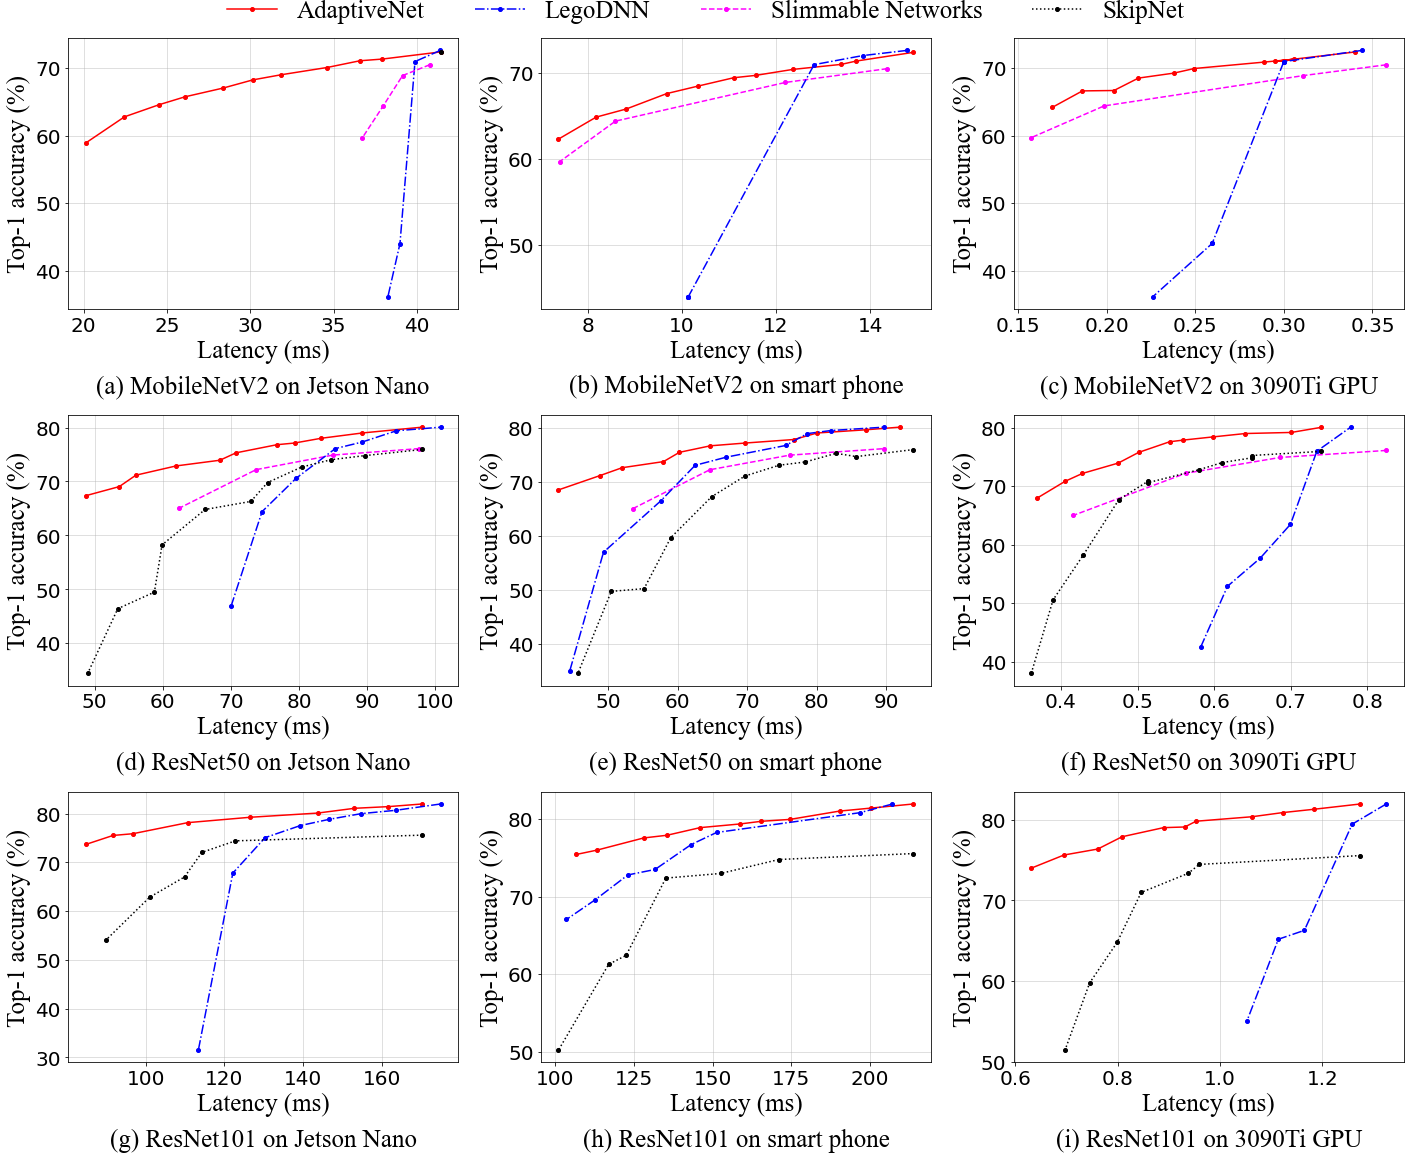

0.17846066492001295


In [88]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(20, 16))
plt.rcParams.update({"font.size":20})
# x=plt.title("validation_acc",fontsize=20)
ratios = []
'''Jetson Nano'''
#mbv2 bs = 1
ouraccs, ourlats = get_ours([(72.40000012207031, 0.0414144604427175), [(71.7000001220703, [0, -2, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0379153385496976, 71.7000001220703), 71.34042553191489, 0.0379153385496976], [(71.10000012207031, [0, -2, -2, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.036571331191481204, 71.10000012207031), 71.08936170212766, 0.036571331191481204], [(70.7, [0, -2, 0, 1, 99, -2, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0], 0.03460247235788139, 70.7), 70.09148936170213, 0.03460247235788139], [(69.26666678873698, [0, -2, 1, 99, 0, 0, 0, -2, -2, 1, 99, 0, 0, 0, 0, 0, 0], 0.03185391963872694, 69.26666678873698), 69.01914893617021, 0.03185391963872694], [(67.86666678873698, [0, 0, 2, 99, 99, 1, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0], 0.030155149617589506, 67.86666678873698), 68.25744680851064, 0.030155149617589506], [(67.40000012207031, [0, -2, -1, 0, 1, 99, 1, 99, 1, 99, 1, 99, 0, 0, -2, 0, 0], 0.02837994582670972, 67.40000012207031), 67.05106383011189, 0.02837994582670972], [(65.53333335367839, [0, -2, 2, 99, 99, 2, 99, 99, -2, 1, 99, -1, 0, -2, 0, 0, 0], 0.026079801090976643, 65.53333335367839), 65.74680851096295, 0.026079801090976643], [(64.26666678873698, [0, -2, 2, 99, 99, -2, 0, 1, 99, 2, 99, 99, -2, 0, 1, 99, 0], 0.0245313118573717, 64.26666678873698), 64.57872340425531, 0.0245313118573717], [(62.76666678873698, [0, -2, 1, 99, 1, 99, 2, 99, 99, -2, 1, 99, 2, 99, 99, -2, 0], 0.0224569548939105, 62.76666678873698), 62.785106382978725, 0.0224569548939105], [(59.033333374023435, [0, -2, 2, 99, 99, 1, 99, 1, 99, 2, 99, 99, 2, 99, 99, 1, 99], 0.020128587134798665, 59.033333374023435), 58.902127660223776, 0.020128587134798665]])  # TODO
#slim_acc, slim_lats = [71.5, 71.5, 71.3, 71.2, 70.9, 71, 70.6, 70.2, 70, 69.9, 69.7, 69.4, 68.9, 68.6, 68.4, 68.4, 67.6, 67.6, 65.7, 65.5, 65.2, 65.1, 64.2, 64.3, 63.3, 63.4, 62.4], 
# [0.03439845536884509, 0.03630047573481586, 0.03543383137026526, 0.03678289272432638, 0.03497498794307088, 0.0354123025908506, 0.03579670863043993, 0.03557809910977394, 0.03897522326400107, 0.03900843096854992, 0.03908709057590419, 0.038389682172235096, 0.03902970041547502, 0.038485942329081674, 0.038651091114321454, 0.03860936368019659, 0.04070346397266054, 0.04134154020993034, 0.0418558927406942, 0.04108760709451852, 0.04148189465802415, 0.04085927439811534, 0.04163335379502528, 0.04074104328203321, 0.04052731327544479, 0.04308344786029711, 0.04269244975613472]
# slim_acc.reverse()
# slim_lats, slim_acc = get_extreme_points(slim_lats, slim_acc)
# slim_acc, slim_lats = slim_acc[:-1], slim_lats[:-1]
slim_lats, slim_accs = [0.0407654, 0.0391327, 0.03797, 0.036725], [70.5, 68.9, 64.4, 59.7]
lego_acc, lego_lats = [72.62978723534117, 70.97021276141227, 44.0021276615224, 36.1595744739289] , [0.04139548799265986, 0.03987615881954946, 0.03897489991076415, 0.03825378736923371]
ratios.append(get_ratio(lego_lats, lego_acc, ourlats, ouraccs))
#ax[0, 0].plot(prunedlats, prunedaccs,marker='o', linestyle=':', markersize=4, c='r')
for i in range(len(slim_lats)):
    slim_lats[i] *= 1000.
for i in range(len(lego_lats)):
    lego_lats[i] *= 1000.
for i in range(len(ourlats)):
    ourlats[i] *= 1000.
c1=ax[0, 0].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c2=ax[0, 0].plot(lego_lats, lego_acc, linestyle='-.', marker='o', markersize=4, c='b')
c3=ax[0, 0].plot(slim_lats, slim_accs, linestyle='--', marker='o', markersize=4, c='magenta')
c4=ax[0, 0].plot([ourlats[0]], [ouraccs[0]], linestyle=':', marker='o', markersize=4, c='black')
ax[0, 0].grid(True, alpha=0.5)

#resnet50 bs=1
ouraccs, ourlats = [80.07659574208361, 78.99787, 78.01702127529713, 77.13404255513942, 76.82127660158847, 75.31489361442404, 73.9404255390573, 
                    72.88297872080702, 71.16595744226333, 69.04893616761552, 67.35531915607858] , [0.09802801951915525, 0.0892646272844295, 0.08323883053451078, 0.07932889660863972, 0.0767433699158123, 0.07074933626181305, 0.0683757708622859, 0.0619522975041316, 0.056059509615435654, 0.0536243987322651, 0.04869463451729969]
legoaccs, legolats = [80.07659574208361, 79.40638298067134, 77.2978723378283, 76.10638297417823, 70.59787233912691, 64.3978723384776, 46.81489362091714] , [0.10075669443801288, 0.0942637783117378, 0.08919333367234328, 0.08531000259074759, 0.07956142598606916, 0.07456082784487995, 0.0700065591308441]
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [0.09761952872228141, 0.08497167837740195, 0.07370117216399222, 0.0623439827350655]
skiplats, skipaccs = [0.09802801951915525, 0.08963994756590164, 0.0846621296477557, 0.08035603813503099, 0.07536617728778751, 0.07292690404681458, 0.06620729328397923, 0.05989849846498623, 0.0587743309429258, 0.05340741629584577, 0.04899738544604451] , [75.93333333333334, 74.8, 74.03333333333333, 72.66666666666667, 69.8, 66.3, 64.8, 58.233333333333334, 49.46666666666667, 46.4, 34.4]
for i in range(len(skiplats)):
    skiplats[i] *= 1000.
for i in range(len(slimv1_lats)):
    slimv1_lats[i] *= 1000.
for i in range(len(legolats)):
    legolats[i] *= 1000.
for i in range(len(ourlats)):
    ourlats[i] *= 1000.

c1=ax[1, 0].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[1, 0].plot(slimv1_lats, slimv1_acc, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[1, 0].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
c4=ax[1, 0].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
ax[1, 0].grid(True, alpha=0.5)


#resnet101 bs=1
ouraccs, ourlats = [81.95531914114444, 81.41276596004406, 81.06808510898021, 80.08936170342628, 79.22553191554293, 78.12765957446808, 75.85531915153341, 75.50000000129862, 73.65106383108585] , [0.17033889558580192, 0.16174145419188224, 0.15310402109165386, 0.1437453886475226, 0.1265200942453712, 0.11071617916376902, 0.0967451273792922, 0.09170269002818096, 0.08476627234256628]

#[81.95531914114444, 81.2340425596846, 80.54468084586935, 80.2957446834483, 79.30425532564203, 78.08510639206906, 77.2553191508841, 76.2127659574468, 75.5127659632906, 73.76595744421127] , [0.17033889558580192, 0.16180343820591167, 0.1480754047933251, 0.14419917145160713, 0.12261310249868065, 0.11362079177239931, 0.10718449679288, 0.10129272576534387, 0.09143223907008316, 0.08433648552557435]
legoaccs, legolats = [81.95531914114444, 80.6574468065627, 79.97659574078499, 78.81276596134266, 77.52340425921501, 75.05106383368309, 67.7851063881732, 31.50638298099599] , [0.1750111892969921, 0.16358724266591698, 0.1548388245129826, 0.14669994874434034, 0.13931810735452055, 0.13037390419931122, 0.12217626908812859, 0.11341304008406822]

# legoaccs, legolats = [81.95531914114444, 81.20851063699925, 80.37659574727809, 78.81063831085855, 78.69574468734416, 76.63829786844457, 74.70425532304479, 72.44893617410862, 64.87659574403155, 65.05744681175719, 42.77659574597947] , [0.3132486463797213, 0.2962714277132593, 0.2795389902712119, 0.26450685298804083, 0.24950894683298439, 0.23480900610336153, 0.21769886546664768, 0.19981025686167708, 0.1876307400790128, 0.17213430067505497, 0.15574587956823482]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
skipaccs, skiplats = [75.56666666666666, 74.4, 72.033333333, 67.0, 62.83333, 54.13333] , [0.17033889558580192, 0.12284042859318278, 0.11432069479817092, 0.10989605055914983, 0.10101233347497804, 0.09000359400354252]
for i in range(len(skiplats)):
    skiplats[i] *= 1000.
for i in range(len(legolats)):
    legolats[i] *= 1000.
for i in range(len(ourlats)):
    ourlats[i] *= 1000.
c1=ax[2, 0].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c2=ax[2, 0].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
c4=ax[2, 0].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
ax[2, 0].grid(True, alpha=0.5)

'''xiaomi'''
#mbv2 bs = 1
# ouraccs, ourlats = get_ours([(72.3999999593099, 14.92), [(71.80000012207032, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0], 14.1, 71.80000012207032), 71.8000000006493, 14.1], [(71.23333329264322, [0, -2, 0, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13.3, 71.23333329264322), 70.92340426246156, 13.3], [(70.7666665242513, [0, -2, 0, 0, -2, 0, 0, 0, 0, 0, 0, -2, -2, 0, 0, 0, 0], 12.57, 70.7666665242513), 70.10212766411964, 12.57], [(69.86666662597656, [0, -2, 1, 99, 0, -1, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0], 11.9, 69.86666662597656), 69.65106383108585, 11.9], [(68.16666664632162, [0, -2, -1, 0, 1, 99, 0, 0, 1, 99, 0, 1, 99, 0, 0, 0, 0], 10.64, 68.16666664632162), 68.57872340685256, 10.64], [(67.86666689046224, [0, -2, 1, 99, 0, 1, 99, -2, 0, -1, 1, 99, 0, 0, 0, 0, 0], 10.360000000000001, 67.86666689046224), 67.70638297677547, 10.360000000000001], ]
#                             +[[(67.73333325195313, [0, -2, 1, 99, 2, 99, 99, 1, 99, 1, 99, -2, 0, 0, 0, 0, 0], 9.530000000000001, 67.73333325195313), 67.58297872340425, 9.530000000000001], [(65.76666678873698, [0, -2, 1, 99, 2, 99, 99, 1, 99, 0, 2, 99, 99, 0, 0, 0, 0], 8.83, 65.76666678873698), 65.86808511222677, 8.83], [(64.43333327229817, [0, -1, 1, 99, 1, 99, 1, 99, -1, 2, 99, 99, -2, 1, 99, 0, 0], 7.879999999999999, 64.43333327229817), 63.57872340685256, 7.879999999999999], [(62.43333337402344, [0, -1, 1, 99, 1, 99, 1, 99, 1, 99, 2, 99, 99, 1, 99, -2, 0], 7.4399999999999995, 62.43333337402344), 62.14042553451213, 7.4399999999999995]])  # TODO
ouraccs, ourlats = get_ours([(72.3999999593099, 14.92), [(71.80000016276041, [0, -2, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13.7, 71.80000016276041), 71.38297872275494, 13.7], [(71.83333319091797, [0, -2, 0, -2, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 13.39, 71.83333319091797), 71.00212766476895, 13.39], [(71.1666665242513, [0, -2, -1, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 12.360000000000001, 71.1666665242513), 70.41702127594644, 12.360000000000001], [(70.23333339436849, [0, -2, 1, 99, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0], 11.569999999999999, 70.23333339436849), 69.72127659249813, 11.569999999999999], [(69.49999995930989, [0, -2, 1, 99, 0, 0, 0, 0, 1, 99, 0, -2, 0, 0, 0, 0, 0], 11.1, 69.49999995930989), 69.44468085820624, 11.1], [(68.76666689046223, [0, -2, 1, 99, 1, 99, 0, 0, -1, 0, 1, 99, 0, 0, 0, 0, 0], 10.34, 68.76666689046223), 68.4702127627109, 10.34], [(67.76666668701172, [0, -2, 1, 99, 1, 99, 0, 1, 99, 2, 99, 99, 0, 0, 0, 0, 0], 9.68, 67.76666668701172), 67.60425531785032, 9.68], [(66.3000000813802, [0, -1, 1, 99, 2, 99, 99, 1, 99, -2, -2, -1, 0, 0, 0, 0, 0], 8.819999999999999, 66.3000000813802), 65.81276596004405, 8.819999999999999], [(64.93333341471354, [0, -1, 1, 99, 1, 99, 1, 99, 1, 99, 1, 99, 1, 99, 0, 0, 0], 8.18, 64.93333341471354), 64.86595744875645, 8.18], [(62.63333341471354, [0, -1, 2, 99, 99, 1, 99, 1, 99, 2, 99, 99, 1, 99, -2, -2, 0], 7.38, 62.63333341471354), 62.31063829787234, 7.38]]
)
# prunedaccs, prunedlats = get_ours()  # TODO
lego_acc, lego_lats = [72.62978723534117, 72.02127659964054, 70.97021276141227, 44.0021276615224, 44.0021276615224, 44.0021276615224, 44.0021276615224] ,[14.790000000000001, 13.840000000000002, 12.81, 10.139999999999999, 10.139999999999999, 10.139999999999999, 10.139999999999999]
ratios.append(get_ratio(lego_lats, lego_acc, ourlats, ouraccs))
# slim_lats, slim_acc = [8.92, 6.37, 6.36, 6.77, 6.7, 7.32, 6.52, 7.15, 6.73, 10.28, 10.43, 10.9, 11.1, 11.17, 11.51, 11.71, 12.41, 12.83, 13.67, 14.45, 14.67, 15.61, 15.34, 16.3, 19.75, 16.82, 17.29], [71.5, 71.5, 71.3, 71.2, 70.9, 71, 70.6, 70.2, 70, 69.9, 69.7, 69.4, 68.9, 68.6, 68.4, 68.4, 67.6, 67.6, 65.7, 65.5, 65.2, 65.1, 64.2, 64.3, 63.3, 63.4, 62.4]
# slim_acc, slim_lats = filter_slim(slim_acc, slim_lats)
# slim_lats.reverse()
# slim_lats, slim_acc = get_extreme_points(slim_lats, slim_acc)
slim_lats, slim_accs = [7.41, 8.59, 12.2, 14.36], [70.5, 68.9, 64.4, 59.7]
slim_lats.reverse()
# for i in range(len(slim_lats)):
#     slim_lats[i] /= 1000.
# for i in range(len(lego_lats)):
#     lego_lats[i] /= 1000.
# for i in range(len(ourlats)):
#     ourlats[i] /= 1000.
c1=ax[0, 1].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[0, 1].plot(slim_lats, slim_accs, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[0, 1].plot(lego_lats, lego_acc, linestyle='-.', marker='o', markersize=4, c='b')
ax[0, 1].grid(True, alpha=0.5)


#resnet50 bs=1
ouraccs, ourlats = [80.07659574208361, 79.58936170147835, 78.99787233588036, 77.79361702647108, 77.13829787428836, 76.62765957187085, 75.42553192203603, 73.70425532369411, 72.57659574208361, 71.12127660093917, 68.47021277050261] , [91.91999999999999, 87.03999999999999, 80.05, 76.73, 69.69, 64.7, 60.25, 57.95, 52.0, 48.82, 42.84]

legoaccs, legolats = [80.07659574208361, 79.45531914633892, 78.87872340815117, 76.68723403995595, 74.53404254864631, 73.02127659379676, 66.40425531914893, 56.94468084781728, 35.04680851323554] , [89.68, 82.03, 78.62, 75.53000000000002, 67.01, 62.51, 57.529999999999994, 49.31999999999999, 44.48]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [53.54, 64.62, 76.11, 89.65]
slimv1_acc.reverse()
skiplats, skipaccs = [93.91999999999999, 85.69999999999999, 82.78, 78.34, 74.58, 69.67, 64.87, 59.0, 55.160000000000004, 50.44, 45.64] , [75.93333333333334, 74.63333333333334, 75.23333333333333, 73.63333333333334, 73.03333333333333, 71.03333333333333, 67.2, 59.63333333333333, 50.2, 49.7, 34.53333333333333]
# for i in range(len(slimv1_lats)):
#     slimv1_lats[i] /= 1000.
# for i in range(len(legolats)):
#     legolats[i] /= 1000.
# for i in range(len(ourlats)):
#     ourlats[i] /= 1000.
c1=ax[1, 1].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[1, 1].plot(slimv1_lats, slimv1_acc, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[1, 1].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
c4=ax[1, 1].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
ax[1, 1].grid(True, alpha=0.5)


#resnet101 bs=1
ouraccs, ourlats =  [81.96666670735677, 81.4361702153632, 81.04893617021277, 79.97446808575569, 79.73191489491565, 79.38936170342627, 78.91276595809612, 77.92978723469186, 77.58085106447909, 76.0085106395965, 75.44680851128761],[213.93, 200.42999999999998, 190.42, 174.62, 165.56, 158.8, 146.02999999999997, 135.51000000000002, 128.06, 113.18000000000002, 106.57000000000001]
legoaccs, legolats = [81.95531914114444, 80.83617021925906,78.28723403995595, 76.72553191684155, 73.51063829787235, 72.80851064414166, 69.61914893941676, 67.06595744810713] , [207.17999999999998, 196.82, 151.26, 143.17, 131.68, 123.03999999999999, 112.69999999999999, 103.5]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
skipaccs, skiplats =[75.56666666666666, 74.8, 73.0, 72.4, 62.433, 61.2667, 50.2] , [213.93, 171.12, 152.59, 135.12, 122.49000000000001, 116.91999999999999, 100.95]
# for i in range(len(skiplats)):
#     skiplats[i] /= 1000.
# for i in range(len(legolats)):
#     legolats[i] /= 1000.
# for i in range(len(ourlats)):
#     ourlats[i] /= 1000.
ax[2, 1].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
ax[2, 1].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
ax[2, 1].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
ax[2, 1].grid(True, alpha=0.5)


'''3090'''
#mbv2 bs = 32
# ouraccs, ourlats = get_ours([(72.40000012207031, 0.01088502111661718), [(71.86666666666666, [0, 0, -2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0], 0.010066835393893706, 71.86666666666666), 71.51063829917096, 0.010066835393893706], 
#                              [(71.0333334350586, [0, 0, 0, -1, 0, -1, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0], 0.00970991024833746, 71.0333334350586), 70.30425531914894, 0.00970991024833746], 
# #                              [(70.40000010172525, [0, 1, 99, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.009002531276029698, 70.40000010172525), 69.47021276660676, 0.009002531276029698], 
#                              [(70.46666666666667, [0, -2, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.00846786522895135, 70.46666666666667), 70.2808510644791, 0.00846786522895135], 
#                              [(69.50000012207032, [0, -2, 1, 99, 0, -2, 0, 0, 0, -2, 0, 0, 0, 0, -2, 0, 0], 0.008022115884048022, 69.50000012207032), 68.974468086405, 0.008022115884048022], 
#                              [(68.80000012207032, [0, -2, 2, 99, 99, -2, 0, 1, 99, 0, 0, -2, 0, 0, 0, 0, 0], 0.007257031857295983, 68.80000012207032), 68.79787234075019, 0.007257031857295983], 
#                              [(67.63333333333334, [0, -2, 2, 99, 99, 0, -2, 1, 99, 0, 1, 99, 0, 0, 0, 0, 0], 0.007026862740069067, 67.63333333333334), 67.31063829787234, 0.007026862740069067], 
#                              [(66.46666668701172, [0, -1, 2, 99, 99, -1, 0, 1, 99, 1, 99, -2, 0, 0, 0, 0, 0], 0.006176193008136391, 66.46666668701172), 66.68297872405357, 0.006176193008136391], 
#                              [(64.2000001220703, [0, -2, 2, 99, 99, -2, 1, 99, -2, 1, 99, 2, 99, 99, -2, -2, 0], 0.005760986008244252, 64.2000001220703), 63.9702127662821, 0.005760986008244252], 
#                              [(63.366666687011715, [0, -1, 2, 99, 99, 1, 99, 1, 99, -1, 2, 99, 99, 0, 0, -2, 0], 0.005201143376967485, 63.366666687011715), 63.10638297904806, 0.005201143376967485]])  # TODO
ouraccs, ourlats = get_ours([(72.3999999593099, 0.01088502111661718), [(71.83333319091797, [0, -2, 0, -2, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.009440293150938795, 71.83333319091797), 71.00212766476895, 0.009440293150938795], [(71.66666672770182, [0, -2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.00978286663193876, 71.66666672770182), 71.3255319200881, 0.00978286663193876], [(71.43333319091796, [0, -2, 0, -2, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.009242287266985496, 71.43333319091796), 70.89999999935068, 0.009242287266985496], [(70.90000026448568, [0, -2, 1, 99, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.0079789474998159, 70.90000026448568), 69.94680851388485, 0.0079789474998159], [(70.90000026448568, [0, -2, 1, 99, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.0079789474998159, 70.90000026448568), 69.94680851388485, 0.0079789474998159], [(69.60000002034505, [0, -2, -1, -2, 1, 99, 0, 1, 99, -2, 0, 0, 0, 0, 0, 0, 0], 0.007614397137275475, 69.60000002034505), 69.27021276595745, 0.007614397137275475], [(68.30000018310547, [0, -2, 2, 99, 99, -2, -2, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0], 0.006970659215399558, 68.30000018310547), 68.52765957252015, 0.006970659215399558], [(67.33333345540365, [0, -1, -1, 1, 99, -1, 0, 1, 99, -2, 0, 1, 99, 0, 0, 0, 0], 0.006528713228705528, 67.33333345540365), 66.68723404125457, 0.006528713228705528], [(66.00000028483073, [0, -1, 1, 99, -1, 1, 99, -2, -1, 1, 99, 0, -1, 0, 0, 0, 0], 0.005958965036537828, 66.00000028483073), 66.62978723793842, 0.005958965036537828], [(64.36666678873698, [0, -1, 1, 99, 2, 99, 99, -2, 0, 2, 99, 99, 1, 99, 0, 0, 0], 0.005415939419379967, 64.36666678873698), 64.19574468669485, 0.005415939419379967]])
# slim_acc, slim_lats = [71.5, 71.5, 71.3, 71.2, 70.9, 71, 70.6, 70.2, 70, 69.9, 69.7, 69.4, 68.9, 68.6, 68.4, 68.4, 67.6, 67.6, 65.7, 65.5, 65.2, 65.1, 64.2, 64.3, 63.3, 63.4, 62.4],[0.005034876507660218, 0.005983511341056696, 0.005984557512213155, 0.0061911938581179615, 0.006203154656400649, 0.006342328113058339, 0.006349799625052258, 0.0064190063986889895, 0.0065527759666825615, 0.008491075955904447, 0.008504457697023118, 0.008683746873734388, 0.008684770718067386, 0.008744827481017863, 0.008921941387214789, 0.009111280824029724, 0.00995109471987721, 0.009979212961866704, 0.010041189831634828, 0.010311794121528549, 0.010927059179963077, 0.011077105799646282, 0.011079006769186677, 0.01118931004833617, 0.011320889195470906, 0.011445823720466333, 0.01144876049513801]
# slim_acc.reverse()
# slim_lats, slim_acc = get_extreme_points(slim_lats, slim_acc)
slim_lats, slim_accs = [0.005034876507660218, 0.0063497, 0.00995109471987721, 0.01144876049513801], [70.5, 68.9, 64.4, 59.7]
slim_lats.reverse()
# slim_acc, slim_lats = slim_acc[:-1], slim_lats[:-1]
lego_acc, lego_lats = [72.63829787234043, 70.974468086405, 70.974468086405, 44.01276595744681, 44.01276595744681,  36.14255319213867] , [0.011013847417914974, 0.009598421960957209, 0.009598421960957209, 0.008303660475118586, 0.008303660475118586, 0.007235261167542955]
# prunedaccs, prunedlats = get_ours()  # TODO
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
# ax[0, 2].plot(prunedlats, prunedaccs,marker='o', linestyle=':', markersize=4, c='r')
for i in range(len(slim_lats)):
    slim_lats[i] /= 0.032
for i in range(len(lego_lats)):
    lego_lats[i] /= 0.032
for i in range(len(ourlats)):
    ourlats[i] /= 0.032
ax[0, 2].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
ax[0, 2].plot(slim_lats, slim_accs, linestyle='--', marker='o', markersize=4, c='magenta')
ax[0, 2].plot(lego_lats, lego_acc, linestyle='-.', marker='o', markersize=4, c='b')
ax[0, 2].grid(True, alpha=0.5)

# resnet50
ouraccs, ourlats = get_ours([(80.03333357747395, 0.02365760361596252), [(79.09999993896484, [0, 0, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.022429195005395385, 79.09999993896484), 79.17446808250914, 0.022429195005395385], [(79.43333321126302, [0, 1, 99, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.020512275612249838, 79.43333321126302), 78.99148935715695, 0.020512275612249838], [(78.56666670735677, [1, 99, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.019141950655043198, 78.56666670735677), 78.40638297417823, 0.019141950655043198], [(77.93333327229817, [1, 99, 1, 99, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.01791440709511538, 77.93333327229817), 77.87021276725606, 0.01791440709511538], [(77.30000014241537, [2, 99, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0173386853090365, 77.30000014241537), 77.5765957414343, 0.0173386853090365], [(76.26666687011719, [0, 2, 99, 99, 0, 1, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0], 0.01604756932980725, 76.26666687011719), 75.76382978658474, 0.01604756932980725], [(74.90000014241537, [1, 99, 1, 99, 1, 99, 2, 99, 99, 0, 0, 0, 0, 0, 0, 0], 0.015194695046607483, 74.90000014241537), 73.93829787948283, 0.015194695046607483], [(72.40000006103516, [2, 99, 99, 1, 99, 2, 99, 99, 0, 0, 1, 99, 0, 0, 1, 99], 0.013701116039099473, 72.40000006103516), 72.17234042293468, 0.013701116039099473], [(71.30000006103515, [1, 99, 2, 99, 99, 2, 99, 99, 1, 99, 0, 1, 99, 0, 0, 0], 0.012974105579533773, 71.30000006103515), 70.82340426051363, 0.012974105579533773], [(68.16666672770182, [2, 99, 99, 1, 99, 2, 99, 99, 0, 1, 99, 1, 99, 2, 99, 99], 0.011797388742802587, 68.16666672770182), 67.93191489361702, 0.011797388742802587]])  # TODO
legoaccs, legolats = [80.07659574208361, 63.470212767256065, 75.96595744875644, 57.66170213025681, 52.87872340100877, 42.47234042228536] , [0.02490761283043777, 0.02349519341699173, 0.022392669816190217, 0.02112284530238604, 0.01975998025065817, 0.01863962687896996]
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [0.0263957, 0.021965, 0.0180176, 0.01332]
skiplats, skipaccs = [ 0.02365760361596252, 0.020774318518417795, 0.020776338064029006, 0.019546586968871914, 0.018569838568027384, 0.016452322316557653, 0.016451482331200744, 0.015222312810274774, 0.013742147906402472, 0.012472869457679338, 0.011560256848198005] , [75.93333333333334, 75.23333333333333, 74.83333333333333, 74.03333333333333, 72.8, 70.6, 70.86666666666666, 67.7, 58.266666666666666, 50.56666666666667, 38.0]
for i in range(len(slimv1_lats)):
    slimv1_lats[i] /= 0.032
for i in range(len(legolats)):
    legolats[i] /= 0.032
for i in range(len(ourlats)):
    ourlats[i] /= 0.032
for i in range(len(skiplats)):
    skiplats[i] /= 0.032
c1=ax[1, 2].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[1, 2].plot(slimv1_lats, slimv1_acc, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[1, 2].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
skip=ax[1, 2].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
ax[1, 2].grid(True, alpha=0.5)

# resnet 101
ouraccs, ourlats = [81.95531914114444, 81.29574467565658, 80.8914893539104, 80.3702127685547, 79.81914894915641, 79.10425531135722, 79.02340424752742, 77.89574467305934, 76.37234042358398, 75.62978724053565, 74.00425532044756] , [0.04077928116981021, 0.03785974630277059, 0.035943912475070325, 0.033988489227390416, 0.0305093776001053, 0.029801400044981916, 0.028477365591648377, 0.025883904088274557, 0.024363410935384012, 0.02224808879131369, 0.02020963381169287]
#[81.95531914114444, 81.29574467565658, 80.8914893539104, 80.3702127685547, 79.81914894915641, 79.10425531135722, 79.02340424752742, 77.89574467305934, 76.37234042358398, 75.62978724053565, 74.00425532044756] , [0.04077928116981021, 0.03785974630277059, 0.035943912475070325, 0.033988489227390416, 0.0305093776001053, 0.029801400044981916, 0.028477365591648377, 0.025883904088274557, 0.024363410935384012, 0.02224808879131369, 0.02020963381169287]

legoaccs, legolats = [81.95531914114444, 79.45319149845204, 66.30212766606758, 65.19999999610414, 55.038297871041806] , [0.04239349401041921, 0.0402633681315206, 0.03727840541748887, 0.03564915728658549, 0.033679537540383275]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
skipaccs, skiplats = [75.56666666666666, 74.467, 73.367, 71.0, 64.8, 59.8, 51.467] , [0.04077928116981021, 0.030707334248682445, 0.030021445772077927, 0.02708020884641569, 0.025571936510680463, 0.023859539974914478, 0.022318143868476192]
for i in range(len(skiplats)):
    skiplats[i] /= 0.032
for i in range(len(legolats)):
    legolats[i] /= 0.032
for i in range(len(ourlats)):
    ourlats[i] /= 0.032
ax[2, 2].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
ax[2, 2].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
skip,=ax[2, 2].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
ax[2, 2].grid(True, alpha=0.5)
fontsize=25
labloc = -0.33

label_list = ['AdaptiveNet', 'LegoDNN', 'Slimmable Networks', 'SkipNet']

fig.legend([c1, c2, c3, skip],
           labels= ['AdaptiveNet', 'LegoDNN', 'Slimmable Networks', 'SkipNet'],
           loc='upper center',
           borderaxespad=-0.4,ncol=4, frameon=False, prop={'family':'Times New Roman','size':fontsize})
# plt.legend()
for i in range(3):
    for j in range(3):
        ax[i, j].set_xlabel('Latency (ms)',fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
        ax[i, j].set_ylabel('Top-1 accuracy (%)',fontdict={'family' : 'Times New Roman', 'size'   : fontsize})

ax[0, 0].set_title("(a) MobileNetV2 on Jetson Nano", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[0, 1].set_title("(b) MobileNetV2 on smart phone", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[1, 0].set_title("(d) ResNet50 on Jetson Nano", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[1, 1].set_title("(e) ResNet50 on smart phone", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[2, 0].set_title("(g) ResNet101 on Jetson Nano", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[2, 1].set_title("(h) ResNet101 on smart phone", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[0, 2].set_title("(c) MobileNetV2 on 3090Ti GPU", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[1, 2].set_title("(f) ResNet50 on 3090Ti GPU", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})
ax[2, 2].set_title("(i) ResNet101 on 3090Ti GPU", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : fontsize})

fig.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

plt.savefig("D:/scientific_work/project1/paper/figs/tradeoff.pdf")  # savefig一定要在show之前
plt.show()
print(np.mean(ratios))

## detection and segmentation

In [25]:
legoaccs, legolats = [0.6573107689619064, 0.6432852819561957, 0.6221922636032104, 0.6516975164413452, 0.6496257632970811, 0.6580431163311005, 0.6262039244174957, 0.6567570492625237, 0.6446095034480095, 0.633334644138813, 0.6465997323393822, 0.6488107591867447, 0.6477601304650307, 0.6549069285392762, 0.6549940407276154, 0.6570258438587189, 0.6563401073217392, 0.6514393165707587, 0.6509826183319092, 0.6546215787529945, 0.6549981534481047, 0.6519388258457184, 0.6545438319444655, 0.6541966795921325, 0.6553781405091286, 0.656737208366394, 0.634521596133709, 0.6571934074163437, 0.6556179746985435, 0.6357491463422775, 0.6546795964241028, 0.6580425500869751, 0.6569215059280396, 0.6566275656223297, 0.6478921994566916, 0.656556561589241, 0.6473791152238846, 0.6568782553076744, 0.6496784165501593, 0.6474338471889496, 0.6570934057235718, 0.6568706408143044, 0.6444829031825066, 0.6427879184484482, 0.6407684236764909, 0.6595363840460777, 0.6361667811870576, 0.6445500925183296, 0.646239884197712, 0.6561698839068413, 0.658312126994133, 0.6497219204902648, 0.6549324393272399, 0.647108756005764, 0.6514593586325644, 0.6451267600059509, 0.6487877815961838, 0.6514810398221016, 0.6556571125984192, 0.6307868510484697, 0.6518611088395119, 0.6365108639001846, 0.6560009717941284, 0.6563265100121498, 0.6544913649559021, 0.6511488407850266, 0.6546140983700753, 0.6383379548788071, 0.6290506049990654, 0.6570589542388916, 0.6574601233005524, 0.6381426602602005, 0.6436064168810844, 0.6556336879730225, 0.657361388206482, 0.6584156975150108, 0.6418639793992041, 0.6508656665682793, 0.6553968042135239, 0.6506010144948959, 0.6268996074795723, 0.6551959216594696, 0.6562362983822823, 0.6560058444738388, 0.6561392396688461, 0.6581859141588212, 0.6528602465987206, 0.6287975460290909, 0.6569423452019691, 0.6372161358594894, 0.652653269469738, 0.655318133533001, 0.6583560109138489, 0.6563844531774521, 0.6527063995599747, 0.6499603986740112, 0.6588431224226952, 0.6542751640081407, 0.65428027510643, 0.654774583876133, 0.6535008475184441, 0.6542666330933571, 0.6546064764261245, 0.6555449813604354, 0.644490711390972, 0.6545752957463264, 0.6552401557564735, 0.6511890217661858, 0.6435049250721931, 0.6489173620939256, 0.6536299958825111, 0.6452384144067763, 0.6567873433232307, 0.6556340828537941, 0.6519755125045776, 0.6547831445932388, 0.6559500619769095, 0.65324766933918, 0.6544999554753304, 0.640965111553669, 0.645960360765457, 0.6579637452960013, 0.6442521885037422, 0.6503479033708572, 0.6578255146741867, 0.6280059292912483, 0.6558360457420349, 0.6553315743803978, 0.6272609010338783, 0.6446370631456375, 0.6484601721167564, 0.6554769575595856, 0.6563438624143599, 0.6468321606516838, 0.6567551717162132, 0.6407470554113388, 0.6530202552676201, 0.6460878476500511, 0.6509718894958496, 0.6568563655018806, 0.6543287336826323, 0.6557866409420967, 0.6556523516774178, 0.6573368012905121, 0.6579111963510514, 0.6572775840759276, 0.6568087562918663, 0.6537341624498367, 0.6583293899893761, 0.6570211127400398, 0.6574910879135132, 0.6574680954217911, 0.6568465083837508, 0.6570535376667976, 0.639409027993679, 0.6513674706220627, 0.6412459760904312, 0.6533425971865654, 0.6537074968218803, 0.6574118286371231, 0.6582800447940826, 0.6565145328640938, 0.6533165350556374, 0.6566969901323318, 0.6575788408517838, 0.6573035940527917, 0.6468232572078705, 0.6535138562321663, 0.6267105787992476, 0.6531933918595314, 0.650272086262703, 0.6536310538649559, 0.6533950418233871, 0.651916116476059, 0.6520006731152533, 0.65324717015028, 0.6448200196027756, 0.6416197046637535, 0.6490168422460556, 0.6571631208062173, 0.6530971899628639, 0.6501344367861748, 0.658121831715107, 0.6567786112427711, 0.6510189548134804, 0.6534934341907501, 0.657841369509697, 0.6555525436997415, 0.6557276323437691, 0.6202716678380966, 0.6373334005475044, 0.6458688527345657, 0.6503338888287544, 0.6546180099248886, 0.6491861492395401, 0.6488316208124161, 0.6531022712588309, 0.6430628076195717, 0.6512595415115356, 0.6578113138675691, 0.6411700099706649, 0.6475474983453752, 0.6570506393909454, 0.6567236408591269, 0.650912769138813, 0.6520033031702042, 0.6426744610071182, 0.6605573147535325, 0.6211900785565376, 0.6523593589663506, 0.6546923816204071, 0.6466996595263481, 0.648045040667057, 0.6497344002127647, 0.6548516601324081, 0.6563384309411048, 0.657604768872261, 0.6549371406435966, 0.6546754315495491, 0.6552397981286049, 0.6459989547729492, 0.6538278087973595, 0.6578093469142915, 0.6556420624256134, 0.6409445852041245, 0.6540937945246696, 0.6573416739702225, 0.6536453887820244, 0.6481880992650986, 0.6509280130267143, 0.6566132083535194, 0.6569144427776337, 0.6456299945712091, 0.6563182026147842, 0.6529741287231445, 0.6485466733574867, 0.6562902033329011, 0.656742550432682, 0.6471221894025803, 0.6542530208826065, 0.6584934592247009, 0.6559735611081123, 0.6565371155738831, 0.6489665210247041, 0.6562296077609062, 0.6572275087237358, 0.6576063707470894, 0.6554973646998405, 0.6505147814750671, 0.650523953139782, 0.654253326356411, 0.653822973370552, 0.6567617505788802, 0.6570363491773606, 0.6459431946277618, 0.6556477323174477, 0.6559281945228577, 0.6564576774835587, 0.6527799218893051, 0.6391563192009926, 0.655624270439148, 0.6551395654678345, 0.6568223685026169, 0.6562927216291427, 0.6458077952265739, 0.6455773115158081, 0.6570189371705055, 0.6571444571018219, 0.6460078656673431, 0.6466164812445641, 0.6524826809763908, 0.6455514729022981, 0.6477544978260994, 0.6490152180194855, 0.6568674519658089, 0.6574884504079819, 0.6504056230187416, 0.6539517641067504, 0.6558638662099838, 0.6451940685510635, 0.6552274301648139, 0.6511739641427993, 0.6525247395038605, 0.653188906610012, 0.6571603864431381, 0.6167623475193977, 0.6564204841852188, 0.6591245755553244, 0.6552593857049942, 0.6452492624521255, 0.6505870297551155, 0.6406023874878883, 0.655255064368248, 0.6529424265027046, 0.6567791402339935, 0.6480086520314218, 0.6552214249968529, 0.6497332528233528, 0.6570418551564217, 0.6553488671779634, 0.6579099223017693, 0.6453183367848396, 0.651499055325985, 0.64448831230402, 0.6508128717541695, 0.6332453414797783, 0.632326476275921, 0.6507662683725357, 0.6434546038508415, 0.6466239392757415, 0.6579642221331596, 0.6363411098718643, 0.6506690829992294, 0.6512439101934433, 0.6433092728257179, 0.6573598831892012, 0.6565043181180954, 0.6576316505670547, 0.6571780145168304, 0.6392249614000322, 0.6511561349034309, 0.6546299532055855, 0.6539940014481544, 0.6389945894479752, 0.634868361055851, 0.6553153023123741, 0.6519060283899307, 0.6181596592068671, 0.6574715226888657, 0.6543113514780997, 0.6361095160245895, 0.6571394205093384, 0.6544577553868294, 0.6577121391892433, 0.654774397611618, 0.6313692629337312, 0.6566392332315445, 0.6574909016489981, 0.6567253470420837, 0.6440337747335434, 0.6272749155759811, 0.6134949475526811, 0.6561271473765373, 0.6574343368411064, 0.6494962722063066, 0.6528028920292853, 0.6306702867150307, 0.6511518806219101, 0.6553144529461861, 0.650431290268898, 0.6570174023509026, 0.6510823667049408, 0.6552350148558617, 0.6548967361450194, 0.6446802094578743, 0.6565757021307945, 0.6565561816096306, 0.6484987437725067, 0.63874252140522, 0.6491329371929169, 0.6526364386081696, 0.6521174907684327, 0.6300883367657661, 0.6559569090604782, 0.6194992512464523, 0.6324835643172264, 0.6512537747621536, 0.6563922241330147, 0.6571886315941811, 0.6578784883022308, 0.6447280049324036, 0.6296382024884224, 0.6450058445334435, 0.6256157010793686, 0.6573053076863289, 0.6339250728487968, 0.636887677013874, 0.6511706411838531, 0.6507906541228293, 0.6471367776393889, 0.6536600291728973, 0.6231594085693359, 0.6533136889338493, 0.6444345638155937, 0.6546678841114044, 0.6529703289270402, 0.6557502821087837, 0.6414542943239212, 0.6438027694821358, 0.654344379901886, 0.6405411511659622, 0.658881887793541, 0.6463470831513405, 0.6575450971722603, 0.6474314108490944, 0.6553665772080421, 0.6543953195214272, 0.6517234370112419, 0.6550648361444473, 0.6210128292441368, 0.6369835883378983, 0.6478865519165993, 0.6509787440299988, 0.6571454033255577, 0.643397256731987, 0.6480835750699043, 0.6565045341849327, 0.6541635245084764, 0.6413091793656349, 0.6568537726998329, 0.6304671242833139, 0.6527313441038131, 0.6230781301856041, 0.6450217068195344, 0.6414014697074891, 0.6558290272951126, 0.6530296057462692, 0.648776687681675, 0.6407633870840073, 0.6554971411824226, 0.6564012542366982, 0.630818136036396, 0.6524635553359985, 0.6331700831651689, 0.6579829081892967, 0.6553447246551515, 0.658039316534996, 0.6565800160169601, 0.63293619453907, 0.6345631629228592, 0.6537912935018539, 0.6546936333179474, 0.6576786264777184, 0.6585820466279984, 0.6367166861891745, 0.6211747750639915, 0.6541293859481812, 0.6504764035344124, 0.6454728916287423, 0.6482300385832788, 0.6515898406505585, 0.6371858045458794, 0.6516524404287338, 0.6339625716209413, 0.6441994085907936, 0.6559410914778709, 0.6536740511655807, 0.6574018895626068, 0.6358012482523918, 0.6475240960717201, 0.6570714935660361, 0.6586888432502748, 0.6475597098469734, 0.6570502668619156, 0.6562541350722313, 0.6576946452260017, 0.6582395881414413, 0.6563603952527046, 0.6574777811765671, 0.653516247868538, 0.6591648906469345, 0.6566556021571159, 0.6553849279880524, 0.653574176132679, 0.6422386541962624, 0.6574235856533049, 0.6545759811997413, 0.6546708196401596, 0.6565029844641685, 0.6496564745903015, 0.6577625721693039, 0.6543850675225258, 0.6521548777818679, 0.6521680131554604, 0.6573081314563752, 0.6534493193030357, 0.6559712663292885, 0.6337852254509925, 0.6530793532729149, 0.6573154032230377, 0.6546178385615349, 0.6571890115737915, 0.6445864513516426, 0.6491653770208359, 0.656820073723793, 0.6523291394114494, 0.6345168873667717, 0.6524218767881393, 0.6548033058643341, 0.6562542170286179, 0.6550505980849266, 0.6525175347924232, 0.648909717798233, 0.6519706696271896, 0.6512519642710686, 0.6577568277716637, 0.6550814211368561, 0.6552278101444244, 0.6489370539784433, 0.6544720456004143, 0.6524777412414551, 0.6542805433273315, 0.63377695530653, 0.6443937197327614, 0.6549365073442459, 0.6561205759644508, 0.6564163714647293, 0.6519306004047394, 0.6585590913891792, 0.6349978074431419, 0.6467915698885918, 0.6539161875844002, 0.6558569595217705, 0.6525185033679008, 0.6461139544844627, 0.6567043885588646, 0.6595309376716615, 0.6516551077365875, 0.6460397243499756, 0.649622768163681, 0.6518502682447433, 0.6526263803243637, 0.652365580201149, 0.655229777097702, 0.6568178460001945, 0.657185472548008, 0.6545205935835838, 0.6534712910652161, 0.6578138545155525, 0.6561738625168801, 0.6559014171361923, 0.6553625240921973, 0.6593201979994774, 0.6573107689619064, 0.6563685461878777, 0.6530022397637367, 0.646870031952858, 0.6530886888504028, 0.6425108164548874, 0.6474839150905609, 0.6508177071809769, 0.6587013229727745, 0.641182042658329, 0.6537421941757202, 0.6552968695759773, 0.6510160267353058, 0.6568045243620872, 0.6459365114569663, 0.6463171765208244, 0.6558365225791931, 0.657047763466835, 0.657180555164814, 0.6496755257248878, 0.6566965207457542, 0.6460663825273514, 0.6550556197762489, 0.6533655971288681, 0.648622639477253, 0.6486969739198685, 0.6580828800797462, 0.6500489711761475, 0.6528513431549072, 0.640789769589901, 0.6571830213069916, 0.6522256731987, 0.6572711914777756, 0.6542785540223122, 0.6563167944550514, 0.6566462963819504, 0.6562095433473587, 0.6516891866922379, 0.6550280600786209, 0.6502374410629272, 0.6494852900505066, 0.656066745519638, 0.6280089765787126, 0.6509957611560822, 0.6462315246462821, 0.6520272493362427, 0.6554118096828461, 0.6553500965237617, 0.656636007130146, 0.6534916460514069, 0.6562357842922211, 0.6566341444849968, 0.6547925248742105, 0.6536624431610107, 0.6561489999294281, 0.6532311514019966, 0.654364287853241, 0.6297758966684341, 0.6422820761799812, 0.6557619646191597, 0.6531138345599173, 0.656851127743721, 0.6540847644209862, 0.6573709174990654, 0.6523563861846924, 0.652756929397583, 0.6563018709421158] , [0.11904929391699995, 0.10016433909447398, 0.08552329078004882, 0.10771759335446437, 0.09354018114950709, 0.11045794367907359, 0.09493302487578816, 0.115469576512447, 0.10978149496686194, 0.09016918175477871, 0.09674734072897866, 0.09529068079368509, 0.10386792643912461, 0.11015025838562055, 0.10800222992715774, 0.11419139630771416, 0.11577665934393358, 0.10078969700283509, 0.10241739765094594, 0.10659109331905783, 0.11557528904260939, 0.10769350323089986, 0.10442379025521524, 0.10489806060914121, 0.10754425439396716, 0.11443672842881726, 0.09502308085472788, 0.11409387296339017, 0.11062277327458926, 0.09165910540860216, 0.10413796725915447, 0.11389089729040693, 0.11452444408621018, 0.11491836320143184, 0.09711301962601993, 0.11475808713222044, 0.10704467944386474, 0.11223180267447541, 0.10688465104351522, 0.10049697627977246, 0.11176943922488221, 0.11552719473359153, 0.09539219578423268, 0.09455322497446803, 0.09212128683650167, 0.11525687670347408, 0.09047151262647532, 0.10873890544026175, 0.09816382638770309, 0.103910506982805, 0.11303657309997829, 0.10188049214024286, 0.1113014993467455, 0.09617194121081646, 0.10537254879230716, 0.10403131955524131, 0.10177186248864209, 0.10196493737507391, 0.10945238959921336, 0.09451977445990499, 0.09878187329029875, 0.09518047978759425, 0.10947161138846238, 0.11016015648660599, 0.10739324800330365, 0.10728144043196892, 0.10772229369170841, 0.09517229776326513, 0.08775961647013567, 0.114816024040527, 0.11253710706449586, 0.09206099080768651, 0.09174169193338412, 0.11237049604355188, 0.11094932466899814, 0.11488407717745522, 0.09333002725707593, 0.1017839973676863, 0.11535970612936698, 0.10008241053335527, 0.08727747114159005, 0.10701878999109878, 0.11676673143435944, 0.10900555051131766, 0.11172778162070764, 0.1176216545059999, 0.10758866709043315, 0.09555929468299497, 0.10329593400899269, 0.09076509422263025, 0.0983431273046589, 0.10567643639707913, 0.11590529765561335, 0.10508021300036725, 0.10490652163393525, 0.09827213973931155, 0.11386078493434754, 0.10197314148072324, 0.11059296110512636, 0.11200896574914547, 0.10729530362191445, 0.09825742373297172, 0.10868296748822728, 0.11176635559835348, 0.09938524775240258, 0.10877680504245234, 0.10476727294949495, 0.09630074871315245, 0.09701505405849915, 0.10704233912231795, 0.10440088088548992, 0.09611850948862664, 0.11364319232256916, 0.11204025139913856, 0.09923935288897313, 0.11171770716755668, 0.10456523304705495, 0.10344558359204772, 0.10514091813039887, 0.09817244317532352, 0.10494606271372736, 0.11702356434254103, 0.09703033313850452, 0.10265343801218085, 0.10856225756409038, 0.08767665307092894, 0.1077657246646134, 0.10460470489892419, 0.08893753673881868, 0.09261222142568237, 0.09615942587659282, 0.10677859177694618, 0.11476059395885752, 0.09973496841964365, 0.11251453249532845, 0.09745438102157768, 0.10108879475149722, 0.10497504683368217, 0.09482970578169962, 0.11623160197795274, 0.10965018660581324, 0.10754194659760824, 0.10806841689413141, 0.11480802851383486, 0.10987831976563686, 0.11725204035962049, 0.11362948877460087, 0.11000398873653985, 0.11241306136902511, 0.11332001220864425, 0.11599075027608023, 0.11386035942133901, 0.11552281129313219, 0.10954002797198555, 0.09331359189172132, 0.10474940856464683, 0.09924054736903838, 0.10655884743003152, 0.10834521907409098, 0.10734452706222557, 0.11738684204520677, 0.11369820166556963, 0.10622988320379462, 0.11349809059629022, 0.11043733882334879, 0.1176829579204509, 0.10975928503787431, 0.10525878045941639, 0.08960109443596684, 0.09943192348579459, 0.1076767646949866, 0.11358699536261647, 0.100101524303173, 0.10212289550245497, 0.1002625684442525, 0.10183069130324769, 0.09038018428605715, 0.09321309025473398, 0.09984234092797314, 0.1116367922583944, 0.10209769892570987, 0.09682134358812051, 0.11460139301122373, 0.1104610007483388, 0.10877641712736744, 0.09893666603058708, 0.11675235679329428, 0.10694861943459943, 0.10976493069434065, 0.08410203764493103, 0.09299349003319317, 0.09065522175077673, 0.10621339233674323, 0.10973637805531876, 0.10245957506133425, 0.10736754176581627, 0.10208223096089773, 0.10388860589390422, 0.1005825712352359, 0.11237881503174559, 0.09417087378547415, 0.09544737968902132, 0.10594384208009765, 0.11322037979984331, 0.0980834894720173, 0.09868023207815049, 0.09226929643393626, 0.11324964262186679, 0.08810604612547572, 0.10773597515835646, 0.10209243521640407, 0.09719744755387025, 0.11166752587538206, 0.10246444369404593, 0.10272678171407464, 0.10299644685326458, 0.11300626141524453, 0.11396062681729432, 0.1022638101329868, 0.1056141533478406, 0.10949204227919143, 0.11373690663915569, 0.11483620547201685, 0.11444839542258982, 0.09588156170448929, 0.11188279935174521, 0.11707424544838271, 0.09981164878805995, 0.09760622859118298, 0.10013168470102367, 0.11093211317507752, 0.10614829690313922, 0.10314820341202303, 0.11714299534048263, 0.1007540502920991, 0.10179399423782029, 0.10974489607379065, 0.1123758456909688, 0.10208075031885834, 0.10883933128460943, 0.11678221969011446, 0.10619692802695535, 0.11820715384099169, 0.0966752493960167, 0.10473914761385889, 0.11482154586256238, 0.11158611115255272, 0.11204025110074235, 0.09905111411006505, 0.10215996645834496, 0.1071772342059208, 0.10683710757391791, 0.11449317096885826, 0.10846531758437486, 0.10590588279866324, 0.11021895486479723, 0.10950266041025367, 0.1176532021478734, 0.1003327094595261, 0.09451327986619516, 0.11236885874349742, 0.10408349831170689, 0.11463791402288181, 0.1162356679248349, 0.10265108426280423, 0.09263132863078327, 0.11585950696540732, 0.11374050977350193, 0.10627855431270411, 0.10506880322413557, 0.1059605988181803, 0.09754241805169865, 0.09585482182249873, 0.10437828035585144, 0.11689165411631831, 0.1152277538292774, 0.10314898938766426, 0.0991261183869184, 0.10572757673470207, 0.09064530276205592, 0.11128867487403882, 0.10859839662858797, 0.10741761384497467, 0.10814554784083862, 0.11157534501696577, 0.08534625648077367, 0.11248673032279771, 0.11417865001481693, 0.10440227409743716, 0.09888268675133507, 0.10140870145889802, 0.09635128539522404, 0.10943401764239646, 0.10171489835200995, 0.1089279943499982, 0.10990555737252097, 0.11441507709755187, 0.09739029715115663, 0.1178852717506201, 0.1142264730816716, 0.11348798540832868, 0.10313162093733239, 0.10424358848007377, 0.095742528163723, 0.09515663106657107, 0.09323303834038044, 0.09130291133378282, 0.10460237203728287, 0.09471358041707374, 0.10438482179776766, 0.11561410084204189, 0.09348821753671548, 0.10455501297654904, 0.09799274449620757, 0.09121813726631829, 0.11831443265290838, 0.11313562542652923, 0.11494158111284779, 0.11547765200932589, 0.09199493931259639, 0.10306577981157675, 0.10471613649102286, 0.10467681234528202, 0.09405599840261032, 0.09720154214678943, 0.11507219391230963, 0.0959542205870601, 0.08956698565934434, 0.11539442602144631, 0.11247349495849729, 0.09326351086067633, 0.11043659969591395, 0.09902424651449275, 0.11269961812138872, 0.11296910989237535, 0.09832463449737323, 0.11316193323079445, 0.11601735140382888, 0.11574694504843056, 0.09298905109103707, 0.0881851005342116, 0.08485858783821157, 0.11414732437973045, 0.10807081629812959, 0.09210088011586642, 0.10980136487269897, 0.09919783284545557, 0.10012826955629549, 0.1053982034072487, 0.10175332999465926, 0.11212834930208823, 0.09587436737164558, 0.10715521614570211, 0.10697016662558433, 0.09667514048139672, 0.11396584397678998, 0.11251407475552826, 0.09667574562892915, 0.09242754609442343, 0.09404235632426321, 0.10219277004990487, 0.09850578815645378, 0.0887768623106547, 0.11050469371312419, 0.08732990323644574, 0.09078259814484563, 0.10403551440929011, 0.11191670163818401, 0.11048907475982518, 0.11710781770860315, 0.10092838589596824, 0.08848066944918602, 0.0981730477260635, 0.08948567089924842, 0.11310529285406008, 0.09230831651392973, 0.09593287839427775, 0.106841674528052, 0.09511589819227967, 0.10766325808852295, 0.1075875913720631, 0.08636013760552554, 0.10877602384115057, 0.09645354160197998, 0.10125687089787726, 0.10590602662564089, 0.11656273584309913, 0.10151912715734185, 0.09725286301412497, 0.11379776783040994, 0.10494125853459903, 0.11329911850537931, 0.09875430476200762, 0.1148366288962518, 0.1024184208515814, 0.1074276674103903, 0.10969481235717969, 0.1033195845949264, 0.10995262012580925, 0.08509591876309432, 0.09435655620397274, 0.10514455110436702, 0.10103480950432085, 0.11519967981779101, 0.10784300272065664, 0.10049205781489218, 0.11511557744021578, 0.10840814725595527, 0.10052938748030418, 0.11401422892372526, 0.09454941743871165, 0.10644418689244549, 0.08565631790331983, 0.09977525399800255, 0.09265379010778366, 0.10809844032811747, 0.10258035988292216, 0.10204460677841744, 0.10173046538436684, 0.10229072815752019, 0.11010110685879823, 0.08835740346303587, 0.10135943236396534, 0.09139446914089355, 0.11779023673236759, 0.10655060572645858, 0.10624998257632416, 0.11361156053296186, 0.09399636749896764, 0.08982136694418939, 0.10529492549183839, 0.1060896533925857, 0.10937238539531191, 0.11668005479260159, 0.09259938173476852, 0.09125004238686232, 0.11123330954434893, 0.09767545800600709, 0.10773578866071952, 0.09406947367747096, 0.09986385977131719, 0.09085374177141557, 0.09987639838044594, 0.09057432653576487, 0.10204804400446586, 0.10853397795760902, 0.0986851400991631, 0.11862192190004546, 0.09556093377342678, 0.10794074896695635, 0.11449294299414686, 0.1150214292555266, 0.09395626603107596, 0.10627172641041747, 0.11011544360354356, 0.10624925240077593, 0.11541776030738769, 0.1153620464509138, 0.11469532545544645, 0.10259774414825366, 0.11595920263420673, 0.11401599393736155, 0.11566583498814097, 0.10470700556671682, 0.09970705792928536, 0.11280467447826517, 0.10874429895192286, 0.11361685825943665, 0.11414961874825949, 0.09722600108808083, 0.1131039560389983, 0.11025482238873538, 0.09865637679241047, 0.09661697828394471, 0.10771877709226572, 0.10364431040126647, 0.11650797506414923, 0.08944980397210271, 0.11211594795522031, 0.10830766650670329, 0.11014293454881768, 0.11462110864621546, 0.09030994688880478, 0.11144471252335345, 0.11605916715799959, 0.09759845447448545, 0.0886383178412916, 0.09540657639322224, 0.1109492384324908, 0.1181790798295053, 0.11453919798886987, 0.0990734296713143, 0.09517911850404252, 0.1003740531508781, 0.10375571513770539, 0.11056171066588709, 0.1135706602583915, 0.1036140360160601, 0.10992250180182546, 0.10859576954827455, 0.10343827915099911, 0.10142271742770778, 0.09185463937827604, 0.09574300201691902, 0.10443516123993843, 0.11124134386254955, 0.10870178972493888, 0.10361760483484113, 0.1086671336896505, 0.09491758496022061, 0.10029904827723234, 0.11417919727348284, 0.1044101607095093, 0.09952640766462655, 0.10051035666463538, 0.11552888067222972, 0.11043601662970175, 0.10077135906318715, 0.09971896125286349, 0.09851288163137542, 0.10891202030519834, 0.10768089807941426, 0.10324409691619801, 0.10658464855751662, 0.11263199825577072, 0.11499383088761356, 0.10070430376321583, 0.10370383626944002, 0.11697913821824518, 0.1126221288008223, 0.11683371720801175, 0.11647990105266284, 0.11010468671823939, 0.11904929391699995, 0.10654739617672541, 0.10756439613875983, 0.09765643136788536, 0.10194046291717916, 0.09413890391295053, 0.102431079117594, 0.09845721730867396, 0.11648371425794737, 0.09270559019944713, 0.1016145835110558, 0.11146720413837191, 0.09809741204281046, 0.10920191074012234, 0.10763723584943946, 0.092268500909616, 0.10141801350970908, 0.11542120290456803, 0.11119231646855444, 0.10274549593135492, 0.11463715908044736, 0.10142396860305465, 0.11206941127446643, 0.10571521358255022, 0.10421025284805513, 0.09683286794850035, 0.11648489232622058, 0.1099799833575016, 0.09839639699770171, 0.09306664156792178, 0.11166386097301849, 0.0954283429054282, 0.11149054856978477, 0.10986741338382693, 0.10949048793328589, 0.10915758935289946, 0.11675579789849352, 0.10089801930633015, 0.11433554376288427, 0.09733948325899744, 0.09967229387456562, 0.11539363079552224, 0.08816530015469362, 0.09819440662903411, 0.10317939506720708, 0.09909330793224543, 0.10728334509503575, 0.10560489739551876, 0.11260020592899753, 0.09852443553298097, 0.11125418027110498, 0.11230550892777544, 0.10864869817443888, 0.10293416231204502, 0.10555611856557416, 0.11040817835122849, 0.10115716836596478, 0.0882057053899364, 0.10544608048381898, 0.1101865027839835, 0.1060055014812381, 0.1175003665883865, 0.10364555650387768, 0.11299812355355583, 0.10261780144691633, 0.1043019112146917, 0.11632842588153904]

In [26]:
legoaccs = [legoaccs[i]*100 for i in range(len(legolats))]
legolats = [legolats[i] /0.032 for i in range(len(legolats))]

In [27]:
accs, lats = [0.6573107689619064, 0.6556233987212181, 0.6535179615020752, 0.6563863083720207, 0.6568058133125305, 0.6535173282027245, 0.6507352516055107, 0.6554647609591484, 0.6548066660761833, 0.6517192050814629, 0.6493216753005981, 0.653149388730526, 0.6549792364239694, 0.6533403247594833, 0.6507520973682404, 0.6531308740377426, 0.6539013683795929, 0.6523100584745407, 0.6499999240040779, 0.6521806493401527, 0.6543289944529533, 0.6528462320566177, 0.6507390886545182, 0.6535244286060333, 0.6556254997849464, 0.6549005210399627, 0.6531993821263313, 0.6552260145545006, 0.6517629995942116, 0.6469870954751968, 0.6454555243253708, 0.6498975902795792, 0.654376931488514, 0.6517542377114296, 0.6500672847032547, 0.653968870639801, 0.6562839522957802, 0.6556769534945488, 0.6535280644893646, 0.6556874439120293, 0.6541359350085258, 0.6520933359861374, 0.6509187147021295, 0.6537269577383995, 0.6536703407764435, 0.6518651321530342, 0.6491200625896454, 0.6530247554183006, 0.6521200239658355, 0.6469819247722626, 0.6447571367025375, 0.6506393775343895, 0.6521091461181641, 0.6504724323749542, 0.6478351876139641, 0.6516718193888664, 0.6517404317855835, 0.6457044705748558, 0.6421514451503754, 0.6501301229000092, 0.6534977555274962, 0.6529846489429475, 0.6504955366253854, 0.6516247391700745, 0.6529311388731004, 0.6510127559304237, 0.648644857108593, 0.6512148380279541, 0.656052716076374, 0.6534491926431656, 0.6529590040445328, 0.6549446433782579, 0.6548643112182617, 0.6514921486377715, 0.6506045535206795, 0.6543357744812965, 0.6531914472579956, 0.6493560299277306, 0.6485924273729324, 0.6520242169499397, 0.6534357890486717, 0.6511583253741264, 0.6502709165215492, 0.6516708582639694, 0.652012512087822, 0.649767778813839, 0.6497421860694885, 0.6503794342279434, 0.6530325636267662, 0.6509487181901932, 0.6503860056400298, 0.6519839316606522, 0.6500396728515626, 0.6447278186678886, 0.645484745502472, 0.6485381722450257, 0.6578072756528854, 0.6572428122162819, 0.6563166752457619, 0.6581348776817322, 0.6563248559832573, 0.6546446233987808, 0.6532226577401161, 0.6562041789293289, 0.6541536226868628, 0.6529199704527855, 0.6523677557706833, 0.6544308438897133, 0.6549486443400383, 0.6553194373846054, 0.6538856476545334, 0.6552458629012108, 0.6544253081083298, 0.6555869728326796, 0.6547771543264389, 0.6559505909681319, 0.6568368673324585, 0.6563233584165573, 0.6557273045182229, 0.6578982025384903, 0.6568748280405998, 0.6573196426033974, 0.6568245068192482, 0.6583873480558396, 0.6536843776702881, 0.6503973975777626, 0.6497025117278099, 0.6532388180494308, 0.6551896035671234, 0.6537219882011415, 0.6530624330043792, 0.6560786068439484, 0.6581013277173042, 0.6574269980192184, 0.6574711427092552, 0.6590458303689957, 0.6557951495051384, 0.6554903537034988, 0.6555095389485359, 0.6568450108170508, 0.6554328575730324, 0.653689943253994, 0.6525914967060089, 0.6552583500742912, 0.6537452936172485, 0.6512740552425385, 0.6507084369659423, 0.6544227972626686, 0.6528274193406105, 0.6520044356584549, 0.651110827922821, 0.6528938561677933, 0.6522855535149574, 0.6491517797112466, 0.6478401124477388, 0.6528070271015167, 0.6550187841057776, 0.6553319990634918, 0.6545321345329285, 0.6549664959311485, 0.6541962027549744, 0.6539882719516754, 0.6528701335191727, 0.6548756659030914, 0.6572855859994887, 0.6561499983072281, 0.6560201570391656, 0.657828189432621, 0.655077338218689, 0.6527881473302841, 0.6526500880718231, 0.6554673835635185, 0.6533259227871896, 0.6518258675932884, 0.6517880782485008, 0.6537530869245529, 0.6544305756688118, 0.6540361791849136, 0.6538455486297607, 0.6546517983078957, 0.6532557010650635, 0.6538594439625741, 0.6543691158294678, 0.6550073400139809, 0.6552989631891251, 0.6542013883590699, 0.6547075137495995, 0.6564270555973052, 0.6512743681669235, 0.6475629657506943, 0.6486138477921486, 0.651107057929039, 0.6558654978871346, 0.6556730046868325, 0.6548231020569801, 0.656615361571312, 0.6547431349754332, 0.6528092622756958, 0.651053473353386, 0.65387811511755, 0.6520250216126442, 0.6507776454091071, 0.6482310071587563, 0.6480078101158142, 0.6534575074911118, 0.6537536084651947, 0.6524376943707466, 0.6536194533109665, 0.6529692709445954, 0.6540531665086746, 0.6528532058000565, 0.654542587697506, 0.6547621563076973, 0.654528297483921, 0.6541236117482185, 0.6559553518891335, 0.6543695703148842, 0.6550346240401268, 0.6548928469419479, 0.6559581980109215, 0.6520254015922546, 0.6487544178962709, 0.6470694020390511, 0.6511532887816429, 0.6533950567245483, 0.6523023918271065, 0.6502167731523514, 0.6524278521537781, 0.6555473431944848, 0.6556368693709373, 0.65528454631567, 0.6568086370825768, 0.6534397453069688, 0.6534145623445511, 0.6531033217906952, 0.6541682705283165, 0.653598889708519, 0.6519857794046402, 0.6500073596835136, 0.6530841439962388, 0.6521215662360191, 0.6496523320674897, 0.6476436331868172, 0.6520015522837639, 0.6506952792406082, 0.6503513604402541, 0.6473897621035575, 0.6488655433058738, 0.6510702148079872, 0.6475729122757912, 0.6434917375445366, 0.647636704146862, 0.653362013399601, 0.653650239109993, 0.652152545750141, 0.6533129215240479, 0.6517945602536201, 0.6516329944133759, 0.6502736955881119, 0.6514350399374962, 0.6547693461179733, 0.6540191248059273, 0.6542469784617424, 0.6557614356279373, 0.6533474773168564, 0.6510373875498771, 0.6502221152186394, 0.6528851985931396, 0.6506960466504097, 0.6491902694106102, 0.6461898311972619, 0.6467070952057838, 0.6526309624314308, 0.6523645594716072, 0.6517125368118285, 0.652847871184349, 0.6515330374240875, 0.6522396504878999, 0.6521455124020575, 0.6532981619238853, 0.6524088755249977, 0.6518150493502617, 0.6529040411114694, 0.6538470685482025, 0.648971550166607, 0.6455598324537277, 0.6456487104296684, 0.6487378850579262, 0.6562651842832565, 0.655654601752758, 0.6542901173233986, 0.656187392771244, 0.6553606688976288, 0.6528666839003563, 0.651023343205452, 0.654954232275486, 0.654231496155262, 0.6511193737387657, 0.6483012139797211, 0.653468944132328, 0.6553429514169693, 0.654234990477562, 0.6526426300406456, 0.654450111091137, 0.6542866379022598, 0.6540321633219719, 0.6518687903881073, 0.6539730355143547, 0.6547257155179976, 0.65420251339674, 0.6530449837446212, 0.6547516509890557, 0.6547004729509354, 0.6546016708016396, 0.65385852009058, 0.6553466096520424, 0.6536436155438423, 0.6498475149273872, 0.6477229893207551, 0.6517058163881302, 0.6541759818792343, 0.6519815176725388, 0.6505355313420296, 0.6540577784180641, 0.6551002711057663, 0.6548460125923157, 0.6541028320789337, 0.6551539450883865, 0.6538178697228431, 0.6528170555830002, 0.6518565937876701, 0.6539643630385399, 0.6540659219026567, 0.6514630317687988, 0.6492270082235336, 0.6533048897981644, 0.6506472453474998, 0.6470226868987083, 0.644990712404251, 0.650061346590519, 0.6520678773522377, 0.6497357562184334, 0.6467967554926872, 0.6515790373086929, 0.6490381136536598, 0.6428114026784897, 0.6401804238557816, 0.6479547694325447, 0.654098205268383, 0.6541190445423126, 0.6522448062896729, 0.6535279899835587, 0.6526252552866936, 0.6518445461988449, 0.6506549417972565, 0.6524641513824463, 0.6550722047686578, 0.6537247076630592, 0.6533374860882759, 0.6550377905368806, 0.6532444283366203, 0.6501669883728026, 0.6496543735265732, 0.6525419801473618, 0.6523576527833939, 0.6469782888889312, 0.646454930305481, 0.6506667286157608, 0.6543248519301414, 0.6528479903936385, 0.6517798900604247, 0.6533013805747032, 0.6532674059271812, 0.6527256444096565, 0.6522234752774239, 0.6530864238739014, 0.6538747325539589, 0.6523025333881377, 0.6520030125975608, 0.6535265222191812, 0.6515102759003639, 0.6466329917311668, 0.6470580399036407, 0.6495080068707466, 0.6490222066640854, 0.6473372206091881, 0.6477588042616844, 0.6503098011016846, 0.645173467695713, 0.6407241448760033, 0.6412808075547219, 0.6451947912573814, 0.641590379178524, 0.6362140700221062, 0.6351488754153253, 0.6386724412441254, 0.6457677036523819, 0.6432501152157784, 0.6423143893480301, 0.6458496227860451, 0.6435454413294792, 0.6410853639245033, 0.6405156254768372, 0.6441605687141418, 0.6459504142403603, 0.6428420394659042, 0.6435778886079788, 0.646199993789196, 0.6466037631034851, 0.6454631686210632, 0.6468416154384614, 0.6486698165535927, 0.6428158581256866, 0.6372598186135292, 0.6367951780557632, 0.6424345001578331, 0.6451333537697792, 0.6414844021201134, 0.6411204040050507, 0.645738035440445, 0.6479969695210457, 0.6471761241555214, 0.6482838839292526, 0.6494267135858536, 0.6454031243920326, 0.6419876366853714, 0.6441925689578056, 0.6464847847819329, 0.6436886861920357, 0.6411082968115807, 0.6413273811340332, 0.6447169035673141, 0.6410140320658684, 0.6343727186322212, 0.6359828859567642, 0.6404028758406639, 0.6414601281285287, 0.6382172182202339, 0.6363150849938393, 0.6413723230361938, 0.6404510736465454, 0.6296429112553596, 0.6288139075040817, 0.6363232210278511, 0.6443901509046555, 0.6429301351308823, 0.642740860581398, 0.6446636915206909, 0.6426687389612199, 0.6382241696119308, 0.6381948739290237, 0.6426095142960548, 0.6470210626721382, 0.6438696980476379, 0.6471559181809425, 0.6478384733200072, 0.643824428319931, 0.6391373500227928, 0.6425297930836678, 0.6447328254580498, 0.6423368453979492, 0.6362880319356918, 0.6372670382261276, 0.6414779648184776, 0.6437058672308923, 0.6398035287857056, 0.641901321709156, 0.6439767479896545, 0.6413323357701303, 0.6382796615362167, 0.6405901536345482, 0.6414731740951538, 0.6428330391645432, 0.6396970376372337, 0.6436641216278076, 0.6434547603130341, 0.6413932144641876, 0.6352594718337059, 0.6384922787547112, 0.641307272017002, 0.6373318582773209, 0.6265575140714646, 0.6176960542798042, 0.6155640184879303, 0.6274788826704025, 0.6103138253092766, 0.6004426702857018, 0.5947010293602942, 0.610814280807972, 0.5879400372505187, 0.5696225464344025, 0.5684827864170074, 0.6246005594730377, 0.6051346659660339, 0.5911710187792778, 0.5900904685258865, 0.6248427182435989, 0.6089602932333946, 0.5956151038408279, 0.5956029891967773, 0.634235717356205, 0.6246578395366669, 0.6174839287996292, 0.6181359216570853, 0.6344926953315735, 0.6235664114356041, 0.6103725954890251, 0.6143009066581726, 0.6310277953743935, 0.6158493757247926, 0.611070103943348, 0.6116964370012283, 0.6317761391401291, 0.6168260723352432, 0.6043445914983749, 0.606653869152069, 0.6362361311912537, 0.6286183521151543, 0.6161542534828186, 0.6175172403454782, 0.6311802342534066, 0.615057997405529, 0.6007949635386468, 0.6080151274800301, 0.6301010400056839, 0.6167327985167503, 0.6033608391880989, 0.6052247956395149, 0.6240903958678246, 0.6014656573534012, 0.5926527827978135, 0.5958069488406181, 0.6156032755970954, 0.5979485213756561, 0.5772385373711586, 0.582464724779129, 0.6122124493122101, 0.5813577845692635, 0.5659780129790306, 0.5771624296903611, 0.6174734011292458, 0.6020680069923401, 0.5824475958943367, 0.5876544341444969, 0.6112449690699577, 0.5879730507731438, 0.5695139393210412, 0.5774500817060471, 0.6347400173544884, 0.6229624226689339, 0.612307034432888, 0.6167854145169258, 0.6305826902389526, 0.6097355410456657, 0.5986136868596076, 0.602516733109951, 0.6163327172398567, 0.587239608168602, 0.5701019912958145, 0.5768973380327225, 0.6219018846750259, 0.598783940076828, 0.5802691429853439, 0.5897168442606926, 0.6231245622038841, 0.6057780608534812, 0.5891639441251755, 0.5932038873434067, 0.6301547810435295, 0.6194569766521454, 0.6120247691869736, 0.6151993200182915, 0.6296898722648621, 0.6137847453355788, 0.6102746799588202, 0.6146024167537689, 0.6560039669275284, 0.6558212414383888, 0.6554481610655785, 0.6567441821098328, 0.6538603380322456, 0.6519521027803421, 0.6510873958468437, 0.6532943323254585, 0.6516136303544044, 0.649622306227684, 0.6494298502802849, 0.6497792750597, 0.6525879353284836, 0.6522118225693703, 0.6512632519006729, 0.6526094526052475, 0.6518536135554314, 0.6519125625491142, 0.6514032781124114, 0.6528288573026657, 0.6541305929422377, 0.6534966006875038, 0.6536310687661171, 0.654972679913044, 0.6542228236794472, 0.6545841172337531, 0.6548836827278138, 0.6558433100581169, 0.6501016691327095, 0.6468695029616356, 0.6462320387363435, 0.6493663713335991, 0.6507792025804521, 0.6498427540063858, 0.6498832404613494, 0.6511344313621521, 0.6551704928278923, 0.6551641970872879, 0.6553876921534538, 0.6561746895313263, 0.6535438522696495, 0.6530009210109711, 0.6536955758929253, 0.6549988687038422, 0.6511791273951529, 0.6499408408999443, 0.649116188287735, 0.6507337242364883, 0.6495198160409926, 0.6474451497197151, 0.6479648649692535, 0.6498163342475891, 0.6488712653517723, 0.6475189477205276, 0.6469197943806648, 0.647192545235157, 0.6489279568195343, 0.6447900906205177, 0.643933854997158, 0.64783825725317, 0.6508828029036522, 0.6512635499238968, 0.6507313698530197, 0.650528647005558, 0.6501803472638131, 0.6492175161838533, 0.6488226428627968, 0.649995818734169, 0.6546963155269623, 0.653887577354908, 0.6544614285230637, 0.6557479947805405, 0.6515768393874168, 0.6492891684174538, 0.6495219022035599, 0.6513792127370834, 0.6500021889805795, 0.6478047594428062, 0.6479605436325073, 0.6492701694369316, 0.6505953595042228, 0.6502742692828178, 0.6502039656043053, 0.6507516130805016, 0.6488660722970963, 0.6490047499537468, 0.649989016354084, 0.6502630040049553, 0.6527686342597008, 0.6510481312870979, 0.652386836707592, 0.6535966694355011, 0.6475004702806472, 0.643907405436039, 0.6459441408514977, 0.647273302078247, 0.6496311798691751, 0.6492886021733284, 0.6470652744174004, 0.6485176309943199, 0.6509546786546707, 0.6504434496164322, 0.6474004611372948, 0.6497978046536447, 0.6472836509346963, 0.6485663056373596, 0.6444600969552994, 0.6459944099187851, 0.6486134231090546, 0.6485489383339882, 0.6450984105467796, 0.6468646228313445, 0.6472776606678963, 0.6481193751096725, 0.6451194807887077, 0.6458380147814751, 0.6452844887971878, 0.646278128027916, 0.6439207568764687, 0.6446644812822342, 0.6440918147563934, 0.6461238414049149, 0.6437312066555023, 0.6437153443694115, 0.6476384177803993, 0.6466884762048721, 0.6443398743867874, 0.6470311060547829, 0.6472564116120338, 0.6478332355618477, 0.6449628099799156, 0.647507905960083, 0.6456874534487724, 0.647362545132637, 0.6447011530399323, 0.6458393484354019, 0.6445194482803345, 0.6451281011104584, 0.6424515917897224, 0.6444457396864891, 0.6478322073817253, 0.6482955664396286, 0.6450466215610504, 0.6477277651429176, 0.6456612572073936, 0.6449495702981949, 0.6419770419597626, 0.6454315409064293, 0.6457682251930237, 0.6471369042992593, 0.6429975777864457, 0.6459029242396355, 0.6436328962445259, 0.6431624814867973, 0.6383635252714157, 0.6434400528669358, 0.6451354622840881, 0.6467224955558777, 0.6434344053268433, 0.6441785246133804, 0.6447317972779274, 0.6457481235265732, 0.6423340514302254, 0.6435533463954926, 0.647791862487793, 0.64696054905653, 0.6456574872136117, 0.6476428508758545, 0.6499146521091461, 0.647925041615963, 0.6470453888177872, 0.6495558246970177, 0.6465016901493073, 0.6454747393727303, 0.6443807408213615, 0.6459124237298965, 0.6463430300354958, 0.6458158642053604, 0.6445736885070801, 0.6459993720054625, 0.6441010758280754, 0.6450655981898307, 0.6447081565856934, 0.6440374702215195, 0.6434702724218369, 0.6438237130641937, 0.643912248313427, 0.643515408039093, 0.6449634358286858, 0.6426985040307045, 0.6432697623968124, 0.6457136198878288, 0.6544753909111023, 0.6552305445075036, 0.6540704742074013, 0.6547227576375007, 0.6544599533081055, 0.6547776386141776, 0.6539788171648978, 0.6554945930838585, 0.6523151844739914, 0.6537432968616487, 0.6526420041918753, 0.6526203379034996, 0.653405100107193, 0.6546094790101051, 0.6533624157309532, 0.6533124670386313, 0.6528456434607506, 0.6539756059646608, 0.6531863436102867, 0.6533010229468346, 0.6538441851735115, 0.6540044099092484, 0.6533758342266083, 0.6541152149438858, 0.6531192660331726, 0.6539584770798682, 0.6531232446432114, 0.6529561951756476, 0.653205431997776, 0.6512613520026207, 0.6508730500936508, 0.6535508930683136, 0.6528809741139412, 0.6523296684026718, 0.6517306268215179, 0.653809443116188, 0.6538775712251663, 0.6549614742398262, 0.6541658118367196, 0.6543633863329887, 0.6530234888195992, 0.6536660343408585, 0.6530728340148926, 0.6528890877962112, 0.6538092121481895, 0.6538073047995567, 0.6524984240531921, 0.6543850600719452, 0.6519931331276894, 0.651242159307003, 0.65069380402565, 0.6531860306859016, 0.651509329676628, 0.6524156853556633, 0.6509544923901558, 0.6523820012807846, 0.6493873968720436, 0.6494553163647652, 0.6480807065963745, 0.6505860239267349, 0.653001494705677, 0.6535268053412436, 0.6525690332055092, 0.6526722759008408, 0.6516206339001657, 0.6520332247018814, 0.6517828851938248, 0.6515700519084932, 0.6546780467033386, 0.6545988544821739, 0.654253177344799, 0.6549417972564697, 0.6542552486062049, 0.6529291346669197, 0.6534112244844437, 0.655003048479557, 0.6519763469696045, 0.6521785110235215, 0.6517891362309456, 0.6523853391408919, 0.653505764901638, 0.6530524864792825, 0.6531125456094742, 0.6530137062072753, 0.6515349224209785, 0.6517590060830116, 0.652434468269348, 0.6522493809461595, 0.6524839997291564, 0.6523879617452621, 0.6528667584061623, 0.6528841182589531, 0.6509344354271889, 0.647326998412609, 0.6491655483841896, 0.6519787535071372, 0.6531364023685455, 0.6538431346416473, 0.653315544128418, 0.6534737348556519, 0.6530310958623886, 0.6532906293869019, 0.6522647589445114, 0.6535315215587615, 0.6502152755856514, 0.6521772518754005, 0.64976716786623, 0.6499921306967735, 0.6522246450185776, 0.6537085473537445, 0.6527611836791039, 0.6522756293416023, 0.6509436666965484, 0.6530661433935165, 0.652871698141098, 0.6521738395094872, 0.6527165621519089, 0.6535179540514946, 0.6529142260551453, 0.6535184308886527, 0.6517884805798531, 0.6528599187731743, 0.6523677408695221, 0.6519210189580917, 0.6525090485811234, 0.6508264243602753, 0.6499597728252411, 0.6524894386529922, 0.6515850722789764, 0.6517322659492493, 0.6505864933133125, 0.6522942110896112, 0.6527716666460037, 0.6539676189422607, 0.6535063907504082, 0.6535906195640564, 0.6513871178030968, 0.6519534587860107, 0.6516874954104424, 0.6512589007616043, 0.6524776220321655, 0.6527198031544685, 0.6516356691718102, 0.6531043946743011, 0.6502583771944046, 0.6496176868677139, 0.648817650973797, 0.6509204730391502, 0.6499880105257034, 0.652177333831787, 0.6500039473176003, 0.6504970714449883, 0.6472318992018699, 0.6479651555418968, 0.6458739042282106, 0.6472288966178895, 0.6515519171953202, 0.6525326743721962, 0.6519092544913292, 0.6515486240386963, 0.6498733088374138, 0.6510919407010078, 0.650798425078392, 0.6496032178401947, 0.6530497148633003, 0.6529119983315468, 0.6531102210283279, 0.6536585986614227, 0.6527100875973701, 0.6513754278421403, 0.6515419632196426, 0.6529180556535721, 0.6502754241228104, 0.6509140431880952, 0.6502108946442604, 0.6498367115855216, 0.6520257815718651, 0.6521115377545357, 0.6523134782910347, 0.6519711986184121, 0.6498330160975456, 0.651170514523983, 0.6521782726049423, 0.6510360538959503, 0.6511713862419128, 0.6513678655028342, 0.6518177315592766, 0.6518448293209076, 0.6501810699701309, 0.6477103233337402, 0.6483544781804085, 0.6508482173085213, 0.6419761925935746, 0.6444805860519409, 0.641934797167778, 0.6389930918812752, 0.64565858989954, 0.6472115516662598, 0.643788568675518, 0.645171783864498, 0.6413601785898209, 0.643887624144554, 0.6383576989173889, 0.6412206813693047, 0.6421803086996078, 0.6447604596614838, 0.6408736631274223, 0.6397142484784126, 0.6411738768219948, 0.6438397988677025, 0.6402140185236931, 0.6395658627152444, 0.6427067443728447, 0.6441954299807549, 0.6417553052306175, 0.6410679444670677, 0.6383619830012321, 0.6417184695601463, 0.6389109939336777, 0.6366620361804962, 0.6461986526846886, 0.646858848631382, 0.6443556100130081, 0.6460719779133797, 0.6439003944396973, 0.6459424197673798, 0.6421423852443695, 0.6442451328039169, 0.6388123556971549, 0.6422271654009819, 0.6398542523384094, 0.6376968994736671, 0.6392943859100342, 0.6422676146030426, 0.6393059939146042, 0.637758769094944, 0.6438186764717102, 0.6457415595650674, 0.6419866383075714, 0.6434362158179283, 0.6415101736783981, 0.6430817618966103, 0.6383956894278526, 0.6415608152747154, 0.6400569677352906, 0.6434131264686584, 0.6376329436898232, 0.640962690114975, 0.6378365680575371, 0.6393495425581932, 0.6343587264418602, 0.6393576264381409, 0.6381766349077225, 0.6419178023934365, 0.6382125541567802, 0.6361499577760696, 0.6386978104710579, 0.6414886340498924, 0.6382633596658707, 0.6374170929193497, 0.6423059925436974, 0.6440277546644211, 0.6424150392413139, 0.6411182582378387, 0.6462094709277153, 0.6459224224090575, 0.6446816474199295, 0.6459234282374382, 0.6412623897194863, 0.6425169333815574, 0.6399959400296212, 0.6420135274529457, 0.6414533853530884, 0.6431389972567558, 0.6406147927045822, 0.6402568370103836, 0.6397115811705589, 0.6426208168268204, 0.6402640715241432, 0.6393708437681198, 0.6412388309836388, 0.6427721679210663, 0.6410038843750954, 0.6407260149717331, 0.6444035917520523, 0.643940232694149, 0.642797626554966, 0.6448577791452408, 0.6490423828363419, 0.6486475244164467, 0.6470276489853859, 0.6489961445331573, 0.649124912917614, 0.6487655490636824, 0.6459415778517723, 0.6488477140665054, 0.6462676897644997, 0.6476946622133255, 0.6441889777779579, 0.6463809907436371, 0.6490028575062752, 0.6488700807094573, 0.646254763007164, 0.6485062092542648, 0.6474596783518791, 0.6479284688830376, 0.6457660645246507, 0.646098218858242, 0.6455072686076164, 0.645582988858223, 0.6442452222108841, 0.644982099533081, 0.6453668251633644, 0.6461842879652977, 0.6442446708679199, 0.6451386660337448, 0.6466648057103157, 0.6450093537569046, 0.6438022032380104, 0.6461611613631248, 0.6462117731571198, 0.6461949720978737, 0.6436138525605202, 0.6467716619372367, 0.6464034840464592, 0.6473540365695953, 0.6456692293286324, 0.6466363146901132, 0.6451193243265152, 0.6441365256905556, 0.6423850879073143, 0.6448815539479256, 0.6470584049820899, 0.6471063122153282, 0.6445293948054314, 0.6473294273018837, 0.645261786878109, 0.6431033238768578, 0.6409384682774544, 0.6450865492224693, 0.6460785269737244, 0.6471367105841637, 0.6428055241703988, 0.646257258951664, 0.6429075971245766, 0.6415160596370696, 0.6378437876701355, 0.6429777964949608, 0.6466283351182938, 0.647979274392128, 0.6454650312662125, 0.6465382874011993, 0.6456043347716331, 0.6454456299543381, 0.6434816122055054, 0.6457773000001907, 0.6470691934227943, 0.6457516178488731, 0.6457803174853325, 0.6476150006055833, 0.6484237462282182, 0.645955502986908, 0.645673580467701, 0.6486525982618332, 0.6458566933870317, 0.6454467326402664, 0.6442125365138054, 0.6466248631477355, 0.6468120068311692, 0.6460544914007187, 0.6452778577804565, 0.6471242010593414, 0.6437190026044846, 0.6443590298295021, 0.6448475569486618, 0.6445027068257332, 0.6442153081297874, 0.642954185605049, 0.6437873244285583, 0.64447271078825, 0.6440073698759079, 0.6406814754009246, 0.6426538378000259, 0.6444525867700577, 0.6341248899698257, 0.6339033097028732, 0.6289502009749413, 0.629388839006424, 0.6370004788041115, 0.6354310065507889, 0.6262139230966568, 0.6304673850536346, 0.6249846294522285, 0.6202670410275459, 0.6073114648461342, 0.6124173328280449, 0.6345897242426872, 0.6318222358822823, 0.6218226552009584, 0.62273258715868, 0.6335396245121956, 0.6315765902400017, 0.6251566037535667, 0.6240612939000129, 0.6320229098200798, 0.632518008351326, 0.6286823824048043, 0.6292838603258133, 0.628460556268692, 0.6302958950400352, 0.6254429742693901, 0.6252610012888908, 0.6354239881038666, 0.6330460831522942, 0.6269477158784867, 0.6342052519321442, 0.6331291496753693, 0.6326341405510902, 0.6246170699596405, 0.6303472742438316, 0.6304266080260277, 0.6320403963327408, 0.6272954270243644, 0.6276329606771469, 0.628735288977623, 0.6255181357264519, 0.6195952519774437, 0.6236914470791817, 0.6341065391898155, 0.6345362812280654, 0.6269429922103882, 0.6312768831849098, 0.6320884823799133, 0.6260443106293678, 0.6193189769983292, 0.6269836723804474, 0.6266933232545853, 0.6231997907161713, 0.6131389364600182, 0.6226177588105202, 0.6246008723974227, 0.6111595332622528, 0.6007774770259856, 0.6194849461317062, 0.6313817724585533, 0.6301846504211426, 0.6194245070219039, 0.6230329945683479, 0.6316128745675087, 0.6240779310464859, 0.610517643392086, 0.6194039955735208, 0.6310868486762047, 0.6290213540196419, 0.6258483454585075, 0.6290093660354614, 0.6355757713317872, 0.6318470910191536, 0.6254024878144264, 0.6335064321756363, 0.6259973272681236, 0.6174878999590874, 0.6065599396824837, 0.6182980462908745, 0.6316436156630516, 0.6263671964406967, 0.6137472540140153, 0.6231787800788879, 0.6312025040388107, 0.628323070704937, 0.6228772029280663, 0.6254809424281119, 0.6279091387987137, 0.6266146898269652, 0.6249329969286919, 0.6270360723137856, 0.6329381316900253, 0.6278473883867264, 0.6259039342403412, 0.6329338923096657, 0.6537721529603004, 0.653716541826725, 0.6531894803047181, 0.6540624126791954, 0.6526999622583389, 0.6528134793043135, 0.6517258211970329, 0.6533022373914719, 0.6499796658754349, 0.6511856019496918, 0.649443157017231, 0.6506253629922867, 0.6528904885053635, 0.6530363634228706, 0.6520839110016823, 0.6527026817202568, 0.651674121618271, 0.6524218395352364, 0.6517744436860085, 0.6520302593708038, 0.6519014686346054, 0.6517058312892914, 0.6512196511030197, 0.6519449204206467, 0.6512665376067162, 0.6516467034816742, 0.6507455483078957, 0.6513646692037582, 0.6510277912020683, 0.6489074006676675, 0.648481421172619, 0.6512571051716805, 0.650053821504116, 0.649554632604122, 0.6487839743494987, 0.6511306539177895, 0.6518111452460289, 0.6527601853013039, 0.6518507972359657, 0.6525467336177826, 0.6505812555551529, 0.6505428031086922, 0.6496746093034744, 0.6509014964103699, 0.6510240286588669, 0.6509496048092843, 0.6495933383703232, 0.6517042592167854, 0.6492007970809937, 0.647889830172062, 0.6476662904024124, 0.6501850113272667, 0.6487044915556908, 0.6497019231319426, 0.6481702923774719, 0.6498539224267006, 0.647048331797123, 0.645779862999916, 0.644811362028122, 0.6482764557003975, 0.6503598317503929, 0.6511778309941293, 0.6503707319498062, 0.6506774500012398, 0.6496810466051102, 0.6494823023676871, 0.6487782374024391, 0.6496147885918617, 0.6529281288385391, 0.6518361940979959, 0.6520285308361053, 0.6533302739262582, 0.6524586454033853, 0.6499856635928153, 0.6508018672466278, 0.6527900919318199, 0.6500396355986595, 0.6492042765021324, 0.6496409773826599, 0.6508108004927635, 0.6513810381293297, 0.6502674147486687, 0.6504925563931465, 0.6512676924467087, 0.6485287547111512, 0.6487434059381485, 0.64984892308712, 0.6495093181729317, 0.6498163864016533, 0.6494140774011612, 0.6499636918306351, 0.6503611579537392, 0.6480355933308601, 0.6447758898139, 0.6467915400862694, 0.6489038243889809, 0.6464020684361458, 0.6475810259580612, 0.6451763361692429, 0.646103173494339, 0.6494801044464111, 0.6496155112981796, 0.6457135006785393, 0.6479654684662819, 0.645489789545536, 0.647194892168045, 0.6419977992773056, 0.6435467302799225, 0.6453236490488052, 0.6463961973786355, 0.6432143598794937, 0.6434325575828552, 0.644234836101532, 0.6467465162277222, 0.6430048868060112, 0.6429506093263626, 0.6432375311851501, 0.644786648452282, 0.642466239631176, 0.6427292227745056, 0.6415769234299661, 0.6445830315351486, 0.6420973688364029, 0.6409288421273232, 0.6450619176030159, 0.6446642279624939, 0.6417018547654152, 0.6447228044271469, 0.6443589851260185, 0.6458519846200943, 0.642750695347786, 0.644110806286335, 0.6422459781169891, 0.6453794911503792, 0.6424561068415642, 0.6426270976662635, 0.6409754753112793, 0.6430042684078217, 0.6396647915244102, 0.640656977891922, 0.6451349928975105, 0.6468997076153755, 0.6431002169847488, 0.6450815349817276, 0.6435397341847419, 0.6430571004748344, 0.6392698138952255, 0.642241507768631, 0.6439895853400229, 0.6460732594132423, 0.6399690359830856, 0.6436734050512315, 0.6409991532564164, 0.6403033956885338, 0.6334943771362305, 0.640950009226799, 0.6422069445252419, 0.6455496251583099, 0.6419255137443542, 0.6415827125310898, 0.642062209546566, 0.6431482806801796, 0.6390593722462654, 0.6396440938115119, 0.6442207247018814, 0.645117923617363, 0.6435562595725058, 0.6447269394993782, 0.6473274528980255, 0.6465477421879768, 0.6451362147927284, 0.64755829423666, 0.6428818851709366, 0.6432064175605774, 0.6406126990914345, 0.6428865343332292, 0.6433047130703926, 0.6434947773814201, 0.6419117078185081, 0.6424598842859268, 0.6412882134318353, 0.6429817378520966, 0.6419415771961212, 0.6409628987312317, 0.6411301866173744, 0.6419242545962334, 0.6415948867797852, 0.641274705529213, 0.6430739462375641, 0.6408284455537796, 0.6406506821513176, 0.643444374203682, 0.6523147672414779, 0.6533872708678244, 0.6526864171028137, 0.6534016057848931, 0.6524416729807854, 0.6534739211201668, 0.6522220075130463, 0.6540613695979118, 0.6510223522782325, 0.653662420809269, 0.6513700932264329, 0.6523778811097145, 0.6512327715754509, 0.6526273488998413, 0.6512509211897849, 0.6519608795642853, 0.6504540964961051, 0.6525067538022995, 0.6510337740182877, 0.6519723832607269, 0.6505545377731323, 0.6521911099553108, 0.6516886129975319, 0.6521375328302382, 0.6505870819091797, 0.6524984687566757, 0.6514226272702217, 0.6513781771063804, 0.6503294333815575, 0.6495660170912743, 0.6484048515558242, 0.6509343087673187, 0.6513634473085403, 0.651849776506424, 0.6502422988414764, 0.6529763713479042, 0.6509474143385887, 0.652981236577034, 0.6526560261845589, 0.6527149751782417, 0.6505307704210281, 0.6522150859236717, 0.6510782390832901, 0.6512265652418137, 0.6512412205338478, 0.6521589830517769, 0.650926485657692, 0.6527661457657814, 0.6497209891676903, 0.6490192264318466, 0.6475885957479477, 0.6507896780967712, 0.6506906598806381, 0.6530825495719909, 0.6498288363218307, 0.6522759199142456, 0.6477832123637199, 0.6482042446732522, 0.6453572660684586, 0.6495862379670144, 0.6504231318831444, 0.6520943343639374, 0.65097177028656, 0.6511914506554605, 0.6490192785859108, 0.6506699994206429, 0.6498810648918152, 0.6497454196214676, 0.6521505042910576, 0.6526132002472879, 0.6527179926633835, 0.653395839035511, 0.6521249115467072, 0.6513260379433632, 0.6512850001454353, 0.6533738970756531, 0.6505150273442268, 0.6515075862407684, 0.6505711302161217, 0.6522444263100624, 0.6501877456903458, 0.6505078300833701, 0.6506510600447655, 0.6506145298480986, 0.6478956118226051, 0.6498138383030891, 0.6498890370130539, 0.6494705155491829, 0.6491811871528625, 0.6507902443408966, 0.6512055844068527, 0.6510053053498268, 0.6477509811520576, 0.6457163318991661, 0.6457596346735955, 0.6487839594483376, 0.6511398553848267, 0.6518798172473909, 0.6508326232433319, 0.6517924293875694, 0.6507996991276741, 0.6514675319194793, 0.649715468287468, 0.6514659225940704, 0.6496224328875542, 0.6508479341864585, 0.6470940634608269, 0.6490717530250549, 0.6500721350312234, 0.6517309695482254, 0.6500016450881957, 0.65076594799757, 0.6492461860179901, 0.6519550904631615, 0.650397539138794, 0.6512196138501166, 0.6501346752047539, 0.6516140922904015, 0.6508427932858467, 0.6516027748584747, 0.6501045301556587, 0.6517873555421829, 0.6505782455205917, 0.6510153040289879, 0.6506797522306442, 0.6499264687299728, 0.6473308205604553, 0.6509161740541458, 0.6503511890769005, 0.6508486643433571, 0.6484063491225243, 0.6512276753783226, 0.6506191864609718, 0.6524222940206528, 0.651684932410717, 0.6521586030721664, 0.6493120938539505, 0.6503079161047935, 0.6489436179399489, 0.650020383298397, 0.650543175637722, 0.6506937071681023, 0.6484735980629921, 0.6510870084166527, 0.6482660323381424, 0.6471903845667839, 0.6443716883659363, 0.6484995782375336, 0.6482454165816307, 0.6509228497743607, 0.6460675597190857, 0.6491861194372177, 0.644800953567028, 0.6449141427874565, 0.6406262814998627, 0.646734692156315, 0.6494855582714081, 0.6510119438171387, 0.6495940908789635, 0.650213249027729, 0.6478490680456161, 0.6492662280797958, 0.6475043371319771, 0.6485960334539415, 0.650557205080986, 0.6508168280124665, 0.6510386765003204, 0.6521451249718666, 0.6509881913661957, 0.6495271995663643, 0.6484393030405045, 0.6512166932225228, 0.6494981721043587, 0.6490969806909561, 0.6462418437004088, 0.6489738076925278, 0.6496186926960945, 0.649834878742695, 0.6495930030941963, 0.649942435324192, 0.6480579748749733, 0.6500358060002327, 0.6493135392665864, 0.6495512500405313, 0.6492699310183524, 0.6501025259494781, 0.6499326452612877, 0.6504917591810225, 0.6483882367610931, 0.6456093788146973, 0.645029827952385, 0.6481544151902199, 0.6392218396067619, 0.6420779824256897, 0.6397545486688614, 0.6356679648160934, 0.6435667648911476, 0.6456368491053581, 0.6423057094216347, 0.6443192660808563, 0.6399963349103928, 0.6430502757430075, 0.6372160539031029, 0.6407487615942955, 0.6403392106294631, 0.6433345451951027, 0.6401834040880203, 0.6391367167234421, 0.6387588381767273, 0.6425103098154068, 0.6396257728338242, 0.6385584771633148, 0.64045287668705, 0.6427098736166954, 0.6404898762702942, 0.6395349428057671, 0.636605016887188, 0.6407048031687738, 0.6381255686283112, 0.6350694969296455, 0.6438298672437668, 0.6454133540391922, 0.643318884074688, 0.6447021886706352, 0.6422172635793686, 0.6453357264399529, 0.6418142318725586, 0.6434061527252197, 0.6358574628829956, 0.6402860432863235, 0.6381074637174606, 0.634356863796711, 0.6358669474720955, 0.6397015228867531, 0.6368536651134491, 0.6331796497106552, 0.6414453014731407, 0.6445110365748405, 0.6411383748054504, 0.6424091756343842, 0.6400981694459915, 0.6418870612978935, 0.6375193893909454, 0.6407671421766281, 0.6400187686085701, 0.6426082700490952, 0.6369886845350266, 0.6408875957131386, 0.6364915817975998, 0.636620283126831, 0.6323297172784805, 0.6382316127419472, 0.6366647854447365, 0.6411199420690536, 0.638677090406418, 0.6354863122105598, 0.637540563941002, 0.6404915452003479, 0.6376129984855652, 0.6362327709794044, 0.6399899497628211, 0.6421410292387009, 0.64113799482584, 0.6385498940944672, 0.6443278640508653, 0.6451114043593407, 0.6438934877514838, 0.6454171761870384, 0.6398794949054718, 0.641424760222435, 0.6392475813627243, 0.6417638882994652, 0.6398650258779526, 0.6421726122498512, 0.6402272656559945, 0.6395198777318002, 0.637789286673069, 0.6412604823708534, 0.6394536569714546, 0.6381432712078094, 0.6394554153084755, 0.6416831538081169, 0.6399035081267357, 0.6387792155146598, 0.6425378993153572, 0.6421881616115569, 0.6426876857876778, 0.6436700522899628, 0.6461525708436966, 0.648111380636692, 0.6456185430288316, 0.6474113389849663, 0.6472516879439354, 0.6479745805263519, 0.6445457935333252, 0.6470958217978477, 0.6460548564791679, 0.6462548822164536, 0.6407201439142227, 0.6442105993628502, 0.6460816636681557, 0.6472750753164291, 0.644433505833149, 0.6462061405181885, 0.6464082151651382, 0.6470533087849617, 0.6439362466335297, 0.645417720079422, 0.6425990462303162, 0.6448495164513588, 0.643241859972477, 0.6437016576528549, 0.6416071951389312, 0.6452397182583809, 0.6433586552739143, 0.6429463401436806, 0.6449670195579529, 0.6430289596319199, 0.6412466019392014, 0.644342929124832, 0.6437374651432037, 0.6451132819056511, 0.6429740712046623, 0.6442793011665344, 0.6424204632639885, 0.6460414677858354, 0.6437499597668648, 0.6441901624202728, 0.6410837695002556, 0.6423326879739761, 0.6399406716227531, 0.641532838344574, 0.645125187933445, 0.6463546752929688, 0.6434599533677101, 0.6453494057059287, 0.6423685923218727, 0.6408431977033615, 0.638593964278698, 0.6410252526402473, 0.6435440853238106, 0.6446137875318527, 0.6391680464148521, 0.6435647904872894, 0.6417297199368477, 0.6370967999100684, 0.6309418231248857, 0.6398519799113274, 0.644930824637413, 0.6471910178661348, 0.6438726410269737, 0.6451752781867981, 0.643236793577671, 0.6438448429107666, 0.6409812495112418, 0.6428480818867683, 0.6434027999639511, 0.6445813700556755, 0.644255019724369, 0.6443551108241081, 0.6455888077616692, 0.644563801586628, 0.6440683528780937, 0.6460307165980338, 0.6436730623245239, 0.6416400074958802, 0.6388562917709351, 0.6425105631351471, 0.6446282640099525, 0.6445150300860405, 0.643707200884819, 0.64418064057827, 0.6426301449537277, 0.6429280415177344, 0.6424358114600182, 0.6426135078072548, 0.640592098236084, 0.6413145586848259, 0.6422911882400513, 0.6417809724807739, 0.6421019509434699, 0.6387148499488831, 0.639683373272419, 0.6421059891581534, 0.6302355751395226, 0.6304379254579544, 0.6246895417571068, 0.6242165043950081, 0.6324739754199982, 0.6288497000932693, 0.6194099858403206, 0.6239581927657127, 0.6178904622793198, 0.6080273613333703, 0.592961996793747, 0.6046011745929718, 0.6295577958226204, 0.6251847743988037, 0.6128978431224823, 0.6172905415296556, 0.6277165114879608, 0.6237430423498154, 0.6152036264538765, 0.6179762780666352, 0.6280943527817726, 0.626999706029892, 0.6233607232570648, 0.622579038143158, 0.6243232414126396, 0.6241857931017877, 0.620331309735775, 0.6197652369737625, 0.6320054531097412, 0.6270454078912734, 0.6204475536942482, 0.6271148025989532, 0.6297329142689705, 0.6246770098805428, 0.6175698265433311, 0.6237591207027435, 0.6260786801576614, 0.6278857365250587, 0.6226159706711768, 0.6215390712022781, 0.6232834905385971, 0.6198340356349945, 0.6126868203282356, 0.6187449619174004, 0.6297770217061043, 0.6270036101341248, 0.6203574687242508, 0.6236761659383774, 0.6270763054490089, 0.6162784770131111, 0.6096120178699493, 0.6200983449816704, 0.6187486872076988, 0.609196737408638, 0.5989142656326294, 0.6107445806264877, 0.6159630715847015, 0.5955986082553865, 0.5860935598611832, 0.6083360090851784, 0.6265139058232307, 0.6224018409848213, 0.6095707342028617, 0.6164956465363503, 0.6234381943941116, 0.6135771945118904, 0.6002731323242188, 0.6135119944810867, 0.6266106218099594, 0.6243752464652061, 0.6206058785319327, 0.6233992353081703, 0.6309907883405685, 0.6240849792957306, 0.6185102760791779, 0.6263124272227287, 0.6187918335199356, 0.6036085858941078, 0.5916364416480063, 0.6084708645939827, 0.6256855428218842, 0.6176653802394868, 0.603714220225811, 0.6158766523003578, 0.625117689371109, 0.6163945496082306, 0.6090042293071747, 0.6171218231320381, 0.6232159212231636, 0.6193626075983049, 0.6157461777329444, 0.6196736097335817, 0.6281853765249253, 0.6207537874579431, 0.6180395558476448, 0.6260984912514687, 0.6504210904240608, 0.6516220048069954, 0.6506588980555534, 0.6516632959246635, 0.6512906849384308, 0.6520046591758728, 0.6499705538153648, 0.6520101800560951, 0.6500317379832268, 0.6515328958630561, 0.648471049964428, 0.6506435722112656, 0.6494661197066307, 0.6504316329956056, 0.6490374431014061, 0.6501552313566208, 0.6484614685177803, 0.650100015103817, 0.6485530063509941, 0.6496676430106163, 0.6480152681469917, 0.6496239304542542, 0.6486843377351761, 0.6487898901104927, 0.6480300650000571, 0.6504247188568115, 0.6488751769065857, 0.6494766697287561, 0.6474746316671373, 0.646700657904148, 0.6452715024352074, 0.6482238844037056, 0.6479484215378761, 0.6488259509205818, 0.6466961726546288, 0.6494392529129982, 0.6482390612363816, 0.650920569896698, 0.649640366435051, 0.6500035524368286, 0.6470020636916161, 0.6480634286999702, 0.6468655690550804, 0.6481731235980986, 0.6484356150031091, 0.6496228948235512, 0.64737918227911, 0.6497575715184211, 0.6468600928783417, 0.6456735357642175, 0.6437864825129509, 0.6475518122315407, 0.6484978571534157, 0.6502891927957535, 0.6464321911334991, 0.6497212424874306, 0.6447701007127762, 0.6436872407794, 0.6408087611198424, 0.6464787572622299, 0.6480789929628371, 0.64998709410429, 0.6486279144883156, 0.6490621641278267, 0.6464991495013237, 0.6475795060396194, 0.646120585501194, 0.6473987177014351, 0.6493433341383933, 0.6495023518800735, 0.649537481367588, 0.6504121795296669, 0.6495603248476982, 0.6486516147851944, 0.6481092423200607, 0.6505091190338135, 0.6486619338393211, 0.6479453817009926, 0.6471054777503014, 0.6496414318680763, 0.6476561054587364, 0.647723488509655, 0.6477298811078072, 0.6483118087053299, 0.6448142901062965, 0.6461990103125572, 0.6465313658118248, 0.6465310528874397, 0.6460357457399367, 0.6468765959143639, 0.6475416645407677, 0.6472024396061897, 0.6440489515662193, 0.6422216445207596, 0.6434687599539757, 0.6456778571009636, 0.6568969264626503, 0.655078649520874, 0.6530647501349449, 0.6560961604118347, 0.656482607126236, 0.6535331010818481, 0.6504799872636795, 0.6550413519144057, 0.6537096872925757, 0.6514545604586601, 0.648169495165348, 0.6517383009195328, 0.6537505164742469, 0.6519028246402739, 0.6492226123809814, 0.6514649465680122, 0.6530805602669716, 0.6518736034631729, 0.6491900607943535, 0.6517924219369888, 0.6541862115263939, 0.652439534664154, 0.6503393426537514, 0.6531172692775727, 0.6556215137243271, 0.6555813774466515, 0.6532033309340477, 0.6555095091462135, 0.6514072939753532, 0.6463675126433372, 0.6445208489894867, 0.6492803320288658, 0.654008112847805, 0.6519275605678558, 0.6495018228888512, 0.6539571061730385, 0.6559793949127197, 0.6555439978837967, 0.6535938307642937, 0.6553085595369339, 0.6541394963860512, 0.6526099294424056, 0.6507570296525955, 0.6531599760055542, 0.6532010659575463, 0.6512468308210373, 0.6487547233700752, 0.6523534804582596, 0.6525686755776405, 0.6483995467424393, 0.6445689126849174, 0.6507297083735466, 0.6510765925049782, 0.6495846658945084, 0.6462535634636879, 0.6502818092703819, 0.6512859836220741, 0.645728126168251, 0.6408385485410689, 0.6488810181617737, 0.6523579955101013, 0.6517844498157501, 0.6490778848528862, 0.6500338762998581, 0.6519363522529602, 0.6498243659734726, 0.6470113843679427, 0.6488866582512856, 0.6556525453925132, 0.6532663404941559, 0.6522252038121223, 0.6544183939695358, 0.6543473079800605, 0.6508545130491257, 0.6495979651808739, 0.6536135599017143, 0.6518016308546066, 0.6485716924071312, 0.6464679688215256, 0.6503401845693588, 0.6517727300524712, 0.6494160667061806, 0.6483081579208374, 0.6496579572558404, 0.649916835129261, 0.6488038823008537, 0.6481144279241562, 0.6494426354765892, 0.652215488255024, 0.6504212394356728, 0.6500252559781075, 0.6511588618159294, 0.6481649726629258, 0.6434300765395163, 0.6434942558407784, 0.6473371088504791, 0.6572692766785622, 0.6563832759857179, 0.6553424894809723, 0.6573651432991028, 0.655778467655182, 0.6542385295033455, 0.652959756553173, 0.6560005024075508, 0.6534221544861794, 0.6524514108896255, 0.651752308011055, 0.6541430354118348, 0.6543567925691605, 0.6543983966112137, 0.6526762545108795, 0.6542976349592209, 0.6544195115566254, 0.6548331528902054, 0.6538996398448944, 0.6558294147253036, 0.6563729420304298, 0.6553320214152336, 0.6547734886407853, 0.6571859642863274, 0.6561461985111237, 0.6563357412815094, 0.6561162620782852, 0.6573431342840195, 0.6529456898570062, 0.6495325863361359, 0.6489483565092087, 0.6529931128025055, 0.6546137556433678, 0.6532317548990249, 0.6526526585221291, 0.65620057284832, 0.6571769267320633, 0.6565219089388848, 0.6566409915685655, 0.6584112197160721, 0.6547693908214569, 0.6549234390258789, 0.6549018993973732, 0.6560246050357817, 0.6542786210775375, 0.6527166962623596, 0.6519180834293365, 0.6548948138952255, 0.6535419002175331, 0.6506857052445412, 0.6496185958385468, 0.654310315847397, 0.6523429378867149, 0.6512485072016716, 0.6503734514117241, 0.6529727727174759, 0.6520968377590179, 0.6487762480974197, 0.6470828875899315, 0.6528663858771323, 0.6543249189853668, 0.6543803513050079, 0.6535224914550781, 0.6542287692427635, 0.6534942388534546, 0.6534594148397446, 0.6521625071763992, 0.6541086882352829, 0.6568124815821648, 0.6553431004285811, 0.6552907228469848, 0.6571223214268684, 0.6541520431637764, 0.6520227342844009, 0.652105875313282, 0.6548576354980469, 0.6522910818457605, 0.6511701047420502, 0.6503259837627412, 0.6529614254832268, 0.6536502838134767, 0.6533933877944946, 0.6529802903532982, 0.6536783203482628, 0.6525134444236755, 0.6531079709529876, 0.6535734385251999, 0.6545757800340652, 0.6546003967523575, 0.6538917124271393, 0.6538783758878708, 0.6557315438985825, 0.6499294042587281, 0.6456593498587608, 0.6471649184823036, 0.6503122001886368, 0.6551630347967149, 0.6549969539046288, 0.6537568271160126, 0.655714824795723, 0.6531825587153435, 0.6519610360264778, 0.6502672657370566, 0.6540320888161659, 0.6507527008652687, 0.6499941647052765, 0.6488363593816757, 0.6505510956048965, 0.6521923914551735, 0.6529168486595154, 0.6514492779970169, 0.6523232460021973, 0.6524965167045594, 0.6536870151758194, 0.6527789756655693, 0.6542192846536636, 0.6542497351765633, 0.6538907736539841, 0.653665691614151, 0.6551148891448975, 0.6533339619636536, 0.6543463096022606, 0.654306948184967, 0.654798649251461, 0.6505936458706856, 0.6481637135148048, 0.646851159632206, 0.6511121541261673, 0.6520534753799438, 0.6515840739011765, 0.6501703336834908, 0.6533374115824699, 0.6544818878173828, 0.6547656282782555, 0.6545773148536682, 0.6559922397136688, 0.6519747748970985, 0.6527386829257013, 0.6525514349341393, 0.6535252183675766, 0.6516435220837593, 0.6506212502717973, 0.6490159556269646, 0.6525635495781898, 0.6509651616215706, 0.6489641889929771, 0.6472909674048424, 0.6520845368504524, 0.6495651379227637, 0.6489628180861472, 0.646709255874157, 0.649374395608902, 0.6498040258884431, 0.6459776610136033, 0.642749972641468, 0.6493099257349968, 0.6515553891658783, 0.6523116901516915, 0.6511328518390654, 0.6520331576466559, 0.6504059433937073, 0.6511073932051659, 0.649876020848751, 0.6513590663671494, 0.6540260463953017, 0.6532334759831429, 0.6536722183227539, 0.6549713239073753, 0.6515931561589241, 0.6493383795022964, 0.649187684059143, 0.6521023288369179, 0.64967330545187, 0.6482962593436241, 0.6466601490974426, 0.6490773260593414, 0.6511779129505159, 0.6513210535049438, 0.6506822779774666, 0.6513787060976028, 0.6498847231268883, 0.6507607847452164, 0.6512583270668983, 0.6519470363855362, 0.6524465158581734, 0.6520779952406882, 0.6525221616029739, 0.6532060727477074, 0.6469878852367401, 0.6442826688289642, 0.6443159431219101, 0.6475211903452873, 0.6552980318665504, 0.6548322513699532, 0.6534880846738815, 0.6555004566907883, 0.6550372391939163, 0.6524356752634047, 0.6505652889609337, 0.6547267138957977, 0.652011141180992, 0.65009955316782, 0.6466130688786506, 0.6518518403172493, 0.6539812684059142, 0.6530229970812796, 0.6510219499468803, 0.6530966013669968, 0.6530106291174889, 0.6528862416744232, 0.6506889164447784, 0.6535461694002151, 0.6544972583651542, 0.6536138802766799, 0.6523124128580093, 0.6544159501791, 0.6539478302001953, 0.6543719619512559, 0.6535797566175461, 0.6545460894703865, 0.6528768315911293, 0.64974395185709, 0.6471710875630379, 0.6519350931048393, 0.6533477008342743, 0.6523643732070923, 0.6501261517405509, 0.6541491150856018, 0.654442586004734, 0.6543935611844063, 0.6537991091609001, 0.6547516658902168, 0.6528577506542206, 0.6526820436120033, 0.6515361741185188, 0.653281070291996, 0.653289794921875, 0.6507363617420195, 0.64874716848135, 0.6531592234969139, 0.6500290408730507, 0.6468082293868064, 0.6442598924040795, 0.649284802377224, 0.6502221897244452, 0.6485104933381081, 0.6451368555426598, 0.6503256782889366, 0.648113541305065, 0.6428048312664032, 0.6389843299984932, 0.6472609713673592, 0.6528983265161514, 0.6531448513269426, 0.6510528177022933, 0.6525160521268845, 0.6515752971172333, 0.6508398279547691, 0.6490259766578674, 0.6511500030755997, 0.6544428020715714, 0.653122566640377, 0.65269573032856, 0.6543461605906487, 0.6528427228331566, 0.6496696397662163, 0.6489252820610999, 0.6522124633193016, 0.6504856646060944, 0.6464631855487823, 0.6453633233904839, 0.6494839191436769, 0.6529020518064499, 0.6516129225492479, 0.6504750549793243, 0.6522098258137703, 0.6515578627586365, 0.6514819487929344, 0.6508938446640968, 0.6521938368678094, 0.6534060761332512, 0.6521572694182396, 0.6514872014522552, 0.6528523862361908, 0.6504997462034225, 0.645803228020668, 0.646500326693058, 0.6490902528166771, 0.649413526058197, 0.6483231559395791, 0.6478555649518967, 0.650876171886921, 0.6465763971209525, 0.6436268016695976, 0.6419185250997543, 0.6444564387202263, 0.6431691423058511, 0.6378788352012634, 0.6344696283340454, 0.6368640214204788, 0.64535241574049, 0.643546886742115, 0.6408821940422059, 0.6446231976151466, 0.6441308632493019, 0.6422073319554328, 0.6398924812674522, 0.6444643214344978, 0.6469730287790298, 0.6444279700517654, 0.6438073143362999, 0.6469073072075844, 0.6467331126332283, 0.6462925970554352, 0.6468411684036255, 0.6487641111016273, 0.6440944448113441, 0.6396009474992752, 0.6376479640603065, 0.6432683989405632, 0.6449665650725365, 0.6426738351583481, 0.6404462084174156, 0.6443528607487677, 0.6487576588988304, 0.6481552198529243, 0.648496113717556, 0.6501805484294891, 0.6450969651341439, 0.6429824158549309, 0.6443607211112976, 0.6461710035800934, 0.6443168520927429, 0.6422536373138428, 0.6411320716142653, 0.6445943489670753, 0.6420802250504494, 0.6363105624914169, 0.6359299272298813, 0.6398049741983414, 0.6416005492210388, 0.6380910649895667, 0.6343647465109825, 0.6391759291291237, 0.6409920081496239, 0.6300005838274955, 0.6270102560520172, 0.6350535377860069, 0.6437883675098419, 0.6429551020264626, 0.6410092785954475, 0.6436595097184182, 0.6429702341556548, 0.6386493071913719, 0.6367600485682487, 0.6409393548965454, 0.6463842689990997, 0.6443331837654114, 0.6468580737709999, 0.6473877504467964, 0.6438281089067459, 0.6403942629694939, 0.6416073814034462, 0.6441905796527863, 0.6421437188982964, 0.6360093578696251, 0.6349143460392952, 0.6394445225596428, 0.6423555016517639, 0.6394329592585564, 0.6399827376008034, 0.6422959193587304, 0.6405942365527153, 0.6380146965384483, 0.6387971043586731, 0.6410662233829498, 0.642857626080513, 0.6407947316765785, 0.6436480432748796, 0.6437256261706352, 0.6404929161071777, 0.6351568400859833, 0.6373927593231201, 0.6408214494585991, 0.6355580314993858, 0.6214859038591385, 0.6080393940210342, 0.6070068776607515, 0.624996967613697, 0.6080934107303619, 0.5926364809274673, 0.5904918313026428, 0.6085143759846687, 0.58538618683815, 0.5600456818938255, 0.5633378401398659, 0.6190593913197517, 0.5947275683283806, 0.5753033086657525, 0.5784256905317305, 0.6201264411211014, 0.6005451902747154, 0.5835266932845116, 0.5853062644600868, 0.6322859972715378, 0.6200569570064545, 0.610269121825695, 0.610772304236889, 0.6315091699361801, 0.6186643689870834, 0.6008629351854324, 0.6070541962981224, 0.6303492486476898, 0.6126819998025894, 0.6053025349974632, 0.6064627468585968, 0.629206694662571, 0.6134082078933716, 0.5957628861069679, 0.6009906753897667, 0.6334079056978227, 0.6222697645425797, 0.6050890386104584, 0.6086302548646927, 0.6286822408437729, 0.6101682633161545, 0.5897071734070777, 0.599350169301033, 0.626337192952633, 0.6124231964349747, 0.5942197367548943, 0.59895970672369, 0.6229725778102875, 0.6001923009753227, 0.5849606171250343, 0.5922177210450172, 0.6104914173483849, 0.5920574069023132, 0.5656798034906387, 0.5733901783823967, 0.6089581996202469, 0.5786845162510871, 0.5556550621986389, 0.570861741900444, 0.6119464412331581, 0.5894930809736252, 0.5651143416762352, 0.574122428894043, 0.6037396043539047, 0.574103906750679, 0.5517162680625916, 0.5624978542327881, 0.632728174328804, 0.6171075478196144, 0.6011872813105583, 0.608791448175907, 0.6278969869017601, 0.6063572466373444, 0.5906690582633018, 0.5979718044400215, 0.6119846925139427, 0.5828446671366692, 0.5590669810771942, 0.5697895735502243, 0.6146046593785286, 0.5861190035939217, 0.562637560069561, 0.5765817090868949, 0.616788849234581, 0.5955916196107864, 0.5745732635259629, 0.5824183374643326, 0.6275758668780327, 0.61400056630373, 0.6019812151789665, 0.6077666580677031, 0.6278561279177666, 0.6100021526217461, 0.6032176464796066, 0.6085271909832954, 0.6555689871311188, 0.6552617102861404, 0.6547186970710754, 0.656621091067791, 0.6531475186347961, 0.6514334827661514, 0.6506127044558525, 0.6533442959189415, 0.6504719182848929, 0.648928090929985, 0.6480051726102829, 0.649522490799427, 0.6515331566333771, 0.6511274054646492, 0.6499749422073364, 0.651465430855751, 0.6508399546146393, 0.6510118842124939, 0.6501290425658227, 0.6520776152610779, 0.653992660343647, 0.6531018018722534, 0.6528059169650078, 0.6547971293330193, 0.6534186825156212, 0.65382020175457, 0.6542144790291786, 0.6551963314414024, 0.6491661071777344, 0.6459468826651573, 0.6448582857847213, 0.6486400961875916, 0.6497635245323181, 0.6491032913327217, 0.6487887278199196, 0.6509248539805412, 0.6549412682652475, 0.6545336991548538, 0.6545801684260368, 0.6560368612408638, 0.6524344384670258, 0.6526031047105789, 0.6530149728059769, 0.6542541831731796, 0.6496278569102287, 0.6489095464348793, 0.6481421962380409, 0.6500743255019187, 0.6489260196685791, 0.6468927264213562, 0.6467356532812119, 0.6496807411313057, 0.6474909186363221, 0.6464356034994125, 0.6454305425286293, 0.6470402106642723, 0.6480507031083107, 0.6440073773264885, 0.6422389894723892, 0.6477762907743454, 0.6499439924955368, 0.6502673402428627, 0.6495409086346626, 0.6494823470711708, 0.6498306691646576, 0.6488591209053993, 0.6480224803090096, 0.6495060250163079, 0.6540622562170029, 0.6531809344887733, 0.6535852253437041, 0.6550075188279153, 0.6499248445034027, 0.6480807736516, 0.6486732214689255, 0.6506901234388351, 0.6480295211076736, 0.6463049426674843, 0.6460548341274261, 0.648176871240139, 0.6496002823114395, 0.648962713778019, 0.649216502904892, 0.6497875377535821, 0.6476956680417061, 0.6477649733424187, 0.64861761033535, 0.6494069397449493, 0.6520032957196236, 0.6510265916585922, 0.6517128273844719, 0.6529184207320213, 0.6456732377409935, 0.6418604403734207, 0.6438609808683395, 0.6457547470927238], [0.09051831474941968, 0.08772852008001908, 0.09083604185001688, 0.0933513952533311, 0.09418182811547393, 0.09139203344607333, 0.09449955521607113, 0.09701490861938535, 0.09074414806303596, 0.08795435339363536, 0.09106187516363316, 0.09357722856694738, 0.09392955871642715, 0.09113976404702655, 0.09424728581702435, 0.09676263922033856, 0.09050707088679656, 0.08771727621739596, 0.09082479798739376, 0.09334015139070798, 0.09370114045743767, 0.09091134578803707, 0.09401886755803487, 0.09653422096134909, 0.09736465382349192, 0.09457485915409132, 0.09768238092408912, 0.10019773432740334, 0.09068780622557836, 0.08789801155617775, 0.09100553332617556, 0.09352088672948977, 0.09388098709693296, 0.09109119242753236, 0.09419871419753016, 0.09671406760084438, 0.08726531839594777, 0.08447552372654717, 0.08758304549654497, 0.09009839889985918, 0.09045849926730237, 0.08766870459790177, 0.09077622636789957, 0.09329157977121379, 0.09045938796658888, 0.08766959329718828, 0.09077711506718608, 0.0932924684705003, 0.09365256883794348, 0.09086277416854288, 0.09397029593854068, 0.0964856493418549, 0.09412290133264313, 0.09133310666324253, 0.09444062843324033, 0.09695598183655454, 0.09731608220399773, 0.09452628753459713, 0.09763380930459493, 0.10014916270790915, 0.09065131518796984, 0.08786152051856924, 0.09096904228856705, 0.09348439569188126, 0.0938101555626035, 0.0910203608932029, 0.0941278826632007, 0.09664323606651491, 0.0943148285540241, 0.09152503388462349, 0.0946325556546213, 0.09714790905793551, 0.09747366892865775, 0.09468387425925714, 0.09779139602925495, 0.10030674943256916, 0.09403598887621978, 0.09124619420681918, 0.09435371597681698, 0.09686906938013119, 0.09722139952961097, 0.09443160486021036, 0.09753912663020817, 0.10005448003352238, 0.09379891169998038, 0.09100911703057978, 0.09411663880057758, 0.09663199220389179, 0.09699298127062149, 0.09420318660122089, 0.09731070837121869, 0.0998260617745329, 0.10065649463667574, 0.09786669996727514, 0.10097422173727294, 0.10348957514058715, 0.0948933208703327, 0.0921035262009321, 0.0952110479709299, 0.09772640137424411, 0.09855683423638695, 0.09576703956698635, 0.09887456133698415, 0.10138991474029836, 0.09511915418394898, 0.09232935951454838, 0.09543688128454618, 0.09795223468786039, 0.09830456483734017, 0.09551477016793956, 0.09862229193793737, 0.10113764534125158, 0.09488207700770958, 0.09209228233830898, 0.09519980410830678, 0.09771515751162099, 0.09807614657835069, 0.09528635190895009, 0.09839387367894789, 0.1009092270822621, 0.10173965994440494, 0.09894986527500434, 0.10205738704500214, 0.10457274044831635, 0.09506281234649137, 0.09227301767709077, 0.09538053944708857, 0.09789589285040279, 0.09825599321784598, 0.09546619854844537, 0.09857372031844318, 0.10108907372175739, 0.09164032451686079, 0.08885052984746018, 0.09195805161745799, 0.0944734050207722, 0.09483350538821539, 0.09204371071881479, 0.09515123248881259, 0.0976665858921268, 0.0948343940875019, 0.0920445994181013, 0.0951521211880991, 0.09766747459141331, 0.0980275749588565, 0.0952377802894559, 0.0983453020594537, 0.10086065546276791, 0.09849790745355615, 0.09570811278415554, 0.09881563455415335, 0.10133098795746756, 0.10169108832491075, 0.09890129365551015, 0.10200881542550795, 0.10452416882882216, 0.09502632130888286, 0.09223652663948226, 0.09534404840948006, 0.09785940181279427, 0.09818516168351651, 0.09539536701411591, 0.09850288878411372, 0.10101824218742793, 0.09868983467493711, 0.09590004000553651, 0.09900756177553431, 0.10152291517884852, 0.10184867504957076, 0.09905888038017016, 0.10216640215016796, 0.10468175555348218, 0.0984109949971328, 0.09562120032773219, 0.09872872209773, 0.10124407550104421, 0.10159640565052398, 0.09880661098112338, 0.10191413275112118, 0.1044294861544354, 0.0981739178208934, 0.09538412315149279, 0.0984916449214906, 0.10100699832480481, 0.1013679873915345, 0.0985781927221339, 0.1016857144921317, 0.10420106789544592, 0.10503150075758876, 0.10224170608818815, 0.10534922785818596, 0.10786458126150017, 0.09020942292686783, 0.08741962825746723, 0.09052715002746503, 0.09304250343077924, 0.09387293629292208, 0.09108314162352148, 0.09419066339351928, 0.0967060167968335, 0.09043525624048411, 0.08764546157108351, 0.09075298334108131, 0.09326833674439552, 0.0936206668938753, 0.0908308722244747, 0.0939383939944725, 0.09645374739778671, 0.09019817906424471, 0.08740838439484411, 0.09051590616484191, 0.09303125956815612, 0.09339224863488582, 0.09060245396548522, 0.09370997573548302, 0.09622532913879724, 0.09705576200094007, 0.09426596733153947, 0.09737348910153727, 0.09988884250485149, 0.0903789144030265, 0.0875891197336259, 0.0906966415036237, 0.09321199490693792, 0.09357209527438111, 0.0907823006049805, 0.09388982237497831, 0.09640517577829252, 0.08695642657339592, 0.08416663190399531, 0.08727415367399312, 0.08978950707730733, 0.09014960744475052, 0.08735981277534992, 0.09046733454534772, 0.09298268794866194, 0.09015049614403703, 0.08736070147463643, 0.09046822324463423, 0.09298357664794844, 0.09334367701539163, 0.09055388234599103, 0.09366140411598883, 0.09617675751930305, 0.09381400951009128, 0.09102421484069068, 0.09413173661068848, 0.09664709001400269, 0.09700719038144588, 0.09421739571204528, 0.09732491748204308, 0.0998402708853573, 0.09034242336541799, 0.08755262869601739, 0.0906601504660152, 0.0931755038693294, 0.09350126374005165, 0.09071146907065104, 0.09381899084064885, 0.09633434424396306, 0.09400593673147224, 0.09121614206207164, 0.09432366383206944, 0.09683901723538366, 0.0971647771061059, 0.0943749824367053, 0.0974825042067031, 0.09999785761001731, 0.09372709705366793, 0.09093730238426732, 0.09404482415426513, 0.09656017755757934, 0.09691250770705911, 0.09412271303765851, 0.09723023480765632, 0.09974558821097053, 0.09349001987742853, 0.09070022520802792, 0.09380774697802573, 0.09632310038133994, 0.09668408944806964, 0.09389429477866904, 0.09700181654866684, 0.09951716995198105, 0.10034760281412389, 0.09755780814472328, 0.10066532991472109, 0.1031806833180353, 0.09458170884826378, 0.09179191417886318, 0.09489943594886098, 0.0974147893521752, 0.09824522221431803, 0.09545542754491743, 0.09856294931491523, 0.10107830271822944, 0.09480754216188006, 0.09201774749247946, 0.09512526926247726, 0.09764062266579147, 0.09799295281527125, 0.09520315814587064, 0.09831067991586845, 0.10082603331918266, 0.09457046498564066, 0.09178067031624006, 0.09488819208623786, 0.09740354548955207, 0.09776453455628177, 0.09497473988688117, 0.09808226165687897, 0.10059761506019319, 0.10142804792233602, 0.09863825325293542, 0.10174577502293322, 0.10426112842624743, 0.09475120032442245, 0.09196140565502185, 0.09506892742501966, 0.09758428082833387, 0.09794438119577706, 0.09515458652637646, 0.09826210829637426, 0.10077746169968847, 0.09132871249479187, 0.08853891782539126, 0.09164643959538907, 0.09416179299870328, 0.09452189336614647, 0.09173209869674587, 0.09483962046674367, 0.09735497387005788, 0.09452278206543298, 0.09173298739603238, 0.09484050916603018, 0.09735586256934439, 0.09771596293678758, 0.09492616826738698, 0.09803369003738478, 0.100549043440699, 0.09818629543148723, 0.09539650076208663, 0.09850402253208443, 0.10101937593539864, 0.10137947630284183, 0.09858968163344123, 0.10169720340343903, 0.10421255680675325, 0.09471470928681394, 0.09192491461741334, 0.09503243638741114, 0.09754778979072536, 0.0978735496614476, 0.09508375499204699, 0.0981912767620448, 0.10070663016535901, 0.09837822265286819, 0.09558842798346759, 0.09869594975346539, 0.1012113031567796, 0.10153706302750184, 0.09874726835810124, 0.10185479012809905, 0.10437014353141326, 0.09809938297506388, 0.09530958830566327, 0.09841711007566108, 0.10093246347897529, 0.10128479362845506, 0.09849499895905446, 0.10160252072905226, 0.10411787413236648, 0.09786230579882448, 0.09507251112942387, 0.09818003289942168, 0.10069538630273589, 0.10105637536946559, 0.09826658070006498, 0.10137410247006279, 0.103889455873377, 0.10471988873551984, 0.10193009406611923, 0.10503761583611704, 0.10755296923943125, 0.09023384743841344, 0.08744405276901283, 0.09055157453901064, 0.09306692794232485, 0.09389736080446769, 0.09110756613506708, 0.09421508790506489, 0.0967304413083791, 0.09045968075202972, 0.08766988608262911, 0.09077740785262692, 0.09329276125594113, 0.0936450914054209, 0.0908552967360203, 0.0939628185060181, 0.09647817190933232, 0.09022260357579032, 0.08743280890638971, 0.09054033067638752, 0.09305568407970173, 0.09341667314643143, 0.09062687847703083, 0.09373440024702863, 0.09624975365034284, 0.09708018651248568, 0.09429039184308508, 0.09739791361308288, 0.09991326701639709, 0.09040333891457211, 0.08761354424517151, 0.09072106601516931, 0.09323641941848353, 0.09359651978592672, 0.09080672511652611, 0.09391424688652392, 0.09642960028983813, 0.08698085108494152, 0.08419105641554092, 0.08729857818553872, 0.08981393158885294, 0.09017403195629613, 0.08738423728689552, 0.09049175905689333, 0.09300711246020754, 0.09017492065558264, 0.08738512598618203, 0.09049264775617984, 0.09300800115949405, 0.09336810152693724, 0.09057830685753664, 0.09368582862753444, 0.09620118203084865, 0.09383843402163689, 0.09104863935223628, 0.09415616112223409, 0.0966715145255483, 0.09703161489299149, 0.09424182022359089, 0.09734934199358869, 0.0998646953969029, 0.0903668478769636, 0.087577053207563, 0.0906845749775608, 0.09319992838087501, 0.09352568825159725, 0.09073589358219665, 0.09384341535219445, 0.09635876875550867, 0.09403036124301785, 0.09124056657361725, 0.09434808834361505, 0.09686344174692926, 0.0971892016176515, 0.0943994069482509, 0.0975069287182487, 0.10002228212156292, 0.09375152156521353, 0.09096172689581293, 0.09406924866581073, 0.09658460206912495, 0.09693693221860472, 0.09414713754920412, 0.09725465931920192, 0.09977001272251614, 0.09351444438897413, 0.09072464971957353, 0.09383217148957133, 0.09634752489288555, 0.09670851395961524, 0.09391871929021464, 0.09702624106021245, 0.09954159446352666, 0.1003720273256695, 0.09758223265626889, 0.1006897544262667, 0.10320510782958091, 0.095187310603476, 0.0923975159340754, 0.0955050377040732, 0.09802039110738742, 0.09885082396953025, 0.09606102930012965, 0.09916855107012745, 0.10168390447344167, 0.09541314391709228, 0.09262334924769168, 0.09573087101768948, 0.0982462244210037, 0.09859855457048347, 0.09580875990108287, 0.09891628167108067, 0.10143163507439489, 0.09517606674085288, 0.09238627207145228, 0.09549379384145008, 0.0980091472447643, 0.098370136311494, 0.09558034164209339, 0.0986878634120912, 0.10120321681540541, 0.10203364967754824, 0.09924385500814764, 0.10235137677814544, 0.10486673018145966, 0.09535680207963468, 0.09256700741023408, 0.09567452918023188, 0.09818988258354609, 0.09854998295098928, 0.09576018828158868, 0.09886771005158648, 0.1013830634549007, 0.09193431425000409, 0.08914451958060349, 0.09225204135060129, 0.0947673947539155, 0.0951274951213587, 0.09233770045195809, 0.0954452222219559, 0.09796057562527011, 0.0951283838206452, 0.0923385891512446, 0.0954461109212424, 0.09796146432455662, 0.0983215646919998, 0.0955317700225992, 0.098639291792597, 0.10115464519591122, 0.09879189718669945, 0.09600210251729885, 0.09910962428729665, 0.10162497769061087, 0.10198507805805405, 0.09919528338865345, 0.10230280515865126, 0.10481815856196547, 0.09532031104202617, 0.09253051637262556, 0.09563803814262337, 0.09815339154593758, 0.09847915141665982, 0.09568935674725922, 0.09879687851725702, 0.10131223192057123, 0.09898382440808041, 0.09619402973867981, 0.09930155150867762, 0.10181690491199183, 0.10214266478271407, 0.09935287011331347, 0.10246039188331127, 0.10497574528662548, 0.0987049847302761, 0.0959151900608755, 0.0990227118308733, 0.10153806523418751, 0.10189039538366729, 0.09910060071426668, 0.10220812248426449, 0.1047234758875787, 0.0984679075540367, 0.0956781128846361, 0.0987856346546339, 0.10130098805794811, 0.10166197712467781, 0.09887218245527721, 0.10197970422527501, 0.10449505762858922, 0.10532549049073206, 0.10253569582133146, 0.10564321759132926, 0.10815857099464347, 0.09956231672438902, 0.09677252205498842, 0.09988004382498622, 0.10239539722830043, 0.10322583009044327, 0.10043603542104267, 0.10354355719104047, 0.10605891059435468, 0.0997881500380053, 0.0969983553686047, 0.1001058771386025, 0.10262123054191671, 0.10297356069139649, 0.10018376602199588, 0.10329128779199369, 0.1058066411953079, 0.0995510728617659, 0.0967612781923653, 0.0998687999623631, 0.10238415336567731, 0.10274514243240701, 0.09995534776300641, 0.10306286953300421, 0.10557822293631842, 0.10640865579846126, 0.10361886112906066, 0.10672638289905846, 0.10924173630237267, 0.0997318082005477, 0.09694201353114709, 0.1000495353011449, 0.10256488870445911, 0.1029249890719023, 0.1001351944025017, 0.1032427161724995, 0.10575806957581371, 0.0963093203709171, 0.0935195257015165, 0.09662704747151431, 0.09914240087482852, 0.09950250124227171, 0.09671270657287111, 0.09982022834286891, 0.10233558174618312, 0.09950338994155822, 0.09671359527215762, 0.09982111704215542, 0.10233647044546963, 0.10269657081291282, 0.09990677614351222, 0.10301429791351002, 0.10552965131682424, 0.10316690330761247, 0.10037710863821186, 0.10348463040820967, 0.10599998381152388, 0.10636008417896707, 0.10357028950956647, 0.10667781127956427, 0.10919316468287849, 0.09969531716293918, 0.09690552249353858, 0.10001304426353638, 0.1025283976668506, 0.10285415753757284, 0.10006436286817223, 0.10317188463817004, 0.10568723804148425, 0.10335883052899343, 0.10056903585959283, 0.10367655762959063, 0.10619191103290485, 0.10651767090362708, 0.10372787623422648, 0.10683539800422429, 0.1093507514075385, 0.10307999085118912, 0.10029019618178851, 0.10339771795178632, 0.10591307135510053, 0.1062654015045803, 0.1034756068351797, 0.1065831286051775, 0.10909848200849172, 0.10284291367494972, 0.10005311900554911, 0.10316064077554692, 0.10567599417886113, 0.10603698324559083, 0.10324718857619022, 0.10635471034618803, 0.10887006374950224, 0.10970049661164508, 0.10691070194224447, 0.11001822371224228, 0.11253357711555649, 0.08271020732664511, 0.0799204126572445, 0.08302793442724231, 0.08554328783055652, 0.08637372069269936, 0.08358392602329875, 0.08669144779329656, 0.08920680119661077, 0.08293604064026139, 0.08014624597086079, 0.08325376774085859, 0.0857691211441728, 0.08612145129365258, 0.08333165662425197, 0.08643917839424978, 0.08895453179756399, 0.08269896346402199, 0.07990916879462139, 0.08301669056461919, 0.0855320439679334, 0.0858930330346631, 0.0831032383652625, 0.0862107601352603, 0.08872611353857451, 0.08955654640071735, 0.08676675173131675, 0.08987427350131455, 0.09238962690462876, 0.08287969880280378, 0.08008990413340318, 0.08319742590340098, 0.0857127793067152, 0.08607287967415839, 0.08328308500475778, 0.08639060677475559, 0.0889059601780698, 0.0794572109731732, 0.07666741630377259, 0.0797749380737704, 0.08229029147708461, 0.0826503918445278, 0.0798605971751272, 0.082968118945125, 0.08548347234843921, 0.0826512805438143, 0.0798614858744137, 0.08296900764441151, 0.08548436104772572, 0.08584446141516891, 0.08305466674576831, 0.08616218851576611, 0.08867754191908032, 0.08631479390986856, 0.08352499924046795, 0.08663252101046576, 0.08914787441377997, 0.08950797478122316, 0.08671818011182256, 0.08982570188182036, 0.09234105528513457, 0.08284320776519527, 0.08005341309579467, 0.08316093486579247, 0.08567628826910668, 0.08600204813982892, 0.08321225347042832, 0.08631977524042612, 0.08883512864374034, 0.08650672113124952, 0.08371692646184892, 0.08682444823184672, 0.08933980163516093, 0.08966556150588317, 0.08687576683648257, 0.08998328860648037, 0.09249864200979459, 0.0862278814534452, 0.0834380867840446, 0.0865456085540424, 0.08906096195735662, 0.08941329210683639, 0.08662349743743579, 0.0897310192074336, 0.0922463726107478, 0.0859908042772058, 0.0832010096078052, 0.086308531377803, 0.08882388478111722, 0.08918487384784692, 0.08639507917844631, 0.08950260094844412, 0.09201795435175833, 0.09284838721390117, 0.09005859254450056, 0.09316611431449837, 0.09568146771781258, 0.08708521344755812, 0.08429541877815752, 0.08740294054815533, 0.08991829395146954, 0.09074872681361237, 0.08795893214421177, 0.09106645391420957, 0.09358180731752379, 0.0873110467611744, 0.0845212520917738, 0.0876287738617716, 0.09014412726508582, 0.09049645741456559, 0.08770666274516499, 0.0908141845151628, 0.093329537918477, 0.087073969584935, 0.0842841749155344, 0.0873916966855322, 0.08990705008884642, 0.09026803915557612, 0.08747824448617551, 0.09058576625617332, 0.09310111965948753, 0.09393155252163037, 0.09114175785222976, 0.09424927962222757, 0.09676463302554178, 0.0872547049237168, 0.0844649102543162, 0.087572432024314, 0.09008778542762821, 0.0904478857950714, 0.0876580911256708, 0.0907656128956686, 0.09328096629898282, 0.08383221709408621, 0.08104242242468561, 0.08414994419468341, 0.08666529759799763, 0.08702539796544081, 0.08423560329604021, 0.08734312506603802, 0.08985847846935223, 0.08702628666472732, 0.08423649199532672, 0.08734401376532452, 0.08985936716863874, 0.09021946753608193, 0.08742967286668132, 0.09053719463667913, 0.09305254803999334, 0.09068980003078157, 0.08790000536138097, 0.09100752713137877, 0.09352288053469299, 0.09388298090213618, 0.09109318623273557, 0.09420070800273338, 0.09671606140604759, 0.08721821388610829, 0.08442841921670768, 0.08753594098670549, 0.0900512943900197, 0.09037705426074194, 0.08758725959134134, 0.09069478136133914, 0.09321013476465335, 0.09088172725216254, 0.08809193258276193, 0.09119945435275974, 0.09371480775607395, 0.09404056762679619, 0.09125077295739559, 0.09435829472739339, 0.0968736481307076, 0.09060288757435822, 0.08781309290495762, 0.09092061467495542, 0.09343596807826964, 0.09378829822774941, 0.0909985035583488, 0.09410602532834661, 0.09662137873166082, 0.09036581039811882, 0.08757601572871822, 0.09068353749871602, 0.09319889090203023, 0.09355987996875993, 0.09077008529935933, 0.09387760706935713, 0.09639296047267135, 0.09722339333481418, 0.09443359866541358, 0.09754112043541138, 0.1000564738387256, 0.08240131550409326, 0.07961152083469265, 0.08271904260469046, 0.08523439600800467, 0.0860648288701475, 0.0832750342007469, 0.0863825559707447, 0.08889790937405892, 0.08262714881770954, 0.07983735414830893, 0.08294487591830674, 0.08546022932162095, 0.08581255947110072, 0.08302276480170012, 0.08613028657169793, 0.08864563997501214, 0.08239007164147014, 0.07960027697206953, 0.08270779874206734, 0.08522315214538155, 0.08558414121211125, 0.08279434654271065, 0.08590186831270845, 0.08841722171602266, 0.0892476545781655, 0.0864578599087649, 0.0895653816787627, 0.09208073508207691, 0.08257080698025193, 0.07978101231085133, 0.08288853408084913, 0.08540388748416335, 0.08576398785160654, 0.08297419318220593, 0.08608171495220374, 0.08859706835551795, 0.07914831915062134, 0.07635852448122074, 0.07946604625121854, 0.08198139965453276, 0.08234150002197595, 0.07955170535257534, 0.08265922712257315, 0.08517458052588736, 0.08234238872126246, 0.07955259405186185, 0.08266011582185966, 0.08517546922517387, 0.08553556959261706, 0.08274577492321646, 0.08585329669321426, 0.08836865009652847, 0.0860059020873167, 0.0832161074179161, 0.0863236291879139, 0.08883898259122812, 0.08919908295867131, 0.0864092882892707, 0.08951681005926851, 0.09203216346258272, 0.08253431594264342, 0.07974452127324282, 0.08285204304324062, 0.08536739644655483, 0.08569315631727707, 0.08290336164787647, 0.08601088341787427, 0.08852623682118849, 0.08619782930869767, 0.08340803463929707, 0.08651555640929487, 0.08903090981260908, 0.08935666968333132, 0.08656687501393072, 0.08967439678392852, 0.09218975018724274, 0.08591898963089335, 0.08312919496149275, 0.08623671673149055, 0.08875207013480477, 0.08910440028428454, 0.08631460561488394, 0.08942212738488174, 0.09193748078819595, 0.08568191245465395, 0.08289211778525335, 0.08599963955525115, 0.08851499295856537, 0.08887598202529506, 0.08608618735589446, 0.08919370912589226, 0.09170906252920648, 0.09253949539134931, 0.08974970072194871, 0.09285722249194651, 0.09537257589526073, 0.0867736014254892, 0.0839838067560886, 0.0870913285260864, 0.08960668192940062, 0.09043711479154345, 0.08764732012214285, 0.09075484189214066, 0.09327019529545487, 0.08699943473910549, 0.08420964006970488, 0.08731716183970269, 0.0898325152430169, 0.09018484539249667, 0.08739505072309607, 0.09050257249309387, 0.09301792589640809, 0.08676235756286609, 0.08397256289346548, 0.08708008466346329, 0.0895954380667775, 0.0899564271335072, 0.0871666324641066, 0.0902741542341044, 0.09278950763741861, 0.09361994049956145, 0.09083014583016084, 0.09393766760015865, 0.09645302100347286, 0.08694309290164788, 0.08415329823224728, 0.08726082000224508, 0.0897761734055593, 0.09013627377300248, 0.08734647910360188, 0.09045400087359969, 0.0929693542769139, 0.08352060507201729, 0.08073081040261669, 0.0838383321726145, 0.08635368557592871, 0.0867137859433719, 0.0839239912739713, 0.0870315130439691, 0.08954686644728331, 0.0867146746426584, 0.0839248799732578, 0.0870324017432556, 0.08954775514656982, 0.08990785551401301, 0.0871180608446124, 0.09022558261461021, 0.09274093601792442, 0.09037818800871265, 0.08758839333931205, 0.09069591510930985, 0.09321126851262407, 0.09357136888006726, 0.09078157421066665, 0.09388909598066446, 0.09640444938397867, 0.08690660186403937, 0.08411680719463877, 0.08722432896463657, 0.08973968236795078, 0.09006544223867302, 0.08727564756927242, 0.09038316933927022, 0.09289852274258444, 0.09057011523009362, 0.08778032056069301, 0.09088784233069082, 0.09340319573400503, 0.09372895560472727, 0.09093916093532667, 0.09404668270532447, 0.09656203610863869, 0.0902912755522893, 0.0875014808828887, 0.0906090026528865, 0.09312435605620072, 0.09347668620568049, 0.09068689153627989, 0.09379441330627769, 0.0963097667095919, 0.0900541983760499, 0.0872644037066493, 0.0903719254766471, 0.09288727887996132, 0.09324826794669101, 0.09045847327729041, 0.09356599504728821, 0.09608134845060243, 0.09691178131274526, 0.09412198664334466, 0.09722950841334246, 0.09974486181665668, 0.08242574001563888, 0.07963594534623827, 0.08274346711623608, 0.08525882051955029, 0.08608925338169313, 0.08329945871229252, 0.08640698048229033, 0.08892233388560454, 0.08265157332925516, 0.07986177865985455, 0.08296930042985236, 0.08548465383316657, 0.08583698398264634, 0.08304718931324574, 0.08615471108324355, 0.08867006448655776, 0.08241449615301576, 0.07962470148361515, 0.08273222325361296, 0.08524757665692717, 0.08560856572365687, 0.08281877105425627, 0.08592629282425407, 0.08844164622756828, 0.08927207908971112, 0.08648228442031052, 0.08958980619030832, 0.09210515959362253, 0.08259523149179755, 0.07980543682239695, 0.08291295859239475, 0.08542831199570897, 0.08578841236315216, 0.08299861769375155, 0.08610613946374936, 0.08862149286706357, 0.07917274366216696, 0.07638294899276636, 0.07949047076276416, 0.08200582416607838, 0.08236592453352157, 0.07957612986412096, 0.08268365163411877, 0.08519900503743298, 0.08236681323280808, 0.07957701856340747, 0.08268454033340528, 0.08519989373671949, 0.08555999410416268, 0.08277019943476208, 0.08587772120475988, 0.0883930746080741, 0.08603032659886233, 0.08324053192946172, 0.08634805369945953, 0.08886340710277374, 0.08922350747021693, 0.08643371280081633, 0.08954123457081413, 0.09205658797412834, 0.08255874045418904, 0.07976894578478844, 0.08287646755478624, 0.08539182095810045, 0.08571758082882269, 0.08292778615942209, 0.0860353079294199, 0.0885506613327341, 0.08622225382024329, 0.08343245915084269, 0.08653998092084049, 0.0890553343241547, 0.08938109419487694, 0.08659129952547634, 0.08969882129547414, 0.09221417469878836, 0.08594341414243897, 0.08315361947303837, 0.08626114124303617, 0.08877649464635039, 0.08912882479583016, 0.08633903012642956, 0.08944655189642736, 0.09196190529974158, 0.08570633696619957, 0.08291654229679897, 0.08602406406679677, 0.08853941747011099, 0.08890040653684068, 0.08611061186744008, 0.08921813363743789, 0.0917334870407521, 0.09256391990289493, 0.08977412523349433, 0.09288164700349213, 0.09539700040680635, 0.08737920318070143, 0.08458940851130083, 0.08769693028129863, 0.09021228368461284, 0.09104271654675568, 0.08825292187735508, 0.09136044364735288, 0.09387579705066709, 0.08760503649431771, 0.0848152418249171, 0.08792276359491491, 0.09043811699822912, 0.0907904471477089, 0.0880006524783083, 0.0911081742483061, 0.09362352765162031, 0.08736795931807831, 0.0845781646486777, 0.08768568641867551, 0.09020103982198972, 0.09056202888871942, 0.08777223421931882, 0.09087975598931662, 0.09339510939263083, 0.09422554225477367, 0.09143574758537307, 0.09454326935537087, 0.09705862275868508, 0.0875486946568601, 0.0847588999874595, 0.0878664217574573, 0.09038177516077152, 0.09074187552821471, 0.0879520808588141, 0.09105960262881191, 0.09357495603212612, 0.08412620682722952, 0.08133641215782891, 0.08444393392782672, 0.08695928733114093, 0.08731938769858412, 0.08452959302918352, 0.08763711479918132, 0.09015246820249553, 0.08732027639787063, 0.08453048172847002, 0.08763800349846783, 0.09015335690178204, 0.09051345726922523, 0.08772366259982463, 0.09083118436982243, 0.09334653777313665, 0.09098378976392488, 0.08819399509452427, 0.09130151686452208, 0.09381687026783629, 0.09417697063527948, 0.09138717596587888, 0.09449469773587668, 0.0970100511391909, 0.08751220361925159, 0.08472240894985099, 0.08782993071984879, 0.090345284123163, 0.09067104399388524, 0.08788124932448464, 0.09098877109448245, 0.09350412449779666, 0.09117571698530584, 0.08838592231590524, 0.09149344408590304, 0.09400879748921726, 0.0943345573599395, 0.09154476269053889, 0.0946522844605367, 0.09716763786385091, 0.09089687730750153, 0.08810708263810092, 0.09121460440809873, 0.09372995781141294, 0.09408228796089271, 0.09129249329149211, 0.09440001506148991, 0.09691536846480413, 0.09065980013126212, 0.08787000546186152, 0.09097752723185933, 0.09349288063517354, 0.09385386970190324, 0.09106407503250263, 0.09417159680250044, 0.09668695020581465, 0.09751738306795749, 0.09472758839855688, 0.09783511016855469, 0.1003504635718689, 0.09175420930161444, 0.08896441463221384, 0.09207193640221165, 0.09458728980552586, 0.0954177226676687, 0.09262792799826809, 0.0957354497682659, 0.09825080317158011, 0.09198004261523073, 0.08919024794583012, 0.09229776971582793, 0.09481312311914214, 0.09516545326862191, 0.09237565859922131, 0.09548318036921911, 0.09799853377253333, 0.09174296543899133, 0.08895317076959072, 0.09206069253958853, 0.09457604594290274, 0.09493703500963244, 0.09214724034023183, 0.09525476211022964, 0.09777011551354385, 0.09860054837568669, 0.09581075370628608, 0.09891827547628389, 0.1014336288795981, 0.09192370077777312, 0.08913390610837252, 0.09224142787837032, 0.09475678128168454, 0.09511688164912772, 0.09232708697972712, 0.09543460874972493, 0.09794996215303914, 0.08850121294814253, 0.08571141827874193, 0.08881894004873973, 0.09133429345205395, 0.09169439381949714, 0.08890459915009653, 0.09201212092009434, 0.09452747432340855, 0.09169528251878364, 0.08890548784938304, 0.09201300961938084, 0.09452836302269506, 0.09488846339013825, 0.09209866872073764, 0.09520619049073545, 0.09772154389404966, 0.0953587958848379, 0.09256900121543729, 0.0956765229854351, 0.09819187638874931, 0.0985519767561925, 0.0957621820867919, 0.0988697038567897, 0.10138505726010391, 0.09188720974016461, 0.089097415070764, 0.09220493684076181, 0.09472029024407602, 0.09504605011479826, 0.09225625544539766, 0.09536377721539546, 0.09787913061870968, 0.09555072310621886, 0.09276092843681825, 0.09586845020681606, 0.09838380361013027, 0.09870956348085251, 0.09591976881145191, 0.09902729058144971, 0.10154264398476393, 0.09527188342841454, 0.09248208875901394, 0.09558961052901174, 0.09810496393232596, 0.09845729408180573, 0.09566749941240513, 0.09877502118240293, 0.10129037458571714, 0.09503480625217514, 0.09224501158277454, 0.09535253335277234, 0.09786788675608656, 0.09822887582281625, 0.09543908115341565, 0.09854660292341345, 0.10106195632672767, 0.1018923891888705, 0.0991025945194699, 0.1022101162894677, 0.10472546969278192, 0.0905440244405363, 0.0877542297711357, 0.0908617515411335, 0.09337710494444772, 0.09420753780659055, 0.09141774313718995, 0.09452526490718775, 0.09704061831050197, 0.09076985775415258, 0.08798006308475198, 0.09108758485474978, 0.093602938258064, 0.09395526840754377, 0.09116547373814317, 0.09427299550814097, 0.09678834891145519, 0.09053278057791318, 0.08774298590851258, 0.09085050767851038, 0.0933658610818246, 0.0937268501485543, 0.09093705547915369, 0.0940445772491515, 0.09655993065246571, 0.09739036351460854, 0.09460056884520794, 0.09770809061520574, 0.10022344401851996, 0.09071351591669498, 0.08792372124729438, 0.09103124301729218, 0.09354659642060639, 0.09390669678804958, 0.09111690211864898, 0.09422442388864678, 0.096739777291961, 0.08729102808706439, 0.08450123341766379, 0.08760875518766159, 0.0901241085909758, 0.090484208958419, 0.08769441428901839, 0.0908019360590162, 0.09331728946233041, 0.0904850976577055, 0.0876953029883049, 0.0908028247583027, 0.09331817816161692, 0.0936782785290601, 0.0908884838596595, 0.0939960056296573, 0.09651135903297152, 0.09414861102375975, 0.09135881635435915, 0.09446633812435695, 0.09698169152767117, 0.09734179189511435, 0.09455199722571375, 0.09765951899571156, 0.10017487239902577, 0.09067702487908647, 0.08788723020968586, 0.09099475197968367, 0.09351010538299788, 0.09383586525372012, 0.09104607058431952, 0.09415359235431732, 0.09666894575763153, 0.09434053824514071, 0.09155074357574011, 0.09465826534573792, 0.09717361874905213, 0.09749937861977437, 0.09470958395037377, 0.09781710572037157, 0.10033245912368578, 0.0940616985673364, 0.0912719038979358, 0.0943794256679336, 0.09689477907124781, 0.09724710922072759, 0.09445731455132698, 0.09756483632132479, 0.100080189724639, 0.093824621391097, 0.0910348267216964, 0.0941423484916942, 0.09665770189500841, 0.09701869096173811, 0.09422889629233751, 0.09733641806233531, 0.09985177146564952, 0.10068220432779236, 0.09789240965839176, 0.10099993142838956, 0.10351528483170377, 0.09491903056144932, 0.09212923589204872, 0.09523675766204652, 0.09775211106536073, 0.09858254392750357, 0.09579274925810297, 0.09890027102810077, 0.10141562443141498, 0.0951448638750656, 0.092355069205665, 0.0954625909756628, 0.09797794437897701, 0.09833027452845679, 0.09554047985905618, 0.09864800162905399, 0.1011633550323682, 0.0949077866988262, 0.0921179920294256, 0.0952255137994234, 0.09774086720273761, 0.09810185626946731, 0.09531206160006671, 0.09841958337006451, 0.10093493677337873, 0.10176536963552156, 0.09897557496612096, 0.10208309673611876, 0.10459845013943297, 0.095088522037608, 0.09229872736820739, 0.0954062491382052, 0.09792160254151941, 0.0982817029089626, 0.095491908239562, 0.0985994300095598, 0.10111478341287401, 0.0916660342079774, 0.0888762395385768, 0.09198376130857461, 0.09449911471188882, 0.09485921507933201, 0.09206942040993141, 0.09517694217992921, 0.09769229558324342, 0.09486010377861852, 0.09207030910921792, 0.09517783087921572, 0.09769318428252993, 0.09805328464997312, 0.09526348998057252, 0.09837101175057032, 0.10088636515388454, 0.09852361714467277, 0.09573382247527217, 0.09884134424526997, 0.10135669764858418, 0.10171679801602737, 0.09892700334662677, 0.10203452511662457, 0.10454987851993879, 0.09505203099999948, 0.09226223633059888, 0.09536975810059668, 0.0978851115039109, 0.09821087137463314, 0.09542107670523253, 0.09852859847523034, 0.10104395187854455, 0.09871554436605373, 0.09592574969665313, 0.09903327146665093, 0.10154862486996515, 0.10187438474068738, 0.09908459007128678, 0.10219211184128459, 0.1047074652445988, 0.09843670468824942, 0.09564691001884881, 0.09875443178884662, 0.10126978519216083, 0.1016221153416406, 0.09883232067224, 0.1019398424422378, 0.10445519584555202, 0.09819962751201002, 0.09540983284260941, 0.09851735461260722, 0.10103270801592143, 0.10139369708265113, 0.09860390241325052, 0.10171142418324833, 0.10422677758656254, 0.10505721044870538, 0.10226741577930477, 0.10537493754930258, 0.10789029095261679, 0.09023513261798445, 0.08744533794858385, 0.09055285971858165, 0.09306821312189587, 0.0938986459840387, 0.0911088513146381, 0.0942163730846359, 0.09673172648795011, 0.09046096593160073, 0.08767117126220013, 0.09077869303219793, 0.09329404643551215, 0.09364637658499192, 0.09085658191559132, 0.09396410368558912, 0.09647945708890333, 0.09022388875536133, 0.08743409408596073, 0.09054161585595853, 0.09305696925927275, 0.09341795832600244, 0.09062816365660184, 0.09373568542659964, 0.09625103882991386, 0.09708147169205669, 0.09429167702265609, 0.0973991987926539, 0.0999145521959681, 0.09040462409414313, 0.08761482942474252, 0.09072235119474033, 0.09323770459805454, 0.09359780496549773, 0.09080801029609713, 0.09391553206609493, 0.09643088546940914, 0.08698213626451254, 0.08419234159511194, 0.08729986336510974, 0.08981521676842395, 0.09017531713586714, 0.08738552246646654, 0.09049304423646434, 0.09300839763977856, 0.09017620583515365, 0.08738641116575305, 0.09049393293575085, 0.09300928633906506, 0.09336938670650825, 0.09057959203710765, 0.09368711380710545, 0.09620246721041967, 0.0938397192012079, 0.0910499245318073, 0.0941574463018051, 0.09667279970511931, 0.0970329000725625, 0.0942431054031619, 0.0973506271731597, 0.09986598057647392, 0.09036813305653461, 0.08757833838713401, 0.09068586015713181, 0.09320121356044603, 0.09352697343116827, 0.09073717876176766, 0.09384470053176547, 0.09636005393507968, 0.09403164642258886, 0.09124185175318826, 0.09434937352318606, 0.09686472692650028, 0.09719048679722252, 0.09440069212782191, 0.09750821389781972, 0.10002356730113393, 0.09375280674478455, 0.09096301207538394, 0.09407053384538175, 0.09658588724869596, 0.09693821739817574, 0.09414842272877513, 0.09725594449877294, 0.09977129790208715, 0.09351572956854515, 0.09072593489914454, 0.09383345666914235, 0.09634881007245656, 0.09670979913918626, 0.09392000446978566, 0.09702752623978346, 0.09954287964309767, 0.10037331250524051, 0.0975835178358399, 0.10069103960583771, 0.10320639300915192, 0.0946074185393804, 0.0918176238699798, 0.0949251456399776, 0.09744049904329181, 0.09827093190543465, 0.09548113723603405, 0.09858865900603185, 0.10110401240934606, 0.09483325185299668, 0.09204345718359608, 0.09515097895359388, 0.0976663323569081, 0.09801866250638787, 0.09522886783698727, 0.09833638960698507, 0.10085174301029928, 0.09459617467675728, 0.09180638000735668, 0.09491390177735448, 0.0974292551806687, 0.09779024424739839, 0.09500044957799779, 0.09810797134799559, 0.1006233247513098, 0.10145375761345264, 0.09866396294405204, 0.10177148471404984, 0.10428683811736406, 0.09477691001553908, 0.09198711534613847, 0.09509463711613628, 0.09760999051945049, 0.09797009088689368, 0.09518029621749308, 0.09828781798749088, 0.1008031713908051, 0.09135442218590849, 0.08856462751650789, 0.09167214928650569, 0.0941875026898199, 0.09454760305726309, 0.09175780838786249, 0.09486533015786029, 0.0973806835611745, 0.0945484917565496, 0.091758697087149, 0.0948662188571468, 0.09738157226046101, 0.0977416726279042, 0.0949518779585036, 0.0980593997285014, 0.10057475313181562, 0.09821200512260385, 0.09542221045320325, 0.09852973222320105, 0.10104508562651526, 0.10140518599395845, 0.09861539132455785, 0.10172291309455565, 0.10423826649786987, 0.09474041897793056, 0.09195062430852996, 0.09505814607852776, 0.09757349948184198, 0.09789925935256422, 0.09510946468316361, 0.09821698645316142, 0.10073233985647563, 0.09840393234398481, 0.09561413767458421, 0.09872165944458201, 0.10123701284789623, 0.10156277271861847, 0.09877297804921786, 0.10188049981921567, 0.10439585322252988, 0.0981250926661805, 0.0953352979967799, 0.0984428197667777, 0.10095817317009191, 0.10131050331957168, 0.09852070865017108, 0.10162823042016889, 0.1041435838234831, 0.0978880154899411, 0.0950982208205405, 0.0982057425905383, 0.10072109599385251, 0.10108208506058221, 0.0982922903911816, 0.10139981216117941, 0.10391516556449362, 0.10474559842663646, 0.10195580375723585, 0.10506332552723366, 0.10757867893054787, 0.09025955712953006, 0.08746976246012945, 0.09057728423012726, 0.09309263763344147, 0.09392307049558431, 0.0911332758261837, 0.09424079759618151, 0.09675615099949572, 0.09048539044314634, 0.08769559577374574, 0.09080311754374354, 0.09331847094705775, 0.09367080109653753, 0.09088100642713692, 0.09398852819713473, 0.09650388160044894, 0.09024831326690694, 0.08745851859750634, 0.09056604036750414, 0.09308139377081835, 0.09344238283754805, 0.09065258816814745, 0.09376010993814525, 0.09627546334145946, 0.0971058962036023, 0.0943161015342017, 0.0974236233041995, 0.09993897670751371, 0.09042904860568873, 0.08763925393628813, 0.09074677570628593, 0.09326212910960015, 0.09362222947704334, 0.09083243480764273, 0.09393995657764054, 0.09645530998095475, 0.08700656077605814, 0.08421676610665754, 0.08732428787665535, 0.08983964127996956, 0.09019974164741275, 0.08740994697801215, 0.09051746874800995, 0.09303282215132416, 0.09020063034669926, 0.08741083567729865, 0.09051835744729646, 0.09303371085061067, 0.09339381121805386, 0.09060401654865326, 0.09371153831865106, 0.09622689172196527, 0.0938641437127535, 0.0910743490433529, 0.09418187081335071, 0.09669722421666492, 0.09705732458410811, 0.0942675299147075, 0.09737505168470531, 0.09989040508801952, 0.09039255756808022, 0.08760276289867962, 0.09071028466867742, 0.09322563807199163, 0.09355139794271387, 0.09076160327331327, 0.09386912504331107, 0.09638447844662529, 0.09405607093413447, 0.09126627626473387, 0.09437379803473167, 0.09688915143804588, 0.09721491130876812, 0.09442511663936752, 0.09753263840936532, 0.10004799181267954, 0.09377723125633015, 0.09098743658692955, 0.09409495835692736, 0.09661031176024157, 0.09696264190972134, 0.09417284724032074, 0.09728036901031854, 0.09979572241363276, 0.09354015408009075, 0.09075035941069015, 0.09385788118068795, 0.09637323458400217, 0.09673422365073187, 0.09394442898133126, 0.09705195075132907, 0.09956730415464328, 0.10039773701678611, 0.09760794234738551, 0.10071546411738332, 0.10323081752069753, 0.09521302029459262, 0.09242322562519202, 0.09553074739518982, 0.09804610079850404, 0.09887653366064687, 0.09608673899124627, 0.09919426076124407, 0.10170961416455829, 0.0954388536082089, 0.0926490589388083, 0.0957565807088061, 0.09827193411212032, 0.09862426426160009, 0.09583446959219949, 0.09894199136219729, 0.1014573447655115, 0.0952017764319695, 0.0924119817625689, 0.0955195035325667, 0.09803485693588092, 0.09839584600261062, 0.09560605133321001, 0.09871357310320782, 0.10122892650652203, 0.10205935936866486, 0.09926956469926426, 0.10237708646926207, 0.10489243987257628, 0.0953825117707513, 0.0925927171013507, 0.0957002388713485, 0.09821559227466271, 0.0985756926421059, 0.0957858979727053, 0.0988934197427031, 0.10140877314601732, 0.09196002394112071, 0.08917022927172011, 0.09227775104171791, 0.09479310444503213, 0.09515320481247531, 0.09236341014307471, 0.09547093191307252, 0.09798628531638673, 0.09515409351176182, 0.09236429884236122, 0.09547182061235902, 0.09798717401567324, 0.09834727438311643, 0.09555747971371582, 0.09866500148371363, 0.10118035488702784, 0.09881760687781607, 0.09602781220841547, 0.09913533397841327, 0.10165068738172749, 0.10201078774917068, 0.09922099307977007, 0.10232851484976788, 0.10484386825308209, 0.09534602073314279, 0.09255622606374218, 0.09566374783373999, 0.0981791012370542, 0.09850486110777644, 0.09571506643837584, 0.09882258820837364, 0.10133794161168785, 0.09900953409919704, 0.09621973942979643, 0.09932726119979424, 0.10184261460310845, 0.10216837447383069, 0.09937857980443009, 0.10248610157442789, 0.1050014549777421, 0.09873069442139272, 0.09594089975199212, 0.09904842152198992, 0.10156377492530413, 0.10191610507478391, 0.0991263104053833, 0.10223383217538111, 0.10474918557869532, 0.09849361724515332, 0.09570382257575272, 0.09881134434575052, 0.10132669774906473, 0.10168768681579443, 0.09889789214639383, 0.10200541391639163, 0.10452076731970585, 0.10535120018184868, 0.10256140551244808, 0.10566892728244588, 0.1081842806857601, 0.09958802641550564, 0.09679823174610504, 0.09990575351610284, 0.10242110691941705, 0.10325153978155989, 0.10046174511215929, 0.10356926688215709, 0.1060846202854713, 0.09981385972912192, 0.09702406505972132, 0.10013158682971912, 0.10264694023303333, 0.10299927038251311, 0.1002094757131125, 0.10331699748311031, 0.10583235088642452, 0.09957678255288252, 0.09678698788348192, 0.09989450965347972, 0.10240986305679393, 0.10277085212352363, 0.09998105745412303, 0.10308857922412083, 0.10560393262743505, 0.10643436548957788, 0.10364457082017728, 0.10675209259017508, 0.1092674459934893, 0.09975751789166432, 0.09696772322226371, 0.10007524499226152, 0.10259059839557573, 0.10295069876301892, 0.10016090409361832, 0.10326842586361612, 0.10578377926693033, 0.09633503006203373, 0.09354523539263312, 0.09665275716263093, 0.09916811056594514, 0.09952821093338833, 0.09673841626398773, 0.09984593803398553, 0.10236129143729975, 0.09952909963267484, 0.09673930496327424, 0.09984682673327204, 0.10236218013658625, 0.10272228050402944, 0.09993248583462884, 0.10304000760462664, 0.10555536100794086, 0.10319261299872909, 0.10040281832932849, 0.10351034009932629, 0.1060256935026405, 0.10638579387008369, 0.10359599920068309, 0.10670352097068089, 0.1092188743739951, 0.0997210268540558, 0.0969312321846552, 0.100038753954653, 0.10255410735796722, 0.10287986722868946, 0.10009007255928885, 0.10319759432928666, 0.10571294773260087, 0.10338454022011005, 0.10059474555070945, 0.10370226732070725, 0.10621762072402147, 0.1065433805947437, 0.1037535859253431, 0.1068611076953409, 0.10937646109865512, 0.10310570054230574, 0.10031590587290513, 0.10342342764290294, 0.10593878104621715, 0.10629111119569692, 0.10350131652629632, 0.10660883829629413, 0.10912419169960834, 0.10286862336606634, 0.10007882869666573, 0.10318635046666354, 0.10570170386997775, 0.10606269293670745, 0.10327289826730685, 0.10638042003730465, 0.10889577344061886, 0.1097262063027617, 0.1069364116333611, 0.1100439334033589, 0.11255928680667311, 0.09802706099310977, 0.09523726632370917, 0.09834478809370698, 0.10086014149702119, 0.10169057435916402, 0.09890077968976342, 0.10200830145976122, 0.10452365486307544, 0.09825289430672605, 0.09546309963732545, 0.09857062140732326, 0.10108597481063747, 0.10143830496011724, 0.09864851029071664, 0.10175603206071444, 0.10427138546402866, 0.09801581713048665, 0.09522602246108605, 0.09833354423108386, 0.10084889763439807, 0.10120988670112777, 0.09842009203172716, 0.10152761380172497, 0.10404296720503918, 0.10487340006718202, 0.10208360539778141, 0.10519112716777922, 0.10770648057109343, 0.09819655246926845, 0.09540675779986785, 0.09851427956986565, 0.10102963297317986, 0.10138973334062305, 0.09859993867122245, 0.10170746044122025, 0.10422281384453447, 0.09477406463963786, 0.09198426997023726, 0.09509179174023506, 0.09760714514354928, 0.09796724551099247, 0.09517745084159186, 0.09828497261158967, 0.10080032601490388, 0.09796813421027897, 0.09517833954087837, 0.09828586131087617, 0.10080121471419039, 0.10116131508163358, 0.09837152041223297, 0.10147904218223078, 0.10399439558554499, 0.10163164757633322, 0.09884185290693262, 0.10194937467693042, 0.10446472808024464, 0.10482482844768783, 0.10203503377828722, 0.10514255554828503, 0.10765790895159924, 0.09816006143165994, 0.09537026676225933, 0.09847778853225714, 0.10099314193557135, 0.10131890180629359, 0.09852910713689299, 0.10163662890689079, 0.104151982310205, 0.10182357479771419, 0.09903378012831358, 0.10214130189831139, 0.1046566553016256, 0.10498241517234784, 0.10219262050294724, 0.10530014227294504, 0.10781549567625925, 0.10154473511990987, 0.09875494045050927, 0.10186246222050707, 0.10437781562382129, 0.10473014577330106, 0.10194035110390046, 0.10504787287389826, 0.10756322627721247, 0.10130765794367047, 0.09851786327426987, 0.10162538504426767, 0.10414073844758188, 0.10450172751431158, 0.10171193284491098, 0.10481945461490878, 0.107334808018223, 0.10816524088036583, 0.10537544621096523, 0.10848296798096303, 0.11099832138427725, 0.10240206711402279, 0.09961227244462219, 0.10271979421461999, 0.1052351476179342, 0.10606558048007704, 0.10327578581067644, 0.10638330758067424, 0.10889866098398845, 0.10262790042763907, 0.09983810575823847, 0.10294562752823627, 0.10546098093155049, 0.10581331108103026, 0.10302351641162966, 0.10613103818162746, 0.10864639158494167, 0.10239082325139967, 0.09960102858199907, 0.10270855035199687, 0.10522390375531109, 0.10558489282204078, 0.10279509815264018, 0.10590261992263798, 0.1084179733259522, 0.10924840618809503, 0.10645861151869443, 0.10956613328869223, 0.11208148669200645, 0.10257155859018147, 0.09978176392078086, 0.10288928569077867, 0.10540463909409288, 0.10576473946153607, 0.10297494479213547, 0.10608246656213327, 0.10859781996544748, 0.09914907076055088, 0.09635927609115028, 0.09946679786114808, 0.10198215126446229, 0.10234225163190548, 0.09955245696250488, 0.10265997873250268, 0.1051753321358169, 0.10234314033119199, 0.09955334566179139, 0.10266086743178919, 0.1051762208351034, 0.10553632120254659, 0.10274652653314599, 0.1058540483031438, 0.10836940170645801, 0.10600665369724624, 0.10321685902784564, 0.10632438079784344, 0.10883973420115765, 0.10919983456860084, 0.10641003989920024, 0.10951756166919804, 0.11203291507251226, 0.10253506755257295, 0.09974527288317235, 0.10285279465317015, 0.10536814805648437, 0.1056939079272066, 0.102904113257806, 0.10601163502780381, 0.10852698843111802, 0.1061985809186272, 0.1034087862492266, 0.1065163080192244, 0.10903166142253862, 0.10935742129326086, 0.10656762662386025, 0.10967514839385806, 0.11219050179717227, 0.10591974124082289, 0.10312994657142228, 0.10623746834142009, 0.1087528217447343, 0.10910515189421408, 0.10631535722481347, 0.10942287899481128, 0.11193823239812549, 0.10568266406458349, 0.10289286939518288, 0.10600039116518069, 0.1085157445684949, 0.1088767336352246, 0.106086938965824, 0.1091944607358218, 0.11170981413913601, 0.11254024700127885, 0.10975045233187825, 0.11285797410187605, 0.11537332750519026, 0.09771816917055792, 0.09492837450115732, 0.09803589627115512, 0.10055124967446934, 0.10138168253661217, 0.09859188786721157, 0.10169940963720937, 0.10421476304052359, 0.0979440024841742, 0.0951542078147736, 0.0982617295847714, 0.10077708298808562, 0.10112941313756539, 0.09833961846816479, 0.10144714023816259, 0.1039624936414768, 0.0977069253079348, 0.0949171306385342, 0.098024652408532, 0.10054000581184622, 0.10090099487857591, 0.09811120020917531, 0.10121872197917312, 0.10373407538248733, 0.10456450824463016, 0.10177471357522956, 0.10488223534522736, 0.10739758874854158, 0.0978876606467166, 0.095097865977316, 0.0982053877473138, 0.10072074115062801, 0.1010808415180712, 0.0982910468486706, 0.1013985686186684, 0.10391392202198262, 0.09446517281708601, 0.09167537814768541, 0.09478289991768321, 0.09729825332099742, 0.09765835368844061, 0.09486855901904001, 0.09797608078903781, 0.10049143419235203, 0.09765924238772712, 0.09486944771832652, 0.09797696948832432, 0.10049232289163854, 0.10085242325908172, 0.09806262858968112, 0.10117015035967893, 0.10368550376299314, 0.10132275575378137, 0.09853296108438077, 0.10164048285437857, 0.10415583625769279, 0.10451593662513597, 0.10172614195573537, 0.10483366372573318, 0.10734901712904739, 0.09785116960910809, 0.09506137493970748, 0.09816889670970529, 0.1006842501130195, 0.10101000998374174, 0.09822021531434114, 0.10132773708433894, 0.10384309048765315, 0.10151468297516233, 0.09872488830576173, 0.10183241007575954, 0.10434776347907375, 0.10467352334979599, 0.10188372868039539, 0.10499125045039319, 0.1075066038537074, 0.10123584329735802, 0.09844604862795742, 0.10155357039795522, 0.10406892380126943, 0.10442125395074921, 0.1016314592813486, 0.10473898105134641, 0.10725433445466062, 0.10099876612111862, 0.09820897145171802, 0.10131649322171582, 0.10383184662503003, 0.10419283569175973, 0.10140304102235913, 0.10451056279235693, 0.10702591619567114, 0.10785634905781398, 0.10506655438841338, 0.10817407615841118, 0.1106894295617254, 0.10209045509195387, 0.09930066042255327, 0.10240818219255107, 0.10492353559586529, 0.10575396845800812, 0.10296417378860752, 0.10607169555860532, 0.10858704896191954, 0.10231628840557015, 0.09952649373616955, 0.10263401550616735, 0.10514936890948157, 0.10550169905896134, 0.10271190438956074, 0.10581942615955854, 0.10833477956287275, 0.10207921122933075, 0.09928941655993015, 0.10239693832992795, 0.10491229173324217, 0.10527328079997186, 0.10248348613057126, 0.10559100790056906, 0.10810636130388328, 0.10893679416602611, 0.10614699949662551, 0.10925452126662331, 0.11176987466993753, 0.10225994656811255, 0.09947015189871194, 0.10257767366870975, 0.10509302707202396, 0.10545312743946715, 0.10266333277006655, 0.10577085454006435, 0.10828620794337857, 0.09883745873848196, 0.09604766406908136, 0.09915518583907916, 0.10167053924239337, 0.10203063960983656, 0.09924084494043596, 0.10234836671043376, 0.10486372011374798, 0.10203152830912307, 0.09924173363972247, 0.10234925540972027, 0.10486460881303449, 0.10522470918047767, 0.10243491451107707, 0.10554243628107488, 0.10805778968438909, 0.10569504167517732, 0.10290524700577672, 0.10601276877577452, 0.10852812217908873, 0.10888822254653192, 0.10609842787713132, 0.10920594964712912, 0.11172130305044334, 0.10222345553050403, 0.09943366086110343, 0.10254118263110124, 0.10505653603441545, 0.10538229590513769, 0.10259250123573709, 0.10570002300573489, 0.1082153764090491, 0.10588696889655828, 0.10309717422715768, 0.10620469599715548, 0.1087200494004697, 0.10904580927119194, 0.10625601460179133, 0.10936353637178914, 0.11187888977510335, 0.10560812921875397, 0.10281833454935337, 0.10592585631935117, 0.10844120972266538, 0.10879353987214516, 0.10600374520274455, 0.10911126697274236, 0.11162662037605657, 0.10537105204251457, 0.10258125737311397, 0.10568877914311177, 0.10820413254642598, 0.10856512161315568, 0.10577532694375508, 0.10888284871375288, 0.1113982021170671, 0.11222863497920993, 0.10943884030980933, 0.11254636207980713, 0.11506171548312134, 0.09774259368210354, 0.09495279901270294, 0.09806032078270074, 0.10057567418601496, 0.10140610704815779, 0.09861631237875719, 0.101723834148755, 0.1042391875520692, 0.09796842699571982, 0.09517863232631922, 0.09828615409631702, 0.10080150749963124, 0.10115383764911101, 0.09836404297971041, 0.10147156474970821, 0.10398691815302243, 0.09773134981948042, 0.09494155515007982, 0.09804907692007762, 0.10056443032339184, 0.10092541939012153, 0.09813562472072093, 0.10124314649071874, 0.10375849989403295, 0.10458893275617578, 0.10179913808677518, 0.10490665985677299, 0.1074220132600872, 0.09791208515826222, 0.09512229048886162, 0.09822981225885942, 0.10074516566217363, 0.10110526602961682, 0.09831547136021622, 0.10142299313021402, 0.10393834653352824, 0.09448959732863163, 0.09169980265923103, 0.09480732442922883, 0.09732267783254304, 0.09768277819998623, 0.09489298353058563, 0.09800050530058343, 0.10051585870389765, 0.09768366689927274, 0.09489387222987214, 0.09800139399986994, 0.10051674740318416, 0.10087684777062735, 0.09808705310122674, 0.10119457487122455, 0.10370992827453876, 0.10134718026532699, 0.09855738559592639, 0.10166490736592419, 0.1041802607692384, 0.1045403611366816, 0.10175056646728099, 0.1048580882372788, 0.10737344164059301, 0.0978755941206537, 0.0950857994512531, 0.0981933212212509, 0.10070867462456512, 0.10103443449528736, 0.09824463982588676, 0.10135216159588456, 0.10386751499919877, 0.10153910748670796, 0.09874931281730735, 0.10185683458730516, 0.10437218799061937, 0.10469794786134161, 0.101908153191941, 0.10501567496193881, 0.10753102836525302, 0.10126026780890364, 0.09847047313950304, 0.10157799490950084, 0.10409334831281505, 0.10444567846229483, 0.10165588379289422, 0.10476340556289203, 0.10727875896620624, 0.10102319063266424, 0.09823339596326364, 0.10134091773326144, 0.10385627113657565, 0.10421726020330535, 0.10142746553390475, 0.10453498730390255, 0.10705034070721677, 0.1078807735693596, 0.105090978899959, 0.1081985006699568, 0.11071385407327101, 0.1026960568471661, 0.09990626217776549, 0.1030137839477633, 0.10552913735107751, 0.10635957021322034, 0.10356977554381974, 0.10667729731381755, 0.10919265071713176, 0.10292189016078238, 0.10013209549138177, 0.10323961726137958, 0.10575497066469379, 0.10610730081417356, 0.10331750614477296, 0.10642502791477076, 0.10894038131808498, 0.10268481298454298, 0.09989501831514237, 0.10300254008514018, 0.10551789348845439, 0.10587888255518409, 0.10308908788578348, 0.10619660965578129, 0.1087119630590955, 0.10954239592123834, 0.10675260125183773, 0.10986012302183554, 0.11237547642514975, 0.10286554832332477, 0.10007575365392417, 0.10318327542392197, 0.10569862882723619, 0.10605872919467937, 0.10326893452527877, 0.10637645629527658, 0.10889180969859079, 0.09944306049369418, 0.09665326582429358, 0.09976078759429138, 0.1022761409976056, 0.10263624136504879, 0.09984644669564818, 0.10295396846564599, 0.1054693218689602, 0.1026371300643353, 0.09984733539493469, 0.1029548571649325, 0.10547021056824671, 0.1058303109356899, 0.1030405162662893, 0.1061480380362871, 0.10866339143960131, 0.10630064343038954, 0.10351084876098894, 0.10661837053098674, 0.10913372393430096, 0.10949382430174415, 0.10670402963234354, 0.10981155140234135, 0.11232690480565556, 0.10282905728571626, 0.10003926261631566, 0.10314678438631346, 0.10566213778962767, 0.10598789766034991, 0.10319810299094931, 0.10630562476094711, 0.10882097816426133, 0.10649257065177051, 0.1037027759823699, 0.10681029775236771, 0.10932565115568192, 0.10965141102640416, 0.10686161635700356, 0.10996913812700136, 0.11248449153031558, 0.10621373097396619, 0.10342393630456559, 0.10653145807456339, 0.1090468114778776, 0.10939914162735738, 0.10660934695795678, 0.10971686872795458, 0.1122322221312688, 0.10597665379772679, 0.10318685912832619, 0.10629438089832399, 0.1088097343016382, 0.1091707233683679, 0.1063809286989673, 0.1094884504689651, 0.11200380387227932, 0.11283423673442215, 0.11004444206502155, 0.11315196383501935, 0.11566731723833357, 0.10707106296807911, 0.10428126829867851, 0.10738879006867631, 0.10990414347199053, 0.11073457633413336, 0.10794478166473276, 0.11105230343473056, 0.11356765683804478, 0.10729689628169539, 0.10450710161229479, 0.10761462338229259, 0.1101299767856068, 0.11048230693508658, 0.10769251226568598, 0.11080003403568378, 0.113315387438998, 0.10705981910545599, 0.10427002443605539, 0.10737754620605319, 0.1098928996093674, 0.1102538886760971, 0.1074640940066965, 0.1105716157766943, 0.11308696918000852, 0.11391740204215135, 0.11112760737275075, 0.11423512914274855, 0.11675048254606277, 0.10724055444423779, 0.10445075977483718, 0.10755828154483499, 0.1100736349481492, 0.11043373531559239, 0.10764394064619179, 0.11075146241618959, 0.1132668158195038, 0.1038180666146072, 0.1010282719452066, 0.1041357937152044, 0.10665114711851861, 0.1070112474859618, 0.1042214528165612, 0.107328974586559, 0.10984432798987322, 0.10701213618524831, 0.10422234151584771, 0.10732986328584551, 0.10984521668915972, 0.11020531705660291, 0.10741552238720231, 0.11052304415720011, 0.11303839756051433, 0.11067564955130256, 0.10788585488190196, 0.11099337665189976, 0.11350873005521397, 0.11386883042265716, 0.11107903575325656, 0.11418655752325436, 0.11670191092656858, 0.10720406340662927, 0.10441426873722867, 0.10752179050722648, 0.11003714391054069, 0.11036290378126293, 0.10757310911186233, 0.11068063088186013, 0.11319598428517434, 0.11086757677268352, 0.10807778210328292, 0.11118530387328072, 0.11370065727659494, 0.11402641714731718, 0.11123662247791657, 0.11434414424791438, 0.11685949765122859, 0.11058873709487921, 0.1077989424254786, 0.11090646419547641, 0.11342181759879062, 0.1137741477482704, 0.1109843530788698, 0.1140918748488676, 0.11660722825218181, 0.11035165991863981, 0.1075618652492392, 0.11066938701923701, 0.11318474042255122, 0.11354572948928092, 0.11075593481988032, 0.11386345658987812, 0.11637880999319233, 0.11720924285533517, 0.11441944818593457, 0.11752696995593237, 0.12004232335924658]


In [28]:
_, lats = [] , [0.12004232335924658, 0.11752696995593237, 0.11441944818593457, 0.11720924285533517, 0.11637880999319233, 0.11386345658987812, 0.11075593481988032, 0.11354572948928092, 0.11318474042255122, 0.11066938701923701, 0.1075618652492392, 0.11035165991863981, 0.11660722825218181, 0.1140918748488676, 0.1109843530788698, 0.1137741477482704, 0.11342181759879062, 0.11090646419547641, 0.1077989424254786, 0.11058873709487921, 0.11685949765122859, 0.11434414424791438, 0.11123662247791657, 0.11402641714731718, 0.11370065727659494, 0.11118530387328072, 0.10807778210328292, 0.11086757677268352, 0.11319598428517434, 0.11068063088186013, 0.10757310911186233, 0.11036290378126293, 0.11003714391054069, 0.10752179050722648, 0.10441426873722867, 0.10720406340662927, 0.11670191092656858, 0.11418655752325436, 0.11107903575325656, 0.11386883042265716, 0.11350873005521397, 0.11099337665189976, 0.10788585488190196, 0.11067564955130256, 0.11303839756051433, 0.11052304415720011, 0.10741552238720231, 0.11020531705660291, 0.10984521668915972, 0.10732986328584551, 0.10422234151584771, 0.10701213618524831, 0.10984432798987322, 0.107328974586559, 0.1042214528165612, 0.1070112474859618, 0.10665114711851861, 0.1041357937152044, 0.1010282719452066, 0.1038180666146072, 0.1132668158195038, 0.11075146241618959, 0.10764394064619179, 0.11043373531559239, 0.1100736349481492, 0.10755828154483499, 0.10445075977483718, 0.10724055444423779, 0.11675048254606277, 0.11423512914274855, 0.11112760737275075, 0.11391740204215135, 0.11308696918000852, 0.1105716157766943, 0.1074640940066965, 0.1102538886760971, 0.1098928996093674, 0.10737754620605319, 0.10427002443605539, 0.10705981910545599, 0.113315387438998, 0.11080003403568378, 0.10769251226568598, 0.11048230693508658, 0.1101299767856068, 0.10761462338229259, 0.10450710161229479, 0.10729689628169539, 0.11356765683804478, 0.11105230343473056, 0.10794478166473276, 0.11073457633413336, 0.10990414347199053, 0.10738879006867631, 0.10428126829867851, 0.10707106296807911, 0.11566731723833357, 0.11315196383501935, 0.11004444206502155, 0.11283423673442215, 0.11200380387227932, 0.1094884504689651, 0.1063809286989673, 0.1091707233683679, 0.1088097343016382, 0.10629438089832399, 0.10318685912832619, 0.10597665379772679, 0.1122322221312688, 0.10971686872795458, 0.10660934695795678, 0.10939914162735738, 0.1090468114778776, 0.10653145807456339, 0.10342393630456559, 0.10621373097396619, 0.11248449153031558, 0.10996913812700136, 0.10686161635700356, 0.10965141102640416, 0.10932565115568192, 0.10681029775236771, 0.1037027759823699, 0.10649257065177051, 0.10882097816426133, 0.10630562476094711, 0.10319810299094931, 0.10598789766034991, 0.10566213778962767, 0.10314678438631346, 0.10003926261631566, 0.10282905728571626, 0.11232690480565556, 0.10981155140234135, 0.10670402963234354, 0.10949382430174415, 0.10913372393430096, 0.10661837053098674, 0.10351084876098894, 0.10630064343038954, 0.10866339143960131, 0.1061480380362871, 0.1030405162662893, 0.1058303109356899, 0.10547021056824671, 0.1029548571649325, 0.09984733539493469, 0.1026371300643353, 0.1054693218689602, 0.10295396846564599, 0.09984644669564818, 0.10263624136504879, 0.1022761409976056, 0.09976078759429138, 0.09665326582429358, 0.09944306049369418, 0.10889180969859079, 0.10637645629527658, 0.10326893452527877, 0.10605872919467937, 0.10569862882723619, 0.10318327542392197, 0.10007575365392417, 0.10286554832332477, 0.11237547642514975, 0.10986012302183554, 0.10675260125183773, 0.10954239592123834, 0.1087119630590955, 0.10619660965578129, 0.10308908788578348, 0.10587888255518409, 0.10551789348845439, 0.10300254008514018, 0.09989501831514237, 0.10268481298454298, 0.10894038131808498, 0.10642502791477076, 0.10331750614477296, 0.10610730081417356, 0.10575497066469379, 0.10323961726137958, 0.10013209549138177, 0.10292189016078238, 0.10919265071713176, 0.10667729731381755, 0.10356977554381974, 0.10635957021322034, 0.10552913735107751, 0.1030137839477633, 0.09990626217776549, 0.1026960568471661, 0.11071385407327101, 0.1081985006699568, 0.105090978899959, 0.1078807735693596, 0.10705034070721677, 0.10453498730390255, 0.10142746553390475, 0.10421726020330535, 0.10385627113657565, 0.10134091773326144, 0.09823339596326364, 0.10102319063266424, 0.10727875896620624, 0.10476340556289203, 0.10165588379289422, 0.10444567846229483, 0.10409334831281505, 0.10157799490950084, 0.09847047313950304, 0.10126026780890364, 0.10753102836525302, 0.10501567496193881, 0.101908153191941, 0.10469794786134161, 0.10437218799061937, 0.10185683458730516, 0.09874931281730735, 0.10153910748670796, 0.10386751499919877, 0.10135216159588456, 0.09824463982588676, 0.10103443449528736, 0.10070867462456512, 0.0981933212212509, 0.0950857994512531, 0.0978755941206537, 0.10737344164059301, 0.1048580882372788, 0.10175056646728099, 0.1045403611366816, 0.1041802607692384, 0.10166490736592419, 0.09855738559592639, 0.10134718026532699, 0.10370992827453876, 0.10119457487122455, 0.09808705310122674, 0.10087684777062735, 0.10051674740318416, 0.09800139399986994, 0.09489387222987214, 0.09768366689927274, 0.10051585870389765, 0.09800050530058343, 0.09489298353058563, 0.09768277819998623, 0.09732267783254304, 0.09480732442922883, 0.09169980265923103, 0.09448959732863163, 0.10393834653352824, 0.10142299313021402, 0.09831547136021622, 0.10110526602961682, 0.10074516566217363, 0.09822981225885942, 0.09512229048886162, 0.09791208515826222, 0.1074220132600872, 0.10490665985677299, 0.10179913808677518, 0.10458893275617578, 0.10375849989403295, 0.10124314649071874, 0.09813562472072093, 0.10092541939012153, 0.10056443032339184, 0.09804907692007762, 0.09494155515007982, 0.09773134981948042, 0.10398691815302243, 0.10147156474970821, 0.09836404297971041, 0.10115383764911101, 0.10080150749963124, 0.09828615409631702, 0.09517863232631922, 0.09796842699571982, 0.1042391875520692, 0.101723834148755, 0.09861631237875719, 0.10140610704815779, 0.10057567418601496, 0.09806032078270074, 0.09495279901270294, 0.09774259368210354, 0.11506171548312134, 0.11254636207980713, 0.10943884030980933, 0.11222863497920993, 0.1113982021170671, 0.10888284871375288, 0.10577532694375508, 0.10856512161315568, 0.10820413254642598, 0.10568877914311177, 0.10258125737311397, 0.10537105204251457, 0.11162662037605657, 0.10911126697274236, 0.10600374520274455, 0.10879353987214516, 0.10844120972266538, 0.10592585631935117, 0.10281833454935337, 0.10560812921875397, 0.11187888977510335, 0.10936353637178914, 0.10625601460179133, 0.10904580927119194, 0.1087200494004697, 0.10620469599715548, 0.10309717422715768, 0.10588696889655828, 0.1082153764090491, 0.10570002300573489, 0.10259250123573709, 0.10538229590513769, 0.10505653603441545, 0.10254118263110124, 0.09943366086110343, 0.10222345553050403, 0.11172130305044334, 0.10920594964712912, 0.10609842787713132, 0.10888822254653192, 0.10852812217908873, 0.10601276877577452, 0.10290524700577672, 0.10569504167517732, 0.10805778968438909, 0.10554243628107488, 0.10243491451107707, 0.10522470918047767, 0.10486460881303449, 0.10234925540972027, 0.09924173363972247, 0.10203152830912307, 0.10486372011374798, 0.10234836671043376, 0.09924084494043596, 0.10203063960983656, 0.10167053924239337, 0.09915518583907916, 0.09604766406908136, 0.09883745873848196, 0.10828620794337857, 0.10577085454006435, 0.10266333277006655, 0.10545312743946715, 0.10509302707202396, 0.10257767366870975, 0.09947015189871194, 0.10225994656811255, 0.11176987466993753, 0.10925452126662331, 0.10614699949662551, 0.10893679416602611, 0.10810636130388328, 0.10559100790056906, 0.10248348613057126, 0.10527328079997186, 0.10491229173324217, 0.10239693832992795, 0.09928941655993015, 0.10207921122933075, 0.10833477956287275, 0.10581942615955854, 0.10271190438956074, 0.10550169905896134, 0.10514936890948157, 0.10263401550616735, 0.09952649373616955, 0.10231628840557015, 0.10858704896191954, 0.10607169555860532, 0.10296417378860752, 0.10575396845800812, 0.10492353559586529, 0.10240818219255107, 0.09930066042255327, 0.10209045509195387, 0.1106894295617254, 0.10817407615841118, 0.10506655438841338, 0.10785634905781398, 0.10702591619567114, 0.10451056279235693, 0.10140304102235913, 0.10419283569175973, 0.10383184662503003, 0.10131649322171582, 0.09820897145171802, 0.10099876612111862, 0.10725433445466062, 0.10473898105134641, 0.1016314592813486, 0.10442125395074921, 0.10406892380126943, 0.10155357039795522, 0.09844604862795742, 0.10123584329735802, 0.1075066038537074, 0.10499125045039319, 0.10188372868039539, 0.10467352334979599, 0.10434776347907375, 0.10183241007575954, 0.09872488830576173, 0.10151468297516233, 0.10384309048765315, 0.10132773708433894, 0.09822021531434114, 0.10101000998374174, 0.1006842501130195, 0.09816889670970529, 0.09506137493970748, 0.09785116960910809, 0.10734901712904739, 0.10483366372573318, 0.10172614195573537, 0.10451593662513597, 0.10415583625769279, 0.10164048285437857, 0.09853296108438077, 0.10132275575378137, 0.10368550376299314, 0.10117015035967893, 0.09806262858968112, 0.10085242325908172, 0.10049232289163854, 0.09797696948832432, 0.09486944771832652, 0.09765924238772712, 0.10049143419235203, 0.09797608078903781, 0.09486855901904001, 0.09765835368844061, 0.09729825332099742, 0.09478289991768321, 0.09167537814768541, 0.09446517281708601, 0.10391392202198262, 0.1013985686186684, 0.0982910468486706, 0.1010808415180712, 0.10072074115062801, 0.0982053877473138, 0.095097865977316, 0.0978876606467166, 0.10739758874854158, 0.10488223534522736, 0.10177471357522956, 0.10456450824463016, 0.10373407538248733, 0.10121872197917312, 0.09811120020917531, 0.10090099487857591, 0.10054000581184622, 0.098024652408532, 0.0949171306385342, 0.0977069253079348, 0.1039624936414768, 0.10144714023816259, 0.09833961846816479, 0.10112941313756539, 0.10077708298808562, 0.0982617295847714, 0.0951542078147736, 0.0979440024841742, 0.10421476304052359, 0.10169940963720937, 0.09859188786721157, 0.10138168253661217, 0.10055124967446934, 0.09803589627115512, 0.09492837450115732, 0.09771816917055792, 0.11537332750519026, 0.11285797410187605, 0.10975045233187825, 0.11254024700127885, 0.11170981413913601, 0.1091944607358218, 0.106086938965824, 0.1088767336352246, 0.1085157445684949, 0.10600039116518069, 0.10289286939518288, 0.10568266406458349, 0.11193823239812549, 0.10942287899481128, 0.10631535722481347, 0.10910515189421408, 0.1087528217447343, 0.10623746834142009, 0.10312994657142228, 0.10591974124082289, 0.11219050179717227, 0.10967514839385806, 0.10656762662386025, 0.10935742129326086, 0.10903166142253862, 0.1065163080192244, 0.1034087862492266, 0.1061985809186272, 0.10852698843111802, 0.10601163502780381, 0.102904113257806, 0.1056939079272066, 0.10536814805648437, 0.10285279465317015, 0.09974527288317235, 0.10253506755257295, 0.11203291507251226, 0.10951756166919804, 0.10641003989920024, 0.10919983456860084, 0.10883973420115765, 0.10632438079784344, 0.10321685902784564, 0.10600665369724624, 0.10836940170645801, 0.1058540483031438, 0.10274652653314599, 0.10553632120254659, 0.1051762208351034, 0.10266086743178919, 0.09955334566179139, 0.10234314033119199, 0.1051753321358169, 0.10265997873250268, 0.09955245696250488, 0.10234225163190548, 0.10198215126446229, 0.09946679786114808, 0.09635927609115028, 0.09914907076055088, 0.10859781996544748, 0.10608246656213327, 0.10297494479213547, 0.10576473946153607, 0.10540463909409288, 0.10288928569077867, 0.09978176392078086, 0.10257155859018147, 0.11208148669200645, 0.10956613328869223, 0.10645861151869443, 0.10924840618809503, 0.1084179733259522, 0.10590261992263798, 0.10279509815264018, 0.10558489282204078, 0.10522390375531109, 0.10270855035199687, 0.09960102858199907, 0.10239082325139967, 0.10864639158494167, 0.10613103818162746, 0.10302351641162966, 0.10581331108103026, 0.10546098093155049, 0.10294562752823627, 0.09983810575823847, 0.10262790042763907, 0.10889866098398845, 0.10638330758067424, 0.10327578581067644, 0.10606558048007704, 0.1052351476179342, 0.10271979421461999, 0.09961227244462219, 0.10240206711402279, 0.11099832138427725, 0.10848296798096303, 0.10537544621096523, 0.10816524088036583, 0.107334808018223, 0.10481945461490878, 0.10171193284491098, 0.10450172751431158, 0.10414073844758188, 0.10162538504426767, 0.09851786327426987, 0.10130765794367047, 0.10756322627721247, 0.10504787287389826, 0.10194035110390046, 0.10473014577330106, 0.10437781562382129, 0.10186246222050707, 0.09875494045050927, 0.10154473511990987, 0.10781549567625925, 0.10530014227294504, 0.10219262050294724, 0.10498241517234784, 0.1046566553016256, 0.10214130189831139, 0.09903378012831358, 0.10182357479771419, 0.104151982310205, 0.10163662890689079, 0.09852910713689299, 0.10131890180629359, 0.10099314193557135, 0.09847778853225714, 0.09537026676225933, 0.09816006143165994, 0.10765790895159924, 0.10514255554828503, 0.10203503377828722, 0.10482482844768783, 0.10446472808024464, 0.10194937467693042, 0.09884185290693262, 0.10163164757633322, 0.10399439558554499, 0.10147904218223078, 0.09837152041223297, 0.10116131508163358, 0.10080121471419039, 0.09828586131087617, 0.09517833954087837, 0.09796813421027897, 0.10080032601490388, 0.09828497261158967, 0.09517745084159186, 0.09796724551099247, 0.09760714514354928, 0.09509179174023506, 0.09198426997023726, 0.09477406463963786, 0.10422281384453447, 0.10170746044122025, 0.09859993867122245, 0.10138973334062305, 0.10102963297317986, 0.09851427956986565, 0.09540675779986785, 0.09819655246926845, 0.10770648057109343, 0.10519112716777922, 0.10208360539778141, 0.10487340006718202, 0.10404296720503918, 0.10152761380172497, 0.09842009203172716, 0.10120988670112777, 0.10084889763439807, 0.09833354423108386, 0.09522602246108605, 0.09801581713048665, 0.10427138546402866, 0.10175603206071444, 0.09864851029071664, 0.10143830496011724, 0.10108597481063747, 0.09857062140732326, 0.09546309963732545, 0.09825289430672605, 0.10452365486307544, 0.10200830145976122, 0.09890077968976342, 0.10169057435916402, 0.10086014149702119, 0.09834478809370698, 0.09523726632370917, 0.09802706099310977, 0.11255928680667311, 0.1100439334033589, 0.1069364116333611, 0.1097262063027617, 0.10889577344061886, 0.10638042003730465, 0.10327289826730685, 0.10606269293670745, 0.10570170386997775, 0.10318635046666354, 0.10007882869666573, 0.10286862336606634, 0.10912419169960834, 0.10660883829629413, 0.10350131652629632, 0.10629111119569692, 0.10593878104621715, 0.10342342764290294, 0.10031590587290513, 0.10310570054230574, 0.10937646109865512, 0.1068611076953409, 0.1037535859253431, 0.1065433805947437, 0.10621762072402147, 0.10370226732070725, 0.10059474555070945, 0.10338454022011005, 0.10571294773260087, 0.10319759432928666, 0.10009007255928885, 0.10287986722868946, 0.10255410735796722, 0.100038753954653, 0.0969312321846552, 0.0997210268540558, 0.1092188743739951, 0.10670352097068089, 0.10359599920068309, 0.10638579387008369, 0.1060256935026405, 0.10351034009932629, 0.10040281832932849, 0.10319261299872909, 0.10555536100794086, 0.10304000760462664, 0.09993248583462884, 0.10272228050402944, 0.10236218013658625, 0.09984682673327204, 0.09673930496327424, 0.09952909963267484, 0.10236129143729975, 0.09984593803398553, 0.09673841626398773, 0.09952821093338833, 0.09916811056594514, 0.09665275716263093, 0.09354523539263312, 0.09633503006203373, 0.10578377926693033, 0.10326842586361612, 0.10016090409361832, 0.10295069876301892, 0.10259059839557573, 0.10007524499226152, 0.09696772322226371, 0.09975751789166432, 0.1092674459934893, 0.10675209259017508, 0.10364457082017728, 0.10643436548957788, 0.10560393262743505, 0.10308857922412083, 0.09998105745412303, 0.10277085212352363, 0.10240986305679393, 0.09989450965347972, 0.09678698788348192, 0.09957678255288252, 0.10583235088642452, 0.10331699748311031, 0.1002094757131125, 0.10299927038251311, 0.10264694023303333, 0.10013158682971912, 0.09702406505972132, 0.09981385972912192, 0.1060846202854713, 0.10356926688215709, 0.10046174511215929, 0.10325153978155989, 0.10242110691941705, 0.09990575351610284, 0.09679823174610504, 0.09958802641550564, 0.1081842806857601, 0.10566892728244588, 0.10256140551244808, 0.10535120018184868, 0.10452076731970585, 0.10200541391639163, 0.09889789214639383, 0.10168768681579443, 0.10132669774906473, 0.09881134434575052, 0.09570382257575272, 0.09849361724515332, 0.10474918557869532, 0.10223383217538111, 0.0991263104053833, 0.10191610507478391, 0.10156377492530413, 0.09904842152198992, 0.09594089975199212, 0.09873069442139272, 0.1050014549777421, 0.10248610157442789, 0.09937857980443009, 0.10216837447383069, 0.10184261460310845, 0.09932726119979424, 0.09621973942979643, 0.09900953409919704, 0.10133794161168785, 0.09882258820837364, 0.09571506643837584, 0.09850486110777644, 0.0981791012370542, 0.09566374783373999, 0.09255622606374218, 0.09534602073314279, 0.10484386825308209, 0.10232851484976788, 0.09922099307977007, 0.10201078774917068, 0.10165068738172749, 0.09913533397841327, 0.09602781220841547, 0.09881760687781607, 0.10118035488702784, 0.09866500148371363, 0.09555747971371582, 0.09834727438311643, 0.09798717401567324, 0.09547182061235902, 0.09236429884236122, 0.09515409351176182, 0.09798628531638673, 0.09547093191307252, 0.09236341014307471, 0.09515320481247531, 0.09479310444503213, 0.09227775104171791, 0.08917022927172011, 0.09196002394112071, 0.10140877314601732, 0.0988934197427031, 0.0957858979727053, 0.0985756926421059, 0.09821559227466271, 0.0957002388713485, 0.0925927171013507, 0.0953825117707513, 0.10489243987257628, 0.10237708646926207, 0.09926956469926426, 0.10205935936866486, 0.10122892650652203, 0.09871357310320782, 0.09560605133321001, 0.09839584600261062, 0.09803485693588092, 0.0955195035325667, 0.0924119817625689, 0.0952017764319695, 0.1014573447655115, 0.09894199136219729, 0.09583446959219949, 0.09862426426160009, 0.09827193411212032, 0.0957565807088061, 0.0926490589388083, 0.0954388536082089, 0.10170961416455829, 0.09919426076124407, 0.09608673899124627, 0.09887653366064687, 0.09804610079850404, 0.09553074739518982, 0.09242322562519202, 0.09521302029459262, 0.10323081752069753, 0.10071546411738332, 0.09760794234738551, 0.10039773701678611, 0.09956730415464328, 0.09705195075132907, 0.09394442898133126, 0.09673422365073187, 0.09637323458400217, 0.09385788118068795, 0.09075035941069015, 0.09354015408009075, 0.09979572241363276, 0.09728036901031854, 0.09417284724032074, 0.09696264190972134, 0.09661031176024157, 0.09409495835692736, 0.09098743658692955, 0.09377723125633015, 0.10004799181267954, 0.09753263840936532, 0.09442511663936752, 0.09721491130876812, 0.09688915143804588, 0.09437379803473167, 0.09126627626473387, 0.09405607093413447, 0.09638447844662529, 0.09386912504331107, 0.09076160327331327, 0.09355139794271387, 0.09322563807199163, 0.09071028466867742, 0.08760276289867962, 0.09039255756808022, 0.09989040508801952, 0.09737505168470531, 0.0942675299147075, 0.09705732458410811, 0.09669722421666492, 0.09418187081335071, 0.0910743490433529, 0.0938641437127535, 0.09622689172196527, 0.09371153831865106, 0.09060401654865326, 0.09339381121805386, 0.09303371085061067, 0.09051835744729646, 0.08741083567729865, 0.09020063034669926, 0.09303282215132416, 0.09051746874800995, 0.08740994697801215, 0.09019974164741275, 0.08983964127996956, 0.08732428787665535, 0.08421676610665754, 0.08700656077605814, 0.09645530998095475, 0.09393995657764054, 0.09083243480764273, 0.09362222947704334, 0.09326212910960015, 0.09074677570628593, 0.08763925393628813, 0.09042904860568873, 0.09993897670751371, 0.0974236233041995, 0.0943161015342017, 0.0971058962036023, 0.09627546334145946, 0.09376010993814525, 0.09065258816814745, 0.09344238283754805, 0.09308139377081835, 0.09056604036750414, 0.08745851859750634, 0.09024831326690694, 0.09650388160044894, 0.09398852819713473, 0.09088100642713692, 0.09367080109653753, 0.09331847094705775, 0.09080311754374354, 0.08769559577374574, 0.09048539044314634, 0.09675615099949572, 0.09424079759618151, 0.0911332758261837, 0.09392307049558431, 0.09309263763344147, 0.09057728423012726, 0.08746976246012945, 0.09025955712953006, 0.10757867893054787, 0.10506332552723366, 0.10195580375723585, 0.10474559842663646, 0.10391516556449362, 0.10139981216117941, 0.0982922903911816, 0.10108208506058221, 0.10072109599385251, 0.0982057425905383, 0.0950982208205405, 0.0978880154899411, 0.1041435838234831, 0.10162823042016889, 0.09852070865017108, 0.10131050331957168, 0.10095817317009191, 0.0984428197667777, 0.0953352979967799, 0.0981250926661805, 0.10439585322252988, 0.10188049981921567, 0.09877297804921786, 0.10156277271861847, 0.10123701284789623, 0.09872165944458201, 0.09561413767458421, 0.09840393234398481, 0.10073233985647563, 0.09821698645316142, 0.09510946468316361, 0.09789925935256422, 0.09757349948184198, 0.09505814607852776, 0.09195062430852996, 0.09474041897793056, 0.10423826649786987, 0.10172291309455565, 0.09861539132455785, 0.10140518599395845, 0.10104508562651526, 0.09852973222320105, 0.09542221045320325, 0.09821200512260385, 0.10057475313181562, 0.0980593997285014, 0.0949518779585036, 0.0977416726279042, 0.09738157226046101, 0.0948662188571468, 0.091758697087149, 0.0945484917565496, 0.0973806835611745, 0.09486533015786029, 0.09175780838786249, 0.09454760305726309, 0.0941875026898199, 0.09167214928650569, 0.08856462751650789, 0.09135442218590849, 0.1008031713908051, 0.09828781798749088, 0.09518029621749308, 0.09797009088689368, 0.09760999051945049, 0.09509463711613628, 0.09198711534613847, 0.09477691001553908, 0.10428683811736406, 0.10177148471404984, 0.09866396294405204, 0.10145375761345264, 0.1006233247513098, 0.09810797134799559, 0.09500044957799779, 0.09779024424739839, 0.0974292551806687, 0.09491390177735448, 0.09180638000735668, 0.09459617467675728, 0.10085174301029928, 0.09833638960698507, 0.09522886783698727, 0.09801866250638787, 0.0976663323569081, 0.09515097895359388, 0.09204345718359608, 0.09483325185299668, 0.10110401240934606, 0.09858865900603185, 0.09548113723603405, 0.09827093190543465, 0.09744049904329181, 0.0949251456399776, 0.0918176238699798, 0.0946074185393804, 0.10320639300915192, 0.10069103960583771, 0.0975835178358399, 0.10037331250524051, 0.09954287964309767, 0.09702752623978346, 0.09392000446978566, 0.09670979913918626, 0.09634881007245656, 0.09383345666914235, 0.09072593489914454, 0.09351572956854515, 0.09977129790208715, 0.09725594449877294, 0.09414842272877513, 0.09693821739817574, 0.09658588724869596, 0.09407053384538175, 0.09096301207538394, 0.09375280674478455, 0.10002356730113393, 0.09750821389781972, 0.09440069212782191, 0.09719048679722252, 0.09686472692650028, 0.09434937352318606, 0.09124185175318826, 0.09403164642258886, 0.09636005393507968, 0.09384470053176547, 0.09073717876176766, 0.09352697343116827, 0.09320121356044603, 0.09068586015713181, 0.08757833838713401, 0.09036813305653461, 0.09986598057647392, 0.0973506271731597, 0.0942431054031619, 0.0970329000725625, 0.09667279970511931, 0.0941574463018051, 0.0910499245318073, 0.0938397192012079, 0.09620246721041967, 0.09368711380710545, 0.09057959203710765, 0.09336938670650825, 0.09300928633906506, 0.09049393293575085, 0.08738641116575305, 0.09017620583515365, 0.09300839763977856, 0.09049304423646434, 0.08738552246646654, 0.09017531713586714, 0.08981521676842395, 0.08729986336510974, 0.08419234159511194, 0.08698213626451254, 0.09643088546940914, 0.09391553206609493, 0.09080801029609713, 0.09359780496549773, 0.09323770459805454, 0.09072235119474033, 0.08761482942474252, 0.09040462409414313, 0.0999145521959681, 0.0973991987926539, 0.09429167702265609, 0.09708147169205669, 0.09625103882991386, 0.09373568542659964, 0.09062816365660184, 0.09341795832600244, 0.09305696925927275, 0.09054161585595853, 0.08743409408596073, 0.09022388875536133, 0.09647945708890333, 0.09396410368558912, 0.09085658191559132, 0.09364637658499192, 0.09329404643551215, 0.09077869303219793, 0.08767117126220013, 0.09046096593160073, 0.09673172648795011, 0.0942163730846359, 0.0911088513146381, 0.0938986459840387, 0.09306821312189587, 0.09055285971858165, 0.08744533794858385, 0.09023513261798445, 0.10789029095261679, 0.10537493754930258, 0.10226741577930477, 0.10505721044870538, 0.10422677758656254, 0.10171142418324833, 0.09860390241325052, 0.10139369708265113, 0.10103270801592143, 0.09851735461260722, 0.09540983284260941, 0.09819962751201002, 0.10445519584555202, 0.1019398424422378, 0.09883232067224, 0.1016221153416406, 0.10126978519216083, 0.09875443178884662, 0.09564691001884881, 0.09843670468824942, 0.1047074652445988, 0.10219211184128459, 0.09908459007128678, 0.10187438474068738, 0.10154862486996515, 0.09903327146665093, 0.09592574969665313, 0.09871554436605373, 0.10104395187854455, 0.09852859847523034, 0.09542107670523253, 0.09821087137463314, 0.0978851115039109, 0.09536975810059668, 0.09226223633059888, 0.09505203099999948, 0.10454987851993879, 0.10203452511662457, 0.09892700334662677, 0.10171679801602737, 0.10135669764858418, 0.09884134424526997, 0.09573382247527217, 0.09852361714467277, 0.10088636515388454, 0.09837101175057032, 0.09526348998057252, 0.09805328464997312, 0.09769318428252993, 0.09517783087921572, 0.09207030910921792, 0.09486010377861852, 0.09769229558324342, 0.09517694217992921, 0.09206942040993141, 0.09485921507933201, 0.09449911471188882, 0.09198376130857461, 0.0888762395385768, 0.0916660342079774, 0.10111478341287401, 0.0985994300095598, 0.095491908239562, 0.0982817029089626, 0.09792160254151941, 0.0954062491382052, 0.09229872736820739, 0.095088522037608, 0.10459845013943297, 0.10208309673611876, 0.09897557496612096, 0.10176536963552156, 0.10093493677337873, 0.09841958337006451, 0.09531206160006671, 0.09810185626946731, 0.09774086720273761, 0.0952255137994234, 0.0921179920294256, 0.0949077866988262, 0.1011633550323682, 0.09864800162905399, 0.09554047985905618, 0.09833027452845679, 0.09797794437897701, 0.0954625909756628, 0.092355069205665, 0.0951448638750656, 0.10141562443141498, 0.09890027102810077, 0.09579274925810297, 0.09858254392750357, 0.09775211106536073, 0.09523675766204652, 0.09212923589204872, 0.09491903056144932, 0.10351528483170377, 0.10099993142838956, 0.09789240965839176, 0.10068220432779236, 0.09985177146564952, 0.09733641806233531, 0.09422889629233751, 0.09701869096173811, 0.09665770189500841, 0.0941423484916942, 0.0910348267216964, 0.093824621391097, 0.100080189724639, 0.09756483632132479, 0.09445731455132698, 0.09724710922072759, 0.09689477907124781, 0.0943794256679336, 0.0912719038979358, 0.0940616985673364, 0.10033245912368578, 0.09781710572037157, 0.09470958395037377, 0.09749937861977437, 0.09717361874905213, 0.09465826534573792, 0.09155074357574011, 0.09434053824514071, 0.09666894575763153, 0.09415359235431732, 0.09104607058431952, 0.09383586525372012, 0.09351010538299788, 0.09099475197968367, 0.08788723020968586, 0.09067702487908647, 0.10017487239902577, 0.09765951899571156, 0.09455199722571375, 0.09734179189511435, 0.09698169152767117, 0.09446633812435695, 0.09135881635435915, 0.09414861102375975, 0.09651135903297152, 0.0939960056296573, 0.0908884838596595, 0.0936782785290601, 0.09331817816161692, 0.0908028247583027, 0.0876953029883049, 0.0904850976577055, 0.09331728946233041, 0.0908019360590162, 0.08769441428901839, 0.090484208958419, 0.0901241085909758, 0.08760875518766159, 0.08450123341766379, 0.08729102808706439, 0.096739777291961, 0.09422442388864678, 0.09111690211864898, 0.09390669678804958, 0.09354659642060639, 0.09103124301729218, 0.08792372124729438, 0.09071351591669498, 0.10022344401851996, 0.09770809061520574, 0.09460056884520794, 0.09739036351460854, 0.09655993065246571, 0.0940445772491515, 0.09093705547915369, 0.0937268501485543, 0.0933658610818246, 0.09085050767851038, 0.08774298590851258, 0.09053278057791318, 0.09678834891145519, 0.09427299550814097, 0.09116547373814317, 0.09395526840754377, 0.093602938258064, 0.09108758485474978, 0.08798006308475198, 0.09076985775415258, 0.09704061831050197, 0.09452526490718775, 0.09141774313718995, 0.09420753780659055, 0.09337710494444772, 0.0908617515411335, 0.0877542297711357, 0.0905440244405363, 0.10472546969278192, 0.1022101162894677, 0.0991025945194699, 0.1018923891888705, 0.10106195632672767, 0.09854660292341345, 0.09543908115341565, 0.09822887582281625, 0.09786788675608656, 0.09535253335277234, 0.09224501158277454, 0.09503480625217514, 0.10129037458571714, 0.09877502118240293, 0.09566749941240513, 0.09845729408180573, 0.09810496393232596, 0.09558961052901174, 0.09248208875901394, 0.09527188342841454, 0.10154264398476393, 0.09902729058144971, 0.09591976881145191, 0.09870956348085251, 0.09838380361013027, 0.09586845020681606, 0.09276092843681825, 0.09555072310621886, 0.09787913061870968, 0.09536377721539546, 0.09225625544539766, 0.09504605011479826, 0.09472029024407602, 0.09220493684076181, 0.089097415070764, 0.09188720974016461, 0.10138505726010391, 0.0988697038567897, 0.0957621820867919, 0.0985519767561925, 0.09819187638874931, 0.0956765229854351, 0.09256900121543729, 0.0953587958848379, 0.09772154389404966, 0.09520619049073545, 0.09209866872073764, 0.09488846339013825, 0.09452836302269506, 0.09201300961938084, 0.08890548784938304, 0.09169528251878364, 0.09452747432340855, 0.09201212092009434, 0.08890459915009653, 0.09169439381949714, 0.09133429345205395, 0.08881894004873973, 0.08571141827874193, 0.08850121294814253, 0.09794996215303914, 0.09543460874972493, 0.09232708697972712, 0.09511688164912772, 0.09475678128168454, 0.09224142787837032, 0.08913390610837252, 0.09192370077777312, 0.1014336288795981, 0.09891827547628389, 0.09581075370628608, 0.09860054837568669, 0.09777011551354385, 0.09525476211022964, 0.09214724034023183, 0.09493703500963244, 0.09457604594290274, 0.09206069253958853, 0.08895317076959072, 0.09174296543899133, 0.09799853377253333, 0.09548318036921911, 0.09237565859922131, 0.09516545326862191, 0.09481312311914214, 0.09229776971582793, 0.08919024794583012, 0.09198004261523073, 0.09825080317158011, 0.0957354497682659, 0.09262792799826809, 0.0954177226676687, 0.09458728980552586, 0.09207193640221165, 0.08896441463221384, 0.09175420930161444, 0.1003504635718689, 0.09783511016855469, 0.09472758839855688, 0.09751738306795749, 0.09668695020581465, 0.09417159680250044, 0.09106407503250263, 0.09385386970190324, 0.09349288063517354, 0.09097752723185933, 0.08787000546186152, 0.09065980013126212, 0.09691536846480413, 0.09440001506148991, 0.09129249329149211, 0.09408228796089271, 0.09372995781141294, 0.09121460440809873, 0.08810708263810092, 0.09089687730750153, 0.09716763786385091, 0.0946522844605367, 0.09154476269053889, 0.0943345573599395, 0.09400879748921726, 0.09149344408590304, 0.08838592231590524, 0.09117571698530584, 0.09350412449779666, 0.09098877109448245, 0.08788124932448464, 0.09067104399388524, 0.090345284123163, 0.08782993071984879, 0.08472240894985099, 0.08751220361925159, 0.0970100511391909, 0.09449469773587668, 0.09138717596587888, 0.09417697063527948, 0.09381687026783629, 0.09130151686452208, 0.08819399509452427, 0.09098378976392488, 0.09334653777313665, 0.09083118436982243, 0.08772366259982463, 0.09051345726922523, 0.09015335690178204, 0.08763800349846783, 0.08453048172847002, 0.08732027639787063, 0.09015246820249553, 0.08763711479918132, 0.08452959302918352, 0.08731938769858412, 0.08695928733114093, 0.08444393392782672, 0.08133641215782891, 0.08412620682722952, 0.09357495603212612, 0.09105960262881191, 0.0879520808588141, 0.09074187552821471, 0.09038177516077152, 0.0878664217574573, 0.0847588999874595, 0.0875486946568601, 0.09705862275868508, 0.09454326935537087, 0.09143574758537307, 0.09422554225477367, 0.09339510939263083, 0.09087975598931662, 0.08777223421931882, 0.09056202888871942, 0.09020103982198972, 0.08768568641867551, 0.0845781646486777, 0.08736795931807831, 0.09362352765162031, 0.0911081742483061, 0.0880006524783083, 0.0907904471477089, 0.09043811699822912, 0.08792276359491491, 0.0848152418249171, 0.08760503649431771, 0.09387579705066709, 0.09136044364735288, 0.08825292187735508, 0.09104271654675568, 0.09021228368461284, 0.08769693028129863, 0.08458940851130083, 0.08737920318070143, 0.09539700040680635, 0.09288164700349213, 0.08977412523349433, 0.09256391990289493, 0.0917334870407521, 0.08921813363743789, 0.08611061186744008, 0.08890040653684068, 0.08853941747011099, 0.08602406406679677, 0.08291654229679897, 0.08570633696619957, 0.09196190529974158, 0.08944655189642736, 0.08633903012642956, 0.08912882479583016, 0.08877649464635039, 0.08626114124303617, 0.08315361947303837, 0.08594341414243897, 0.09221417469878836, 0.08969882129547414, 0.08659129952547634, 0.08938109419487694, 0.0890553343241547, 0.08653998092084049, 0.08343245915084269, 0.08622225382024329, 0.0885506613327341, 0.0860353079294199, 0.08292778615942209, 0.08571758082882269, 0.08539182095810045, 0.08287646755478624, 0.07976894578478844, 0.08255874045418904, 0.09205658797412834, 0.08954123457081413, 0.08643371280081633, 0.08922350747021693, 0.08886340710277374, 0.08634805369945953, 0.08324053192946172, 0.08603032659886233, 0.0883930746080741, 0.08587772120475988, 0.08277019943476208, 0.08555999410416268, 0.08519989373671949, 0.08268454033340528, 0.07957701856340747, 0.08236681323280808, 0.08519900503743298, 0.08268365163411877, 0.07957612986412096, 0.08236592453352157, 0.08200582416607838, 0.07949047076276416, 0.07638294899276636, 0.07917274366216696, 0.08862149286706357, 0.08610613946374936, 0.08299861769375155, 0.08578841236315216, 0.08542831199570897, 0.08291295859239475, 0.07980543682239695, 0.08259523149179755, 0.09210515959362253, 0.08958980619030832, 0.08648228442031052, 0.08927207908971112, 0.08844164622756828, 0.08592629282425407, 0.08281877105425627, 0.08560856572365687, 0.08524757665692717, 0.08273222325361296, 0.07962470148361515, 0.08241449615301576, 0.08867006448655776, 0.08615471108324355, 0.08304718931324574, 0.08583698398264634, 0.08548465383316657, 0.08296930042985236, 0.07986177865985455, 0.08265157332925516, 0.08892233388560454, 0.08640698048229033, 0.08329945871229252, 0.08608925338169313, 0.08525882051955029, 0.08274346711623608, 0.07963594534623827, 0.08242574001563888, 0.09974486181665668, 0.09722950841334246, 0.09412198664334466, 0.09691178131274526, 0.09608134845060243, 0.09356599504728821, 0.09045847327729041, 0.09324826794669101, 0.09288727887996132, 0.0903719254766471, 0.0872644037066493, 0.0900541983760499, 0.0963097667095919, 0.09379441330627769, 0.09068689153627989, 0.09347668620568049, 0.09312435605620072, 0.0906090026528865, 0.0875014808828887, 0.0902912755522893, 0.09656203610863869, 0.09404668270532447, 0.09093916093532667, 0.09372895560472727, 0.09340319573400503, 0.09088784233069082, 0.08778032056069301, 0.09057011523009362, 0.09289852274258444, 0.09038316933927022, 0.08727564756927242, 0.09006544223867302, 0.08973968236795078, 0.08722432896463657, 0.08411680719463877, 0.08690660186403937, 0.09640444938397867, 0.09388909598066446, 0.09078157421066665, 0.09357136888006726, 0.09321126851262407, 0.09069591510930985, 0.08758839333931205, 0.09037818800871265, 0.09274093601792442, 0.09022558261461021, 0.0871180608446124, 0.08990785551401301, 0.08954775514656982, 0.0870324017432556, 0.0839248799732578, 0.0867146746426584, 0.08954686644728331, 0.0870315130439691, 0.0839239912739713, 0.0867137859433719, 0.08635368557592871, 0.0838383321726145, 0.08073081040261669, 0.08352060507201729, 0.0929693542769139, 0.09045400087359969, 0.08734647910360188, 0.09013627377300248, 0.0897761734055593, 0.08726082000224508, 0.08415329823224728, 0.08694309290164788, 0.09645302100347286, 0.09393766760015865, 0.09083014583016084, 0.09361994049956145, 0.09278950763741861, 0.0902741542341044, 0.0871666324641066, 0.0899564271335072, 0.0895954380667775, 0.08708008466346329, 0.08397256289346548, 0.08676235756286609, 0.09301792589640809, 0.09050257249309387, 0.08739505072309607, 0.09018484539249667, 0.0898325152430169, 0.08731716183970269, 0.08420964006970488, 0.08699943473910549, 0.09327019529545487, 0.09075484189214066, 0.08764732012214285, 0.09043711479154345, 0.08960668192940062, 0.0870913285260864, 0.0839838067560886, 0.0867736014254892, 0.09537257589526073, 0.09285722249194651, 0.08974970072194871, 0.09253949539134931, 0.09170906252920648, 0.08919370912589226, 0.08608618735589446, 0.08887598202529506, 0.08851499295856537, 0.08599963955525115, 0.08289211778525335, 0.08568191245465395, 0.09193748078819595, 0.08942212738488174, 0.08631460561488394, 0.08910440028428454, 0.08875207013480477, 0.08623671673149055, 0.08312919496149275, 0.08591898963089335, 0.09218975018724274, 0.08967439678392852, 0.08656687501393072, 0.08935666968333132, 0.08903090981260908, 0.08651555640929487, 0.08340803463929707, 0.08619782930869767, 0.08852623682118849, 0.08601088341787427, 0.08290336164787647, 0.08569315631727707, 0.08536739644655483, 0.08285204304324062, 0.07974452127324282, 0.08253431594264342, 0.09203216346258272, 0.08951681005926851, 0.0864092882892707, 0.08919908295867131, 0.08883898259122812, 0.0863236291879139, 0.0832161074179161, 0.0860059020873167, 0.08836865009652847, 0.08585329669321426, 0.08274577492321646, 0.08553556959261706, 0.08517546922517387, 0.08266011582185966, 0.07955259405186185, 0.08234238872126246, 0.08517458052588736, 0.08265922712257315, 0.07955170535257534, 0.08234150002197595, 0.08198139965453276, 0.07946604625121854, 0.07635852448122074, 0.07914831915062134, 0.08859706835551795, 0.08608171495220374, 0.08297419318220593, 0.08576398785160654, 0.08540388748416335, 0.08288853408084913, 0.07978101231085133, 0.08257080698025193, 0.09208073508207691, 0.0895653816787627, 0.0864578599087649, 0.0892476545781655, 0.08841722171602266, 0.08590186831270845, 0.08279434654271065, 0.08558414121211125, 0.08522315214538155, 0.08270779874206734, 0.07960027697206953, 0.08239007164147014, 0.08864563997501214, 0.08613028657169793, 0.08302276480170012, 0.08581255947110072, 0.08546022932162095, 0.08294487591830674, 0.07983735414830893, 0.08262714881770954, 0.08889790937405892, 0.0863825559707447, 0.0832750342007469, 0.0860648288701475, 0.08523439600800467, 0.08271904260469046, 0.07961152083469265, 0.08240131550409326, 0.1000564738387256, 0.09754112043541138, 0.09443359866541358, 0.09722339333481418, 0.09639296047267135, 0.09387760706935713, 0.09077008529935933, 0.09355987996875993, 0.09319889090203023, 0.09068353749871602, 0.08757601572871822, 0.09036581039811882, 0.09662137873166082, 0.09410602532834661, 0.0909985035583488, 0.09378829822774941, 0.09343596807826964, 0.09092061467495542, 0.08781309290495762, 0.09060288757435822, 0.0968736481307076, 0.09435829472739339, 0.09125077295739559, 0.09404056762679619, 0.09371480775607395, 0.09119945435275974, 0.08809193258276193, 0.09088172725216254, 0.09321013476465335, 0.09069478136133914, 0.08758725959134134, 0.09037705426074194, 0.0900512943900197, 0.08753594098670549, 0.08442841921670768, 0.08721821388610829, 0.09671606140604759, 0.09420070800273338, 0.09109318623273557, 0.09388298090213618, 0.09352288053469299, 0.09100752713137877, 0.08790000536138097, 0.09068980003078157, 0.09305254803999334, 0.09053719463667913, 0.08742967286668132, 0.09021946753608193, 0.08985936716863874, 0.08734401376532452, 0.08423649199532672, 0.08702628666472732, 0.08985847846935223, 0.08734312506603802, 0.08423560329604021, 0.08702539796544081, 0.08666529759799763, 0.08414994419468341, 0.08104242242468561, 0.08383221709408621, 0.09328096629898282, 0.0907656128956686, 0.0876580911256708, 0.0904478857950714, 0.09008778542762821, 0.087572432024314, 0.0844649102543162, 0.0872547049237168, 0.09676463302554178, 0.09424927962222757, 0.09114175785222976, 0.09393155252163037, 0.09310111965948753, 0.09058576625617332, 0.08747824448617551, 0.09026803915557612, 0.08990705008884642, 0.0873916966855322, 0.0842841749155344, 0.087073969584935, 0.093329537918477, 0.0908141845151628, 0.08770666274516499, 0.09049645741456559, 0.09014412726508582, 0.0876287738617716, 0.0845212520917738, 0.0873110467611744, 0.09358180731752379, 0.09106645391420957, 0.08795893214421177, 0.09074872681361237, 0.08991829395146954, 0.08740294054815533, 0.08429541877815752, 0.08708521344755812, 0.09568146771781258, 0.09316611431449837, 0.09005859254450056, 0.09284838721390117, 0.09201795435175833, 0.08950260094844412, 0.08639507917844631, 0.08918487384784692, 0.08882388478111722, 0.086308531377803, 0.0832010096078052, 0.0859908042772058, 0.0922463726107478, 0.0897310192074336, 0.08662349743743579, 0.08941329210683639, 0.08906096195735662, 0.0865456085540424, 0.0834380867840446, 0.0862278814534452, 0.09249864200979459, 0.08998328860648037, 0.08687576683648257, 0.08966556150588317, 0.08933980163516093, 0.08682444823184672, 0.08371692646184892, 0.08650672113124952, 0.08883512864374034, 0.08631977524042612, 0.08321225347042832, 0.08600204813982892, 0.08567628826910668, 0.08316093486579247, 0.08005341309579467, 0.08284320776519527, 0.09234105528513457, 0.08982570188182036, 0.08671818011182256, 0.08950797478122316, 0.08914787441377997, 0.08663252101046576, 0.08352499924046795, 0.08631479390986856, 0.08867754191908032, 0.08616218851576611, 0.08305466674576831, 0.08584446141516891, 0.08548436104772572, 0.08296900764441151, 0.0798614858744137, 0.0826512805438143, 0.08548347234843921, 0.082968118945125, 0.0798605971751272, 0.0826503918445278, 0.08229029147708461, 0.0797749380737704, 0.07666741630377259, 0.0794572109731732, 0.0889059601780698, 0.08639060677475559, 0.08328308500475778, 0.08607287967415839, 0.0857127793067152, 0.08319742590340098, 0.08008990413340318, 0.08287969880280378, 0.09238962690462876, 0.08987427350131455, 0.08676675173131675, 0.08955654640071735, 0.08872611353857451, 0.0862107601352603, 0.0831032383652625, 0.0858930330346631, 0.0855320439679334, 0.08301669056461919, 0.07990916879462139, 0.08269896346402199, 0.08895453179756399, 0.08643917839424978, 0.08333165662425197, 0.08612145129365258, 0.0857691211441728, 0.08325376774085859, 0.08014624597086079, 0.08293604064026139, 0.08920680119661077, 0.08669144779329656, 0.08358392602329875, 0.08637372069269936, 0.08554328783055652, 0.08302793442724231, 0.0799204126572445, 0.08271020732664511, 0.11253357711555649, 0.11001822371224228, 0.10691070194224447, 0.10970049661164508, 0.10887006374950224, 0.10635471034618803, 0.10324718857619022, 0.10603698324559083, 0.10567599417886113, 0.10316064077554692, 0.10005311900554911, 0.10284291367494972, 0.10909848200849172, 0.1065831286051775, 0.1034756068351797, 0.1062654015045803, 0.10591307135510053, 0.10339771795178632, 0.10029019618178851, 0.10307999085118912, 0.1093507514075385, 0.10683539800422429, 0.10372787623422648, 0.10651767090362708, 0.10619191103290485, 0.10367655762959063, 0.10056903585959283, 0.10335883052899343, 0.10568723804148425, 0.10317188463817004, 0.10006436286817223, 0.10285415753757284, 0.1025283976668506, 0.10001304426353638, 0.09690552249353858, 0.09969531716293918, 0.10919316468287849, 0.10667781127956427, 0.10357028950956647, 0.10636008417896707, 0.10599998381152388, 0.10348463040820967, 0.10037710863821186, 0.10316690330761247, 0.10552965131682424, 0.10301429791351002, 0.09990677614351222, 0.10269657081291282, 0.10233647044546963, 0.09982111704215542, 0.09671359527215762, 0.09950338994155822, 0.10233558174618312, 0.09982022834286891, 0.09671270657287111, 0.09950250124227171, 0.09914240087482852, 0.09662704747151431, 0.0935195257015165, 0.0963093203709171, 0.10575806957581371, 0.1032427161724995, 0.1001351944025017, 0.1029249890719023, 0.10256488870445911, 0.1000495353011449, 0.09694201353114709, 0.0997318082005477, 0.10924173630237267, 0.10672638289905846, 0.10361886112906066, 0.10640865579846126, 0.10557822293631842, 0.10306286953300421, 0.09995534776300641, 0.10274514243240701, 0.10238415336567731, 0.0998687999623631, 0.0967612781923653, 0.0995510728617659, 0.1058066411953079, 0.10329128779199369, 0.10018376602199588, 0.10297356069139649, 0.10262123054191671, 0.1001058771386025, 0.0969983553686047, 0.0997881500380053, 0.10605891059435468, 0.10354355719104047, 0.10043603542104267, 0.10322583009044327, 0.10239539722830043, 0.09988004382498622, 0.09677252205498842, 0.09956231672438902, 0.10815857099464347, 0.10564321759132926, 0.10253569582133146, 0.10532549049073206, 0.10449505762858922, 0.10197970422527501, 0.09887218245527721, 0.10166197712467781, 0.10130098805794811, 0.0987856346546339, 0.0956781128846361, 0.0984679075540367, 0.1047234758875787, 0.10220812248426449, 0.09910060071426668, 0.10189039538366729, 0.10153806523418751, 0.0990227118308733, 0.0959151900608755, 0.0987049847302761, 0.10497574528662548, 0.10246039188331127, 0.09935287011331347, 0.10214266478271407, 0.10181690491199183, 0.09930155150867762, 0.09619402973867981, 0.09898382440808041, 0.10131223192057123, 0.09879687851725702, 0.09568935674725922, 0.09847915141665982, 0.09815339154593758, 0.09563803814262337, 0.09253051637262556, 0.09532031104202617, 0.10481815856196547, 0.10230280515865126, 0.09919528338865345, 0.10198507805805405, 0.10162497769061087, 0.09910962428729665, 0.09600210251729885, 0.09879189718669945, 0.10115464519591122, 0.098639291792597, 0.0955317700225992, 0.0983215646919998, 0.09796146432455662, 0.0954461109212424, 0.0923385891512446, 0.0951283838206452, 0.09796057562527011, 0.0954452222219559, 0.09233770045195809, 0.0951274951213587, 0.0947673947539155, 0.09225204135060129, 0.08914451958060349, 0.09193431425000409, 0.1013830634549007, 0.09886771005158648, 0.09576018828158868, 0.09854998295098928, 0.09818988258354609, 0.09567452918023188, 0.09256700741023408, 0.09535680207963468, 0.10486673018145966, 0.10235137677814544, 0.09924385500814764, 0.10203364967754824, 0.10120321681540541, 0.0986878634120912, 0.09558034164209339, 0.098370136311494, 0.0980091472447643, 0.09549379384145008, 0.09238627207145228, 0.09517606674085288, 0.10143163507439489, 0.09891628167108067, 0.09580875990108287, 0.09859855457048347, 0.0982462244210037, 0.09573087101768948, 0.09262334924769168, 0.09541314391709228, 0.10168390447344167, 0.09916855107012745, 0.09606102930012965, 0.09885082396953025, 0.09802039110738742, 0.0955050377040732, 0.0923975159340754, 0.095187310603476, 0.10320510782958091, 0.1006897544262667, 0.09758223265626889, 0.1003720273256695, 0.09954159446352666, 0.09702624106021245, 0.09391871929021464, 0.09670851395961524, 0.09634752489288555, 0.09383217148957133, 0.09072464971957353, 0.09351444438897413, 0.09977001272251614, 0.09725465931920192, 0.09414713754920412, 0.09693693221860472, 0.09658460206912495, 0.09406924866581073, 0.09096172689581293, 0.09375152156521353, 0.10002228212156292, 0.0975069287182487, 0.0943994069482509, 0.0971892016176515, 0.09686344174692926, 0.09434808834361505, 0.09124056657361725, 0.09403036124301785, 0.09635876875550867, 0.09384341535219445, 0.09073589358219665, 0.09352568825159725, 0.09319992838087501, 0.0906845749775608, 0.087577053207563, 0.0903668478769636, 0.0998646953969029, 0.09734934199358869, 0.09424182022359089, 0.09703161489299149, 0.0966715145255483, 0.09415616112223409, 0.09104863935223628, 0.09383843402163689, 0.09620118203084865, 0.09368582862753444, 0.09057830685753664, 0.09336810152693724, 0.09300800115949405, 0.09049264775617984, 0.08738512598618203, 0.09017492065558264, 0.09300711246020754, 0.09049175905689333, 0.08738423728689552, 0.09017403195629613, 0.08981393158885294, 0.08729857818553872, 0.08419105641554092, 0.08698085108494152, 0.09642960028983813, 0.09391424688652392, 0.09080672511652611, 0.09359651978592672, 0.09323641941848353, 0.09072106601516931, 0.08761354424517151, 0.09040333891457211, 0.09991326701639709, 0.09739791361308288, 0.09429039184308508, 0.09708018651248568, 0.09624975365034284, 0.09373440024702863, 0.09062687847703083, 0.09341667314643143, 0.09305568407970173, 0.09054033067638752, 0.08743280890638971, 0.09022260357579032, 0.09647817190933232, 0.0939628185060181, 0.0908552967360203, 0.0936450914054209, 0.09329276125594113, 0.09077740785262692, 0.08766988608262911, 0.09045968075202972, 0.0967304413083791, 0.09421508790506489, 0.09110756613506708, 0.09389736080446769, 0.09306692794232485, 0.09055157453901064, 0.08744405276901283, 0.09023384743841344, 0.10755296923943125, 0.10503761583611704, 0.10193009406611923, 0.10471988873551984, 0.103889455873377, 0.10137410247006279, 0.09826658070006498, 0.10105637536946559, 0.10069538630273589, 0.09818003289942168, 0.09507251112942387, 0.09786230579882448, 0.10411787413236648, 0.10160252072905226, 0.09849499895905446, 0.10128479362845506, 0.10093246347897529, 0.09841711007566108, 0.09530958830566327, 0.09809938297506388, 0.10437014353141326, 0.10185479012809905, 0.09874726835810124, 0.10153706302750184, 0.1012113031567796, 0.09869594975346539, 0.09558842798346759, 0.09837822265286819, 0.10070663016535901, 0.0981912767620448, 0.09508375499204699, 0.0978735496614476, 0.09754778979072536, 0.09503243638741114, 0.09192491461741334, 0.09471470928681394, 0.10421255680675325, 0.10169720340343903, 0.09858968163344123, 0.10137947630284183, 0.10101937593539864, 0.09850402253208443, 0.09539650076208663, 0.09818629543148723, 0.100549043440699, 0.09803369003738478, 0.09492616826738698, 0.09771596293678758, 0.09735586256934439, 0.09484050916603018, 0.09173298739603238, 0.09452278206543298, 0.09735497387005788, 0.09483962046674367, 0.09173209869674587, 0.09452189336614647, 0.09416179299870328, 0.09164643959538907, 0.08853891782539126, 0.09132871249479187, 0.10077746169968847, 0.09826210829637426, 0.09515458652637646, 0.09794438119577706, 0.09758428082833387, 0.09506892742501966, 0.09196140565502185, 0.09475120032442245, 0.10426112842624743, 0.10174577502293322, 0.09863825325293542, 0.10142804792233602, 0.10059761506019319, 0.09808226165687897, 0.09497473988688117, 0.09776453455628177, 0.09740354548955207, 0.09488819208623786, 0.09178067031624006, 0.09457046498564066, 0.10082603331918266, 0.09831067991586845, 0.09520315814587064, 0.09799295281527125, 0.09764062266579147, 0.09512526926247726, 0.09201774749247946, 0.09480754216188006, 0.10107830271822944, 0.09856294931491523, 0.09545542754491743, 0.09824522221431803, 0.0974147893521752, 0.09489943594886098, 0.09179191417886318, 0.09458170884826378, 0.1031806833180353, 0.10066532991472109, 0.09755780814472328, 0.10034760281412389, 0.09951716995198105, 0.09700181654866684, 0.09389429477866904, 0.09668408944806964, 0.09632310038133994, 0.09380774697802573, 0.09070022520802792, 0.09349001987742853, 0.09974558821097053, 0.09723023480765632, 0.09412271303765851, 0.09691250770705911, 0.09656017755757934, 0.09404482415426513, 0.09093730238426732, 0.09372709705366793, 0.09999785761001731, 0.0974825042067031, 0.0943749824367053, 0.0971647771061059, 0.09683901723538366, 0.09432366383206944, 0.09121614206207164, 0.09400593673147224, 0.09633434424396306, 0.09381899084064885, 0.09071146907065104, 0.09350126374005165, 0.0931755038693294, 0.0906601504660152, 0.08755262869601739, 0.09034242336541799, 0.0998402708853573, 0.09732491748204308, 0.09421739571204528, 0.09700719038144588, 0.09664709001400269, 0.09413173661068848, 0.09102421484069068, 0.09381400951009128, 0.09617675751930305, 0.09366140411598883, 0.09055388234599103, 0.09334367701539163, 0.09298357664794844, 0.09046822324463423, 0.08736070147463643, 0.09015049614403703, 0.09298268794866194, 0.09046733454534772, 0.08735981277534992, 0.09014960744475052, 0.08978950707730733, 0.08727415367399312, 0.08416663190399531, 0.08695642657339592, 0.09640517577829252, 0.09388982237497831, 0.0907823006049805, 0.09357209527438111, 0.09321199490693792, 0.0906966415036237, 0.0875891197336259, 0.0903789144030265, 0.09988884250485149, 0.09737348910153727, 0.09426596733153947, 0.09705576200094007, 0.09622532913879724, 0.09370997573548302, 0.09060245396548522, 0.09339224863488582, 0.09303125956815612, 0.09051590616484191, 0.08740838439484411, 0.09019817906424471, 0.09645374739778671, 0.0939383939944725, 0.0908308722244747, 0.0936206668938753, 0.09326833674439552, 0.09075298334108131, 0.08764546157108351, 0.09043525624048411, 0.0967060167968335, 0.09419066339351928, 0.09108314162352148, 0.09387293629292208, 0.09304250343077924, 0.09052715002746503, 0.08741962825746723, 0.09020942292686783, 0.10786458126150017, 0.10534922785818596, 0.10224170608818815, 0.10503150075758876, 0.10420106789544592, 0.1016857144921317, 0.0985781927221339, 0.1013679873915345, 0.10100699832480481, 0.0984916449214906, 0.09538412315149279, 0.0981739178208934, 0.1044294861544354, 0.10191413275112118, 0.09880661098112338, 0.10159640565052398, 0.10124407550104421, 0.09872872209773, 0.09562120032773219, 0.0984109949971328, 0.10468175555348218, 0.10216640215016796, 0.09905888038017016, 0.10184867504957076, 0.10152291517884852, 0.09900756177553431, 0.09590004000553651, 0.09868983467493711, 0.10101824218742793, 0.09850288878411372, 0.09539536701411591, 0.09818516168351651, 0.09785940181279427, 0.09534404840948006, 0.09223652663948226, 0.09502632130888286, 0.10452416882882216, 0.10200881542550795, 0.09890129365551015, 0.10169108832491075, 0.10133098795746756, 0.09881563455415335, 0.09570811278415554, 0.09849790745355615, 0.10086065546276791, 0.0983453020594537, 0.0952377802894559, 0.0980275749588565, 0.09766747459141331, 0.0951521211880991, 0.0920445994181013, 0.0948343940875019, 0.0976665858921268, 0.09515123248881259, 0.09204371071881479, 0.09483350538821539, 0.0944734050207722, 0.09195805161745799, 0.08885052984746018, 0.09164032451686079, 0.10108907372175739, 0.09857372031844318, 0.09546619854844537, 0.09825599321784598, 0.09789589285040279, 0.09538053944708857, 0.09227301767709077, 0.09506281234649137, 0.10457274044831635, 0.10205738704500214, 0.09894986527500434, 0.10173965994440494, 0.1009092270822621, 0.09839387367894789, 0.09528635190895009, 0.09807614657835069, 0.09771515751162099, 0.09519980410830678, 0.09209228233830898, 0.09488207700770958, 0.10113764534125158, 0.09862229193793737, 0.09551477016793956, 0.09830456483734017, 0.09795223468786039, 0.09543688128454618, 0.09232935951454838, 0.09511915418394898, 0.10138991474029836, 0.09887456133698415, 0.09576703956698635, 0.09855683423638695, 0.09772640137424411, 0.0952110479709299, 0.0921035262009321, 0.0948933208703327, 0.10348957514058715, 0.10097422173727294, 0.09786669996727514, 0.10065649463667574, 0.0998260617745329, 0.09731070837121869, 0.09420318660122089, 0.09699298127062149, 0.09663199220389179, 0.09411663880057758, 0.09100911703057978, 0.09379891169998038, 0.10005448003352238, 0.09753912663020817, 0.09443160486021036, 0.09722139952961097, 0.09686906938013119, 0.09435371597681698, 0.09124619420681918, 0.09403598887621978, 0.10030674943256916, 0.09779139602925495, 0.09468387425925714, 0.09747366892865775, 0.09714790905793551, 0.0946325556546213, 0.09152503388462349, 0.0943148285540241, 0.09664323606651491, 0.0941278826632007, 0.0910203608932029, 0.0938101555626035, 0.09348439569188126, 0.09096904228856705, 0.08786152051856924, 0.09065131518796984, 0.10014916270790915, 0.09763380930459493, 0.09452628753459713, 0.09731608220399773, 0.09695598183655454, 0.09444062843324033, 0.09133310666324253, 0.09412290133264313, 0.0964856493418549, 0.09397029593854068, 0.09086277416854288, 0.09365256883794348, 0.0932924684705003, 0.09077711506718608, 0.08766959329718828, 0.09045938796658888, 0.09329157977121379, 0.09077622636789957, 0.08766870459790177, 0.09045849926730237, 0.09009839889985918, 0.08758304549654497, 0.08447552372654717, 0.08726531839594777, 0.09671406760084438, 0.09419871419753016, 0.09109119242753236, 0.09388098709693296, 0.09352088672948977, 0.09100553332617556, 0.08789801155617775, 0.09068780622557836, 0.10019773432740334, 0.09768238092408912, 0.09457485915409132, 0.09736465382349192, 0.09653422096134909, 0.09401886755803487, 0.09091134578803707, 0.09370114045743767, 0.09334015139070798, 0.09082479798739376, 0.08771727621739596, 0.09050707088679656, 0.09676263922033856, 0.09424728581702435, 0.09113976404702655, 0.09392955871642715, 0.09357722856694738, 0.09106187516363316, 0.08795435339363536, 0.09074414806303596, 0.09701490861938535, 0.09449955521607113, 0.09139203344607333, 0.09418182811547393, 0.0933513952533311, 0.09083604185001688, 0.08772852008001908, 0.09051831474941968]


In [29]:
import numpy.random as random
# idxs = random.choice(len(accs), 600, replace=False)
# idxs[0]=0
# print(idxs.tolist())
idxs = [0, 2164, 311, 1244, 1354, 2489, 2575, 1862, 835, 1256, 1642, 2117, 1942, 2045, 2581, 145, 579, 1065, 1943, 2528, 1581, 1507, 1078, 518, 593, 2232, 1847, 2432, 838, 1598, 575, 2243, 1220, 889, 1332, 1815, 146, 1720, 1896, 1721, 916, 2083, 814, 1211, 162, 1205, 2499, 2430, 167, 1920, 2301, 665, 1102, 730, 237, 1782, 1403, 1735, 159, 819, 2624, 1202, 2444, 1744, 413, 1889, 669, 2039, 2646, 212, 513, 2372, 899, 1902, 471, 752, 1026, 2211, 1400, 138, 371, 1602, 1330, 1907, 1396, 2368, 1500, 15, 1212, 412, 895, 1018, 1774, 1071, 254, 645, 2672, 1772, 1858, 44, 1082, 1225, 2606, 507, 1787, 1955, 1848, 1957, 1555, 909, 251, 415, 1076, 1106, 1115, 872, 1305, 1428, 2389, 94, 2120, 968, 2454, 566, 2066, 982, 2648, 1680, 2239, 1699, 2433, 2395, 1913, 2423, 567, 2497, 1800, 404, 866, 996, 487, 1610, 1419, 813, 2613, 273, 143, 597, 586, 1393, 218, 1044, 289, 1795, 2450, 1125, 2478, 1247, 544, 2225, 562, 1417, 1790, 802, 1780, 414, 1121, 1817, 319, 2278, 1466, 1850, 2095, 1737, 2658, 1150, 58, 2233, 710, 969, 2166, 1747, 7, 2568, 2502, 2319, 910, 1633, 2458, 1723, 1765, 2288, 1491, 68, 2180, 627, 1407, 2126, 1575, 2446, 1119, 2399, 330, 942, 1318, 2638, 1874, 36, 1025, 1127, 2597, 706, 935, 117, 1764, 53, 1922, 2024, 450, 1856, 76, 144, 1201, 2342, 322, 343, 1495, 805, 1235, 1740, 951, 2526, 1374, 61, 225, 1770, 2061, 735, 392, 120, 1894, 2351, 2201, 2683, 137, 2663, 682, 301, 494, 1877, 2644, 827, 2386, 2121, 1470, 1792, 1216, 1617, 2139, 411, 1472, 1133, 2653, 615, 876, 92, 693, 1661, 803, 2050, 2081, 83, 290, 2057, 28, 2131, 1002, 1333, 1028, 793, 591, 534, 354, 924, 1843, 2019, 384, 2305, 1971, 1722, 1519, 1522, 238, 1867, 368, 1003, 1090, 1506, 553, 1989, 1016, 556, 501, 993, 1406, 1608, 1273, 1243, 1163, 742, 1590, 2331, 612, 625, 1099, 865, 52, 2, 1545, 298, 1199, 497, 1450, 1834, 1094, 1221, 449, 898, 941, 1496, 2452, 1968, 886, 398, 1698, 2561, 2553, 1483, 871, 745, 2270, 1842, 231, 2623, 1141, 1752, 2518, 582, 2678, 458, 2383, 2674, 1826, 2358, 557, 214, 1658, 664, 860, 1051, 2431, 2468, 220, 848, 2174, 525, 1648, 1731, 1172, 1370, 1704, 879, 2210, 2681, 1036, 978, 1043, 2152, 1088, 424, 1146, 65, 2550, 2686, 592, 731, 224, 1562, 439, 2639, 714, 777, 1345, 1643, 1812, 2022, 1727, 673, 2163, 425, 1314, 168, 2666, 1645, 2451, 2354, 687, 2222, 1138, 2078, 2067, 2336, 1564, 1083, 11, 341, 1182, 2149, 1543, 2668, 85, 1306, 607, 1283, 1976, 1373, 858, 2406, 2034, 1675, 2299, 2156, 1798, 1204, 1122, 2260, 636, 2625, 914, 2427, 154, 402, 2651, 2614, 2254, 2449, 2413, 1489, 741, 1455, 1017, 260, 992, 2352, 2486, 2256, 1259, 1029, 2004, 223, 836, 160, 74, 2170, 1936, 2054, 913, 598, 2376, 1811, 1376, 564, 2609, 648, 1316, 867, 233, 2631, 649, 1498, 2476, 2508, 394, 634, 2002, 1550, 1420, 1352, 2026, 1799, 601, 1881, 1180, 1970, 1390, 362, 1041, 1623, 198, 1340, 974, 1101, 1587, 1108, 108, 1218, 205, 97, 1631, 1563, 927, 2608, 1934, 41, 1461, 2503, 2217, 1317, 736, 2564, 831, 1124, 292, 1998, 279, 1030, 18, 2228, 2284, 2402, 191, 1239, 1687, 1032, 1908, 280, 1111, 1228, 1663, 452, 1706, 2093, 1105, 2512, 1946, 488, 1853, 1089, 563, 1369, 2280, 761, 794, 2453, 1738, 704, 1905, 389, 932, 1512, 784, 1189, 578, 571, 2161, 2448, 980, 537, 241, 2107, 1112, 1015, 386, 2619, 263, 2295, 172, 1713, 712, 1335, 122, 1353, 1757, 461, 2401, 618, 147, 466, 133, 2082, 1140, 851, 2435, 900, 514, 93, 531, 903, 2665, 1207]
ouraccs = [accs[i]*100 for i in idxs]
ourlats = [lats[i]/0.032 for i in idxs]
# ourlats.reverse()

In [30]:
lats,accs=[0.03876045496776851, 0.03319692130040641, 0.03387059587420839, 0.037716386294124105, 0.03876045496776851, 0.03410808726994678, 0.03765002886454265, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.032622794912318995, 0.03653168196629997, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03410808726994678, 0.03765293805286138, 0.03318504372028389, 0.03578019142150879, 0.03876045496776851, 0.03876045496776851, 0.03765002886454265, 0.037275162610140716, 0.0372818648213088, 0.03876045496776851, 0.03876045496776851, 0.03764987955189715, 0.03876045496776851, 0.03653168196629997, 0.03876045496776851, 0.035796572463681, 0.03876045496776851, 0.03653276568711406, 0.03410808726994678, 0.037660271230370114, 0.03189092212253147, 0.035298788186275604, 0.036606352738659795, 0.03876045496776851, 0.03617497887274232, 0.03431510443639274, 0.037275162610140716, 0.03876045496776851, 0.03876045496776851, 0.03764987955189715, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03876045496776851, 0.03765002886454265, 0.03770653647605819, 0.03559279201006649, 0.03876045496776851, 0.03726317906620527, 0.03726317906620527, 0.03876045496776851, 0.035492754945851336, 0.032031109838774705, 0.03653276568711406, 0.03876045496776851, 0.03188039798929234, 0.03147444098886817, 0.03431510443639274, 0.030156530515112055, 0.03653168196629997, 0.03653168196629997, 0.03188039798929234, 0.03578019142150879, 0.035433302021989924, 0.03876045496776851, 0.03765293805286138, 0.03276016977098253, 0.036543877437861284, 0.0333724431317262, 0.031891509740039556, 0.03542639751626988, 0.03410808726994678, 0.036543877437861284, 0.03876045496776851, 0.03549980876421688, 0.0372818648213088, 0.02866264304729423, 0.02734826791166055, 0.03628271276300604, 0.036605810878252744, 0.031090861619120894, 0.03262457221445412, 0.03616473650691485, 0.03004180301319469, 0.036596110372832336, 0.03170033898016419, 0.033987252399174855, 0.03876045496776851, 0.037660271230370114, 0.03411836816806986, 0.037716386294124105, 0.03660480422202987, 0.035238644089361636, 0.03239200572774868, 0.03578019142150879, 0.036171289405437436, 0.03131940148093484, 0.034785436861442795, 0.036352706677985916, 0.03770653647605819, 0.037275162610140716, 0.03876045496776851, 0.03617028274921456, 0.03559279201006649, 0.034785436861442795, 0.033760053942901914, 0.036164587194269356, 0.03207446830441253, 0.033441206421514956, 0.03765293805286138, 0.036352706677985916, 0.033271035762748334, 0.03505858508023349, 0.028322186132874152, 0.03765002886454265, 0.02875157076903064, 0.03096814829893786, 0.03149162639271129, 0.028091748555501304, 0.030902376078596017, 0.03668347753659643, 0.035583293799198036, 0.02992516334610756, 0.03208649519718055, 0.03876045496776851, 0.029112673769093524, 0.030536538422709765, 0.0333724431317262, 0.03319692130040641, 0.03208649519718055, 0.037275162610140716, 0.03130750945120146, 0.03653168196629997, 0.03400232093502776, 0.03131940148093484, 0.03412501739733147, 0.031414109047013104, 0.028931617736816403, 0.03437718718942969, 0.0323853035165806, 0.03171162894277862, 0.03503548978555082, 0.03179361844303632, 0.03524112460589168, 0.03373151836973248, 0.03393995641457914, 0.03559279201006649, 0.028065238336119985, 0.03517519584809891, 0.036543877437861284, 0.03449260827266809, 0.0306577104510683, 0.03245609697669444, 0.03517519584809891, 0.03159148765332771, 0.032712770230842354, 0.03413476365985292, 0.036164587194269356, 0.03208940438549928, 0.03258084287547102, 0.031524388477055715, 0.037275162610140716, 0.03513027923275726, 0.035238644089361636, 0.03375583224826389, 0.03617497887274232, 0.0316997513626561, 0.0351711306909118, 0.034481209937972254, 0.03411821885542436, 0.035172137347134674, 0.03208649519718055, 0.028005070156521268, 0.030394021910850444, 0.031884455921674014, 0.026674593337858567, 0.030406217382411765, 0.029662736738571012, 0.029857722195712002, 0.026512206202805644, 0.03370321399033671, 0.027568318627097393, 0.030604519025243894, 0.0270411486577506, 0.0335581832461887, 0.032519545217957156, 0.030835741698139848, 0.03240538847566855, 0.027608724555583913, 0.03356454589150169, 0.025928092725349197, 0.027327313567652844, 0.03171162894277862, 0.02973447423992735, 0.033947807369810165, 0.028464661704169378, 0.030682036370942085, 0.036219110392560865, 0.035238644089361636, 0.03876045496776851, 0.031641822872739846, 0.030772881074385208, 0.03148527097220372, 0.03524112460589168, 0.034000257048944035, 0.03195958908158119, 0.03319692130040641, 0.03400884734259711, 0.03077797456221147, 0.03468614636045514, 0.036605810878252744, 0.03405908141473327, 0.03401679462856716, 0.03107881786847355, 0.03615566215129814, 0.03410808726994678, 0.03239200572774868, 0.02844787607289324, 0.030479686428802177, 0.035172137347134674, 0.027404262561990755, 0.03189979900013317, 0.03257832141837688, 0.0315907531314426, 0.030833896964487403, 0.03480412261654632, 0.03265253702799479, 0.03308662982902141, 0.0361527529629794, 0.03395233973108157, 0.035182529025607645, 0.03251249139959162, 0.031414109047013104, 0.0274069622309521, 0.02610046694977115, 0.028079553083939984, 0.034459846188323665, 0.02660176729915118, 0.028002035738241792, 0.03208649519718055, 0.035492754945851336, 0.02837242983808421, 0.02977990622472281, 0.03038039592781452, 0.03276016977098253, 0.0254009131229285, 0.03290213719762936, 0.031144753851071752, 0.029790148590550278, 0.029564845441567775, 0.034455788255941984, 0.026589723548503835, 0.028762460959078088, 0.02438004811604818, 0.028063200940989484, 0.031229992105503274, 0.03151236880909313, 0.026961001482876865, 0.02756623788313432, 0.033753351731733834, 0.029478643879745945, 0.027551133223254268, 0.03258084287547102, 0.027326745216292563, 0.03616473650691485, 0.031508835879239167, 0.03251496469131624, 0.02912883806710291, 0.031153329695113977, 0.031969831447408656, 0.02899884936785457, 0.03140659765763716, 0.03363107189987645, 0.029061209071766247, 0.0305995676252577, 0.030054152613938453, 0.03271962175465593, 0.032408297663987284, 0.030576185746626416, 0.029929221278489238, 0.033165303143587975, 0.03157950410939226, 0.030844331991792928, 0.028811449956412265, 0.029923032028506498, 0.03265002038743761, 0.03290827105743716, 0.03409551610850325, 0.02842309017374058, 0.029855518630056668, 0.03152819594951591, 0.0274069622309521, 0.02992516334610756, 0.028678744730323252, 0.02817744438094322, 0.028318128200492475, 0.02592403479296752, 0.026969126980714124, 0.026507064549609865, 0.028892254588579892, 0.03164696452593563, 0.031225471785574246, 0.02698787535079802, 0.028941467554882316, 0.03250843346720994, 0.028703956892996124, 0.02610046694977115, 0.02906777641989968, 0.03147444098886817, 0.03003474919482915, 0.031699645398843165, 0.02764063652115639, 0.026986071557709664, 0.02762871318393283, 0.02586297555403276, 0.026953656264025752, 0.03543149822890157, 0.026523101209390044, 0.02843899919529154, 0.02885709868537055, 0.030598837919909545, 0.027898316431527185, 0.02770277948090524, 0.02885709868537055, 0.035055478413899735, 0.02729979187551171, 0.02582592193526451, 0.02930800120035807, 0.025839576817522147, 0.030487267657963914, 0.028421690969756153, 0.03153944497156625, 0.026953656264025752, 0.030592128483936037, 0.028426148674704808, 0.030392319265038072, 0.02910282395102761, 0.03170033898016419, 0.029340103419140128, 0.036542511949635516, 0.03160060294950851, 0.03271268112490876, 0.031422978699809374, 0.02841184115169024, 0.0305995676252577, 0.030115806695186726, 0.03263094208457253, 0.029913182210440585, 0.032719472442010435, 0.029523423223784474, 0.03509767850240071, 0.024368004365400833, 0.028459560991537694, 0.026585665616122158, 0.029113545562281753, 0.030290772216488616, 0.025783350973418266, 0.027617490652835724, 0.026512206202805644, 0.026584581895308056, 0.025783350973418266, 0.030491669972737626, 0.031392215478299845, 0.02678012125419848, 0.027617490652835724, 0.024727404719651347, 0.031847002530338786, 0.0290195725180886, 0.023706373542246195, 0.026595411878643612, 0.028431945376925997, 0.027640364386818626, 0.027556274876450047, 0.028434575206101542, 0.03016837437947591, 0.024812693547720862, 0.027311775419447158, 0.029304853593460235, 0.026969189595694495, 0.02859624708541716, 0.031773759861185094, 0.02973007433342211, 0.02790779537624783, 0.027304892588143396, 0.02480578904200082, 0.028984467188517254, 0.03189473681979709, 0.027982890003859395, 0.02741555252460518, 0.03050249995607318, 0.030151311797325057, 0.030026522549715908, 0.031874514589406024, 0.026965054598721592, 0.03152226920079703, 0.030208826065063473, 0.03153110513783464, 0.030963035544963796, 0.028365693911157473, 0.02901523041002678, 0.0304094444621693, 0.02842309017374058, 0.030124146528918334, 0.02948899220938634, 0.031609438886546125, 0.028945236495046902, 0.03262400145482535, 0.03160109905281452, 0.03400001140555949, 0.03012565651325264, 0.03154250347253048, 0.024368004365400833, 0.02734826791166055, 0.023706373542246195, 0.027206618376452513, 0.028079553083939984, 0.0254009131229285, 0.026584581895308056, 0.02610046694977115, 0.024368004365400833, 0.026507064549609865, 0.024368004365400833, 0.026596777366869377, 0.026974268633909903, 0.03036401488564231, 0.02482457112784338, 0.025484398157909663, 0.02549644190855701, 0.027908558797354648, 0.026879840426974826, 0.026605654244471075, 0.02585510774092241, 0.025837549055465543, 0.025474155792082197, 0.028685711851023664, 0.024809112452497388, 0.03012565651325264, 0.02438004811604818, 0.027813030011726147, 0.026951151664810952, 0.024809112452497388, 0.02763467605667885, 0.027326725950144754, 0.025845257922856496, 0.026523269788183347, 0.030112897506867995, 0.03264118445039999, 0.028348568714026245, 0.026881617729109946, 0.029707540165294304, 0.032882107628716364, 0.029101458462801846, 0.028500214971677217, 0.029526332412103205, 0.02840507632554179, 0.027327313567652844, 0.02731689539822665, 0.027304500040381843, 0.02729465022231593, 0.027133375707298818, 0.027314174054849025, 0.028435073717676024, 0.029989305168691305, 0.028426148674704808, 0.030113904163090868, 0.02841184115169024, 0.028358242728493428, 0.030765991018276023, 0.031535801261362406, 0.028801600138346352, 0.028358242728493428, 0.025474155792082197, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.02438004811604818, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.025845433726455227, 0.024368004365400833, 0.025479297445277976, 0.024798870086669922, 0.025490192451862376, 0.026511057458742698, 0.0275551261323871, 0.0254009131229285, 0.02438004811604818, 0.025474155792082197, 0.0254009131229285, 0.025403107055509935, 0.02688608988366946, 0.02548382980654938, 0.02583703368601173, 0.025845257922856496, 0.02548382980654938, 0.024810889754632505, 0.02798775229791198, 0.028371326851122307, 0.02887347972754276, 0.029116079060718267, 0.02619834861370048, 0.024715777599450314, 0.02583692049739337, 0.025821929026131677, 0.029448928255023377, 0.027629163530137803, 0.028512198515612666, 0.0248040117398657, 0.025189300980230776, 0.026506888746011134, 0.028435073717676024, 0.028444923535741937, 0.026595411878643612, 0.028931049385456122, 0.02787317410864011, 0.030115806695186726, 0.02731630778071856, 0.028358242728493428, 0.027651885543206727, 0.028816880601825134, 0.03042067903460878, 0.028426148674704808, 0.027304324236783112, 0.02893538667698099, 0.027304324236783112, 0.027304324236783112, 0.02841475034000897, 0.02841475034000897, 0.027304324236783112, 0.027304324236783112, 0.026444981796572904, 0.024368004365400833, 0.024368004365400833, 0.0254009131229285, 0.024368004365400833, 0.0254009131229285, 0.024368004365400833, 0.0254009131229285, 0.024368004365400833, 0.0254009131229285, 0.024715777599450314, 0.024368004365400833, 0.02547814870121503, 0.024368004365400833, 0.0248040117398657, 0.024368004365400833, 0.025474155792082197, 0.025412956873575848, 0.02547814870121503, 0.027895946695347024, 0.028418037626478408, 0.03002943173803464, 0.026506888746011134, 0.02369271865998856, 0.025494529743387243, 0.02480578904200082, 0.024384385407573046, 0.02899316826252022, 0.02547814870121503, 0.024715777599450314, 0.024717554901585434, 0.02694202914382472, 0.024810321403272224, 0.027772860093550247, 0.02891332452947443, 0.02539106330486259, 0.024384385407573046, 0.026950368977556326, 0.02539106330486259, 0.026517588682848998, 0.027304324236783112, 0.03004581278020685, 0.026523269788183347, 0.029007752736409504, 0.02583160304059886, 0.02583881098814685, 0.02892970557164664, 0.027316201816905628, 0.027304324236783112, 0.025832171391959143, 0.028426148674704808, 0.028801600138346352, 0.030490672949588658, 0.027304324236783112, 0.027304324236783112, 0.02843599849277072, 0.028426148674704808, 0.028426148674704808, 0.030054152613938453, 0.027304324236783112, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024368004365400833, 0.024384385407573046, 0.02547814870121503, 0.024368004365400833, 0.025484398157909663, 0.024715777599450314, 0.025484398157909663, 0.024717554901585434, 0.024368004365400833, 0.024368004365400833, 0.025500210848721592, 0.026501207640676785, 0.024809112452497388, 0.025494529743387243, 0.02547814870121503, 0.025500779200081876, 0.02369271865998856, 0.02583338034273398, 0.02369271865998856, 0.024809112452497388, 0.025500210848721592, 0.026281265297321357, 0.027304892588143396, 0.024715777599450314, 0.026281265297321357, 0.025484398157909663, 0.025832171391959143, 0.024384385407573046, 0.0254074443470348, 0.026507457097371418, 0.02583160304059886, 0.026523269788183347, 0.027304324236783112, 0.026275584191987007, 0.027298643131448763, 0.02583160304059886, 0.026506888746011134, 0.027304324236783112, 0.027304892588143396, 0.02583160304059886, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.027304324236783112, 0.024368004365400833],[0.41514951543585227, 0.4009201102779602, 0.4051199705316639, 0.41045175450868565, 0.41514951543585227, 0.3927166467071824, 0.41009203411212714, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.3904687380299336, 0.40184963305989113, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.3927166467071824, 0.40941477919713504, 0.4033810028187524, 0.39559855878919886, 0.41514951543585227, 0.41514951543585227, 0.41009203411212714, 0.41235621630349667, 0.4077433687566608, 0.41514951543585227, 0.41514951543585227, 0.4115316619637536, 0.41514951543585227, 0.40184963305989113, 0.41514951543585227, 0.4040434373618221, 0.41514951543585227, 0.40348916562490406, 0.3927166467071824, 0.4083999256571271, 0.3835346625141242, 0.4071670919714528, 0.4015362047719146, 0.41514951543585227, 0.403211648967715, 0.38470224658420205, 0.41235621630349667, 0.41514951543585227, 0.41514951543585227, 0.4115316619637536, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.41514951543585227, 0.41009203411212714, 0.4093861540112231, 0.4053744656013964, 0.41514951543585227, 0.41043680694287454, 0.41043680694287454, 0.41514951543585227, 0.39839897237020805, 0.3782828625299123, 0.40348916562490406, 0.41514951543585227, 0.3815548130310057, 0.3601339124822262, 0.38470224658420205, 0.38741232782804713, 0.40184963305989113, 0.40184963305989113, 0.3815548130310057, 0.39559855878919886, 0.39692988006214486, 0.41514951543585227, 0.40941477919713504, 0.4017372716305806, 0.400075144077314, 0.39145711544979, 0.3793278063756325, 0.399820451744709, 0.3927166467071824, 0.400075144077314, 0.41514951543585227, 0.3946767716915232, 0.4077433687566608, 0.37198426132808393, 0.3569795339454514, 0.4134870532861203, 0.4048617988007221, 0.3861964194485897, 0.3903176677910771, 0.40623543261533057, 0.3716361213119747, 0.4029159199286359, 0.38819717568613954, 0.3895168292768366, 0.41514951543585227, 0.4083999256571271, 0.39935590580054864, 0.41045175450868565, 0.4054067765325823, 0.40598896454633926, 0.3991708528113253, 0.39559855878919886, 0.40244201603042173, 0.39314469749755104, 0.40505967175579527, 0.4131586899089603, 0.4093861540112231, 0.41235621630349667, 0.41514951543585227, 0.40313591549341116, 0.4053744656013964, 0.40505967175579527, 0.3984478857849936, 0.40518606634755927, 0.39652606387619976, 0.3960174744911967, 0.40941477919713504, 0.4131586899089603, 0.3809567731228357, 0.3969257333402132, 0.3613290000195176, 0.41009203411212714, 0.3707853364843424, 0.3864835632642766, 0.37562721942211763, 0.368995699783126, 0.3943242980399657, 0.39987281506708044, 0.3897961732208434, 0.382417228942075, 0.3940369302020642, 0.41514951543585227, 0.3803219944006973, 0.38891974381894123, 0.39145711544979, 0.4009201102779602, 0.3940369302020642, 0.41235621630349667, 0.386429604998029, 0.40184963305989113, 0.39178476908705584, 0.39314469749755104, 0.3999199809181023, 0.378718615026706, 0.370853887324158, 0.38987674854796156, 0.40184921611766783, 0.39477497300689807, 0.394454773927797, 0.38984336397687797, 0.4073459453747138, 0.39959725732601015, 0.39041430970282287, 0.4053744656013964, 0.3772757819405881, 0.4037415311548, 0.400075144077314, 0.3972411966026491, 0.3879277093329094, 0.375679594715996, 0.4037415311548, 0.3898590431651666, 0.3964282102928432, 0.3974129529240565, 0.40518606634755927, 0.39369993093608563, 0.391735117875052, 0.3833676328287448, 0.41235621630349667, 0.39762632052735, 0.40598896454633926, 0.4047584583568048, 0.403211648967715, 0.39657276968710936, 0.40884824400382913, 0.40100460400727306, 0.3979161533808175, 0.4056231482986674, 0.3940369302020642, 0.3706673170631207, 0.37369169367175115, 0.38105111236551176, 0.34947648887131766, 0.37450669338190334, 0.3641415169286309, 0.378140777982184, 0.3627772554358936, 0.38182802181675635, 0.37447214840039306, 0.38924154415910045, 0.367316931645883, 0.3824294437271441, 0.3741159784601609, 0.3808434593472602, 0.38337338977579705, 0.37027147454399606, 0.3906475562110323, 0.35646661147043107, 0.36239483877524753, 0.39477497300689807, 0.37292591809783515, 0.39050060600211206, 0.36899781078108473, 0.38410132623957927, 0.40321998565510087, 0.40598896454633926, 0.41514951543585227, 0.3909975858377374, 0.37374719013608404, 0.36546677714617914, 0.4073459453747138, 0.3889686533213541, 0.3837913889584973, 0.4009201102779602, 0.39153601989534675, 0.38253759656490444, 0.398369238850552, 0.4048617988007221, 0.4015806145214377, 0.39188897083292584, 0.37714491128636707, 0.40141913756123565, 0.3927166467071824, 0.3991708528113253, 0.3743136810214476, 0.37281899571363186, 0.4056231482986674, 0.3614097637169727, 0.3868631802881686, 0.394470670646588, 0.3837526594802495, 0.3805335555995014, 0.4026334012263992, 0.3928473423657363, 0.39431086889974215, 0.40309463022384157, 0.38958110561665726, 0.4036007834659335, 0.3789011376017653, 0.378718615026706, 0.3668516819620942, 0.3371047063433237, 0.37139837449026625, 0.3873813338865946, 0.36408503408412224, 0.3765344115372437, 0.3940369302020642, 0.39839897237020805, 0.3733865058544332, 0.3799587950109513, 0.3620942937540334, 0.4017372716305806, 0.34449873860807184, 0.3841140395524684, 0.3793678523841821, 0.37817764965856515, 0.3749963087576324, 0.3865467816028966, 0.35177608122548826, 0.37940015733966004, 0.34258495599297134, 0.37757614566042913, 0.38956165700931833, 0.3839924370739508, 0.3655688851533287, 0.3650523216684493, 0.4012949816898568, 0.3826974535678932, 0.3642146513137584, 0.391735117875052, 0.36513829232635264, 0.40623543261533057, 0.3753538717917325, 0.3866658590634156, 0.383820379256438, 0.3908705860498474, 0.3847044660857105, 0.3693295108474446, 0.3713031773544617, 0.39444433904655024, 0.3793787699676248, 0.38945604516095805, 0.3805140831323711, 0.3931431106488308, 0.383543479227802, 0.3894266970754341, 0.38270194604119556, 0.38851599991817515, 0.3865081413798388, 0.3853570191634249, 0.3777555850003844, 0.3834293549269356, 0.3910453487239123, 0.3821980614078626, 0.39791932869064167, 0.37719467120537314, 0.38288320177488244, 0.38587756570737464, 0.3668516819620942, 0.382417228942075, 0.38007681844054586, 0.3588452912675268, 0.3622940452309788, 0.35726352256876803, 0.3604412334178219, 0.35901473189243543, 0.37178244091299406, 0.39516669887820816, 0.3766518677540726, 0.36230655931262734, 0.3710777851034001, 0.3782234037032548, 0.35877513566315, 0.3371047063433237, 0.3638246720035417, 0.3601339124822262, 0.37401627593643927, 0.3930348952567658, 0.375206116076653, 0.3590553410740391, 0.3682565573340112, 0.3512795346847201, 0.3702911744257944, 0.3927740774984142, 0.36850971102594676, 0.37382819985423826, 0.3577648421679739, 0.3885882022624819, 0.36059159976989075, 0.364172463559604, 0.3577648421679739, 0.3944993340759879, 0.3721910443889443, 0.36304453589529617, 0.3709195480288426, 0.35915814665098134, 0.3777864371231539, 0.37557764739569743, 0.3857608281994109, 0.3702911744257944, 0.38710859418582927, 0.37675758603637716, 0.37716388724092237, 0.38014250260004523, 0.38819717568613954, 0.3719777065943008, 0.4033298184658752, 0.3866506769363304, 0.3937339853017292, 0.3771490880054659, 0.38007385115761166, 0.38945604516095805, 0.3832081876118183, 0.3930052970286006, 0.38392678385318696, 0.3933246816106013, 0.3860252023956758, 0.39889878526291656, 0.32971033227378455, 0.36806909072694616, 0.3551829419049784, 0.3819314165828256, 0.3565374834302979, 0.3525454973961601, 0.3624452086227003, 0.3627772554358936, 0.3485963516510178, 0.3525454973961601, 0.3762931383992613, 0.36971966802834894, 0.33692361811028015, 0.3624452086227003, 0.3504836206134057, 0.3686624885249699, 0.3684496853165564, 0.3335892502319937, 0.35719665914521653, 0.3743807157348522, 0.3747371632404927, 0.3654742578743626, 0.37427590163168656, 0.38770563554913046, 0.3509060639190885, 0.3722134257044331, 0.36878885240567993, 0.3617217847693353, 0.3639133449967711, 0.3728274387361106, 0.36902325595335245, 0.36145595166828465, 0.36895109199493803, 0.35169668472001353, 0.36879935955190063, 0.38787616444330675, 0.3610844574956156, 0.36697478382346993, 0.37612085023652225, 0.3868631058502774, 0.37415936295735347, 0.3874982983134785, 0.37041253452019707, 0.3876708217875124, 0.3884873847280609, 0.3885175932696461, 0.3905911091986793, 0.3765572314936671, 0.3743125417537255, 0.3818891935275515, 0.37719467120537314, 0.3810404263426227, 0.38240317331989226, 0.3854378429352869, 0.3721492740381353, 0.3912672271494539, 0.38796163834418096, 0.3937336328273511, 0.3821842767412225, 0.38308021127800884, 0.32971033227378455, 0.3569795339454514, 0.3335892502319937, 0.34975952349711, 0.37139837449026625, 0.34449873860807184, 0.3485963516510178, 0.3371047063433237, 0.32971033227378455, 0.35901473189243543, 0.32971033227378455, 0.35266065624397774, 0.36298444433803567, 0.3546154289846496, 0.34828966778677045, 0.3433675387623612, 0.3553278748215866, 0.36060323544847467, 0.36633013145248533, 0.356950454705758, 0.3588158046753799, 0.3640807726590299, 0.34439824788591156, 0.38472154287985094, 0.34567257533434514, 0.3821842767412225, 0.34258495599297134, 0.3508701130988456, 0.36812654582133814, 0.34567257533434514, 0.3771889025288749, 0.3686229740432119, 0.3625217073160717, 0.37046088991228737, 0.3824208165765902, 0.391024501846488, 0.37493616685011266, 0.3699794982331125, 0.37605549570337476, 0.38578007239254525, 0.37934137205942964, 0.37540565590398073, 0.3852241877334058, 0.37657961996254635, 0.36239483877524753, 0.36580236774001695, 0.3686103734601931, 0.37009586882938855, 0.35534261814949963, 0.367818367789034, 0.3778856832787791, 0.38061227908508727, 0.37675758603637716, 0.3841529615051286, 0.38007385115761166, 0.3756709114637529, 0.37924023178768007, 0.3873042707982835, 0.3763480653185574, 0.3756709114637529, 0.34439824788591156, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.34258495599297134, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.35902833172869364, 0.32971033227378455, 0.3474137293669571, 0.3455517665699904, 0.35812305691965834, 0.36179776367730476, 0.3660882885768004, 0.34449873860807184, 0.34258495599297134, 0.34439824788591156, 0.34449873860807184, 0.35882873308016905, 0.36032414521671685, 0.34930717090070595, 0.3612326975808501, 0.3625217073160717, 0.34930717090070595, 0.3491515770261271, 0.35873524183622785, 0.3742246006221158, 0.36913251884484544, 0.38217822684282454, 0.35874772550508716, 0.35152791705015046, 0.3610453485669555, 0.3610847488720164, 0.3672221365770535, 0.37844733249641427, 0.37482926240542824, 0.34837808284858063, 0.34432657756628, 0.3625291725890284, 0.3778856832787791, 0.37813742202542505, 0.35719665914521653, 0.37414977938505406, 0.3540082333217351, 0.3832081876118183, 0.37126495100658696, 0.3756709114637529, 0.3772800042237154, 0.377783445309114, 0.37850004807069537, 0.37675758603637716, 0.37217432252486493, 0.37453077057637485, 0.37217432252486493, 0.37217432252486493, 0.3796617147452318, 0.3796617147452318, 0.37217432252486493, 0.37217432252486493, 0.3493997589098569, 0.32971033227378455, 0.32971033227378455, 0.34449873860807184, 0.32971033227378455, 0.34449873860807184, 0.32971033227378455, 0.34449873860807184, 0.32971033227378455, 0.34449873860807184, 0.35152791705015046, 0.32971033227378455, 0.34803371320130827, 0.32971033227378455, 0.34837808284858063, 0.32971033227378455, 0.34439824788591156, 0.3582468198256224, 0.34803371320130827, 0.3556818844912676, 0.3736080209681927, 0.3759706377047832, 0.3625291725890284, 0.3319755537741151, 0.35820530181156973, 0.35169668472001353, 0.3425203717974419, 0.3689403453026249, 0.34803371320130827, 0.35152791705015046, 0.3512349686667552, 0.3697442313699778, 0.3534861711380566, 0.36570121286269036, 0.36554849241324083, 0.3435687836479305, 0.3425203717974419, 0.3687155130670026, 0.3435687836479305, 0.37216659568145316, 0.37217432252486493, 0.38251511067693866, 0.37046088991228737, 0.3754074518981755, 0.3602583380995505, 0.36388993133333586, 0.3763958211285044, 0.36927105568846563, 0.37217432252486493, 0.35979900924079916, 0.37675758603637716, 0.3763480653185574, 0.377816990023279, 0.37217432252486493, 0.37217432252486493, 0.3757021078647758, 0.37675758603637716, 0.37675758603637716, 0.3805140831323711, 0.37217432252486493, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.32971033227378455, 0.3425203717974419, 0.34803371320130827, 0.32971033227378455, 0.3433675387623612, 0.35152791705015046, 0.3433675387623612, 0.3512349686667552, 0.32971033227378455, 0.32971033227378455, 0.358459992186508, 0.36079624183882797, 0.34567257533434514, 0.35820530181156973, 0.34803371320130827, 0.35688912565032327, 0.3319755537741151, 0.3654438191743608, 0.3319755537741151, 0.34567257533434514, 0.358459992186508, 0.35869296570045084, 0.36895109199493803, 0.35152791705015046, 0.35869296570045084, 0.3433675387623612, 0.35979900924079916, 0.3425203717974419, 0.35866701600220213, 0.3567811291401703, 0.3602583380995505, 0.37046088991228737, 0.37217432252486493, 0.3580096963764417, 0.36997167365470945, 0.3602583380995505, 0.3625291725890284, 0.37217432252486493, 0.36895109199493803, 0.3602583380995505, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.37217432252486493, 0.32971033227378455]

In [31]:
ourdetectlats, ourdetectaccs = [lats[i]*1000 for i in range(len(lats))], accs

In [32]:
accs, lats = [0.4154214993262049, 0.3320042933618732, 0.25564645256048263, 0.4095783874994461, 0.392877846309102, 0.4092369337087725, 0.12627931766714723, 0.40598205908350404, 0.27873231627111333, 0.3744948140202868, 0.37250295367163405, 0.38406992021235564, 0.40626718182185373, 0.3893653905856823, 0.2902652005579767, 0.4094318075975783, 0.32341152467043954, 0.34023257235329474, 0.38457126547486453, 0.335127209502762, 0.3613309227436358, 0.2831181111908766, 0.3452446505564639, 0.4053148488578019, 0.3994385784713094, 0.32496435394086476, 0.3153878495244095, 0.3698531343830133, 0.39202265789983703, 0.36100556783727816, 0.36822234337906184, 0.41189956685428214, 0.4104477292880453, 0.3758502221461662, 0.39756745497131735, 0.40357870775610977, 0.25858144076872797, 0.32718036779838866, 0.405191236538761, 0.3999819322218588, 0.4042829958157936, 0.3664150894595854, 0.36315922520593197, 0.2746514016938629, 0.2728724601142426, 0.39241991635996226, 0.2885504277319422, 0.4018510382556083, 0.15964274199755724, 0.3278432824214578, 0.38910365910791467, 0.31526633774290286, 0.3921557038672932, 0.4111292653409682, 0.40492953860240605, 0.4105748567789315, 0.3626074577934616, 0.3017657379076915, 0.405861840626514, 0.3417541189541825, 0.169365359676757, 0.3812408677548696, 0.18197408571888976, 0.3968619550776499, 0.3735535530143445, 0.29457648579778367, 0.32337390772761, 0.3358141950139146, 0.40964086603539945, 0.411341964517736, 0.3977084399355706, 0.3992540131388185, 0.2475428197637109, 0.3376958426968919, 0.26381259413347224, 0.40528605181899746, 0.30878283411763174, 0.21981605284655997, 0.3457452794380369, 0.3374380491627935, 0.2771072506646683, 0.39034075473449664, 0.33326771885355744, 0.3544152236408988, 0.41132584581622883, 0.36148295606634123, 0.32031630405211703, 0.2709851338579065, 0.39570447951885757, 0.38418536102699496, 0.37563051167388456, 0.40780770587962006, 0.37046093648816475, 0.3916831824204046, 0.41490628070404934, 0.31955010258033834, 0.40343273935988666, 0.4053771394139592, 0.4116028905450721, 0.3548517394178437, 0.21311038003928065, 0.4138074145170436, 0.3626925794659351, 0.253622760106441, 0.3453507442119351, 0.3805744521877182, 0.38425777372355896, 0.2735523369627859, 0.38529238002256055, 0.39861157262418034, 0.3734946550818258, 0.21289156026831577, 0.3936095655978758, 0.28822581879028847, 0.17242960413309677, 0.38067674558179243, 0.3573234031849316, 0.38612126792946283, 0.3814179559287355, 0.3747709848910766, 0.3766408251408454, 0.30123163577652295, 0.23188728047332358, 0.2796264571373981, 0.2621291238464988, 0.3941610214926308, 0.22588493373938454, 0.3895911259229706, 0.33848260125779117, 0.3124397541695191, 0.3568653362897973, 0.3473479088967802, 0.37424809711902424, 0.3164486117548582, 0.3895027866404068, 0.24893494569626864, 0.3935219605440814, 0.4019953143719843, 0.2690664100890751, 0.3601016026354265, 0.4090139408477732, 0.212464854397423, 0.30721791636866563, 0.3349443474868284, 0.1403470883341671, 0.40541548270859146, 0.2426992393097909, 0.3218170660801571, 0.28236088440030416, 0.3315136687120219, 0.2946469670136174, 0.40517275537888264, 0.291078027280048, 0.34404190119909767, 0.3345543109562503, 0.39877335600325703, 0.32087516428542284, 0.3615724985945827, 0.3869405826315599, 0.3985367542131048, 0.3405563434131487, 0.3838923310058718, 0.3859236290685823, 0.25889198598498186, 0.35541977636001093, 0.2781710168365909, 0.40265587583511764, 0.40362916258982356, 0.3176664017045641, 0.39925390533717225, 0.4010089155726647, 0.1800348863741201, 0.26877491784705315, 0.2799672643584472, 0.25637245637257206, 0.38641703391815, 0.4153402008011461, 0.39248114061228595, 0.41324857253409886, 0.32234635594678684, 0.3224453592185833, 0.3600130861244984, 0.3402372565007724, 0.39385937057238485, 0.32837823040166214, 0.4028489786594248, 0.3962715150020101, 0.3995288302293039, 0.40500595373637316, 0.3761150873804443, 0.39746301654434085, 0.406290748624007, 0.2374946110742824, 0.4048612288178901, 0.3700879853373857, 0.36274476876522577, 0.3611900645461457, 0.2601788079869758, 0.3295687075242272, 0.3954535621354649, 0.34330613568644164, 0.3856811782957272, 0.3771697312173526, 0.37330155849447777, 0.3894442601688003, 0.3406308567547351, 0.38784442258613744, 0.3940963947142434, 0.3922948466746589, 0.31100414938218773, 0.3403293933257352, 0.3455142483302908, 0.321227863053359, 0.4094131170927813, 0.3910178719721019, 0.4030346113380294, 0.3237777915565024, 0.4111358665752616, 0.34892750749704937, 0.4042138293912031, 0.4062006898319848, 0.38685381325346474, 0.32898881735193886, 0.08757386640150434, 0.20610401916292959, 0.26496789804942883, 0.24657535261760202, 0.4023841462330746, 0.37263547772142597, 0.40831985305219615, 0.36334819933158663, 0.28967563255161055, 0.23990943927046418, 0.3622466529351774, 0.1286629016790857, 0.3683422168883844, 0.34761779182937497, 0.3531554794039915, 0.38963227864646816, 0.3308802784734327, 0.3923535634990934, 0.31373116083767805, 0.40692165499026944, 0.40064150032587115, 0.4130078804063135, 0.3948676625714306, 0.18367752465196413, 0.33736994740270854, 0.35335623442282416, 0.34608284498195335, 0.3768371227069684, 0.3041414807918624, 0.4030231648085148, 0.36206958755820595, 0.35210569778038914, 0.3991835053600558, 0.38299380972750885, 0.4075690685745918, 0.37570104755146694, 0.4098259324002595, 0.37988448454976653, 0.1621185890198499, 0.41195556056265054, 0.4085982980827621, 0.2530954587449923, 0.41039448919661997, 0.34584474844296403, 0.34835301986694467, 0.3853666843482633, 0.38745273087899956, 0.27085789820007694, 0.37794817685185506, 0.36684375400863806, 0.402058703596802, 0.361865339345996, 0.359555671996338, 0.3558228784408966, 0.40619126224424273, 0.35812641531777495, 0.3662561759975224, 0.40154011331981787, 0.35145429259806826, 0.3891044587537177, 0.3786555974109016, 0.3443567906247605, 0.32907735125939036, 0.3206990058701003, 0.39837963310536756, 0.20691070612280962, 0.38574260809720035, 0.4022663708726745, 0.40881175780995554, 0.3452335537454034, 0.3441435512199675, 0.4073977687192654, 0.36649657595412843, 0.4028858964343177, 0.2604403849986109, 0.24788032322016287, 0.3524372235705323, 0.2570459854718917, 0.40858228277840203, 0.1795963116407173, 0.3674430120944895, 0.4145133702807984, 0.33841614148651966, 0.4103973460221416, 0.36762217750441206, 0.2764542820803182, 0.3004715540267248, 0.3989158086840249, 0.16019752349841945, 0.3849702032512184, 0.405028569541004, 0.40363042618786155, 0.3643546994593772, 0.3597372299904239, 0.40228720083515296, 0.35646393870713855, 0.29249393656839523, 0.39651739957878696, 0.3181886596883843, 0.4070280031597202, 0.3413900817355262, 0.31290604687700757, 0.38665108158420997, 0.40231291640085826, 0.11429472088206444, 0.41291350190865544, 0.2371307976063115, 0.3774199001407112, 0.40418880630275633, 0.33312772219706244, 0.40708881100781175, 0.40567061816929584, 0.39027379081269326, 0.38758735364870045, 0.3728312479798865, 0.39800665906838145, 0.39903886227628604, 0.22510960909516023, 0.377655099878674, 0.3723636045233385, 0.3024378859244575, 0.3870225289954403, 0.22077040185652447, 0.38277989450940414, 0.39464987255589346, 0.22283404962043427, 0.3628047484165083, 0.1291602235465805, 0.2665172404224745, 0.32890898037384375, 0.40439001561698135, 0.35489896016137995, 0.36544841535568146, 0.39904769989028094, 0.354761017653844, 0.41237045425999896, 0.3825561932152282, 0.3448167058787789, 0.35045624997115254, 0.3555979926213668, 0.3836084557449322, 0.40314915930243556, 0.2959086556637957, 0.38800714829531696, 0.4054777993440781, 0.407347953268601, 0.41277693082505623, 0.3855808213213848, 0.3961983787056997, 0.3838051181216189, 0.39244722522397707, 0.3631078723435206, 0.3828714327350899, 0.3595700839948329, 0.3165438216818658, 0.36107899644050767, 0.35231440307532086, 0.39778357805882225, 0.18720216769952236, 0.38974090155018953, 0.3593860099134476, 0.362528874919065, 0.2669093682442041, 0.3694391039962294, 0.4125527895920643, 0.36788401864342435, 0.37051487179961123, 0.30353131946412987, 0.20501283435569037, 0.2904890613279133, 0.40001670639832515, 0.4066998599611806, 0.32555071475195013, 0.40792019220992176, 0.3995237422037276, 0.40364171965927165, 0.38002201406224023, 0.23481858651058696, 0.21769172818917684, 0.28611867335373126, 0.2850987734601499, 0.3892374932259245, 0.4078522523008499, 0.378111114514787, 0.4056120604050752, 0.3945281948181265, 0.26501320028931974, 0.33841596592684203, 0.39574085808821663, 0.3921646692037997, 0.40350788032630436, 0.37590630722695595, 0.3588060895375814, 0.33390887966438415, 0.38733443000897705, 0.4078062490873212, 0.26953478674354614, 0.4102963915614369, 0.2241903989681069, 0.3790291229014325, 0.30602444080334035, 0.3192843150903224, 0.4082639760921203, 0.34050079184011234, 0.3749413883127094, 0.40279477412899145, 0.30611109532777303, 0.39082419529215634, 0.3972963933174812, 0.35284871286077146, 0.400190547097856, 0.3961853572878506, 0.3610562835252785, 0.3861588583730621, 0.28470514840347394, 0.33714090065481844, 0.3318647435504558, 0.38945111498665963, 0.402190841376363, 0.36672091243770777, 0.3864022659934366, 0.32202625274645014, 0.3614763513669786, 0.4140726346102973, 0.40196123916139537, 0.35484231222853835, 0.4063610617879497, 0.2989776689446782, 0.3928937367352852, 0.3574300711809816, 0.40092762323581504, 0.3169018423451489, 0.3112558192274584, 0.3938974757255892, 0.4046508764776037, 0.2891880810614986, 0.3700099941307553, 0.36269226231633006, 0.3768782148733042, 0.4008822990363836, 0.41233137944354464, 0.3792051552869811, 0.34003739925859616, 0.40396767212065265, 0.3692657586020276, 0.4115139927327114, 0.38724803968371385, 0.4069740466068317, 0.385152466870797, 0.3584146948397676, 0.4068554312985403, 0.31788782260739906, 0.22794849489994398, 0.307790525454847, 0.22291555776553754, 0.30309552908749476, 0.38028838310284485, 0.2124478864350819, 0.39665138970964103, 0.3109152610733628, 0.39342353065010194, 0.11008659889317844, 0.3976190360584232, 0.3821685137881445, 0.3921248333323721, 0.34550069643768033, 0.3973719680753283, 0.3815992195706139, 0.38885764670691364, 0.3413703741513966, 0.3282215236678349, 0.3953267888632764, 0.35690841645859867, 0.3377059872942049, 0.2893814578251186, 0.25929485896137455, 0.4000179160885428, 0.3530865033939248, 0.3911901876223165, 0.40250664111054874, 0.4112566419120261, 0.18865081335233258, 0.37906414369149594, 0.41046832757597446, 0.3092746963488825, 0.3905449705749113, 0.39156054583268657, 0.41165148387335704, 0.36397979083564236, 0.3762073504645824, 0.3624050017797094, 0.40874263203191274, 0.2922498864373827, 0.3274182030212764, 0.21820520803941074, 0.3203429263876986, 0.4117551982935443, 0.3520942881170905, 0.3212720640217081, 0.24804127882375057, 0.3795782543131326, 0.2716236245447312, 0.39383297601353934, 0.25333509772147483, 0.36613653131595414, 0.37704785859366013, 0.3186597023538631, 0.3794361282065646, 0.1742517326752286, 0.35164765095386646, 0.36863546258897545, 0.2255378298449019, 0.2621243392687327, 0.2375256004703059, 0.231133655583203, 0.40114018225051207, 0.4026372450830104, 0.3933148377029828, 0.39075650649370686, 0.38090424620865293, 0.40206915742138327, 0.4071039226762007, 0.38101756188140096, 0.33112604667601947, 0.3787437952260093, 0.21852873296397415, 0.3419505317530775, 0.21045953242724535, 0.15144748813768438, 0.3274792356305264, 0.38056578438024646, 0.3802210736468478, 0.397518174212821, 0.41349391013654546, 0.40364220617410834, 0.35645507913850594, 0.2824781171636468, 0.3470859925381787, 0.2664724840573888, 0.4030603059966249, 0.33612283084337635, 0.3633859532187474, 0.40124400138365607, 0.4015340182781788, 0.3542228067580752, 0.4111424776100589, 0.3813896364939867, 0.410107683837327, 0.3323247251085025, 0.4013255580170351, 0.37812361962252117, 0.3163221882895233, 0.35846072525497713, 0.34823464792870895, 0.400862515475749, 0.34728617025273106, 0.4031323603291305, 0.35489333369809867, 0.3909775380501511, 0.19062091082531657, 0.3353360310091473, 0.37194172729949004, 0.41286598133001506, 0.3858325830282342, 0.37796223687296787, 0.3447471410531257, 0.39854097734891164, 0.40928581307494966, 0.36412722585893154, 0.393508696066204, 0.4150982876990479, 0.4068347294236096, 0.4118473173757515, 0.40684493955492296, 0.2710823193885148, 0.3280389444703573, 0.39348623090059553] , [0.038774397386431375, 0.03449132995532166, 0.030705154892304198, 0.0372846518751508, 0.035601763741496636, 0.03721268467501598, 0.027985331243610332, 0.03659620256219353, 0.0305732527227794, 0.034225227070195936, 0.033589873783681945, 0.03496162179245771, 0.03745629117078371, 0.0364759984196481, 0.032067829567244244, 0.037927969953546366, 0.031326524138403915, 0.03305869688359412, 0.035793355001926846, 0.03438788404283996, 0.033071182079799616, 0.032354135965180025, 0.03302805099509489, 0.03710443607538705, 0.03618343286261942, 0.03415656371299956, 0.032211222079979895, 0.03721400358630463, 0.03628341827414762, 0.033171988677722926, 0.03436980451431783, 0.038051266376110865, 0.03741659015061812, 0.0333996596218031, 0.0365580200803872, 0.03737251643225709, 0.031971555906286066, 0.034322790399613286, 0.03722641716741753, 0.03699145431492995, 0.03725753631232034, 0.03684395228946416, 0.034337350344730545, 0.03162965590555272, 0.03148375149344427, 0.03638992423985671, 0.03214153194139342, 0.037064982127290924, 0.029064726750257893, 0.03427014495146094, 0.035084435111543404, 0.031030934932486567, 0.0355353103066993, 0.03768542873228102, 0.03625893874351714, 0.03772247223571885, 0.03329653746921919, 0.03320603479113938, 0.036848080601156116, 0.03301244218726732, 0.028919816892747866, 0.03605419298416188, 0.030747681724665143, 0.03668000594675718, 0.03504518675844226, 0.03236016416559931, 0.0323324121236334, 0.033272533283765816, 0.038158338399447676, 0.03820277914515826, 0.03631310631078338, 0.036791194644333405, 0.03121274894240008, 0.034052626341944926, 0.03221667049654537, 0.03702159531702638, 0.033495956557666386, 0.030473823820199905, 0.03542501053145992, 0.03475156487879778, 0.03264213874562167, 0.03635751572489095, 0.03242481290006322, 0.03339245454669549, 0.037957678281125035, 0.033506033099590896, 0.0324641677806146, 0.030362545902154158, 0.03637539532794625, 0.035420485054400284, 0.0342042650341968, 0.03736020818500955, 0.03544756033374116, 0.03634038091879864, 0.03828265145793082, 0.03235631037842897, 0.03695171151929368, 0.03753074848736733, 0.03801198281225586, 0.032394157761281205, 0.030193492209760194, 0.03785619551736913, 0.033291257348121314, 0.029897264734330086, 0.03282543817191412, 0.03444973740152287, 0.035729019881889264, 0.03129609070801271, 0.035445345338606396, 0.0366029955521225, 0.034318588085659, 0.030243789578064048, 0.03496195092348743, 0.031495397002689066, 0.02889714922396007, 0.03459082002912608, 0.03263749241809327, 0.03560615374667278, 0.034506384342974046, 0.034693977392463854, 0.03492586198955467, 0.030974458076880318, 0.031128920194157805, 0.03012349144070959, 0.030302936781435478, 0.03647226100700323, 0.030222286549719594, 0.03586864991669764, 0.032628424455389486, 0.030367963583909065, 0.03548321927872212, 0.03302450783838869, 0.03537387317779916, 0.031957966345673494, 0.036121412700449995, 0.03027823971996124, 0.03570316116393387, 0.03708473148105542, 0.032062110206911784, 0.03641360884295937, 0.037874894218046, 0.02876679722279376, 0.03276638018901221, 0.03294174973578073, 0.02806710851784595, 0.03714587555192541, 0.02974234935319571, 0.030997848461310897, 0.030312713435159736, 0.031087231258380237, 0.033657213455250155, 0.03633959076561034, 0.030084867630895136, 0.03301180182898103, 0.032370953277695146, 0.036523952482442966, 0.03420749278609936, 0.03322940876377791, 0.036087221268074815, 0.03616099436212792, 0.03475600173218034, 0.035900642765730115, 0.03517321962419333, 0.030942643370390665, 0.03574750910842029, 0.03071020077237004, 0.03739340744995607, 0.036571237242518276, 0.03408825604409641, 0.0363335944935865, 0.03692197514247041, 0.02964264324052863, 0.030141844896960895, 0.03145409777237371, 0.03120606695586464, 0.03595041316631095, 0.03850118521138438, 0.03633517241279337, 0.03824379549585786, 0.031340215750523426, 0.032177406925237066, 0.032843583646000686, 0.03181920911980614, 0.03460419325247976, 0.03296410886287792, 0.03638111528507115, 0.03600829278254343, 0.03699265237574984, 0.03725155525850367, 0.03407410490179941, 0.03649916769248029, 0.036697702632930145, 0.030698842917080495, 0.03704937361785958, 0.03390087187196002, 0.034418476518415966, 0.03385793086564689, 0.03179662768752567, 0.034367351399000184, 0.035619061770320815, 0.03352108062413024, 0.03543281687494913, 0.035583277498927805, 0.03524390789813286, 0.035758613028527335, 0.031738951577514656, 0.03531110433951589, 0.03511885242985648, 0.036471498306267086, 0.03201958218096596, 0.03356697545461674, 0.032405970074012504, 0.030734736103093505, 0.037782369308789004, 0.03623996134077158, 0.036911276742825204, 0.03170342452366255, 0.03786596560637657, 0.03353928697104551, 0.03686135057941797, 0.036911564993572905, 0.03589988006499397, 0.03385854526346211, 0.027157637423759838, 0.02996127639286612, 0.029386799814209757, 0.03141454833748745, 0.036727260568814354, 0.03402358940585935, 0.03790978359917778, 0.036256101592265444, 0.03155870235737437, 0.030810281073895926, 0.034187096509331744, 0.02858096023505365, 0.03690953351211292, 0.03546830812125494, 0.03321906843959567, 0.03641378609031355, 0.03381752861436629, 0.03539030108324829, 0.03218943288966127, 0.03725037181909853, 0.03702561978683407, 0.038300420654385034, 0.03582690368884599, 0.029749651108678336, 0.032360350066443846, 0.035585807302073766, 0.035631800006520144, 0.03542968073068585, 0.032902773221635234, 0.036777056929866256, 0.03404004357017577, 0.03429627700035308, 0.03627360193372622, 0.03454057905770763, 0.036991015970884014, 0.03363899517248612, 0.03756777050627738, 0.03464580579882523, 0.028579580450936296, 0.03798686202815042, 0.037456978078880196, 0.031027892484636107, 0.036946807675828156, 0.03197193128872976, 0.03386544686961486, 0.03513591293529022, 0.035380619021125506, 0.03110749862798118, 0.034918120696441235, 0.03339655868829369, 0.037192193806646894, 0.03354535635014304, 0.03347764428009332, 0.034176505532325416, 0.037080519320025894, 0.03246043335193193, 0.03431629013637531, 0.03635644567604907, 0.033450693431975834, 0.03507591052835469, 0.03406901157673472, 0.03374973538054496, 0.03401392733628325, 0.032193135091552284, 0.03618567053586683, 0.029573584508341882, 0.035659282895096386, 0.03701056778635144, 0.03781425503357881, 0.03212691888174917, 0.03392168023390628, 0.036278097869560155, 0.03434780972900422, 0.03709402712007442, 0.030312919030154734, 0.030882479531100588, 0.03316775712093915, 0.030794213631079533, 0.037652483402517006, 0.029649810717712638, 0.033878651499104726, 0.03860489072857674, 0.03209841458291478, 0.03815032586417103, 0.03339845917381346, 0.03228708335077462, 0.0320554135989616, 0.03616086993090454, 0.029871593409200318, 0.035070697844802344, 0.036855845467570855, 0.03730520898748054, 0.03393739586758031, 0.03407945902515963, 0.03643380847661857, 0.033186057462663454, 0.031977406859351167, 0.036709431096323866, 0.031043212743319747, 0.03733183518051159, 0.03251420763298133, 0.03176323685220647, 0.035777013929777494, 0.03676485759723871, 0.028102921435276002, 0.038023576997350976, 0.030924798381296782, 0.03460581951187413, 0.036983236781450754, 0.03230769447282004, 0.037349275245936085, 0.03674028496698785, 0.03594752976364529, 0.03593594572402164, 0.034053599113619354, 0.0352339334077153, 0.03624619901533671, 0.030517606900643483, 0.03398664616355116, 0.03391456109690978, 0.03156053659893349, 0.03527785464560835, 0.03054477736837826, 0.03566321396688748, 0.03692651732971834, 0.03061519022260752, 0.033681913799082815, 0.028241878288213968, 0.03220836284740799, 0.031716173800521996, 0.0363352866985453, 0.03332877947909466, 0.03443831628623488, 0.0363108471530082, 0.033764474661789924, 0.03813396867862584, 0.03484595565961313, 0.03486544660225183, 0.03332052345250319, 0.03512498924649953, 0.034990354662795965, 0.03703342911428547, 0.03225386618205497, 0.03578494530128252, 0.037496394429052705, 0.03779681079060725, 0.037827708227119235, 0.03514281155748076, 0.036676439216749665, 0.03454582396805165, 0.03542855577693965, 0.03306585988483485, 0.035864865655846366, 0.03359646863852139, 0.030507144532407614, 0.033342151807259704, 0.03210686456704869, 0.036236926651222814, 0.028610930852908948, 0.03603998484818701, 0.03616643114124086, 0.03644186278736589, 0.030918585175221624, 0.03370622115509485, 0.03836005155802771, 0.033160599789226586, 0.034873571632903104, 0.03057217551242826, 0.030189482361367242, 0.029919491075109765, 0.036487821474643294, 0.03760607622572222, 0.031986459902244, 0.03735133209107469, 0.03594936131963844, 0.036439518586668246, 0.034958504447156244, 0.031046269514188735, 0.029421147904599994, 0.03273833303318556, 0.03182819412836099, 0.03569745881218589, 0.03778253820104904, 0.03420638543773009, 0.037754317080226626, 0.0354656899928281, 0.031208920817304593, 0.03123449277649339, 0.03649381028676166, 0.03586026110378865, 0.0360475509827198, 0.03506269485820472, 0.033604494900024116, 0.032763161687392454, 0.03643663607919125, 0.03756975334915364, 0.030487311329305534, 0.03803283414325769, 0.029909924790720004, 0.03447708929415891, 0.030479119159504964, 0.03221397030915827, 0.03723185782568131, 0.03168595790097455, 0.034196833177962634, 0.037212623802187275, 0.03128677328606972, 0.03567703209900392, 0.03599193559699824, 0.03348192835461167, 0.036753832155337306, 0.03599748039554249, 0.032784201903201, 0.03495701932917353, 0.031705327993144516, 0.032795705674241706, 0.03104892911969002, 0.036341237017551396, 0.0367303104765703, 0.03317757465494543, 0.03541775144663664, 0.030981943644433938, 0.03297216824636097, 0.038529558215882345, 0.03755170574902695, 0.03600737670615064, 0.03705985120430262, 0.031355602253167726, 0.03572544986952335, 0.03322089910040016, 0.036204440851636294, 0.031443135888866984, 0.0319745028673464, 0.0355777040543465, 0.03662723547058901, 0.03246579195123543, 0.03424591517846589, 0.03383047005839087, 0.034077622694826976, 0.03676138128128561, 0.03774943322930779, 0.03429116845708122, 0.03217119968708628, 0.03690103638137638, 0.035240712074625764, 0.037774554013413224, 0.0348788801016418, 0.0376599919465795, 0.035917589582204354, 0.03233386949076773, 0.03755329232172418, 0.03199190861720569, 0.029695869666119673, 0.03069427835011615, 0.03084288921593231, 0.031289339493554426, 0.034910087870221686, 0.030183046253316373, 0.03572652678147825, 0.030569385806175423, 0.03514133568978084, 0.027930913023520004, 0.035469379065285474, 0.03519346998520979, 0.035680792786553873, 0.031543284821523285, 0.03605730764389738, 0.033999015880419835, 0.03603331509589655, 0.03322114826124316, 0.030930189505788186, 0.035473627332257514, 0.03373576387277188, 0.034819699477893824, 0.03198382387004401, 0.030438847008975915, 0.03616258153161759, 0.03463330090846927, 0.03612532169092087, 0.03632748363741451, 0.03768642269008701, 0.029780692372167947, 0.034631825637561786, 0.03792928050974088, 0.032811955437148, 0.03548594065224078, 0.035859094672967995, 0.03802694230991056, 0.033636924004329, 0.0350888758440768, 0.03445474269970292, 0.037381911735613275, 0.031510732181183665, 0.03113603396002236, 0.03021270803108485, 0.03300679593400855, 0.038228124920012936, 0.03428776494980558, 0.032053148174865806, 0.029247013718178765, 0.03426380791095483, 0.030403474225969118, 0.03559339641311543, 0.029412096055292054, 0.03409798734159536, 0.03418754261167937, 0.03431050721764817, 0.03533877969365348, 0.02904120328111357, 0.033738666372795566, 0.03377832024635852, 0.030255624270511792, 0.03116234922419306, 0.03139277317179113, 0.028993571187839177, 0.03616395027507484, 0.03723273302179207, 0.03622522504348881, 0.03557066518593295, 0.03476815003905441, 0.03701269714177131, 0.03751286709393472, 0.035601455796598465, 0.032299636282921866, 0.034715347932887, 0.03046551766304362, 0.03290851466328792, 0.029708687574109514, 0.02850686487308385, 0.03200411839370091, 0.0348683144883141, 0.03424663908769355, 0.03621278639709351, 0.03823170119869946, 0.03673083416193491, 0.033030752972859304, 0.031085416710971574, 0.032116140810313436, 0.03165716475460002, 0.03608322156515331, 0.032641709055066095, 0.033670704843506635, 0.037387243479257065, 0.03662202457741397, 0.033306444223695, 0.03749511609964987, 0.035259275601815354, 0.03700202082344631, 0.03342768797866795, 0.036778819257936565, 0.0350051028959275, 0.03179331041675738, 0.03309330219152527, 0.03338868192329677, 0.036446015269151595, 0.03294934869389762, 0.03637997600830643, 0.032730721244031244, 0.036198286131220093, 0.0291670166757866, 0.03429783343503217, 0.03481729321078259, 0.0380354722642312, 0.035362919649386565, 0.03376801453613771, 0.035240286860013466, 0.03669883862733645, 0.037725509014041154, 0.03355320864664999, 0.035971549465702066, 0.038196448967765195, 0.037572840854833194, 0.03788912950807681, 0.03674766102312905, 0.030895450217954635, 0.032124621827654146, 0.03580968085586903]


In [33]:
legodetectlats, legodetectaccs = [lats[i]*1000 for i in range(len(lats))], accs

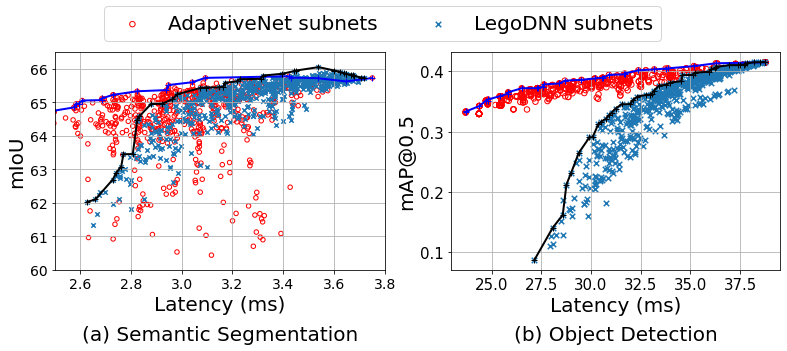

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 14
fig = plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
AXSIZE=20
TITLESIZE=20
labloc=-0.35
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":15})
s_ours = plt.scatter(ourlats[0:], ouraccs[0:], label='Subnets', s=20, marker='o',c='none',edgecolors='r')
# plt.scatter(ourlats[0], ouraccs[0],  c='g', marker='*', s=200, label='original DNN')
l_ours = linex, liney = get_extreme_points(ourlats, ouraccs, 50)
s_lego = plt.plot(linex, liney, marker='+', linewidth=2.0, color='b')
s_lego = plt.scatter(legolats[0:], legoaccs[0:], label='Subnets', s=20, marker='x')
# plt.scatter(ourlats[0], ouraccs[0],  c='g', marker='*', s=200, label='original DNN')
linex, liney = get_extreme_points(legolats, legoaccs, 50)
plt.plot(linex, liney, marker='+', linewidth=2.0, color='black')
plt.xlabel('Latency (ms)',fontdict={'size'   : AXSIZE})
plt.ylabel('mIoU',fontdict={'size'   : AXSIZE})
plt.ylim(60, 66.5)
plt.xlim(2.5,3.8)
plt.grid()
plt.title("(a) Semantic Segmentation", y=labloc,fontdict={'size'   : TITLESIZE})
plt.subplot(1, 2, 2)
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":15})
s_ours=plt.scatter(ourdetectlats[0:], ourdetectaccs[0:],  s=30,c='none',edgecolors='r')
# print(c1)
# plt.scatter(lats[0], accs[0],  c='g', marker='*', s=200, label='original DNN')
linex, liney = get_extreme_points(ourdetectlats, ourdetectaccs, 50)
plt.plot(linex, liney, marker='+', linewidth=2.0, color='b')

s_lego=plt.scatter(legodetectlats[0:], legodetectaccs[0:], s=30, marker='x')
# plt.scatter(lats[0], accs[0],  c='g', marker='*', s=200, label='original DNN'
linex, liney = get_extreme_points(legodetectlats, legodetectaccs, 50)
plt.plot(linex, liney, marker='+', linewidth=2.0, color='black')
plt.xlabel('Latency (ms)',fontdict={'size'   : AXSIZE})
plt.ylabel('mAP@0.5',fontdict={'size'   : AXSIZE})
plt.grid()
plt.title("(b) Object Detection", y=labloc,fontdict={'size'   : TITLESIZE})
plt.legend(bbox_to_anchor=(-1.05,1.05),ncol=2, loc=3, borderaxespad=0,handles=[s_ours, s_lego], labels=['AdaptiveNet subnets','LegoDNN subnets'], prop={'size':AXSIZE})

plt.savefig('D:/scientific_work/project1/paper/figs/detection.PNG',bbox_inches='tight')
plt.show()


In [257]:
ourlats


[0.07946604625121854,
 0.07957701856340747,
 0.07963594534623827,
 0.07978101231085133,
 0.08005341309579467,
 0.08239007164147014,
 0.08255874045418904,
 0.08265157332925516,
 0.08271020732664511,
 0.08279434654271065,
 0.08290336164787647,
 0.08291654229679897,
 0.08294487591830674,
 0.08302793442724231,
 0.08304718931324574,
 0.08305466674576831,
 0.0831032383652625,
 0.08312919496149275,
 0.0832750342007469,
 0.0839239912739713,
 0.08397256289346548,
 0.0839838067560886,
 0.08411680719463877,
 0.08412620682722952,
 0.08442841921670768,
 0.08453048172847002,
 0.0847588999874595,
 0.0848152418249171,
 0.08517546922517387,
 0.08524757665692717,
 0.08542831199570897,
 0.08548347234843921,
 0.08555999410416268,
 0.08560856572365687,
 0.08567628826910668,
 0.08570633696619957,
 0.08571758082882269,
 0.0858930330346631,
 0.08599963955525115,
 0.08600204813982892,
 0.0860059020873167,
 0.08608925338169313,
 0.0862107601352603,
 0.086308531377803,
 0.08639060677475559,
 0.08650672113124952,

## train curve

In [22]:
naive_top1_train, naive_top5_train, naive_top1_val, naive_top5_val = [0.6506567840102032, 2.3401320827027234, 4.72491096008561, 11.126106120434951, 14.80743728178851, 19.955790306806218, 29.07161985907118, 34.29716812871386, 38.56577635852751, 42.13798825597802, 44.61440233784768, 48.65298591049744, 50.98148797149858, 51.98143567543831, 53.63953333168896, 55.09593987355574, 56.76246734420516, 57.79504155193474, 59.083320129217, 60.210885856379335, 61.18101699462617, 61.76087894860435, 62.78689663403229, 63.382213247707455, 63.94342033465831, 64.27671021809095, 64.75970736052956, 65.5266643614618, 65.71118363176842, 65.90702070840092, 66.62933091469618, 67.04793364163393, 67.56433782636938, 67.12489472488457, 67.82737925651037, 68.35572567822632, 68.0780101266631, 68.58223791276903, 68.88719425332859, 68.6702826407129, 69.52817236160172, 69.45784585456998, 69.72955126065678, 69.81150778929928, 69.93046183671154, 70.09671650915575, 70.16961879286322, 70.6140573398739, 70.61109129410622, 70.89887579058482, 70.89263148362464, 70.93579525538969, 70.99230623323884, 71.3419093685366, 70.88100146183224, 71.39966920777688, 71.54071249103059, 71.18658223311343, 70.51477285940824, 71.19196794794712, 71.37711164895305, 71.52143319327419, 71.60198475284739, 71.8993698713721, 71.85573777651595, 71.88773984960055, 71.8935158335277, 71.95353923412605, 72.12556989057782, 71.71820691592214, 72.00099596695527, 71.87501707426192, 72.11042744611659, 72.10675891586934, 72.2695792194935, 72.0403351006758], [2.7989325357271926, 7.743955315739478, 13.179234245028166, 26.295947366726313, 32.70377710317749, 40.557320005899754, 52.95859165901238, 59.59160671476337, 64.56106034565272, 68.06794118174773, 70.59969543387649, 74.25487855993495, 76.20130708952813, 77.22670034420615, 78.56618223850744, 79.78475873943044, 80.9614983838432, 81.81790508185414, 82.76977162220133, 83.60666486091107, 84.3078224774637, 84.70745812208182, 85.40221532392016, 85.79802633067239, 86.23809386267637, 86.38467896847469, 86.70025063087311, 87.23429498259154, 87.34458505407734, 87.36441072852497, 87.94677040536881, 88.23268160985523, 88.49900130097285, 88.24751183885739, 88.64972326007975, 89.04030465977769, 88.84969719005656, 89.17315229003673, 89.33199184792628, 89.2442593353566, 89.74513080639149, 89.69712769683977, 89.81748671321417, 89.83575131115101, 89.9264498694556, 90.02362689640363, 90.1162768006355, 90.36862485518265, 90.35004804217827, 90.47267061970827, 90.52543501349562, 90.49639898627845, 90.56297890905488, 90.7555377245068, 90.52449836737895, 90.783090728922, 90.85162199757212, 90.6977778852144, 90.29275652570752, 90.66398057385688, 90.78472985946912, 90.82336650868479, 90.93311020336026, 91.07220214063307, 91.0655675645422, 91.049098204984, 91.08570545435512, 91.1015503832572, 91.19747854877687, 90.97775699803447, 91.09577439936281, 91.04441497476088, 91.19045370357917, 91.18701933471891, 91.2537553652137, 91.17749676666149], [0.86, 2.014, 5.108, 10.786, 14.78, 18.232, 26.834, 31.926, 35.358, 38.244, 40.536, 45.12, 46.848, 47.496, 49.688, 50.498, 52.068, 52.69, 53.144, 55.344, 55.664, 56.026, 57.17, 57.158, 57.796, 58.128, 58.966, 59.282, 58.902, 58.96, 60.172, 60.296, 60.928, 60.638, 61.084, 61.668, 61.614, 61.596, 61.984, 61.384, 62.252, 62.648, 62.938, 61.86, 62.334, 62.728, 63.09, 63.262, 63.24, 63.554, 63.52, 63.584, 63.584, 63.242, 63.39, 63.928, 64.148, 63.536, 62.932, 63.66, 64.038, 63.786, 64.25, 64.218, 64.372, 63.868, 63.92, 64.524, 64.404, 63.934, 64.238, 64.528, 64.17, 64.506, 64.998, 64.116], [3.134, 6.852, 13.056, 26.16, 32.918, 38.12, 49.962, 56.686, 61.084, 63.874, 66.358, 70.782, 72.576, 72.934, 74.864, 75.594, 76.722, 77.402, 77.578, 79.202, 79.652, 79.74, 81.236, 80.804, 81.472, 81.778, 82.208, 82.674, 82.22, 82.378, 83.094, 83.252, 83.742, 83.556, 83.79, 84.138, 83.962, 83.928, 84.288, 84.228, 84.876, 84.856, 84.964, 84.392, 84.718, 85.036, 84.928, 85.206, 85.166, 85.158, 85.25, 85.228, 85.39, 85.052, 85.442, 85.806, 85.678, 85.256, 85.002, 85.812, 85.712, 85.444, 85.862, 85.884, 85.982, 85.854, 85.628, 85.902, 85.964, 85.644, 86.062, 85.62, 85.992, 85.85, 86.148, 85.972]
trans_top1_train, trans_top5_train, trans_top1_val, trans_top5_val = [12.580717424033821, 30.703101156977137, 41.42894720203867, 50.56983203589637, 54.87176925412683, 58.18093972134852, 59.362362595866784, 61.59017520741632, 62.563428499152174, 63.86372736726222, 64.9397775621132, 65.76605547906448, 66.81611374625965, 67.2950520891923, 68.00206374342109, 68.73256960254874, 69.22579179762556, 69.54120735235624, 70.28966559394975, 70.79740580256221, 71.22701412063626, 71.56366031900595, 71.9778139773294, 72.25404650601176, 72.58046765172836, 73.02108156073918, 73.28498158310786, 73.56347767303814, 73.86031641462002, 74.09502430205913, 74.40942515687794, 74.68074029370008, 74.84160925148775, 75.02605046793967, 75.17864571903576, 75.45839067027677, 75.63112381122151, 75.73641843716955, 75.8823791120527, 76.01311928886855, 76.2248012943555, 76.3552292557763, 76.53615804962935, 76.68937773139943, 76.74838643204872, 76.87171149428904, 76.87787774731412, 76.95881957610433, 77.11399060382254, 77.2151483764382, 77.23185189746528, 77.35541112115662, 77.4370554345321, 77.45313452489711, 77.51276765625313, 77.52338297814559, 77.62173081250052, 77.63390721110325, 77.55725834328639, 77.73428444532357], [26.448620671569937, 52.643644427277515, 66.49211226950784, 76.0007087288416, 79.70873430231437, 82.30886371554311, 83.20172155546733, 84.71955646678813, 85.53841926930383, 86.34292016557052, 87.00895355554805, 87.57913683384275, 88.19763543698895, 88.45443256023674, 88.91900899721516, 89.35532994527944, 89.66988690771836, 89.85916746220704, 90.25708592231909, 90.62401700947426, 90.81493669447731, 91.00047066461836, 91.2318222370043, 91.35491313776384, 91.55691646760603, 91.79732228494785, 91.94140966782693, 92.05489994667137, 92.24948816195293, 92.30740410880587, 92.50168010887995, 92.662705174255, 92.72850455866883, 92.84784887521178, 92.92246834318411, 93.0947331610184, 93.12415945761933, 93.1475756088421, 93.25763151880544, 93.30446382081031, 93.42193484526877, 93.49109054472686, 93.56219758998719, 93.60582968473466, 93.64868124122079, 93.70105536591619, 93.74008228417615, 93.77138187280798, 93.85326034772082, 93.8786278446446, 93.88736987447938, 93.97549265634645, 93.98415663207044, 94.0038261989575, 94.04168230983142, 94.0413700945376, 94.07477713677041, 94.07415270590884, 94.04449224795813, 94.1016276567016], [11.5, 28.524, 37.088, 46.72, 49.998, 53.454, 54.352, 56.144, 56.718, 58.774, 58.54, 59.348, 60.838, 60.354, 61.772, 62.302, 62.04, 62.98, 63.03, 63.842, 64.126, 64.292, 65.098, 64.686, 65.032, 65.26, 65.926, 65.682, 65.952, 66.148, 66.564, 66.206, 66.698, 67.224, 67.23, 67.934, 67.632, 67.224, 67.706, 67.822, 68.066, 67.78, 68.166, 68.226, 68.016, 68.488, 68.438, 68.58, 68.708, 68.706, 68.554, 68.902, 68.68, 68.74, 68.89, 68.742, 68.96, 68.77, 68.634, 68.934], [24.548, 50.576, 62.046, 72.108, 75.284, 78.102, 79.194, 80.144, 80.82, 81.984, 82.32, 82.906, 83.682, 83.356, 84.642, 84.578, 84.486, 85.252, 85.296, 85.932, 85.846, 85.822, 86.47, 86.388, 86.486, 86.724, 87.004, 86.936, 87.046, 87.342, 87.482, 87.494, 87.664, 87.694, 87.748, 88.25, 87.9, 87.71, 88.29, 88.346, 88.202, 88.234, 88.564, 88.53, 88.362, 88.56, 88.654, 88.692, 88.778, 88.716, 88.504, 88.936, 88.83, 88.838, 88.832, 88.762, 88.824, 88.716, 88.744, 88.862]
our_stage0_top1_train, our_stage0_top5_train, our_stage0_top1_val, our_stage0_top5_val = [36.02340678458072, 52.1326259573981, 57.25490900090527, 60.282539278585475, 63.15117389067489, 64.85711854888989, 64.59087691141559, 65.85769068355943, 64.88311047657845, 67.45631131613148, 66.82563631438255, 67.15689679799894, 68.09838217807143, 68.19095402859598, 69.43122949623422, 68.47226005656215, 68.4055240261269, 68.65990148044415, 69.4652609690115, 69.83476783264885, 69.42225330493206, 69.979323538555, 69.81423967358319, 68.96938494352929, 70.0803252034761, 69.94669703478301, 70.62084802368611, 70.3699049382172, 70.73027950286827, 69.96917653977, 70.89224121439868, 70.51898776650603, 70.47574594098153, 70.34391301050333, 70.7017117986603], [50.96291115825898, 72.88589231540729, 78.99204397235742, 82.01421048146608, 84.31547175337113, 85.69921017310875, 85.4269583902295, 86.36305805562758, 85.33103022473067, 87.68396313654932, 87.01972498508741, 87.42412191376549, 88.1523642115812, 88.18460044618082, 89.28562786894253, 88.43710460845527, 88.24719962343852, 88.45154456817193, 89.09892309125462, 89.457814632934, 89.11586077367912, 89.56849497361897, 89.40981152332868, 88.55231207172538, 89.52806308627478, 89.43869144302401, 90.06265381477078, 89.72717842395687, 90.03361778734816, 89.31895685717174, 90.20681925155222, 89.71874860959457, 89.78244054047292, 89.61977634445846, 90.13742939055082], [31.188, 47.84, 52.85, 54.494, 57.366, 59.16, 58.006, 59.078, 58.644, 61.758, 59.91, 60.116, 61.564, 60.424, 62.74, 61.248, 61.338, 62.044, 62.104, 62.766, 62.466, 62.054, 62.954, 61.814, 63.166, 62.472, 63.362, 62.78, 63.83, 62.208, 63.2, 62.71, 62.386, 62.94, 63.428], [46.64, 69.204, 75.934, 77.39, 79.822, 81.632, 80.154, 81.372, 80.44, 83.64, 81.956, 82.128, 83.318, 82.122, 84.668, 83.458, 83.396, 83.958, 83.588, 84.638, 84.012, 84.064, 84.488, 83.266, 84.814, 84.132, 84.952, 84.516, 85.178, 83.87, 84.896, 84.114, 83.832, 84.582, 84.77]
our_top1_train, our_top5_train, our_top1_val, our_top5_val = [62.91146919519043, 66.24928533823577, 67.60562686539595, 70.565896573391, 71.60112461344943, 72.57320702069194, 73.16142076860035, 73.78678807637195, 74.35127342644326, 74.71711178143376, 75.07100782601368, 75.64361074574455, 75.89486612432171, 76.23549299621972, 76.50267128968711, 76.92189842373182, 77.17939804676809, 77.30623549829778, 77.61595315707241, 77.87251607751743, 77.98413311768213, 78.14250432156652, 78.34887865567849, 78.5782008575127, 78.83359294231204, 78.90173397882118, 79.12340690071939, 79.12691929676772, 79.25040048022946, 79.41041080304863, 79.48940129988208, 79.52218392456878, 79.7398760709974, 79.76516552855207, 79.89504710696335, 79.88591475322943, 80.08136163424022, 80.13498460573544, 80.15363941166856, 80.18361213467038, 80.23520570543674, 80.34799348233102, 80.3093568236558, 80.44001895336993, 80.44641939381593, 80.48091917935827, 80.56365621501307, 80.5585827664081, 80.68463967575505, 80.63624629859716, 80.73857490187113, 80.65045210166255, 80.73990181199716, 80.73677962553808, 80.78127033903849, 80.74544362319745, 80.79859824818487, 80.80702813358182, 80.8623682753833, 80.83567384325389, 80.87860346937856, 80.84582086956603, 80.88875045706038, 80.9530668207208, 80.99927467935854, 80.87891570904931, 80.92832371964597, 80.8749348939311, 80.95611093979532, 80.96610179493224, 80.96688240502024, 80.95899893609715, 80.95556453480874, 81.04368732456624, 81.00528483922827, 80.98264924763947, 80.92801154833903, 80.99381094250424, 80.96906788536268, 81.00801671258172, 81.04813643936481, 80.93651937818478, 80.98038562447707, 80.98186869378785, 81.06710346007367, 81.05633203133227, 80.99927472117182, 81.07904568986794, 81.03830160531538, 81.09848109397007, 81.02269087119166, 80.98694220855326, 81.0744405466542, 81.01761736326263, 81.01184136568654, 81.08216786281803, 81.02948152541627, 81.00442625950166, 80.92574801059564, 80.97827820276825, 81.02667161369119, 80.99818196432946, 81.02440805959529, 80.94807138008997, 80.99459145646011, 81.06109333368909, 81.06499599855248, 81.04548253366099, 80.97055088859342, 81.0307304069786, 81.00903143197844, 80.99029853182736, 81.04774617713007, 80.9494763675931, 81.05773702350415, 81.0756893949815, 81.03174509652573, 80.99529392730712, 81.05789315112723, 81.02729602119712, 81.06359103985088, 80.98038567404379, 80.96938010406278, 81.07326974060803, 80.9806979207534, 81.04813643102479, 81.02066143023356, 81.05375623202445, 81.01402683322564, 81.02300301832415, 80.94986659127197, 80.95447180988836, 81.07108424038768, 81.08607057646208, 81.0513366349682, 80.97070702152243, 81.00786063015438, 81.05734675530842, 81.06085914848046, 81.0101241408887, 80.98061983536677, 81.05406851262416, 81.05032193187041, 81.0560197914918, 81.07389418634527, 81.04009682520365, 81.07678215328282, 81.00512873347209, 80.99334259842314, 81.09980799988588], [85.76204163418593, 87.950280923604, 88.73597085929947, 90.48219124624855, 91.02856806940943, 91.56596878752535, 91.87787185256178, 92.17307149829504, 92.4724860088364, 92.714999262063, 92.8860152008569, 93.15623758460922, 93.29392455694551, 93.4374655344539, 93.59443183895478, 93.77895110824011, 93.86488830466433, 93.96425088087838, 94.12262206904146, 94.21363288905935, 94.25250366132498, 94.35436393091237, 94.45552167591451, 94.5733829932166, 94.656120009985, 94.68460968777607, 94.78506495476134, 94.80325153067314, 94.84938138587742, 94.89465254714051, 94.92642050017498, 94.97840432257613, 95.0374129755494, 95.07722053185924, 95.11125191458596, 95.11507662508838, 95.18782273070086, 95.22583492538665, 95.22255668715974, 95.23285974811006, 95.25432460843007, 95.31395771910425, 95.2776626987414, 95.36250721413087, 95.36508300735564, 95.33628115742688, 95.37897660696582, 95.41144694455885, 95.45679623756851, 95.42900907489418, 95.4668651935037, 95.42424779537791, 95.4653821449611, 95.47474859783252, 95.47638779931304, 95.46998733265596, 95.47888545720033, 95.52704471418157, 95.50120887818787, 95.50518961989538, 95.52165897520764, 95.50378462275998, 95.5366453364242, 95.58097993676036, 95.5560026396328, 95.53719170006795, 95.52470306236317, 95.5131510852607, 95.56427638676203, 95.55319270651425, 95.56373002904354, 95.5311815770986, 95.53094740430919, 95.58261898275492, 95.5727842119063, 95.55124139242258, 95.53641113562233, 95.57262816168081, 95.55662709466584, 95.5862875181786, 95.58940966854419, 95.57645275837655, 95.57434530656802, 95.59050242788766, 95.58347757701479, 95.59713709705571, 95.57239399205949, 95.60704988234863, 95.6039277127304, 95.61852380266056, 95.5798871429432, 95.58199457282531, 95.59487344887917, 95.59791758980272, 95.57934075808167, 95.60876700901939, 95.54156266665427, 95.56700825313321, 95.57934078096687, 95.56372998577426, 95.57941882942038, 95.55732960807349, 95.57176953635947, 95.57426727858197, 95.59050243434886, 95.5956540139084, 95.59448322670396, 95.56466661586296, 95.55678319331767, 95.55998341293773, 95.59487348039322, 95.58090184253646, 95.59065860762324, 95.56224696398763, 95.58386789832349, 95.61891408319512, 95.5838678669345, 95.57777964781775, 95.5862875613645, 95.60283500099149, 95.58277513176253, 95.58878524177373, 95.57083288259355, 95.61227946075623, 95.56716433623643, 95.58004325573229, 95.59190746070563, 95.57520390341833, 95.56513496681914, 95.57871630384064, 95.54351403931967, 95.56006145300654, 95.59854204287657, 95.59019024345282, 95.57762358697444, 95.58113601632631, 95.5723159229718, 95.59331241711453, 95.6166504734524, 95.5681790450064, 95.56287137637668, 95.58542891828525, 95.60111781403792, 95.59128295014186, 95.61399666512828, 95.59424905704095, 95.62710971509706, 95.58613149918726, 95.5795749067353, 95.60767428289908], [56.90199879013061, 60.113998636169434, 61.05799868606567, 63.95199860992432, 64.38199852630615, 65.23399851257324, 65.24999880493164, 65.97599852325439, 66.62999861236572, 66.86399864562988, 67.3039983657837, 67.46199863342285, 68.01399848327637, 67.66399854919433, 68.5379984979248, 68.44799841278076, 68.52799842132568, 68.78199838714599, 68.94799855194091, 68.90199841125488, 69.27399838989258, 69.26599854797364, 69.55399845550536, 69.45599834991455, 69.82599850708007, 69.78999839904785, 69.69799817749023, 70.00799851287842, 69.92999852203369, 69.89199832611084, 70.06799858428955, 70.45199834228515, 70.19599839050294, 70.33599851257324, 70.57599856445313, 70.69399837738037, 70.72399863494873, 70.42399821166993, 70.73399839477538, 70.65799847106933, 70.5839984326172, 70.7779982699585, 70.83599821899413, 70.77199854858398, 70.93999868530274, 71.00199838562011, 71.01999798919678, 70.8959984286499, 71.19799844543456, 70.85599842254639, 70.90999832855225, 70.8739982989502, 70.98999845581055, 71.24599852722167, 71.05399830291748, 71.1519982888794, 71.145998644104, 71.0939983996582, 71.08599844177246, 71.20999830139161, 71.11999831909179, 71.33399853759765, 70.99799841461181, 70.9119985546875, 71.06799847473144, 71.08999848388672, 71.09199848571777, 71.3439984085083, 71.1719981652832, 71.1199982434082, 71.50199834350586, 71.22799819091797, 71.15799841033936, 71.07399855316162, 71.19599824920654, 71.31399843688965, 71.26599853546142, 71.08399827362061, 71.12599847229004, 71.17399816528321, 71.10199847625732, 71.14599848236084, 71.18399822784424, 71.3039984640503, 71.25999839813232, 71.40799837615967, 71.03599833953858, 71.37599855682373, 71.24399843475342, 71.05799850097657, 71.28999815765381, 71.39399850341798, 71.45799837005615, 71.11799837890625, 71.2499984375, 71.21599851348877, 71.40999839202881, 71.4919984136963, 71.36599829711913, 71.2719985671997, 71.2599982775879, 71.44799842437745, 71.23399856658935, 71.38999833801269, 71.47599840637207, 71.31599843780518, 71.28999838287353, 71.26999853637696, 71.13999835723877, 71.17399831298827, 71.203998493042, 71.4919984753418, 71.28599855957032, 70.99399835205078, 71.20799846405029, 71.2179983340454, 71.21399834716797, 71.09599851837159, 71.26399850738525, 71.19799845947266, 71.10199837066651, 71.21199855651855, 71.28599861938477, 71.21399818267822, 71.16399834014892, 71.15199843658448, 71.01199850891113, 71.00599852111816, 71.2499985131836, 71.07999844940186, 71.17799852416992, 71.111998286438, 71.1339986694336, 71.16199836914062, 71.12999844329833, 71.4539984701538, 71.44599830383301, 71.28799833892822, 71.0959982623291, 71.51999836853027, 71.2759982876587, 71.64199836364746, 71.05199842254639, 71.25799835327149, 71.09199821746826, 71.24399840576172, 71.51199826019287, 71.30999841918945, 71.18399822875976, 71.2699985671997], [81.26799813354492, 83.3139982598877, 83.94799819122315, 85.60199815582276, 86.15799829162597, 86.7599980279541, 86.65599812988282, 87.26399811187744, 87.56799835296631, 87.58799819854737, 87.85199809509277, 87.90999822814942, 88.41199815795899, 88.05999832672119, 88.51999824951172, 88.60199821502685, 88.66399812194824, 88.75599815002441, 88.67399782653808, 89.09599818603516, 89.14199808654786, 89.17199818908692, 89.16199809478759, 89.21999803344727, 89.60199813171387, 89.419998258667, 89.46999813293456, 89.59999807189942, 89.46399786010743, 89.66399807128906, 89.67999836364746, 89.8879982635498, 89.57799807678222, 89.85399797973633, 89.92199798095703, 89.77599813659668, 89.96799792724609, 89.83999822662354, 89.88599803833007, 89.94999808166504, 89.98199815612793, 89.91199813903809, 90.00799833435059, 90.04999808349609, 90.10999808105468, 90.12999804443359, 90.15799796936035, 90.15399795166016, 90.15399795166016, 90.07399812438965, 90.07199801879882, 90.13599822937012, 90.21399820251465, 90.20199816894531, 90.15799799743652, 90.26799815246582, 90.20799818664551, 90.20599807922363, 90.21799799682617, 90.33799834899902, 90.27199812438965, 90.50999815856933, 90.2139982043457, 90.18599799804687, 90.0819981298828, 90.28999781860351, 90.16199798522949, 90.31399772583008, 90.28599801208496, 90.18799820739746, 90.31999799682617, 90.18399792053222, 90.25399808624267, 90.23599818359375, 90.13999811157227, 90.32799827148438, 90.22999821166992, 90.07399807861329, 90.32599813598632, 90.1359984210205, 90.2519982647705, 90.17599823181152, 90.42599834533691, 90.26999827575683, 90.24399815734863, 90.33199801818847, 90.20399809509277, 90.20599793151855, 90.29799801757812, 90.23999794525146, 90.23599843688964, 90.23399786865234, 90.36599825805663, 90.10999805114746, 90.2499981451416, 90.19399816345215, 90.36199815063476, 90.39999831848145, 90.33799824523926, 90.10999820068359, 90.21599784545899, 90.36799791503907, 90.29399802978516, 90.35799796936035, 90.41999795288086, 90.35199802734375, 90.22399799865723, 90.35199829650878, 90.15599813293457, 90.18199815979004, 90.2779979486084, 90.41399811645508, 90.27199802062988, 90.12199833984376, 90.25799787963867, 90.33999788635253, 90.39999827453613, 90.24599818908692, 90.34199842651367, 90.36599821228027, 90.2799980682373, 90.35199808898926, 90.25999789550781, 90.28199799438477, 90.30999812683106, 90.23999804992675, 90.17799832153321, 90.23199815185546, 90.15399793762207, 90.16999795898438, 90.2299978668213, 90.13799830322266, 90.26199813659667, 90.24199827697754, 90.16599813842774, 90.31999799682617, 90.32599788085938, 90.36199831604004, 90.28599790649415, 90.2619978515625, 90.1019981829834, 90.36999812438965, 90.24399806762695, 90.24999800964355, 90.21199820251465, 90.4019982006836, 90.40599817077637, 90.3159980267334, 90.19799810729981, 90.27799808227539]

In [23]:
AXSIZE=14
TITLESIZE=14
our_stage0_top1_val[-1]

63.428

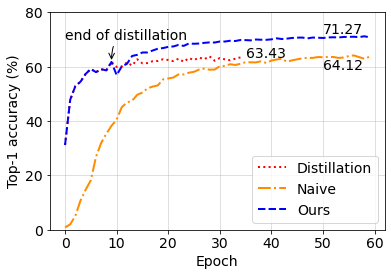

In [24]:
dis_our_top1_val = our_stage0_top1_val[:10]+our_top1_val
from matplotlib import pyplot as plt
# plt.rcParams.update({"font.size":15})#此处必须添加此句代码方可改变标题字体大小
# plt.figure()
# x=plt.title("validation_acc",fontsize=20)
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 14
fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(111)
ax.plot([i for i in range(len(our_stage0_top1_val))], our_stage0_top1_val, linestyle=':', c='r', linewidth=2.0)
ax.plot([i for i in range(60)], naive_top1_val[:60], linestyle='-.', c='darkorange', linewidth=2.0)
# ax.plot([i for i in range(60)], trans_top1_val[:60], linestyle=':')
ax.plot([i for i in range(60)], dis_our_top1_val[:60], linestyle='--', c='blue', linewidth=2.0)
ax.annotate('end of distillation', xy=(9,dis_our_top1_val[9]), xytext=(0,70),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"), fontsize=AXSIZE) #
annotations=['71.27','63.43','64.12']
X=[50, 35, 50]
Y=[72, 63.428, 59]
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]), fontsize=AXSIZE)
# ax.annotate('71.27', xy=(59,dis_our_top1_val[-1]), xytext=(50,70),
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="angle3,angleA=0,angleB=-90"))
# ax.annotate('68.93', xy=(59,trans_top1_val[-1]), xytext=(50,65),
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="angle3,angleA=0,angleB=-90"))
# ax.annotate('64.12', xy=(59,naive_top1_val[-1]), xytext=(50,50),
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="angle3,angleA=0,angleB=-90"))
plt.legend(['Distillation', 'Naive', 'Ours'],prop={'size'   : AXSIZE})
plt.xlabel('Epoch',fontdict={'size'   : TITLESIZE})
plt.ylabel('Top-1 accuracy (%)',fontdict={'size'   : TITLESIZE})
plt.ylim(0, 80)
plt.grid(True, alpha=0.5)
plt.savefig('D:/scientific_work/project1/paper/figs/distillation_gain.PNG',bbox_inches='tight')
plt.show()

In [13]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 14
acc2s, lat2s = [82.96000002929688, 82.76800002929687, 78.04799998779296, 80.3519999975586, 78.16000001708984, 79.87199998779298, 80.65599998779297, 82.83200002929688, 81.04000002929688, 81.08800002929688, 80.35200002929687, 79.71200000732422, 78.01600000732422, 81.28000000732422, 80.27199998779297, 79.5039999975586, 77.48799999755859, 77.8879999975586, 81.63199998779297, 78.46400000732422, 82.54400002929688, 80.43199998779296, 81.48800002929687, 77.0399999975586, 79.31199998779297, 77.00800002685547, 81.05600002929687, 82.04800002929687, 80.15999998779297, 82.14400002929688, 82.88000002929688, 79.29600002685547, 79.66399999755859, 78.8799999975586, 80.67200000732421, 77.77600000732421, 80.62399998779297, 80.59199998779297, 78.2879999975586, 78.11200001708984, 78.48000000732422, 79.13600000732421, 78.7039999975586, 80.51199998779298, 79.71199999755859, 79.61600000732422, 79.13599998779297, 80.14400002929688, 79.07199999755859, 79.53599999755859, 78.2399999975586, 78.62400001708984, 78.3199999975586, 81.85599998779297, 78.5439999975586, 79.61600002929687, 81.56800002929687, 80.80000000732421, 80.33600002929687, 79.2959999975586, 80.6079999975586, 79.80800000732422, 79.47199998779297, 79.27999998779296, 82.60799998779297, 79.53600000732422, 77.92000000732422, 80.6239999975586, 77.99999998779298, 81.58399998779296, 80.92799998779297, 80.6719999975586, 78.99200001708985, 77.45600002685546, 81.67999998779297, 77.66399998779296, 80.38399998779298, 79.66399998779296, 79.98400001708984, 78.76800001708985, 78.63999998535157, 81.87199998779298, 79.16799998779297, 81.53600002929687, 78.1599999975586, 79.8879999975586, 78.54399998779297, 79.82399998779297, 82.04800002929687, 81.80799998779297, 78.09599998779296, 79.37600001708985, 77.96800001708985, 81.48799998779297, 79.42400002929688, 79.7599999975586, 81.84000002929687, 79.2479999975586, 79.15199999755859, 79.72800002929688, 79.40799999755859, 78.6719999975586, 79.12000000732422, 80.6719999975586, 81.23199998779297, 81.44000002929687, 78.43200000732422, 79.0399999975586, 78.43200000732422, 78.4959999975586, 79.3919999975586, 78.08000000732422, 79.19999998779296, 79.87199999755859, 79.07199999755859, 78.73600001708985, 79.96800000732422, 81.24800002929688, 79.69599999755859, 82.49600002929688, 78.6559999975586, 77.66400002685548, 79.26399998779297, 79.95199998779297, 81.08799998779297, 79.44000002929687, 79.98400002929688, 81.03999998779297, 77.50400001708984, 80.39999998779297, 78.97600001708985, 78.97600000732422, 77.93600000732422, 78.94400001953125, 78.76800001708985, 77.98400000732421, 79.39200000732421, 80.86400002929688, 78.63999998779298, 79.53599999755859, 80.3519999975586, 81.2639999975586, 80.59199998779297, 78.91199998779297, 79.2159999975586, 79.2959999975586, 80.33599998779297, 79.20000002929687, 77.77600000732421, 80.68799998779296, 79.48800000732422, 79.91999998779296, 80.44799998779297, 79.71199999755859, 80.46399998779297, 82.17600002929687, 78.03200000732421, 79.90400001708984, 82.36800002929688, 78.72000000732422, 78.08000000732422, 78.88000000732421, 79.32799999755859, 81.56800002929687, 79.56800000732422, 80.23999998779297, 79.74399998779298, 79.3919999975586, 80.01599998779297, 79.76000000732422, 80.1439999975586, 79.8079999975586, 80.25599998779298, 78.63999999755859, 78.9919999975586, 79.56800002929687, 81.75999998779297, 80.73600002929687, 78.06400000732422, 78.31999998779297, 77.74399999755859, 81.21600002929688, 78.62400002929688, 80.81599999755859, 78.06400000732422, 78.84799998779297, 79.00799998779297, 79.5199999975586, 79.27999998779296, 78.78400000732422, 81.31199998779297, 81.56799998779297, 78.0959999975586, 81.93600002929688, 79.31199999755859, 80.08000002929687, 79.16799998779297, 79.2479999975586, 78.7999999975586, 80.87999998779297, 80.01599998779297, 77.55200000732422, 78.32000002685547, 79.1199999975586, 78.80000000732421, 77.82400000732422, 79.77599998779297, 79.55199998779297, 80.75199998779297, 82.03199998779297, 77.95200000732422, 77.71199999755859, 82.1599999975586, 77.87199999755859, 80.27199998779297, 79.35999998779297, 81.93599998779297, 78.1439999975586, 78.9919999975586, 78.78399998779297, 80.04799998779296, 81.80799998779297, 77.85600000732421, 79.56799998779297, 78.63999999755859, 78.2879999975586, 79.91999999755859, 78.84799998779297, 79.18399998779297, 79.12000000732422, 80.06399998779297, 78.46399999755859, 77.82399998779297, 77.8559999975586, 80.73599998779297, 80.33599999755859, 79.80800000732422, 80.0159999975586, 79.32799999755859, 81.87200002929687, 81.74400002929687, 78.09599998779296, 77.74400001708985, 78.9279999975586, 78.84799998779297, 78.4799999975586, 80.70399998779297, 79.29599998779297, 79.34400000732421, 81.59999998779297, 77.55199998779297, 80.06399998779297, 81.39200001708984, 80.25599998779298, 79.71200002929687, 77.99999999755859, 79.83999999755859, 82.14399998779297, 80.17599999755859, 81.53599998779296, 80.11199998779297, 77.45600000732422, 80.0639999975586, 79.16800002929688, 78.36799998779297, 80.08000002929687, 78.68799999755859, 81.26400002929688, 77.92000001708985, 77.47200001708984, 78.2399999975586, 78.80000001708984, 79.55199998779297, 80.14400002929688, 81.93600002929688, 81.77600002929688, 78.97599999755859, 78.33600000732422, 78.97599999755859, 77.77600002685547, 78.54399998779297, 79.15200000732422, 79.0079999975586, 81.51999998779297, 80.2239999975586, 79.29600002929688, 81.11999998779297, 82.41600002929688, 80.15999998779297, 79.03999998779297, 79.19999999755859, 79.59999998779297, 78.49600000732421, 77.74400000732422, 77.63200002685547, 79.55199998779297, 80.94399998779296, 78.8319999975586, 80.04799998779296, 79.00800002929688, 80.19200002929688, 81.98400002929688, 79.04000000732422, 79.69600001708984, 82.46399998779297, 82.01600002929688, 79.13600000732421, 80.0159999975586, 81.32799998779296, 78.35200001708985, 82.38399998779298, 79.19999999755859, 78.86399998779297, 77.63200000732422, 79.43999998779297, 80.9599999975586, 77.77600001708984, 79.18400002929687, 81.07199998779296, 79.04000000732422, 80.60799998779297, 81.15200002929687, 79.40800000732422, 77.90400000732421, 78.22400000732422, 78.0639999975586, 79.95199998779297, 80.46399998779297, 80.6079999975586, 79.31199998779297, 80.84799998779297, 80.5759999975586, 78.65599998779297, 78.17600000732422, 81.5039999975586, 81.08799998779297, 79.05600000732422, 78.75199998779297, 78.27199998779297, 78.19200002685547, 79.02399998779296, 80.72000002929687, 78.96000001708984, 80.97599998779297, 79.18400000732422, 79.59999998779297, 78.49599998779297, 78.3519999975586, 78.89600000732422, 82.60799998779297, 79.6319999975586, 79.56799998779297, 79.82400000732422, 78.46399999755859, 80.14399998779297, 78.1119999975586, 80.67200000732421, 79.7599999975586, 79.56799998779297, 79.48800002929687, 78.57599998779297, 80.41600002929688, 78.33600000732422, 79.21600000732421, 80.4959999975586, 78.71999999755859, 79.59999998779297, 76.91200002685547, 79.9839999975586, 80.03200002929688, 79.88800002929688, 79.7599999975586, 79.18400000732422, 80.91199998779297, 80.11199998779297, 80.1119999975586, 79.1359999975586, 79.18399998779297, 77.84000001708985, 81.66399998779296, 78.7999999975586, 79.32799999755859, 79.53599999755859, 78.30399998779296, 81.85600002929688, 78.04799999755859, 78.0159999975586, 82.49600002929688, 79.91999998779296, 79.13600000732421, 81.39200002929688, 80.81600002929687, 81.11999998779297, 82.54400002929688, 77.1679999975586, 79.31199998779297, 80.35199998779296, 78.00000000732422, 79.88800001708984, 78.84800000732422, 77.68000001708984, 79.75999998779297, 78.44800000732423, 81.74400002929687, 78.80000000732421, 79.66399998779296, 78.7039999975586, 78.87999998779297, 78.9279999975586, 77.85600000732421, 79.77600001708984, 81.61599998779297, 79.98400002929688, 79.8559999975586, 81.63199998779297, 80.55999998779296, 79.55199998779297, 78.0319999975586, 78.72000000732422, 78.88000002929688, 79.3759999975586, 78.51200000732422, 80.20799998779297, 79.02399999755859, 79.5519999975586, 79.71199999755859, 80.46399998779297, 82.75200002929688, 79.82400002929687, 78.24000000732421, 79.5999999975586, 79.82399998779297, 80.81599999755859, 79.08800000732423, 81.15200002929687, 80.64000002929687, 80.76800002929687, 80.99199998779297, 79.66399998779296, 78.38400000732422, 77.9359999975586, 80.99199998779297, 79.87199999755859, 77.60000000732421, 81.63200000732422, 78.60800001708985, 79.7759999975586, 79.80800002929688, 79.4239999975586, 81.71199998779296, 78.86400000732422, 78.44799998779297, 81.04000002929688, 78.81600001708985, 79.13599998779297, 79.64799998779297, 81.18399998779297, 80.68800002929687, 78.9919999975586, 79.40799998779296, 79.26399998779297, 78.38400001708985, 82.43200002929687, 78.84799999755859, 79.48799998779297, 79.07200001708985, 78.91199998779297, 78.99200000732422, 81.18399998779297, 79.12000000732422, 80.55999998779296, 80.51199999755859, 77.68000001708984, 81.08800002929688, 82.25599998779298, 80.60800002929687, 78.20799999755859, 80.16000002929688, 81.16799998779297, 80.07999998779297, 79.00800002929688, 80.59199998779297, 80.20799998779297, 80.28799998779297, 79.7759999975586, 79.3439999975586, 78.54400002929688, 79.6799999975586, 80.23999998779297, 79.26399998779297, 80.30399999755859, 79.56800002929687, 78.43199999755859, 78.7039999975586, 78.89599998779296, 80.56000000732422, 79.23199999755859, 80.54399998779297, 78.6719999975586, 78.3999999975586, 80.23999998779297, 78.57599998779297, 80.15999998779297, 78.51199999755859, 80.3679999975586, 78.30400000732422, 78.73600000732422, 77.45599999755859, 79.10400002929687, 80.3679999975586, 78.20800000732422, 78.32000000732423, 79.20000001708985, 79.55199998779297, 80.65599998779297, 78.87999998779297, 80.48000000732422, 78.8319999975586, 82.56000002929687, 80.04799998779296, 79.69599999755859, 79.50399998779297, 80.39999998779297, 80.6719999975586, 80.0639999975586, 78.86400001708985, 79.23199999755859, 78.97599998779297, 80.72000000732422, 78.8319999975586, 80.83199998779297, 82.11200002929688, 78.89599999755859, 79.29600000732422, 79.84000000732422, 77.95200000732422, 81.05599998779297, 78.6079999975586, 79.10400000732422, 79.02399999755859, 78.7359999975586, 80.96000002929688, 79.98400000732421, 79.29600000732422, 80.1119999975586, 79.63200000732422, 78.99200000732422, 81.98400002929688, 78.43199998779296, 78.28799998779297, 80.04799998779296, 78.4159999975586, 78.7999999975586, 80.6239999975586, 82.08000002929687, 79.6319999975586, 78.03199998779297, 81.53599998779296, 81.05600002929687, 78.35199998779296, 79.53599999755859, 80.51199998779298, 79.85600002929688, 78.59200001708984, 79.67999998779297, 79.07199999755859, 79.15199998779296, 78.88000001708984, 78.64000001708985, 80.30399998779296, 80.20799999755859, 79.15199999755859, 79.48799998779297, 80.01599998779297, 77.87200000732422, 79.43999999755859, 77.32800000732422, 79.29599998779297, 79.07200000732422, 77.93600000732422, 77.44000000732422, 78.47999998779297, 78.54399998779297, 79.45600000732422, 78.52800000732422, 77.31200000732422, 79.40800000732422, 79.6799999975586, 80.91200002929688, 79.82399999755859, 80.17600001953124, 82.22400002929687, 81.05599998779297, 80.22399998779296, 80.67199998779297, 78.20799999755859, 77.92000000732422, 79.16799998779297, 81.82400002929687, 77.59999998779297, 80.11200002929688, 80.16000000732421, 78.12800001708985, 79.74400002929687, 80.84799999755859, 79.08800001708984, 78.41600000732421, 77.61600001708985, 79.87199999755859, 80.79999998779297, 79.1359999975586, 80.5279999975586, 79.5039999975586, 82.33599998779297, 78.60800001708985, 79.43999999755859, 78.6719999975586, 78.51200000732422, 78.17600001708985, 78.07999998779297, 82.96000002929688, 79.21600000732421, 80.87999998779297, 79.74400000732422, 78.7039999975586, 79.82399999755859, 81.72800002929688, 80.0319999975586, 77.96800000732422, 77.77600000732421, 79.05599998779297, 82.46400002929687, 78.20799999755859, 79.85599998779297, 80.17599998779296, 79.3759999975586, 79.02400000732422, 79.15200000732422, 79.40799999755859, 78.57599998779297, 79.0879999975586, 78.07999999755859, 80.81599999755859, 78.73600001708985, 77.92000000732422, 79.11999998779297, 80.60799998779297, 80.1439999975586, 79.45599999755859, 82.64000002929687, 78.46399999755859, 79.0399999975586, 79.07199998779296, 78.43200000732422, 81.11999998779297, 78.81600000732422, 79.10399999755859, 79.19999999755859, 78.4479999975586, 79.12000000732422, 79.42399998779297, 80.01600000732422, 79.83999999755859, 78.9119999975586, 78.62400000732421, 78.12799999755859, 79.96800000732422, 80.4159999975586, 81.05600002929687, 78.9919999975586, 78.67199998779297, 78.80000000732421, 79.02399998779296, 81.82399998779297, 80.63999999755859, 78.04800001708985, 79.20000002929687, 82.11199998779297, 79.39200000732421, 80.35199998779296, 79.8079999975586, 78.63999998779298, 80.49599998779297, 80.71999999755859, 78.41599998779297, 79.00800000732421, 77.8079999975586, 80.56000002929687, 79.68000002929688, 80.09599998779296, 79.90400002929688, 82.16000002929688, 79.19999999755859, 78.16000000732421, 78.71999999755859, 79.5999999975586, 81.05600002929687, 81.24799998779297, 77.40800001708985, 79.31200001708984, 78.5279999975586, 78.46399999755859, 80.43199998779296, 77.5039999975586, 79.51999998779297, 78.07999999755859, 78.51200000732422, 80.86399998779297, 79.90399998779297, 79.5199999975586, 80.17599998779296, 79.40799999755859, 79.9039999975586, 79.42399998779297, 78.03200000732421, 80.2239999975586, 82.38400002929687, 79.85599998779297, 78.9279999975586, 78.8639999975586, 78.86400002685546, 78.86400001708985, 78.67199998779297, 77.36000000732422, 80.19200002929688, 79.44000001708984, 77.48799999755859, 79.83999998779296, 77.56799999755859, 78.65600000732422, 79.8079999975586, 81.50399998779297, 79.64800001708984, 82.23999998779297, 78.99199998779297, 79.34400001953125, 78.6559999975586, 79.98400002929688, 80.3519999975586, 80.2719999975586, 79.29599998779297, 80.27200000732422, 79.79199998779296, 81.58399998779296, 81.10400002929687, 79.85599998779297, 77.66400000732422, 79.24799998779297, 81.71200002929687, 80.14400002929688, 79.1359999975586, 78.32000001708984, 79.66399999755859, 80.27200000732422, 78.84800000732422, 78.8799999975586, 79.3439999975586, 78.52799998779297, 79.23199998779297, 82.25600002929687, 78.2879999975586, 78.16000000732421, 78.59200000732422, 81.16799998779297, 81.27999999755859, 80.07999998779297, 78.39999998779297, 80.4479999975586, 77.80800001708984, 79.99999999755859, 82.41599998779297, 79.55199998779297, 79.74400000732422, 81.53600002929687, 78.46399999755859, 79.29600001708984, 78.72000000732422, 80.23999998779297, 78.3679999975586, 79.47200002929688, 78.43199999755859, 81.48800002929687, 78.63999999755859, 81.37600002929688, 82.35200002929687, 77.64800001708984, 78.39999998779297, 79.69599998779297, 77.6479999975586, 78.88000000732421, 82.08000002929687, 79.3759999975586, 77.67999998779297, 79.11999998779297, 79.93600001708984, 79.66399999755859, 81.68000002929688, 76.57600002685547, 80.17599998779296, 76.91200002685547, 80.06399998779297, 78.11199998779297, 80.19200002929688, 79.18399999755859, 78.79999998779297, 79.6799999975586, 78.87999998779297, 80.68799999755859, 80.43199998779296, 82.60800002929687, 79.13599998779297, 79.55200002929688, 78.67200000732421, 79.5199999975586, 79.3919999975586, 81.72800002929688, 78.99199998779297, 80.55999998779296, 80.04799998779296, 77.52000002685547, 78.73599998779297, 80.54400002929688, 80.17600001708985, 80.24000001708984, 77.71199998779296, 79.27999998779296, 78.51199998779298, 78.78400000732422, 81.40799998779296, 77.8079999975586, 80.65600002929688, 82.06400002929688, 77.20000000732422, 80.01599998779297, 81.88800002929688, 81.15200002929687, 80.09599998779296, 77.71200000732422, 78.91199998779297, 82.33600002929687, 80.78400002929688, 78.81599999755859, 79.2959999975586, 80.7999999975586, 80.4159999975586, 82.06399998779297, 77.37600000732422, 78.63999999755859, 80.28799998779297, 82.96000002929688, 81.42399998779297, 78.9119999975586, 79.42399998779297, 80.0639999975586, 81.39199998779297, 79.15199998779296, 77.45600000732422, 82.01600002929688, 77.10400001708985, 78.2719999975586, 77.98400002685547, 79.5999999975586, 81.15199998779296, 77.87200002685547, 78.15999998779297, 77.82399999755859, 77.68000000732422, 77.34400001708984, 81.23199999755859, 81.67999998779297, 78.62400000732421, 80.99199998779297, 78.7999999975586, 82.73600002929687, 82.51200002929687, 78.09600000732422, 80.91199998779297, 78.9119999975586, 79.88800002929688, 81.92000002929687, 78.9119999975586, 78.67200000732421, 78.60800000732422, 80.0319999975586, 80.32000000732423, 80.01599998779297, 81.4239999975586, 81.80799998779297, 79.16800001708984, 80.51199999755859, 81.3439999975586, 82.59200002929687, 78.60799998779297, 78.5279999975586, 78.78400000732422, 77.4239999975586, 80.63999998779298, 77.83999999755859, 77.98400000732421, 79.0399999975586, 80.60800002929687, 80.6559999975586, 79.32799998779296, 79.42399998779297, 81.61599998779297, 78.0959999975586, 78.06399998779297, 80.04799998779296, 79.34400001708984, 80.41600000732421, 79.7279999975586, 80.9599999975586, 78.6239999975586, 77.27999998535157, 77.75999998779297, 79.91999999755859, 80.63999998779298, 81.95200002929687, 80.3519999975586, 79.43999999755859, 77.91999999755859, 79.16799998779297, 78.28800001708984, 80.51199999755859, 80.46399998779297, 77.18400000732422, 79.23199998779297, 79.7279999975586, 79.15199999755859, 80.06399998779297, 80.23999998779297, 80.44800000732423, 78.83200000732423, 78.91200000732422, 78.25600000732422, 79.63200000732422, 79.10399999755859, 78.57600000732423, 79.88799998779297, 81.66399998779296, 79.98399998779297, 79.83999998779296, 79.21599998779297, 78.73600001708985, 78.25599999755859, 82.52800002929688, 77.34400000732421, 78.86399998779297, 80.97599999755859, 78.75199998779297, 78.89599998779296, 79.00800001708984, 79.36000002929687, 77.90400000732421, 78.31999998779297, 77.98400000732421, 81.08799998779297, 80.04800002929687, 80.73599998779297, 80.03199998779297, 77.88800000732422, 79.79199998779296, 81.72800002929688, 78.35200000732422, 79.21599998779297, 80.22400000732422, 79.87199998779298, 80.1599999975586, 79.18400000732422, 79.5199999975586, 79.2159999975586, 79.07200002929687, 78.9919999975586, 81.03999998779297, 80.9279999975586, 79.26399998779297, 79.16800002929688, 79.28000000732422, 82.27199998779297, 79.9359999975586, 77.6799999975586, 78.64000000732422, 82.62399998779297, 77.72799998779297, 79.74399999755859, 78.83200000732423, 81.07199998779296, 81.96800002929687, 79.58400000732422, 82.60800002929687, 80.31999998779297, 79.56800000732422, 78.51200000732422, 79.87200002929687, 80.20799999755859, 79.61599999755859, 79.67999998779297, 77.29600000732422, 82.84800002929687, 79.18400000732422, 82.16000002929688, 78.04800000732422, 82.32000002929688, 79.3439999975586, 80.68800002929687, 79.83999998779296, 80.51199998779298, 81.42399998779297, 79.42400001953125, 78.96000000732423, 80.65600002929688, 78.78399998779297, 79.12000000732422, 78.30399998779296, 78.87999998779297, 77.98399998779297, 79.0879999975586, 80.41599998779297, 78.6719999975586, 80.86399998779297, 79.7759999975586, 79.37599998779297, 79.56800000732422, 78.5439999975586, 78.9599999975586, 80.1439999975586, 79.82400001708984, 78.86400000732422, 77.71199999755859, 78.57600000732423, 79.26399998779297, 79.18399998779297, 81.82400002929687, 79.5519999975586, 81.55200002929688, 79.85600002929688, 78.84800001708984, 80.6239999975586, 79.71200000732422, 79.71199998779296, 79.52000001708984, 79.50399998779297, 79.07199999755859, 78.2719999975586, 79.43999998779297, 82.01600002929688, 80.55999998779296, 81.79199998779296, 82.51200002929687, 81.61600002929687, 79.35999999755859, 78.17599999755859, 82.12800002929687, 79.8079999975586, 80.83200002929688, 81.10400002929687, 80.5759999975586, 77.05599999755859, 79.68000002929688, 80.59200002929687, 77.58400001708985, 81.64800002929688, 78.33599998779297, 77.48799999755859, 79.96799998779296, 78.2719999975586, 79.35999999755859, 82.14400002929688, 79.2479999975586, 81.50399998779297, 77.71199999755859, 78.07999998779297, 79.48799998779297, 78.54400000732421, 78.55999999755859, 78.73600002929687, 80.14399998779297, 79.53600000732422, 80.75199998779297, 80.06400000732422, 78.3679999975586, 80.67200002929688, 81.67999998779297, 81.99999998779298, 77.48800000732422, 79.50400000732422, 78.17599999755859, 79.77600000732421, 78.7999999975586, 81.19999999755859, 78.67199998779297, 80.24000002929688, 79.6479999975586, 77.63199998779297, 78.03200000732421, 79.1359999975586, 81.16800002929688, 79.71199998779296, 79.66400002929687, 81.32800000732422, 79.31200000732422, 78.44799998779297, 77.9039999975586, 78.22400000732422, 79.64799998779297, 78.17599999755859, 79.26399998779297, 79.68000000732422, 80.8799999975586, 78.46400000732422, 81.00799998779297, 79.6319999975586, 79.76000000732422, 81.27999998779296, 79.29600000732422, 78.7839999975586, 80.51199998779298, 80.07999998779297, 79.12000000732422, 81.80799998779297, 79.58399999755859, 77.53600000732422, 81.92000002929687, 78.48000000732422, 79.05599999755859, 77.69600000732422, 78.7359999975586, 81.40799998779296, 79.39199998779297, 80.76799998779296, 78.1919999975586, 79.02399998779296, 79.69599998779297, 78.41600000732421, 78.70399998779297, 79.8879999975586, 79.00799998779297, 80.27199998779297, 78.14399998779297, 79.72799998779297, 80.51200000732422, 81.08800002929688, 79.48800001708985, 79.79200000732422, 78.68799999755859, 82.24000002929688, 80.33599998779297, 77.98400001708984, 82.54400002929688, 78.9919999975586, 78.43200000732422, 78.92799998779297, 79.84000000732422, 81.21600002929688, 79.71200000732422, 77.93600000732422, 81.05599998779297, 79.99999999755859, 79.15199999755859, 78.68800000732422, 78.88000001708984, 78.20800001708984, 79.60000000732421, 76.92800001708984, 78.83199998779297, 78.94399999755859, 80.1919999975586, 81.3439999975586, 78.4159999975586, 82.25600002929687, 77.98400000732421, 78.63999999755859, 77.87200002685547, 78.95999998779297, 82.20799998779297, 79.18399999755859, 79.39200000732421, 78.06400001708984, 81.48799998779297, 80.16000002929688, 79.40799999755859, 79.96799998779296, 79.88799998779297, 81.39199998779297, 80.17599998779296, 78.5759999975586, 76.36800001708984, 77.55200001708984, 81.55199998779297, 79.3759999975586, 81.47200002929688, 78.92799998779297, 78.62400000732421, 81.61599998779297, 78.52799998779297, 78.99200000732422, 79.9839999975586, 80.76799999755859, 78.84799999755859, 77.5199999975586, 81.43999999755859, 79.29599998779297, 79.8079999975586, 78.51199999755859, 80.12800000732422, 79.1679999975586, 80.12799999755859, 79.07199998779296, 80.67199998779297, 78.88000000732421, 80.68799998779296, 79.32799998779296, 81.18399999755859, 80.01599998779297, 81.56799998779297, 80.8639999975586, 79.91999998779296, 77.87199998779298, 78.9119999975586, 80.2879999975586, 80.36800002929688, 79.35999999755859, 77.55200001708984, 77.52000000732421, 81.08799998779297, 79.55200000732422, 78.76800000732422, 81.87200002929687, 77.47200000732421, 80.03199998779297, 78.76800002929687, 77.56800000732422, 80.17600002929687, 79.11999998779297, 80.68799999755859, 77.76000000732422, 80.84800002929687, 78.71999999755859, 81.9839999975586, 80.99200002929688, 81.13600002929688, 78.04799998779296, 81.74400002929687, 81.21599998779297, 81.37599998779297, 78.17599999755859, 78.92800001708984, 80.03200000732421, 79.50399998779297, 78.95999998779297, 78.12800000732422, 81.98400002929688, 78.97600000732422, 79.67999998779297, 78.48000000732422, 79.64799998779297, 79.68000000732422, 81.10399998779297, 78.84799998779297, 79.24799998779297, 80.88000002929688, 81.69600002929687, 78.2879999975586, 78.4959999975586, 82.72000002929687, 77.52000000732421, 78.92800000732421, 78.62399998779297, 77.8879999975586, 80.4479999975586, 81.66399998779296, 80.14399998779297, 78.7839999975586, 80.2239999975586, 79.2639999975586, 79.51999998779297, 78.78400002929688, 79.23199999755859, 80.03199998779297, 81.00799998779297, 82.84800002929687, 78.38399998779298, 77.88800001708984, 79.5199999975586, 81.20000002929687, 77.95200000732422, 81.18399998779297, 80.3199999975586, 79.44000001708984, 78.31999998779297, 81.52000002929688, 79.39200000732421, 79.24800002929688, 81.44000002929687, 78.11200000732421, 77.74400001708985, 78.70400000732423, 80.84799998779297, 78.07999999755859, 81.69600002929687, 78.06399998779297, 81.34400002929688, 80.01599998779297, 79.9839999975586, 79.83999999755859, 80.2879999975586, 79.05600000732422, 78.0319999975586, 78.73600000732422, 79.19999998779296, 78.64000000732422, 79.80799998779297, 79.61599999755859, 77.69599999755859, 80.2879999975586, 79.40800000732422, 81.40799998779296, 79.82400002929687, 78.36800000732421, 80.1599999975586, 79.87199999755859, 77.87200001708985, 79.6799999975586, 78.46400002685547, 80.01600002929688, 80.12799998779298, 78.52799998779297, 81.88800002929688, 81.21600002929688, 78.44800000732423, 80.76799998779296, 78.67200000732421, 82.24000002929688, 78.9919999975586, 79.10399998779297, 79.63199998779297, 77.93600000732422, 78.72000000732422, 81.90399998779297, 79.48800002929687, 82.22400002929687, 78.97599998779297, 77.96800000732422, 78.38400001708985, 79.5199999975586, 79.40799998779296, 79.99999998779298, 79.03999998779297, 79.66400000732422, 80.38399999755859, 79.12000002929688, 79.6319999975586, 81.95199998779297, 83.00800002929688, 82.75200002929688, 81.93600002929688, 78.25600000732422, 78.08000000732422, 80.47999998779297, 79.5999999975586, 80.59199998779297, 82.40000002929688, 79.61600002685547, 80.11199998779297, 80.87999998779297, 79.31199998779297, 79.10400002929687, 78.52800000732422, 78.60800000732422, 79.21600001708984, 78.11200000732421, 80.17599999755859, 80.07999998779297, 79.40799999755859, 81.80800002929688, 79.07200001708985, 79.4719999975586, 78.15999998779297, 80.31999998779297, 77.42399998779297, 79.64799998779297, 82.25600002929687, 78.36800002929688, 82.43200002929687, 80.63999998779298, 82.14400002929688, 79.08800000732423, 81.50400002929688, 79.27999999755859, 78.41599998779297, 78.63999998779298, 78.59199998779297, 81.68000002929688, 79.00800000732421, 79.83999998779296, 82.99200002929688, 78.7839999975586, 81.95200002929687, 77.69600000732422, 77.93600000732422, 79.35999999755859, 78.14400000732422, 77.64800000732421, 77.76000000732422, 77.52000000732421, 79.5519999975586, 80.06400002929688, 79.93599998779297, 78.71999998779297, 80.5439999975586, 78.33600000732422, 78.27200000732422, 81.69600002929687, 78.7359999975586, 81.43999999755859, 79.34399998779297, 82.07999998779297, 77.98399998779297, 78.57600000732423, 81.80799998779297, 79.43999998779297, 78.32000000732423, 78.4159999975586, 83.07200002929687, 82.80000002929688, 79.21599998779297, 78.25600001708985, 81.91999998779296, 82.56000002929687, 81.16799998779297, 82.33600002929687, 78.20800000732422, 80.59199999755859, 79.02400002929687, 78.14399998779297, 78.55999999755859, 81.36000002929687, 77.72800001708984, 79.74399998779298, 78.43200000732422, 81.26399998779297, 79.03999998779297, 79.29600002929688, 77.44000001708984, 80.57600000732423, 78.6239999975586, 81.23200002929687, 78.0959999975586, 78.12800000732422, 78.63999999755859, 78.71999999755859, 81.96799998779296, 77.95200000732422, 80.12799998779298, 79.6479999975586, 80.19199998779297, 79.32799998779296, 81.71200002929687, 79.72800001953125, 79.76000002929688, 79.35999999755859, 77.95199999755859, 80.0319999975586, 79.18399998779297, 79.07199999755859, 79.2479999975586, 78.09600001708985, 82.40000002929688, 80.12799998779298, 80.41599998779297, 78.43200001708985, 81.96799998779296, 80.70400002929688, 77.05599999755859, 78.08000001708984, 78.92800000732421, 80.47999998779297, 81.37599998779297, 82.80000002929688, 77.93600000732422, 80.35199998779296, 80.44799998779297, 79.92000002929687, 78.31999998779297, 79.71200000732422, 79.24800001708985, 78.59200002929687, 78.08000000732422, 80.76800002929687, 79.71199998779296, 82.14399998779297, 78.94400000732422, 79.45599999755859, 78.08000000732422, 79.82399998779297, 81.05600002929687, 78.22400000732422, 78.52800000732422, 78.81599998779296, 79.88799998779297, 81.87200002929687, 79.90399998779297, 79.07199998779296, 79.34400002929688, 78.7999999975586, 77.88800001708984, 81.95200002929687, 79.35999999755859, 79.07200000732422, 80.17599998779296, 79.00800001708984, 79.29599998779297, 79.67999998779297, 81.18399999755859, 78.4799999975586, 78.9279999975586, 77.80800000732422, 79.71200002929687, 80.12799999755859, 82.40000002929688, 78.94399999755859, 81.96800002929687, 81.35999998779297, 80.4479999975586, 80.59199999755859, 80.7519999975586, 82.00000002929687, 77.85600000732421, 78.63999998779298, 78.70400001708984, 80.1599999975586, 81.87199998779298, 78.04800001708985, 78.71999998779297, 79.43999999755859, 79.04000001708984, 78.0959999975586, 77.7759999975586, 78.76800000732422, 80.38399999755859, 79.02400000732422, 78.59200000732422, 77.8079999975586, 81.08800002929688, 81.3919999975586, 82.89600002929687, 82.68800002929687, 81.72800002929688, 79.00799998779297, 81.26399998779297, 79.19999998779296, 80.46399999755859, 79.5519999975586, 78.49600000732421, 78.5759999975586, 82.2879999975586, 81.63199998779297, 81.98400002929688, 79.83999998779296, 78.44800000732423, 80.07999999755859, 81.71199998779296, 78.47999998779297, 79.27999999755859, 81.64800002929688, 79.18400000732422, 78.68800000732422, 78.25599999755859, 81.12000002929688, 78.33599999755859, 80.46399998779297, 78.35200000732422, 80.4159999975586, 79.59999998779297, 79.61600000732422, 78.89600001708985, 81.23200002929687, 81.88800002929688, 79.42400002929688, 81.08799998779297, 80.19199998779297, 80.25600002929687, 79.82400000732422, 80.19200002929688, 77.58400001708985, 81.50400002929688, 79.77599998779297, 79.8079999975586, 79.2639999975586, 78.3199999975586, 78.35199998779296, 82.17600002929687, 78.75200001708984, 79.66399999755859, 78.71999998779297, 81.55199998779297, 79.80799998779297, 79.85600000732421, 78.9279999975586, 79.26400000732421, 79.3919999975586, 78.60800001708985, 78.41600001708984, 78.5279999975586, 79.2479999975586, 81.69600002929687, 78.40000000732422, 80.91199998779297, 78.55999998779296, 77.50400000732422, 77.7599999975586, 79.80800000732422, 79.7279999975586, 79.55199998779297, 80.83199998779297, 77.74400000732422, 80.12799999755859, 78.91199998779297, 80.67200002929688, 79.2959999975586, 80.04799998779296, 82.46400002929687, 79.32800002929687, 80.25600002929687, 79.80800002929688, 80.33599998779297, 78.65599998779297, 79.20000001708985, 78.97600001708985, 79.58399999755859, 78.0159999975586, 80.51199998779298, 77.45599999755859, 79.8559999975586, 80.64000002929687, 79.0879999975586, 78.04799999755859, 82.49600002929688, 79.7599999975586, 82.41600002929688, 78.89599998779296, 80.36800002929688, 77.88800001708984, 78.46400000732422, 78.2239999975586, 78.73599998779297, 80.68800002929687, 79.53599998779296, 79.93600000732422, 79.71200000732422, 81.96800002929687, 81.08799998779297, 79.13599998779297, 79.9359999975586, 78.28800001708984, 80.0319999975586, 79.69600001708984, 82.33600002929687, 78.57600000732423, 80.30399998779296, 80.75200002929688, 78.76800002929687, 79.47199998779297, 79.3439999975586, 79.10399999755859, 78.40000000732422, 79.3759999975586, 79.45599999755859, 79.95199998779297, 78.54399998779297, 78.88000000732421, 78.3999999975586, 82.40000002929688, 79.08800002929688, 79.64799998779297, 78.99199998779297, 79.08799998779297, 79.10400002929687, 79.26400000732421, 77.87199999755859, 78.97600002929687, 77.79200001708985, 78.7999999975586, 79.53599999755859, 79.08800000732423, 79.10399998779297, 80.62399998779297, 79.1359999975586, 78.3199999975586, 79.79199998779296, 79.92000002929687, 78.63999998779298, 78.72000000732422, 78.72000000732422, 77.80800000732422, 80.06399998779297, 82.16000002929688, 79.98399998779297, 79.83999999755859, 81.68000002929688, 78.9279999975586, 79.32799998779296, 82.57600002929688, 80.8639999975586, 81.48800002929687, 78.89599998779296, 79.48800000732422, 77.90400000732421, 79.34399998779297, 81.69600002929687, 82.12800002929687, 80.30400000732422, 78.92800002929687, 80.30399998779296, 79.66399998779296, 79.9839999975586, 77.91999999755859, 81.00800002929688, 78.11200000732421, 81.02399998779296, 79.69599998779297, 81.26400002929688, 78.6079999975586, 80.97599999755859, 80.19200000732422, 79.74399998779298, 79.16800000732422, 79.19999998779296, 78.52800000732422, 80.28799998779297, 80.83200002929688, 79.20000000732422, 81.02399999755859, 81.13599998779297, 80.28799998779297, 79.42399998779297, 81.13599998779297, 77.6799999975586, 79.61599999755859, 78.96000001708984, 79.35999999755859, 80.04800002929687, 79.32799999755859, 80.68800002929687, 80.9599999975586, 78.9919999975586, 80.25599999755859, 78.72000000732422, 81.7599999975586, 79.63199998779297, 79.18399999755859, 80.79999998779297, 80.3199999975586, 78.5279999975586, 78.20800001708984, 79.82399999755859, 81.16799998779297, 79.66399998779296, 82.55999998779296, 78.76799999755859, 78.36800002929688, 80.65599998779297, 79.36000000732422, 78.54400001708984, 77.74400000732422, 78.87999998779297, 80.25599999755859, 78.41600000732421, 78.54400000732421, 79.55199998779297, 79.2639999975586, 78.5759999975586, 78.41600000732421, 77.43999998779297, 80.73600002929687, 79.1199999975586, 77.37599998535157, 78.67199998779297, 81.48800002929687, 80.15999998779297, 77.7279999975586, 81.23199998779297, 80.60799998779297, 80.1439999975586, 78.2719999975586, 80.30400002929687, 79.19999999755859, 79.66399998779296, 78.46400000732422, 80.94400002929687, 80.3519999975586, 78.20799999755859, 80.41600002929688, 78.43200000732422, 79.19999998779296, 82.06400002929688, 78.9279999975586, 79.26400000732421, 80.79999998779297, 77.74400002685547, 81.07200002929687, 82.59200002929687, 78.04800000732422, 78.55999998779296, 77.91999998779296, 78.81599999755859, 78.8799999975586, 78.8319999975586, 78.33600000732422, 81.15199999755859, 79.61599999755859, 79.47200000732421, 78.60800001708985, 79.26399998779297, 79.23199998779297, 78.46399999755859, 79.66400000732422, 81.32800002929687, 80.55999998779296, 78.0639999975586, 77.96800002685546, 79.64800002929688, 80.86399998779297, 80.28800002929688, 80.17599999755859, 78.72000000732422, 78.78400000732422, 81.53600002929687, 80.59200002929687, 80.07999998779297, 81.67999998779297, 80.84799999755859, 79.13599998779297, 77.55200001708984, 81.39200002929688, 79.0879999975586, 81.13600002929688, 78.7039999975586, 79.3439999975586, 79.95199998779297, 81.72799998779297, 79.71200001708985, 79.45600000732422, 78.57600000732423, 80.17600000732422, 80.11200000732421, 78.86399998779297, 79.88799998779297, 79.95199999755859, 80.38399998779298, 77.45600002685546, 78.3679999975586, 80.95999998779297, 82.22399998779296, 79.18399999755859, 77.56800000732422, 78.44800000732423, 82.28800002929688, 79.74399999755859, 78.5759999975586, 79.43999999755859, 79.91999998779296, 78.84799999755859, 78.60800002685546, 81.16800002929688, 80.17600000732422, 80.97600001953126, 79.56800000732422, 77.91999999755859, 78.44800000732423, 79.48800000732422, 79.5519999975586, 80.39999998779297, 78.35200000732422, 80.36799998779297, 81.36000002929687, 80.30399999755859, 77.79200001708985, 79.39200000732421, 78.22399998779296, 79.69599998779297, 79.87199999755859, 80.57600002929688, 80.00000002929687, 77.34400000732421, 78.1119999975586, 79.88800001708984, 79.1679999975586, 78.6559999975586, 79.66400002929687, 78.54400000732421, 80.1599999975586, 82.0639999975586, 79.2159999975586, 80.22400000732422, 79.45599998779296, 78.35199998779296, 81.15200002929687, 82.91200002929688, 79.61599999755859, 81.80800002929688, 80.33600002929687, 79.7599999975586, 77.85600000732421, 77.84000000732422, 80.57599998779297, 78.6239999975586, 78.60800001708985, 78.56000000732422, 80.84799998779297, 76.86400001708985, 79.02399999755859, 79.69600002929687, 80.25599998779298, 77.98400002929688, 82.00000002929687, 78.59200000732422, 80.38399998779298, 79.66399999755859, 78.06400002685547, 80.79999998779297, 78.9279999975586, 80.65599998779297, 78.0959999975586, 78.96000000732423, 78.70400002929688, 80.43199998779296, 80.0319999975586, 77.9839999975586, 78.83200000732423, 81.69599999755859, 79.1359999975586, 78.12800002685547, 79.31199999755859, 77.88800002929688, 79.58399999755859, 79.84000002929687, 79.21599998779297, 80.07999999755859, 78.51200000732422, 78.55999998779296, 79.23199998779297, 80.0159999975586, 78.47999998779297, 78.87999998779297, 78.36800000732421, 77.5519999975586, 79.19999999755859, 78.43200000732422, 80.55999998779296, 82.54399998779297, 79.66400000732422, 78.75200000732421, 82.46400002929687, 78.91200002929688, 82.08000002929687, 79.04000001708984, 80.2239999975586, 78.33599998779297, 78.8639999975586, 78.33600000732422, 78.79999998779297, 80.71999999755859, 78.73600000732422, 80.99199998779297, 77.82400000732422, 81.61599998779297, 82.04800002929687, 81.71200002929687, 78.92799998779297, 78.73600002929687, 81.77599998779297, 78.01600000732422, 78.83199998779297, 81.77600002929688, 81.43999998779297, 78.06400001708984, 80.62399998779297, 77.87200001708985, 79.4239999975586, 82.11200002929688, 79.42400000732422, 78.31999998779297, 78.49600000732421, 78.04799999755859, 78.41600000732421, 80.78400002929688, 79.99999998779298, 78.76800000732422, 79.9039999975586, 80.0319999975586, 82.65599998779297, 79.13599998779297, 79.5199999975586, 82.14399998779297, 78.01600000732422, 78.81600001708985, 77.96799998779296, 81.63200002929688, 78.91200002929688, 80.14399998779297] , [0.07170519512496396, 0.07053142077334983, 0.04840766831542433, 0.04801157150459529, 0.03232112784260355, 0.04119362013510081, 0.05403696998338377, 0.06974124878607645, 0.05925351657318382, 0.057081940177086746, 0.045504206859125505, 0.0443381487353424, 0.028375876561571867, 0.05310529880738527, 0.04282117397227185, 0.04705110688382603, 0.028561104821024908, 0.0339488237163749, 0.052861256951533805, 0.03228759855143866, 0.06695723265073773, 0.04353054832009707, 0.06573713914921346, 0.027650875203749713, 0.037327651834308875, 0.03419858940850211, 0.06617937756420227, 0.06512670224539478, 0.04494405956530899, 0.06787059632350269, 0.06570202597091733, 0.031837411457964114, 0.04980885221603068, 0.0350215900526178, 0.049774046982632714, 0.03076401968324587, 0.05537802018271818, 0.060004692650557453, 0.03296359071743503, 0.02878763081881221, 0.05088728449968282, 0.039715749599757565, 0.03487233405417584, 0.0581502636920227, 0.03693374644531326, 0.04359386143308408, 0.04191078978575513, 0.04002198110683091, 0.0359017058218525, 0.04624676226972787, 0.03178590976251977, 0.03406703934651591, 0.03689699805573617, 0.06511149925642527, 0.02865895401402021, 0.040736367317553, 0.06568040925361339, 0.04654900750170958, 0.04796966086042687, 0.04837016259624305, 0.0485922472647045, 0.03452263636344366, 0.048841614299482916, 0.04485664439290874, 0.06010115042198286, 0.03695982746845192, 0.028319380310211372, 0.05839706451931643, 0.03845030912320515, 0.05951260655036705, 0.05654510031355189, 0.04503775955887702, 0.036726251263194745, 0.030353210148435363, 0.05843417874265821, 0.03131940845255559, 0.050676274508498924, 0.04165391181974446, 0.05231418985598377, 0.04221612043464287, 0.04085945605634897, 0.05672302144639035, 0.04517473655290089, 0.06552669163490267, 0.027742075532189898, 0.03866697431953439, 0.04124389243812226, 0.045674363722341675, 0.054212408161282685, 0.06133984654060145, 0.036854099421686166, 0.03747914431241337, 0.028271176191384858, 0.06192846978561152, 0.03909182339645595, 0.03639007390515228, 0.04991757586244051, 0.03898857203830915, 0.046714057910427424, 0.048653162764070626, 0.04597447661494134, 0.032104647950326394, 0.03428888350762473, 0.05793153717461157, 0.049590112867582116, 0.05987248223773827, 0.035812282442897365, 0.036110698654594944, 0.03827874830577788, 0.029131322987237775, 0.037012693133014016, 0.02961649375504934, 0.04182657371922039, 0.042333328977544264, 0.040852988915091315, 0.039748563933581366, 0.03864342876906986, 0.058513793837889856, 0.047622411809069044, 0.06639038845057481, 0.0371549317475702, 0.03125093517375081, 0.04913046631556427, 0.044697240535845895, 0.06022969056130648, 0.043032140994400205, 0.05569545706461309, 0.05243916983001671, 0.02777208971589319, 0.044668181816836315, 0.030810257072591957, 0.03857894594290378, 0.03221881195660377, 0.03740168930741215, 0.03550183966998314, 0.028975144196511506, 0.035141007921125775, 0.05995039468414345, 0.03421706192484486, 0.05264071558831779, 0.042143500940373, 0.05006777061538792, 0.05508617107501167, 0.03850851070895809, 0.04085824964043494, 0.04493344173264294, 0.0490470753145755, 0.0395759778267451, 0.03296391447733281, 0.03826495732771738, 0.04239464015029696, 0.03902287029653079, 0.051122098154060824, 0.04024929248346703, 0.04514207768350726, 0.06320531765122588, 0.035213580268793024, 0.03824544012621139, 0.06237350118921157, 0.03473626806380901, 0.03134897772749613, 0.04429068851829022, 0.04338534722787715, 0.060473156512454974, 0.03557507147329471, 0.04899814877850243, 0.04178735431055252, 0.04470861927887077, 0.03733295851267026, 0.044264738192695545, 0.045302698400351823, 0.03880741897602105, 0.049323257725587925, 0.03640818894282449, 0.04426076236147158, 0.03620194732322263, 0.060443114577903315, 0.05254386900661883, 0.030680410554620886, 0.049393926006980775, 0.03032886459770728, 0.053853335159741, 0.0297458180796369, 0.058675895495170056, 0.038899343213688896, 0.03278009226086441, 0.03462708160486329, 0.04364232306784772, 0.03917923856885621, 0.04471017213279523, 0.0649950417768075, 0.06148875281867455, 0.037633225377719, 0.06155628286703058, 0.04441497293073631, 0.058871180602397134, 0.04139465205511253, 0.03493917868641649, 0.04095052747762247, 0.051647479304384084, 0.0587894233207082, 0.03526402355284804, 0.031566749675402205, 0.04275034366173201, 0.03812486448037311, 0.030709955361071458, 0.04404208448264417, 0.04982049503970951, 0.049268027867781505, 0.060857336571876045, 0.028976037893187864, 0.03856957600322623, 0.06287763623033507, 0.03356780397131088, 0.04067748807398636, 0.03811166044767567, 0.055306896847091114, 0.039055342966683664, 0.05020498632638715, 0.03538974892063642, 0.05634113903785676, 0.06375997445461001, 0.02916674769118671, 0.040575196358080344, 0.03428611647948455, 0.029773690375279126, 0.04249426509919244, 0.034099962594959704, 0.044845412460823665, 0.04242367469921279, 0.04346327250531976, 0.043538997409042324, 0.0297573857074685, 0.030275582968815697, 0.0460323308674952, 0.0413608589816899, 0.04365260908391807, 0.04272687987183152, 0.04671828976560743, 0.06738883831324954, 0.0611075970049346, 0.03475396385479331, 0.028408881570579705, 0.04095929674571089, 0.03254539348903077, 0.03387113954307738, 0.057096234251172724, 0.04766375311325129, 0.033697256307876455, 0.06620702337711416, 0.03419935688357777, 0.04993051850004995, 0.05634555142274935, 0.05084112708052348, 0.03962962111185428, 0.029272045152208236, 0.035079435950077516, 0.06348641584155258, 0.04378154788059047, 0.06240415722318227, 0.047463679343499286, 0.02829664938142512, 0.051166630805806905, 0.036689373369658544, 0.03133444314605751, 0.04625406760596512, 0.03665935500840818, 0.0646605605028747, 0.02768804284001471, 0.03481413962993217, 0.02696968974995524, 0.0446238681879151, 0.03586840569898393, 0.04854315034439031, 0.06513132499962186, 0.06274275815531669, 0.042473058378293606, 0.040528581497517036, 0.032035301265788164, 0.03098293269829398, 0.03140862056698757, 0.04264196824370993, 0.03517272296327822, 0.06281200786108368, 0.0529984926550797, 0.03863937595162135, 0.0616881647456125, 0.06068010115354918, 0.04976089337889631, 0.04847008295739547, 0.034228175692027143, 0.04547882080078124, 0.03284460403146374, 0.02689197901939421, 0.03417410838589053, 0.03853970833206654, 0.05264948843716082, 0.0388084311359964, 0.04756439134982112, 0.03563995415039444, 0.04642529630840047, 0.058850496970070464, 0.030379568381661618, 0.045822468209773926, 0.06481226275352127, 0.06493965227702385, 0.036593925669434965, 0.049864029257706326, 0.06032949066878259, 0.03245161650923823, 0.06838132651786184, 0.04461128094020265, 0.0331326864836959, 0.026310673344866354, 0.03758076523361874, 0.05180010628491378, 0.029319397946621507, 0.045670043243484594, 0.06303007462445429, 0.04160281862872413, 0.05055939569341972, 0.05478177470468609, 0.0402530051292257, 0.03788652199230742, 0.03353882790805401, 0.035545044458554, 0.04781120679852958, 0.05562433790653309, 0.04818956783328098, 0.04944885925894534, 0.05816351576651143, 0.058279657244533115, 0.03486328429364143, 0.031073670810990696, 0.05446313319725447, 0.05398183322519772, 0.04035345872442177, 0.0430249985824986, 0.033741975755655726, 0.03289465701326411, 0.04395018113271166, 0.053154757980709524, 0.03669815606557681, 0.054202789657554575, 0.04292750507779653, 0.03937488950984797, 0.04130873960607192, 0.03673755033442911, 0.037721052336901685, 0.061799513980354624, 0.04131982234004739, 0.037674612634919016, 0.04866407392022008, 0.03217275330659295, 0.050570129303818795, 0.0369243779976168, 0.04693374407007935, 0.043769643960219894, 0.05658541662672135, 0.03816132640957981, 0.057271462358133365, 0.05923912910108124, 0.030885136321429463, 0.036868091518798364, 0.04705806936280748, 0.04115902019830161, 0.0417618972339081, 0.026880617284953813, 0.04274196947023775, 0.03978651277114811, 0.05097845409331243, 0.03542048671517115, 0.039042823156516755, 0.05471634506731666, 0.059478308292145426, 0.048155388933547, 0.03654252065436561, 0.048147508587795436, 0.02801454201508524, 0.06038795782717059, 0.03539072378108439, 0.04849927476111879, 0.04520844965613678, 0.030275366333160594, 0.06262754260076302, 0.036575099851968725, 0.027236250374881137, 0.0693935867543513, 0.046322444502791126, 0.03760012846267566, 0.05907123467799868, 0.04853359062471736, 0.06081495983281332, 0.06939236989456961, 0.0374257833101275, 0.043188877786056276, 0.06049313443772336, 0.03369368390834078, 0.04642486154510917, 0.03590859966970355, 0.034086587581228706, 0.0588299786492492, 0.050267992091268414, 0.05956596576227562, 0.0338751849006204, 0.041025423735044475, 0.03180698638266705, 0.04150167723024293, 0.040777346965517644, 0.02746501911865158, 0.046085510444879824, 0.06493938252684174, 0.04465132064007698, 0.04804763984918892, 0.05600482173198752, 0.05952770480226366, 0.04363369822352938, 0.04166041447015221, 0.03173277434777557, 0.03375139015636993, 0.044489590784485854, 0.030554243858824385, 0.04927131858128629, 0.042948365062288704, 0.04365844064122893, 0.03670526326672455, 0.0547922206611299, 0.06939484210724527, 0.05482221246511677, 0.04004269189321353, 0.05293319162648073, 0.050601227560986256, 0.047338631931920803, 0.04209306123707261, 0.055054512429744636, 0.05135268383240968, 0.05511254184087913, 0.06130709307960635, 0.04865232994022296, 0.03403114078937096, 0.0257959153983411, 0.056220491180133454, 0.03645427056934419, 0.03163670986256702, 0.05909239663946463, 0.03379291616781185, 0.04967132766494464, 0.048454963817763534, 0.0413280944800347, 0.05814974776495981, 0.044352768658099694, 0.03800785287897637, 0.051106597664060824, 0.03654043695356729, 0.04598803275517737, 0.043436512929178744, 0.06196177706998938, 0.05819792144737196, 0.04667121477807417, 0.04770359855718695, 0.047691024140511934, 0.030597648572862072, 0.06811426369209912, 0.03695735943332333, 0.03921724201293106, 0.03778382057839251, 0.0396863808470763, 0.03534184648038747, 0.054156346076421044, 0.03453883599578513, 0.06055422837802855, 0.05649377646225415, 0.03158775497885311, 0.05852769969849472, 0.0693960094332546, 0.04846927519883024, 0.03260941618822692, 0.040581795390466864, 0.051855165161686624, 0.05049284796541714, 0.05763434528260117, 0.052172050607368556, 0.05325167766948218, 0.05795409891274158, 0.05312074140851875, 0.050948430957722585, 0.0443676771300009, 0.049891910505235115, 0.04768877035386869, 0.04667470302987606, 0.05833939736119199, 0.03905763882719381, 0.04415737374106396, 0.02994928491279688, 0.04093788413142083, 0.042713035779244006, 0.0402278739012526, 0.04839692336596893, 0.04692472534275173, 0.030979292562816556, 0.0523228693068102, 0.03628671930191365, 0.044066569682802814, 0.043540869248525065, 0.0525199122661643, 0.030111216484232158, 0.03826142461487885, 0.039045966163893074, 0.04762193467351462, 0.04350970773135914, 0.034802464877857875, 0.03273497594611367, 0.03687850315967698, 0.0534779610711433, 0.055572593614962584, 0.035050954627752, 0.05677304846771967, 0.04113235968970537, 0.0633202894160685, 0.03552436381018952, 0.044106338737306364, 0.034781946855432844, 0.05181405899372508, 0.059340135922867604, 0.05202016573823586, 0.03706248412293397, 0.03267481509078578, 0.04792298930458193, 0.045822407038549014, 0.03732714754469851, 0.05868092824580225, 0.06939651163409143, 0.04298145063827572, 0.03902784336791916, 0.03894975576293334, 0.02791488364581322, 0.05533698055711348, 0.04011064447061589, 0.04000558811373943, 0.041362864204282604, 0.05239654482529966, 0.05686209467385377, 0.04569658648236672, 0.04374310967322433, 0.047804217463888424, 0.04125393406768913, 0.040583085954114695, 0.06599019227248706, 0.0341172734548213, 0.03904567761474915, 0.05852145396723169, 0.03856708678196607, 0.03337215631267752, 0.05592197888485333, 0.06100071028564988, 0.05192814720736278, 0.03981074194735072, 0.062287059086881966, 0.058964199954189264, 0.030053517397712254, 0.03923407603563444, 0.04073559268096809, 0.05367713577308701, 0.038371423905125546, 0.0387999235613922, 0.03519861480321394, 0.04807830573023483, 0.041562502613950884, 0.03652661524069623, 0.050882175359618524, 0.05037425367047401, 0.029987026066595084, 0.0465946657039943, 0.05308958705286208, 0.04214939724966342, 0.03553618567159985, 0.024997053814769833, 0.040161213976271606, 0.04257184035786998, 0.029072694396495225, 0.027184137862376192, 0.03525580751134994, 0.036120447259074595, 0.03652606559486054, 0.029705792105988654, 0.03039650773823038, 0.034831924044593544, 0.04677657251513199, 0.04831295944423938, 0.04847206878423392, 0.04165017500389203, 0.06727149937120039, 0.0492062601488135, 0.04484096158281882, 0.05264647045780033, 0.033867376468357656, 0.02630740739824775, 0.044582668025144497, 0.06256033243315391, 0.029468531901009835, 0.05523789540697844, 0.05961524410749108, 0.028162801668551448, 0.04890321342458713, 0.04869382820081649, 0.048713776286462965, 0.0472284264498867, 0.02862169864926678, 0.037336530315413494, 0.05654650068700835, 0.04492055877427733, 0.05628233469174114, 0.03990455533148201, 0.06411684439686573, 0.033657405791205075, 0.044495090226804805, 0.032574247806630235, 0.0392797115598065, 0.03469733541390772, 0.026719422155387414, 0.0697400265551628, 0.04367867220328358, 0.0442851132833316, 0.040356420605293056, 0.04086508082507996, 0.04206808517513346, 0.05526822797944756, 0.044704397569162224, 0.029777125810950208, 0.03578410966226245, 0.03908286673554192, 0.06819343387856801, 0.03543086762123918, 0.05904476991732219, 0.04973931396111976, 0.03521911313148851, 0.03629672721270775, 0.03629340069165665, 0.050988866927775926, 0.03653101002021188, 0.044511243010939866, 0.03442335755416239, 0.05542165555703326, 0.0364164751074341, 0.035946553580006, 0.03521134647469646, 0.056631494075694, 0.043855266666531716, 0.04390698499763116, 0.0705713834869996, 0.04213951794763978, 0.04807100815229928, 0.043153049948815254, 0.030885536172363132, 0.04688840664373022, 0.032451807482818486, 0.03950953394062676, 0.03952059608526313, 0.03190355963342927, 0.03977046382889729, 0.04689969646468179, 0.049765206696244145, 0.04679405077527253, 0.04876810319731023, 0.044202909004106394, 0.039347518519853915, 0.05293430285400086, 0.042736506133861325, 0.05718722271829732, 0.03388694290523982, 0.03257808398842364, 0.03331778106164275, 0.036664716293277666, 0.055232415957206175, 0.05487748946952581, 0.031188681068945585, 0.04255687459389467, 0.0673844888899592, 0.04438220454993027, 0.05371910012857488, 0.04956896493073846, 0.03978973127276787, 0.0443720772806485, 0.0502611486723784, 0.026324709903015216, 0.03222538473012301, 0.026995312734897504, 0.05398052983051247, 0.04901023203500071, 0.03843479639896015, 0.039249365559507525, 0.06450507339458442, 0.05122961061021711, 0.028939788123692977, 0.03440464393367457, 0.039548482405527656, 0.060436613419476676, 0.06298451071537482, 0.039974338868085074, 0.03977508449435084, 0.042328880486709144, 0.034735595180334825, 0.04862139699456093, 0.029068310657639675, 0.039952090147588964, 0.029932981438571128, 0.03459018491236528, 0.0469506303121211, 0.05171065008237455, 0.049252553338252555, 0.046648449832118945, 0.037388111682648356, 0.043777096107396975, 0.0341918939941368, 0.033942644229072505, 0.05266430321264923, 0.06507147238758837, 0.04517824569243811, 0.03033558089980793, 0.0385682854395784, 0.03222102038702171, 0.035430648300018124, 0.03578854741083367, 0.036846080321692704, 0.055833278221540966, 0.039649927869756164, 0.03121439625831957, 0.04256481551407872, 0.03088337846930245, 0.03325517544609136, 0.04959969019263199, 0.06608973068647898, 0.036659317410484574, 0.06939831693121727, 0.03758906154369979, 0.04513120173811166, 0.03469903716754555, 0.05564328517126053, 0.05227017134092329, 0.05003213643729314, 0.03461065519139525, 0.03986301798098377, 0.034262256121008805, 0.06350153975552403, 0.06424300631832272, 0.048883514201387444, 0.02602645213971001, 0.046567955363229455, 0.057075558377147756, 0.04484021469708228, 0.034158173132599216, 0.03423693600822897, 0.043139719992913335, 0.051912651193306056, 0.03664649830890984, 0.04232509592746166, 0.04641872383327746, 0.0342581176638454, 0.042119856023967485, 0.06609203520047947, 0.028276058550322607, 0.027618632298685587, 0.046316029282475586, 0.053816575431107586, 0.060544409352041154, 0.04141002751709671, 0.02996303142982073, 0.04887594687326978, 0.026334247541367935, 0.057398662996829226, 0.0653737880410778, 0.04690182611849788, 0.04470309954560891, 0.06114503976251366, 0.03244353295566143, 0.04433192001266383, 0.04331193250768326, 0.049675351239563674, 0.0280381767860193, 0.045173416746423604, 0.030461340284765288, 0.06596231669448642, 0.03435233716523095, 0.05685991101032204, 0.06468491023114985, 0.03548140758566922, 0.031085293343726624, 0.0417818271173852, 0.03164536096575263, 0.04072708092881681, 0.06729270519691058, 0.05228749950776559, 0.030083546501226507, 0.039772077854046683, 0.045752294072519996, 0.03559709251747561, 0.06254563462898341, 0.026396018244298134, 0.04982551436251186, 0.033622130583761935, 0.05365737000753046, 0.030236399069297898, 0.05502578284176479, 0.048761704388786756, 0.032607592987327905, 0.042554968438846735, 0.036843551115339185, 0.05741823390965468, 0.04076644028531147, 0.06649736886627236, 0.03472969529028977, 0.0510713212630328, 0.04623975771687952, 0.038323193825827974, 0.041251648352650425, 0.06393980532325105, 0.038322595541408565, 0.05262200316141483, 0.04675177907167894, 0.028307007310984282, 0.04770273857928337, 0.05678038752272966, 0.05560340451657101, 0.0386462963567359, 0.025597496534020495, 0.04240560352578479, 0.038302351148316496, 0.034691424483202574, 0.05224058953334154, 0.025615152638307652, 0.043354358482122116, 0.06228090884240905, 0.02663700780522391, 0.04512096495741747, 0.06810609986993936, 0.0638593642672848, 0.04814583040745894, 0.0413390512908057, 0.04058050900436612, 0.06731209289445746, 0.05837358789837853, 0.03685910233269645, 0.039572700541070156, 0.050644019667586034, 0.05105903688748279, 0.05868344581470322, 0.035709521648134845, 0.02900200850972545, 0.04466815884032746, 0.07170519512496396, 0.06052175063513994, 0.045834327072315426, 0.03653788447230867, 0.04137296610988573, 0.059173420761643114, 0.0350335736447789, 0.025715054200498275, 0.06413635771922087, 0.03242781433802522, 0.040601818970356765, 0.03237420327970769, 0.03975823644702515, 0.060295878721865, 0.03824576418450538, 0.03941361059682986, 0.02677509781714524, 0.027754550284527717, 0.0303827513741313, 0.06280258152452071, 0.05392198926665458, 0.04283216539700428, 0.05054955786847053, 0.03678917646109685, 0.06743835597223274, 0.06657529384531875, 0.030421717742805335, 0.05953576896008621, 0.04142453106532854, 0.05238570080829949, 0.06583785831704457, 0.033361294093508, 0.03294439130790242, 0.032705774593711344, 0.04540380816883377, 0.052918459506745036, 0.04817021713686527, 0.06024538351686786, 0.06324007603641744, 0.03288923396037726, 0.05415778822534822, 0.05381598848574451, 0.06830465390774725, 0.0340689619133559, 0.03735929376938763, 0.04282205036196751, 0.03436199267009023, 0.05478203699496273, 0.037145163747336306, 0.028317455952994067, 0.03795674297776777, 0.05007015151882052, 0.04720465441669182, 0.0502712592314719, 0.05236524753785401, 0.06428389883459137, 0.03042213818307812, 0.03145347727702765, 0.05176372730985601, 0.03561297316425882, 0.048164783043318296, 0.05352689506712186, 0.04857654505886035, 0.031036645509722238, 0.028612345419777495, 0.03370221058030301, 0.03757357537671831, 0.05688490676641166, 0.0692798742215535, 0.041822057194047337, 0.03969150639893265, 0.0447461440954101, 0.036049899231358075, 0.029536885224534515, 0.051123845562320164, 0.04689115517130483, 0.026310493710342425, 0.03696386148693863, 0.05776314353465437, 0.04679036617875845, 0.05644001948818545, 0.054861012627096736, 0.05218853043375981, 0.04646906894497637, 0.04005830696736169, 0.028456832649412383, 0.04298872315092886, 0.03881671640541735, 0.03193498015851342, 0.04898197003389628, 0.05300338963543219, 0.03910220877846728, 0.043858493821641815, 0.044762320154450266, 0.03547652701710879, 0.03571986376269439, 0.06623843226474575, 0.03959699208208259, 0.035398267834296955, 0.054472260242409636, 0.03334976227322269, 0.03507744982484284, 0.02967079530221798, 0.04887853725084823, 0.03210287846074683, 0.044684906924919734, 0.038618716787784654, 0.050285610299235735, 0.049012796153711874, 0.054016106716533174, 0.05208409086186835, 0.029445174936955806, 0.05233913219915015, 0.0670537318992376, 0.034452709895051614, 0.04747795312664239, 0.04711119642245753, 0.05340225377279766, 0.046026254326888415, 0.042613721162416456, 0.04816123541066883, 0.037140619172918624, 0.03796220362857824, 0.034723041352998925, 0.06129928643772091, 0.056314189084927926, 0.04223746113544411, 0.03858929462218015, 0.04302481089127675, 0.060317067538990694, 0.04020541898896905, 0.035001163637832046, 0.04953645943700148, 0.06832509494394774, 0.029076265602446024, 0.037736200719363094, 0.03307182618763033, 0.054547648555197004, 0.06095686036445321, 0.04026983407919338, 0.06615329773464848, 0.05442962718099468, 0.04409500714088411, 0.03141569404936254, 0.04021019601404144, 0.044517489935787816, 0.03884276729053788, 0.0441155946896282, 0.026164857854831202, 0.0674122066163599, 0.04479654620078687, 0.06253984066959616, 0.03158466031166429, 0.06651584168101134, 0.04251526413632274, 0.045546259539894225, 0.03964353920670415, 0.05494711366254784, 0.05900591693921142, 0.047006906347071865, 0.040982397089016444, 0.05077598091956222, 0.034969400553888315, 0.04137218461018778, 0.028294038414507543, 0.05066073283982068, 0.029167408042019685, 0.04143504535450654, 0.05921878593884064, 0.04173660099282581, 0.060628783270175825, 0.044118392750975184, 0.03686255209138605, 0.039635110707098006, 0.027319644061435902, 0.04371964110898434, 0.05057847723644576, 0.0411622157234125, 0.031880712330117536, 0.03034446833279911, 0.038082879237149925, 0.032996552458991094, 0.037207818598263845, 0.05569601327516557, 0.042911473144130206, 0.061209142133500316, 0.03679637676186495, 0.030615975770246107, 0.05642373302254419, 0.037860708033784905, 0.03866868472666256, 0.03867605242770962, 0.04414600902266138, 0.038005731281858204, 0.031008432743993963, 0.0414027726098205, 0.06298413145378029, 0.046453470581016496, 0.05346018381799118, 0.06231152757685234, 0.05770238529009575, 0.03746621629621866, 0.037296397217522564, 0.06547134659615565, 0.041674316451606214, 0.05641806617994631, 0.05406427741498314, 0.04389182736488695, 0.02816593781281472, 0.037340783655121265, 0.055233768288871374, 0.03361810820272777, 0.06416698092960746, 0.035209529838514275, 0.029027957044942803, 0.05235294764570062, 0.028973058406939645, 0.03922394846795646, 0.0663164766022798, 0.04848344693046637, 0.05647629850050982, 0.03443273823610385, 0.02691951174013904, 0.05003332524783023, 0.03481347539994833, 0.04346406594086648, 0.03160526158663447, 0.04402287433084767, 0.039372316140854006, 0.059264685543666644, 0.05479417366438425, 0.035155976669063255, 0.051902975397503874, 0.05901647240706767, 0.0625784412045055, 0.025786754634413163, 0.05085400317577605, 0.031287267002205965, 0.03829235756054091, 0.05204706764937342, 0.05305363687317124, 0.05338270195733024, 0.06057772797547533, 0.03685102594062891, 0.032172121303400796, 0.026197665922334405, 0.035369412919905065, 0.05867089586651817, 0.03862741235200692, 0.050394642188939937, 0.04956724736210103, 0.05503602917113799, 0.03268311528001769, 0.03543114244415704, 0.027598172463523283, 0.04571297828187333, 0.03969954519307658, 0.037499363938619246, 0.055134173477994035, 0.059721081964065476, 0.030395380994106862, 0.058626190443361204, 0.05144574555646492, 0.038436838025891595, 0.06313142549708133, 0.03456562302437831, 0.039447509302514075, 0.05278709057126383, 0.04077982305734417, 0.030917754310541074, 0.06470073358585897, 0.046248874616563254, 0.03175739412462905, 0.059189108942864985, 0.03871164781429592, 0.042518122175309765, 0.02939140035751018, 0.03050051314362298, 0.06034249865516405, 0.03910113574566321, 0.05867017464285649, 0.03438318984231005, 0.04354334772752133, 0.046964890070641876, 0.032548879055266676, 0.03815371760438768, 0.05434915419663297, 0.03422850512145308, 0.0565272460741752, 0.030469506494094793, 0.051365181561256384, 0.05309223770647681, 0.05508380210742784, 0.04007718052822299, 0.047044062047488094, 0.03345215007271128, 0.061415984126295106, 0.05504691168125042, 0.03653019838249579, 0.06429905497535449, 0.03319501041321641, 0.03304079447281972, 0.03983106034270514, 0.04943425067524439, 0.0580558842502637, 0.05416279620909421, 0.03216642462118099, 0.057382610772220004, 0.0400679177127881, 0.03959239230436437, 0.04067113312970712, 0.033962705406886014, 0.029105603321920498, 0.05204571442251956, 0.028848866198925256, 0.05061397415227972, 0.03922123515113572, 0.054524255186804246, 0.056794928072092674, 0.032309541117413916, 0.06509561383530256, 0.029172904500376448, 0.03646333375770845, 0.02724635228048427, 0.03171549183555479, 0.06801581651308064, 0.0347588375602407, 0.03756633359887573, 0.03545506665942367, 0.04999777849982766, 0.0522973967135624, 0.046418703840730775, 0.03788860808027552, 0.04868830548359246, 0.06412904701185168, 0.04654550641887029, 0.03406042270875245, 0.049678056798082716, 0.02946383126536956, 0.06104521429135891, 0.03497102532130159, 0.05688889841263524, 0.048733037762409157, 0.03964201231325075, 0.05430837119177673, 0.03538879285915026, 0.038400894709313765, 0.03887755641054002, 0.0544687648290985, 0.03500379101654167, 0.0429791085263516, 0.05574877539623962, 0.03293981420829688, 0.044531941264681296, 0.036244782100481744, 0.04131173818967816, 0.04665128758016306, 0.046053329307833055, 0.04636571255136043, 0.05254474002518255, 0.035589136080688165, 0.05702425302641561, 0.03839092529163193, 0.05520868062674626, 0.04225342831713087, 0.050562991666256704, 0.0446383511468078, 0.042975913598033155, 0.03488610802365184, 0.03993545605035239, 0.04412711576764962, 0.0607377011725243, 0.04591247167097911, 0.03644653584094758, 0.027001052087776648, 0.04679613626644817, 0.047956851307531176, 0.034625515024712734, 0.062069661327834716, 0.027300482249826896, 0.047608719301760874, 0.034204803211369705, 0.033939891225554616, 0.044413260434834616, 0.03492620352361915, 0.05311403614707821, 0.029986286939160247, 0.04879004636007792, 0.032889568164142714, 0.06418060331380414, 0.0648574802245903, 0.05459323305361562, 0.04701020273010483, 0.06064068659375397, 0.056219046345640344, 0.0590369483556258, 0.028473022136282413, 0.03421791862039005, 0.04595671040244931, 0.03815378921948027, 0.03304264900532174, 0.03731388114719127, 0.06501004424351776, 0.03839787195561377, 0.03723893386401581, 0.03847701140727208, 0.03829279530779441, 0.04826339075950268, 0.06255873690857011, 0.03470810930779639, 0.04630698250590338, 0.06370507432462576, 0.06304795213873604, 0.036676216483563735, 0.03039577666749346, 0.07063205818061685, 0.04264213266002669, 0.0390775218624645, 0.03320114424589727, 0.027467985475466153, 0.04805414995950215, 0.060986933033815464, 0.05213200135881522, 0.04074940066761309, 0.044394742860662764, 0.041886198654938686, 0.04721418996627102, 0.04621828273777968, 0.04644362619135047, 0.056169657593823794, 0.0528345457155803, 0.06873474670142796, 0.044958524918824766, 0.031426452725044025, 0.03491085849804931, 0.0440737899761176, 0.03146489212599505, 0.06219687569275666, 0.04247025106666382, 0.03416475993074075, 0.03709465630809416, 0.060114994216174146, 0.040162946763116214, 0.036186126057287035, 0.05672438720588541, 0.03274438258852618, 0.026223876151035958, 0.03224844299956167, 0.06213098354124754, 0.026771270885634635, 0.05641665655620705, 0.02900446431060906, 0.05576700740522975, 0.05694178556172511, 0.05549671145643249, 0.05064089874152994, 0.04327428624388274, 0.03604921471043134, 0.027467602633116987, 0.03525801176422081, 0.04271665413179744, 0.031086952426705106, 0.0513936226000923, 0.03593602765337546, 0.04802062454748809, 0.05078272019817175, 0.039390062957591794, 0.05711867155807935, 0.05369057852275977, 0.028824571077158218, 0.059690239134061615, 0.04985737442522681, 0.02753444607177276, 0.036157704115809125, 0.03622536933765244, 0.04512875250194487, 0.05272364586554421, 0.04213810563833453, 0.06162122194101574, 0.057139555115872834, 0.030426803011172107, 0.05348654384159474, 0.03987477628399941, 0.053915879007275014, 0.044113808489860365, 0.03878981061512894, 0.03686457670973299, 0.026441666002715185, 0.043776827252403505, 0.06054706537678781, 0.047744667724017344, 0.06661810266210678, 0.04053316695221673, 0.030663299321829894, 0.029100958187976977, 0.04163243057432401, 0.035345766511518446, 0.04227972030639648, 0.04320962378319273, 0.043630655775678914, 0.05138871666785325, 0.03446687356998982, 0.03714801074566322, 0.05699040027374916, 0.07017460543760222, 0.06947947682367549, 0.057472017440986865, 0.029518379287815217, 0.03034122446750073, 0.051805516805159435, 0.05019317669922182, 0.04466853004522407, 0.06707411504657158, 0.0448796528301788, 0.0551793026237822, 0.06011114341296599, 0.03907551813185289, 0.03563127111881337, 0.03419911876339488, 0.030191069699646685, 0.03538656115382723, 0.03211301080276432, 0.05430188137240643, 0.052988748824939556, 0.04915246736719849, 0.05547312383210107, 0.02976681890714452, 0.04597066191767572, 0.04131423188688161, 0.05423252573598162, 0.028404740427850333, 0.05287790328301536, 0.05918699092650145, 0.03273350067520619, 0.06939779384264512, 0.05340892621065409, 0.068599900554805, 0.04085994542614837, 0.06254957644303841, 0.03528741781642948, 0.04153757877135008, 0.04527694203229958, 0.034094493290658875, 0.0671408889589083, 0.03316747232133963, 0.04475054036690684, 0.0675112365631944, 0.03355835495663525, 0.06449835201974805, 0.03154902822234305, 0.0343361551382664, 0.03777993008848723, 0.03074960416189869, 0.028963364707364308, 0.026310573680529158, 0.0283956092051481, 0.043996101923669234, 0.045518652816887044, 0.046676367782382704, 0.041272185770829715, 0.04377476622971783, 0.029617549182476475, 0.027761963640196303, 0.053641938447057086, 0.049460776607145804, 0.06493904653269897, 0.04095904579449057, 0.06507233505105793, 0.029053785028087628, 0.02984257514247011, 0.06335271106046789, 0.03414616805591034, 0.036398955668615306, 0.028503041094325218, 0.06974199119586968, 0.06528451654579824, 0.048443621479077395, 0.03235909607592452, 0.06003998068903803, 0.06649416110691647, 0.06730342955702684, 0.06846362509029232, 0.03307809161304382, 0.05219229112130977, 0.039385810811468885, 0.0295983175461522, 0.033724009916093076, 0.058673182775141754, 0.0346727771066754, 0.045309925556779644, 0.032553427807231416, 0.0496761309488843, 0.05406402527017797, 0.03678439943602446, 0.033572879392602416, 0.052533166429426556, 0.042201337885946134, 0.05797111674751596, 0.030898876273736487, 0.04229049479707758, 0.044492619506110234, 0.037387500567191534, 0.057806418744732954, 0.03554924438533855, 0.05647682039549712, 0.05321076844302524, 0.04599268176827173, 0.04281679083020875, 0.06546619180146983, 0.05283269655421021, 0.041304223379295076, 0.04591119274478382, 0.025040198924096865, 0.055089468054837075, 0.036792374970169926, 0.04746437639706723, 0.03587681331085472, 0.031934744127104064, 0.06496483781310883, 0.050018579998660904, 0.05199511925478901, 0.040112737421697006, 0.057765655434027174, 0.06476432420732979, 0.028709883982308664, 0.031736068343638776, 0.03488843312699147, 0.05359476976311103, 0.05778186759900988, 0.06437732997316593, 0.026449370593093664, 0.05526990974053871, 0.05216571267167379, 0.04137012806344539, 0.038557041273248355, 0.050880990726628494, 0.042286909864900704, 0.03399001731442868, 0.032876984497184895, 0.04683215806123164, 0.0534321751552768, 0.06513368740248889, 0.042349019247539636, 0.042091074515045505, 0.02635213012838543, 0.051871829396941335, 0.062073463790855356, 0.03715565058406214, 0.03159672268042726, 0.030780420434639064, 0.05658702349036149, 0.057123002480804104, 0.03953956214895236, 0.033457366337018256, 0.03888778782010227, 0.03665037805655124, 0.032156801044717145, 0.06170636870535802, 0.03396192569756538, 0.03235129092602019, 0.05539420101609784, 0.03204651947164714, 0.048610568195767936, 0.04832662867664246, 0.06413095077972987, 0.03459752187860176, 0.04225619564366727, 0.03034033077082437, 0.05380111462780471, 0.042285177376452314, 0.0673752851569757, 0.03546291985111929, 0.06153631001449795, 0.05847518017354685, 0.051383093689499566, 0.053059297747844736, 0.05497043213348961, 0.06389170086876172, 0.032711627038757546, 0.043776330721094846, 0.031193714714766445, 0.044148431403168445, 0.0649096124312457, 0.029758687013380216, 0.036061643211355195, 0.03612237668902763, 0.04241783687558131, 0.040502983279460954, 0.033720891078810517, 0.03583694399522153, 0.04714161821539618, 0.03971246604776203, 0.033778635521555724, 0.029144617135593385, 0.045669719781983024, 0.06493300490444981, 0.06743659812010573, 0.06151982720414449, 0.0630523063363659, 0.04931512762220093, 0.05862893568857739, 0.0390093210194078, 0.05118651145390783, 0.047277046533042696, 0.031373976467547936, 0.032926504244941646, 0.06252564506626249, 0.056533463159401214, 0.06349620502791804, 0.04864198991443697, 0.03410436781834302, 0.048837293820625856, 0.05887717150328902, 0.04213155912368258, 0.047140027763548115, 0.058144185957831045, 0.04060839711500795, 0.02819064531815664, 0.029102048527761753, 0.05202137782367806, 0.033817066269016385, 0.04451760093918132, 0.03644738567337971, 0.04535466350512451, 0.04840989106886078, 0.044369278920905315, 0.031044406496986133, 0.06066207712672379, 0.05586863578634058, 0.04850529908238722, 0.05531809118125256, 0.0518418578838974, 0.05323115457432141, 0.04362938848693618, 0.0531970452009065, 0.02876759500467732, 0.05619858173613853, 0.05049644005910326, 0.05090632874318149, 0.037129898990349415, 0.04902121212067682, 0.03247652543202807, 0.06508623315336111, 0.045125083422034196, 0.037686576234533434, 0.038701960679437396, 0.06177464862341278, 0.046125404527399216, 0.05412909713048064, 0.04694997473562762, 0.037356784555580794, 0.04082095548417302, 0.03107355055731438, 0.03385616333523441, 0.03311480359828218, 0.03585237883805334, 0.06371101330457551, 0.03309633317071296, 0.060459922341739435, 0.03176722419127654, 0.024891579404790348, 0.028296953447172438, 0.04303586855996983, 0.04536032378300558, 0.04861551560508145, 0.05655070300096266, 0.03347708973031169, 0.051833837888715255, 0.03504556260807194, 0.06082680228356276, 0.047473343203452714, 0.04471807694703675, 0.06325235474243927, 0.04261855846352512, 0.054936841671099794, 0.03830999516426247, 0.0437319436867037, 0.03945861173064001, 0.039991842491904246, 0.03154718741606711, 0.05195948447990179, 0.03392245354729988, 0.04842775097776563, 0.026154843080924056, 0.048512289312217044, 0.06040646644945587, 0.054183418968592176, 0.027764559090510482, 0.07056736110596544, 0.03739934152595987, 0.06636492600279845, 0.05036385187667063, 0.04871433697295875, 0.026306582034305574, 0.03126937247933972, 0.03950347321501959, 0.03010020834931145, 0.05658082788966326, 0.05262934490199083, 0.053532451503118667, 0.043530036868977454, 0.062193217653506085, 0.05920551118623928, 0.051084876508080156, 0.046601074359593014, 0.038388563485557345, 0.05094705326237875, 0.042785158443809, 0.056614069228476664, 0.04759757957410753, 0.05898081734123755, 0.059272257944520026, 0.042057367379733986, 0.04582773669341926, 0.041999693060100304, 0.0324076066476681, 0.032037488211678324, 0.03812582889695341, 0.039841167321043994, 0.04369515173127862, 0.03878414675649325, 0.04083263142983217, 0.037734151334129974, 0.06524214249230148, 0.047614190396438986, 0.04652399891458256, 0.035558117495311216, 0.04545253925538331, 0.03845132426714269, 0.03450818175219176, 0.035217972661138915, 0.03639421653986276, 0.030578943904260816, 0.047395156232525916, 0.04294424540408711, 0.03191803244685053, 0.03273278959701595, 0.05611648875870304, 0.03816717527387138, 0.04541315005926674, 0.046995417197445905, 0.04793479893174726, 0.03653786209259224, 0.03529215694518203, 0.04401321106768669, 0.030850570103403023, 0.03985005833478981, 0.06320017210682283, 0.05440047327359119, 0.049022739909318866, 0.054985156793319834, 0.0506246483818312, 0.044106348584381595, 0.06904079379963787, 0.060178706881698574, 0.05803940293189133, 0.047932492030577006, 0.04191795875492024, 0.04885721892976344, 0.049377442301438645, 0.06285296960527519, 0.061096366266434415, 0.05188425580909165, 0.0314828582639539, 0.05378978183779758, 0.04693801859591871, 0.05069448025862177, 0.03197541672535921, 0.05735968379711776, 0.027234260668891837, 0.05725486705240528, 0.0410129513698764, 0.05773273308077205, 0.033229426239548394, 0.05336875670842445, 0.043590073293081955, 0.051360734264006135, 0.03849001820006865, 0.03823757261149724, 0.043821628162350613, 0.04889539484685294, 0.05665478897333443, 0.05054822672293689, 0.06344147737094848, 0.06177154709311092, 0.04834195251608074, 0.03569315730108039, 0.06342921985105818, 0.04640858343456206, 0.04389769413295167, 0.03570465241863073, 0.035389634933280706, 0.04458505937244478, 0.0399073817404698, 0.0589052314901531, 0.06369690513133407, 0.0377306117581784, 0.05066948838168302, 0.03614572410440265, 0.047199883359543816, 0.038954927864599885, 0.04099645692207039, 0.06037648926688374, 0.05007903208869867, 0.033886311797236314, 0.033830556463687975, 0.04264796749969597, 0.059208025771178056, 0.03654058704686553, 0.06480306170610374, 0.03156476026780913, 0.027474235682672495, 0.05334698661546385, 0.0430230619910363, 0.028980747480714726, 0.038717590076604094, 0.033411789596901366, 0.04114936618542341, 0.03417159290576308, 0.03303843236834892, 0.03568306733132603, 0.04566645801291149, 0.04730420954087201, 0.0342487877092612, 0.031103624420261503, 0.057812233293459324, 0.045430486282806964, 0.03268321046841159, 0.049457162730535666, 0.06176550994080506, 0.041803766102605826, 0.03493553138942981, 0.059376651264997526, 0.052223027423863415, 0.05287194610089622, 0.03577170204907394, 0.05413572749447017, 0.04945809939626758, 0.04338567307654847, 0.02916772911635149, 0.058506538035424986, 0.060707516306183665, 0.033493227893032024, 0.05202611158129868, 0.02974486888126378, 0.03683076304697125, 0.06391658562145783, 0.04159914000013444, 0.04442484268408096, 0.05118997016448402, 0.02813308796984084, 0.05780003366243556, 0.06854109053916121, 0.029471839623099124, 0.03176880300567207, 0.04210959566997198, 0.03260069884108064, 0.03341854110975587, 0.034148057500770004, 0.04480608324234716, 0.051505106113133046, 0.03986299172211648, 0.045556871404635886, 0.03376297300240871, 0.04105672967598046, 0.04577225051326059, 0.03353518568380306, 0.03647260492823748, 0.063745704849014, 0.05348105633512456, 0.027023361382705256, 0.027752689784101312, 0.04421209841407135, 0.05853014326513334, 0.04638446526175295, 0.04443190154504119, 0.05017742108045442, 0.03194790698112326, 0.049930423013259825, 0.059071920690906506, 0.04478862855550792, 0.05580909619194098, 0.04756628228666188, 0.03931124726583124, 0.029498180847740894, 0.06259845493732018, 0.045309509294053925, 0.05740572573694031, 0.03604027953404508, 0.03748441876398308, 0.05100235712244752, 0.06524684790228126, 0.04313454759285059, 0.044728481128009895, 0.034751753633998066, 0.047419097456377055, 0.03915353680731209, 0.03265002343771007, 0.039109025341697565, 0.04268487970879738, 0.04734635621644976, 0.030358022384261604, 0.029075583170292824, 0.055602031893962914, 0.0645682537212539, 0.038222242505738364, 0.03365700385149788, 0.03091179503964841, 0.06664885657003734, 0.03918692704583885, 0.044230940643329636, 0.04817009897196246, 0.040784468788080126, 0.0308351113888737, 0.02767742799131085, 0.056139796188984695, 0.04700111775881655, 0.051382950757710585, 0.040392750941767114, 0.03180276258418497, 0.036517174879510936, 0.03849508586305849, 0.04691271220936495, 0.0438603692418792, 0.03261677225182143, 0.060074607183100724, 0.0643353906829605, 0.04639136149677377, 0.027256528188349755, 0.044301494638970554, 0.03173351884634235, 0.046641886010486286, 0.042852325642362556, 0.05516816558169483, 0.03866273560124135, 0.028256154627316583, 0.026938635058635762, 0.04083858174883827, 0.04773457447190458, 0.03348681446309382, 0.04147246752274647, 0.04422774511821876, 0.05260007014411859, 0.06108336663514711, 0.04267403061906148, 0.050656901730763, 0.03762149034960845, 0.038348896482560756, 0.060261609706472825, 0.06626442884175439, 0.035347134061390825, 0.06665662352522563, 0.04737800919218864, 0.039635280494546704, 0.029579930371128126, 0.028805757493936972, 0.052652768408401725, 0.0344128262563999, 0.035115532940708204, 0.03375450213053945, 0.057531684450572065, 0.030387387854584464, 0.04283051049157286, 0.038302701465477776, 0.046952015765766617, 0.02869268024668974, 0.06499156874321281, 0.04044684301478991, 0.0463107411046798, 0.03770378205892588, 0.03621210950486203, 0.06198881863055748, 0.03966809244120077, 0.06571389199496809, 0.031006027670467607, 0.038071169274321776, 0.038345115205671666, 0.04741235041946582, 0.056736058973997486, 0.0312505517346092, 0.04276250897719057, 0.0629584992185552, 0.0471266446931192, 0.03596561453369293, 0.0466671061605327, 0.030526127176678672, 0.038353892828854215, 0.04323073710607498, 0.04065634670185952, 0.0504717925314014, 0.030689704701658774, 0.042097045423390725, 0.03761504678165212, 0.04899045672076515, 0.03526772844030502, 0.04590575865123686, 0.03975190895519805, 0.029690571213245986, 0.04292349522940357, 0.037578113983211585, 0.057307208136414114, 0.06487654177506964, 0.051002559435084104, 0.03411431724347817, 0.05671833244820261, 0.055051566960665405, 0.06219490239855941, 0.03053117604070671, 0.053492222918437624, 0.03692174524777523, 0.03911785697459577, 0.03337492363921393, 0.02918907011554895, 0.04940770564598495, 0.03393567906452508, 0.06044423983004573, 0.025803288172123878, 0.06393447298281484, 0.06846131759232962, 0.058692950629471836, 0.035473843241513744, 0.04271519348230469, 0.0564518541806332, 0.02939640297012425, 0.045044258031737665, 0.06316108279890652, 0.062354876490797066, 0.03872133017481493, 0.05231002931750014, 0.03496981084868964, 0.03698456630539684, 0.06465033386765195, 0.04174928462251702, 0.03296246755406614, 0.03605248543138945, 0.03058110697845344, 0.035055676151127625, 0.04985837285897608, 0.04212488101629799, 0.03631963538884818, 0.05492896132534824, 0.04126854026422034, 0.06572001657736616, 0.037274153271365976, 0.04240470177241051, 0.06017138722244281, 0.03752940646996337, 0.030599726305736024, 0.02777864577922415, 0.06351538862245104, 0.04499738863919941, 0.04587836408794149]
acc1s, lat1s = [84.35200006103516, 82.04800001708985, 82.96000001708984, 81.63199999511718, 80.84800008056641, 82.40000006103516, 82.75199999511719, 82.35200008056641, 81.83999999511718, 81.12000001464844, 82.24000006103516, 80.31999997314453, 81.98400006103516, 83.44000008300782, 83.37600001708985, 81.87200001708985, 81.59999997314453, 81.26399997314454, 80.79999999267578, 80.60800005859375, 81.59999997314453, 81.69600001708984, 81.72799999511719, 80.84799997314452, 81.88800001708984, 81.75999999511718, 81.2960000390625, 82.2880000390625, 81.58399997314453, 81.2640000805664, 82.07999997314454, 82.68800006103515, 81.59999997314453, 82.25600001464844, 81.48799999511719, 81.32799999511718, 81.29600005859375, 81.58399999511718, 80.41599999511719, 82.0160000805664, 81.79200001708985, 82.60800003662109, 83.42400006103516, 81.45600001708985, 82.00000001708985, 82.73600006103516, 82.3840000390625, 81.66400001708985, 81.64799997314454, 83.34400008300781, 82.49599999511719, 82.6400000830078, 81.03999999511718, 82.89600006103515, 80.8640000390625, 82.86400001708985, 80.86400008056641, 81.9200000390625, 82.75200006103516, 82.11200006103516, 80.22400008056641, 81.7919999951172, 82.2240000390625, 81.48800008056641, 81.1519999951172, 82.24000005859375, 83.12000006103516, 82.09600006103516, 83.71199997558594, 82.23999997314453, 83.90400006103516, 82.89600001708985, 81.5040000805664, 82.62399999511719, 83.98400008300781, 82.8960000390625, 80.9600000366211, 80.83199999267578, 81.5520000805664, 82.65600001708984, 81.21599999511719, 81.63199997314453, 83.18400006103515, 81.10399997314452, 81.39199999511719, 81.40800005859376, 81.39200001708984, 81.5680000390625, 81.27999997314453, 82.33599997314452, 83.10400006103515, 81.69600006103515, 81.77599999511719, 81.6639999951172, 81.58399997314453, 81.21599997314453, 80.73600008056641, 80.60800003662109, 80.81600005859374, 81.07200008056641, 81.87199999511719, 81.63200001708984, 81.55200006103516, 81.66400001708985, 83.42400001708984, 80.89599997314453, 81.0560000390625, 83.6160000390625, 81.50400001708984, 82.27199999511718, 80.40000005859375, 80.86400003662109, 81.0400000805664, 80.8000000805664, 81.45600003662109, 81.7120000390625, 81.79200008056641, 81.79200001708985, 81.5360000390625, 82.16000001708984, 81.48799999511719, 82.84800001708984, 81.36000008056641, 80.78400001708984, 82.1600000805664, 83.11999999511718, 83.34400006103516, 80.89599997314453, 82.47999997314453, 81.67999997314453, 82.28799999511719, 81.82399999511719, 80.91200005859375, 80.86400005859375, 81.9999999951172, 83.5359999951172, 80.6720000366211, 81.48800001708985, 83.28000001708985, 82.70399999511719, 80.70400005859375, 83.59999997314453, 84.06400006103516, 80.16000001464843, 80.51199997314453, 82.59200008056641, 81.3760000805664, 81.24799999511718, 81.72799997314453, 81.10400008056641, 82.41599999511719, 82.00000001708985, 81.5680000805664, 81.2960000366211, 80.99200008056641, 81.0720000390625, 81.08799997314453, 81.50399999511718, 81.72799997314453, 82.17599999511718, 81.55200001708984, 80.6720000805664, 81.74400005859376, 79.93600001464844, 83.93599997558594, 80.99200005859375, 83.04000008300781, 81.63199997314453, 82.0480000390625, 81.3920000805664, 83.35999999511719, 80.79999999511719, 81.40799997314453, 80.91199999511718, 81.8560000390625, 81.08799999511719, 82.57599997314453, 81.74400005859376, 81.00800001708984, 80.73600003662109, 81.37600001464844, 81.7600000805664, 82.09599997314453, 81.90399997314454, 82.22399997314453, 81.31199997314454, 81.31199997314454, 81.4080000390625, 82.20799997314454, 82.54400006103516, 82.5760000390625, 81.95199997314454, 83.82400006103515, 81.2799999951172, 82.8960000390625, 81.96800001708985, 82.23999999511719, 83.2640000390625, 81.87199997314453, 80.95999997314453, 80.51200001464844, 82.36799997314453, 80.19199997314453, 81.66400008056641, 81.47200001708984, 80.86400005859375, 82.36800001708984, 82.04799999511718, 80.76800008056641, 81.59999997314453, 84.11200006103516, 81.55199997314453, 81.5520000805664, 81.79199997314453, 82.08000001708984, 81.6960000390625, 81.95199999511719, 83.50400006103516, 80.72000008056641, 81.7600000805664, 81.52000005859375, 81.28000003662109, 81.43999999511719, 81.37600005859375, 82.0480000390625, 81.15200008056641, 80.7040000805664, 83.24800006103516, 83.16799997314453, 80.94400008056641, 82.52799999511718, 81.08800005859375, 80.72000005859375, 81.00799999511719, 81.23200005859375, 82.94400008300781, 81.63199997314453, 80.67200001464843, 82.2240000390625, 82.9920000390625, 83.0560000390625, 81.82399997314454, 82.16000001708984, 81.84000008056641, 83.55199997558594, 80.84799999511719, 81.34400005859375, 81.29600001708984, 81.61599997314453, 81.80799997314453, 81.66399997314453, 83.8080000390625, 82.07999999511719, 81.03999997314453, 83.2640000390625, 81.51999999511719, 82.1280000390625, 81.23199999511719, 81.50399997314453, 82.6880000390625, 81.60000001708984, 83.1520000390625, 82.14399999511718, 81.02400005859376, 80.51200001464844, 81.19999997314453, 82.0320000390625, 81.9840000805664, 81.3120000366211, 81.72799999511719, 80.8320000366211, 83.32800006103515, 81.16800001708984, 82.5920000390625, 81.88799997314453, 83.21600008300781, 81.6960000390625, 82.00000001708985, 80.80000005859375, 81.47199999511719, 81.44000005859375, 81.12000005859375, 81.63200005859375, 80.8959999951172, 81.47200001708984, 80.57600001708984, 81.27999997314453, 81.23199999511719, 81.24799999511718, 81.39199997314454, 81.68000001708984, 82.8800000390625, 83.47200001708984, 80.35200003662109, 83.0400000390625, 83.0240000390625, 81.23200003662109, 81.23199999511719, 81.1360000805664, 80.08000003662109, 81.4720000805664, 80.01600001708984, 81.40800001708985, 81.58400001708985, 81.56800001708984, 83.04000006103516, 83.5040000390625, 82.11200001708984, 80.41599997314454, 83.21599997558594, 83.4079999951172, 80.9280000366211, 82.12800006103515, 81.48799999511719, 82.35200008056641, 80.4960000805664, 81.0560000390625, 82.38400003662109, 81.08799997314453, 81.63199999511718, 82.35200001708985, 81.72799997314453, 81.18399997314454, 81.5200000805664, 81.26399997314454, 82.9760000390625, 83.44000008300782, 82.49600001708984, 80.94399997314453, 81.11999997314453, 81.4400000805664, 84.14400006103516, 81.4720000390625, 81.87199997070313, 82.57600006103516, 82.04800001708985, 81.29600001708984, 81.52000001708984, 82.59200001708984, 81.63199997314453, 82.07999999511719, 83.15200006103515, 80.72000008056641, 82.38400006103515, 81.15200008056641, 81.5359999951172, 81.5520000805664, 83.31200006103515, 81.71199997314453, 80.31999999267578, 81.55200001708984, 82.86400001708985, 81.1680000805664, 81.2800000390625, 83.1040000390625, 82.33599999511719, 81.56799997314454, 82.76800006103515, 82.38400001708985, 82.31999999511719, 82.33599999511719, 82.7200000390625, 81.2960000805664, 82.7520000390625, 81.44000005859375, 82.56000001708985, 80.38399997314453, 83.55200008300781, 83.56800001708984, 81.20000008056641, 81.5680000390625, 82.8160000390625, 81.45600008056641, 82.3840000390625, 81.40800008056641, 80.76799997314453, 82.25600003662109, 80.68799997314453, 81.77599997558593, 81.12000001464844, 81.8080000805664, 81.96799997314453, 80.89600001708985, 81.51999997314454, 81.1519999951172, 80.46400003662109, 81.23200008056641, 82.00000001708985, 82.09600001708985, 82.12800001708985, 81.32799997314453, 82.62400001708984, 82.83199999511719, 82.11199999511719, 81.59999997314453, 81.61599997314453, 84.12800008300782, 83.04000001708984, 81.04000005859375, 82.71999997314452, 82.4000000805664, 81.98400001708984, 81.71200005859374, 81.69599997314454, 83.29599999511719, 80.65599997314453, 81.47200001708984, 82.32000006103516, 82.28800001708984, 81.4560000390625, 80.7040000805664, 82.8320000390625, 81.76000001708984, 81.71200008056641, 82.7520000390625, 80.81600003662109, 82.06399997314453, 81.05600005859375, 81.63200001708984, 82.19200001708984, 81.50399997314453, 80.97599999511719, 82.8320000805664, 81.5359999951172, 80.62400001464843, 83.2320000390625, 82.6080000390625, 82.07999999511719, 81.55200005859375, 82.81600008300781, 82.1600000390625, 83.21599999511719, 81.29599999511719, 81.5200000366211, 81.00799999511719, 81.1519999951172, 81.83999999511718, 81.87199999511719, 81.50399999511718, 82.76800001708985, 83.34400006103516, 80.97599997314452, 80.99200005859375, 80.46400008056641, 81.2960000366211, 81.6639999951172, 82.92800001708984, 82.38399997314453, 82.19200001708984, 81.08799997314453, 80.84799999511719, 81.95199997314454, 81.6480000805664, 82.08000001708984, 81.26399999511719, 82.12800001708985, 81.66400005859376, 81.24800008056641, 83.80800006103516, 81.1840000366211, 83.4720000390625, 80.8800000805664, 82.47999997314453, 80.44799999267578, 82.99200001708985, 81.0400000366211, 80.7840000366211, 80.40000005859375, 81.32800001708985, 82.8640000390625, 81.53600003662109, 81.5520000390625, 81.75999997314453, 82.4000000805664, 81.3760000805664, 81.21599997314453, 81.24800001708985, 81.2480000390625, 81.0560000805664, 81.36000006103515, 81.99999997314453, 81.40799997314453, 82.35199999511718, 81.13599997314454, 81.32799999511718, 81.3120000366211, 81.2160000805664, 81.63199999511718, 83.04000006103516, 82.32000005859375, 81.82399999511719, 80.76800005859376, 81.52000001708984, 83.5520000390625, 82.7840000390625, 81.80799997314453, 81.87199997314453, 81.59999999511719, 81.7760000805664, 81.6960000390625, 80.5440000805664, 82.83199999511719, 83.31200001708984, 81.87200001708985, 80.97600005859375, 81.5359999951172, 82.44800001708984, 80.62400005859375, 81.82399999511719, 82.11200001708984, 80.94399997314453, 81.90400001464843, 81.74400001708985, 82.2720000390625, 80.4000000805664, 81.18400005859375, 81.21600005859375, 81.3440000366211, 82.0160000390625, 81.64800001708984, 81.29599999511719, 82.27200001708984, 81.08799999511719, 81.74399997314453, 82.68800006103515, 82.6080000390625, 81.4240000366211, 81.80799997314453, 83.1200000390625, 80.84799999511719, 81.69599999511719, 81.77600005859375, 81.08800001464844, 82.81600001708985, 82.12800006103515, 82.8320000390625, 81.5680000805664, 81.96800003662109, 82.25600001708985, 81.42400001708984, 83.40800006103515, 81.35999997314453, 82.49600001708984, 82.33600001708984, 81.05600005859375, 80.04799997314453, 82.3040000390625, 83.37600001708985, 82.78400006103516, 80.86400003662109, 81.96799999511718, 83.52000006103516, 84.01600006103516, 81.23199997314453, 83.29600001708984, 81.74400008056641, 82.51199997314453, 81.5040000390625, 80.94400005859374, 82.9600000390625, 81.07200001708985, 80.0640000366211, 83.3920000390625, 82.16000005859375, 81.53600008056641, 81.77600006103516, 81.99999997314453, 82.97600005859375, 81.9360000390625, 83.4720000390625, 81.4400000805664, 81.16799999511719, 82.47999999511718, 81.63200001708984, 80.79999997314454, 80.84800005859375, 80.63999997314453, 81.29599997314453, 82.9760000390625, 81.05600001708984, 79.8560000805664, 81.6320000390625, 82.1440000390625, 81.24800008056641, 81.37599997314453, 81.93599997314453, 82.14399999511718, 83.52000006103516, 83.0720000390625, 80.59199997314452, 82.09599999511718, 82.81600006103515, 82.19200005859375, 82.36800006103516, 81.37599997314453, 83.5520000390625, 81.55200005859375, 83.4560000390625, 80.5440000805664, 81.95199997314454, 81.61599999511719, 82.73599997314453, 81.39200005859375, 83.36000006103515, 83.16800006103516, 82.36799999511719, 82.2080000390625, 82.5280000805664, 80.60799999267579, 83.55200006103516, 82.88000006103516, 81.39200001708984, 81.44000001708984, 81.48800001708985, 82.72000001708984, 82.09599999511718, 82.17600008056641, 81.87199997314453, 82.0960000390625, 83.95200006103515, 81.35999997314453, 82.1280000390625, 82.86400001708985, 83.52000008300782, 82.6400000390625, 82.1120000390625, 80.91199999511718, 82.39999999511718, 80.46400005859375, 81.63200005859375, 82.43200008056641, 82.40000001708984, 82.97599999511719, 82.68800006103515, 82.6560000390625, 81.32800001708985, 81.21599997314453, 81.76000005859375, 81.31199999511719, 81.6480000366211, 81.3920000805664, 82.08000001708984, 82.16000001708984, 83.21600008300781, 81.72800008300781, 82.86400001708985, 82.12800005859376, 82.71999999511719, 83.71200006103516, 81.6000000366211, 83.45600006103516, 81.63200005859375, 81.10400001708985, 80.81599997314453, 83.52000008300782, 81.95199999511719, 83.6640000390625, 80.97600003662109, 80.62400005859375, 81.42399997314453, 81.35999997314453, 81.5680000366211, 82.00000001708985, 81.71200005859374, 80.8800000805664, 81.63200006103516, 81.55199999511719, 81.60000001708984, 82.54399997314454, 81.9040000390625, 81.42399999511719, 83.50400001708984, 84.03200006103516, 82.31999997314453, 83.74400008300782, 81.5200000805664, 81.45600003662109, 80.86400003662109, 83.4400000390625, 81.64799999511719, 80.41599997314454, 82.07999999511719, 82.36800001708984, 83.29600001708984, 82.09600003662109, 80.84799997314452, 82.30399997314453, 82.25600006103515, 82.20800001708984, 82.0160000805664, 81.5520000805664, 81.75999997314453, 81.6960000390625, 80.60800008056641, 80.78400001464844, 83.21600006103516, 81.91999999511718, 81.4720000805664, 82.1279999951172, 83.9520000390625, 81.63200006103516, 81.64800001708984, 81.63200001708984, 80.46399999267578, 82.84800001708984, 80.91200001464844, 81.18399999511719, 81.66400006103515, 81.15200001464844, 83.16799997314453, 82.49600005859375, 81.87200008056641, 81.3120000390625, 81.48800005859376, 82.52800001708984, 80.5280000805664, 82.89600001708985, 82.27200001708984, 81.96799999511718, 81.4240000390625, 80.39999997314453, 82.17599999511718, 81.45600005859374, 81.18399997314454, 81.3760000805664, 82.8800000390625, 80.46400001708984, 80.8959999951172, 81.84000006103516, 80.99199997314453, 81.56799997314454, 81.93599997314453, 83.29600001708984, 80.89600008056641, 80.68800001708985, 81.0560000390625, 83.6160000390625, 82.15999999511719, 83.69599997558593, 82.6560000805664, 81.53599999267578, 82.70400008300781, 81.9520000805664, 82.71999999511719, 82.8960000390625, 82.6399999951172, 83.2000000390625, 82.22400006103516, 80.33600008056641, 82.0640000390625, 80.91199997314453, 82.09600008056641, 81.64800001708984, 80.70400005859375, 84.20800008300782, 80.94400008056641, 82.09599999511718, 81.7280000390625, 79.95200001464843, 82.41600001708984, 81.13600005859375, 80.8320000805664, 80.54400001464843, 82.52800001708984, 83.29600008300781, 83.05599997314454, 81.31199999511719, 83.48800008300782, 84.01600006103516, 83.44000001708984, 83.68000008300781, 81.39200005859375, 83.15199997314453, 83.77600006103516, 81.83999997314453, 80.96000001464844, 82.0640000805664, 80.78399999267579, 82.3840000390625, 82.8320000390625, 81.90399999511719, 81.66399997314453, 81.1200000390625, 80.95999997314453, 81.07200001708985, 82.1440000390625, 82.78399997314453, 82.06400008300781, 83.0240000390625, 83.72800001708984, 82.16000001708984, 82.81600008300781, 81.45599997314453, 81.91999999511718, 82.3840000390625, 83.61600006103515, 80.86400003662109, 83.40800006103515, 81.23200001708985, 81.63200006103516, 82.1600000390625, 82.25600001708985, 80.51200001464844, 80.67199999511719, 84.09600006103516, 80.68800008056641, 81.9040000390625, 81.15200008056641, 82.25600001708985, 81.83999999511718, 83.40800001708985, 81.74399999511719, 82.59199999511719, 81.37599997314453, 83.4400000390625, 83.0400000390625, 81.23199997314453, 81.19999997314453, 82.79999997314454, 83.12000001708985, 80.92799997314454, 81.5520000805664, 81.0080000805664, 80.57599999267578, 81.39199997314454, 81.04000001708984, 81.6800000390625, 84.09600008300781, 82.0800000390625, 83.45600006103516, 82.92799999511719, 81.88799999511718, 83.7920000830078, 80.75199997314454, 81.02400005859376, 83.2800000390625, 80.95999997314453, 81.31200001708984, 80.84799997314452, 81.77599997314454, 83.2160000390625, 80.6240000805664, 82.3520000390625, 82.46399997314452, 81.50399999511718, 82.2880000390625, 81.7280000390625, 80.97599999511719, 81.32799999511718, 81.0880000805664, 81.2800000390625, 82.46399997314452, 81.00799999267578, 82.49599999511719, 81.43999997314454, 82.49599999511719, 84.04800006103515, 83.37600006103516, 80.78400005859375, 81.69599999267578, 81.83999997314453, 82.59199999511719, 81.18400001708984, 81.18399999511719, 82.14400001708984, 83.24800006103516, 82.83200006103516, 83.37600006103516, 82.44800001708984, 81.64800005859375, 82.32000001708984, 81.26400005859375, 83.6000000390625, 82.2720000390625, 81.26400005859375, 83.56800006103515, 81.0239999951172, 82.60799997314453, 81.48799999511719, 82.80000001708984, 81.21600005859375, 82.09600008056641, 82.20800001708984, 82.20800001708984, 83.12000006103516, 80.9600000366211, 80.96000005859375, 80.73599999511718, 81.51999997314454, 82.55999999511718, 81.23199997314453, 81.05599997314454, 81.45600008056641, 83.11999999511718, 83.48800006103515, 80.49600005859375, 82.96000006103516, 81.93600001708984, 80.86400003662109, 82.9760000390625, 82.56000006103515, 81.61599999511719, 81.90400001708984, 80.64000003662109, 82.51200001708985, 83.29600001708984, 84.04800006103515, 80.36799997070312, 82.4960000390625, 82.60799997314453, 81.3440000390625, 83.98400008300781, 82.32000006103516, 82.14399997314453, 80.73600003662109, 82.4960000390625, 83.04000006103516, 80.31999999511719, 80.5760000805664, 82.43199999511718, 82.47999999511718, 81.7760000805664, 80.91199997314453, 81.74399999511719, 82.06400001708984, 82.7200000390625, 81.2960000390625, 80.94400008056641, 81.47199999511719, 81.53600001708985, 81.20000005859374, 81.63200005859375, 81.8080000390625, 81.05600001708984, 81.7280000390625, 83.4400000390625, 81.9680000390625, 81.1519999951172, 83.55200006103516, 80.95999999511719, 82.60799997314453, 81.8560000805664, 83.5680000390625, 81.55199997314453, 81.13599999511719, 83.44000001708984, 80.59199997314452, 81.32800008056641, 83.2160000390625, 80.71999997314452, 83.29600008300781, 82.80000001708984, 82.01599997314453, 81.48799999511719, 81.79200001708985, 80.60800003662109, 80.62400005859375, 82.0800000390625, 81.72799997314453, 82.5440000390625, 81.3440000390625, 82.76800006103515, 82.1120000805664, 82.81599999511718, 81.35999999511719, 82.48000001708985, 82.09599999511718, 82.19200001708984, 80.70399997314453, 81.55200001708984, 84.27200006103516, 81.34400001708984, 82.01600006103516, 82.22399997314453, 82.5280000390625, 83.36000001708985, 81.74399999511719, 79.8560000366211, 80.88000001464843, 80.9600000805664, 81.84000001708985, 82.4960000390625, 82.41599999511719, 80.12800003662109, 81.32799997314453, 81.88800001708984, 81.50400001708984, 82.15999997558593, 81.85599997314453, 82.55999997314453, 80.94399997314453, 82.54400006103516, 80.55999999267578, 82.84799999511719, 81.2640000805664, 81.52000006103516, 81.9680000390625, 80.62400001464843, 82.30399999511718, 81.39199997070313, 81.6320000390625, 81.42400005859375, 82.11200001708984, 81.07200008056641, 81.92000001708985, 81.04000005859375, 83.2320000390625, 82.51200001708985, 80.65600001464844, 81.3760000805664, 81.2640000805664, 81.2960000805664, 83.34400008300781, 82.09600001708985, 81.2960000805664, 80.99200008056641, 80.73599999511718, 83.63200006103516, 82.17600006103515, 81.72799999511719, 81.85600006103516, 80.91199999511718, 82.96000001708984, 81.66400005859376, 81.13599997314454, 82.5440000390625, 83.6800000390625, 81.59999997314453, 81.08799999511719, 80.71999997314452, 81.7440000390625, 81.26400005859375, 80.8000000805664, 80.95999997314453, 80.73599999511718, 81.7280000390625, 80.94400005859374, 81.37599997314453, 81.37600001464844, 82.1600000805664, 82.91200006103516, 80.75200005859375, 83.5680000390625, 81.55199999511719, 83.2160000390625, 82.19199997314453, 80.8800000805664, 81.16800001708984, 83.29600008300781, 81.47200001464844, 80.94399997314453, 81.51999997314454, 80.99200001464844, 80.86400005859375, 81.45600008056641, 81.96799999511718, 82.36799997314453, 80.8320000390625, 81.50399999511718, 81.83999997314453, 81.7600000390625, 80.8800000805664, 81.7600000366211, 83.00800008300781, 80.49600001464843, 81.50399997314453, 82.1600000805664, 82.14400001708984, 82.1920000805664, 83.88800006103516, 82.60800001708985, 82.71999999511719, 82.80000006103515, 83.2800000390625, 83.4880000390625, 81.31199997314454, 81.88799999511718, 81.71200005859374, 82.84800001708984, 80.80000005859375, 81.82399997314454, 81.10400001708985, 83.43999997314454, 81.51999999511719, 83.90400008300782, 82.16000006103516, 83.60000006103516, 81.87199999511719, 82.25600008056641, 81.2960000390625, 81.87200001708985, 82.84800001708984, 81.90399997314454, 81.40799997314453, 83.2640000390625, 81.15200008056641, 80.70399999511719, 80.76800003662109, 83.4720000390625, 82.60800001708985, 82.17600001708985, 81.16799997314453, 80.51200003662109, 81.82400001708984, 81.79200005859374, 80.96000005859375, 83.28000001708985, 81.90399999511719, 82.88000006103516, 83.68000006103516, 81.26399997314454, 83.36000006103515, 81.85600001708984, 83.42400006103516, 80.94399997314453, 81.82399999511719, 80.70400005859375, 80.84799999511719, 81.1840000805664, 81.60000001464844, 82.78400006103516, 83.44000001708984, 82.67200001708984, 81.63200001708984, 83.05600001708984, 81.9360000805664, 81.95199999511719, 81.16799999511719, 81.10400005859375, 81.47200001708984, 82.1760000390625, 80.4160000366211, 82.67200001708984, 81.9520000390625, 82.38400001708985, 81.56799999511719, 83.23200006103515, 82.36799997314453, 83.24800001708985, 81.63200001708984, 80.60800001708985, 81.3440000390625, 81.0400000390625, 81.23200001708985, 82.6880000390625, 81.26399997314454, 81.53600001708985, 83.9200000830078, 81.1360000805664, 82.5600000390625, 82.60799999511718, 82.95999997558594, 82.6400000830078, 81.69600005859375, 83.74400006103515, 80.36800005859375, 82.27199999511718, 84.16000008300782, 82.06399999511719, 83.5680000390625, 81.69599999511719, 82.49600001708984, 82.73600001708985, 80.8320000805664, 81.00800001464843, 83.58400001708985, 82.6560000390625, 83.15200001708985, 81.61599997314453, 83.0080000390625, 81.31200001708984, 81.91999997314453, 82.75200001708984, 81.87200008056641, 82.2400000390625, 80.68799997314453, 83.08800006103516, 80.68799999511718, 81.32799997314453, 81.3120000805664, 81.31199999511719, 81.74400001708985, 82.62400001708984, 81.95199999511719, 82.33600001708984, 83.0720000390625, 81.20000008056641, 81.91999999511718, 81.83999999511718, 83.3280000390625, 81.26400001708984, 81.1840000366211, 81.16799999511719, 82.52800001708984, 81.56800001708984, 81.64799999511719, 82.91199999511718, 80.9280000805664, 81.58399999511718, 80.95999999511719, 82.30400001708985, 81.50400001708984, 82.72000006103515, 83.05599999511719, 81.50399999511718, 81.45599997314453, 81.3600000390625, 81.51999997314454, 81.47199999511719, 83.82400006103515, 81.93600005859375, 81.15199997314453, 81.82400001708984, 83.90400006103516, 82.09599999511718, 82.2720000366211, 82.59200008056641, 81.3760000805664, 83.28000006103515, 82.06399999511719, 83.1680000390625, 82.19199999511719, 81.82400001708984, 82.71999997314452, 83.4880000390625, 83.88800001708984, 81.98399999511719, 80.88000005859375, 82.54400001708984, 81.31199997314454, 81.0080000805664, 79.93600001464844, 83.4240000390625, 80.86400008056641, 81.32799997314453, 83.39200008300782, 81.32799997314453, 80.1120000366211, 82.1280000390625, 82.46399999511719, 83.15200001708985, 81.29600005859375, 82.09600006103516, 81.8080000390625, 81.35999999511719, 81.2160000366211, 81.6639999951172, 81.56799999511719, 83.05599999511719, 82.6720000390625, 83.72800006103516, 81.7280000805664, 80.80000005859375, 81.82400006103515, 82.2880000390625, 81.77600005859375, 83.08800001708984, 82.43199997314453, 81.34400001708984, 81.72800008300781, 81.29600001708984, 81.40799997314453, 81.42399999511719, 81.9040000805664, 81.71199999511718, 81.47200001708984, 80.91200001708984, 80.68800005859374, 81.21600001708984, 81.76000001708984, 82.09600008056641, 82.30400001708985, 80.7040000366211, 80.64000005859376, 83.47200001708984, 82.4800000390625, 83.96800008300781, 80.87999997314454, 81.0400000805664, 81.66400008056641, 80.86400003662109, 81.00799999511719, 80.70399999511719, 81.53600005859376, 82.3839999951172, 83.42400006103516, 81.71199999511718, 83.3600000390625, 83.47200001708984, 81.51999999511719, 83.37600006103516, 82.2720000805664, 82.84800008300782, 81.82400001708984, 82.11199999511719, 82.00000006103515, 82.57599999511719, 82.01600005859375, 80.8000000805664, 81.23199999511719, 81.99999997314453, 81.28000005859376, 81.40800005859376, 83.61599997558594, 84.01600006103516, 81.21599999511719, 82.0160000390625, 82.22400001708985, 80.68800005859374, 81.75999997314453, 81.9040000805664, 81.79200001708985, 81.77599999511719, 81.7919999951172, 80.49600001464843, 81.66400005859376, 80.4160000805664, 83.61599997558594, 80.41600001708984, 81.6000000366211, 82.11200001708984, 82.86400008056641, 83.8400000390625, 83.47200008300781, 81.96800001708985, 81.07199997314453, 81.76000001708984, 80.81599997314453, 81.64799997314454, 81.15199997314453, 81.6960000390625, 82.2560000390625, 81.55199999511719, 80.51200003662109, 80.87999999511719, 81.4400000805664, 82.71999997314452, 81.0400000805664, 83.1200000390625, 81.10400005859375, 80.60800001464844, 81.69599999511719, 80.76799999267578, 80.72000003662109, 82.0320000805664, 82.04799997314453, 80.96000005859375, 81.2640000390625, 83.0720000390625, 81.90400001708984, 82.25599997314453, 80.79999999511719, 80.83199999267578, 81.77600001708984, 82.70399997314453, 82.36800006103516, 80.84799999511719, 80.59199999511719, 81.92000001708985, 81.51999999511719, 81.07199999511718, 81.72799997314453, 81.23200001464843, 81.43999997314454, 82.20800006103515, 83.10400008300782, 82.60800001708985, 81.35999997314453, 81.2480000366211, 81.36000003662109, 82.6400000390625, 80.56000005859374, 81.2640000390625, 81.32799999511718, 82.1920000805664, 81.31200005859375, 81.20000003662109, 81.80799999511719, 83.26399999511719, 82.40000006103516, 81.5520000805664, 81.10399997314452, 83.24800006103516, 81.15200001464844, 81.11999999511718, 83.42400008300781, 83.9840000390625, 80.52800001464844, 83.79200006103515, 80.97600005859375, 83.80800006103516, 81.24799999511718, 82.72000005859375, 81.0880000366211, 80.4000000805664, 82.08000001708984, 82.83200006103516, 81.47200001464844, 81.05599999511719, 83.56800006103515, 81.55200006103516, 82.0320000805664, 80.91200001464844, 83.5040000390625, 81.75999999511718, 80.97599997314452, 80.6240000390625, 82.00000006103515, 82.73600008300781, 81.87200006103515, 82.4320000390625, 81.87200005859376, 83.00799999511719, 81.4240000805664, 83.6480000390625, 82.89600006103515, 80.86399999267579, 83.72800006103516, 81.93599999511719, 81.9840000805664, 80.99200008056641, 81.29599997314453, 80.7840000805664, 80.9600000805664, 82.1920000805664, 80.8800000805664, 81.53600001708985, 82.5440000390625, 81.1680000805664, 83.42400001708984, 82.17599999511718, 80.99200008056641, 81.68000001708984, 81.05600001708984, 82.2880000390625, 81.4720000805664, 80.87999999511719, 82.79999999511719, 81.76000005859375, 81.93599999511719, 80.70399997314453, 80.84800005859375, 83.61600001708985, 83.64800001708984, 83.4720000390625, 80.91200005859375, 81.80800001708984, 83.87200008300782, 82.32000006103516, 82.06400001708984, 81.9999999951172, 80.8959999951172, 82.49599999511719, 83.71200006103516, 80.56000008056641, 82.00000006103515, 82.33599999511719, 81.40800005859376, 81.77599997314454, 81.85600001708984, 81.55199999511719, 82.64000001708985, 82.9120000390625, 82.14400001708984, 81.43999997314454, 81.90400001708984, 82.54399999511719, 81.37599997314453, 81.55200001708984, 82.80000001708984, 81.71200001708985, 82.3200000390625, 81.45599997314453, 81.55200001708984, 83.2960000390625, 80.48000008056641, 81.00800005859375, 81.4079999951172, 81.87199999511719, 82.25600001708985, 81.1840000390625, 82.25600005859376, 81.63199999511718, 80.9600000390625, 82.27199999511718, 80.97600005859375, 80.57600005859375, 82.2400000390625, 83.60000001708984, 82.0640000390625, 80.83199997314453, 82.07999999511719, 81.16800005859375, 81.71199997314453, 82.9760000390625, 83.8720000390625, 80.92799999511719, 81.96800001708985, 83.4720000390625, 82.79999999511719, 81.07200003662109, 81.71200001708985, 80.81600005859374, 80.76800008056641, 82.96000001708984, 82.33600006103515, 81.3920000805664, 81.82399997314454, 82.84799999511719, 81.5520000805664, 80.8800000805664, 82.43200008056641, 80.92799999511719, 80.99200005859375, 82.59200008300782, 82.30400008056641, 82.0160000390625, 81.40799997314453, 80.5760000805664, 81.83999997314453, 81.83999999511718, 81.13600005859375, 81.52000005859375, 84.09600008300781, 81.07200008056641, 81.32799999511718, 80.65599997314453, 82.52800001708984, 82.43200001708985, 81.37600005859375, 82.03199997314454, 80.64000001464844, 83.63200006103516, 80.99199997314453, 81.66400003662109, 82.20799997314454, 81.16800001708984, 82.75200001708984, 84.2880000390625, 81.2960000366211, 80.22400005859375, 81.9840000805664, 81.3280000390625, 83.80800006103516, 81.28000001708985, 81.0880000390625, 81.71199999511718, 81.77600005859375, 81.77599997314454, 80.78399997314453, 83.12000001708985, 80.68800003662109, 81.68000001708984, 80.7840000366211, 82.84799999511719, 80.9760000390625, 80.64000003662109, 81.0080000805664, 82.68799997314453, 82.4640000390625, 81.45599997314453, 80.94400008056641, 82.41600006103516, 83.7280000390625, 81.0400000805664, 81.90399997314454, 81.93600006103516, 81.10400001464843, 80.76800008056641, 82.31999999511719, 82.43200001708985, 83.16800001708984, 81.4240000805664, 81.79200008056641, 80.59199999267578, 81.21599999511719, 82.25600001708985, 81.26400001708984, 81.26399997314454, 81.96800008056641, 83.58400006103516, 83.10400001708985, 80.92799999511719, 81.2960000366211, 82.22399997314453, 81.7919999951172, 81.6960000366211, 83.6480000390625, 80.4480000805664, 82.41599997314454, 82.22400001708985, 80.06400005859375, 81.1680000805664, 84.22400008300781, 82.6720000390625, 82.72000001708984, 80.67199999511719, 83.1040000390625, 83.08800001708984, 81.8080000805664, 80.67200005859375, 81.9999999951172, 80.62399999511719, 80.72000003662109, 80.56000008056641, 81.19999999511718, 81.0239999951172, 82.9600000805664, 81.72799999511719, 83.4560000390625, 83.26400001708984, 80.48000005859375, 82.83199997314453, 83.80800008300781, 81.0880000366211, 82.5920000390625, 81.24799997314453, 82.6560000390625, 81.92000008056641, 81.26399997314454, 81.7280000390625, 82.32000006103516, 81.10399997314452, 82.19200006103516, 80.60799997314453, 80.95999997314453, 81.67999997314453, 81.77599999511719, 82.8000000390625, 80.67199999511719, 82.44800006103516, 81.59999999511719, 82.44800001708984, 83.37600006103516, 81.3440000805664, 82.86400006103516, 81.66400006103515, 82.54400006103516, 82.49600001708984, 81.83999997314453, 82.7680000390625, 81.23200001708985, 81.29600005859375, 81.08800001708984, 82.20799997314454, 81.82399999511719, 83.26400001708984, 83.44000008300782, 82.70400006103516, 80.92799999511719, 82.3840000390625, 81.16799997314453, 80.83200005859375, 81.7280000805664, 80.86400001464844, 80.81600008056641, 81.50399997314453, 81.56800005859375, 82.43199997558594, 81.83999997314453, 83.77600006103516, 81.50400001708984, 80.92799997314454, 81.32799997314453, 80.7040000805664, 80.6560000805664, 82.41600001708984, 80.88000005859375, 81.64799999511719, 80.09600005859375, 81.07199999511718, 81.39199997314454, 80.73600003662109, 80.8320000805664, 80.62399999267578, 81.90399997314454, 82.6560000390625, 82.68800001708985, 82.49600001708984, 81.21599997314453, 80.76800003662109, 82.1440000390625, 82.9440000390625, 82.09600006103516, 83.08800008300781, 81.36000008056641, 82.9600000390625, 81.44000001708984, 82.81599997314453, 83.6160000390625, 81.93600001708984, 80.68799999511718, 80.54399997314454, 81.2640000805664, 82.04799997314453, 81.63200001708984, 80.73600005859375, 81.98400001708984, 82.76800006103515, 81.32799997314453, 82.52800001708984, 82.12799997314453, 81.21599997314453, 81.3120000805664, 81.4080000390625, 81.07199999511718, 81.8080000805664, 83.40800001708985, 81.5200000390625, 83.40800001708985, 81.40800001708985, 81.9200000390625, 80.62400005859375, 81.1360000366211, 81.35999999511719, 81.53599997314453, 81.69599997314454, 82.03199999511719, 80.87999999511719, 81.77599999511719, 80.81600001708985, 83.58400006103516, 82.75200001708984, 80.8800000366211, 80.92800001464843, 81.20000001708985, 83.28000006103515, 83.56800006103515, 81.95200005859375, 81.71199999511718, 82.3840000830078, 81.50400005859375, 82.0480000830078, 82.3840000390625, 81.55199997314453, 82.0320000390625, 81.64799997314454, 80.59200005859375, 81.21599997314453, 81.16800001708984, 80.25600005859376, 81.87200001708985, 82.35200001708985, 83.85600008300781, 82.4960000366211, 82.23999997314453, 81.10400008056641, 81.95200001708984, 81.82399999511719, 81.32800005859374, 82.5119999951172, 82.03199999511719, 81.31199997314454, 82.0960000390625, 81.10400005859375, 80.84799999511719, 81.8240000390625, 82.83199997314453, 82.91200006103516, 81.21599997314453, 81.39199999511719, 81.45599997314453, 82.16000006103516, 83.21600008300781, 80.8800000366211, 82.4480000805664, 81.00800005859375, 81.04000005859375, 81.4079999951172, 81.71199997314453, 82.35200001708985, 83.15200006103515, 82.67200006103516, 80.84800003662109, 81.88799999511718, 81.80800001708984, 81.29600001708984, 81.27999997314453, 81.60000005859375, 83.90400008300782, 81.69599997314454, 81.37599997314453, 81.67999997314453, 81.6800000805664, 82.23999997314453, 82.09599997314453, 81.1360000366211, 81.42399997314453, 81.74400001708985, 83.87200008300782, 81.69599997314454, 82.43199999511718, 81.76000001708984, 83.29600006103516, 81.53600006103515, 82.33599999511719, 82.9600000390625, 83.51999997558593, 80.81599999511718, 81.80799997314453, 83.04000008300781, 80.75199997314454, 81.58400001708985, 81.08800001708984, 82.52800001708984, 80.7840000805664, 80.88000005859375, 80.5760000366211, 81.4400000366211, 82.52800001708984, 80.7040000805664, 81.07199997314453, 83.19999999511718, 83.1519999951172, 81.74400005859376, 81.82399997314454, 81.05599997314454, 81.3760000366211, 82.03199997314454, 83.1520000390625, 82.60800001708985, 83.40800001708985, 83.23200006103515, 80.86399999511718, 82.11200001708984, 81.59999997314453, 83.4240000390625, 81.12000005859375, 81.15199997314453, 80.92799997314454, 80.62400001708984, 81.93600001708984, 83.1840000390625, 81.28000001708985, 80.76800001708985, 83.03999999511718, 80.91199997314453, 83.0560000390625, 81.23200005859375, 82.9440000390625, 82.88000006103516, 82.3680000390625, 80.86399999511718, 81.53600008056641, 82.52799999511718, 81.40800001708985, 82.1279999951172, 80.76800008056641, 81.6480000805664, 81.91999999511718, 81.77600001708984, 81.18399999511719, 81.13600005859375, 81.56799999511719, 81.43999997314454, 81.2640000805664, 81.5359999951172, 81.69599999511719, 81.2160000805664, 81.42399999511719, 81.50400001708984, 80.7520000805664, 82.09600001708985, 83.00799997558593, 81.10400005859375, 81.34400005859375, 80.78399999511718, 82.3840000390625, 82.57599999511719, 81.32799999267579, 81.37600005859375, 83.48800008300782, 81.64799999511719, 83.21599999511719, 81.34400001708984, 82.08000006103515, 82.94399999511718, 80.59200008056641, 81.15200006103515, 81.44000001708984, 83.50400008300781, 81.52000001708984, 84.22400006103516, 83.55200006103516, 81.87199999511719, 80.68800008056641, 82.44800001708984, 80.97599997314452, 80.25599997314453, 82.04800001708985, 82.60800006103516, 83.80800008300781, 80.76800005859376, 81.8880000390625, 81.98399999511719, 82.35200001708985, 80.8000000366211, 82.57600001708984, 81.19999999511718, 81.55200005859375, 83.2800000830078, 81.77600006103516, 82.1279999951172, 83.7920000390625, 80.64000008056641, 81.48800001708985, 83.3600000390625, 82.19200001708984, 80.52799997314453, 81.77599999511719, 81.95199999511719, 81.48800001708985, 81.1680000390625, 81.66399997314453, 82.17599999511718, 82.43200001708985, 82.76800001708985, 81.63200001464844, 83.60000008300781, 81.77600001708984, 81.05599997314454, 81.2960000805664, 81.43999999511719, 82.1760000390625, 80.84800008056641, 84.00000006103515, 81.95200005859375, 82.6399999951172, 81.68000001708984, 82.07999999511719, 83.61600006103515, 80.92800005859375, 81.15200003662109, 80.87999999267578, 81.23199999511719, 81.63199999511718, 81.3440000805664, 80.75199997314454, 81.53600003662109, 83.0880000390625, 83.0400000390625, 81.50399999511718, 81.2160000805664, 81.10399997314452, 81.16800005859375, 82.6080000390625, 82.78400001708984, 83.98400006103516, 83.21600006103516, 82.0800000390625, 83.08800001708984, 84.04800006103515, 82.33600001708984, 82.0800000805664, 81.4240000805664, 83.4240000390625, 82.0640000805664, 81.87200003662109, 83.61600006103515, 81.0720000390625, 82.0800000805664, 82.39999999511718, 82.31999999511719, 81.16799997314453, 82.25600003662109, 80.8800000805664, 82.07999999511719, 80.03200005859375, 80.92800001464843, 83.1520000390625, 80.38400008056641, 81.24800001708985, 81.32799999511718, 81.83999999511718, 82.51200001708985, 81.21600006103516, 81.52000001708984, 82.41600001708984, 82.00000001708985, 81.1519999951172, 81.56799999511719, 81.53600001708985, 81.83999999511718, 81.08799997314453, 81.53599997314453, 82.52799997314453, 81.42399997314453, 81.32799997314453, 81.8080000390625, 82.01599999511718, 81.10399997314452, 83.16799999511719, 81.5040000805664, 81.8240000805664, 80.6560000805664, 81.66400003662109, 82.46399999511719, 81.52000001464843, 81.64800005859375, 81.50399999511718, 81.05599997314454] , [0.16110801338701883, 0.11983663597154676, 0.11203371180461554, 0.09115401287102728, 0.06834032956291648, 0.10147565327239723, 0.11271894828548117, 0.10678357326044458, 0.09341924151729729, 0.07348479615881089, 0.10379746112417669, 0.07632987072530466, 0.10592260527819658, 0.11534604322030041, 0.145420196208548, 0.10004590390173154, 0.08614277571104048, 0.07110871749467336, 0.07779652305478893, 0.06631953755069586, 0.08948471817713653, 0.08871524325001968, 0.08834965417024039, 0.06494532717631965, 0.11311596117270303, 0.09852945670317648, 0.06898110023278917, 0.08662510395646839, 0.10027629234017954, 0.0803299361982095, 0.10995201234972667, 0.13332541922902283, 0.11506796569490012, 0.10905486680986883, 0.07293073465588394, 0.07968850458071139, 0.11289703831057972, 0.08741887072299387, 0.07849535297541804, 0.0851288996590243, 0.08290730310471095, 0.13971608451967388, 0.12588719402594914, 0.08187193416982178, 0.08633109266975793, 0.11634821109986573, 0.10919414414034617, 0.0991045745353078, 0.09645494919396161, 0.14147130389685025, 0.10238256502211168, 0.09391736775375577, 0.0682538459835124, 0.13760750314619424, 0.06724718962801861, 0.13399648576862966, 0.06452890898617399, 0.10220805366286943, 0.11638251741478527, 0.10292476408174249, 0.06476977441427256, 0.07577892805966029, 0.09224135675776435, 0.08888264949688772, 0.09279696693706868, 0.10303273606807625, 0.1384610353930572, 0.08829769055744881, 0.13043335680669177, 0.1202146508666839, 0.14666696424329084, 0.13279329014659966, 0.07501665820765108, 0.12325266693649957, 0.15066109610737785, 0.14688124525382906, 0.0825927991592541, 0.07607649205175598, 0.09416010711011061, 0.12609192814785183, 0.07105527771578564, 0.09732203489549468, 0.13649612016164614, 0.076088636181083, 0.09056494799961283, 0.08983977924151176, 0.08317418748953465, 0.0976494143394117, 0.09384677795056855, 0.12577304314910542, 0.12378385368366263, 0.08052145972269795, 0.08892626607224102, 0.08502613170275254, 0.09448490303956224, 0.07317527841417601, 0.07842709901783435, 0.06643801696309459, 0.08770048484038352, 0.0798672161651344, 0.07258042107535544, 0.09967583738668392, 0.10578626983604383, 0.09626890094169835, 0.1315277768613698, 0.07562499559567179, 0.06874954834748269, 0.14019277427014476, 0.09195235315640367, 0.12204948414550701, 0.06090966572003608, 0.08005151163800636, 0.06448327107483216, 0.05848343202259125, 0.09434612970029904, 0.1075938028447768, 0.09494205619277284, 0.0965030948271292, 0.09480792142273636, 0.1049947556625767, 0.09260194859606154, 0.1124264779168464, 0.10605928178722776, 0.06441140980535516, 0.11725212904031343, 0.14309356090273515, 0.12652242974435282, 0.0702665801042311, 0.10407236162503163, 0.09895078440631586, 0.11368811831754795, 0.10309385805762604, 0.0709237673404966, 0.0781660551422081, 0.08300081988300041, 0.15319670097102808, 0.06952903446775206, 0.10373512704918471, 0.15052874843229783, 0.13083753388873923, 0.06014093588827847, 0.15391039281374816, 0.14710145271167588, 0.060293637766259185, 0.06753288461210134, 0.12905784930395092, 0.10345662788992681, 0.07570614056831906, 0.09838552648045391, 0.06733301643734432, 0.10308007812022564, 0.12378694089094595, 0.08493851958884764, 0.09685194208863676, 0.07869484815490112, 0.06874708120754276, 0.05963032326202965, 0.08880905275500015, 0.08413656930601193, 0.11329283672518964, 0.0901736052373473, 0.08270096182077191, 0.08928335354534048, 0.08054174887522292, 0.14676158299881767, 0.07309060251906757, 0.13129661318954447, 0.1066472948119697, 0.08704169432123253, 0.09681609664601885, 0.12542088637513119, 0.0679112453484565, 0.07057086427757829, 0.07179482380051787, 0.1134399368109482, 0.05830405471620333, 0.10761406752881178, 0.09850898224659942, 0.08142299138858113, 0.09535248109485689, 0.09953396908183569, 0.08584173629818032, 0.12270375217156056, 0.09924050027945162, 0.10265251602487958, 0.09636681936261651, 0.08270101493529891, 0.0883736398551282, 0.11832008642308853, 0.11185109451208006, 0.11537980705089354, 0.09383197391734405, 0.14150101371641, 0.07372622466057503, 0.12405354448492742, 0.09147871629765093, 0.11310244770312636, 0.14640194841559145, 0.0948958677404067, 0.07360550727653263, 0.09491121366116521, 0.11118535285300393, 0.07287923803317534, 0.08601332695522954, 0.10026032008575707, 0.07942575924984356, 0.10623764872401764, 0.1023356529589141, 0.06741716059039023, 0.0803535220321636, 0.1515669437761748, 0.09429360390903056, 0.07747989989938366, 0.10202819444658756, 0.09046976467843945, 0.09662830814700549, 0.11777000731610238, 0.1468203416903117, 0.05677351724817994, 0.0836627671357538, 0.09662084585435697, 0.07554940616383271, 0.08975435168632727, 0.0982993427892501, 0.08728828865834261, 0.07260394514129218, 0.06510177601562424, 0.13672521714125763, 0.12436058852490552, 0.08747016085551887, 0.09479913305728993, 0.0742163347810022, 0.05699442504195307, 0.0697050870434662, 0.07950902253725053, 0.12311446114684521, 0.0898977719499113, 0.06352523539928681, 0.10862325368745156, 0.12469883854308621, 0.13859358627596244, 0.08947648065111065, 0.10088240846674491, 0.09797419057471282, 0.12826791125931336, 0.06133652956822935, 0.08053931306688598, 0.09580718918944774, 0.09210149248192395, 0.09227598921975147, 0.10462148258175809, 0.14170641415707008, 0.09605353287373376, 0.06746118567016754, 0.1288928084439121, 0.09173303283051645, 0.11500042520267639, 0.08115609984224817, 0.09392893896234197, 0.1133593704285699, 0.08991368840424079, 0.1337566683080527, 0.09502005815804376, 0.0735909786630184, 0.06433643238416155, 0.0968930554181076, 0.09968956361276485, 0.09006133574866533, 0.07607778172021515, 0.11271430255474521, 0.06527447163387294, 0.12353275803958666, 0.07772125738284764, 0.13074829044270422, 0.09569669098072266, 0.1268417939674272, 0.07535758245274778, 0.10645446043289049, 0.058086964603658, 0.0911003961431816, 0.07167317422668687, 0.06910681366472878, 0.07799175922503608, 0.07348828679778252, 0.08052647158559482, 0.0782869163532281, 0.08448691004059639, 0.07028293878175737, 0.0724524592279045, 0.07707630946430306, 0.09533178403470038, 0.11206156261572998, 0.14031850799302728, 0.06486872737488253, 0.11679469927380767, 0.1322949526456181, 0.08511609309009077, 0.06949298701089374, 0.07228880262792634, 0.08039324155289479, 0.08543626954767371, 0.0721580919545046, 0.07303246031416225, 0.09144749032690169, 0.10797904400115317, 0.1398384460668838, 0.14331039648330549, 0.12303350147825007, 0.060571718872414054, 0.14006083748665857, 0.1417320544489931, 0.06480476972606217, 0.1268323473399213, 0.07431062261512192, 0.11107619086254819, 0.0630106451514367, 0.09154579546931986, 0.11705136358812546, 0.06851891940168207, 0.09019307171149606, 0.11125670088098402, 0.09311162216940867, 0.06999605051119426, 0.07917475610859553, 0.08904463806200086, 0.14338364798076755, 0.14558605318224618, 0.1302428209736887, 0.0831522138903526, 0.08642480609115583, 0.08521524090343181, 0.1551346704270574, 0.10051130711360923, 0.1209868579095833, 0.13530426926547207, 0.10167120842820265, 0.076550953080866, 0.07445601348733723, 0.1334276449993644, 0.08943088182967357, 0.09734642252008964, 0.12476367467037577, 0.06496240319835678, 0.08869862496778275, 0.07865240218791555, 0.0710751416536983, 0.08899215673176905, 0.13316073704123943, 0.09493490333700359, 0.05848379845314837, 0.07350585189122283, 0.13351226449758746, 0.08443611614098387, 0.06472479207942422, 0.13629754702648023, 0.11654659624541355, 0.08577120766621806, 0.10441114666763326, 0.12744543997009045, 0.11657077409746645, 0.12088815918255205, 0.11377390245621431, 0.08198968042271008, 0.11779802910825034, 0.08232678638978654, 0.11631676819506513, 0.05678521617034797, 0.1416812978489079, 0.14652993204596637, 0.07647673149729552, 0.09329636344623206, 0.1445124543205519, 0.08716168003774555, 0.11350780494222054, 0.07028716675778653, 0.08910008545065103, 0.11313577468165466, 0.06732939778639467, 0.07306509829582052, 0.06898417311705399, 0.1073656905726885, 0.07034584726947121, 0.0751286680916224, 0.07628702520578166, 0.09811029326781463, 0.07667912798321741, 0.07615027678326164, 0.09914429435443518, 0.09134053109733571, 0.10567788427255029, 0.07838528684441826, 0.11179028882252258, 0.114090519345299, 0.10727953761629526, 0.09676829357171088, 0.07319820270371229, 0.15146348234708973, 0.1443454416582969, 0.07429639329301549, 0.12000484639622537, 0.12623984613764716, 0.10087384449525526, 0.08102973143060754, 0.10111536878220577, 0.13573266866060904, 0.07248582290916777, 0.08132984253282989, 0.09790615056721827, 0.09297116408509218, 0.0781545856867326, 0.07766772092358488, 0.12272133725754755, 0.09928758004132439, 0.08570928328923497, 0.11637782513423912, 0.06227275606090941, 0.11716938138157316, 0.09360625448453712, 0.09145499260464358, 0.08057902423252301, 0.09220297464888744, 0.07853743042307293, 0.12389910564255507, 0.11124841531316687, 0.062208514935680845, 0.123954584064412, 0.1096039054092388, 0.11382977416428813, 0.09271563815235048, 0.12422402988238089, 0.10846473129282005, 0.12718007561560712, 0.08032658908781928, 0.08989033502094142, 0.08540544999257493, 0.08660943487260458, 0.09985339746009719, 0.09294120540308563, 0.10559577607690766, 0.13253633698474176, 0.14778812955109136, 0.08215971554026887, 0.1098235181634208, 0.0661273832166001, 0.07803641034008117, 0.07430112048591928, 0.11235073869010534, 0.10654784323127754, 0.1332336179305973, 0.09068133356574182, 0.09258788756942272, 0.09688538961923764, 0.08790236808480846, 0.10599168459972241, 0.08120204420650706, 0.10595527339787295, 0.08951556787025346, 0.09105824827401898, 0.1441088283763212, 0.09985948265419435, 0.14446888698057472, 0.06675621027940504, 0.1307944639752594, 0.06269408853838829, 0.13428578388705864, 0.07059639714686236, 0.05748834956124966, 0.06198561862950331, 0.07536346354383101, 0.12386533017450932, 0.08024228499439987, 0.10637297707893074, 0.0956223401915893, 0.10985967930923865, 0.07206259382532, 0.07743907004632102, 0.07446309502641012, 0.08509076044466976, 0.08720688945211667, 0.07731476952047908, 0.1285952259512508, 0.08443493896789933, 0.09843472037953936, 0.06562443012290066, 0.0673613476663716, 0.07439172700588337, 0.06724697209717484, 0.09567139294926304, 0.13292826758755905, 0.11257086080663344, 0.08521493445051477, 0.06549141851623305, 0.06632996649855517, 0.12693447284913328, 0.10462060171611916, 0.08494813212465135, 0.09510484207258356, 0.08033376492009742, 0.09584369289412514, 0.0824733141515968, 0.06171867396864336, 0.11912143543754258, 0.1335068429366817, 0.0842456101476027, 0.08199541440445729, 0.08436678974738852, 0.1186532275996011, 0.05698957938575028, 0.09581149295811657, 0.09951123218512506, 0.06845261098744725, 0.10837021936313976, 0.08674065520676863, 0.11967591469517634, 0.06383343333744437, 0.06827652200739434, 0.07229553474502659, 0.10973525106981487, 0.11139348391746551, 0.09378968401158108, 0.06847456041653555, 0.12019686346806033, 0.06563923266414408, 0.08076464906055128, 0.1165451370879019, 0.08918469032745936, 0.07729316265025037, 0.08295273064671825, 0.12194344546827714, 0.06504884559908258, 0.10371633017615171, 0.09494835354658179, 0.07038541043058355, 0.09913694783951969, 0.10183962414948008, 0.11691628707962129, 0.10252451031318442, 0.11578646380552213, 0.09634752476469, 0.08336200105383039, 0.13843556906612994, 0.07892860757543685, 0.11528061597010071, 0.12759845576089368, 0.0695089121187136, 0.058148787227530356, 0.11627280160094679, 0.14802227002359894, 0.13166246485799657, 0.05848738935324963, 0.09346993993011969, 0.14351268405460743, 0.1530689112981956, 0.07484689522744417, 0.13815645073471733, 0.09796082600484951, 0.09545942271904592, 0.08487178088726478, 0.06626098385740432, 0.12439260793120153, 0.06369061822139278, 0.06250335516708813, 0.13053297459407798, 0.10140918939373221, 0.08455013811066092, 0.08886715825717051, 0.08386083777168665, 0.1503137145680987, 0.10252000900621855, 0.1415425958263411, 0.07802552991874226, 0.07180350175936322, 0.10568006942806313, 0.08550958788588886, 0.07174674232253742, 0.08497073623504446, 0.08090792460196904, 0.0774633809830877, 0.12999842730869485, 0.08735527353680625, 0.06195259243436391, 0.10314391193461507, 0.11214593802584574, 0.08015004863428682, 0.07623665711757388, 0.08862640920359739, 0.1191935551181454, 0.13821854788311128, 0.13419154648189996, 0.05778731750755643, 0.13164228253131813, 0.11693389275494742, 0.12127960608509811, 0.0944238064136911, 0.08224301284484481, 0.14149986757653224, 0.07439438094185649, 0.14382142358190272, 0.06745712748158711, 0.1022456521832749, 0.08587704015166052, 0.11769246428421651, 0.10976504026276893, 0.1376742534852296, 0.13516512651168955, 0.1045474519717678, 0.10144198224302824, 0.12416326566989783, 0.06969322967290581, 0.14295490960752558, 0.11538805561757952, 0.0955519252485865, 0.0610667925155506, 0.07953267700233509, 0.11861707600246231, 0.11097961403103135, 0.11495348479183802, 0.09394622654729849, 0.10309072131657034, 0.13815803551703723, 0.08283905421986301, 0.0962561594231406, 0.136051592450864, 0.14316390542423024, 0.13240196827206946, 0.09005846070109379, 0.06469427838045008, 0.1244849627546136, 0.06415177495667573, 0.0865537416054698, 0.10123164155456389, 0.10901186224516102, 0.13403914598410058, 0.12975799753907624, 0.12631397969433303, 0.08354021103420903, 0.10460702259937427, 0.07450256419271344, 0.0837998408101527, 0.09021916019454017, 0.09911760281263214, 0.1088087161879366, 0.10139832269861941, 0.11056704843447114, 0.10311479144758813, 0.12515829024237293, 0.1117341405011536, 0.10896894540894166, 0.14012176193791123, 0.09583317532258874, 0.13843103344359892, 0.11098888251599441, 0.06632800812416889, 0.06380907913322592, 0.14293117517225432, 0.09700674258722679, 0.14568819928079726, 0.07547572258864536, 0.06549270161997542, 0.0720712544771846, 0.07532312932688842, 0.07051211304598964, 0.1066744252946111, 0.07525836183072927, 0.0638414396064004, 0.0865541029632912, 0.09308940388532692, 0.11390702208231325, 0.1272745765046273, 0.10180093051495032, 0.08422935322318716, 0.14720301574401468, 0.14915535029243016, 0.12595385395093012, 0.15941846624333808, 0.08200359583199397, 0.08403268117033345, 0.07962122399159459, 0.15006294626467512, 0.08970231347448088, 0.09386995498170243, 0.12671656065500422, 0.11144807461057049, 0.13710893468653898, 0.10114205614646174, 0.06526326924301358, 0.11653598736463408, 0.09401965738088824, 0.0946836050818948, 0.10731522968325655, 0.09188597163509517, 0.08929858428515838, 0.07387322000926068, 0.07166397914719373, 0.06458949207215196, 0.1363920204630483, 0.10159767763187946, 0.10056693085442497, 0.095719909488931, 0.13932668938953074, 0.08885703367345472, 0.09068218309977776, 0.0881274128437639, 0.0647123779015189, 0.12349993087472542, 0.07137956338770249, 0.08537267057110878, 0.0898219706567566, 0.07449205378268627, 0.1211855602503121, 0.11983496793668169, 0.09112102487060396, 0.08100967114798269, 0.10794846525180321, 0.13266785273116283, 0.07184880845090177, 0.14607105863855233, 0.12707269117142886, 0.10217424387925854, 0.08831721372687919, 0.05698799639380768, 0.12185374249206463, 0.08526855893666216, 0.06894800660010422, 0.07656307870962742, 0.12609003571903002, 0.07253616145614987, 0.0764867065845055, 0.07333635448365097, 0.0635259148474778, 0.10755101879487496, 0.10028555694599176, 0.12399947628360217, 0.09806073025260607, 0.07178613838176702, 0.061594875942034465, 0.14674582827523885, 0.10351276218667343, 0.14351292486035624, 0.12449105481182376, 0.11380519258215069, 0.11642531787647915, 0.09439973270191863, 0.12503961717082795, 0.12414806596328676, 0.12778702963875588, 0.14339258822988954, 0.11372755525705959, 0.06103020645351672, 0.09907989836156889, 0.06550056764270845, 0.11069889420711053, 0.0747820865526068, 0.06707478017174406, 0.14517453286764165, 0.06556670477751347, 0.10387854283682545, 0.09391472635042383, 0.06815654255720194, 0.10906848322614116, 0.0657651266257963, 0.07534213448048235, 0.06850349530111416, 0.1327716549287302, 0.12427980819243808, 0.14199201604153244, 0.07453737300686603, 0.14593138115874515, 0.14855859962959905, 0.15110402829357616, 0.15031600983181645, 0.07874068420133246, 0.13040550510038865, 0.13190867515917262, 0.08861523545877505, 0.06826127604936927, 0.1202422232741259, 0.08509354448139442, 0.11850905806311082, 0.1103700985747374, 0.0893396119749143, 0.09455961399293213, 0.07233784404654377, 0.06885874554869231, 0.07725923470173669, 0.11126092706663586, 0.13246555740155916, 0.10081043022595, 0.10666912130181572, 0.14582875046473417, 0.10013383559798714, 0.12466155721786171, 0.08918262960316989, 0.09961234434077676, 0.10648363701840663, 0.15025816214397938, 0.0907912910805178, 0.14260758774749024, 0.08269925917194543, 0.07807457014377485, 0.12766322594261878, 0.10499363160401919, 0.06867580181069309, 0.06983070618220057, 0.14271034466310192, 0.10590386360846413, 0.08373891456852268, 0.07161065783160502, 0.10261586819482832, 0.10525585474150348, 0.14565424447662387, 0.09820700378083765, 0.11995444906518812, 0.06601666807382368, 0.12827426441321532, 0.10882717647003443, 0.08522647313391311, 0.08245789452697219, 0.13101479675951827, 0.134002854439135, 0.07990072993969588, 0.0810998452918252, 0.07716141146921247, 0.05820548131558414, 0.09787871154288623, 0.06616503783549475, 0.08443648734588048, 0.15432256631767644, 0.10775450770935516, 0.13887221344719836, 0.1429153410752813, 0.10405448232037252, 0.15425360605624205, 0.06994916560205261, 0.07139420509338379, 0.1456581668949246, 0.06293116224573013, 0.07261220236146852, 0.06573138189256117, 0.08795673945669238, 0.14525172737274358, 0.07124426487241134, 0.10541447799405705, 0.12180254426557517, 0.06955563261153849, 0.09217675994424257, 0.09419482938935966, 0.058465580468780545, 0.09865252515102955, 0.09362672028762378, 0.08286490786508265, 0.11413485177318204, 0.0633373636477283, 0.10045867419809813, 0.11368133338431691, 0.11005374666149534, 0.1469417015214139, 0.12802601964661708, 0.08693296649727564, 0.10192991257907452, 0.10915460425413889, 0.11974429129360611, 0.09092992894789753, 0.08926325447120716, 0.11977050450626989, 0.13259760220447675, 0.13420379266273388, 0.14639218369771598, 0.0955427993970162, 0.10220968201103736, 0.09568298832794304, 0.06052210035550878, 0.1480997700864293, 0.10006185497002247, 0.0942052613211812, 0.13703492585947274, 0.05698835148530847, 0.11727432136392413, 0.0809276002518674, 0.12730047759484586, 0.08637070267907668, 0.0884528100415971, 0.11931432621350724, 0.11097105722105097, 0.1200905237090453, 0.07794357659073736, 0.06825302270834377, 0.06688737033753282, 0.08288783155782649, 0.1309818341227735, 0.07632648243623621, 0.08628620940245434, 0.08755528852250309, 0.14659756026667853, 0.1358534722811587, 0.05990653043992825, 0.11572163155738342, 0.08753787471594589, 0.0584849269876492, 0.1372536810229209, 0.10403406873662419, 0.09499969888240734, 0.08927841568470599, 0.061807443263086105, 0.10048521773537646, 0.13529197653482788, 0.14508631113026108, 0.07402480200623093, 0.10095445504027402, 0.10740574668435486, 0.08920580275515294, 0.13367355332356662, 0.11038128186823878, 0.10184600744140011, 0.06704132040689824, 0.12269037148830138, 0.12666451856400696, 0.06985561540338663, 0.06941067888978425, 0.11443112520162989, 0.12642230796575246, 0.1086898252871517, 0.07261282899352875, 0.09213053747470744, 0.12187006446685596, 0.12742677200422417, 0.07371828165161744, 0.07078547292716512, 0.09658396766242455, 0.07435531729601501, 0.07387894861987594, 0.09137288052985007, 0.11543029867513602, 0.07585383058340288, 0.09919687385702311, 0.1419953359978667, 0.07774440546954828, 0.07819709192975441, 0.1354167362924511, 0.0683334942007244, 0.12006502605051511, 0.11810912865124298, 0.12859224676339878, 0.08919069256740755, 0.10708537298687107, 0.13318934756912781, 0.06625615610497466, 0.07259206568941158, 0.14102197528929822, 0.05611815798715298, 0.12515905353990156, 0.12147520361316666, 0.09361377317407103, 0.08617234438918858, 0.08698956838089772, 0.08604444699532099, 0.07016674717317087, 0.10650372863263452, 0.08766767945844628, 0.1179094887495936, 0.08261194157510883, 0.13245752188977367, 0.10091273686166699, 0.10211600439718577, 0.10966447626097178, 0.11112248972151545, 0.0911672076534419, 0.09759349190398059, 0.062475145086925817, 0.0835691841135037, 0.14987626630761594, 0.08340415608450229, 0.10229155805442153, 0.11285735728296079, 0.12084499825822546, 0.1328269913139868, 0.10575228996658802, 0.06823799816031331, 0.07266991129506366, 0.06763580833119953, 0.0995683896825072, 0.10806327707627242, 0.09714016747265795, 0.05487425366092533, 0.07526002240568883, 0.09243932534219026, 0.09092381122861247, 0.09839323882913409, 0.11456389391377512, 0.12304062986552936, 0.07363020105564846, 0.1273511754108758, 0.09955443995765811, 0.12053631691819289, 0.08747287506752828, 0.06748588631239642, 0.10847766587373162, 0.06648128083411683, 0.12891432102093556, 0.09074439721948961, 0.09893581804554812, 0.07221881021396985, 0.1033904185432367, 0.0903674243239497, 0.1015161304211288, 0.06527803985586154, 0.14138932072922342, 0.12727352973069053, 0.0661186390137941, 0.08138261092022452, 0.07963776230364479, 0.07390798287039556, 0.13891077310182573, 0.10420070661322792, 0.0877702949342501, 0.08995953728170956, 0.058884276914059445, 0.136484961635031, 0.1128900970177298, 0.07511224734768251, 0.08152443207847011, 0.0777486722370859, 0.1171851957843957, 0.082483594498139, 0.09109333847580624, 0.11512069409720138, 0.1525046148049518, 0.08034603974696841, 0.08826348748762108, 0.07789558224445291, 0.10013695145130752, 0.09443232055301211, 0.06120009028419236, 0.0811902745644351, 0.07916859870261334, 0.08642562668075846, 0.07283465435567577, 0.09951157653436193, 0.08415373663729214, 0.11546965146691389, 0.10805372272773141, 0.07616383143151656, 0.12972530942685312, 0.08018974040416961, 0.13205518054126641, 0.09488604573045714, 0.07059637088799507, 0.07143534826247655, 0.14268306736952072, 0.11444428387810199, 0.07640310073823894, 0.07741291860167464, 0.08550753551669353, 0.06235627149312158, 0.10234579335762947, 0.09347737685908958, 0.12600414266574364, 0.06882570294176085, 0.08487894239652441, 0.09231892395974399, 0.10443080739772065, 0.0589113208617973, 0.09220838308035953, 0.1161930689376048, 0.06611120536718261, 0.07219573135519208, 0.10004204563861792, 0.10711286930327718, 0.10632658064439983, 0.15656973363759372, 0.10634732783512119, 0.12199100505127025, 0.12319654905154498, 0.13750809304257652, 0.13811404743839115, 0.1114881748848773, 0.091885242951528, 0.08369983600287027, 0.12750343029132022, 0.07581362616881562, 0.09030632202855038, 0.06976892801936488, 0.14937720400221802, 0.0869935636078759, 0.15331835651278344, 0.08890861921823666, 0.13140634899592965, 0.0896405573929654, 0.11000743437469825, 0.07022038926469519, 0.08892088330284374, 0.11891682276290108, 0.08713024548803906, 0.08333248340143577, 0.141474173871686, 0.07386829438287115, 0.056514511717126716, 0.0665439998402315, 0.12619021837045905, 0.11240010327182812, 0.12277627140470078, 0.07574773938843844, 0.08154636449897396, 0.09257791785334464, 0.09175080501093286, 0.06251887087529533, 0.12774895845873926, 0.10092149180673685, 0.12118538539012773, 0.14344415169335126, 0.0865466236620582, 0.14926613167916727, 0.1160818945630471, 0.1368731813824669, 0.07153516746731067, 0.0886271665332016, 0.06174265040324835, 0.08157922597940037, 0.08894675544862903, 0.10008613666395967, 0.09570697490801948, 0.1492131585919663, 0.10648126805082278, 0.09629951699057568, 0.12571066431468056, 0.09309041306134008, 0.10503784497181075, 0.0878324302773601, 0.07000471355022866, 0.08532564392376303, 0.10595908988551589, 0.06618467200831865, 0.11779106483889162, 0.11205702072687826, 0.10262662687050982, 0.09444870489261328, 0.13475287333597077, 0.12353891723594615, 0.14409563777145362, 0.09436482332824017, 0.06485550693039303, 0.08923107960048098, 0.08634640845249832, 0.07487334536670595, 0.13459262710638129, 0.07631800261248038, 0.09236127981107135, 0.13765817768731908, 0.07926832540461955, 0.12318011577496389, 0.11451679236897838, 0.1164674576889439, 0.12518347279449574, 0.10352837159129344, 0.1415727019160799, 0.06232758994693303, 0.09778515627148453, 0.15156462106000493, 0.08973905112179408, 0.1463104064234804, 0.07923956239626315, 0.1190777767883224, 0.1220173832770432, 0.06706687416391766, 0.06650739647121692, 0.14528593014417507, 0.11209731376514265, 0.12285849537807648, 0.09172979045719915, 0.11373123388564926, 0.06750205729870086, 0.07526644926345691, 0.1239910862771083, 0.0988304212185856, 0.11505583767896896, 0.0851355732904656, 0.09956831001071667, 0.08114705724322302, 0.06743438581053693, 0.07899153724928225, 0.07260741519092469, 0.08820581704713823, 0.10212446005084785, 0.09138208844038062, 0.12508932520659902, 0.13064148488719113, 0.08728363397572007, 0.08168558781973562, 0.09010159835051533, 0.12211050259156876, 0.0738537418976594, 0.07331326219704333, 0.0813022122365214, 0.12316502289419926, 0.07921514642402736, 0.09599082162592082, 0.11704944340845516, 0.06681601753521324, 0.10243452714292217, 0.07746704349828155, 0.11614081617887681, 0.08139723561732133, 0.1137214614094721, 0.14155339597909705, 0.07241050501788812, 0.08308574702772539, 0.08478382442412298, 0.08831791734516395, 0.08042936778635497, 0.14816186872680434, 0.10375490385540134, 0.07354659461258947, 0.09844651061095042, 0.15025800817153034, 0.08715350965086896, 0.1063024866416845, 0.14205718995334204, 0.09721821449575795, 0.12166402426470205, 0.10906960997026462, 0.14097329791406815, 0.09543852185427171, 0.09385512767357283, 0.11773703662265972, 0.14211434655553554, 0.14457661696757476, 0.09993541434649683, 0.07043532704531176, 0.12485283575905426, 0.10860933260863952, 0.09428021815303567, 0.06267948144666842, 0.14273743724942353, 0.06351418011776347, 0.09536671220734064, 0.14334548370113062, 0.08806723199588931, 0.06132193948509397, 0.11995934962629526, 0.11289393797386271, 0.14927914652866175, 0.06897037587267286, 0.12487761666986609, 0.09769885799613254, 0.08546967768997366, 0.07357196545272654, 0.0812516994261473, 0.08982177968317633, 0.1280863431278844, 0.1177903964313607, 0.14012233097950116, 0.07473691264738577, 0.06180596918576351, 0.10123115636231156, 0.10894948878186812, 0.0806251885147954, 0.1338175787346831, 0.09493861270040387, 0.07719543729168601, 0.08666222623650811, 0.09335184037610796, 0.09181103957012687, 0.08948421985545055, 0.11516316930701644, 0.07989125257737947, 0.09239960999900615, 0.06793011592535561, 0.06021082147638848, 0.09077243035069396, 0.08804037066663756, 0.11193857413806368, 0.09596361117309261, 0.06861117217358721, 0.058466663348659846, 0.15411843077858933, 0.11283294936742291, 0.14234528971255492, 0.06752278897281881, 0.06463959816847933, 0.09293393706797955, 0.05911131137900418, 0.07600800415153645, 0.07009006769994323, 0.11794367003649732, 0.10783576099982993, 0.13680179128061995, 0.10921325522459788, 0.12730627871574238, 0.13206625312977047, 0.0882126365943307, 0.1386791239393518, 0.12387031756891623, 0.13763974008333393, 0.09432180175494788, 0.10110710678768996, 0.09670007034893771, 0.11677238520453953, 0.11219219003660656, 0.05766621907154222, 0.07589383805648556, 0.09911100348184941, 0.07240132545499839, 0.0870211607822041, 0.1456885722760712, 0.1485158525808284, 0.08015719492533926, 0.08713311874523329, 0.08900728840404216, 0.07901192367897465, 0.10543486621412677, 0.12211975973747548, 0.09848219521800625, 0.0957931245820543, 0.11018966434894127, 0.06266233500312356, 0.09658331148913862, 0.0788865044657071, 0.15092114811397164, 0.05969858617149992, 0.08485445003485649, 0.09831217352827737, 0.1225004255846236, 0.13012724883565316, 0.1508666159065256, 0.0993530920360503, 0.06437922061161046, 0.09342801735010255, 0.07590431355415507, 0.08330348286968896, 0.09304737328587845, 0.08784144423034819, 0.0992412964005643, 0.08206492938446314, 0.10325644192319638, 0.06079036810520444, 0.075163672952091, 0.12464192781937732, 0.07654606594758878, 0.1298573393099597, 0.07780808113394153, 0.06009527052448449, 0.09091255005369792, 0.07965059722021912, 0.07250993869480712, 0.11457219887734654, 0.10913027660718397, 0.06311576059076456, 0.06931271779820677, 0.12073641306766131, 0.07995013182094608, 0.0902802860632408, 0.05972859319369395, 0.06402979953417343, 0.11404741601144265, 0.12695703130490488, 0.09100725892488293, 0.06831049173137871, 0.05611377335310877, 0.10395587818494278, 0.07526164060838529, 0.07026549662755935, 0.1172752854821082, 0.06990685033261106, 0.0977434261570287, 0.12858399342237334, 0.11618831578422995, 0.12364416247762934, 0.07063367757689819, 0.09051728606671655, 0.08189161131170127, 0.12091790510805436, 0.08209832081657475, 0.07936835289001468, 0.0782634230221019, 0.09170533241109646, 0.08194975769415368, 0.07760887271322504, 0.0864397002400385, 0.12187050400448679, 0.12364872585100882, 0.0678446976204539, 0.10238605178193247, 0.14442600445992057, 0.08773045307106905, 0.07619026456219383, 0.1341679973506808, 0.14987118342641895, 0.07765215001207716, 0.14527616214394115, 0.06394423322474704, 0.15122719431699289, 0.07759334506916911, 0.10611756006080902, 0.061749514411477475, 0.08070655937338055, 0.11020445137358129, 0.1270018784662659, 0.07501211989955402, 0.0916806992064131, 0.1419692525875583, 0.09013278761852965, 0.10337472528927914, 0.07290708526353513, 0.14605773703774455, 0.0844979247402339, 0.06476130831674282, 0.06337121132765904, 0.11323020634275202, 0.11456327862077124, 0.0951254552834025, 0.12173534484022995, 0.0867707738291486, 0.13156308399720837, 0.10677120742272671, 0.14218293919282793, 0.12356441787843857, 0.06952252943017455, 0.14517915472668008, 0.09299175223062872, 0.1074662321947692, 0.07927619858886185, 0.09659364166784942, 0.06176701982567396, 0.06917616840596492, 0.11119683126036602, 0.07187128126695846, 0.09060067109978094, 0.12284790261069287, 0.07405881320728974, 0.14810103051205897, 0.12067160707838988, 0.058320153490622736, 0.0897597932397797, 0.08635459196880851, 0.11569712278392347, 0.1011106338310003, 0.0742879218243538, 0.1153189667473746, 0.09433496341538221, 0.0903056542178119, 0.06365833950878234, 0.08095366635519512, 0.13742406466726362, 0.14597292775952617, 0.12482453198247911, 0.0837304475758043, 0.09490079336679622, 0.14773414340872634, 0.10796235082146521, 0.08579690912936597, 0.10804148878114242, 0.06505251557418193, 0.08894420983048344, 0.149583768486529, 0.08147563146560156, 0.10246368880862732, 0.12203986116583561, 0.0800207625044153, 0.0796980341623662, 0.09024761197564, 0.0799146757853941, 0.1120942447600287, 0.1352123295112008, 0.11250068517739836, 0.07931956301940993, 0.08556099409454307, 0.11322077553024575, 0.08251479480681341, 0.08346423726803966, 0.12779528089100783, 0.07985818162280717, 0.12947008278551922, 0.09345616208149284, 0.09543136153859698, 0.13306009038368957, 0.06986369328743526, 0.07294081716573282, 0.1158652753197356, 0.0819129863280677, 0.11854634983220294, 0.08105675270023273, 0.10040313788737462, 0.08532826802011424, 0.08105745721370615, 0.10928816461145356, 0.06859165885123204, 0.07733095453140584, 0.09956447114335731, 0.1417332068551914, 0.10851413198048535, 0.07032870858422807, 0.09804479499931477, 0.07148710329631096, 0.10550225422588248, 0.1283989224177278, 0.14937140586528372, 0.07421332694711315, 0.12336884750442599, 0.14070091378852925, 0.12709129826446644, 0.07715148203662399, 0.08322983659402897, 0.09065053251120861, 0.06375410112182847, 0.13087437925708753, 0.10250520407780539, 0.09002384435250253, 0.0851351510598155, 0.12282712438676473, 0.10832983531402854, 0.07326996729281429, 0.10293870306432765, 0.0760923198824084, 0.06567581066948004, 0.12016427322979711, 0.10873600956197074, 0.10970138130856392, 0.08807183863672058, 0.081339136978264, 0.08505350537831254, 0.09647188914732281, 0.06885068407643573, 0.07615072616796768, 0.15116523293887865, 0.07465490590645764, 0.08292121463484399, 0.07248647162254822, 0.11238679330847291, 0.11150113184550522, 0.08693439014563722, 0.09559736353285767, 0.10712963171088798, 0.15202291736913115, 0.07666582458457899, 0.10683940170106662, 0.10568268815328245, 0.07018959835563345, 0.11372933727928035, 0.15326138969058536, 0.07086014270185678, 0.082643707941411, 0.11085924189141456, 0.09771000936123841, 0.13233219607452273, 0.08662338459745364, 0.06864261955433107, 0.08899202096148935, 0.08538209571408688, 0.09689801267449637, 0.06410543133827562, 0.13360005773799735, 0.05840777724198017, 0.08934486494195626, 0.07082965705212725, 0.12427546205150616, 0.07247434032425862, 0.05823894287080728, 0.062104660220378936, 0.13402236955186747, 0.11724979975942675, 0.09917787138899514, 0.09161397930379207, 0.12410703200721021, 0.1392242804039106, 0.06870226120023763, 0.11321003684711095, 0.09454884159102456, 0.07582944534597767, 0.07011324711824687, 0.0891599556680615, 0.10692411698447597, 0.12695443257223224, 0.07568461903940898, 0.10150508080913363, 0.06472482460461212, 0.07683102777216104, 0.10677377840455093, 0.07858089809871287, 0.07863747998978826, 0.09473734534577523, 0.14344093766767482, 0.13116264761016422, 0.07025324447880103, 0.09235346481409182, 0.10635131351342038, 0.09491339255035743, 0.12782518287773273, 0.134235097410085, 0.06112753763067558, 0.1315229577624305, 0.11582215288852121, 0.05823318501736255, 0.08409954221436615, 0.15772514080673045, 0.10047350538537858, 0.12061210179955546, 0.06464070342807508, 0.1419035776684967, 0.13150759632506862, 0.0993396719644902, 0.06492349143619083, 0.11718986150767834, 0.06943220519303381, 0.06900882243513315, 0.06764495954644845, 0.06989897386601034, 0.06388519404080693, 0.1363755149745821, 0.08545037264817945, 0.1449218948135089, 0.13376432425984744, 0.06855686316651309, 0.1284273276490174, 0.1413861932384505, 0.06570080791755074, 0.11677857991004915, 0.07970441655909762, 0.12258123128076964, 0.10327044476257247, 0.07448050167145807, 0.131956793339888, 0.12303296884099889, 0.06180314038960596, 0.10005683027608823, 0.06469656797463964, 0.07210088432655765, 0.08796536459940693, 0.10579221269514441, 0.12922813805829597, 0.0654516354371072, 0.12606237976064666, 0.08757383444431578, 0.1077542946544547, 0.14295038054971132, 0.08649085311030269, 0.12152868964346837, 0.0961030666461128, 0.115569710283912, 0.11905993448479452, 0.09606612728295548, 0.1182436650625904, 0.08141292588731673, 0.07344504948402378, 0.07783635119174388, 0.11177696155218665, 0.09301237976446616, 0.1325571274429149, 0.13365581396673432, 0.11028174106707708, 0.07083558916896394, 0.12019298849475847, 0.08572574610704176, 0.0598346637993193, 0.11032104969621447, 0.06513494066660933, 0.0688515201826418, 0.08887459250057443, 0.07632926169862138, 0.1204465784328303, 0.08579954575835837, 0.14084453725993853, 0.07630982625767943, 0.06240819392723493, 0.09589030238355653, 0.07114310467496832, 0.057405829877220794, 0.10272232253799153, 0.0672191803685118, 0.08949898927471366, 0.08095008082622582, 0.0815399946348837, 0.08707810522468576, 0.07686506194972872, 0.06865073235073735, 0.05840531487637974, 0.10273798177478013, 0.12647083315891075, 0.10442608706792991, 0.10145735591463513, 0.07811649630454663, 0.06563883460358774, 0.08948398054168281, 0.11550207878084146, 0.10052202610259359, 0.13796550759087514, 0.09569219146413409, 0.11149443464076265, 0.08076731881152405, 0.13567676860489442, 0.13077473431564537, 0.11296422788884967, 0.08580401513692881, 0.07832439014401395, 0.0743663236405584, 0.09850478172302246, 0.08196827138917466, 0.05970581422311642, 0.08944500462432975, 0.10991034370489206, 0.0872523190828975, 0.12010890581133367, 0.08428124014815042, 0.07931119807819846, 0.07243646757772776, 0.09862861883953604, 0.08782622512798285, 0.0978194005199905, 0.14175661394981023, 0.07396633514623915, 0.14185985963842893, 0.08167474260915056, 0.094711514080272, 0.09190345019363193, 0.06647741690147504, 0.09119851538475522, 0.10320975783471022, 0.08513630048205169, 0.11535662106787303, 0.07028057160455087, 0.11716093766375982, 0.06174486122083604, 0.14786963976071085, 0.12828614416349213, 0.07979734669042024, 0.07527717183319589, 0.08727582524506111, 0.14957999407275296, 0.14166106121411756, 0.10140954209806324, 0.10868980618979365, 0.1258841963375316, 0.11261382807181385, 0.09309529542027785, 0.1101801493887012, 0.08397173344417568, 0.10689238911128608, 0.08739917627413371, 0.08867220765210511, 0.0819522976427711, 0.06862073756278829, 0.07460462942588911, 0.1030411630757013, 0.1262249316978216, 0.15255197625285538, 0.11579778197411451, 0.12470928658830359, 0.08485791441496082, 0.1018630798826826, 0.0937482409542881, 0.10366593105473713, 0.11775512898221925, 0.09369799311975663, 0.08781512150627205, 0.11295072158078227, 0.06918270537193785, 0.07067898784919138, 0.09186800758590985, 0.11456798790990184, 0.13355968711671595, 0.06572589557967588, 0.07633793995586295, 0.09642977320655564, 0.10244961703972463, 0.13397522026367564, 0.07691219721329823, 0.11388710950581686, 0.08704705321893226, 0.07745254084523837, 0.08524503874987627, 0.08847766883382213, 0.11038055945099219, 0.1465986037582569, 0.11030744014305525, 0.10072499968680333, 0.09102103856388706, 0.10156271514367397, 0.08582731122815415, 0.07464404965521247, 0.09231437222381705, 0.14691246107910685, 0.09190117313208358, 0.06926599730538188, 0.0825030183016284, 0.0800032302345591, 0.10327640791261596, 0.10426262532068281, 0.10113438527485606, 0.09052323161138313, 0.09545698870108632, 0.15377033070121446, 0.08599340124929951, 0.11288250581791462, 0.10237470944324632, 0.13543210041537893, 0.0976002162627792, 0.1266149856868166, 0.13686255489631044, 0.1355552288408721, 0.07961892246155625, 0.08974227797850796, 0.12450048890668845, 0.07415350596507887, 0.09324135708719379, 0.07651810890742028, 0.10050891248395057, 0.07449521737940172, 0.06958481755214878, 0.05802188677543095, 0.08581010361338434, 0.10989097689508046, 0.07095847529672712, 0.07241110121353399, 0.13342044708576603, 0.12969850628486412, 0.08878352734562152, 0.10839618490694163, 0.07015860274676536, 0.10136390030757059, 0.12245515320865023, 0.1474990000265262, 0.13434811527648466, 0.1436173701017759, 0.13359308481514826, 0.0930939126521983, 0.08109379799404788, 0.08318158443341116, 0.14780671694997852, 0.08697879001106576, 0.07062379678289343, 0.06290426809289429, 0.062482813869758, 0.10647958599133543, 0.14653188564601316, 0.09915384780778752, 0.06151963593216801, 0.13798670685186848, 0.09815358429289282, 0.13176452113928566, 0.06323117905474723, 0.11653550396275905, 0.14120802503354257, 0.1067866404751812, 0.07738850233104261, 0.08944737627747956, 0.1270243357657192, 0.0760268347433422, 0.10092182153455902, 0.07191632835378636, 0.0766463091734503, 0.1052183520062844, 0.0920286969338848, 0.0896833948557905, 0.07042852092594917, 0.08765072786763255, 0.09741554033472778, 0.07278571140781065, 0.11059843285361279, 0.08824920176862923, 0.08081873218168753, 0.08109260202200151, 0.08109024319988915, 0.07210214057464027, 0.09304090823339434, 0.14052970000590487, 0.09849670383897383, 0.07624335163675054, 0.08060287086477269, 0.1175078477370127, 0.12440260330935445, 0.08736055604507387, 0.07066233883214386, 0.14765016098643124, 0.08901523290498085, 0.11146556212099386, 0.08930185112696566, 0.12023213957069213, 0.12676825362242503, 0.06563941617781888, 0.06958709192813115, 0.07618619801851922, 0.14748353056973296, 0.0899901524353982, 0.14445233255512868, 0.14208419689994872, 0.12290669949690301, 0.05747941886080668, 0.11368853816102828, 0.06863241201646636, 0.08205023844340564, 0.10881314498462127, 0.12877872948055716, 0.15226765269779588, 0.08408473430199079, 0.09072648091369932, 0.10908154014950253, 0.12530296347168116, 0.08788685118301641, 0.09783338963314049, 0.07762821475615042, 0.11262071833891027, 0.12467063651962182, 0.0750979574511436, 0.10944070953302297, 0.14494770041693733, 0.06161447997684025, 0.08370061630898334, 0.1467509022045493, 0.08313213988150164, 0.06653196283514719, 0.09382633751116048, 0.12508796422144342, 0.07693627241705175, 0.0769501463492612, 0.09111528820329075, 0.10869568131295251, 0.11117263460935131, 0.13113708639323932, 0.0982208037107847, 0.13638623336677405, 0.09725252856897917, 0.07178105132302294, 0.07428124162819567, 0.09128094286435239, 0.10747601093726698, 0.069417300003491, 0.14810643924192732, 0.09315630670483033, 0.09960130338227195, 0.09942032189780987, 0.10487307386195407, 0.13979165634613605, 0.06802876153785983, 0.06756009954087278, 0.061819093248274205, 0.08379461589235537, 0.09849066728346038, 0.07362411854711733, 0.05846420426541782, 0.1029518915804217, 0.13248987699181622, 0.11103935563967135, 0.07138229460829637, 0.0898143824409036, 0.08295259398124993, 0.07412398682070316, 0.11344208078778277, 0.12950241461265666, 0.14242009973346959, 0.12848016287716515, 0.10232447056060141, 0.1345984688091636, 0.14548702711456257, 0.10566330284290527, 0.10291755094993696, 0.0993982871274029, 0.14537480656286053, 0.11475554634543024, 0.11802110624253676, 0.15035389302221494, 0.07985296625368885, 0.11312740466770746, 0.09926003508633452, 0.11175337780700605, 0.07824875923510038, 0.10347048958789122, 0.07397487673801237, 0.08731050216808485, 0.06099311132753298, 0.07135272026062013, 0.13937970037305156, 0.057482214236587684, 0.07986549113659147, 0.06996408302584041, 0.11332841719196494, 0.10483031099818377, 0.07975594481180545, 0.08413301689902294, 0.11454328726767297, 0.10268054587372548, 0.07943088569688857, 0.08034245899233859, 0.0856901933911148, 0.09004848352511026, 0.07986813224152721, 0.07741262259262524, 0.11697490552489238, 0.09423466051027682, 0.06628866070352299, 0.11125552937742766, 0.09478558049780852, 0.07318578822741073, 0.1437300976286543, 0.08237676268375858, 0.09522990529916162, 0.06625082078057624, 0.1166550599887165, 0.12049139963372031, 0.07758479452550934, 0.09543905001557965, 0.08069606925429629, 0.07092285066731134]

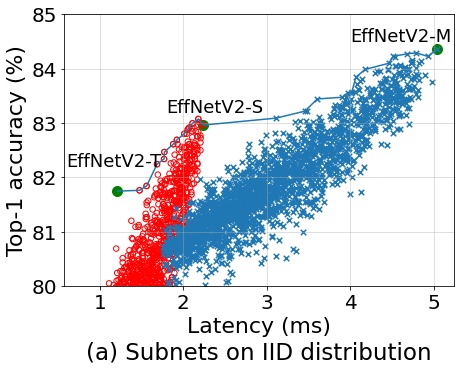

In [14]:
lat2s = [lat2s[i]/0.032 for i in range(len(lat2s))]
lat1s = [lat1s[i]/0.032 for i in range(len(lat1s))]
import copy
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
acc2s_bk = copy.deepcopy(acc2s)
acc1s_bk = copy.deepcopy(acc1s)
plt.annotate('EffNetV2-M', (4.0, 84.5), fontsize=18)
plt.annotate('EffNetV2-S', (1.8, 83.2), fontsize=18)
plt.annotate('EffNetV2-T', (0.6, 82.2), fontsize=18)
# scatter original models
plt.scatter(lat2s[:1]+lat1s[:1]+[0.03875/0.032], acc2s[:1]+acc1s[:1]+[ 81.744],  c='g', s=100, label='original DNN')

curve1x, curve1y = get_extreme_points(lat1s, acc1s, 50)
curve2x, curve2y = get_extreme_points(lat2s, acc2s, 50)
# get the curve of effim that is above effis
endpoint=0
for i in range(len(curve1x)):
    if curve1y[i] >= acc2s_bk[0]:
        endpoint = i
        break
curve1x, curve1y = curve1x[endpoint:], curve1y[endpoint:]
# get the curve of effis that is above effit
for i in range(len(curve2x)):
#     print(curve1y[i], acc2s_bk[0])
    if curve2y[i] >= 81.744:
        endpoint = i
        break
curve2x, curve2y = curve2x[endpoint:-1], curve2y[endpoint:-1]
'''get overall trade-off of adative effim+effis+effit'''
curvex =[0.03875/0.032]+curve2x + curve1x
curvey = [81.744]+curve2y+curve1y
plt.plot(curvex, curvey)
# plot subnets of effim
# plt.scatter(curve1x, curve1y, c='blueviolet')#, marker='*', s=50)

plt.xlabel('Latency (ms)', fontdict={'size':22})#,fontdict={'family' : 'Times New Roman', 'size'   : 22})
plt.ylabel('Top-1 accuracy (%)', fontdict={'size':22})#,fontdict={'family' : 'Times New Roman', 'size'   : 22})
plt.grid(True, alpha=0.5)
plt.scatter(lat2s[1:], acc2s[1:], marker='o', s=30, c='none',edgecolors='r', label='EfficientNetV2-S subnet')
# plot subnets of effis and trade off points of effis
plt.scatter(curve2x, curve2y, marker='o', s=30, c='none',edgecolors='r')
# plt.scatter(lat2s[1:], acc2s[1:], c='r', marker='*', s=5)
plt.scatter(lat1s[1:], acc1s[1:], marker='x', s=30, label='EfficientNetV2-M subnet')
plt.tick_params(labelsize=12)
plt.title('(a) Subnets on IID distribution', y=-0.29,fontdict={'size'   : 23})#,fontdict={'family' : 'Times New Roman', 'size'   : 25})
plt.ylim(80,85)
# plt.yticks(fontproperties = 'Times New Roman', size = 20)
# plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.xticks(size=20)
plt.yticks(size=20)
# plt.xlim(0.02, 0.181)
# plt.legend( prop={'family' : 'Times New Roman', 'size'   : 15})#['original DNN models', 'trade-off curve', 'AdaptiveNet subnets'], prop={'family' : 'Times New Roman', 'size'   : 15})
# plt.legend(bbox_to_anchor=(0,1.05),ncol=3, loc=3, borderaxespad=0, prop={'family':'Times New Roman','size':AXSIZE})

plt.savefig('D:/scientific_work/project1/paper/figs/iid.png',bbox_inches='tight')
plt.show()

In [15]:
acc1s, lat1s = [84.77648012281857, 83.42730570626844, 79.78252118986747, 79.39991949836525, 83.6085380864537, 80.80950467758394, 83.40716880586326, 84.51469998738, 77.34595251678701, 79.74224732145878, 78.81594848325547, 82.56141767989615, 79.44019331146622, 78.25211439927739, 83.52799036807222, 77.66814342718475, 79.25896096815278, 78.81594850169138, 79.76238425873576, 80.00402741388021, 79.92347972622525, 78.13129284321374, 84.07168753320921, 79.68183652191838, 81.8767620152732, 78.99718083885952, 81.5142972917745, 80.70882003421607, 81.03101090774199, 80.00402743231612, 78.91663315120456, 84.35360454447175, 83.34675800632287, 78.81594848325547, 79.17841323748068, 79.58115189698643, 78.93677003931913, 78.59444224080683, 79.46033029176034, 83.91059207801035, 80.9907370454786, 83.04470402091154, 80.72895694691185, 81.8968989586955, 81.65525580355106, 80.06443820727529, 81.69552965966915, 80.4873137610409, 80.91018932709711, 78.15142974361892, 80.44703992950403, 78.95690698888673, 81.3934756681125, 80.30608137471033, 83.80990742849718, 83.2863472067825, 80.84977850912081, 83.7897705096561, 80.12484901296098, 83.74949662895679, 82.68223925439571, 80.48731381020333, 79.01731777613652, 78.91663316349516, 80.56786149785829, 80.36649219883193, 79.6616996030773, 78.59444225924274, 79.74224729687755, 81.95730977667179, 81.69552965352385, 77.84937578893408, 80.9101893148065, 79.74224729073225, 82.19895292567092, 81.79621429689172, 80.12484901296098, 78.49375759129364, 83.46757958696774, 80.26580751859225, 80.76923083375645, 82.90374551528028, 78.9770438892919, 81.19210639366737, 79.19855020548421, 81.99758357748215, 80.97060009591098, 77.58759569651265, 81.8767620275638, 79.50060414173312, 80.66854614122616, 81.03101092003259, 80.24567058746055, 79.39991949836525, 79.31937176154786, 78.17156671162243, 79.27909791157508, 80.89005238982011, 80.24567059360585, 78.49375761587487, 78.2521144177133, 78.23197749272691, 82.03785746432676, 81.51429726719329, 79.9637535454715, 82.48086997995058, 82.68223929741283, 79.23882403087578, 80.76923079688464, 80.00402743231612, 81.91703587753659, 80.9303262520835, 79.98389048889382, 81.27265408746763, 78.211840537014, 78.6548530403472, 82.25936373135663, 80.93032627051942, 80.72895694691185, 79.46033030405094, 81.69552964737854, 78.89649622621816, 81.65525575438863, 84.93757555958152, 81.8566250902868, 79.641562659655, 83.08497788317493, 78.91663312662334, 81.25251716248124, 78.97704393230904, 85.078534089794, 80.16512286907907, 79.72211037803646, 81.29279103703524, 77.8695127507923, 81.67539268552032, 81.05114781429246, 79.88320585781655, 80.08457512611638, 79.78252115299564, 78.93677007619095, 82.94401938983427, 78.35279906722647, 78.69512691490121, 80.9706001327828, 78.83608537751535, 81.27265406288642, 81.69552962279732, 79.09786552524452, 79.17841326206191, 84.75634319783217, 81.29279104318054, 78.17156666860531, 79.86306889595834, 77.52718488468166, 79.01731775770061, 79.88320583938064, 80.46717684834512, 79.39991949221995, 81.17196941951855, 80.12484902525159, 82.2996375690388, 83.14538868271532, 82.01772053934036, 81.17196945639037, 80.66854617809798, 79.48046721060143, 83.04470403934745, 79.27909790542978, 79.50060414173312, 79.72211034116465, 79.62142568550617, 83.76963354165257, 81.23238023749485, 82.7426500600814, 80.14498594409268, 81.03101088316076, 82.48086997380527, 82.86347165301689, 78.53403145355703, 81.55457110487546, 83.04470402091154, 83.2460733506644, 80.0845751629882, 79.9637535331809, 79.80265809641794, 78.05074511254165, 80.42690299222703, 82.03785746432676, 81.61498192285175, 81.59484499172007, 82.29963759362002, 80.02416435730251, 81.67539267322972, 81.3330648501362, 80.4671768114733, 80.5275876294496, 79.46033026717912, 80.10471206953868, 78.71526382145169, 80.54772456058129, 77.88964963276156, 83.20579945152919, 80.58799841055408, 78.47362065401664, 79.50060415402373, 77.10430930633484, 83.32662104446466, 80.62827227896277, 84.87716477847704, 79.86306890210363, 78.55416835396221, 79.1985501870483, 79.33950868038895, 85.13894487089847, 80.38662911152772, 81.93717280866828, 76.8626661511904, 79.70197344690477, 81.99758359591806, 80.66854613508086, 79.44019336062864, 80.44703991721342, 79.33950870497016, 83.80990739777066, 79.6012888096822, 81.19210634450494, 82.58155460488254, 81.43374951193998, 79.6415626780909, 79.62142568550617, 81.47402339263928, 80.99073707620511, 81.23238021291364, 78.29238826768609, 79.52074107286482, 79.158276306349, 78.75553768986039, 78.7756746517186, 80.42690299222703, 80.22553363174764, 82.64196539827762, 83.52799038036284, 81.81635123416872, 78.03060813839284, 79.44019334833803, 85.60209429307278, 81.0108739889009, 79.37978254879765, 81.59484498557477, 83.16552560155641, 78.85622233322826, 84.03141364636461, 83.30648411947827, 80.70882001578016, 81.81635122802341, 80.28594446201456, 82.96415631482067, 79.01731780071773, 78.83608540824187, 80.18525976333895, 83.99113980868243, 81.4337495488118, 80.82964160871563, 81.51429723032146, 80.62827227281747, 80.08457514455229, 80.5275876417402, 81.31292794973102, 79.72211039032707, 78.83608537137005, 80.18525981864668, 80.18525982479198, 81.19210634450494, 78.93677005775504, 81.85662511486801, 84.91743862230452, 80.5477245790172, 81.4538864922341, 83.36689492516396, 79.52074109130072, 81.75594045306424, 79.84293197711725, 80.9907370454786, 78.35279904879056, 80.04430131916072, 80.95046320779642, 82.07813131429954, 79.50060415402373, 83.48771649966353, 83.58840119219383, 80.60813538470289, 79.44019333604743, 81.49416032991628, 80.52758760486837, 80.74909387189824, 83.10511483274253, 80.26580753088285, 80.20539673134246, 79.78252119601277, 79.74224730302286, 80.58799842284468, 78.29238826768609, 82.86347166530749, 80.62827229125338, 82.54128076105506, 78.41320986062156, 80.64840922238507, 80.58799842284468, 81.31292794358572, 79.29923481198026, 84.73620626055518, 77.54732183424926, 81.71566657236494, 79.19855016861239, 77.99033428227474, 80.9504632016511, 80.34635524926433, 79.84293197097195, 82.09826827001245, 79.74224733374938, 82.15867906340753, 79.03745470726821, 79.6616996030773, 78.2118405308687, 81.69552965966915, 82.09826826386715, 78.29238824925018, 79.66169959078668, 80.32621829969672, 82.86347165301689, 80.22553368091008, 79.42005643564225, 79.0575916322546, 81.65525574824333, 79.1180024563762, 84.87716477233174, 84.01127675210475, 79.23882404931169, 78.55416836625282, 82.7023761793821, 79.5006041048613, 81.31292791900451, 80.42690296764582, 78.79581153368787, 81.97744668322228, 79.1180024440856, 80.58799844742589, 81.67539271624685, 80.36649219268664, 78.1715666440241, 84.6355215987514, 84.29319374493136, 79.72211039647237, 78.95690701346795, 79.05759168141704, 82.76278698506779, 81.49416031762567, 82.42045914353837, 80.16512285064316, 82.44059609925128, 81.11155864455937, 80.5275876417402, 79.76238424029987, 78.59444225309743, 83.06484095818854, 84.49456308082952, 78.1514297374736, 84.25291990724918, 84.41401535630274, 85.48127270628261, 78.05074510025105, 78.09101896251444, 79.13813939979852, 80.26580751244694, 78.61457915964792, 79.198550180903, 84.75634318554157, 83.6689488859941, 81.19210635679555, 83.6890858294164, 83.74949662281149, 80.0845751691335, 79.1985501870483, 80.26580753702815, 82.38018530585619, 83.48771652424475, 81.83648818988162, 80.50745072904442, 80.00402743231612, 78.97704394459964, 82.07813130200893, 77.60773258462723, 79.50060412944251, 81.19210636908615, 80.91018933938771, 79.66169956006017, 82.25936374364723, 80.56786150400359, 82.56141768604145, 81.43374950579468, 82.44059611154188, 82.7426500477908, 80.26580754931877, 77.14458318703414, 85.0181232718177, 79.44019334833803, 79.07772858796751, 82.25936372521132, 79.29923484885208, 77.34595251678701, 83.2460733445191, 80.5074506983179, 83.00443017708406, 84.35360454447175, 85.0986710147804, 80.64840921623977, 80.80950467758394, 80.4671768421998, 84.29319377565787, 78.6347160969249, 79.05759165683583, 79.98389049503912, 80.5477245728719, 80.4873137548956, 84.55497387422461, 79.9234796647722, 80.22553369934599, 82.46073304881888, 79.50060414787842, 84.11196139547262, 79.50060414787842, 81.85662507185089, 80.9504631832152, 78.3125252111084, 79.25896094357157, 84.07168752091862, 79.68183651577307, 82.17881596995802, 83.52799037421754, 80.12484903139689, 78.2319774804363, 81.81635124031402, 85.21949260157056, 79.11800241335908, 80.02416436959312, 78.53403142283052, 79.6415626780909, 84.79661704780496, 80.36649220497725, 78.85622233322826, 79.42005644178755, 80.9706001082016, 81.53443422290619, 79.44019331146622, 81.2927909940181, 79.90334277051234, 80.82964156569851, 81.23238022520424, 84.49456309312014, 77.68828033988052, 81.3733387369808, 81.47402339263928, 79.68183647275595, 79.98389049503912, 80.70882002192546, 81.93717283324949, 80.93032626437412, 79.62142572852329, 83.18566255112401, 78.31252519881778, 83.1856625388334, 77.44663715400957, 77.46677405441474, 79.76238424644517, 82.80306087191241, 81.17196943795446, 78.07088204367335, 79.05759168756234, 82.62182846714593, 78.47362063558074, 81.69552963508794, 83.83004434733827, 78.35279907951708, 79.2186871243253, 79.21868711817999, 79.21868708745347, 80.06443820727529, 83.04470402091154, 78.09101895636913, 81.15183251911337, 80.82964157798912, 78.89649621392756, 79.82279502754965, 79.03745473184942, 82.52114381763275, 79.56101497814534, 81.85662509643211, 83.02456711436105, 78.27225133655439, 82.6822392421051, 82.94401938983427, 83.87031821574696, 83.52799038650814, 77.97019735114304, 81.07128478844129, 79.54087799785121, 80.24567059975116, 81.47402339263928, 83.02456710207045, 82.84333472803048, 78.87635927050526, 79.5408779917059, 80.4470398987775, 81.8968989709861, 80.18525980021077, 85.36045111949242, 81.0310109323232, 79.46033029176034, 80.9907370516239, 84.17237215814119, 80.76923083990177, 81.8767620337091, 79.52074106057421, 80.16512283835256, 82.64196539827762, 79.76238422186395, 80.9101893148065, 83.3064841502048, 84.6556585421737, 82.40032221855198, 80.28594443128803, 82.44059610539658, 79.86306892053955, 80.76923082146585, 82.11840520728946, 83.64881197329831, 80.02416435730251, 80.74909389033415, 84.01127675210475, 78.77567462713739, 80.04430130687011, 81.61498189827054, 81.51429727948388, 83.12525174543832, 82.72251316582152, 79.84293197097195, 81.31292794358572, 80.46717684834512, 79.74224730916816, 79.05759165683583, 83.04470402705684, 79.29923483041617, 81.31292794358572, 80.36649214966951, 82.19895291338032, 83.64881196100771, 80.9504631832152, 77.56745878381687, 77.00362465682166, 81.8767620275638, 77.7486911148397, 79.39991949221995, 79.29923481198026, 84.35360454447175, 79.01731778228182, 83.64881196100771, 80.44703992335872, 83.83004435348357, 81.93717279637767, 81.95730973365467, 77.66814342103943, 83.00443014635754, 78.47362066016196, 81.3934756681125, 84.29319375722196, 77.8091019389613, 79.33950867424365, 78.17156669318652, 81.8364881345739, 79.42005641106104, 77.78896501397492, 81.29279100016342, 79.90334277051234, 77.7084172402857, 84.03141368323644, 83.87031823418288, 83.10511480201602, 79.48046724132794, 79.42005641720634, 77.97019736957895, 78.39307292334456, 82.94401937754367, 80.30608139929154, 81.53443419832497, 81.03101091388729, 78.43334677331735, 81.79621429689172, 80.40676605495003, 79.0777285695316, 81.51429727948388, 81.73580352193254, 80.38662912381834, 79.9637535331809, 80.93032627051942, 82.11840518885354, 82.09826828844837, 81.15183250067746, 80.86991546483372, 80.36649218039602, 82.46073304881888, 80.0443012822889, 80.72895691618534, 80.66854614122616, 85.0382602275306, 77.14458320547004, 83.2057994761104, 81.01087398275558, 78.6548530034754, 80.91018933324241, 82.7225131228044, 78.55416838468874, 78.2521144177133, 79.60128877895569, 78.65485305878312, 78.93677004546443, 80.74909396715046, 79.88320585167125, 81.23238023749485, 80.32621831198733, 79.35964564224716, 79.33950870497016, 79.58115187855051, 82.98429322751645, 80.30608140543686, 82.80306087191241, 81.21224329407255, 83.6689488921394, 81.07128478844129, 79.72211036574586, 81.05114786345489, 83.74949661666618, 82.3197745001705, 80.78936776488815, 80.66854617809798, 80.02416436344781, 79.5811518724052, 79.09786547608209, 80.24567056287934, 78.35279906722647, 81.91703588368189, 81.4538864860888, 84.31333069449896, 80.4873137487503, 82.68223924825041, 82.50100689264636, 78.211840537014, 81.61498192899707, 83.80990742235187, 78.47362063558074, 80.12484897608917, 80.4269029615005, 83.87031822803758, 80.12484896994386, 79.13813935678138, 81.59484496713885, 79.50060415402373, 82.52114384221397, 79.76238421571864, 79.5610149289829, 79.72211037803646, 79.58115187855051, 80.02416435115721, 81.73580352193254, 82.11840520728946, 80.8900523652389, 79.96375356390742, 81.41361258695359, 79.1381393936532, 78.6548530280566, 84.25291991339448, 83.99113978410122, 81.25251717477185, 83.42730569397784, 79.92347975080646, 81.19210638752206, 80.28594446201456, 84.15223527002661, 84.79661705395026, 82.42045918041019, 79.21868709359877, 83.40716880586326, 80.76923080302994, 80.32621831198733, 82.66210231711871, 79.09786552524452, 83.83004435962887, 82.68223925439571, 79.76238421571864, 81.8767620337091, 79.33950870497016, 80.22553365018355, 80.54772454214537, 82.27950068092423, 80.62827230968928, 79.0978655068086, 81.05114783887367, 80.44703992950403, 78.95690696430552, 76.94321384499067, 79.72211037803646, 80.0443012822889, 81.75594043462833, 83.22593638880619, 83.68908579868987, 80.38662912996364, 80.42690297993641, 78.59444225309743, 80.9706001266375, 80.89005241440132, 80.66854614122616, 79.03745472570412, 78.35279903035466, 82.96415629023944, 81.49416031148037, 82.15867906340753, 80.72895695920246, 80.5074507044632, 78.89649622007286, 79.90334272749521, 80.58799841669938, 81.09142170728236, 79.72211034116465, 81.93717280866828, 81.23238021905894, 82.72251314124031, 80.14498591951147, 81.21224330021785, 81.47402342336581, 82.68223927897692, 82.19895292567092, 84.83689091006835, 84.61538464918378, 79.64156263507377, 77.809101932816, 78.3326621545307, 79.54087801014181, 81.67539272239215, 80.56786149171299, 78.91663313276865, 80.40676604265941, 78.83608542053247, 79.1180024563762, 83.20579950683693, 77.68828033988052, 81.99758361435397, 80.89005241440132, 84.33346762563066, 78.51389451628005, 82.74265007237202, 82.66210231711871, 78.99718085729543, 79.29923484270677, 80.78936772801633, 84.25291988881327, 79.92347969549873, 80.06443819498469, 81.73580348506071, 81.53443419832497, 81.69552964123324, 79.37978256723356, 78.73540078945521, 81.31292794358572, 80.50745068602728, 77.22513091770622, 80.0845751568429, 79.25896098658869, 80.12484901296098, 78.35279904879056, 79.54087799785121, 78.47362067245255, 80.60813536012168, 85.48127270628261, 80.30608139929154, 80.14498590722086, 81.83648816530041, 81.93717282710419, 83.48771651195413, 80.66854615351677, 79.70197344075947, 78.77567462099208, 82.42045914968367, 81.13169555725516, 84.71606932327818, 81.93717280252298, 81.83648812228328, 81.33306488086272, 81.43374952423059, 81.57470807902428, 81.09142171342768, 80.9504632016511, 81.41361258080829, 83.34675801246819, 84.31333068220836, 78.73540075872869, 79.60128877895569, 79.05759166298112, 81.99758360820867, 80.08457514455229, 82.68223927283162, 78.57430531582042, 78.69512690261061, 78.99718086344073, 77.86951268319396, 81.57470804829777, 81.29279104932584, 80.38662911767302, 84.57511082379222, 80.04430125770769, 82.3399114374475, 79.37978254879765, 81.3330648378456, 83.80990739162536, 78.15142977434543, 80.70882000963485, 82.62182849172714, 81.01087396431969, 79.03745474414004, 83.46757958696774, 79.1180024502309, 80.99073708849572, 83.6689488982847, 80.38662914225424, 79.80265810870856, 82.25936372521132, 81.05114782658308, 79.90334272749521, 79.1985501870483, 78.1715666808959, 79.42005641106104, 79.68183652806368, 81.93717279637767, 83.42730573084967, 83.66894891672061, 79.76238422800925, 84.03141366480052, 79.01731780071773, 80.82964162100625, 78.6548530403472, 79.05759165683583, 80.5074506983179, 83.00443018322936, 79.72211039032707, 82.98429324595236, 80.22553363789295, 79.33950868038895, 80.60813533554047, 77.2251308869797, 75.4933548280898, 80.26580753702815, 82.09826825157654, 80.24567055673404, 81.21224328792724, 79.29923482427087, 81.8968989709861, 80.36649218654134, 82.05799438316785, 82.72251314738563, 81.37333877385262, 80.9907370516239, 80.16512284449786, 82.2795006379071, 79.60128876666508, 78.71526381530639, 83.64881196715301, 81.81635124645932, 80.42690296764582, 78.69512687188409, 77.95006045688318, 81.23238024364015, 80.4873137610409, 83.34675800632287, 79.03745473184942, 81.33306488086272, 84.79661704165966, 79.46033029176034, 81.8566250902868, 82.17881600068453, 80.38662912996364, 78.97704395074494, 81.3733387308355, 78.59444223466151, 78.97704392616373, 78.1312928001966, 80.62827227896277, 79.37978255494295, 83.32662108133648, 80.9101893086612, 77.8695127385017, 81.23238025593076, 79.1784132497713, 79.05759165683583, 80.36649217425072, 81.39347571112962, 82.56141768604145, 80.30608138085564, 84.87716476004113, 80.62827229125338, 81.23238024364015, 79.44019336677394, 79.5610149289829, 78.69512687188409, 78.53403142897582, 80.14498591336617, 80.0443012822889, 82.40032220626136, 81.27265408132233, 80.56786149171299, 79.33950870497016, 78.81594844638366, 81.13169555110986, 79.35964559308474, 83.32662107519118, 82.15867904497162, 79.90334275207643, 79.68183651577307, 80.50745072904442, 81.09142170728236, 84.69593238600118, 82.96415629023944, 84.03141365865523, 78.67498998991482, 79.178413243626, 79.62142575924982, 78.97704392001843, 80.54772452370946, 80.42690297379112, 83.64881197329831, 80.26580754931877, 80.04430129457951, 77.56745876538096, 81.05114785730959, 79.88320583938064, 80.56786149171299, 78.97704392616373, 78.79581152754257, 79.76238424644517, 80.38662912381834, 81.55457111716606, 80.4873137610409, 80.28594449274107, 79.11800247481212, 81.57470802371654, 82.15867905726223, 82.54128074876445, 83.83004436577419, 80.60813534783107, 78.73540074643809, 83.46757959311306, 82.60169156059544, 81.0108739950462, 84.79661702936905, 84.37374150632996, 81.39347568040311, 85.32017723879314, 83.16552563228292, 80.9706001327828, 85.5215465746913, 78.95690699503204, 80.10471208182929, 82.25936372521132, 83.87031822189226, 83.26621023877897, 79.88320584552595, 78.67498993460708, 77.64800648376243, 80.22553365632885, 78.29238827997669, 81.19210635679555, 84.21264604498579, 79.35964563610186, 80.10471205724808, 80.32621833656854, 79.80265807798203, 82.86347162229036, 79.84293196482665, 80.74909384117173, 83.80990741006127, 81.05114784501897, 80.62827222980033, 81.55457113560198, 77.48691100398236, 81.43374952423059, 81.63511884169284, 79.39991949836525, 79.62142572852329, 81.05114783272838, 83.06484097662444, 78.87635924592404, 80.54772459745311, 79.48046719831082, 84.45428921856613, 84.87716476618644, 78.17156666246, 84.37374150018465, 82.64196542285885, 82.15867905726223, 80.26580750015634, 82.94401938983427, 82.31977451860641, 81.37333874312611, 82.48086993693346, 81.45388647379819, 83.14538868271532, 83.95086594641904, 82.42045914968367, 82.31977448787988, 77.16472014889236, 84.45428921242083, 80.16512285678847, 79.6012888096822, 80.16512286293377, 79.54087800399651, 78.49375757900305, 80.5275876417402, 83.1453886581341, 79.62142571008738, 82.54128077949098, 79.58115187855051, 78.75553769600569, 81.3733387246902, 79.50060414787842, 82.88360859029387, 80.78936775259754, 80.38662911767302, 82.40032222469728, 81.45388640619986, 78.45348371673965, 82.50100687421045, 79.25896098658869, 81.4337495426665, 80.08457513840699, 80.54772456058129, 81.47402339263928, 78.47362066016196, 80.38662912381834, 82.92388247099318, 82.38018529971089, 82.68223924825041, 79.2388240677476, 78.33266212994948, 80.14498595023798, 81.19210633835964, 83.76963356008848, 79.39991949836525, 78.81594848940078, 79.74224730302286, 78.81594845867426, 79.15827629405838, 81.45388645536228, 81.13169556340046, 79.84293194639073, 83.66894886141289, 80.5477245851625, 80.0443012761436, 80.00402742617081, 78.45348372903025, 80.28594441899743, 81.77607735961472, 79.21868709974407, 84.11196139547262, 80.32621833042325, 80.40676604880473, 79.03745475643065, 79.70197347148599, 79.9637535208903, 79.68183652191838, 83.78977049122018, 80.02416432657598, 78.45348372903025, 79.56101495356413, 79.6415626719456, 81.0108739950462, 83.08497788932023, 79.39991951680116, 79.42005643564225, 83.2863472313637, 78.59444222237092, 81.55457109258485, 80.0241643388666, 81.51429724875737, 81.03101090159667, 78.71526379687047, 81.27265411819415, 78.55416836625282, 81.53443420447029, 79.56101494741881, 80.80950466529333, 82.09826827615775, 81.23238023749485, 78.97704393230904, 81.3934756619672, 80.60813535397638, 83.89045512229744, 80.30608140543686, 81.55457111102076, 78.87635930737707, 78.93677005775504, 84.51470001196122, 82.33991138828506, 81.13169557569107, 78.83608540209656, 80.38662911767302, 81.4136125992442, 83.83004435962887, 81.37333871239959, 77.285541704956, 80.54772456672659, 78.11115589979143, 79.19855012559526, 78.15142976205482, 79.78252118986747, 80.74909385960764, 82.13854215071176, 80.58799842898998, 80.60813536012168, 80.95046320779642, 81.07128479458659, 79.09786551909922, 80.5074506921726, 82.05799442003966, 80.40676603651411, 80.84977854599263, 80.38662910538243, 81.83648816530041, 79.82279502754965, 80.32621833042325, 83.50785343079522, 79.25896096815278, 78.39307294792577, 84.05155060207753, 83.50785345537645, 85.09867100248978, 79.6818365526449, 81.67539274697336, 81.07128477615068, 79.15827628791308, 80.93032628281003, 79.29923481198026, 81.17196942566385, 83.89045514073335, 82.11840518885354, 84.33346761948535, 78.97704393845434, 79.42005643564225, 80.74909388418885, 81.57470802986185, 80.16512287522438, 81.27265411204884, 84.49456308082952, 78.09101893178791, 80.97060014507342, 80.5074507044632, 81.85662510257741, 82.54128073032854, 80.16512287522438, 78.2923882922673, 79.92347967091752, 82.29963757518411, 79.09786553138981, 84.1119613770367, 80.32621832427795, 81.17196945639037, 78.79581152754257, 80.62827229739868, 81.09142169499177, 84.79661706009557, 78.65485302191131, 79.46033026717912, 79.60128881582752, 83.85018129076057, 82.38018528127498, 81.55457116018319, 80.60813536626698, 78.77567463328269, 79.44019334219273, 79.13813937521729, 79.09786546379148, 79.80265813943507, 81.63511885398346, 81.91703585910068, 78.93677007619095, 79.09786551909922, 82.52114383606866, 81.0108740011915, 80.70882001578016, 78.33266209922296, 79.96375356390742, 81.51429723032146, 79.35964561766595, 79.25896094357157, 79.90334275822173, 79.88320583323534, 79.17841323748068, 79.84293197711725, 82.66210233555462, 79.58115189084111, 83.2259364133874, 79.37978256108825, 77.00362467525757, 79.92347973851585, 79.29923481198026, 79.84293195868133, 79.54087800399651, 80.72895695305715, 83.26621025721488, 83.95086595256436, 80.5879984535712, 84.07168752706392, 82.48086993693346, 80.4873137794768, 78.2118405247234, 80.76923077230342, 80.0845751691335, 79.92347970164403, 80.20539673748777, 79.5811518724052, 79.98389049503912, 81.47402338034867, 79.15827629405838, 81.39347568040311, 81.15183250067746, 78.93677008848155, 84.29319375722196, 83.83004435348357, 80.18525978177486, 78.85622233322826, 79.11800246866682, 79.1784132559166, 80.36649214966951, 84.05155060207753, 81.67539268552032, 80.28594446815985, 79.27909791772038, 83.62867501758541, 78.5743052605127, 79.9838904643126, 81.8566250841415, 78.91663315734986, 79.70197347148599, 79.90334277665764, 79.76238425873576, 79.96375356390742, 82.96415630867536, 80.64840923467568, 78.2118405247234, 80.16512288751498, 78.39307294178047, 80.1449859625286, 78.3125252172537, 79.66169956620547, 81.09142167655585, 81.55457109873015, 78.33266211765887, 84.6153846553291, 79.15827632478491, 80.20539676821429, 79.11800248710273, 81.21224329407255, 80.62827228510807, 81.4337495426665, 80.26580753702815, 83.10511481430662, 79.09786551909922, 82.17881600068453, 78.63471612150613, 79.33950869267956, 81.17196945024506, 78.77567460870148, 81.33306487471741, 82.54128071803792, 84.35360456290765, 80.16512287522438, 79.72211040261769, 80.42690299222703, 82.88360860258449, 78.95690701961325, 80.58799841055408, 81.07128472084294, 84.43415228743444, 83.32662103831936, 81.65525579740576, 80.62827226667216, 79.56101493512821, 79.11800242564969, 81.47402339263928, 80.4873137610409, 84.534836924657, 84.55497384964339, 81.13169555725516, 79.6214257162327, 78.93677007004564, 83.1856625388334, 79.66169956006017, 80.89005240211073, 83.5682641996091, 78.67499000220543, 83.83004434733827, 79.84293198326256, 77.66814339031292, 84.23278297611748, 80.89005238367481, 80.44703992950403, 80.89005238367481, 81.7760773473241, 79.1381393629267, 81.05114785730959, 79.82279503369494, 80.50745066759139, 79.70197344690477, 80.62827225438156, 80.70882002807076, 80.9504631893605, 78.85622230250173, 79.54087802243242, 77.8493758012247, 80.38662909309181, 80.18525981864668, 81.45388647994349, 78.1917035935917, 80.12484896379856, 80.76923079688464, 84.35360452603584, 80.58799842284468, 78.89649618934635, 80.74909389647947, 77.26540478611491, 81.23238021905894, 79.98389048889382, 79.84293195253603, 79.76238426488108, 79.27909787470325, 80.06443823185651, 81.63511884783816, 77.62786953419483, 81.4136125992442, 80.62827228510807, 81.65525580969637, 82.8231978030441, 80.34635523082842, 80.4873137610409, 77.265404767679, 81.4941603606428, 83.40716879357267, 79.0978655129539, 81.89689894640489, 81.4337495426665, 79.76238425873576, 78.69512690261061, 84.05155059593223, 80.82964159027972, 82.46073303652828, 84.575110799211, 78.191703599737, 80.70881999119894, 80.20539674977837, 80.24567058131525, 82.01772055777627, 80.86991545868841, 85.01812329025361, 80.76923080917524, 80.66854612893555, 79.03745472570412, 79.54087803472304, 81.4941603422069, 79.82279504598556, 82.98429325209766, 81.61498191670645, 80.16512286293377, 82.36004835014327, 84.29319378180318, 80.7893676911445, 85.68264201759956, 80.10471208797459, 78.73540085398089, 80.76923079688464, 82.68223926668632, 80.64840924082098, 82.42045916197428, 81.77607737805063, 85.32017725722903, 81.4136126176801, 80.08457515069759, 82.86347164072627, 77.38622637290509, 85.17921875159777, 81.21224330636315, 79.90334277665764, 79.33950871111547, 80.14498593180207, 84.45428920627552, 79.01731777613652, 79.42005639877043, 83.14538866427941, 81.8767620337091, 80.14498594409268, 80.70882003421607, 80.50745074133502, 83.06484095818854, 78.6145791535026, 82.2996375628935, 81.59484500401066, 81.47402338034867, 79.19855014403117, 79.82279506442147, 80.44703992950403, 82.15867905111693, 78.6548530342019, 79.6818365403543, 83.70922276054809, 82.60169154830484, 81.07128475771476, 79.68183652806368, 79.1784132497713, 80.48731379176742, 82.6218284302741, 80.40676606109533, 78.95690696430552, 84.29319378180318, 80.24567061818708, 80.76923077844873, 79.56101494127351, 78.83608538980596, 79.05759165069051, 81.65525577896985, 83.02456710821575, 82.96415630253006, 78.77567457182965, 83.06484096433384, 79.33950871111547, 78.6347160907796, 85.23962953884757, 79.5207410482836, 82.86347165916219, 84.39387843131635, 80.5477245790172, 78.35279905493587, 83.00443018322936, 85.50140964970491, 81.35320183043032, 80.18525979406546, 79.6012888096822, 80.4671768421998, 80.48731379791272, 83.91059208415565, 78.211840537014, 79.09786546993678, 78.81594847096487, 80.1449859686739, 81.49416032991628, 81.25251716862654, 79.39991946763874, 77.97019738186957, 83.04470402705684, 80.89005241440132, 79.78252119601277, 81.71566656621962, 80.1449859625286, 83.97100285296953, 83.7293597039704, 80.0241643327213, 83.56826422419032, 83.78977050351078, 83.02456710821575, 79.94361662663043, 79.52074108515542, 78.79581155826908, 80.52758761715899, 80.34635524926433, 78.17156666246, 78.95690701346795, 78.2319774804363, 82.1184051335458, 78.83608542053247, 82.58155461717314, 85.60209430536338, 80.64840920394916, 82.2996375813294, 84.67579546716009, 81.9774467078035, 79.82279504598556, 77.58759567193144, 79.13813935678138, 79.62142573466859, 77.84937575206227, 80.68868306006725, 81.19210631377842, 80.08457515069759, 83.3064841502048, 80.50745072289911, 83.26621025721488, 80.00402742002551, 79.03745471955882, 83.64881197329831, 79.98389050118442, 82.19895293181624, 81.4337495488118, 84.15223521471887, 81.53443419217967, 80.04430125156239, 81.43374953037589, 79.1381393936532, 82.66210232326402, 82.88360859029387, 81.71566654778371, 79.78252117757685, 82.01772052704976, 82.70237619167271, 79.6818365403543, 81.39347568654841, 79.27909791157508, 84.37374149403935, 78.35279906722647, 81.87676200912789, 83.10511483274253, 84.01127673366884, 82.54128073647384, 78.75553770215099, 80.4671768237639, 79.9838904643126, 81.63511886012876, 81.89689892796898, 84.5146999750894, 78.09101898095035, 82.44059608081537, 80.08457515069759, 79.76238427717168, 78.51389448555352, 78.27225131811848, 78.43334677946265, 80.18525978792016, 81.03101090774199, 80.91018935167833, 82.52114379305154, 80.40676608567655, 81.55457110487546, 82.58155459873723, 77.52718488468166, 82.2795006440524, 80.74909387804355, 78.51389451013473, 82.70237621625392, 80.78936775259754, 82.50100689879167, 80.60813534783107, 79.84293200169846, 81.69552963508794, 80.34635524926433, 78.95690695816022, 79.98389051347503, 81.71566656007433, 81.17196942566385, 78.03060817526465, 81.57470807287898, 78.59444226538804, 82.52114378076094, 80.46717685449042, 81.35320179970381, 82.15867906340753, 82.50100689879167, 84.31333068835366, 79.98389047045791, 77.56745875923565, 81.69552962894264, 80.76923079073933, 78.6145791473573, 79.84293200784377, 81.71566656621962, 79.66169958464138, 79.31937177998377, 82.3600483808698, 83.10511483274253, 80.18525982479198, 81.63511883554754, 80.04430130687011, 81.4538864615076, 82.23922677564371, 82.21908983836671, 79.641562659655, 79.21868711817999, 79.70197345919539, 80.02416432657598, 81.67539269166564, 78.83608542053247, 83.85018127232466, 77.97019737572425, 79.01731778228182, 80.76923080917524, 82.7225131166591, 83.80990742235187, 79.6012887973916, 80.14498594409268, 78.55416838468874, 81.23238021291364, 79.05759165069051, 78.53403144741173, 79.5811518601146, 81.41361259309889, 79.07772857567691, 80.16512285064316, 80.38662911152772, 79.6012888096822, 84.25291991953978, 83.16552563842822, 79.23882403087578, 78.735400764874, 81.25251716248124, 78.93677007004564, 81.93717282095889, 78.21184051243279, 84.03141366480052, 82.46073299965646, 79.66169956006017, 78.27225131811848, 80.74909385346233, 83.72935969782509, 80.10471208182929, 80.16512287522438, 80.64840922853037, 79.46033026717912, 79.84293194639073, 79.07772857567691, 83.87031819731105, 80.56786147942238, 78.43334677946265, 79.70197345305007, 81.15183251911337, 81.95730975209058, 79.52074105442891, 84.11196139547262, 78.11115587521022, 79.88320582094472, 78.99718086958603, 79.52074107901012, 80.08457517527881, 77.14458320547004, 79.6818365464996, 79.27909786855795, 78.27225134269969, 83.50785344308584, 80.30608136241973, 79.37978253650704, 80.62827229739868, 78.37293597992226, 81.27265407517703, 83.2057994638198, 83.36689494974519, 80.66854615351677, 82.2392267633531, 81.97744668322228, 80.46717686678103, 81.09142171957298, 82.52114381763275, 79.37978258566946, 79.5811518662599, 79.54087801014181, 78.07088202523744, 80.06443820112999, 78.21184054930461, 78.75553767756978, 83.56826425491683, 81.13169558798167, 81.79621430303702, 82.42045916811958, 80.24567059975116, 80.28594445586924, 83.628675029876, 84.49456306853892, 80.58799842898998, 83.628675029876, 82.03785742745494, 83.85018129690587, 81.45388644307168, 79.39991945534813, 77.20499401115575, 82.7426500539361, 78.67498999606012, 80.78936774030694, 81.97744664020516, 80.54772456058129, 82.68223926054101, 80.24567059360585, 78.03060816911935, 80.28594448045047, 84.5348369185117, 80.06443820727529, 81.23238023134954, 80.91018934553303, 80.32621831198733, 78.53403141668522, 81.8364881530098, 82.92388244641197, 83.58840117990323, 81.0108740011915, 78.6347160661984, 80.28594443743333, 78.39307291719926, 78.59444222237092, 79.60128877895569, 78.07088203138274, 83.44744263125484, 78.93677007004564, 79.78252120215808, 79.44019336062864, 83.68908584170701, 80.74909390262476, 81.37333875541671, 83.58840117990323, 82.3600483808698, 79.1582763309302, 80.48731376718621, 79.15827631863961, 82.09826824543124, 82.38018530585619, 82.23922676949842, 80.38662913610894, 83.80990743464248, 80.08457513226169, 79.46033029176034, 80.62827224209094, 79.09786552524452, 80.89005238982011, 85.56182043080939, 79.39991949836525, 80.9907370516239, 78.55416838468874, 78.73540075872869, 80.16512284449786, 80.1852598370826, 78.19170361817291, 80.26580747557512, 79.44019334833803, 82.05799442003966, 84.79661702936905, 80.4671768299092, 79.03745472570412, 79.2186871243253, 81.41361257466298, 82.21908984451201, 80.9303262459382, 84.77648009823734, 80.18525981864668, 80.9907370639145, 79.56101494741881, 82.64196539213232, 79.58115188469581, 80.91018935167833, 83.36689492516396, 79.94361662663043, 82.15867902653572, 77.62786951575892, 80.16512285064316, 80.28594447430515, 80.30608138700094, 79.80265811485386, 80.24567058131525, 79.46033029790564, 79.94361665121164, 79.11800246252152, 82.98429323366175, 83.58840117990323, 78.19170362431822, 80.10471207568399, 78.79581155212378, 81.13169555725516, 84.93757555958152, 83.93072900299674, 79.03745472570412, 79.92347967706282, 83.2460733445191, 81.8566250902868, 82.42045916197428, 80.60813535397638, 83.44744262510953, 80.60813535397638, 80.9303262520835, 83.74949659208497, 83.30648414405948, 79.96375358234333, 78.15142976205482, 81.15183249453216, 80.52758766017611, 79.5811518662599, 81.35320177512259, 79.82279502754965, 80.78936775874286, 80.62827230354398, 82.17881596995802, 80.84977852755672, 81.67539273468276, 81.57470806058836, 81.4136126053895, 82.38018528127498, 78.55416837854344, 80.89005235909359, 83.87031820960166, 80.86991548326964, 78.03060818140996, 80.28594446201456, 79.80265813328977, 80.97060009591098, 81.15183251296807, 82.84333472803048, 78.75553770215099, 79.19855016861239, 80.12484901296098, 80.56786147942238, 84.57511081764692, 77.7285541714174, 81.31292796202163, 82.66210234169992, 79.03745470726821, 82.46073301809237, 77.788964995539, 78.71526385832351, 78.61457920266504, 80.28594448045047, 79.56101489825639, 82.54128074876445, 83.18566254497871, 80.4470398987775, 81.03101092003259, 79.09786549451799, 80.70882000963485, 84.27305683838087, 78.43334679789857, 81.15183246995095, 80.5074506983179, 78.2118405308687, 84.05155059593223, 80.5275876417402, 85.01812330254421, 83.50785341850462, 80.36649216196012, 83.2259364133874, 80.24567059975116, 79.72211038418178, 79.58115182324278, 78.03060813839284, 78.47362066630726, 84.05155058364161, 80.38662912996364, 83.30648413176888, 83.95086590340192, 79.5610149289829, 81.33306491158923, 83.06484097662444, 83.38703184400505, 85.21949259542527, 82.78292392234479, 83.87031821574696, 83.16552560770171, 80.06443823185651, 84.69593239214647, 80.9706001082016, 78.55416836625282, 79.42005644178755, 79.31937174311194, 79.70197345919539, 78.51389449169882, 81.73580350349663, 78.37293599835817, 80.58799843513529, 80.34635525540963, 78.1917035874464, 79.98389050118442, 78.11115589364613, 79.01731777613652, 81.93717280252298, 80.18525980021077, 79.1582763124943, 85.05839713408109, 79.1582763124943, 79.74224731531346, 82.7023761732368, 80.00402743231612, 81.67539271624685, 77.92992348887965, 84.01127670294231, 78.97704392616373, 78.41320984833095, 81.91703589597249, 80.0845751691335, 79.52074107286482, 78.73540072185686, 81.73580350964193, 80.70882003421607, 83.68908581712579, 78.01047123798766, 78.43334680404386, 79.1381393936532, 82.98429322751645, 77.82923881478527, 82.44059608696067, 84.55497388036991, 80.8900523775295, 80.34635522468312, 83.08497790161084, 82.15867907569815, 81.09142170728236, 81.77607737805063, 79.2186871304706, 79.17841323748068, 79.46033027946973, 85.5014096374143, 79.0978655129539, 84.81675397893665, 79.15827632478491, 82.13854213227584, 79.70197340388765, 82.94401936525306, 79.21868709974407, 80.34635526770025, 83.52799036807222, 82.86347164072627, 79.74224733989469, 82.52114381763275, 83.00443018937466, 80.5477245728719, 76.21828439799327, 84.07168752706392, 80.50745065530077, 82.54128073647384, 80.68868305392195, 81.93717281481358, 77.829238870093, 81.9774467016582, 83.46757958082244, 78.55416837239812, 80.70882004650667, 78.85622235780947, 83.26621024492428, 83.08497789546553, 82.15867903882632, 80.0443012884342, 80.5074506983179, 80.26580751244694, 84.77648012896387, 81.01087397046498, 84.75634319168687, 78.45348372903025, 82.17881595152211, 77.728554183708, 80.5074507044632, 80.9706001266375, 78.99718082656891, 81.57470805444306, 80.76923080302994, 81.4136126115348, 80.32621831198733, 80.20539672519716, 81.4538864860888, 79.29923483656147, 80.44703992950403, 78.93677009462687, 79.1381393875079, 83.50785342464992, 81.49416032377098, 78.07088201909212, 77.80910190823478, 79.35964564224716, 80.22553366861946, 79.39991949836525, 81.8163512095875, 82.58155462331845, 79.6616996092226, 80.82964162100625, 80.28594444357864, 82.62182847329123, 78.81594847096487, 81.23238020676833, 78.09101895636913, 80.40676605495003, 85.42086192517813, 79.09786553138981, 78.75553766527918, 82.86347165916219, 80.28594445586924, 82.23922680022493, 81.23238024978545, 84.69593239214647, 83.85018127846996, 78.1514297190377, 80.91018935782363, 79.96375355776212, 81.23238023749485, 82.40032222469728, 77.76882803982609, 78.13129281248722, 80.76923080302994, 78.85622233937356, 80.44703992335872, 81.39347564967659, 79.76238426488108, 81.35320184272094, 78.29238828612199, 80.48731377333151, 83.99113980868243, 84.95771247842261, 85.54168350582299, 78.7555377082963, 81.85662506570559, 78.23197748658161, 81.55457109873015, 80.54772454214537, 79.1582763124943, 78.37293598606756, 83.78977048507488, 81.89689894025959, 79.70197345919539, 79.5811518662599, 80.9907370823504, 78.57430530352983, 78.41320984833095, 79.37978256723356, 80.86991547097902, 82.23922681251554, 80.54772455443599, 80.26580753088285, 80.91018934553303, 80.72895695920246, 81.11155866299528, 77.90978657003856, 80.74909387804355, 81.35320183657562, 80.44703993564933, 79.21868708745347, 82.66210235399053, 84.6153846553291, 78.05074508181514, 80.28594442514273, 77.66814340260352, 80.66854615351677, 78.31252515580066, 79.80265812099915, 80.72895693462125, 80.48731376718621, 81.99758362664458, 84.43415229357974, 79.09786553138981, 83.02456713279696, 84.6153846676197, 82.84333470344927, 78.45348369215843, 79.39991951680116, 79.25896098044338, 81.35320176897729, 81.43374953037589, 80.84977852755672, 78.1715666440241, 78.35279904879056, 81.57470804215245, 82.40032223698789, 81.95730972136407, 80.76923081532054, 80.52758765403081, 83.1453886581341, 81.57470802986185, 81.65525579740576, 81.19210633221434, 77.58759565964083, 77.68828036446173, 82.13854214456644, 82.17881596995802, 83.40716879357267, 80.02416438188372, 80.10471207568399, 79.86306889595834, 83.2863472313637, 81.21224328792724, 81.37333876770732, 80.9504631955058, 81.3934756681125, 80.18525980021077, 82.33991140672097, 80.91018933938771, 80.95046317706989, 80.64840921623977, 80.58799841055408, 79.37978254879765, 81.17196942566385, 83.50785346766705, 80.06443817654878, 80.64840922238507, 82.48086996765997, 80.38662911767302, 80.80950465914803, 81.45388647379819, 83.40716877513675, 79.54087802857772, 84.6153846553291, 78.51389451628005, 85.30004031380673, 81.01087396431969, 79.52074106057421, 79.11800246866682, 79.178413243626, 81.8968989648408, 79.23882403702108, 78.87635928279586, 78.47362063558074, 83.83004435348357, 84.15223525773601, 79.29923483656147, 81.95730972136407, 79.88320585167125, 78.3125252111084, 85.05839714637169, 83.06484096433384, 85.58195735579578, 79.94361661433982, 81.23238022520424, 83.40716879971797, 83.42730572470435, 79.1784132559166, 82.78292395307132, 78.61457918422913, 79.1381393875079, 78.93677009462687, 81.8566250841415, 85.30004033224265, 80.14498593180207, 83.64881197329831, 80.10471206339338, 83.42730570626844, 77.90978657003856, 79.52074107286482, 80.26580753088285, 80.91018932095182, 81.01087398275558, 79.31937174925726, 82.44059612997779, 81.49416036678811, 84.07168752706392, 82.03785748890797, 84.09182446434092, 82.7426500539361, 80.54772453600008, 81.75594043462833, 79.70197346534069, 80.32621832427795, 79.07772858796751, 79.80265812099915, 82.84333472188518, 78.47362064787134, 80.54772460974372, 82.03785746432676, 78.51389448555352, 78.77567460870148, 78.07088203138274, 79.56101494741881, 82.8433347403211, 80.58799844742589, 80.78936775874286, 79.11800241335908, 79.76238425873576, 81.61498192285175, 80.36649216196012, 78.41320986062156, 83.32662107519118, 79.50060412944251, 79.80265809641794, 81.83648815915511, 81.4740234049299, 78.71526381530639, 80.84977855828323, 83.16552562613762, 82.33991138828506, 82.44059609925128, 80.02416435115721, 78.91663314505925, 80.9907370639145, 80.18525983093728, 78.03060814453814, 83.28634718834658, 79.46033026103382, 80.4873137794768, 79.94361663892103, 80.5074506921726, 81.8767620337091, 80.89005241440132, 81.3733387185449, 81.53443416145315, 80.36649215581481, 78.49375761587487, 79.96375358848864, 79.03745472570412, 79.94361663892103, 83.58840117375792, 81.45388645536228, 81.05114783887367, 81.23238023134954, 84.1723721827224, 78.75553767142448, 77.8292388516571, 78.65485304649252, 82.42045916811958, 83.38703185629566, 79.84293197097195, 82.88360860258449, 82.19895293181624, 81.3733387308355, 83.7092227666934, 82.38018529356559, 82.74265007237202, 78.37293598606756, 80.10471205110277, 84.39387840058983, 79.48046721060143, 81.79621432147293, 79.64156264736438, 81.43374951808528, 80.60813535397638, 81.69552965352385, 79.48046719216552, 79.09786553138981, 80.97060009591098, 80.76923078459403, 83.40716877513675, 79.74224732145878, 80.62827229125338, 78.75553768371508, 83.54812732993044, 78.55416837854344, 82.8030608657671, 80.20539673748777, 79.54087799785121, 79.33950870497016, 79.96375357005273, 81.67539272853746, 80.84977853984734, 81.11155865070468, 82.72251315353093, 80.48731377333151, 81.91703588368189, 79.1582763124943, 80.56786150400359, 81.09142167041055, 79.03745471955882, 82.62182845485532, 80.74909388418885, 80.9706001266375, 80.0845751691335, 78.29238827383139, 81.07128475771476, 84.15223523315478, 81.2927909878728, 79.35964563610186, 78.11115586906492, 84.21264605113109, 79.21868709359877, 82.27950065634302, 81.93717283324949, 78.35279904879056, 85.70277892415004, 80.9504631647793, 81.31292796816693, 79.70197345305007, 79.78252121444868, 83.78977047278427, 78.35279906722647, 83.95086592183783, 78.2118405308687, 84.35360456290765, 79.13813934449078, 82.56141767989615, 79.9234796586269, 83.14538866427941, 80.00402743846142, 80.4873137610409, 79.44019331761152, 79.52074108515542, 82.15867907569815, 82.48086996151467, 83.2460733506644, 80.08457513840699, 83.48771651809945, 79.39991948607464, 81.67539271010155, 85.40072497561052, 79.6415626903815, 79.54087804701363, 80.70881999119894, 82.92388247713849, 80.72895694691185, 80.16512286907907, 77.66814341489413, 78.61457918422913, 78.99718085729543, 77.46677409743187, 80.28594447430515, 80.10471203881217, 81.8364881468645, 80.30608139929154, 79.62142572852329, 79.17841322519008, 82.74265007237202, 80.1449859625286, 81.93717280252298, 82.31977451860641, 78.13129282477783, 81.81635123416872, 79.1582763124943, 84.33346763792126, 78.81594846481956, 80.12484900681568, 81.43374953652119, 83.48771652424475, 82.60169153601423, 80.76923082146585, 82.17881600068453, 84.03141365250993, 83.14538869500592, 83.2863472190731, 79.50060416631433, 83.06484098276975, 82.2795006317618, 80.4873137610409, 80.66854614122616, 81.8364881407192, 80.34635527384555, 80.54772454829069, 81.3934756619672, 81.65525578511514, 79.82279505213086, 79.05759165683583, 80.78936773416163, 79.52074106057421, 77.78896498324839, 79.56101489825639, 81.17196942566385, 79.520741035993, 78.7152638337423, 79.17841326820721, 83.3064841624954, 79.54087803472304, 80.46717684834512, 82.88360857800328, 80.70882000348955, 81.93717283324949, 79.70197346534069, 81.25251718091715, 80.4067660119329, 79.52074107286482, 81.03101090774199, 81.43374953652119, 83.12525172700241, 79.37978253650704, 77.7285541775627, 79.74224732145878, 80.36649217425072, 81.13169556954577, 79.09786548837269, 79.39991949836525, 82.8030608534765, 79.03745474414004, 80.5477245851625, 79.23882404931169, 79.33950869882486, 79.29923483656147, 80.64840921009446, 78.91663311433274, 80.4873137487503, 78.49375759129364, 84.89730168502753, 80.40676603651411, 80.28594446201456, 78.29238824925018, 80.10471205110277, 81.61498191056116, 81.95730977052649, 82.6419653614058, 78.49375761587487, 82.60169150528772, 80.82964159642502, 83.93072900914206, 83.00443017708406, 79.50060416016903, 80.82964159642502, 79.27909790542978, 79.92347968320811, 85.58195736194108, 78.75553770215099, 83.78977047892957, 79.9637535208903, 84.25291991339448, 79.84293198940786, 78.49375754827652, 79.07772860025813, 83.60853812332553, 81.47402342336581, 79.72211037189116, 80.42690301066294, 81.15183248838684, 79.90334276436703, 80.20539673748777, 80.89005239596541, 81.51429724875737, 79.90334274593113, 78.272251348845, 80.26580754317347, 85.03826023982121, 77.92992351960618, 85.34031418221544, 80.9303262582288, 82.11840519499884, 80.74909388418885, 81.8968989709861, 80.78936775874286, 79.27909786855795, 81.07128477000538, 80.84977854599263, 79.13813939979852, 78.715263827597, 80.52758761715899, 81.95730973979998, 84.49456306853892, 80.16512283835256, 81.55457109873015, 77.44663711713775, 82.72251315353093, 85.15908180203017, 81.71566656007433, 78.17156670547713, 78.87635928279586, 77.95006045073787, 84.1522352515907, 80.14498592565677, 78.29238826154078, 78.01047125642356, 81.8566250841415, 81.61498192285175, 80.20539675592367, 79.01731778228182, 78.39307291719926, 82.52114382377806, 82.60169155445014, 80.82964159027972, 79.27909788699387, 82.03785745203615, 83.04470403320214, 81.9170359021178, 79.33950869882486, 84.27305683838087, 82.11840517656293, 78.49375759129364, 78.63471610921552, 79.39991946763874, 83.62867504216662, 81.29279100016342, 78.39307289876335, 84.59524772419739, 82.33991142515688, 84.5952477426333, 81.25251715633594, 79.19855015017647, 81.05114785116429, 80.99073703933328, 80.48731377333151, 81.19210633221434, 83.72935969782509, 80.16512283835256, 80.84977854599263, 83.16552562613762, 81.03101091388729, 83.99113979639183, 79.35964559923003, 78.27225131197318, 80.68868309079376, 80.30608136856503, 80.02416432657598, 79.27909789313917, 81.55457112331136, 78.23197746200039, 83.85018127846996, 83.40716878742735, 78.97704392616373, 81.67539268552032, 80.42690298608173, 83.76963351707136, 82.54128073647384, 83.60853811718022, 84.03141365250993, 79.31937172467605, 79.50060414173312, 81.93717279023237, 84.31333070064426, 80.00402741388021, 84.23278297611748, 79.05759165069051, 80.89005240825603, 80.58799844128059, 80.56786149785829, 80.58799842284468, 80.89005240211073, 81.0310109323232, 79.60128877895569, 83.20579948840101, 78.65485304649252, 81.71566654778371, 79.44019332990213, 81.23238023134954, 78.39307294178047, 81.65525577282455, 78.17156668704122, 81.83648817144571, 80.93032627051942, 80.14498590722086, 82.33991142515688, 80.80950466529333, 79.11800241950439, 78.23197743741918, 80.72895692233064, 82.31977452475171, 80.0040273954443, 81.19210638137676, 81.03101091388729, 83.18566254497871, 78.27225133040909, 82.58155462331845, 79.88320585167125, 83.18566256955992, 82.94401934681714, 84.0314136217834, 78.03060815068343, 78.07088203752804, 81.09142166426524, 83.16552562613762, 82.86347163458097, 82.96415630253006, 81.51429721803085, 80.76923081532054, 79.39991949836525, 82.6621022986828, 84.41401535015744, 78.47362063558074, 80.80950467143863, 83.2057994761104, 80.76923082761115, 80.68868306006725, 81.61498192285175, 79.54087802243242, 82.58155462331845, 82.46073303038297, 80.89005238367481, 77.92992351346086, 77.92992351346086, 81.23238021905894, 79.23882400014925, 80.38662913610894, 79.31937176154786, 80.58799844128059, 81.61498190441584, 80.04430130072481, 78.594442203935, 84.39387842517105, 83.12525175158362, 82.2795006194712, 81.77607737190533, 78.53403144126644, 78.35279907951708, 83.99113979024652, 77.99033428227474, 79.25896099273399, 80.36649220497725, 80.22553367476476, 83.28634718220127, 81.3733387185449, 78.81594847096487, 82.96415627794885, 79.50060416016903, 79.56101489825639, 80.26580750630164, 81.79621430918232, 81.09142168270115, 80.34635525540963, 81.27265412433945, 78.61457918422913, 85.68264202374486, 80.32621831813263, 80.91018932709711, 80.34635526155495, 79.70197346534069, 80.84977854599263, 79.15827631863961, 82.07813134502607, 79.6818365403543, 84.051550571351, 80.9303262520835, 80.20539671905186, 82.92388244641197, 78.45348372288495, 84.57511081764692, 79.68183650348247, 78.3125252172537, 81.43374956110242, 79.74224733374938, 78.19170358130108, 80.93032623979289, 80.62827228510807, 82.84333467886806, 80.5678615224395, 81.31292796816693, 83.97100287140545, 83.56826424262623, 81.0108740011915, 81.07128478844129, 84.99798636526721, 79.31937177383847, 79.31937177383847, 80.50745067988198, 78.97704391387313, 84.17237217657708, 77.265404767679, 80.28594442514273, 80.84977853984734, 79.17841326206191, 82.03785745818145, 82.82319778460818, 83.2057994699651, 79.21868710588939, 79.84293197711725, 80.12484899452508, 79.74224730302286, 80.00402742002551, 83.52799037421754, 77.84937578893408, 82.3197744940252, 80.54772454214537, 85.09867102092569, 80.78936771572572, 77.66814339031292, 78.95690700117734, 80.36649217425072, 78.81594845252896, 79.62142569165147, 79.037454682687, 79.50060416016903, 79.03745473799474, 79.33950869882486, 81.27265408746763, 79.23882404931169, 85.48127271242791, 81.03101087701546, 78.57430532196574, 79.52074107286482, 80.28594447430515, 78.87635926435995, 82.09826824543124, 79.27909787470325, 82.13854214456644, 83.78977048507488, 79.62142573466859, 84.05155060822283, 80.14498593794738, 82.05799442003966, 78.59444224695213, 82.01772054548567, 84.11196139547262, 81.9170359082631, 81.49416032377098, 77.8292388639477, 82.88360858414858, 78.55416839697934, 78.77567462099208, 80.44703985576038, 79.48046722289203, 82.11840516427233, 82.92388244641197, 82.2795006194712, 79.31937177383847, 81.57470808516959, 83.04470403934745, 77.88964965734279, 82.2996375690388, 78.59444224695213, 82.40032223698789, 82.94401937754367, 77.86951268319396, 80.8497784968302, 81.3532017812679, 78.93677007004564, 83.95086592798313, 79.54087800399651, 79.88320582094472, 79.56101494741881, 82.09826827615775, 80.97060008362038, 78.17156669933182, 80.38662914225424, 80.467176805328, 77.88964962661626, 79.19855016246709, 80.66854615351677, 80.0241643388666, 83.20579949454631, 82.72251317811214, 79.90334274593113, 79.46033026103382, 83.34675799403227, 80.8497784968302, 80.16512284449786, 81.41361259309889, 80.16512285678847, 80.08457513226169, 79.72211039647237, 78.43334677331735, 84.655658548319, 85.01812330254421, 80.1248490375422, 81.33306488086272, 81.43374956110242, 84.27305683223557, 78.71526380916109, 82.98429323366175, 80.80950468372924, 80.3866290808012, 82.44059611154188, 83.1856625326881, 85.44099885016452, 85.0181232841083, 80.5275876294496, 78.87635925821465, 81.23238023749485, 79.96375356390742, 80.26580754317347, 78.33266213609478, 83.04470402091154, 80.5275876294496, 79.72211039032707, 80.14498592565677, 80.86991547712432, 78.55416835396221, 77.02376159409866, 80.70881997276302, 80.95046317706989, 82.8231977968988, 80.89005242054664, 79.94361663277573, 79.29923484885208, 81.13169556954577, 78.73540075872869, 81.05114786345489, 79.62142573466859, 79.25896096200748, 78.35279907337178, 82.86347165916219, 80.60813532939515, 82.42045918041019, 81.09142171957298, 81.0310109384685, 84.33346763792126, 82.60169156059544, 81.4740234172205, 78.6951268964653, 77.28554174797313, 80.4671768421998, 80.91018936396894, 79.27909785626734, 81.27265406903172, 80.50745071675381, 83.89045514073335, 80.42690299837233, 79.58115182938808, 81.61498192285175, 78.1715666808959, 79.0978655129539, 79.13813947046951, 80.54772459130781, 80.02416435115721, 83.00443015250283, 83.58840117990323, 80.9504631832152, 81.27265411204884, 80.20539673748777, 79.44019336062864, 79.19855012559526, 82.86347166530749, 81.27265406288642, 77.86951270777517, 81.8968989648408, 84.31333070064426, 79.42005646022346, 78.05074513097756, 78.97704395074494, 84.49456308697482, 82.98429320293523, 82.33991141901159, 80.74909388418885, 78.55416837854344, 81.41361259309889, 83.30648412562357, 80.38662911767302, 79.13813939979852, 79.56101489825639, 81.8968989648408, 79.27909787470325, 80.20539673748777, 81.91703585910068, 83.95086589725662, 79.74224732145878, 78.41320986062156, 80.42690296764582, 78.63471610921552, 81.09142167041055, 82.01772055163097, 82.01772055163097, 84.15223525773601, 79.5811518724052, 84.81675397893665, 80.0644382195659, 78.51389452242535, 83.30648413791418, 79.96375355161682, 80.97060010205628, 80.12484898223447, 81.97744666478637, 78.75553765913386, 81.29279103703524, 82.54128072418324, 79.39991948607464, 78.97704395074494, 77.78896497095779, 79.21868707516286, 77.38622634217857, 82.70237619781801, 81.57470806058836, 78.95690698888673, 79.23882404316639, 79.68183649119186, 79.56101491054699, 82.40032224927849, 81.29279101859933, 79.27909786855795, 79.88320585167125, 82.54128076720036, 82.7426500662267, 82.42045918041019, 82.54128075490975, 79.70197345305007, 78.77567463328269, 82.13854211998523, 76.66129686445466, 83.08497788932023, 82.42045916811958, 81.55457112945668, 79.90334277665764, 79.31937176769317, 80.08457517527881, 81.73580349120603, 79.27909785012204, 81.17196941951855, 80.4269029492099, 77.92992347658905, 80.38662911152772, 78.53403144741173, 81.99758356519155, 79.29923485499738, 78.93677005775504, 79.9436166020492, 81.31292794973102, 82.62182847329123, 82.3399114374475, 80.48731374260498, 80.74909382888112, 84.19250909541817, 80.4470398926322, 78.87635924592404, 78.23197748658161, 79.98389050732972, 80.36649220497725, 81.3532017874132, 79.68183650348247, 80.10471208182929, 79.84293197711725, 84.65565851759249, 79.6415626780909, 80.78936775874286, 79.9234796524816, 78.79581153368787, 79.98389048889382, 77.8493757950794, 82.17881599453924, 80.20539674977837, 80.30608138700094, 83.56826424262623, 80.76923081532054, 79.88320583938064, 81.55457112331136, 80.56786147942238, 78.2521144238586, 78.3326621668213, 79.44019333604743, 80.80950469601984, 79.46033026717912, 81.45388645536228, 85.44099885016452, 78.91663315120456, 79.5811518601146, 78.21184056774052, 81.81635123416872, 82.60169156674075, 79.74224729073225, 79.56101493512821, 82.46073301194706, 78.65485305263782, 80.18525981864668, 82.2190898076402, 78.35279903649996, 82.23922677564371, 82.23922680022493, 79.52074108515542, 81.03101091388729, 80.22553365632885, 80.0443012761436, 80.36649216810542, 78.81594846481956, 83.76963355394318, 80.1449859625286, 83.38703184400505, 78.61457917808382, 83.04470405163805, 79.15827632478491, 83.16552560155641, 78.47362064787134, 82.19895291952562, 83.14538869500592, 80.36649219883193, 83.06484097662444, 81.0310109261779, 84.39387843131635, 78.2319774804363, 80.00402744460672, 79.74224729073225, 80.22553366861946, 79.6214257408139, 81.13169558798167, 80.9101893086612, 80.28594445586924, 81.61498191056116, 80.0241643327213, 80.5275876355949] , [0.07170519512496396, 0.06334115477169262, 0.043602930290976526, 0.03144114665006367, 0.051686244852402634, 0.03969337256888722, 0.05830720219952294, 0.05102635175922188, 0.037679911554978705, 0.03804950182966057, 0.033913705166946806, 0.06109122848033308, 0.03740417017357818, 0.035281679657135204, 0.06193321010794895, 0.037399741973685965, 0.036625414527253305, 0.03809914242788609, 0.045315003365240934, 0.037441886858886414, 0.044784862795222216, 0.037164741224878575, 0.0632001515174837, 0.04980414949161687, 0.04595530734342688, 0.0357995000440576, 0.05341080879240072, 0.036982367125261706, 0.04671283717149488, 0.04285563455803672, 0.031759045747702046, 0.06546903402545724, 0.05899181204832839, 0.03675152840691902, 0.046106795345588085, 0.04200685964209565, 0.048157684794057166, 0.03303010920260815, 0.045898949547912064, 0.061530948431232246, 0.041754604430312064, 0.04797415232031754, 0.041227599706160405, 0.056266832411363814, 0.03964246020597569, 0.04908910472043912, 0.04996453656422181, 0.035552170757059756, 0.05358148635701931, 0.039932896407584524, 0.040443041148561704, 0.04106832057871716, 0.05670048984627848, 0.048347378552929775, 0.06819885782664352, 0.06300449281819025, 0.05445812551190468, 0.06926016574807102, 0.03912762706360321, 0.06723564139594124, 0.054561513535519864, 0.051167582689746, 0.03369683556920745, 0.04054883693126922, 0.04150253422418434, 0.046631203724236896, 0.030638215538855634, 0.03116045517378366, 0.039077846517550925, 0.06022289727298129, 0.04033493846468394, 0.028791034027691623, 0.04967770916648741, 0.044348139637552006, 0.05019261243197138, 0.0526013977088976, 0.04943671841197677, 0.03750655946504785, 0.05687294376358969, 0.04734044319697105, 0.04272137296960708, 0.06689817735340181, 0.035492781255958374, 0.05110197789379594, 0.038005352020263665, 0.05497880125224814, 0.04767700488934378, 0.034039892452082436, 0.052094743606892036, 0.04977643624115944, 0.052341578152958534, 0.0471232650575411, 0.03545268963514192, 0.037066218253220415, 0.047547699960510476, 0.04410061967537011, 0.036599326641001594, 0.037311920385635244, 0.04443109885921168, 0.03758454113937588, 0.02982510404383882, 0.04570289577202445, 0.05673275393747418, 0.0559814027015199, 0.04451869217415476, 0.0638818451400394, 0.05581400719691575, 0.04189626624497662, 0.04512637965521019, 0.03760115972000904, 0.043968859840841854, 0.0476971406662121, 0.03812696071381264, 0.04261417949900906, 0.0373662893703494, 0.03716265304813695, 0.04961322902588731, 0.04714694637828536, 0.049445635982986076, 0.027370910620659553, 0.054297845563542405, 0.03350934964396031, 0.05059038742313694, 0.062100136235300384, 0.05276018388578679, 0.03784174525245408, 0.05815801781617357, 0.05046479305128878, 0.05611754478292263, 0.035256035187665145, 0.06857721975658355, 0.045062232823186874, 0.03441931935812862, 0.05439311780678914, 0.04044736729694695, 0.057127017103536556, 0.04776453106513758, 0.045815999874931394, 0.04211897963427184, 0.03391534515256726, 0.03273039198339508, 0.06141302433419735, 0.037432106027615084, 0.050505433422752245, 0.04713999673034132, 0.05037488776243972, 0.05563099154542774, 0.0625274151526345, 0.03532476807118058, 0.04634532582327182, 0.06689222912316926, 0.04181931373920846, 0.03152225760554192, 0.04705589405436987, 0.026880617284953813, 0.030805049760171555, 0.03767683717873278, 0.06354262652773136, 0.04207608547616512, 0.05654919401128242, 0.0513814378888795, 0.05695247321910643, 0.06475863796897764, 0.05181057044352698, 0.06156202818783412, 0.056415593967270646, 0.04590503563719786, 0.06606592702328487, 0.03153683396245124, 0.029190554935135445, 0.039184580756367667, 0.04766065009096834, 0.06087124183568847, 0.0501874615164364, 0.06183271861643307, 0.04280534345605346, 0.04750100990409993, 0.05182251792974555, 0.05310745263129509, 0.03126442626361107, 0.0418489453789588, 0.053623444446186525, 0.05721695700634704, 0.04911842304415935, 0.0335013203984954, 0.05315960423370475, 0.040022358279651934, 0.03795859691347735, 0.05278478933962176, 0.06459325663885278, 0.05612066600737494, 0.06445791336412872, 0.0349786308441353, 0.04915426759158862, 0.04269049284007582, 0.045974932265967994, 0.0508053341556401, 0.03951950276151617, 0.05280479591092716, 0.039701952056980246, 0.05119834047682741, 0.028641530957180212, 0.06309490179985726, 0.04546158841912527, 0.046945883126670626, 0.04695155235643828, 0.03628287118427148, 0.058013139290266545, 0.042719578414745114, 0.06527515884036565, 0.040860235168877164, 0.041311992721653104, 0.04691034294338489, 0.03735418343573846, 0.0657208168760259, 0.038321210982951714, 0.04109675296406274, 0.03734124676605339, 0.03943459083499837, 0.05194161323194061, 0.044486155945607196, 0.0368103694557696, 0.036543482385379945, 0.03548199214386254, 0.06173273857603682, 0.03334348371837554, 0.05490834274339735, 0.06486009805462088, 0.05678800647339325, 0.04676896102437388, 0.040581570698113856, 0.03094205032749677, 0.053341138944757144, 0.05563415484374694, 0.047067120913719195, 0.038261439534689815, 0.036250351964308404, 0.03557200037940721, 0.037449671717847834, 0.034173273473269344, 0.05264720093174482, 0.05637294151010144, 0.060046355924260185, 0.05147695959136543, 0.040746653930415794, 0.04179655714834736, 0.06660395748773414, 0.05630116379156577, 0.03827396382080001, 0.04403386038444815, 0.058812493227599405, 0.04210509943574182, 0.0695838752168887, 0.0605635359528963, 0.05730485020949038, 0.04319226040559656, 0.039308969309094256, 0.05620384544544435, 0.04302583916464794, 0.04146120187188867, 0.05148951312030511, 0.06312677588719451, 0.046164156945984115, 0.040819829336841945, 0.05083588276697191, 0.05074295770838502, 0.03476540794659019, 0.04549177447905081, 0.059702188709053736, 0.05365183296728791, 0.030123816861378237, 0.05073875718480804, 0.04674539995730594, 0.05838370353020774, 0.03823687287236333, 0.04784899480053421, 0.065000066769138, 0.04310316317370895, 0.05762534028149964, 0.06468535633349748, 0.02910927717617068, 0.04548731256038585, 0.04158708270410722, 0.054190810242940556, 0.03666578007579893, 0.04662108272127574, 0.05561856095573033, 0.05441534504275746, 0.03854020933931849, 0.0577076994283626, 0.06477961761035371, 0.04790166024123324, 0.03623369459216674, 0.06465531977007775, 0.035169149966950114, 0.04671809730004607, 0.058847416327503954, 0.0449216941718912, 0.04233201812295352, 0.044918403159990176, 0.03315252356594883, 0.0413982450439873, 0.04781169109559328, 0.06097430281704746, 0.042638768242655764, 0.05689907640927427, 0.04883639534960999, 0.036636735978204105, 0.03465711816828301, 0.05112692680167913, 0.04453382921755984, 0.06542189697151041, 0.04032982186471416, 0.06489801585898085, 0.03822274112582057, 0.02912230545349503, 0.03600326497504052, 0.0408772288335578, 0.04746500810186316, 0.05626531327621212, 0.043307225307326135, 0.059021702099204515, 0.033443799454518336, 0.03622841835021972, 0.03925286694074303, 0.06221592679936835, 0.05342665601880738, 0.03024518624115945, 0.04300529040741234, 0.05467525023841141, 0.05688510132074655, 0.053556392428573574, 0.052098115185772224, 0.02872854926260899, 0.052461682929562985, 0.029816397140560218, 0.06853788964291835, 0.059688025034115515, 0.04625937547791138, 0.03062059583890722, 0.057648731561118875, 0.051317552451944165, 0.05784106702171966, 0.03899298949593745, 0.0520430052832459, 0.05957055897527702, 0.03742080337562609, 0.049110482422371524, 0.04140751054498818, 0.05669493341028168, 0.041335638533247274, 0.06314882885977087, 0.062010579771631505, 0.045114497517763585, 0.04064582017843655, 0.0417113498095726, 0.06527103858537162, 0.05331577616131798, 0.053613629896142455, 0.04270418773455374, 0.06624250537313718, 0.04314768150243652, 0.04093191202949075, 0.054103361650163745, 0.027256528188349755, 0.05369230951922706, 0.05373841471904806, 0.028270466008383278, 0.06722401856480913, 0.06856288122146091, 0.06900083108598808, 0.03233118558556625, 0.03394802998243195, 0.03361543397581174, 0.046910693558942396, 0.039194895418475054, 0.03375414674064244, 0.06660090161205383, 0.06654997194216158, 0.04083816041337684, 0.06130158647577814, 0.06923414500096864, 0.04650559801333241, 0.04016773990158444, 0.03313740681348664, 0.06006057480249894, 0.05095790652966172, 0.06191253304033912, 0.04980463647424652, 0.045626163781062226, 0.04800551346455408, 0.06328217735576988, 0.028975965084510388, 0.04672039763649952, 0.033622670382522375, 0.04017217019025017, 0.054041692103551836, 0.060495872223034076, 0.04097049107987233, 0.05544100565665655, 0.04996733044802172, 0.05975875955946902, 0.05574677196402425, 0.05004824595397644, 0.026009755379267422, 0.06552776466770675, 0.0374479696658138, 0.037618748983543115, 0.060857172155559275, 0.039774945143316504, 0.03516805843358045, 0.0530633046122755, 0.047505860334642235, 0.06596553012337046, 0.0683036638290921, 0.06659967729236664, 0.04044569568132728, 0.04385700333252716, 0.04082992557291692, 0.06149391417807721, 0.04294730277174852, 0.040805242237668765, 0.04787861002849249, 0.04175929193651869, 0.04815660161578161, 0.06661549080000055, 0.03308946946088006, 0.04480304467364753, 0.06036222204845747, 0.042572743901621565, 0.0649880551277323, 0.03578648221060093, 0.0534346431904054, 0.057565435748524, 0.03160948210275815, 0.03731249151599869, 0.06422028434142305, 0.047143679834874316, 0.05687009855564006, 0.055994877976380523, 0.041146313890497735, 0.03450014952276465, 0.05549628445144292, 0.06626211358549002, 0.054092744414290135, 0.04156972529443543, 0.029478460438409643, 0.04792778662059722, 0.06793060052081552, 0.04438287594142336, 0.030395793676077944, 0.03394807265309129, 0.04515924949073074, 0.04789258899617105, 0.04873102209594878, 0.04967998801841306, 0.03816731134254731, 0.05374548999180036, 0.058682858869340146, 0.06784994461957146, 0.04136621668580475, 0.05274481677889673, 0.05310733446639233, 0.043587089927682884, 0.04645841828872623, 0.05527127042729804, 0.050325906918254754, 0.053096595484861286, 0.04476371485837857, 0.06663996615308396, 0.03204160011157823, 0.0631442702607309, 0.03294300257189849, 0.03312442448918004, 0.04301154150980733, 0.06285831776071103, 0.05177803302139454, 0.04344344258457609, 0.03339742092376059, 0.054454359751619, 0.03723089178751348, 0.043825140584246226, 0.06517154254364282, 0.036528430683293533, 0.03179899204955977, 0.03468084782921477, 0.043080235303418056, 0.052855063738005324, 0.05632897193202089, 0.03267160225869418, 0.045680727916903724, 0.04957602349330247, 0.031234045052558217, 0.04661841655105762, 0.029284294615400597, 0.05190537360791717, 0.03956964645576715, 0.04928921131377524, 0.06646394252180308, 0.025615152638307652, 0.05695670358230534, 0.06320944208376698, 0.05632250568595189, 0.06609238790481052, 0.034173445051095354, 0.053583728804606226, 0.04595754352469318, 0.03871698821143005, 0.039776067113100506, 0.060670072951812176, 0.066637426801259, 0.03765423187475478, 0.04687356023824259, 0.04638373568299714, 0.04894761687077032, 0.03976872835648672, 0.06974213651482843, 0.04826832503938256, 0.03174107602898857, 0.04174929954232799, 0.06483408954176349, 0.04812265964264564, 0.05175628172739574, 0.03932598535349133, 0.03773246867785018, 0.06508096407292335, 0.03380948252910666, 0.05586235693309722, 0.06298549900365263, 0.06930938620441997, 0.05654565264495352, 0.036010630288917815, 0.05495005167172161, 0.036555776608005186, 0.041553099552292985, 0.04603127394808697, 0.06815441111300855, 0.04376662836802915, 0.0382854547608033, 0.06217459205990291, 0.03218910631459108, 0.0501606007839771, 0.05703402222023439, 0.0428072931769494, 0.06263422936163796, 0.052819610388019356, 0.04588438482845531, 0.04575977605931898, 0.05004244960741943, 0.0367243012439026, 0.04655510791401392, 0.06848136205995488, 0.0340429707074792, 0.05749041505987862, 0.04859112231095831, 0.06398226889561354, 0.06927805131905071, 0.052177173772055156, 0.0283956092051481, 0.02485267778809587, 0.0555221634603412, 0.040592267904174195, 0.04515785001246293, 0.035502540005909494, 0.06809946682038386, 0.03995118391827139, 0.06097574108682376, 0.03503661310866717, 0.05676597617892956, 0.05005797635628671, 0.05897253266860903, 0.03129453086136876, 0.0650466753633807, 0.026764921909279756, 0.04192903014983939, 0.05963051334042125, 0.03707534559677181, 0.03866143101297122, 0.03393814739804991, 0.045716335836131224, 0.0356362343431265, 0.027247662836678784, 0.05125608581476126, 0.032785469659129714, 0.03804663782274917, 0.06328735870771922, 0.058469723103491016, 0.06296161924942266, 0.048854680771523336, 0.03761399105582876, 0.03629823351682202, 0.042681942594812276, 0.0668608942378, 0.048756323409766815, 0.04290251797519726, 0.04749019512992925, 0.03157051006455594, 0.04244944568867976, 0.046781087548323955, 0.039480098645588636, 0.05109956894111872, 0.048623209154799826, 0.04720239376693554, 0.05721637394013482, 0.04656012425285406, 0.05928246757115829, 0.05206131189129081, 0.041738066118261835, 0.05468853692686155, 0.039722614204779134, 0.05323256360126825, 0.05025851771291414, 0.0526703997458027, 0.04246905300584394, 0.06645574438407813, 0.028287174107882198, 0.06296388885106552, 0.048768325800889724, 0.03651064388146239, 0.047525179699454946, 0.06491145443110653, 0.027790066297719716, 0.03908538370765047, 0.04300164639278405, 0.030218917825195157, 0.03504116812695251, 0.05443226977791146, 0.04356985605404583, 0.04572516239629369, 0.043379518356132275, 0.04063314908138652, 0.04782123022592709, 0.03471952057600917, 0.057383523566254376, 0.04596284721909238, 0.06034698116316814, 0.04685597962819889, 0.06680498910934966, 0.04577108080008152, 0.04153281756127729, 0.045820118936340554, 0.05977889682831841, 0.0512852170440521, 0.04835959250697206, 0.043831605636730366, 0.04871151116076339, 0.04846802700744552, 0.0399005010220524, 0.04443765760810861, 0.02834362947896067, 0.04095731867717413, 0.055250186645641484, 0.06524478180685987, 0.04794662019636514, 0.057762312501184035, 0.05612597865366071, 0.03859757660924268, 0.05943813461236871, 0.05721416700169798, 0.036067059997921445, 0.032933881494667715, 0.04442856159616023, 0.06330981153122923, 0.05378622614845018, 0.04464369184233816, 0.04390859424844105, 0.039497014428856066, 0.05810359034580044, 0.04349785543353446, 0.036305771900506434, 0.04537369551437817, 0.037217393536143964, 0.04460666385550373, 0.05456334538990922, 0.054848542350702204, 0.055521845966764016, 0.038029667731369836, 0.06135661849689126, 0.04841363057027919, 0.029034835077794235, 0.06832360594681418, 0.06388129400222263, 0.050877022355310005, 0.06719805809374296, 0.04127241583431467, 0.0458842069843087, 0.03908667606167561, 0.06596908879668005, 0.06595722426461041, 0.0564672717164843, 0.04051281274931601, 0.06845098174409067, 0.0438828766718973, 0.04527473688424005, 0.05364568510998474, 0.04002340117443786, 0.06621958018841224, 0.06367215316495549, 0.05486822635569472, 0.0668136220103659, 0.03938150525242276, 0.031063938916699313, 0.051201221492323326, 0.05038557392783993, 0.04959306937732147, 0.03330838904064498, 0.042003398544349715, 0.051983556102900674, 0.047644147288068206, 0.030031998255971967, 0.04623098367445162, 0.041163163131408304, 0.05963294049526783, 0.06701019231010887, 0.06457068236808157, 0.03965872190473077, 0.04220362777853191, 0.04314090402911094, 0.05357207076272021, 0.04614214216812382, 0.03985028959185966, 0.04095998693616578, 0.031132720737194683, 0.06392650520697106, 0.048210422446641206, 0.0540245910162323, 0.06165218771026191, 0.046223056182097426, 0.04370785177276191, 0.049678088129685716, 0.03906602316415951, 0.051312677254515694, 0.031979332877339346, 0.04705960311937392, 0.047056625721899226, 0.056757047567260126, 0.047318420064016625, 0.042980609757730145, 0.0553886174260451, 0.06150381257745889, 0.06059809113026263, 0.0661123738867768, 0.06336077044395094, 0.04518179302669138, 0.03370598588926771, 0.037196640675894455, 0.04002396245772607, 0.04992538429470324, 0.04213444431672556, 0.034787951184154606, 0.03946342128090028, 0.03322112187276943, 0.027772410193432556, 0.058577083377575535, 0.042060983941910116, 0.062315705123920456, 0.056821214093433894, 0.06624512618712997, 0.02981607099349269, 0.04833819302211565, 0.05403029127920673, 0.04564694618253742, 0.03853306961298287, 0.05916558935287151, 0.07050625910896235, 0.05249632076268203, 0.04222133281979901, 0.056115715912495444, 0.05217220875736472, 0.055601912535475244, 0.033130950712889094, 0.03884127441425347, 0.048323293203704785, 0.04389854694934602, 0.03841808173474442, 0.04238045021649147, 0.048532396443048305, 0.035588165397787266, 0.036042831120115054, 0.04083912930590041, 0.042565831553204925, 0.05545314441485161, 0.06743835597223274, 0.043454121886863276, 0.05095050152908726, 0.052837822106066565, 0.05158345362122576, 0.059335625962411355, 0.049714072624941784, 0.03312717152477354, 0.030777291153488828, 0.06465695468296247, 0.05428562981912282, 0.06356425428569541, 0.058645654231943976, 0.050369850535864215, 0.055090701326410814, 0.05854914006363317, 0.052164193238125864, 0.04761703411240751, 0.05368707356076963, 0.05657991807959106, 0.060731466780317586, 0.05044920692157387, 0.042510887558976466, 0.048712415301307425, 0.038787336313679754, 0.061663010242734295, 0.04565164055185712, 0.051975152071784526, 0.026441114864898415, 0.04138362601641869, 0.03923256913472773, 0.029989557063325924, 0.04916944282970977, 0.046892248495051796, 0.04320954769215684, 0.07072688790227058, 0.05545765735927005, 0.056994242423466956, 0.044859403065954775, 0.053784531854717835, 0.06738825136788647, 0.027723554974055858, 0.04549649988157727, 0.0539581351942652, 0.05525336605735654, 0.02918087436499375, 0.06521114718182963, 0.04420387938861107, 0.04896306633501685, 0.06259543934512944, 0.03371285019589306, 0.03970947313368395, 0.055129176236511916, 0.051233208075035196, 0.041249658945057346, 0.033255124420337887, 0.032524574683216845, 0.04603473027149339, 0.05004430563190255, 0.06182658030780892, 0.06474877298997253, 0.059145658872601974, 0.04199687500620663, 0.06136258582448184, 0.03323086331573983, 0.04274842557083531, 0.043485321897141486, 0.04014283605153032, 0.0472866868196948, 0.06245930711080196, 0.040325775313586255, 0.06447520273946254, 0.046413013424831576, 0.036726794045917374, 0.04761024947757267, 0.03772623309205858, 0.03475180585333642, 0.04432925921357767, 0.04574549571145909, 0.0506664781606242, 0.052554216193914115, 0.03150940747076042, 0.037660634264032884, 0.034757666355080534, 0.04701036953359132, 0.06030214563925962, 0.05225965764853771, 0.046281804728120074, 0.04501795500181195, 0.05746048890305997, 0.04659629106820002, 0.03390318282107089, 0.06682138777196932, 0.052809882074482596, 0.038210024075752795, 0.032936279108288585, 0.035263958502472256, 0.05316718111050144, 0.0541462937045903, 0.06810609986993936, 0.044552535079745985, 0.050958805895866224, 0.06860898164694242, 0.042430026062737415, 0.05310917825663045, 0.03678605583343696, 0.04249474312993551, 0.04345908123202557, 0.057208306499953857, 0.028793801055831805, 0.043223243481823444, 0.04213723312778973, 0.05365191353426707, 0.05376350029239965, 0.06842882612321492, 0.05358753037243819, 0.042040139474021326, 0.04509107968088085, 0.045023646014503586, 0.03399803193847885, 0.0410941160366741, 0.04512518815910712, 0.052738294732734774, 0.04040195974748632, 0.06718154365339031, 0.04159105346259545, 0.05610070240512508, 0.03223680703899588, 0.033797714975808225, 0.028946579621640853, 0.0380590645332957, 0.03554103311817996, 0.04405421876489594, 0.06355222414372412, 0.04269392946933178, 0.05202048173983196, 0.036713103328986516, 0.03472875713257676, 0.04436120581119618, 0.034304230025175665, 0.05873951714984765, 0.051434530931360585, 0.03451350573753385, 0.048794573030722446, 0.03720678047781742, 0.04220160495056228, 0.06428685206197231, 0.06497927004464428, 0.06209039658270729, 0.039520558785735745, 0.03984053889860646, 0.04020025196003823, 0.03565651901970817, 0.05132149665316891, 0.04094370255929806, 0.06947254328912729, 0.0433839752020615, 0.05545489212150718, 0.0428366267188768, 0.047158202182067954, 0.030102582688027242, 0.046410064374997714, 0.0360791877154564, 0.03532369294960299, 0.036698165614255825, 0.04845476986022109, 0.04777486810696139, 0.041475049246834574, 0.04662544378201862, 0.049054394973831274, 0.060055955927422695, 0.046944961082353465, 0.040605034488014335, 0.06835354224910427, 0.03959354650094005, 0.05334355297017006, 0.06229996352977537, 0.05754078732563348, 0.044112003192734506, 0.06866352966938807, 0.05642641351578082, 0.051560968570924084, 0.06667822323394508, 0.06829891992600003, 0.04807537458417412, 0.06752125133710153, 0.04261507349408164, 0.04395588796040292, 0.05354157556431164, 0.06940118601086444, 0.050201638320808255, 0.04437398462928133, 0.046488457836108145, 0.04276007615281583, 0.04110431492104847, 0.03724995811233234, 0.04269581742221035, 0.06817841440327328, 0.03043482509512776, 0.04443099442053497, 0.04478873776852413, 0.05121692399656371, 0.04431006427998835, 0.03340495721867147, 0.048196524642734266, 0.06495715291688083, 0.045986425294744795, 0.049872948619092944, 0.05491176296086126, 0.036237563597544264, 0.04631244464869493, 0.04870336912152763, 0.04644723738239464, 0.041420232070999236, 0.04249326875421669, 0.06709652042508278, 0.034035662984072186, 0.04688260313566397, 0.03602728557228594, 0.06856396022218937, 0.06548042888187795, 0.02994339666020437, 0.06408845319019839, 0.04426003785545148, 0.0452186727106049, 0.05088834887899654, 0.05724862161953846, 0.058296682837609214, 0.056587908533547476, 0.05729098880992215, 0.05023189271346798, 0.056200044474404805, 0.0652953140129882, 0.061475739759557384, 0.050373928418595136, 0.03434031836231599, 0.06629000020415078, 0.03909472142053635, 0.036807974527714685, 0.0451272103902843, 0.039863605523139264, 0.04181722705444794, 0.04728989069989985, 0.060657038706563436, 0.0340696318128679, 0.058839864217593456, 0.032740896425497844, 0.037054063083233314, 0.060781850385128774, 0.042979167608803, 0.05875120532975178, 0.044443530940890145, 0.0438410564417833, 0.0543034205001048, 0.049281882702632895, 0.050212710014123633, 0.050521853569899695, 0.029043665218711347, 0.059061834003510554, 0.03951177280745905, 0.03374540731217596, 0.051639893475700825, 0.031815677769342264, 0.039309233389748205, 0.06165690893524131, 0.053597043840697176, 0.05641937733293326, 0.044935027410151505, 0.04290184330134576, 0.03396690264810459, 0.045228267044239254, 0.06541160976185519, 0.05074399702241632, 0.029954596067101547, 0.04466900986634446, 0.03836601607044587, 0.043837409741589055, 0.046299502607877914, 0.04425958280121727, 0.0464020321455706, 0.056080212133548434, 0.03967027879029847, 0.05023408890964093, 0.0510954973247084, 0.036737201509248925, 0.04832828029971544, 0.0545867247336797, 0.037836121975704184, 0.06132887988275521, 0.03540474392744119, 0.05417558427746216, 0.031506310416401846, 0.041161245935700266, 0.059055660484132536, 0.046265441574650505, 0.05833271179390193, 0.04812553648059448, 0.04401743605975365, 0.04007942237901747, 0.03627838599070141, 0.05456883468675673, 0.05906975881029876, 0.045792417621731904, 0.04485476539191675, 0.05836054529803566, 0.038359475822114526, 0.05567986138621915, 0.04960181626569344, 0.04800766102214331, 0.0502578531845341, 0.03371216806213608, 0.0490420956784703, 0.026284062668438697, 0.04853949886985654, 0.0457783133276413, 0.033393377058198656, 0.04683917156596656, 0.052613783837558346, 0.030102741434815825, 0.0494653122296769, 0.0572273507434525, 0.06048418643029969, 0.04360678557012794, 0.050292744654439406, 0.04029875523754592, 0.0457130400498907, 0.06568395181352712, 0.05604699556162122, 0.04441523551940918, 0.030775402603817826, 0.0381893664038972, 0.05424598549423886, 0.05780666313123643, 0.03845565727864099, 0.03112274773875822, 0.04475604219639554, 0.03271524598810341, 0.031167114780602675, 0.03224834064965851, 0.03736690705052305, 0.05370524260815751, 0.05968498288466127, 0.053034746602121666, 0.04127903575443653, 0.03609459749300578, 0.04897385813267866, 0.0320986773403774, 0.04643416345044877, 0.050059609478794155, 0.043947965839180675, 0.04760924985023851, 0.052906487253640264, 0.05971145629882812, 0.035485395651138174, 0.03590904547365497, 0.06343697397520905, 0.031004789027761905, 0.04482169533253312, 0.06233003023121324, 0.05558038056269754, 0.06619141815004122, 0.044046100895753934, 0.05550009885031231, 0.052888215557952985, 0.030917198099988573, 0.04249357043279425, 0.03533927281299729, 0.053684849613748295, 0.05306316168048653, 0.06491827905103471, 0.06853601034353016, 0.04883569083613657, 0.03315860428410269, 0.05613968070964789, 0.06065081147586598, 0.04215655219420623, 0.06034575057716035, 0.06959672893242484, 0.031760894013883476, 0.05726576239355514, 0.05492792051933584, 0.05428201653930511, 0.06258720599665063, 0.03557216569091262, 0.040025836385982345, 0.04950196035812434, 0.06811089778274708, 0.03245889648179685, 0.07057209128283141, 0.03962764572888352, 0.049855019482265284, 0.039866596050047595, 0.0579065076997492, 0.05099680963833729, 0.06954375584522386, 0.03846180991028367, 0.037641551527421976, 0.048637655410957575, 0.06366291989074631, 0.06540385414572324, 0.04976536126548565, 0.05482650907227632, 0.036026034396939036, 0.03901854593852286, 0.046966760716539754, 0.04806582292119912, 0.04696285978276679, 0.05039011163914455, 0.05021724295108876, 0.042949580430089306, 0.045444089868041826, 0.061761916951930264, 0.0566825932346387, 0.048278323998290094, 0.0327082512823303, 0.049229389436552314, 0.05974509271423568, 0.03411471977997781, 0.04435737141978009, 0.04445411147402881, 0.049177273641688946, 0.04297737991705406, 0.04269493267742057, 0.06195709642689577, 0.04897316495826157, 0.05782940331030548, 0.03836043337558178, 0.029403176564298975, 0.045539200678934, 0.033942817597275826, 0.0389870663309873, 0.04069146047694811, 0.0626622126606737, 0.0575147248030604, 0.051851795373183754, 0.050778273796110183, 0.06742841818455016, 0.06531904367391995, 0.041060327140798554, 0.0349233436942548, 0.040128647609705914, 0.04900566716964015, 0.048914474897897894, 0.04458025340293913, 0.032001364962180354, 0.05552661851589312, 0.05473688427587324, 0.03113965964287482, 0.05846258457074027, 0.044402126078313224, 0.04095475545365163, 0.06860626683814057, 0.06827568381241474, 0.03222173594115523, 0.03806661515122509, 0.03617473627360204, 0.03428489932130663, 0.04604837294663296, 0.05545661177891814, 0.058648777843566036, 0.040494468543347484, 0.04451235364166756, 0.06622002032283549, 0.03886075550981695, 0.05328118487800913, 0.04826532735096497, 0.050483643635641194, 0.037888485141033226, 0.04460439813301172, 0.04111973633605041, 0.04772310352444797, 0.0561574496077059, 0.045197715448945276, 0.031068904229785983, 0.03880320293584067, 0.04210956224959544, 0.04783562217397297, 0.033711033858107094, 0.037109323675850306, 0.05063968725288018, 0.05483253846628047, 0.03015346819527904, 0.06590461760796652, 0.04178102234278214, 0.03802557433203553, 0.03815318914468357, 0.04173087357579543, 0.03765830170078779, 0.05423907314582224, 0.0391207009889605, 0.059172830533921646, 0.041887006413503944, 0.039140354855934874, 0.04587027217927055, 0.03202136347678784, 0.04641831353847612, 0.04936441611288784, 0.04516649753489393, 0.05720909277399132, 0.06305082987187353, 0.04057699926803645, 0.04499658416299259, 0.0439018672040765, 0.06608338678285983, 0.036012548678210736, 0.041905957258985986, 0.05616442163536635, 0.06933248475734823, 0.06393470125592247, 0.052155294466078354, 0.0467738851587823, 0.045363464403212136, 0.03409413461840346, 0.04834172155740712, 0.04825070026669842, 0.06575555855102921, 0.06318486617115772, 0.05196592953983923, 0.04340614693633307, 0.03733342699473431, 0.05574346961306691, 0.04039334654062053, 0.041784587282412335, 0.06696455768112548, 0.04306611012159211, 0.06803036959508484, 0.035210677470373125, 0.043738800533423584, 0.06399562093283566, 0.049558358735524964, 0.04297316417526989, 0.04119646743182395, 0.06169851760243594, 0.04228924690408909, 0.053206784555103366, 0.04931154089964674, 0.04688875338013687, 0.04191280962976257, 0.045379645534988036, 0.03874035114340848, 0.0467879921384389, 0.034345175655971324, 0.038045779336826666, 0.02927003903442688, 0.03485913002147842, 0.05117125147126045, 0.0450679327877651, 0.039897704154290295, 0.042158234253693576, 0.04634625801306045, 0.06307315707057529, 0.04231697775992345, 0.030380340332680566, 0.04877468820507446, 0.034742028304423495, 0.054623894757114454, 0.04796342646822016, 0.047721562307976056, 0.03388416036049625, 0.039495566312004536, 0.044126987457275405, 0.056110201550365536, 0.04604849469229038, 0.04545443078901652, 0.04955880394268394, 0.043801957883584174, 0.06210003119983124, 0.03929149104895371, 0.055706291234538, 0.041860120914158444, 0.04981977680001003, 0.06298408251680034, 0.041940704603517454, 0.057791324968779645, 0.03802002535594419, 0.04284503313716272, 0.03292934109779711, 0.06578877422776777, 0.03389670792151153, 0.04802281925167996, 0.0639661352088365, 0.03148806080203479, 0.04551442842161252, 0.05191582970983244, 0.041576462782667634, 0.06593306938906635, 0.04820007227538374, 0.061864869615461705, 0.0480532643195237, 0.047455916864254294, 0.04453342578587156, 0.0532745530220385, 0.04744190268582187, 0.046602792525022876, 0.05607334872211174, 0.04817855701279431, 0.037315776559975325, 0.05891647058374741, 0.06193969008024404, 0.04176053982950718, 0.06623843226474575, 0.042927485980438496, 0.03468546789787588, 0.05330709223454824, 0.05792577723239331, 0.04879047992978435, 0.05994465622645296, 0.05821658255012521, 0.06643967097333735, 0.04901346157728059, 0.03772284539978256, 0.06679730003557456, 0.042840185988978846, 0.06644405948653238, 0.05104405202614947, 0.046627307863199664, 0.040327016343461704, 0.04482661290222473, 0.060938897807248996, 0.04218143426133634, 0.03588736489956011, 0.062111107965882345, 0.05237096480941295, 0.03757005937406805, 0.05501474248005242, 0.05807612327222382, 0.059810371959910666, 0.04662249652256207, 0.03923164380805214, 0.05101380927094232, 0.05492686867266333, 0.0444642408320841, 0.04364925123126395, 0.04724403854007267, 0.058178460045958925, 0.0371929157958908, 0.048653880406977684, 0.06430334113864637, 0.06126633096248546, 0.051220117134504826, 0.04165840835237085, 0.028253636760019386, 0.059234396238649296, 0.05951192411821386, 0.04545745682507492, 0.051974227043505156, 0.06670425502170758, 0.030045554993000434, 0.05154028732576716, 0.05201817871781254, 0.04335329022365756, 0.03631541218715854, 0.049740313588453905, 0.06716766733401111, 0.04718793587332524, 0.04132740369278736, 0.05618692578302606, 0.039821808269534145, 0.03279766511260643, 0.060677939571337644, 0.0336046618723004, 0.05898441391086698, 0.06928803804371325, 0.0387336345429116, 0.029881466016900705, 0.0552981774111713, 0.06783415975797462, 0.04043064278565598, 0.034203478630552904, 0.04125620098376602, 0.04966985388601826, 0.04624158270815585, 0.06494473754539061, 0.03435705510785195, 0.03870467608503167, 0.027752689784101312, 0.05938570699345635, 0.05100235294490045, 0.05856650911075748, 0.04891548108994886, 0.03989144976953691, 0.06502603649048692, 0.051859216487154046, 0.0599440400382604, 0.058225084753597486, 0.05531925999924298, 0.06604658110120866, 0.060912539275626516, 0.04270781563578618, 0.06314420789592108, 0.0671551272329013, 0.06174602675646805, 0.04934167384504525, 0.03699329349961836, 0.043134120886257205, 0.05015522338571178, 0.0457467970173708, 0.03962306922607039, 0.04417184416731546, 0.035068563883832754, 0.053986848370452985, 0.030627316318554934, 0.05194618287164069, 0.06316904878437296, 0.04312597168551219, 0.05390787423030007, 0.06505838831017104, 0.04651446097783361, 0.043650114193129745, 0.037906258813430724, 0.03362811611352187, 0.035434678439353974, 0.04685176388641472, 0.03932438356258693, 0.05325513608166213, 0.037142251400237386, 0.0595807116082374, 0.048585310447797896, 0.06821471191616321, 0.03561958622126763, 0.0365916778507161, 0.05877007560825467, 0.05350615294913624, 0.062378881571439095, 0.05249147122732838, 0.05660910988331437, 0.042733371481579144, 0.05323371302350442, 0.05399564001825784, 0.03165768592318843, 0.04661916254160549, 0.058527491417933765, 0.057718689361113934, 0.04558081024131726, 0.061725059050940764, 0.06148444188849648, 0.03981912837308995, 0.046508518118733015, 0.042697516788678405, 0.06050265238192563, 0.0287429340491456, 0.049199607405107516, 0.05903305816411673, 0.06492586219415199, 0.06075266753329204, 0.0397073363183586, 0.05055461836995113, 0.038622288888924106, 0.05913545998822762, 0.05807200212204113, 0.06018311300027057, 0.04739218331099451, 0.053084115062995305, 0.04186552546647971, 0.05208026094639554, 0.04160950658318397, 0.03787751281365883, 0.04512486380241689, 0.05585979579834823, 0.0421786475390457, 0.05007556532142458, 0.04746624286541802, 0.04845202401821246, 0.0517703618513926, 0.05338726712108703, 0.02643031202657649, 0.05027509630845395, 0.057627277469754365, 0.04071172904013394, 0.06290710763131573, 0.05058326410859338, 0.06037984532916054, 0.04236378538444432, 0.05131283659809672, 0.051225463797959565, 0.05344582976626514, 0.03774671500854109, 0.043659611547992895, 0.05352585694667544, 0.04375091601671354, 0.03624700067637113, 0.05347477240914547, 0.03850770623275126, 0.062099223142869774, 0.04390879208513434, 0.055662099948066646, 0.05737161934748758, 0.05573805103612333, 0.06281619316645348, 0.039231457608811394, 0.04211231584990577, 0.04755848668543655, 0.051042062618556386, 0.0367356850596632, 0.034782935143710676, 0.056489498355660174, 0.038238259221197515, 0.05032766447198555, 0.05965850230898516, 0.05621304410569211, 0.03896347512590124, 0.0467167903246062, 0.035169388385529216, 0.04831662554018787, 0.03929312148589516, 0.04527784259208898, 0.04227264622722907, 0.035201709470402756, 0.029059382941158902, 0.04153058913831268, 0.05003226922361067, 0.0336340046645106, 0.04840488696426563, 0.03729904070962802, 0.04350180679626846, 0.055939240210942535, 0.05673264472445797, 0.06387360671882486, 0.03910392455672739, 0.04620857352160094, 0.03824125720801133, 0.04910024086733783, 0.03167114478625702, 0.029053785028087628, 0.05568598984776807, 0.048864890994954016, 0.04353374861954748, 0.036690197241619614, 0.055111718565710496, 0.046963732591707795, 0.06707757196677046, 0.059328310480702647, 0.05240716922268253, 0.03357065693756218, 0.05489564538748005, 0.03926063031517668, 0.042764462875633576, 0.03373471458205891, 0.06750389422582596, 0.06059728426688602, 0.0345875846877116, 0.029872267058256716, 0.04719834363505299, 0.04888870211805361, 0.04060859316132393, 0.0398293269590681, 0.036397122620641056, 0.03876980314863489, 0.03672060411474731, 0.04352381650139304, 0.05900081496065638, 0.04789173558298427, 0.0320942022922788, 0.02745023060203046, 0.04441175711468254, 0.034169316739403405, 0.05073722044427942, 0.06448741729029726, 0.027009899237278256, 0.04290307567773085, 0.03407168149649723, 0.04086940965903119, 0.0489485529397098, 0.03114394371739317, 0.04251553239452376, 0.03170128548995723, 0.03024981526170714, 0.04183517588542608, 0.053727907292983115, 0.035462463006507766, 0.05029393853771224, 0.03837359742318585, 0.039639571730574315, 0.06830184480574016, 0.06415016689945073, 0.05022472225232178, 0.057725726140753934, 0.039309544617004775, 0.039783783639327754, 0.04070591896735085, 0.06254130639182462, 0.04470428000105188, 0.04184437036812677, 0.04311768283533662, 0.035086939719800495, 0.047377525491917385, 0.0419130531210774, 0.04032025020919245, 0.06210388170464316, 0.05665499576191431, 0.05509483232366875, 0.051166168888459665, 0.04521715447064185, 0.04445646074746219, 0.0654750822184232, 0.061647578383864685, 0.056235855004665096, 0.06702297978168435, 0.05005780716563047, 0.0658790077524579, 0.05767739192117589, 0.04547661207196708, 0.042456025922104464, 0.057588881037858905, 0.03309188408308542, 0.04003398767550089, 0.06311273425630992, 0.0506051610199471, 0.06325828387531382, 0.04254696724262644, 0.04123353062941224, 0.04687642334996535, 0.06350120734213589, 0.04423392967825688, 0.05741539586321433, 0.045841292833655296, 0.04069280863106623, 0.03700738436587911, 0.05969541720365255, 0.06724989518653764, 0.06681204110719684, 0.04292970754029007, 0.04208090457510441, 0.04131025993480849, 0.03626477494556107, 0.047847285288594686, 0.03566000995707601, 0.04061179047681213, 0.04925753297435773, 0.03892601625492635, 0.042151085277075166, 0.032967933277612334, 0.06665394392717765, 0.04675479645424701, 0.04553562440024747, 0.06167169267752293, 0.06214055101922218, 0.03665304721073156, 0.03997160078437814, 0.04488972250899027, 0.06110139096036871, 0.05775796755383698, 0.048186042878744145, 0.04721387963420311, 0.04946975117183298, 0.0519381118507051, 0.04475798117502758, 0.05610906078161972, 0.0346158025261756, 0.05186392189713385, 0.0629639386832341, 0.03674927253150224, 0.054501170360102075, 0.03708099901153984, 0.03572594090009362, 0.047173092153403574, 0.03983947302731166, 0.04169031914244306, 0.04585281838762, 0.04282203395017545, 0.05823573570824384, 0.06821140150850795, 0.03176003045522525, 0.049156163899561345, 0.039381966572977566, 0.05181003124155897, 0.06259714378433323, 0.04524130576543126, 0.05901507054163009, 0.0479146747923315, 0.044696849935195015, 0.03388297125156293, 0.059075025503566775, 0.046670961439684126, 0.042793666018413216, 0.06074172146478493, 0.04735835950276133, 0.05751982678161543, 0.04260407341585887, 0.036483866998340664, 0.04449046389182309, 0.04197337660234472, 0.03174458815248797, 0.04396965238119991, 0.04492089745398606, 0.044857595978451605, 0.03547014342679249, 0.06391133683196297, 0.06725673084712597, 0.03947692341142064, 0.03812314512135836, 0.030469552745508756, 0.0503257690592015, 0.06810226488173084, 0.06293916911147861, 0.03923980822700433, 0.045500161501582474, 0.06604958326556955, 0.05292720191917372, 0.0657457720502297, 0.03364154006423281, 0.044623375834153496, 0.04358751126314432, 0.05398304411705505, 0.06480311840138538, 0.06231934287222813, 0.03580502544684762, 0.03450603956573448, 0.043634332315495065, 0.04808028200839428, 0.03846919432151898, 0.046640905480510135, 0.04053939627168772, 0.04952465816493029, 0.05081308619101742, 0.059811658346011425, 0.05503550429218851, 0.049803278473053166, 0.04088838198904102, 0.05921231223286615, 0.05931184169497151, 0.03176179009772958, 0.04557653869944011, 0.06725376240153784, 0.056436299680917505, 0.03346534276635237, 0.04309822561147067, 0.04682871606084371, 0.04639684721286664, 0.04595207601076967, 0.061926753708955194, 0.0347595916074865, 0.042078978725906, 0.0510344544101567, 0.046764481201935756, 0.06759790962419761, 0.034475029037055446, 0.05168659009682819, 0.0566967521352374, 0.040910138355775526, 0.06249854382645053, 0.039404911750249176, 0.0387023172629193, 0.042122790750782846, 0.049818519955134956, 0.04328416703788747, 0.04439206296421857, 0.06331782496169452, 0.04578204477236177, 0.05216143904102311, 0.04170614369073708, 0.05472955059199517, 0.06722297746040048, 0.041754037477495676, 0.04730572539366531, 0.053132585351249303, 0.04560016004254432, 0.054618461558756146, 0.049016056132406116, 0.06842061784001856, 0.06604026882758875, 0.046281448144638186, 0.05903355230825565, 0.03801895590389476, 0.042445246657083865, 0.03900247193098962, 0.03474559443763857, 0.040909717617106524, 0.06387314569666629, 0.04079425170812498, 0.057406349683434554, 0.06755961434862043, 0.03271861368783275, 0.057561376664754894, 0.058089319845015766, 0.05265383338450788, 0.0684971451311744, 0.06732186805620062, 0.06035057266006184, 0.06332841474511598, 0.04006575523538792, 0.0666542032334921, 0.04857241406160242, 0.0431599796042126, 0.04522876984186853, 0.03921126782222743, 0.03768160972786187, 0.033092701091933456, 0.046876342484589946, 0.03788975093779486, 0.041302487011695824, 0.049906039864608134, 0.031309888419579796, 0.0440105174450164, 0.03140820519945051, 0.03946178159367605, 0.05230685706729434, 0.04631358034470502, 0.041207010367039, 0.06658655949617655, 0.032916256125191126, 0.03630745157282402, 0.05947149113212271, 0.049328715989228625, 0.04281575957287535, 0.033989865430753136, 0.06312416074272988, 0.03670101261258275, 0.04040748395669146, 0.05005177836841874, 0.037358241325922685, 0.04277040096039468, 0.040984496604814395, 0.05750601998855533, 0.040455458907221666, 0.06704905752246461, 0.04298808756698207, 0.032315807438016084, 0.033930957541149456, 0.05204233001260196, 0.040520965232419444, 0.04540440943721537, 0.058390655565321525, 0.04204933694068421, 0.03943855950471307, 0.06707812847571917, 0.05816917246363785, 0.05101956503561351, 0.059232959460854086, 0.038032077579235705, 0.030449256729870772, 0.04065835729558417, 0.06286515819563883, 0.042952552158035825, 0.06473021781787705, 0.04741402143829307, 0.04972080683081559, 0.04134347471635839, 0.06500631727474056, 0.048590057036455934, 0.038181022052024866, 0.06437428752531547, 0.05023364996880257, 0.04440790422270085, 0.057705135608047665, 0.056310407509642633, 0.043323756457867096, 0.028994328387836932, 0.06939674289116128, 0.042110700332775274, 0.06047255733284693, 0.05054589475648424, 0.05904790635998169, 0.02937669330305689, 0.05737521919947541, 0.05918338092904216, 0.038244361423879145, 0.04557890348947691, 0.03342548658015283, 0.062064254089947486, 0.04845091338748479, 0.04659894798813534, 0.03057817732437382, 0.04581940964852763, 0.04587726658664747, 0.06910437487242965, 0.055555157727085164, 0.06860344788905826, 0.043867346342275376, 0.05147511132518401, 0.03807037195962421, 0.04168630451971061, 0.045428769907754414, 0.033295167104174406, 0.0626951982739273, 0.04977346779557132, 0.055462173287650664, 0.036890608497495495, 0.03890636029917844, 0.04049180147794071, 0.041596959022168666, 0.050557761974119875, 0.0369872330724074, 0.048941637010538525, 0.06473931979774981, 0.042498411016261325, 0.045814520724873076, 0.03223115481781273, 0.04145583103834016, 0.03852716047265502, 0.04356656295337127, 0.05357088046020202, 0.059488249362186434, 0.0418764604943267, 0.05212687431497776, 0.03898417427483129, 0.06117386841803827, 0.04915004200272923, 0.05377298063867829, 0.028046457579496954, 0.05546951592341532, 0.06711896519189485, 0.04401264113090811, 0.04833488530002638, 0.05061915072988956, 0.04316536386559095, 0.04777593218787889, 0.042546861013572405, 0.06718505130094642, 0.06323474488956611, 0.045359827848489354, 0.04921428491833511, 0.04564988986123936, 0.057152595030649726, 0.06076471140148939, 0.03817623488148103, 0.035412710509700074, 0.04158769441635648, 0.0437523301163961, 0.044220626876410915, 0.0424607769867058, 0.05362886182954523, 0.0497025798945612, 0.04071237029360888, 0.03724776758568755, 0.06592760217353907, 0.06650241623831929, 0.06759158064038943, 0.029355926119788864, 0.050879642274114165, 0.03302719088758486, 0.04719395691223527, 0.05903476707926381, 0.03676284418834166, 0.03839392984316257, 0.06374712342463985, 0.04176977220852772, 0.037598044165084894, 0.04083196630465969, 0.048141290308984556, 0.03253901407626156, 0.030350481613407445, 0.029549686123939864, 0.051872264160232655, 0.05092401528388299, 0.05407878066481874, 0.04065782077918213, 0.05761286552916182, 0.047582303776460534, 0.044504726634306054, 0.03843291262362865, 0.04666423200814983, 0.058061984065775576, 0.05071615068724516, 0.030364693330136944, 0.05544818924723638, 0.06939760913538547, 0.039818909350265094, 0.038383374673702536, 0.034590950298667406, 0.03670666274499236, 0.04325904804415935, 0.04950450120193042, 0.049653741683768966, 0.057751753154176945, 0.05488263561072128, 0.06958460867479538, 0.04585058429512721, 0.056260332446522045, 0.06576807657081882, 0.05942899294579879, 0.03557791548765944, 0.044728939464602505, 0.0317454502191651, 0.04987378621728012, 0.05170963076088992, 0.044722249122972915, 0.040918522692741224, 0.044721215478469786, 0.05408847078363946, 0.06133530793410815, 0.05364090062500688, 0.05171529879707269, 0.0480641524991643, 0.041668011637891786, 0.046677690572822186, 0.04769005524798836, 0.05276299060062413, 0.03203194848586978, 0.041107816899076416, 0.05962870147857857, 0.053095215700743936, 0.06417826716980439, 0.03376685394363499, 0.037761787001570415, 0.04249995909584626, 0.061647534818016686, 0.03653681322988192, 0.052871382132042025, 0.04549384415522684, 0.04194684500091513, 0.041741439189123125, 0.06152349121131945, 0.0454113546092161, 0.05426813723596374, 0.038511865279253786, 0.04952219938008448, 0.03870341595779819, 0.04901588753854229, 0.06524051295054871, 0.04994508053394073, 0.04173476943683265, 0.06378202235445066, 0.03897837792827429, 0.04200314102841259, 0.05589574448605802, 0.06937084776886714, 0.04132973536084382, 0.0631820254391514, 0.04420997263940612, 0.06856821684425556, 0.05307598555640075, 0.047379190244424024, 0.04600323962329774, 0.03985085594788361, 0.050591262619247734, 0.03207179154263569, 0.03922753399692578, 0.04264115272684299, 0.06343801507961766, 0.06446227054572076, 0.045020290549019244, 0.05017189418568331, 0.04910279961491706, 0.03987171742435688, 0.06626442884175439, 0.05696159280435613, 0.06626458162061862, 0.04644433368878609, 0.05316458386980994, 0.06016387927517276, 0.06294080760511797, 0.047025697252180455, 0.0621538299493706, 0.027422386952425274, 0.0320532811299731, 0.03170220514710465, 0.05743145286216307, 0.06841647610049671, 0.0445110782962269, 0.05895788051906008, 0.04346209950978226, 0.05873518563033045, 0.05334096408457272, 0.032892275214642844, 0.03971523725344928, 0.05529050266041476, 0.05104094601990434, 0.04360375446133379, 0.0598668828326859, 0.053127085908930345, 0.0679319388278584, 0.05434674375197466, 0.06019017574038166, 0.04772389875037201, 0.05496976104039275, 0.04792088889359533, 0.03245310282080582, 0.03796871075492925, 0.03993639003051834, 0.03517711625081278, 0.044297350213882765, 0.04143377209783943, 0.039841534049997344, 0.05948341802900216, 0.04632166180950829, 0.04612274462350169, 0.03985897232504451, 0.036984797860862915, 0.0659102886281115, 0.04840665257469435, 0.04233105012561859, 0.04437123968246135, 0.040944236390134114, 0.05353255057066342, 0.040553702878414914, 0.042979178947859326, 0.06707392138742536, 0.04713309303541505, 0.05034110632646964, 0.06164388185150185, 0.03649077487081401, 0.04718020263690972, 0.04908597961683595, 0.06527486969442929, 0.059573551889355106, 0.060253966884111734, 0.06178955560333289, 0.04038620860466223, 0.05715066082635721, 0.038134551018439176, 0.028334969125492254, 0.06719034484987414, 0.037794194322951294, 0.03760181440131387, 0.04697421435569791, 0.048492778973824084, 0.05852136027081887, 0.04275906638001024, 0.05490559481261518, 0.058177340761740894, 0.04932890606762023, 0.03952756930650847, 0.04057987849315505, 0.03249335885793903, 0.0473323041416975, 0.051344281591670815, 0.03618267779057852, 0.0536179590284899, 0.060775310136797434, 0.06266470546268849, 0.03360771804637694, 0.027302780795903016, 0.034905278787147415, 0.050892195206261405, 0.059068981786544086, 0.035278698380509656, 0.05495445689510493, 0.05120982694088742, 0.05353005538147888, 0.0550342343178798, 0.05647075847630507, 0.055482827975544054, 0.031083464771695667, 0.033871333799016044, 0.06074805999727213, 0.0411829638093225, 0.059126531376558183, 0.05019770486184742, 0.04230835351239754, 0.05504234532390877, 0.041139409300382804, 0.045900426012404426, 0.049803837965964076, 0.05197575035620392, 0.05133836648341861, 0.06116350213338496, 0.04921632236771948, 0.049114623266704675, 0.039083180349968244, 0.0659145267496121, 0.04165329563155192, 0.05874383882228961, 0.04112225659051734, 0.03400278986619321, 0.04158187240772461, 0.05242361682228212, 0.046090990193048305, 0.0542754004983341, 0.046009254097490945, 0.04775596590006306, 0.049220261197812254, 0.05806604225435604, 0.040040953735236966, 0.04825778240256374, 0.061099247281930336, 0.03193761529552474, 0.05683416240057152, 0.057199003997821816, 0.05798910049085174, 0.0470500997965864, 0.035311179405756676, 0.05855992380459704, 0.06273767497572345, 0.06263815655427821, 0.037784976863741715, 0.02673804178106621, 0.06284512506706993, 0.037906925132188095, 0.053386244517244, 0.0559943507102613, 0.028426503060905446, 0.06286305032474676, 0.045986426786725904, 0.05997333687745286, 0.030796987392726318, 0.052694101954282306, 0.058997162292537764, 0.03797481027204492, 0.05993355618549676, 0.042998915172190184, 0.06311811195297147, 0.04153138615461403, 0.050321354287139165, 0.04117258141127336, 0.05104905821951816, 0.0445491837918087, 0.04809134683859661, 0.04116506182655076, 0.04010346983192261, 0.05871054645772272, 0.054103635279496715, 0.0633322870328519, 0.0368199378289329, 0.06451627608384002, 0.029166921059390033, 0.054643167572116964, 0.06178904325702461, 0.04870647035343328, 0.04038239480258525, 0.05033055563295291, 0.05777586356868433, 0.05548312040383884, 0.04334802024803113, 0.03223453743735303, 0.042179013671206585, 0.03596241393584632, 0.024997053814769833, 0.05620891698758503, 0.057801829410882404, 0.0580431015530277, 0.041161379318810226, 0.032031713648045315, 0.04653229462787116, 0.04695722098941349, 0.042875921024995683, 0.056740129098426725, 0.057403312606716037, 0.03165742840725131, 0.04755685415972159, 0.045598116923631804, 0.06226757679773361, 0.03593250419081973, 0.04157099556714035, 0.05183083990190145, 0.06825817541425609, 0.052869080602003724, 0.043524320492607176, 0.05717057758040064, 0.0593593072831556, 0.052490561715652403, 0.05780249722162087, 0.0459838199973554, 0.05799102454967283, 0.045096119294626084, 0.05098865059051704, 0.0490197831011833, 0.05654687875501802, 0.04134608448969109, 0.037054821308026176, 0.04915157158174861, 0.047807458345224624, 0.04337450977559382, 0.03562778047984174, 0.042988563807347835, 0.04051832949861567, 0.042280058986105214, 0.03792590999483913, 0.04466321023742904, 0.03768654818528883, 0.041344766175194884, 0.034548689038941496, 0.05855648747373731, 0.05247272478325645, 0.057684365440817426, 0.0642115317835229, 0.048615196917919413, 0.05771123094761625, 0.04278950697191068, 0.04201571156593677, 0.04417477919252703, 0.036353220778502275, 0.04954418073756823, 0.06306201137499756, 0.0650017091419282, 0.03566978929636624, 0.02621767547760201, 0.041906245509733694, 0.04104468073504737, 0.04157503644874009, 0.04336823151914288, 0.0400305161338873, 0.05949107696475911, 0.03470442620326341, 0.05300056621040659, 0.03098068696834865, 0.04171903410900818, 0.035925830857774635, 0.0445857080858252, 0.044582316216002116, 0.05362383116768658, 0.03615904809238018, 0.06602259720669819, 0.05231306907978463, 0.03512985924158585, 0.036581807798975255, 0.05151732334953376, 0.051436639995837544, 0.041980384735947694, 0.057100522801634364, 0.03822307622477468, 0.061988734184427456, 0.05764671678984717, 0.05899478795382197, 0.049550833182877986, 0.029357598928993422, 0.049949623019584874, 0.043626863756525955, 0.03961877739325035, 0.06856836216321428, 0.034725077608798414, 0.05428255633806557, 0.04115142780490154, 0.06228839858750974, 0.04224020966301871, 0.029625356122758125, 0.05062442667344036, 0.059123360319937264, 0.04882960564203941, 0.03716460784176861, 0.04993146859361172, 0.036185071525048546, 0.03944218979311526, 0.04320423534426732, 0.05374691722091655, 0.05022614560228714, 0.04994570656920852, 0.028054420879397437, 0.04172485820641358, 0.07072930133089107, 0.02942257649609085, 0.06856901893329263, 0.04291567038534877, 0.05592355501368287, 0.04164605832965263, 0.054604452751455666, 0.04600035681742453, 0.037673611515603764, 0.04923899958518627, 0.05782576466680917, 0.046114480241816094, 0.027269479479449563, 0.04622668647049962, 0.05079050505713317, 0.06429465303432957, 0.046259718335167184, 0.055395440255595986, 0.0349819806400915, 0.05759704157766024, 0.0674696174521321, 0.061981557158564446, 0.03458140161965457, 0.029880152775140223, 0.030864483722309596, 0.07057216528509376, 0.04082788126041952, 0.03718233347237484, 0.02731666218801792, 0.04095517977307525, 0.05695100242414223, 0.03513910803239843, 0.030902657550625573, 0.046602971562754385, 0.05847924731401389, 0.054346795374520585, 0.05554434474329178, 0.038579487532041545, 0.059085773735380584, 0.0594936166149803, 0.048237962030499106, 0.044150759490470266, 0.06152006353395006, 0.05692586224428257, 0.03975787628278863, 0.0433487161080142, 0.031957823284278083, 0.06722335761718368, 0.056123110469202216, 0.04310630110834954, 0.05467046993098061, 0.06273891511041021, 0.06526945648861766, 0.055378111193565005, 0.03583214309845161, 0.04256808593664061, 0.04667200910880956, 0.047811875802852934, 0.03838618855004913, 0.06360546399714503, 0.04574141961910549, 0.04697900809095858, 0.056282442711172484, 0.05533832154972234, 0.0664506444942966, 0.051257405322842356, 0.028136642763999586, 0.04660680565577425, 0.04085514661815198, 0.038365669035643, 0.04745550567426431, 0.044034050761235975, 0.02601262296693346, 0.05833798952783005, 0.05584806285901124, 0.03565412051089864, 0.051287414433809915, 0.0399725177559596, 0.052924466222636544, 0.05649878892194344, 0.05903938893830224, 0.06743206309436707, 0.04657761056969253, 0.049135471016951884, 0.0450847653184874, 0.06816629504083245, 0.05640416956962423, 0.06842084909708838, 0.031179610122279624, 0.04292653111253721, 0.04911597828393586, 0.05515330903073574, 0.043039661175915234, 0.05174956960284218, 0.05451721691518313, 0.042797464602283, 0.06222603706006562, 0.041932334887966494, 0.05987957959181076, 0.03538286074231354, 0.05702354373860269, 0.04209121864041935, 0.05054989147544354, 0.031200417887433444, 0.0473352973541718, 0.0479640053568853, 0.04213096949275354, 0.056312703966945224, 0.044302314034988355, 0.03269290446638315, 0.03181447821654127, 0.04835221466045356, 0.06065869062803265, 0.03588178459186577, 0.04967168574040763, 0.06275549967387441, 0.058357718292255424, 0.03164040937889204, 0.04233195784691725, 0.046004843204579454, 0.06604324562827099, 0.0482247227870478, 0.06622978116156013, 0.0371933723421061, 0.036131174006360636, 0.04439706557683264, 0.05912176240818372, 0.06469793552451202, 0.0559844099386165, 0.055432897932985996, 0.042087947024272584, 0.04041971462092201, 0.06332994611451266, 0.06563916970254186, 0.029857842883419184, 0.04353367610926623, 0.060095577872590206, 0.04070708062383201, 0.03981767548189891, 0.05024017678930403, 0.04218024843476143, 0.04229746234879475, 0.061466839793925, 0.05346088087155911, 0.0411521454478086, 0.037630785093438784, 0.05507416480473791, 0.03223552453204598, 0.0481114760507481, 0.04148810527500729, 0.044704047848793386, 0.0454029093994217, 0.04759230930008488, 0.0404991447104978, 0.06568771667862415, 0.06376573857437536, 0.05309241077628391, 0.05811370687281832, 0.036866807818263576, 0.0332998444649096, 0.06495969226870578, 0.04256886683954612, 0.04035915868899998, 0.047570153679209144, 0.03450213326082958, 0.056014702227596046, 0.050226514420013996, 0.04894893279809678, 0.05957702014861029, 0.0402426698777792, 0.040792067447800805, 0.050204385654798, 0.06352577460125482, 0.053121431598973645, 0.03784746819354118, 0.044346161867411464, 0.038053930924741436, 0.06259005597893974, 0.04025470001975048, 0.05951768406043213, 0.05496043168260099, 0.04071347137565755, 0.041032508556475764, 0.04503632367627044, 0.055983827170800506, 0.05707818008632922, 0.05006330690634563, 0.050610638679342054, 0.038459853027878466, 0.05537922122750026, 0.042744262645181934, 0.06845157883492518, 0.054047540967843394, 0.03677931953878963, 0.0570963524160755, 0.04407852343534201, 0.03407842196869164, 0.050816813458190835, 0.04902880899002017, 0.05160946034370585, 0.051660860286039466, 0.05200551418547936, 0.06326634445238173, 0.06418377854797212, 0.050097563389096586, 0.05198361936289915, 0.0695455122053698, 0.049463520957173344, 0.043642195652662134, 0.046115355437926865, 0.04432764280125853, 0.06636229265616445, 0.036637026019329125, 0.042397679315789014, 0.0471327868808942, 0.037395949656136795, 0.05777648691838614, 0.06055112356536828, 0.059909826524565, 0.04081895593110849, 0.040877629878076346, 0.034695587110459725, 0.05101230744277132, 0.051412618503403444, 0.06631090047213252, 0.034933067531848286, 0.05561159400080559, 0.04193928035836345, 0.06875182600582348, 0.043752775920347514, 0.04313038526398966, 0.03533786617322022, 0.04296641982392465, 0.05385223169052257, 0.05126884702746949, 0.04275362154419938, 0.039568317399007055, 0.03120329890292935, 0.028497041539942966, 0.055413708370528614, 0.04146226356563638, 0.06383788182827944, 0.05300639925969856, 0.03796136065925912, 0.04799462438972482, 0.04005757649341721, 0.04549316709420558, 0.04885871807236845, 0.04029278403080448, 0.050858678447737705, 0.06303951050969628, 0.03931285681503734, 0.06447358125440768, 0.04209039745402425, 0.061838570763083044, 0.04072396686587375, 0.05645608096307746, 0.06202155001023236, 0.04054472264419955, 0.051595543144044645, 0.034916854770073155, 0.052798576140135195, 0.03889276298026417, 0.04160834403151415, 0.04262618039815087, 0.036947140258006064, 0.06335605817085811, 0.06134123796217134, 0.05536700399109957, 0.034576490316283556, 0.04718111483415166, 0.06196696647863663, 0.034918441044374166, 0.04789584449892199, 0.04764916094134239, 0.044741777066742816, 0.06577253013438963, 0.027348389762811575, 0.0507976244925259, 0.052346967487072626, 0.03435224973513874, 0.06147774796611228, 0.04408281198580363, 0.04625457159717927, 0.037302784388593496, 0.047480805794497455, 0.038303127873674944, 0.03661307912594983, 0.044297319180675976, 0.03651165693662641, 0.03980080057891349, 0.0473522728166831, 0.04600504999315932, 0.039739601901535394, 0.06259128596815507, 0.06285375796808618, 0.03686643541978207, 0.04444644507836638, 0.06705015502375863, 0.05602745269804036, 0.044770836979337265, 0.04535879599436353, 0.03700010976445243, 0.03933325428538985, 0.03310289251640233, 0.04931920043219612, 0.06113529026284534, 0.0695614972908297, 0.04629520421034105, 0.048760463657307525, 0.05542143116307646, 0.06819780687515968, 0.03953266621232779, 0.055486951512896523, 0.05044891807403373, 0.050118918711312584, 0.06388147870948228, 0.05830372797234336, 0.06873460138246922, 0.0642283595399057, 0.04906051030594656, 0.026755697885353365, 0.04272328688295672, 0.04690216539499906, 0.052401469258104294, 0.02949786037020152, 0.057145611365536725, 0.039922455523876424, 0.0429945418772023, 0.051378826921961926, 0.04993299459187647, 0.03292052169914388, 0.02586779039404419, 0.05303527327144846, 0.051359496218092895, 0.06162719732530424, 0.05477332919649545, 0.039271944306222, 0.04083205552512922, 0.04797353762410608, 0.04032666184875336, 0.049437984805530834, 0.03175700143520464, 0.05160852039561551, 0.03858183978943711, 0.06110849308878072, 0.04248017900727119, 0.05061967501204662, 0.040739932555579415, 0.053867455268831216, 0.06833478506276845, 0.06707865156429134, 0.04290462823325909, 0.04254267809537234, 0.03982656798762583, 0.04059263015718424, 0.043734425149662186, 0.04268320898836635, 0.05433795210416982, 0.03998474036349223, 0.06598088201205334, 0.05439865723420143, 0.05122725865121778, 0.058718115277821475, 0.03360135504539977, 0.04752524474983071, 0.04667947736938247, 0.047013930594070684, 0.04908734567472722, 0.05541778505967466, 0.06149221988434487, 0.04851176473166377, 0.04939110467072869, 0.04291598728213351, 0.047152448506170286, 0.059327828272412494, 0.05955029638001557, 0.05465923262776362, 0.039331034217519364, 0.05287307105464242, 0.06547859553550749, 0.05355262607149546, 0.032269879485549255, 0.04602914548785576, 0.06644286321608982, 0.061951455544768934, 0.04686795844602048, 0.05066188256045306, 0.04230108338691416, 0.05178082541321334, 0.05950540505601408, 0.05277979627568671, 0.03477198549444893, 0.056183214629248475, 0.05157893142652452, 0.04043132372582809, 0.037085114193798153, 0.05408949637144468, 0.05224627845725966, 0.04231713143397631, 0.03449617249795582, 0.04623329445477273, 0.039995569759077663, 0.0530004402872021, 0.06161233450802455, 0.05484605074227229, 0.06463695109561926, 0.04668329117145944, 0.06210210624713922, 0.038045540918247564, 0.033720000366096355, 0.06048920575310202, 0.03493090953039138, 0.04759986379716513, 0.03428010230368757, 0.05975376739072262, 0.034497841428009525, 0.04704651038846623, 0.055454871233771824, 0.04808419636999709, 0.047410414126399764, 0.03532059828241418, 0.04361328732534702, 0.026635263977719186, 0.054946009298140766, 0.04907791426542853, 0.03590401421500385, 0.03946444060238491, 0.04648132019854607, 0.03478278355843134, 0.04955336358281637, 0.042901984144361194, 0.041473410156402775, 0.04222090432282831, 0.06404232083632144, 0.05328635548769459, 0.0601209612453685, 0.04365996216355039, 0.04130187410586169, 0.046333856069400096, 0.04898961792899311, 0.03124330607761578, 0.06731453437232254, 0.06257078167195611, 0.055721223876532985, 0.037183014412546934, 0.03855318838126667, 0.04510330676435677, 0.04750449159118499, 0.04397000269836119, 0.044736398176496404, 0.05206310555096413, 0.02962150531954998, 0.052600840006363996, 0.02831330675356678, 0.05131888001672316, 0.049568784699422094, 0.026300461331058355, 0.038232368879831474, 0.04824684349556589, 0.06588254225567376, 0.056253342515088435, 0.0543820580493225, 0.0484233284474016, 0.058512706482067266, 0.05400408731682578, 0.03356192735617092, 0.02816680614581245, 0.03290206917534782, 0.047909506868212035, 0.04281707072586231, 0.0454571139678191, 0.047007101498199186, 0.030189825984205262, 0.06743520729532827, 0.042230564005234665, 0.06151638102620952, 0.03739308952837623, 0.04795842982353048, 0.05059202890073851, 0.03919160112421563, 0.058231287515804975, 0.03855496383877062, 0.04719865008797006, 0.06581841869855554, 0.040411700593664286, 0.04282855808511097, 0.043370315816733646, 0.04428610545076028, 0.03667137560170046, 0.04817742788150104, 0.0408571037989534, 0.03696584313623001, 0.045957047888573174, 0.05541471844173044, 0.06900793410958875, 0.032049098808565483, 0.04698225344823805, 0.03204968635072099, 0.061528450854877945, 0.06732227029430403, 0.032105597447095735, 0.04415836173094557, 0.06145092811393499, 0.029687219626912488, 0.04541389992896547, 0.052942230047958797, 0.027323267188328827, 0.06106673432828785, 0.06494466951105264, 0.04901855311196797, 0.03747092319817954, 0.04977915403392347, 0.04936605997765913, 0.04844822543434267, 0.03359790856906857, 0.05918072997703122, 0.0448262509476109, 0.060790280376716015, 0.03777203273415118, 0.06729600575749059, 0.04669126461683137, 0.05004856225396874, 0.03321940818328284, 0.05622816443890892, 0.06540883885456415, 0.05073387034992699, 0.0527747196608103, 0.04740116802115314, 0.06953875711176065, 0.037510334774012555, 0.047684198326998856, 0.048995167501876886, 0.04862997200671066, 0.040770676914830974, 0.04551225221798625, 0.04895364089364254, 0.05158340080509495, 0.041479018513341716, 0.041954127360643516, 0.05999983117935504]
acc2s, lat2s = [86.99154257188628, 83.60853812332553, 85.44099886245512, 85.86387442851134, 83.6689488982847, 82.94401937139835, 84.23278297611748, 84.83689091621365, 84.91743865303104, 82.98429323980706, 82.44059612997779, 82.76278701579432, 84.6355216048967, 84.29319378794848, 85.80346361053503, 84.03141366480052, 84.05155061436814, 83.3266210936271, 85.34031418221544, 84.15223525773601, 84.35360455676235, 83.62867505445722, 84.47442616198843, 84.43415231201566, 85.9444221284569, 84.29319379409378, 82.8433347464664, 82.64196539827762, 84.93757558416273, 82.64196541671353, 82.33991146202871, 82.94401938983427, 85.50140965585021, 86.97140563460928, 84.23278298840809, 82.01772053319506, 86.16592839548677, 82.70237619781801, 83.44744267427197, 82.3399114497381, 82.90374552142558, 85.0986710332163, 84.91743865303104, 87.23318574546663, 85.44099885016452, 84.33346765021187, 82.94401936525306, 85.0181232841083, 84.79661705395026, 83.7494966596833, 84.87716479076765, 84.03141368323644, 83.40716879971797, 83.06484097047914, 83.76963357237909, 85.5618204492453, 83.74949664124739, 84.6556585544643, 87.3338703826892, 84.23278296997218, 85.15908179588487, 84.91743864688574, 85.48127272471852, 83.83004434733827, 83.20579950069161, 83.2460733445191, 85.68264202989016, 86.8707209666602, 83.08497791390144, 85.50140964970491, 84.39387843746165, 84.95771250914913, 84.47442617427905, 85.1590818450473, 82.8231978091894, 83.80990743464248, 83.12525177001953, 84.21264604498579, 83.97100290827726, 81.51429727333858, 84.79661704165966, 87.47482892519228, 82.96415633325657, 83.91059209030097, 85.07853405906748, 83.14538870729653, 83.93072899685144, 84.675795485596, 84.99798636526721, 81.51429724875737, 85.1590818327567, 85.17921873316187, 85.54168353040421, 84.1925091261447, 83.3266210936271, 83.87031823418288, 84.53483694923821, 84.1522352454454, 85.23962955113817, 83.22593643182331, 83.74949661666618, 85.1389448954797, 83.08497789546553, 85.64236813690026, 84.87716479691295, 83.58840117990323, 83.80990741620657, 84.73620625440986, 83.60853813561613, 83.34675801246819, 85.21949261386116, 79.9234796524816, 85.64236817377208, 84.47442616198843, 86.02496985912899, 84.09182446434092, 82.25936371906602, 85.01812331483482, 84.69593240443709, 82.58155464175437, 84.01127673981414, 84.87716478462235, 82.84333470344927, 83.3266210874818, 83.54812731149453, 83.2863472129278, 85.56182044309999, 83.68908586014291, 85.72291592288008, 85.9444221284569, 85.64236817377208, 83.40716881200858, 86.04510680255129, 83.04470405163805, 82.84333470344927, 85.78332667940334, 84.11196141390852, 82.27950062561649, 84.1925091199994, 85.76318976670755, 84.99798635912191, 81.63511886012876, 84.23278298226279, 84.01127673981414, 83.10511483888783, 86.72976246102894, 82.42045916811958, 84.37374150018465, 85.0583971648076, 84.75634319168687, 84.73620627899109, 84.41401537473865, 84.15223526388131, 83.46757959925836, 84.39387845589756, 87.11236414024054, 81.67539272239215, 83.26621027565079, 86.48811926286739, 83.95086594027374, 84.1119613893273, 85.64236816148147, 87.03181644644029, 85.64236818606268, 82.05799440774906, 83.04470405778336, 86.70962554218785, 82.76278702193962, 86.0249698775649, 81.57470803600715, 83.6689488921394, 84.29319374493136, 84.81675399122726, 84.37374152476586, 83.266210300232, 83.36689493130928, 84.5549738680793, 82.33991147431932, 82.19895292567092, 83.87031824032817, 85.46113579358682, 84.37374153091118, 85.32017725108373, 82.96415633325657, 84.2126460634217, 86.72976245488364, 86.52839315585729, 84.37374148789405, 82.98429322751645, 87.01167949072737, 86.06524370910178, 84.89730171575404, 84.35360459363417, 83.70922278512931, 83.30648417478601, 85.48127270628261, 84.31333071293487, 83.50785344923113, 82.31977454933292, 83.02456711436105, 82.52114383606866, 86.14579141519265, 83.38703187473158, 84.39387841902574, 83.44744265583606, 81.51429723646676, 84.53483696152882, 83.00443018322936, 82.46073301194706, 84.11196141390852, 86.64921470577565, 83.14538868886062, 84.6153846922009, 82.52114382992336, 85.84373749123434, 85.64236817377208, 83.50785346766705, 84.39387843131635, 86.62907779922516, 86.56866701812068, 84.99798635912191, 84.39387844360695, 83.95086595256436, 85.13894488933438, 85.36045113792834, 82.44059611154188, 87.29359654500702, 84.01127673366884, 83.52799036807222, 84.41401537473865, 83.22593643182331, 84.91743862844983, 84.81675397893665, 83.56826425491683, 85.94442214074752, 84.6556585360284, 82.72251313509501, 84.5751108053563, 84.675795485596, 86.12565452707808, 85.1188079704933, 84.43415230587034, 84.03141368938174, 85.25976645154334, 83.40716880586326, 83.48771650580883, 82.44059611768719, 84.81675400351787, 82.98429325824297, 83.00443017708406, 87.23318573932133, 81.33306489315332, 84.73620627899109, 84.89730170960874, 86.16592838934147, 85.98469600915621, 83.36689491901866, 85.1188079582027, 81.9573097643812, 82.64196542285885, 83.44744266812666, 84.01127672752352, 84.53483695538353, 85.74305282328525, 85.5819573926676, 83.97100286526013, 84.51470001810652, 83.56826424262623, 83.97100288369604, 83.24607336910032, 84.71606934785939, 84.95771249685852, 82.33991146817401, 85.52154659312721, 83.16552562613762, 85.21949263229708, 84.49456309926543, 85.13894492006091, 82.2996375874747, 84.69593239214647, 84.25291993183039, 83.89045512229744, 85.27990339496564, 85.30004032609735, 84.61538469834622, 83.91059208415565, 85.36045111334712, 84.51470001810652, 85.52154659312721, 83.30648414405948, 83.76963356008848, 86.5283931681479, 84.07168753320921, 87.15263801479455, 84.47442615584313, 82.13854212613055, 86.36729767607721, 86.32702382610442, 84.39387842517105, 84.31333070064426, 83.87031823418288, 84.01127671523292, 86.0048329402879, 86.77003632943763, 84.09182446434092, 82.52114382992336, 82.88360858414858, 84.45428921242083, 84.75634319168687, 82.56141769218675, 83.26621030637732, 85.38058806906004, 83.58840119219383, 85.01812330868952, 84.73620626055518, 83.95086593412844, 83.44744266812666, 86.34716077567204, 85.48127272471852, 83.10511485732374, 83.78977049736548, 83.36689492516396, 83.50785346766705, 83.54812733607575, 83.76963356008848, 84.51470001810652, 85.98469602144681, 84.75634320397748, 82.92388247099318, 86.56866700583008, 83.89045514073335, 84.15223522700948, 82.44059609310597, 84.59524775492392, 82.60169154830484, 84.93757559030804, 84.97784944642613, 84.01127677054065, 85.19935568272948, 83.80990744078778, 83.62867504831192, 84.05155057749631, 86.4478454067493, 85.50140965585021, 83.10511484503314, 84.49456309312014, 83.80990742849718, 82.58155465404496, 85.96455907802451, 86.12565448406095, 84.47442614969783, 84.37374150018465, 83.64881197944362, 85.642368192208, 85.52154655011009, 82.8231978030441, 84.83689092850426, 85.58195735579578, 85.58195738037699, 86.06524373982829, 80.80950470216516, 83.14538870115123, 86.32702383839504, 85.48127271857321, 83.58840117990323, 83.02456711436105, 83.54812734222105, 84.25291993797569, 83.789770528092, 85.21949262000648, 83.64881198558892, 83.80990744078778, 82.03785747661736, 84.7160693662953, 83.44744268041727, 84.03141368938174, 83.93072901528735, 84.25291992568509, 84.15223527002661, 83.709222778984, 84.93757556572683, 84.37374150018465, 84.51470003654244, 84.97784944642613, 84.6153846922009, 84.67579546716009, 83.3870319177487, 85.48127271242791, 85.19935568272948, 83.7092227728387, 83.66894891672061, 86.08538065866938, 85.23962955113817, 83.06484095818854, 85.07853411437522, 84.71606934785939, 83.42730572470435, 83.10511484503314, 85.23962956957408, 86.32702380766851, 83.85018130919649, 82.90374550913496, 85.23962950197574, 83.66894892901122, 83.48771651809945, 83.50785347995766, 84.93757559030804, 86.00483294643321, 82.42045919270079, 83.89045515302396, 85.138944901625, 85.98469601530151, 83.3064841563501, 85.66250508646786, 83.18566255726931, 83.58840117990323, 86.4679823440263, 83.66894891057531, 82.09826826386715, 84.69593241058239, 82.25936371292072, 84.79661706009557, 85.40072500633704, 83.44744267427197, 86.4679823501716, 85.74305283557587, 83.99113982711835, 82.72251315967623, 86.38743463793543, 83.28634722521839, 85.07853412052052, 84.6959324167277, 82.40032224927849, 81.95730975209058, 83.60853813561613, 84.43415227514383, 83.91059206571974, 83.99113979639183, 83.06484098891505, 83.91059208415565, 86.81031019170103, 85.40072499404643, 85.25976645154334, 84.29319379409378, 84.09182448892213, 84.31333072522548, 83.42730573699497, 84.21264605727639, 85.03826024596651, 84.33346765021187, 83.32662106904588, 83.72935969782509, 83.95086597100027, 84.83689092850426, 85.5215465808366, 85.90414827233882, 83.70922278512931, 84.15223526388131, 86.14579145820977, 84.53483696152882, 84.39387842517105, 84.17237220730361, 85.40072500019173, 83.6890858294164, 85.62223123649508, 82.42045917426488, 85.0986710455069, 83.97100287755075, 85.17921873316187, 86.50825618170848, 84.79661705395026, 86.22633917659125, 85.58195736194108, 85.58195738652229, 85.21949260771586, 83.85018129076057, 84.87716477233174, 84.17237220115831, 85.72291590444416, 83.16552562613762, 84.27305683838087, 83.46757961154896, 86.95126872191351, 85.82360056010265, 85.01812329025361, 84.35360456290765, 84.71606932327818, 84.75634321012278, 82.52114381148745, 83.34675797559636, 84.172372195013, 83.85018127846996, 85.13894487704378, 84.47442618656964, 83.97100286526013, 84.19250913229, 85.36045113178304, 85.74305282328525, 85.96455907802451, 84.67579547330539, 83.87031820960166, 84.25291989495857, 84.23278298226279, 83.20579951298222, 86.46798237475281, 84.49456307468422, 81.89689898327671, 83.68908586628822, 82.68223926668632, 85.17921873930717, 84.55497389266053, 85.92428522190643, 85.23962952041165, 86.22633918888185, 85.90414828462943, 83.04470404549275, 86.60894089881998, 83.42730574928557, 82.98429321522585, 84.69593239829179, 84.33346762563066, 82.01772055777627, 84.45428921242083, 86.74989935528882, 86.4679823501716, 83.58840117990323, 86.54853008698899, 83.34675802475878, 85.64236816762677, 86.93113177234589, 84.45428924929266, 83.97100287140545, 84.53483694923821, 84.87716479691295, 85.15908182661138, 87.35400734454741, 83.22593643796861, 86.87072099124141, 84.23278298840809, 84.81675397893665, 85.54168353040421, 83.02456714508757, 84.21264603884049, 83.12525178845544, 86.0652437459736, 85.5618204553906, 82.98429323980706, 83.12525177616483, 85.25976648226987, 87.07209030255838, 85.36045111949242, 84.85702785349065, 83.52799038650814, 84.15223522086418, 83.7293597101157, 83.42730574314027, 82.44059611154188, 83.58840117375792, 83.00443017708406, 82.72251314738563, 81.83648815915511, 86.56866700583008, 83.246073362955, 84.15223527002661, 83.2460733506644, 85.98469595999377, 82.8030608657671, 82.74265008466261, 83.26621028179609, 85.03826024596651, 84.77648013510917, 83.38703186244096, 87.01167949072737, 85.17921875774309, 82.70237622239922, 84.49456306239361, 84.49456309312014, 82.25936371292072, 86.04510675953416, 86.18606530818255, 84.75634316710565, 81.75594044077363, 85.38058806906004, 85.58195735579578, 83.7092227728387, 83.36689493745457, 84.05155060207753, 83.36689494974519, 83.62867504831192, 85.88401133506181, 84.23278299455339, 82.40032223698789, 85.27990340725626, 85.50140961897839, 83.26621032481322, 83.2863472313637, 84.53483694923821, 84.2126460634217, 83.34675797559636, 83.36689491287336, 84.23278296382688, 83.83004437191948, 83.6689488982847, 83.10511485117844, 82.66210236013583, 83.74949664124739, 83.52799041108935, 84.21264603884049, 86.24647612001355, 83.54812731149453, 85.82360053552142, 83.3064841624954, 83.42730573084967, 84.29319376951257, 83.68908581712579, 84.35360457519826, 84.65565852988308, 83.48771652424475, 85.17921876388839, 82.90374552142558, 83.56826426720744, 84.31333071908017, 85.25976647612457, 84.61538469834622, 83.42730573699497, 85.68264203603547, 86.8707209543696, 85.0583971586623, 83.36689491901866, 85.5416835119683, 83.34675804934001, 83.76963355394318, 83.56826425491683, 83.76963356008848, 83.95086595256436, 84.43415229357974, 85.1188079582027, 85.6020943299446, 83.7293597101157, 84.89730172189934, 83.99113975952001, 84.51470000581591, 83.38703187473158, 85.4409988378739, 82.36004841774162, 83.93072901528735, 85.03826024596651, 82.80306089034832, 82.58155463560905, 86.64921473035686, 82.56141769833205, 84.33346765021187, 85.32017726337435, 86.93113177234589, 83.89045515302396, 86.36729770065843, 84.33346763792126, 83.91059207801035, 83.22593642567801, 85.1188079766386, 82.19895293181624, 85.70277893644065, 82.74265007851731, 85.34031421294195, 84.6355215987514, 83.64881197329831, 85.5618204492453, 82.29963761820123, 83.48771650580883, 83.56826427335274, 85.0785341082299, 85.60209429921808, 86.42770850019882, 81.89689898327671, 84.11196140776322, 84.05155060207753, 83.87031822189226, 84.15223528231722, 86.32702384454034, 85.98469597842968, 85.23962952655695, 85.76318976670755, 83.87031820345635, 83.7092227728387, 83.12525178845544, 82.98429326438827, 84.1723721827224, 84.13209832045901, 84.45428920627552, 84.5751107930657, 85.23962955728348, 83.18566255112401, 83.36689493745457, 83.87031822803758, 85.03826023367591, 83.2662102879414, 83.06484100120566, 85.01812332098012, 84.71606931713288, 83.99113982711835, 85.64236815533617, 85.42086193746873, 83.97100285296953, 83.02456709592514, 83.93072902143265, 84.85702785349065, 84.35360458134356, 84.47442617427905, 84.79661703551434, 84.53483693080231, 85.64236815533617, 83.588401155322, 83.6890858294164, 83.58840122292035, 84.19250911385409, 84.19250910770879, 83.00443015250283, 83.22593643182331, 82.88360859643919, 86.72976244259303, 84.79661704165966, 82.54128073032854, 84.25291990724918, 85.86387441007543, 83.46757961154896, 83.95086594027374, 83.83004435348357, 84.75634320397748, 84.43415229357974, 84.93757555343622, 84.05155060822283, 84.31333068220836, 83.52799036807222, 83.44744271114378, 83.36689491901866, 84.39387842517105, 83.87031824032817, 84.53483694923821, 85.1389448954797, 81.4136126176801, 83.30648413176888, 83.24607332608319, 81.45388647994349, 84.5751108115016, 82.68223927283162, 83.87031823418288, 83.36689493130928, 83.14538868271532, 84.13209832660431, 82.62182849172714, 86.74989938601533, 87.49496585017867, 85.64236814304556, 84.79661706009557, 84.47442616813373, 83.6689488921394, 84.33346761948535, 85.44099885630982, 85.0986710147804, 85.76318977899817, 84.13209833889492, 84.33346762563066, 85.34031418836074, 85.34031420679665, 87.43455505063828, 83.62867504216662, 84.6153846614744, 83.68908586014291, 86.79017324827872, 82.88360858414858, 83.83004431046645, 87.55537664357377, 82.13854212613055, 84.53483694309291, 83.64881197329831, 83.64881198558892, 85.56182043695469, 83.04470407621926, 85.66250510490377, 83.16552565071883, 84.89730171575404, 84.07168755164513, 83.42730575543088, 85.58195738037699, 84.95771247842261, 86.16592837705086, 84.6757954917413, 85.92428520347052, 84.635521611042, 83.32662108133648, 85.76318977285285, 86.30688689497273, 83.85018127846996, 83.85018128461526, 85.32017726337435, 81.13169558183637, 86.34716076952672, 84.13209832045901, 82.68223927283162, 87.29359653886172, 85.90414829077473, 81.95730974594528, 84.01127674595944, 84.81675399737256, 85.98469600915621, 85.25976646997925, 83.76963357237909, 84.95771252758504, 83.40716881815388, 83.50785346766705, 85.25976648841517, 84.01127673366884, 86.4478454313305, 85.54168353654951, 84.45428924314734, 85.23962953270225, 84.83689089777774, 82.86347165301689, 83.54812730534923, 83.58840118604853, 87.09222723369007, 85.05839717709821, 84.35360453832644, 86.14579143977386, 83.12525179460074, 83.2259364072421, 86.77003633558294, 83.6689488982847, 86.77003632943763, 83.89045516531456, 83.18566256341462, 83.40716879971797, 83.46757960540366, 82.62182848558184, 83.7494966596833, 86.26661303885464, 83.95086594641904, 85.84373749737965, 82.27950068092423, 85.17921874545247, 81.97744667093167, 82.31977451246111, 85.40072500633704, 81.17196940722793, 82.50100689879167, 80.62827230354398, 83.83004434119296, 85.40072499404643, 84.01127673366884, 83.85018129690587, 84.69593241058239, 83.66894892901122, 84.75634319168687, 82.88360857800328, 84.63552161718731, 83.06484098891505, 85.58195736808639, 83.3064841563501, 84.25291992568509, 84.93757556572683, 83.93072902757795, 83.2460733568097, 86.32702383224972, 83.16552563228292, 84.99798637141252, 87.21304882048024, 84.67579546716009, 83.76963357852439, 85.54168350582299, 83.08497790161084, 84.29319378794848, 83.87031819116575, 84.03141366480052, 84.31333068220836, 86.74989938601533, 86.9512687157682, 84.33346760719475, 82.90374550298966, 82.76278702808493, 84.1723721827224, 83.24607336910032, 82.60169153601423, 84.81675399737256, 84.1119613770367, 85.68264204832607, 82.92388245255727, 84.05155061436814, 84.51469999352531, 85.9242851911799, 83.08497789546553, 86.99154255959569, 83.7897705096561, 83.6689488921394, 87.03181644029499, 84.67579549788661, 83.85018129076057, 84.11196140161792, 83.36689494974519, 83.68908581098049, 83.78977049736548, 82.98429325824297, 85.76318972983573, 83.38703187473158, 83.46757958696774, 81.97744667093167, 84.39387844360695, 85.01812330868952, 83.2662102940867, 86.64921475493807, 86.24647612001355, 83.08497790775614, 84.85702785349065, 83.56826426720744, 83.56826423033561, 82.98429324595236, 83.74949662895679, 83.54812729305861, 83.42730573699497, 84.83689088548714, 85.0986710332163, 84.21264605113109, 83.02456711436105, 85.92428520961582, 83.20579950069161, 84.25291990724918, 85.32017727566495, 84.43415230587034, 86.16592838319616, 86.00483291570669, 85.5014096374143, 82.96415632096597, 84.29319379409378, 84.13209834504022, 87.11236415253116, 85.1792187823243, 86.77003632329233, 85.54168348124178, 83.72935972855161, 83.58840120448444, 85.82360053552142, 83.16552562613762, 83.16552562613762, 86.79017326056933, 83.709222778984, 83.58840121677504, 84.95771251529443, 82.72251313509501, 84.1320983327496, 84.09182446434092, 84.01127672752352, 84.03141366480052, 82.27950065019772, 82.27950065019772, 82.4204592049914, 83.02456710207045, 83.7897705158014, 83.91059208415565, 85.40072500019173, 86.60894088652938, 83.80990743464248, 85.0785340959393, 85.07853412052052, 84.15223526388131, 84.11196135245548, 84.53483694923821, 86.00483290956139, 85.88401135964304, 83.91059208415565, 82.42045918655549, 81.8767620275638, 86.36729770065843, 82.44059609925128, 85.84373748508904, 84.59524776106922, 82.64196543514944, 84.63552158031548, 84.45428923085674, 84.6153846799103, 86.9512687096229, 83.7092227666934, 82.7627870035037, 84.97784945257143, 83.54812731149453, 86.85058406010972, 83.87031822803758, 84.53483694923821, 82.8433347464664, 85.19935567658418, 85.11880793362148, 86.56866702426599, 83.60853814790674, 83.91059209030097, 83.18566256955992, 84.75634319168687, 82.86347163458097, 84.95771250914913, 82.46073304881888, 83.7293597101157, 85.82360054781203, 83.22593643182331, 86.32702379537791, 85.118807964348, 83.89045516531456, 83.76963354165257, 84.35360458748887, 84.57511082993751, 83.89045515302396, 84.05155061436814, 82.7829239284901, 84.83689091621365, 83.64881198558892, 86.12565452093277, 82.60169157288605, 83.93072901528735, 85.03826024596651, 83.48771649351823, 86.72976243030243, 85.36045115636425, 87.11236415867646, 84.33346759490414, 83.3064841809313, 82.74265007237202, 83.10511484503314, 82.8030608780577, 85.78332668554864, 83.52799042337996, 85.1188079766386, 83.02456710207045, 84.11196141390852, 84.71606931713288, 84.55497390495113, 85.72291587986295, 85.80346362282565, 82.58155464789967, 87.09222722754477, 85.42086192517813, 84.45428922471143, 85.30004033838796, 84.85702785349065, 86.06524370295647, 83.7696335969603, 85.11880794591208, 84.11196142005383, 84.53483697381944, 83.91059208415565, 85.23962955113817, 85.60209429921808, 85.19935568887477, 82.4808699983865, 86.36729770065843, 86.4679823563169, 83.36689493745457, 87.05195335299076, 84.75634320397748, 85.17921873930717, 85.74305283557587, 85.34031421294195, 86.79017326671463, 84.75634319783217, 84.97784942799022, 85.25976648841517, 85.90414829077473, 83.78977049122018, 86.10551759594638, 82.48086997995058, 85.70277895487656, 83.80990742849718, 83.42730573084967, 85.50140965585021, 82.42045918655549, 84.11196141390852, 81.4136126115348, 84.65565856675491, 83.02456711436105, 84.75634319168687, 84.87716476618644, 84.0918244520503, 84.09182448892213, 86.0249698775649, 82.98429326438827, 86.70962552375194, 83.04470403320214, 83.40716879971797, 86.62907782380637, 82.15867908798876, 82.3600483747245, 83.76963356008848, 85.34031421908725, 82.48086998609588, 85.13894486475317, 85.36045110105653, 85.21949260771586, 83.89045516531456, 82.96415631482067, 83.40716881815388, 83.02456709592514, 86.24647612001355, 84.95771251529443, 83.04470405163805, 87.35400733225681, 86.62907781151577, 86.62907780537047, 84.9577124845679, 85.58195736194108, 83.54812735451165, 85.30004034453326, 84.87716477233174, 85.44099885630982, 84.53483695538353, 83.7092227728387, 83.32662107519118, 85.09867102092569, 86.0249698714196, 84.6355216048967, 82.09826828230305, 83.46757958696774, 83.28634722521839, 83.72935967938918, 82.98429325209766, 83.7897705096561, 83.93072902143265, 83.10511483274253, 84.57511085451874, 84.29319378794848, 86.38743463179011, 83.97100286526013, 86.30688690726333, 84.09182446434092, 83.1856625388334, 82.19895293796154, 82.64196542900414, 85.6222312610763, 83.52799038650814, 83.04470405778336, 83.91059204728383, 83.56826425491683, 83.93072900914206, 81.45388647994349, 85.64236817377208, 84.75634318554157, 86.18606529589195, 85.58195735579578, 85.30004034453326, 82.7829239284901, 85.9242851911799, 82.50100690493697, 83.54812733607575, 84.5751108053563, 85.70277896716716, 85.521546568546, 84.091824445905, 86.18606531432786, 84.81675399737256, 86.30688690111803, 84.39387844975226, 85.19935565200295, 84.95771250300382, 86.38743462564481, 83.26621026336018, 84.43415228128913, 83.97100285296953, 85.36045115636425, 83.62867504216662, 85.15908182661138, 84.59524775492392, 84.21264603269518, 85.5618204492453, 85.30004033838796, 83.64881197944362, 83.06484096433384, 86.28674997613165, 84.91743867761225, 84.79661706624087, 84.51469999967061, 82.58155462946375, 85.76318974212634, 83.46757959311306, 85.21949261386116, 83.74949659208497, 83.99113981482775, 86.74989940445124, 86.22633918888185, 83.62867506674783, 86.02496985912899, 85.03826023367591, 84.63552161718731, 83.46757959925836, 84.2126460634217, 83.78977049122018, 83.93072904601387, 86.58880393081647, 85.0583971648076, 82.88360860872979, 86.42770850019882, 85.5215465808366, 83.80990742235187, 83.62867502373071, 85.80346362282565, 84.87716477233174, 85.01812330868952, 86.36729770680373, 83.52799038036284, 84.17237221959422, 86.0048329402879, 84.19250914458061, 83.70922278512931, 83.95086595870966, 84.1119613770367, 86.04510679640599, 85.13894488318908, 84.89730169731813, 83.709222778984, 85.0785340959393, 82.7829239346354, 81.81635123416872, 84.39387846204286, 86.34716078181734, 84.69593239829179, 83.40716880586326, 83.91059210259156, 84.89730169117283, 83.97100289598666, 83.93072898456083, 85.66250509261317, 86.79017324827872, 84.81675399737256, 85.138944901625, 84.31333071908017, 83.64881197944362, 82.94401942056079, 85.46113576900561, 83.97100287140545, 86.12565450864217, 83.18566256955992, 85.40072501862764, 84.09182445819562, 86.74989938601533, 85.68264202374486, 84.09182447048622, 81.97744668936758, 83.48771653039005, 83.64881199173422, 85.03826023982121, 83.26621030637732, 83.28634720063718, 86.38743461949952, 86.06524372753769, 83.00443017708406, 85.42086193132343, 85.5618204553906, 85.19935568272948, 86.56866699968477, 86.22633917659125, 83.42730573699497, 84.93757555958152, 85.42086195590464, 83.04470404549275, 82.92388245870258, 84.49456308697482, 83.70922275440279, 86.00483294643321, 86.4075715444859, 86.4075715567765, 85.92428521576112, 83.14538870729653, 84.0918244520503, 83.20579948840101, 84.09182447048622, 86.0853806893959, 82.7627870035037, 83.93072902757795, 85.72291592288008, 83.54812732993044, 83.95086594027374, 83.56826424877153, 83.02456710207045, 86.8908579100825, 83.93072902757795, 82.82319776617227, 86.38743461949952, 82.58155466633558, 82.38018528742028, 85.50140966814082, 83.36689494974519, 85.66250509875847, 84.89730169117283, 82.76278698506779, 86.83044712283272, 83.87031822189226, 86.79017326056933, 83.93072899685144, 82.07813132044484, 84.25291989495857, 84.675795485596, 85.38058806906004, 83.46757957467715, 86.04510679026069, 82.40032223698789, 83.7293597039704, 85.19935567043886, 84.35360455061705, 82.19895295639745, 86.24647612615885, 85.0785341082299, 82.07813134502607, 84.13209833889492, 84.51470002425182, 82.3600483747245, 85.34031423137786, 83.89045515302396, 86.0048329402879, 84.09182445819562, 83.91059212102748, 85.03826025211183, 82.46073304267358, 85.5215465808366, 83.93072902143265, 84.41401537473865, 83.30648414405948, 84.05155058978691, 85.09867105779752, 85.30004033224265, 85.11880792133087, 84.05155063280404, 87.09222723983537, 86.56866701812068, 86.02496988371021, 85.36045113178304, 83.16552563228292, 83.64881201017013, 84.37374149403935, 84.51470001810652, 84.17237217043179, 83.52799038650814, 84.67579547330539, 86.44784541903991, 84.15223527002661, 83.48771653039005, 84.575110799211, 85.68264204218077, 84.79661705395026, 85.27990341954687, 86.68948859876555, 83.36689495589049, 84.27305685681678, 84.35360456290765, 84.615384673765, 83.62867504831192, 82.72251312894971, 85.34031421908725, 84.31333071908017, 86.06524372753769, 83.00443019551996, 83.62867504216662, 83.87031822803758, 82.96415632096597, 86.77003632329233, 83.60853809874432, 82.62182852245365, 86.28674997613165, 86.0652437582642, 86.4881192997392, 83.52799038650814, 86.81031015482921, 85.46113577515091, 83.50785342464992, 83.2662102940867, 83.00443017708406, 84.91743866532165, 83.20579950683693, 83.16552563842822, 84.17237217657708, 84.73620629128169, 84.81675397279135, 85.82360053552142, 84.69593239214647, 84.51470001196122, 85.48127271242791, 82.84333475261171, 83.78977048507488, 84.75634318554157, 84.45428924314734, 84.1925091199994, 84.23278298840809, 83.95086595870966, 87.23318574546663, 82.50100688650106, 86.30688688882742, 84.23278298840809, 82.31977452475171, 86.16592840163207, 83.08497791390144, 84.09182446434092, 83.52799038036284, 83.97100288369604, 84.85702782276414, 84.81675400351787, 86.10551758980108, 83.52799039265344, 83.89045516531456, 83.12525178845544, 85.80346361668035, 85.46113579973212, 83.40716881815388, 85.52154659312721, 86.9714056468999, 83.46757958082244, 83.58840118604853, 86.77003632943763, 85.66250509875847, 85.94442214689282, 85.25976646383396, 83.95086590954723, 83.89045517145988, 83.2863472067825, 83.28634724979962, 84.85702784734535, 81.81635124645932, 86.10551759594638, 83.5884011491767, 84.03141367094582, 83.64881199787952, 85.42086192517813, 84.35360456290765, 87.25332265201712, 86.22633917044594, 87.17277492749034, 86.16592838934147, 82.19895295639745, 84.07168753935453, 82.8030608596218, 84.95771250914913, 84.57511083608283, 83.12525177616483, 84.29319379409378, 83.87031823418288, 84.5952477487786, 86.4277084879082, 85.40072500633704, 84.55497389266053, 84.81675398508196, 82.86347160999976, 86.14579143977386, 84.57511082379222, 84.6556585421737, 85.38058805676943, 83.26621028179609, 84.91743864074043, 83.50785342464992, 83.62867505445722, 86.87072099124141, 83.83004437191948, 84.97784945257143, 85.70277896102186, 83.12525178845544, 83.80990742235187, 84.33346763177596, 84.55497389880583, 83.64881199173422, 83.42730574314027, 85.01812331483482, 85.30004035682386, 83.6689488921394, 86.70962551146134, 83.12525177616483, 83.97100286526013, 84.15223527617191, 83.93072902757795, 84.57511081764692, 84.43415231201566, 84.39387842517105, 85.15908182661138, 85.66250509261317, 83.42730575543088, 84.1925091261447, 84.85702785349065, 83.85018130305117, 84.85702785349065, 83.83004435962887, 84.93757559030804, 85.1188079704933, 86.9109948473595, 85.66250509261317, 82.92388244026667, 83.40716879357267, 83.95086594027374, 86.4881192813033, 83.38703183171445, 83.91059205957444, 84.29319376951257, 84.1119613647461, 83.14538871344183, 82.96415630867536, 83.87031818502044, 83.00443016479345, 84.15223528231722, 84.97784941569961, 84.51470002425182, 85.19935569502009, 85.27990339496564, 81.51429726719329, 82.60169155445014, 83.60853813561613, 84.17237220115831, 84.03141369552705, 85.56182047382651, 84.55497388651521, 85.40072500019173, 85.84373748508904, 84.75634317325095, 85.30004033838796, 85.15908181432079, 86.12565453322338, 85.15908181432079, 81.85662510872271, 86.32702383839504, 84.47442616813373, 84.35360457519826, 83.40716879357267, 85.25976650070578, 85.32017726951965, 83.78977049122018, 84.73620626670048, 83.20579950683693, 84.87716480305826, 85.21949260771586, 82.2795006440524, 83.48771651195413, 84.554973861934, 85.9444221284569, 83.16552563228292, 83.66894892286592, 83.7897705158014, 82.27950065019772, 84.212646069567, 85.40072500019173, 83.34675800632287, 85.40072499404643, 83.38703188087688, 83.10511481430662, 84.19250911385409, 83.93072901528735, 83.10511484503314, 84.615384673765, 85.46113578744152, 85.90414827848412, 84.6153846676197, 83.08497788932023, 83.68908586014291, 84.05155060207753, 82.70237622854454, 84.31333072522548, 84.71606934171409, 85.6020943115087, 84.6153846676197, 85.36045113792834, 83.16552564457353, 86.5082562247256, 87.29359652042581, 84.93757559030804, 84.65565851759249, 84.71606935400469, 81.95730977667179, 83.95086596485496, 83.42730572470435, 84.95771250300382, 83.99113981482775, 83.20579950069161, 82.15867906955285, 84.17237220730361, 84.45428924929266, 82.90374553371619, 85.90414827848412, 84.57511083608283, 85.1188079827839, 83.14538871958713, 82.82319782148001, 84.91743864688574, 85.88401135349773, 86.28674997613165, 84.69593237985588, 82.88360858414858, 86.14579146435507, 84.83689093464956, 83.50785346766705, 82.72251315967623, 82.72251315967623, 85.46113581202273, 85.62223124264038, 85.15908180203017, 84.85702783505474, 83.22593643182331, 84.51469998738, 85.90414829077473, 83.93072902143265, 82.96415629023944, 86.12565453936868, 85.68264205447139, 81.3129279312951, 85.66250511719439, 84.39387840673514, 86.9512687157682, 84.13209832660431, 84.49456308697482, 86.08538065252408, 84.23278298226279, 83.87031820960166, 84.49456308082952, 83.42730573084967, 83.74949661666618, 83.80990739777066, 87.51510275672916, 84.71606934171409, 83.40716881815388, 83.76963356008848, 85.70277898560308, 84.695932422873, 83.95086594027374, 83.46757959311306, 83.89045516531456, 82.62182847329123, 86.26661304499994, 83.52799041108935, 82.8634716714528, 83.44744266812666, 84.27305686910739, 83.18566255112401, 84.43415228128913, 83.76963355394318, 86.32702384454034, 84.03141366480052, 84.83689092850426, 83.7897705158014, 86.64921469963033, 82.8231977907535, 83.68908585399761, 84.55497388036991, 82.48086994922406, 86.40757157521242, 83.22593643182331, 83.2863472190731, 83.54812732378514, 85.0785340959393, 86.52839315585729, 83.6488119548624, 84.31333073137078, 84.95771251529443, 84.37374151247526, 86.99154257803158, 85.01812330868952, 84.09182448277683, 82.74265008466261, 83.89045516531456, 87.07209027797715, 82.98429323980706, 83.32662108133648, 84.51470003039714, 82.96415632096597, 84.01127675210475, 84.27305685067148, 86.38743463179011, 84.79661704165966, 84.37374150018465, 82.8634716837434, 84.85702785349065, 82.11840519499884, 87.11236414638586, 83.95086590340192, 84.07168753935453, 82.96415632096597, 85.64236816148147, 84.75634319783217, 84.93757556572683, 85.70277893644065, 84.03141370167235, 84.03141365250993, 83.70922276054809, 84.83689092235896, 81.75594045306424, 82.94401940212488, 84.91743862844983, 83.00443018937466, 85.60209429921808, 84.99798637141252, 86.22633916430064, 83.68908587243352, 83.89045514687865, 85.70277893029534, 83.2057994822557, 84.47442618042435, 85.21949262615178, 85.88401133506181, 84.09182449506744, 84.29319377565787, 84.53483696767412, 82.07813134502607, 85.42086194975934, 83.72935969167979, 83.80990741620657, 84.534836924657, 87.23318574546663, 85.94442214689282, 84.35360457519826, 83.16552565071883, 83.64881197944362, 83.08497791390144, 84.41401539931987, 84.15223523315478, 85.82360054781203, 83.04470404549275, 84.5751108115016, 83.04470404549275, 85.58195738037699, 85.0382602213853, 85.138944901625, 84.17237220730361, 84.53483697381944, 84.1522352515907, 83.6890858355617, 84.6757954794507, 85.0583971586623, 83.16552564457353, 84.99798635912191, 84.63552158646078, 83.64881197944362, 82.56141768604145, 84.11196141390852, 83.95086594027374, 85.64236813690026, 85.86387442236604, 86.14579145820977, 83.2460733506644, 82.84333471573989, 82.58155461717314, 84.41401536244804, 83.83004434733827, 81.97744667707697, 84.83689092235896, 86.26661303885464, 83.22593643182331, 82.48086997380527, 85.86387441622072, 84.25291991339448, 85.01812332098012, 84.81675400351787, 85.5416835242589, 83.89045517145988, 84.91743864074043, 82.96415633940188, 85.13894487089847, 85.74305284786647, 83.83004434119296, 82.80306087191241, 84.1723721827224, 84.37374150632996, 85.27990341340156, 82.27950066863362, 84.33346764406657, 85.01812332098012, 84.95771252143973, 82.42045919270079, 83.36689491287336, 82.8433347403211, 86.20620223931425, 84.43415228743444, 82.05799440774906, 83.60853811718022, 86.14579145206447, 84.13209828358718, 86.0048329341426, 83.80990742849718, 86.4075715567765, 82.76278702808493, 85.38058803833351, 83.56826424262623, 80.74909387189824, 82.58155464175437, 85.0583971586623, 83.62867505445722, 84.07168753320921, 83.22593645025923, 83.36689492516396, 82.46073303652828, 85.48127270628261, 83.2863472129278, 86.08538066481468, 84.33346763177596, 84.63552159260608, 84.57511078692039, 84.5952477487786, 84.5952477426333, 84.85702782276414, 84.43415228743444, 86.54853008084368, 83.40716883044449, 83.14538867657001, 86.16592838319616, 84.77648011667326, 81.91703588982719, 83.78977050351078, 83.76963357237909, 84.79661706624087, 83.54812733607575, 84.83689092850426, 81.21224331865376, 83.04470403320214, 83.85018126003405, 85.27990341340156, 84.37374149403935, 83.54812729920393, 84.595247736488, 85.5819573988129, 84.21264605727639, 84.95771249685852, 83.97100288984134, 83.62867508518374, 86.64921474879277, 83.64881201631543, 83.02456712665166, 82.21908988138384, 84.23278298226279, 82.05799442003966, 84.65565856675491, 83.76963356008848, 83.36689491287336, 84.33346763792126, 83.46757961769427, 84.21264605113109, 82.60169155445014, 81.67539269166564, 82.92388242183075, 83.2863472313637, 83.20579948840101, 84.37374151247526, 85.54168353040421, 84.57511082379222, 83.20579948840101, 83.30648413791418, 82.66210233555462, 84.77648011052796, 83.56826426720744, 83.10511485117844, 85.0382602275306, 82.03785749505327, 84.6355215987514, 83.08497791390144, 83.7494966473927, 83.60853812947083, 84.2730568629621, 84.07168752706392, 84.17237221344891, 87.05195336528138, 85.36045116250956, 83.78977049736548, 83.38703189316749, 83.83004436577419, 83.02456710821575, 83.68908580483519, 86.36729768836781, 85.62223124264038, 81.9371728578307, 83.60853812947083, 83.60853810488962, 85.13894488933438, 84.39387843746165, 81.75594044691893, 85.88401133506181, 85.42086194361404, 84.89730170960874, 85.21949262615178, 83.32662107519118, 84.67579546716009, 83.91059209030097, 84.5952477426333, 84.83689089163244, 83.50785344923113, 86.10551758980108, 84.45428921856613, 83.08497792619205, 83.50785346152175, 85.86387442851134, 85.25976647612457, 86.56866703041129, 83.02456712050636, 86.22633918273655, 85.78332670398456, 86.99154257188628, 83.58840119219383, 85.0785341082299, 81.63511883554754, 82.8634716714528, 86.30688690726333, 83.08497792004675, 82.52114384835927, 83.83004437806478, 86.0048329341426, 83.30648416864071, 83.12525179460074, 85.03826020294939, 85.13894488318908, 84.53483694923821, 86.18606531432786, 84.71606932942348, 83.68908584170701, 83.22593643796861, 83.58840119219383, 84.73620626055518, 87.05195337142668, 83.48771653039005, 82.72251314124031, 84.23278298226279, 82.66210237242645, 84.41401536244804, 82.0378575257798, 83.04470405163805, 83.60853814176144, 84.13209832045901, 84.6153846676197, 82.52114384835927, 83.28634719449188, 86.9512686973323, 87.07209028412247, 82.94401939597958, 85.68264202989016, 82.92388247099318, 86.4679823563169, 83.38703185629566, 84.93757557187213, 83.6488119487171, 82.68223927897692, 83.46757961769427, 83.7897705096561, 84.49456309926543, 83.7494966473927, 83.20579948840101, 81.63511884169284, 87.01167949687267, 83.16552563228292, 86.48811926901269, 84.47442616813373, 84.655658548319, 84.19250910156349, 85.32017728181026, 86.72976244873834, 84.11196142005383, 84.23278297611748, 83.68908586014291, 85.6020943115087, 82.15867906955285, 83.66894886141289, 82.7426500600814, 83.2460733445191, 83.56826423648093, 85.03826023982121, 82.29963760591062, 84.29319380023908, 85.4611357812962, 85.17921873316187, 85.96455907802451, 84.45428924929266, 82.98429326438827, 83.18566258185052, 85.13894487704378, 85.72291591673478, 83.18566257570522, 85.76318976670755, 82.60169157288605, 86.08538067095999, 83.34675800017757, 85.60209428692747, 85.42086193746873, 85.76318978514347, 84.81675400351787, 83.22593643796861, 85.5416835119683, 84.97784943413552, 83.10511483274253, 84.11196140776322, 83.00443018322936, 83.91059206571974, 85.1188079582027, 82.58155462946375, 82.70237619167271, 84.1723721888677, 85.01812330868952, 84.39387843746165, 83.22593642567801, 83.48771649351823, 86.22633919502717, 86.34716075723613, 82.52114384835927, 84.01127675210475, 84.79661706624087, 83.64881199173422, 82.88360860872979, 84.31333073751608, 85.23962955113817, 85.88401135349773, 83.89045515302396, 84.47442614355252, 84.85702785349065, 85.03826023367591, 86.99154255959569, 83.97100288984134, 83.80990742849718, 83.52799041108935, 82.78292392234479, 85.76318977285285, 85.42086192517813, 82.86347165916219, 86.4075715567765, 86.04510678411539, 83.32662111206301, 83.50785347995766, 85.68264199916365, 84.37374149403935, 85.48127273700912, 85.19935568272948, 84.1522352515907, 84.17237220115831, 82.70237624698045, 84.05155061436814, 83.58840119219383, 84.97784945871673, 84.73620626670048, 84.55497389266053, 85.70277898560308, 85.30004031995205, 84.1723721888677, 84.63552158646078, 84.2327830006987, 85.72291586757234, 83.72935967324388, 83.64881198558892, 84.29319376951257, 83.93072905830448, 85.52154658698191, 83.70922276054809, 84.01127675210475, 84.39387845589756, 83.78977050351078, 84.53483695538353, 84.11196140776322, 82.25936372521132, 83.28634720063718, 83.02456709592514, 83.7293597101157, 82.8231978030441, 83.97100287755075, 86.36729768222251, 83.48771653653536, 83.12525176387423, 84.554973861934, 86.12565452093277, 84.71606932327818, 83.60853811103492, 86.24647608928703, 83.64881199173422, 84.07168752706392, 84.01127673366884, 83.30648416864071, 84.73620627284578, 82.54128077949098, 82.82319778460818, 85.34031420679665, 84.35360458748887, 83.14538867042471, 83.14538870729653, 85.09867102092569, 85.17921873316187, 84.51470003039714, 86.32702383224972, 84.1522352515907, 85.40072498790113, 83.04470403934745, 82.44059611154188, 83.85018129690587, 84.49456307468422, 85.19935567658418, 82.54128076105506, 82.88360857800328, 85.15908177130365, 82.23922677564371, 83.2259364195327, 85.30004035067856, 83.50785346766705, 86.3672976576413, 83.7092227728387, 86.26661302041873, 85.90414828462943, 83.89045515916926, 81.77607737805063, 86.68948861105616, 85.36045113178304, 87.03181644029499, 82.29963760591062, 82.58155463560905, 86.36729770065843, 84.13209834504022, 85.48127271857321, 83.62867504831192, 86.85058406010972, 86.81031017326512, 84.73620625440986, 84.83689091621365, 83.93072902757795, 84.79661705395026, 84.1925091199994, 85.94442214074752, 87.29359655115233, 83.91059209644627, 83.60853811718022, 84.49456310541073, 83.72935968553449, 82.15867906955285, 84.73620624826457, 83.26621028179609, 83.18566258185052, 81.99758361435397, 84.71606932327818, 82.7426500662267, 86.58880393696177, 83.38703188087688, 83.99113983326366, 84.1320983081684, 83.48771651809945, 87.09222723369007, 85.5416835119683, 83.38703186858626, 85.88401132891651, 83.78977046663897, 85.23962953884757, 84.29319376951257, 83.46757961154896, 87.15263802708516, 87.71647209262733, 82.96415631482067, 83.99113982097305, 83.06484095818854, 85.42086193132343, 84.615384673765, 83.1856625388334, 87.37414424495259, 83.83004436577419, 81.3934756742578, 84.01127672137822, 86.38743464408073, 84.81675397279135, 84.13209833889492, 82.05799442003966, 84.6153846799103, 83.74949662281149, 84.19250913843531, 84.19250913229, 83.06484097662444, 82.70237621010862, 85.62223123034978, 86.38743463179011, 83.93072900914206, 85.1188079889292, 83.26621027565079, 84.71606932942348, 86.20620225160486, 83.52799041723466, 86.10551759594638, 85.72291589215355, 86.28674996998633, 84.111961383182, 82.78292396536192, 85.19935570731069, 83.78977050351078, 84.39387844360695, 83.38703187473158, 83.08497788317493, 84.33346763792126, 83.78977048507488, 83.70922274825749, 86.74989940445124, 85.6020943115087, 84.31333070678957, 84.03141366480052, 84.45428922471143, 85.34031420679665, 83.87031822189226, 83.85018130305117, 86.79017324827872, 83.70922276054809, 83.50785346766705, 84.45428920013022, 83.7293597101157, 83.16552563842822, 85.66250508032256, 82.90374553371619, 83.40716883044449, 86.18606530818255, 85.642368192208, 84.55497389266053, 84.37374150018465, 83.74949662895679, 84.13209833889492, 82.94401937754367, 82.96415633940188, 83.38703186244096, 84.11196139547262, 83.28634719449188, 84.75634319168687, 85.0785341020846, 84.635521611042, 83.34675800632287, 83.52799038036284, 84.6355215987514, 87.47482891290167, 83.26621031252262, 84.27305685681678, 83.40716879971797, 86.68948861720146, 86.06524370910178, 85.27990338882034, 83.87031822189226, 85.88401132891651, 84.25291991953978, 84.47442613740722, 83.78977049122018, 84.49456309312014, 84.91743864074043, 84.27305685681678, 85.23962953884757, 84.29319376336727, 81.95730974594528, 84.09182446434092, 84.51470003654244, 86.54853008698899, 82.19895292567092, 85.54168350582299, 84.85702787192656, 84.95771252143973, 84.27305685681678, 83.32662108133648, 85.15908181432079, 83.3064841563501, 86.77003633558294, 82.05799442618498, 83.2460733568097, 83.266210300232, 84.1320983143137, 83.64881196100771, 83.10511482659723, 85.82360056010265, 84.35360457519826, 82.74265009080793, 83.85018130305117, 84.29319378180318, 85.19935566429356, 84.91743864688574, 84.57511083608283, 83.18566256341462, 86.0451068148419, 85.48127271242791, 84.49456306239361, 83.83004435348357, 83.91059206571974, 86.74989936757942, 82.09826827001245, 86.81031017326512, 83.08497790775614, 83.60853810488962, 87.25332267045303, 84.47442613740722, 84.05155059593223, 83.66894892901122, 84.29319375722196, 82.64196537369641, 83.32662106904588, 84.37374150018465, 84.95771250914913, 86.20620223316895, 85.46113576900561, 83.20579950683693, 82.76278697277719, 84.25291991953978, 83.78977049736548, 85.30004033838796, 84.43415228743444, 83.14538873802304, 85.60209427463687, 83.2863472067825, 84.45428921242083, 84.77648011052796, 85.72291589829887, 85.84373747894374, 83.16552562613762, 81.8566250779962, 82.15867906340753, 83.66894891057531, 84.41401536244804, 84.89730171575404, 84.73620625440986, 83.50785346152175, 84.11196139547262, 83.10511486346905, 85.72291589829887, 85.36045112563774, 84.25291990724918, 83.54812734222105, 82.88360858414858, 84.91743866532165, 82.4808699983865, 82.80306089649362, 86.02496985912899, 85.50140965585021, 84.89730172804465, 84.77648011052796, 83.85018130305117, 83.36689494974519, 86.77003634172824, 83.80990744078778, 85.058397152517, 86.52839313127608, 83.18566256341462, 83.08497787702962, 83.18566254497871, 84.99798634683131, 83.28634719449188, 83.36689496818109, 81.7962142907464, 85.30004035682386, 84.37374150632996, 84.19250913229, 83.52799038036284, 82.94401939597958, 83.7897705096561, 86.42770850634412, 86.0048329402879, 84.29319376336727, 82.17881601297515, 85.94442214074752, 86.9512687096229, 85.68264200530895, 85.19935570116539, 86.26661305114524, 83.52799037421754, 81.93717281481358, 82.2795006317618, 84.21264605113109, 83.22593643182331, 82.64196541056823, 84.39387844975226, 83.85018129076057, 83.76963354779788, 83.34675800632287, 84.09182445819562, 83.10511484503314, 83.14538871344183, 84.19250910770879, 85.19935564585765, 83.16552561384701, 83.97100287755075, 85.44099886245512, 83.83004437806478, 84.71606934171409, 82.31977452475171, 83.64881197944362, 84.27305685067148, 84.635521611042, 83.12525177001953, 85.68264202989016, 83.54812731149453, 83.42730573084967, 83.89045516531456, 86.9109948350689, 83.70922278512931, 85.32017726951965, 83.36689494974519, 83.32662111206301, 83.30648414405948, 83.34675800017757, 84.03141367709114, 84.33346763177596, 83.2662102940867, 82.90374552142558, 83.85018127232466, 81.73580352807784, 82.23922679407963, 83.14538870115123, 86.52839315585729, 83.04470404549275, 83.04470403320214, 85.52154655625539, 84.091824445905, 84.89730169731813, 82.64196542285885, 83.42730571855905, 83.12525178231014, 83.06484098891505, 84.37374149403935, 83.62867506060253, 84.93757557801743, 84.67579546101479, 86.10551759594638, 82.92388244641197, 87.91784139779898, 84.69593240443709, 84.33346763177596, 85.25976648226987, 84.39387840673514, 84.41401538702927, 86.68948860491085, 83.95086594641904, 86.83044711668742, 84.15223526388131, 84.93757557801743, 85.68264202374486, 84.21264605727639, 85.5819573988129, 83.04470403934745, 83.34675801246819, 85.70277896716716, 84.87716480305826, 83.729359716261, 84.1723721888677, 87.11236417096707, 82.92388247099318, 84.65565851759249, 85.88401132891651, 83.89045517145988, 83.68908584170701, 84.05155058978691, 83.54812731763984, 85.05839717095292, 82.15867908798876, 83.36689493745457, 85.46113579973212, 85.0583971648076, 83.54812732993044, 85.56182041851878, 83.22593643182331, 84.07168752706392, 86.70962554833316, 84.47442616198843, 80.66854612893555, 83.32662107519118, 84.172372195013, 84.81675397279135, 87.11236415253116, 84.83689093464956, 84.65565852988308, 84.59524773034269, 84.97784946486203, 83.18566257570522, 84.63552159260608, 83.74949663510209, 83.93072903372327, 86.9714056468999, 85.17921875159777, 81.93717282095889, 86.24647610772294, 84.03141367709114, 82.50100691108227, 82.8634716714528, 83.06484098276975, 84.33346762563066, 85.96455908416982, 84.33346763792126, 83.56826427949805, 81.93717282710419, 83.20579948840101, 85.17921876388839, 85.27990342569217, 85.05839714022639, 84.21264605113109, 83.04470403934745, 83.91059210873688, 84.35360458134356, 83.83004437191948, 86.85058405396443, 83.62867505445722, 82.44059608081537, 86.38743463793543, 83.91059206571974, 85.19935568887477, 84.5751108053563, 81.55457110487546, 86.72976247331955, 83.18566256341462, 84.81675397279135, 86.52839314971199, 82.60169155445014, 86.64921473650216, 83.12525177001953, 83.62867505445722, 85.32017728181026, 84.03141370167235, 83.97100292056787, 82.70237621625392, 85.05839717095292, 86.18606532661846, 86.18606530818255, 84.5952477426333, 82.64196541671353, 83.50785349224826, 85.92428521576112, 85.84373746050782, 84.1723721827224, 83.46757959925836, 83.95086593412844, 82.64196544129474, 82.52114381763275, 84.41401538702927, 86.20620224545955, 86.36729769451311, 84.97784945257143, 84.29319379409378, 83.22593640109679, 84.19250913229, 85.90414827848412, 85.4409988378739, 82.68223929126754, 86.18606529589195, 83.89045512229744, 86.30688690111803, 82.07813133888075, 84.67579546101479, 85.30004033224265, 84.55497392953234, 83.93072902757795, 84.49456310541073, 84.85702784734535, 83.2057994761104, 85.98469600915621, 83.7092227666934, 85.23962954499287, 82.05799442618498, 83.48771652424475, 83.10511484503314, 86.62907781766107, 83.02456710821575, 85.80346361668035, 85.622231254931, 86.4478454251852, 83.85018130919649, 84.25291993183039, 82.27950065634302, 82.4003222615691, 84.03141366480052, 84.59524775492392, 83.91059212102748, 85.05839717095292, 83.40716882429918, 83.78977049736548, 85.6020943299446, 85.84373750967025, 82.98429322751645, 83.68908586014291, 85.68264204832607, 84.67579546101479, 86.10551760209168, 82.7829239407807, 83.588401155322, 84.57511082993751, 85.27990340111096, 85.70277893644065, 83.64881197329831, 85.17921875159777, 86.9109948350689, 86.12565453322338, 85.1188079582027, 84.5751108115016, 85.30004034453326, 85.1188079766386, 86.32702385683095, 83.80990742849718, 85.118807964348, 84.51470001810652, 82.94401942670609, 84.75634321012278, 83.36689494359987, 84.39387843746165, 83.60853811718022, 84.75634321626808, 83.54812732378514, 82.33991146202871, 84.2126460634217, 85.21949262615178, 84.01127675210475, 84.73620625440986, 84.31333070678957, 83.36689494974519, 85.62223123649508, 84.05155063280404, 83.04470405778336, 83.74949659823027, 85.40072500019173, 85.19935568887477, 83.2863472313637, 83.97100290213196, 83.91059209030097, 85.64236817377208, 82.07813133273545, 85.68264203603547, 82.60169157903135, 82.2996375874747, 84.71606929869697] , [0.16110801338701883, 0.11333627127884922, 0.11621646230599758, 0.12012584278073266, 0.09074303145999453, 0.0834636204830547, 0.12727881552131656, 0.118394438704203, 0.11306146536959572, 0.08442814776834767, 0.06126346964114001, 0.08686375438943225, 0.09288264484668105, 0.07617175683509722, 0.13572539853512566, 0.07632408333063426, 0.08095256766031621, 0.07206224291136624, 0.12365852190048732, 0.09584018644015391, 0.1111706607183616, 0.0913990501766658, 0.09621465221066049, 0.11788991216723997, 0.13882494330853784, 0.07344759062622605, 0.07759209150665244, 0.09054873076189443, 0.12226562118052837, 0.07671054582273558, 0.08159188842296006, 0.08045848021668396, 0.1370677452660323, 0.13931736480607848, 0.08882246685863586, 0.06878596313008678, 0.1319301564045931, 0.07848679467345658, 0.09969088222565728, 0.09601700201500044, 0.0761795282662288, 0.12184787512720748, 0.12242315946442907, 0.15454361495446503, 0.10779992838824942, 0.07988421162019237, 0.08008726994892833, 0.11812361996522978, 0.10137542168398822, 0.08601805325294466, 0.11651011730762235, 0.12056539921050373, 0.10033050645725598, 0.09217116710390703, 0.12391412989218926, 0.1294196299527852, 0.09361495154074047, 0.10686236179814915, 0.15615287441783612, 0.10514775653356903, 0.1398243071588318, 0.10658683406844156, 0.09170245915390225, 0.09825360103602401, 0.08243398433632787, 0.08915866808837584, 0.13700841753294823, 0.14466413508667061, 0.08223301448272972, 0.1373996585421031, 0.11697707367182074, 0.11542899498205457, 0.12781794706781455, 0.11011512736056712, 0.07653590495953422, 0.10877081390018008, 0.08383347125763589, 0.08351629666601759, 0.0908974661248199, 0.07592451199422941, 0.08412403875358114, 0.13716408218698897, 0.07806295387735951, 0.09064198077396397, 0.12508676168468028, 0.07970050667343809, 0.08458853722812235, 0.07845828440669778, 0.09620482065203194, 0.09276047606342874, 0.11967665203223388, 0.12288456715093235, 0.12718788733022826, 0.1095389761823289, 0.1190286172048022, 0.09148267870104504, 0.08956811902520055, 0.11653901996540932, 0.13342894809565342, 0.09796020086477036, 0.09215227683285748, 0.141671660546218, 0.07530702130218621, 0.13538941841698404, 0.13019665221547305, 0.09472887387711354, 0.11000503198673786, 0.12162671220466696, 0.11404766039794613, 0.09059368445070576, 0.1433023812624629, 0.06717158617155722, 0.10578013391458943, 0.1043749133099304, 0.12096665678394303, 0.09019284224480353, 0.08419093172600926, 0.11899077907223274, 0.10752013777015504, 0.07448146310407616, 0.07877297335781056, 0.11642969445382548, 0.1016835948552596, 0.10216815003167103, 0.10870777143256383, 0.09434205689030384, 0.13392062061868407, 0.09343941310171192, 0.12235808372497554, 0.11975535851097818, 0.12804166097963257, 0.12033302315483996, 0.14869484704486713, 0.08660317392313434, 0.08599940348924773, 0.13562435799456654, 0.11383643914223908, 0.07114344305628084, 0.08910693334548433, 0.12863989676044635, 0.12284765106268011, 0.08133117308157108, 0.09516916674875346, 0.11819035508605803, 0.10607977056682333, 0.15235026846540733, 0.06839587631750765, 0.09247605731997535, 0.08545909864881607, 0.10524519065742347, 0.11516185875082192, 0.0925685497040444, 0.09335896876338723, 0.09653818473052024, 0.11083335691459187, 0.15482220960051304, 0.07479040464561186, 0.10404052662759906, 0.1500150130896156, 0.10917843417620034, 0.09606583127390607, 0.12308306270308128, 0.1524363817351034, 0.1338845847992783, 0.06746128563290096, 0.09517547842558097, 0.15581902216313331, 0.06786332709320794, 0.15249904494112512, 0.09276719534949159, 0.08810007497575016, 0.1170379858888285, 0.0850919919258662, 0.1018556253483358, 0.0821094265270591, 0.09109995600875832, 0.11856807665771175, 0.07307554455066055, 0.07083991113980215, 0.10712706430981841, 0.13695781281653865, 0.0962845172094314, 0.135172983582536, 0.07969437761509673, 0.12139355942364473, 0.1480966497571656, 0.11999590405832991, 0.10452061123185521, 0.08703605970542631, 0.154951106920111, 0.1446646289324133, 0.1262395417735036, 0.1286796159827813, 0.07823726262556896, 0.08783912479653673, 0.1439561655882452, 0.11337243511023297, 0.08899490496094745, 0.07416410380519824, 0.09034728795028897, 0.06331702138067635, 0.14481588925825933, 0.10173226715775395, 0.10662032546328662, 0.09713028160591745, 0.06292506929333129, 0.11709227550014838, 0.10470827500124895, 0.058881956286663116, 0.0959456342928699, 0.14166628076078294, 0.08651213771261472, 0.10444196711792067, 0.06736213394040907, 0.14619301227813067, 0.11821803372255403, 0.10056416919741673, 0.11664780537983652, 0.15136345008735516, 0.15164176155539116, 0.11234546423853563, 0.1267679707428093, 0.09049129008650034, 0.12858024317869104, 0.12259302419774672, 0.08300132775336541, 0.15412169612841553, 0.09312495988361232, 0.07676730317078781, 0.12354580243030684, 0.09200827290626878, 0.12549644507215973, 0.12576526127410617, 0.08005577064724231, 0.15258135246544216, 0.122985135927069, 0.0825527149983431, 0.0824491536065246, 0.09843240273610522, 0.15102945161850487, 0.14418697864451305, 0.12173304480217273, 0.08804211628451962, 0.13163066357933684, 0.08839796481651715, 0.09014682775743314, 0.06814321289969624, 0.13175236686448724, 0.08817373885678707, 0.11009617860385858, 0.15603442036911602, 0.07656400731866142, 0.12495863571930882, 0.1426125837953875, 0.14889843174453368, 0.15197207751650085, 0.10112383905728262, 0.13371887463651996, 0.07381852696625255, 0.07617256996479439, 0.08798593722834007, 0.09441141163154, 0.08581997485871008, 0.1340074542168532, 0.12825210043724541, 0.10256013136184558, 0.09308306684482083, 0.08498049140424098, 0.08619502608259869, 0.10270615930998878, 0.11936825983813766, 0.1267475631269853, 0.08502498675645963, 0.12957026991289156, 0.08151392823315981, 0.12262408843774522, 0.12281904888988586, 0.1400642445746888, 0.0978001578430061, 0.10517188365826469, 0.0727215263810713, 0.0875724859918014, 0.11891004051523599, 0.12285619146086847, 0.10753067503584193, 0.08172361662748906, 0.13222794449224937, 0.1193694214946188, 0.12364931667552274, 0.10643191958249588, 0.09488077665001937, 0.14878878306984447, 0.08290828273949843, 0.15488833718663908, 0.11054831482143664, 0.07701367490431843, 0.14627661394685015, 0.1423812700302639, 0.11754672219965126, 0.06729960322230868, 0.09998086307463568, 0.10829574623155652, 0.12833187219049216, 0.14966794128561195, 0.10507283998520414, 0.07629109115266385, 0.09828705155058709, 0.09792509962232299, 0.11241380085187204, 0.07107183273802413, 0.099660802693182, 0.10659476543994661, 0.1292040965733152, 0.12797011332458186, 0.10381876482384673, 0.10143214083732441, 0.08454847395494675, 0.12726432957846168, 0.13439933528589815, 0.08384240762760703, 0.12156121572654445, 0.08592886650219128, 0.105520888472976, 0.11263605948532925, 0.08587051273436658, 0.10445717189726753, 0.15331806348769622, 0.09415733620281957, 0.07386322970384351, 0.15107011675685453, 0.0991216496621563, 0.10078039992885089, 0.07197938753159086, 0.07792814413507532, 0.07629121498709475, 0.1154503416507802, 0.12191274885242065, 0.10798129390864554, 0.14340911938043044, 0.08031637677561505, 0.08666261176442322, 0.06771034800513966, 0.13772197151661514, 0.12511987829387408, 0.06875602145666473, 0.0901518244021228, 0.09565915810748542, 0.0779502991591586, 0.13955032900069025, 0.14016665176993162, 0.10670252825053074, 0.08794388156360916, 0.13084463064601928, 0.11624562725406117, 0.1308861008573682, 0.08475838346087439, 0.11858032313694192, 0.11244957109864273, 0.11918550050900185, 0.13606137596770126, 0.0734736104781398, 0.0860177438160654, 0.13831921781556628, 0.11487007708066099, 0.101916155618183, 0.10222108522255222, 0.08659648865424047, 0.11130768485898816, 0.09675263582690337, 0.12606412687050977, 0.09227029522309758, 0.10250034290499918, 0.07925689503904874, 0.11814935663913155, 0.09709371225407186, 0.10237591317359437, 0.09960334411401475, 0.09546867956655644, 0.10602722508140439, 0.08030440213534053, 0.12661564006972517, 0.12436542433403308, 0.08365601711488037, 0.13680526192704484, 0.12894900629905345, 0.13225175084100943, 0.1044381190002785, 0.13626688412939647, 0.09294860682290546, 0.10544397595230123, 0.11925791560186162, 0.13043392793705522, 0.1160728173500605, 0.1075331726121962, 0.12177248263687304, 0.110930184697329, 0.09677875265758834, 0.06896495729572932, 0.1246398068190516, 0.13844770275158932, 0.10374656099551012, 0.08299059921570207, 0.1302169592717711, 0.09190917820745476, 0.09502312596957287, 0.08896451718517777, 0.11214073220540642, 0.15005790665092988, 0.08642569352151158, 0.08685329769072454, 0.11556239927814657, 0.1328550703982089, 0.09416222751364392, 0.1283783930562464, 0.08701802971067656, 0.08342769984458952, 0.13505146291587167, 0.10694202463677585, 0.09542720487926419, 0.11452915313396048, 0.06573220516772982, 0.10691171563760805, 0.13798656750083413, 0.06873186419395094, 0.1418235379554452, 0.14316307409236367, 0.1010331734548671, 0.07209730387032406, 0.1446119909441665, 0.0939811117508832, 0.10909193508019285, 0.10955108510090199, 0.07980115004862952, 0.08173606601614827, 0.09514982112507347, 0.09630502240081903, 0.10500395283084336, 0.08833501127097423, 0.07218532926299248, 0.09682009694573278, 0.15617458602513776, 0.14221985170032558, 0.13401557357797628, 0.11785351319963548, 0.08453408588605171, 0.09646022424232378, 0.11068564004384827, 0.09175488587762598, 0.1293115084699456, 0.11059821711314632, 0.09860508492652403, 0.08990422059060338, 0.08233700466991513, 0.10742468738436547, 0.1197267560397877, 0.13509961630734094, 0.0958383163910485, 0.10267833714491134, 0.12314608129899995, 0.09850500999613013, 0.09935952426495033, 0.10429932865243083, 0.12299135181871014, 0.10750605496059222, 0.11511234467259335, 0.07721907355460118, 0.11588457469200161, 0.08861736720136468, 0.11454642042797404, 0.1575112954546722, 0.11342345041984009, 0.1470080636469682, 0.13193313529404885, 0.11812588538932556, 0.12428737850451796, 0.11205439484014977, 0.11846955100048766, 0.11467119391182337, 0.12572726200757842, 0.09451137376816311, 0.13494125803062995, 0.07502590282091659, 0.15657711506486682, 0.1357403228220265, 0.11674311850336525, 0.099313458155034, 0.12972798783131617, 0.08375794448900283, 0.09233041997248301, 0.0805065381213631, 0.10039200830519272, 0.11754961037665643, 0.09683876968593856, 0.0943236160039603, 0.08710797498461897, 0.09655016832268132, 0.1383449303193743, 0.13949465900846056, 0.1398265469208527, 0.1233672600365401, 0.09506550032146581, 0.10549015754155433, 0.09673108624874875, 0.08686381824622315, 0.11994429613383151, 0.1045499399994431, 0.07728792728858538, 0.08058090084634527, 0.0668144369304404, 0.1154547453821824, 0.11448272238386437, 0.14796528112008067, 0.12614465237260608, 0.1375534746315661, 0.13893856095133794, 0.07280150910044493, 0.14576164682457532, 0.08320211349649631, 0.09252987934441975, 0.1271430527015084, 0.12382034754126478, 0.09073609046554086, 0.11413374651358629, 0.14847917789511744, 0.1438353562981673, 0.09662447345719319, 0.14677511854971453, 0.07679066819153976, 0.1269323855675803, 0.11551630482058947, 0.10695623695029782, 0.08941659402190819, 0.12195275095437134, 0.11464265111987669, 0.14061712830773876, 0.1577251649768242, 0.0903196081202081, 0.13827729493715285, 0.0976234825143826, 0.11104392229540919, 0.13652728675154777, 0.07948423297294839, 0.10745796542591385, 0.09293276854838538, 0.13178862797303845, 0.12215050887106656, 0.09049365845729175, 0.09585816660273506, 0.12515058505520205, 0.15461562870441, 0.12938562770361295, 0.13954685178954848, 0.0793375616825567, 0.10481380252575546, 0.11128646978299517, 0.1048595454725664, 0.07335213845005918, 0.07141978272210074, 0.08999943852573819, 0.0787667464255093, 0.07402833173510727, 0.14837596861083752, 0.10047920057561728, 0.09677107999560532, 0.06463360756598367, 0.1201555260430289, 0.0816880295959969, 0.0671814051975446, 0.091685459222901, 0.1051402274001674, 0.12507493296015693, 0.09392309696116347, 0.15669985109933177, 0.1325700226355255, 0.0846693253188915, 0.08775453961387891, 0.11977711129695809, 0.08263383490570796, 0.15156869446679258, 0.13880550040769035, 0.11026364273959316, 0.0675465237064863, 0.12419981920674385, 0.12736141159477754, 0.09754326615076936, 0.07828871985997662, 0.10987588729667422, 0.09791251297140297, 0.09061295965287804, 0.14166017169498826, 0.09133534467265066, 0.07673889972987552, 0.12079534214339654, 0.11244515244742956, 0.08053454141294554, 0.1026152526034282, 0.0991445685805606, 0.08780066212068063, 0.12028140448807771, 0.07677080813277799, 0.10464981679474755, 0.12043802878435918, 0.07488744667683436, 0.08794609267959304, 0.07818666208670642, 0.11817110435237572, 0.09194568549288677, 0.09635450634102943, 0.14966441841984865, 0.09647166684213956, 0.13580299617351962, 0.07743613412592079, 0.0821940469204708, 0.1139725669006233, 0.08492216866962303, 0.10398251452344529, 0.11973329658651528, 0.10492521979483556, 0.10203767658324353, 0.08374694590276115, 0.07122030663997568, 0.1178037242984891, 0.1312539162713386, 0.1216496475348634, 0.08460614499222202, 0.14742111503257319, 0.14788547326089144, 0.10861451694455106, 0.07480084165016909, 0.1318214661785598, 0.09831403581908109, 0.08950504224201913, 0.06854866860954276, 0.11538698556873764, 0.09187994582184561, 0.0990498421039987, 0.13812077836190648, 0.09641847204654776, 0.10417419530274122, 0.12659490541164506, 0.10649459890191336, 0.10731614665483802, 0.10579669908229937, 0.10639660230118582, 0.07033533477067053, 0.11351200248183534, 0.12476170525532937, 0.06899000915030813, 0.0845258277706867, 0.14620343137891478, 0.09548107613908481, 0.11257407751787588, 0.13633958180347577, 0.15224741397423197, 0.11682564892965801, 0.15298121056061365, 0.062407206235749545, 0.11461438494122522, 0.08291682731523384, 0.13459761629116546, 0.08359066864128255, 0.12476197769107743, 0.07381135381954036, 0.1354664902812399, 0.08967340484876954, 0.12242460041977135, 0.12808561832346813, 0.06863478068565397, 0.09348269069896023, 0.07346354497687539, 0.10603556406214475, 0.13976925037083246, 0.14868375386702398, 0.08169102758281073, 0.10072937328018741, 0.118508422479164, 0.0929849681925863, 0.09636877952738009, 0.14524283456862042, 0.1317896410282025, 0.11431104817587377, 0.13375010209925028, 0.08533423087176155, 0.09179600845737958, 0.08729876803516295, 0.09954291380690095, 0.1112401061720484, 0.10186085712924617, 0.10202718586736684, 0.12509807955487645, 0.13564400887757877, 0.09184677072699286, 0.10546352955814593, 0.09048440936808294, 0.13795526484225654, 0.09070998676428954, 0.0939237456745439, 0.12815449204999896, 0.10686216038070126, 0.10517360600124163, 0.1325027939673508, 0.14200679113032372, 0.10780254979903467, 0.09187246860938614, 0.1001977556488839, 0.1155077450266469, 0.11611805063612918, 0.10821503005427623, 0.10228628748200262, 0.09495465686831515, 0.11892634697342393, 0.093026718597985, 0.09298876737324853, 0.09250683122045257, 0.11284708767868248, 0.11146526044241627, 0.10294915498869585, 0.0839230748679074, 0.08353630920524738, 0.1423576856882909, 0.09801381550384253, 0.08010071866652543, 0.100548511154213, 0.14379742894512837, 0.10200573655034184, 0.10171304924765576, 0.12302960531881664, 0.1352007624801616, 0.11209321618826128, 0.12962647134878752, 0.09148603894086892, 0.12131194208978262, 0.09357670520214321, 0.11053273465964611, 0.09340848910793641, 0.10634291813579458, 0.08394173716424552, 0.1208336093697291, 0.113291387116357, 0.07093251572084965, 0.08668660341723544, 0.08472546409158146, 0.06091712293994889, 0.10976570986388469, 0.07093488737399947, 0.10322689353599117, 0.10236176650724065, 0.08994735764323249, 0.09118893388215828, 0.08934943338807144, 0.14342623986350428, 0.15222104768430783, 0.15200289349084498, 0.09638797296898834, 0.08764372212119931, 0.0830908158843001, 0.1206513623869016, 0.10291285598382487, 0.13497194629139234, 0.1313914611133675, 0.0992189369750709, 0.11332292520955146, 0.12657761633470746, 0.1340733959021347, 0.14752384061658186, 0.09457610754554949, 0.11023659222713847, 0.09103131652325952, 0.12548447073028143, 0.07963929546341877, 0.08939874127451261, 0.15122726145614224, 0.06948246585860272, 0.10667471444054746, 0.11811833596498106, 0.09726360294786053, 0.11138278820338622, 0.09401175107466563, 0.10721684844980253, 0.11035395414569646, 0.11838077842368648, 0.10083150475732375, 0.09844017506242544, 0.13586594404953437, 0.12110758752787068, 0.14139753110119335, 0.10222872565774355, 0.14199276889519333, 0.08624797529810213, 0.10016794825376049, 0.14080153388881558, 0.149660531510698, 0.08513803655125471, 0.09943165468781702, 0.1331777638279004, 0.09559337785455847, 0.13309841460369995, 0.1229263020397277, 0.09483585667998082, 0.1524389258612679, 0.12710934347742334, 0.09936179326980071, 0.08260188621931588, 0.12867307573444997, 0.13604254239193334, 0.1343213816608147, 0.09721428969028743, 0.10861818781483902, 0.10966198405574944, 0.10487823492296049, 0.14042699471283906, 0.10684339483927127, 0.14464035648875892, 0.11456684863313715, 0.0942251028793774, 0.10690345274790355, 0.11942640890615602, 0.10401675101364957, 0.09352727139249763, 0.11103484269525289, 0.15657722368109062, 0.11370190243249542, 0.11741448433437991, 0.12347290483076069, 0.10151297070356421, 0.08636828417772045, 0.1515055854568195, 0.09937905608787106, 0.15386790865204664, 0.09067862382967569, 0.08885985292093326, 0.08791210893098644, 0.10318597356727036, 0.08200695338625184, 0.09444598381749082, 0.13721630689647227, 0.0688793623402659, 0.10719369200800775, 0.0665639688136133, 0.14314173667392083, 0.0769699079372707, 0.07313644035587621, 0.13277373803273607, 0.06491805883462498, 0.07821885635318684, 0.07045972929132151, 0.08898728242952923, 0.1433374941423628, 0.10314139078495949, 0.1220559951510089, 0.10849885439246106, 0.12071568855505262, 0.10540956937625201, 0.08426158956353448, 0.11647840047509257, 0.07055320071338562, 0.12593509407902834, 0.09582287647548099, 0.12016854835242888, 0.10364330665340114, 0.11494460571394094, 0.08945093733795892, 0.1443232929005342, 0.09349552143798752, 0.10909055410249062, 0.13978561441949072, 0.08438394782838594, 0.09253187233276748, 0.14126226033675054, 0.07711998810606993, 0.09428762285521389, 0.10903600369287521, 0.11213138792780376, 0.09800184205715289, 0.14808395061087096, 0.15797649844268682, 0.11781947573970941, 0.06255068588018119, 0.07603783780552718, 0.09693515047113946, 0.08777070880980606, 0.07595391685285316, 0.11188104066144536, 0.09733838551632304, 0.14071036339999735, 0.07330319132464701, 0.08971585887245302, 0.1308694769056031, 0.14519138300374093, 0.09433110843462697, 0.15826773733012517, 0.09425394496273189, 0.11812207367602219, 0.1560310717667447, 0.12170627090301318, 0.10485432652269346, 0.12611617552622387, 0.09772634237668985, 0.1225537295932316, 0.09552663825778701, 0.07013670016588347, 0.1408418400565136, 0.0713875284779803, 0.09427468290317044, 0.10518803256324889, 0.11417793630807657, 0.12606119781322256, 0.0666843812367197, 0.14672807907133134, 0.1266017616615725, 0.09926656369721337, 0.12598107395243735, 0.0806155577768223, 0.06884603536173757, 0.08212694894984011, 0.08832873301452333, 0.10735746587770005, 0.08515400701529988, 0.08629941612071773, 0.10990635414744199, 0.09509169115441313, 0.0856441395154435, 0.12217309388410164, 0.11715768991931058, 0.09028887748718262, 0.134338400689174, 0.11560420458844964, 0.15276895894276185, 0.1351912731819964, 0.11632163742456923, 0.09869392195690857, 0.10854619913017645, 0.12283371745122686, 0.15472383135102122, 0.1230611398312565, 0.15256236819958358, 0.09840039078971469, 0.10655090059893896, 0.09365331097150477, 0.1320432978070274, 0.06301244746460037, 0.07780730142462089, 0.15786032324589236, 0.08266622432331568, 0.09775515670919598, 0.10033240097485137, 0.09522164569181554, 0.08249720047054365, 0.09200756033609744, 0.09075544683148477, 0.12394027178815668, 0.0791722254102609, 0.08139372379221817, 0.06915650290153799, 0.08037615508698998, 0.0882325742361095, 0.10039429103626922, 0.12700317559463056, 0.13768150063420412, 0.10042964889946507, 0.11800511011641672, 0.11051629332636709, 0.07780422048365818, 0.1129852039494711, 0.11614558962319459, 0.11291953022399447, 0.14345377676179613, 0.10579243470193148, 0.08433798406837283, 0.0629442203626764, 0.15723249431844052, 0.07962163249601859, 0.12918865695614387, 0.11697645241089247, 0.08023908678372302, 0.09913600520586338, 0.1274969061563847, 0.11537662853436711, 0.14378977627569203, 0.08322083099613499, 0.09324264615886053, 0.1290601063729526, 0.129250769322745, 0.1594167403196065, 0.08276242666757748, 0.1036779179292567, 0.09020268245692245, 0.11829957794934248, 0.13351182794391883, 0.1461762871700473, 0.10140383407678713, 0.09635268105135693, 0.08893935194003565, 0.11966630007059911, 0.11425444151791227, 0.12333352037604069, 0.0742664772816683, 0.09344939475363875, 0.14448799000812856, 0.10412818379933304, 0.14937861004520264, 0.11734215816359347, 0.0937127598534537, 0.08225574809708196, 0.08878036434569854, 0.11812054678256878, 0.10901494557329351, 0.11755645170677288, 0.07646116297295752, 0.12514919691599052, 0.08702070363919635, 0.13645673335269928, 0.07993953606960026, 0.08648403415990265, 0.126325088985572, 0.08697854771333581, 0.1550085741527686, 0.11497794074916716, 0.14350610322439028, 0.10631461555280436, 0.09229643771585742, 0.0848036516593007, 0.10553181484733261, 0.10395113816100157, 0.12219419019839935, 0.08246949915593497, 0.13181573577756725, 0.09583548103017414, 0.09878943500590413, 0.09681207157941871, 0.10475127121086261, 0.1446367954282796, 0.14155690392504944, 0.08142158236163427, 0.15488499306021103, 0.09452187731507725, 0.10880616698903642, 0.1035418955047378, 0.1179252900229825, 0.13764621707166685, 0.10827026050887509, 0.09342787053916271, 0.08821813543985724, 0.13689452088968324, 0.08671651495263934, 0.11639174830182471, 0.11521556947347664, 0.14984349583803633, 0.07263349323010117, 0.15001116676235077, 0.1503270645165473, 0.10015858935474305, 0.1565141110903629, 0.10119462192282362, 0.09136031446826917, 0.13231342963790407, 0.13242954664743586, 0.14208011483967078, 0.13114605319962483, 0.12538547659099325, 0.1292497347830532, 0.14107907638979492, 0.10289181188886544, 0.14323216773690803, 0.08296441673784888, 0.12617027535754835, 0.10090589702353162, 0.09319830209352495, 0.14375095910512756, 0.0633174618134958, 0.11821688250994053, 0.07249889654271743, 0.138929571765236, 0.09846991352802222, 0.10927084718687513, 0.111788650030487, 0.09826391360935789, 0.07831684221165051, 0.1351858695248638, 0.08255659862513534, 0.15291634936804166, 0.07651943468182197, 0.12134904974840759, 0.1443729663223438, 0.06723954232971421, 0.07472913524832983, 0.09573794187085054, 0.1326316581649684, 0.07463823540488232, 0.11904759192198178, 0.10947757190995579, 0.1123223973156066, 0.10585909283653513, 0.09338350051335607, 0.10176149506741977, 0.07925409906647529, 0.143673894402381, 0.08561258650243805, 0.08414289799142391, 0.1531327209424913, 0.15502010776343123, 0.14341506462670087, 0.11366403863785111, 0.09549269747823587, 0.08430736593072198, 0.13821782457067608, 0.10363742198156327, 0.1114873587712179, 0.123806346492266, 0.10713521022820499, 0.10641888384526602, 0.08802261818037163, 0.12891331960322405, 0.11443413303551893, 0.06775909759225476, 0.10630961383537893, 0.08532822922860576, 0.07671698849550328, 0.07486981474264096, 0.10236575009676631, 0.08863159950743331, 0.11246427964507712, 0.10841103757874987, 0.11949420452714712, 0.13678317463890333, 0.10244584680349564, 0.15159323845100642, 0.10877247357995098, 0.09667259790422918, 0.08123192142634576, 0.08509374410846507, 0.13297500658094957, 0.08020068647267672, 0.07566633063353347, 0.09515694951235276, 0.10848587893126754, 0.10315727739966707, 0.06811632620676589, 0.13644794916479988, 0.11321502931425356, 0.14926002082299528, 0.12342098508221333, 0.11666143432875, 0.0679364386428432, 0.109145266541253, 0.0901216899647432, 0.07830789838177389, 0.1182109703856505, 0.12937948521744172, 0.13224076210184296, 0.08884384605254934, 0.136147408372022, 0.08511986959264034, 0.13464464025294523, 0.08188877087809117, 0.13456801687820677, 0.1252424505088147, 0.1346045910043919, 0.09129273906368787, 0.09558430273034545, 0.08203179934743947, 0.1356153368800692, 0.11629013245335508, 0.11535844934150781, 0.10278220886879776, 0.09322494111759345, 0.13698474755126033, 0.11541523951314415, 0.09804900626515564, 0.09291489043731117, 0.14350622646202874, 0.11132477699442112, 0.11243305934385601, 0.10971231126367523, 0.0646419208846492, 0.12723619081499576, 0.10761235473451385, 0.12148502442953135, 0.11948677893723351, 0.08772048126621747, 0.14755880787912687, 0.1328518903897014, 0.09704492477063689, 0.15399005356360138, 0.125404887265049, 0.11420364642471484, 0.08455066298961042, 0.09360008663468723, 0.081361698716394, 0.09818555297183153, 0.14092708021887249, 0.11167827893855126, 0.06415034146123894, 0.1577170139857019, 0.12905413785177713, 0.08900437575854704, 0.069410899106194, 0.1326322871841984, 0.1329277573300243, 0.1250000832525451, 0.13284753171612826, 0.07936205344743215, 0.07820198055501276, 0.12989341213049665, 0.10293618430184184, 0.1009111365627437, 0.09793871394982176, 0.1115899259068342, 0.14884590893722743, 0.11174930410182222, 0.098129349447162, 0.10775503557226682, 0.1295661487627089, 0.08897525616670877, 0.07662941427791821, 0.1031871337317704, 0.15949527820448703, 0.13176086310003515, 0.10069567658874358, 0.09840015416151292, 0.09996265553413552, 0.10855710103604309, 0.09320565785872324, 0.14728523076550382, 0.1474537765875328, 0.11058418980528029, 0.12651800303644173, 0.11235156345725504, 0.11471901638188557, 0.08079859909038518, 0.13300308118922832, 0.11278122506839908, 0.13961355408679257, 0.09484288301575317, 0.10185870778127964, 0.08874853800175636, 0.1467482238000862, 0.1466682521213727, 0.1195321450096197, 0.08977111946507, 0.080705198388225, 0.06554265284866506, 0.11961017532253145, 0.11815725906620331, 0.06613036270284833, 0.15297020570805137, 0.14670302423279036, 0.07567498173671909, 0.12470384234928515, 0.13824484255794287, 0.1370788059186875, 0.12964967941312824, 0.1415964688765391, 0.07289985064720184, 0.10890980745585299, 0.10904932260811702, 0.06962611111293597, 0.08827731845077497, 0.11648678033611504, 0.11585793328076334, 0.15033348719676828, 0.1327201302567769, 0.1273025771106438, 0.11864327668248488, 0.07714479378376794, 0.11037224195477957, 0.08655805999555337, 0.1220399915649834, 0.14402072957818288, 0.07198694352065219, 0.11137126205262911, 0.14283461027658623, 0.09954191059881214, 0.12365019962993518, 0.08352048883450044, 0.08722511131563533, 0.15670099007770028, 0.12585150792691224, 0.09404405992529419, 0.14055411150219738, 0.0906828058526871, 0.08832593465478009, 0.13904982186079914, 0.07796635973886197, 0.12643191125127334, 0.12502196226012569, 0.0624779136070471, 0.15636179712746706, 0.09916214322267992, 0.153170401521857, 0.10324861558716047, 0.08211664234443063, 0.12195222488183699, 0.11807194191761997, 0.12508138010886788, 0.0822804636591218, 0.1397688967713128, 0.07665088985381051, 0.0894650228330877, 0.1252739874084243, 0.10122828787945687, 0.06615485029017672, 0.15364127523162038, 0.12057074348678871, 0.08996078875545267, 0.1085563076004964, 0.08486478081035974, 0.0819657848534805, 0.129728202676594, 0.08356100179077834, 0.15264415920004532, 0.08923989631356823, 0.09750308769665313, 0.10129518144867744, 0.08303979490516482, 0.13670366905508405, 0.06152547375579949, 0.09261408586227553, 0.07904220104814322, 0.1029528121327578, 0.11183195000745179, 0.13320398181490362, 0.13693332045487078, 0.11307712818713896, 0.15751264569756385, 0.14767237688334323, 0.11567704907346878, 0.10565718870437486, 0.11415933936051044, 0.0874286464815295, 0.1087146249969253, 0.10479708577276621, 0.11081424791911365, 0.09376992689951488, 0.13698236575263903, 0.13273962597375516, 0.11641947498011197, 0.09836307872967964, 0.11963166999578176, 0.14475868013833126, 0.10213194382802412, 0.10373198434020459, 0.14330353486224612, 0.1121046250693043, 0.12680772398231321, 0.08491485109914079, 0.10521123853881603, 0.1043734908551537, 0.08639362786380161, 0.12905738708820746, 0.09752045495340012, 0.12684627945939347, 0.10662713367142276, 0.07385613921288406, 0.1071240582663067, 0.07968631196529309, 0.1486354733587654, 0.10777116060555354, 0.08939709621615642, 0.14855922805203658, 0.14835702253969496, 0.1531566749973798, 0.10893598157861203, 0.1491635916976069, 0.13617454870173867, 0.08319981674079749, 0.08002368559377812, 0.09182966904288088, 0.1280496508367965, 0.08466321088196488, 0.09916897739128713, 0.09013079701735172, 0.12676087338873676, 0.11363365474123234, 0.12575309028911946, 0.10619817329139375, 0.09677758742035254, 0.12870632125081047, 0.09214317037704142, 0.08618755185410136, 0.13250581164831507, 0.13348381659563846, 0.1131583617834633, 0.09040821807106982, 0.10711399545060828, 0.15751106061684775, 0.06884729160982021, 0.12195117243837203, 0.12403197222866012, 0.07889760689383306, 0.11230789854171426, 0.08911312238146574, 0.11346756770404917, 0.11310375587215113, 0.0963101876393725, 0.12683424215591294, 0.11587680982558687, 0.1266760614249524, 0.09819961131290442, 0.076383382119285, 0.09508332710839035, 0.13860304394412842, 0.13441341033715923, 0.07377713195075082, 0.12565184415356534, 0.15826881692764608, 0.09191279447123464, 0.07499365215755077, 0.15278091746964054, 0.11380329299181961, 0.11526195009300792, 0.12198664249854631, 0.1046777514551996, 0.0731294241655753, 0.08594852335312786, 0.10417240044948306, 0.12558948113414012, 0.07762118573481211, 0.1291169553286441, 0.1055020641474909, 0.09283278134647986, 0.08500057436497847, 0.09189650114248037, 0.12440491408967552, 0.1344142312251581, 0.14830629398885442, 0.1449189932086739, 0.1467896361225686, 0.07333197760790848, 0.09848604572281822, 0.08294682777271105, 0.12948221557578987, 0.09747884598780931, 0.10923637317328039, 0.10457528845986376, 0.08719733749074542, 0.1101181262425696, 0.1315602543058622, 0.1198145069079345, 0.09558288803387048, 0.12529438875792767, 0.10190167176410167, 0.1124882372807203, 0.1034484342281451, 0.11266334394041973, 0.1385225133692964, 0.09712931032622411, 0.12555205687712664, 0.10497809053213336, 0.07940292447917302, 0.15594431336442283, 0.0871748411013874, 0.12273050936053179, 0.1263929302611846, 0.06717109083383345, 0.10184380497890659, 0.1103176076958266, 0.10246512827198855, 0.10244353214402371, 0.11922282987601762, 0.10807251870557569, 0.1303845567906156, 0.09420654084416888, 0.1513552325538759, 0.09190188331508514, 0.09697609460995403, 0.08398737746275708, 0.07631444095520862, 0.1296380777681276, 0.10238879076082803, 0.11648400226731469, 0.10884272709059922, 0.1313947139305525, 0.07562699962467963, 0.0799583842667829, 0.11529263686178917, 0.11744164972937897, 0.09748630738526916, 0.10876320599017662, 0.11788473021849821, 0.10591104809423262, 0.14680410833919746, 0.1476738491702885, 0.09300299341299655, 0.10565593036751873, 0.09763466431590283, 0.13702093048000213, 0.08639349388389919, 0.09532385684074235, 0.09621500581018018, 0.1141027703004725, 0.08542326185968852, 0.08317342896634557, 0.102011550800672, 0.08261917111870642, 0.10074809227180717, 0.1246157435511468, 0.12257314444483443, 0.11491134080182623, 0.1304216620620708, 0.06806410179567875, 0.07081738073327513, 0.0647065552960946, 0.09379357688865612, 0.10226358579604583, 0.14081103333245226, 0.11266012006766801, 0.13688249253808923, 0.13092360418937976, 0.11939421225250589, 0.14757198983050404, 0.11306656436418859, 0.12524179314194392, 0.10552009384384438, 0.07783896335224637, 0.15135596213263175, 0.09097448935049196, 0.10450007888641163, 0.07185745000540837, 0.11630457303998464, 0.11473373775935738, 0.07861329497622609, 0.11739056161109436, 0.07976037569726363, 0.11907354761870839, 0.12838398529978953, 0.07651673538962352, 0.09755148607141832, 0.12205169108394386, 0.13322096891486745, 0.10417403685434885, 0.10552315240509068, 0.0906646642577514, 0.08047868910062594, 0.12639026379257026, 0.12324809998236548, 0.08196235747450731, 0.14422007555955638, 0.07664342338361489, 0.08215201094989034, 0.09106873093319773, 0.10291464337717753, 0.0792788516296463, 0.09937213359398296, 0.13380836276745464, 0.14493759493057956, 0.11615341864479643, 0.09581863775718795, 0.09794869977929564, 0.07422536037144284, 0.0756976246386207, 0.08382405626012923, 0.11040390328561259, 0.1361975317753301, 0.11489568335541495, 0.10926020399053045, 0.06811582818347613, 0.13676715792344415, 0.1508016219276361, 0.11036363799819661, 0.1005625530834938, 0.11783889685763284, 0.06971895083020417, 0.09707559453083367, 0.09726089142141717, 0.13053234587324428, 0.10339051104606464, 0.10273186166832533, 0.08284861901227165, 0.09891362602033364, 0.11788368881569335, 0.09936570405064896, 0.11746258610330325, 0.10922897085827192, 0.12220318684440681, 0.08755483316987268, 0.06607423318044116, 0.07650906123565941, 0.15124334650433555, 0.14274428484586063, 0.11403392014724294, 0.09233004279966202, 0.1377434867792046, 0.1323335880928851, 0.0997444061522788, 0.09304585653789647, 0.07778562085052605, 0.13006811893926243, 0.13233051520862027, 0.13235499861840158, 0.12117832802114853, 0.08188984510448011, 0.0926317115301483, 0.14195748384067497, 0.11445732886561465, 0.09069987948755448, 0.13864179546752467, 0.1443660277150599, 0.06724876396647085, 0.1443764414447121, 0.10028135164807526, 0.15555152576766415, 0.11915039061306415, 0.0955607428568624, 0.12779439017829364, 0.09083304655865226, 0.12946698244880225, 0.13017206108465662, 0.12149162286512544, 0.09435257088108563, 0.12048710481693806, 0.15030042937162968, 0.10924092222364136, 0.07378727563182465, 0.06052132810609361, 0.12442008455345713, 0.12226794628386796, 0.10126082530158928, 0.08560283043805289, 0.10345316380821869, 0.08806046795039363, 0.14264749018510373, 0.07975039315014817, 0.08551973037337779, 0.08912222734530069, 0.11473005525161684, 0.09833744679285082, 0.11605774744580476, 0.07937964211417377, 0.1359403109520636, 0.11280933787139394, 0.13073916667990745, 0.08455498496044857, 0.15031511344957407, 0.08455684814644097, 0.0888672513567909, 0.11875971894389546, 0.09213709353803842, 0.13678524401668313, 0.09315331349235602, 0.07690268613220902, 0.0810475871619653, 0.12951781633350812, 0.14966275008658736, 0.1045388677093353, 0.09094939840600844, 0.12993441952930967, 0.12512084629120898, 0.15217396016413337, 0.1088515596186861, 0.09689690771329686, 0.07357663833751846, 0.11327056502818462, 0.14895368129649056, 0.09003483935798959, 0.10985995443055269, 0.11304113145763792, 0.08874195746993542, 0.08582532152216484, 0.0867521166055462, 0.14573701093432595, 0.12342319470621615, 0.09723315937199789, 0.10302265534860469, 0.125708916608025, 0.10462888937270985, 0.1440816823770764, 0.09711215194683052, 0.10229454082302812, 0.07555486920181294, 0.10339374774985377, 0.0954948307128066, 0.11633319878608027, 0.137180437880553, 0.10130990401973412, 0.11363924161364349, 0.11695872051396565, 0.1076748645648789, 0.07624116886840743, 0.07086493434834391, 0.1326631121104291, 0.06814795680278832, 0.13152015522514024, 0.12715239489033756, 0.14341878025642174, 0.09133138674519983, 0.0882241916895211, 0.13792496002063578, 0.09355371407185387, 0.10499826331013283, 0.10753100685243762, 0.11523803721679764, 0.1039083338201568, 0.09638201071413345, 0.12224828316661081, 0.07477113391938287, 0.1300851349836595, 0.10838451552599927, 0.10883019832854574, 0.10820552553790384, 0.15129694920755893, 0.13757105255604382, 0.08005095124990678, 0.08294543635114113, 0.09080544789234299, 0.06523562134132815, 0.08870489337715846, 0.12857612113331968, 0.14751372379116776, 0.08411046112881736, 0.10055557389432407, 0.08176633831258114, 0.10769091887826167, 0.1056077683225591, 0.11396332586811239, 0.11259216838545434, 0.09144554508194903, 0.077272168984252, 0.10411885623191863, 0.11684956389464185, 0.12741217356599466, 0.08124650046882104, 0.10251797036324932, 0.11385816805652146, 0.1070571682778407, 0.09828333532407377, 0.1124813177707944, 0.10920395093208858, 0.11844352935819656, 0.149869816473339, 0.1428196233264794, 0.0896850324542412, 0.09607564791272372, 0.09067779160262049, 0.09045566247312237, 0.12593970937334997, 0.07300562613896644, 0.10632334125504476, 0.13553688433650732, 0.07400033799220385, 0.09766641337522428, 0.14606822864880997, 0.07486637274225304, 0.13072880725836725, 0.1265213307510777, 0.14845438027411734, 0.1029751667839117, 0.11828164075581689, 0.08662012909470271, 0.11281132817417569, 0.1171090516339852, 0.12413641687328733, 0.10609427262307407, 0.06548668266983892, 0.08950678368235408, 0.10502020110176856, 0.08841719376727546, 0.07167460264938795, 0.1144059402623373, 0.10246398004333725, 0.09330877076102437, 0.08134845260982967, 0.09760112696804003, 0.14266798373903886, 0.10239404909900192, 0.08607473928430052, 0.06629440870989249, 0.13747867505451908, 0.11288081808889909, 0.14146611359301434, 0.07987704653017813, 0.14500195899505036, 0.08204448178354581, 0.11765547777445651, 0.11078394936381353, 0.07138630087593471, 0.0626045210340593, 0.09894561946615855, 0.08357082171195439, 0.08971881866455078, 0.08425924088689352, 0.07994064849070524, 0.07336355449261146, 0.10227754805353616, 0.08846943757411685, 0.139703093541877, 0.08497359546761638, 0.12990147121558346, 0.1180144526036421, 0.11627226956048803, 0.11804861240601806, 0.0963005133355514, 0.10176745881425572, 0.14904226886763586, 0.07987335566734342, 0.074469920541527, 0.12344207274302076, 0.10977036872405432, 0.09123441662746613, 0.09438127958133016, 0.10000358952747863, 0.09273787404180915, 0.08773949507330177, 0.0945339996614802, 0.07229054645543105, 0.10893671861727336, 0.09936452449039467, 0.13686780219382425, 0.12073678099019954, 0.09917096858925752, 0.09154839599236975, 0.13854412382027972, 0.08317016779406647, 0.10005186854375617, 0.09611254490361791, 0.08704126612265804, 0.14276214415797298, 0.10214481514893727, 0.08234342794692862, 0.07644460287798333, 0.11491237922066887, 0.0957608506437834, 0.08215428562426894, 0.12472144325027175, 0.07859359008349823, 0.11633808711294238, 0.07455211527207319, 0.11529992459264947, 0.06011496646532576, 0.07290084997613977, 0.09238860126729305, 0.08954377436966114, 0.08657823963666589, 0.10335281584528419, 0.11493975379141758, 0.10632826449426451, 0.10218205022274778, 0.10747253879886097, 0.06694326860287013, 0.10006217813312784, 0.08722568483316853, 0.062473038409618625, 0.1122009461752613, 0.07871200653429473, 0.11755168960151148, 0.09413515879901986, 0.07432203955286286, 0.08608417904869337, 0.09156767596888153, 0.08170591427178793, 0.10711601678659677, 0.15064983284368974, 0.1361366855038868, 0.11921301920512442, 0.10009828347885266, 0.08278125964655297, 0.10665259104646342, 0.10466270094669804, 0.12240460130837144, 0.1214654708236866, 0.08572855938659593, 0.06390011056940607, 0.10538044083252715, 0.12077366246449033, 0.11066033335889833, 0.06631010047186899, 0.13119609484236883, 0.126387205231324, 0.12720397446719514, 0.11625787880602705, 0.08670332494456418, 0.08868502645528359, 0.11063650254164828, 0.1271664681512214, 0.10725616692601511, 0.08147461990241861, 0.1243946021131341, 0.11261587327949993, 0.10000296737136172, 0.07941392724296178, 0.14315110452482482, 0.1087181135471234, 0.15128528519774853, 0.06849128015348699, 0.13651849391015805, 0.12888485170872843, 0.16110801338701883, 0.08528408061279373, 0.09804551443259915, 0.06341671675107953, 0.08505040623518047, 0.13152617268329564, 0.07027357928594749, 0.0725768758298757, 0.07186421763165872, 0.1284150122402606, 0.0940428603724932, 0.08459799101713752, 0.11971278602399577, 0.12389578867018294, 0.10690039209788374, 0.1371052295006858, 0.1268331995595232, 0.10441292242353341, 0.0848842777209228, 0.09090092095624522, 0.10232799611193066, 0.15346597729994446, 0.07925140991974833, 0.09044666373834143, 0.10322736440522497, 0.0771506563742856, 0.08561014591976163, 0.07606670077661701, 0.10035428207120548, 0.08868378990135145, 0.11086927755305702, 0.13106897059310507, 0.07930798703648421, 0.0951220616232021, 0.15135962076867476, 0.14992666572742677, 0.10956629316260728, 0.1386036592371323, 0.08588690274349589, 0.1369477914779147, 0.09233173142386618, 0.13144512976215536, 0.09351654733077755, 0.07940258192031346, 0.07198896784060291, 0.09143905556097491, 0.12259148417485966, 0.07668920034759481, 0.08896714396709494, 0.05746968338576068, 0.13784228964651626, 0.0582244118701233, 0.1544270351323974, 0.12306726262327725, 0.0916555154607054, 0.10713014674276225, 0.13714847039519915, 0.1545417807129059, 0.10672989386939284, 0.10250718900945519, 0.07242818797783498, 0.12016465637054252, 0.06942125912452671, 0.10493691603143764, 0.10276064586281328, 0.08135935332211147, 0.08129449600869036, 0.11383830590898612, 0.07718742236923963, 0.10147272928784577, 0.11286087447919593, 0.09983846989083793, 0.11539270910661716, 0.13437500942932054, 0.0723172490378942, 0.09139187613476499, 0.11669155832226197, 0.13336118261268048, 0.07985029918828208, 0.14768391646193024, 0.09229156132484406, 0.15229628978294785, 0.0946126381058866, 0.13362588691472702, 0.1135420336741231, 0.09113475676621303, 0.09294191469089856, 0.083159181740466, 0.13147363137542378, 0.13108709935700338, 0.07928543216146725, 0.09826689458758718, 0.07174842289004368, 0.11369236897168977, 0.12096126446586672, 0.08059976873767839, 0.09149872943367321, 0.08879183917230599, 0.12613227400224705, 0.11196168253806711, 0.09063678748616587, 0.07577459564495445, 0.15170229809155897, 0.14466697492348832, 0.09383840047671588, 0.09227384703329418, 0.11497336842390111, 0.07983754662906425, 0.08006384882968717, 0.104533995495869, 0.12596743933399565, 0.14524805650245556, 0.09430062069612391, 0.11268762473916825, 0.10579418449736057, 0.11061487060613714, 0.15772184024615044, 0.12512867769998062, 0.11848964052594196, 0.08862613079992492, 0.08563955047998918, 0.14553707323324994, 0.12635553972294392, 0.07447169808780446, 0.14774241286314768, 0.1451164401965087, 0.09135137779990182, 0.09554339439907718, 0.126292206319014, 0.11425680899351501, 0.10470576340027235, 0.10986037546761786, 0.1240753014484544, 0.10109761450556251, 0.09113163494496829, 0.11493831283607528, 0.10772331844134085, 0.14217570666526816, 0.11212595174548325, 0.11049032688737659, 0.14111618255643876, 0.13243095119843937, 0.09463644266426936, 0.13178760059485592, 0.09257604302989975, 0.12518896209134323, 0.09757633710534164, 0.12513312917477792, 0.09406603979079685, 0.12146777116014001, 0.11555923120548786, 0.08750621428030153, 0.08483721407244588, 0.10442386520968211, 0.09431763733731344, 0.09805532390990751, 0.12156343072167919, 0.10511548408727918, 0.08086987072893317, 0.0908674244886644, 0.08451634861799294, 0.08242428049128107, 0.10106145425493337, 0.12340370794112451, 0.08032765794307628, 0.0892962612705923, 0.09421645983288972, 0.14387995220991187, 0.11993772365870849, 0.08947278799789868, 0.15333337270571978, 0.10034953995849075, 0.10387826831230383, 0.11981634622222934, 0.09595445011076847, 0.10948171931900577, 0.08007557251874137, 0.09161515975923502, 0.10271144480221858, 0.12178968100136002, 0.10054258828765911, 0.0918590706191463, 0.14613078234341922, 0.11948161787622712, 0.11197477646255968, 0.15594571761703013, 0.09966519299675436, 0.1441693410407915, 0.07423140408846553, 0.07603007980222548, 0.07774215257809369, 0.11096571264636977, 0.13260582302031435, 0.07300552707142169, 0.09672491989087997, 0.1386254997516006, 0.09457298482911608, 0.09224606395812147, 0.11270902959515663, 0.09202505739519982, 0.14585120567541396, 0.08882020889444556, 0.15222064753497794, 0.14484324592523493, 0.09908446292853325, 0.07417692201158431, 0.1516362307814692, 0.13892239115861835, 0.14269860336867085, 0.08007295379352211, 0.06765372284661247, 0.14804457663296158, 0.12017478483340915, 0.12057661323881566, 0.09332910079383135, 0.15772663248943, 0.14965865489687574, 0.09622955113388272, 0.09581524439538376, 0.09536240485791715, 0.10533890646599109, 0.09094245233881908, 0.11460655084688759, 0.15941847638880954, 0.07886445716265891, 0.07981677228428695, 0.10969280032848983, 0.10383333193047325, 0.08417634492523231, 0.10027451001956253, 0.07624453000341996, 0.07310285556301457, 0.07192805293802922, 0.0787257921412233, 0.08210959392733806, 0.14866707142959992, 0.08659681062376096, 0.0872557330340408, 0.07276153385415393, 0.08245162880316244, 0.15792720696803772, 0.11884885377370669, 0.08454693602083323, 0.11786708724364466, 0.10728343735648334, 0.1095829454620132, 0.12447020944874634, 0.08407061687846652, 0.1365233061459843, 0.1539010160109576, 0.09487455837120848, 0.09850887959830008, 0.06654964698867893, 0.12667582300637328, 0.11122578554069887, 0.07303489552570673, 0.14509371314687328, 0.09760960679179585, 0.06144802829947727, 0.11559306157843786, 0.14283271456540603, 0.08740633658980845, 0.08073310082188537, 0.06442996109829977, 0.12589386318144716, 0.11440631922553567, 0.09855238845261824, 0.11058655936965653, 0.08742028183871424, 0.08275923860237208, 0.11731287146987245, 0.15261434434501636, 0.07433771729021706, 0.12702592949992572, 0.08837553168715762, 0.11338754380599723, 0.14730236586999235, 0.08716288346969737, 0.1324139599209285, 0.13111718097825217, 0.14675989885055674, 0.11352979167083625, 0.08648012039509226, 0.11376970998933522, 0.10219398577311757, 0.1099623571498522, 0.08710609270126858, 0.09489339433414617, 0.09440774822115745, 0.09886682466213335, 0.0894472986944626, 0.14607449258224237, 0.11979683439185532, 0.1343367043066681, 0.08041255166742468, 0.08608614667336245, 0.1374918767000468, 0.08970133413808962, 0.0964216610069418, 0.14797284427065124, 0.12273552092503247, 0.09937622938048701, 0.11613070174063252, 0.11667174541010276, 0.08462150225203685, 0.13006700621976122, 0.07819324082815007, 0.1177670931786261, 0.15297893618463124, 0.13928848154404583, 0.1046246246939457, 0.08748310408992074, 0.0983822372589302, 0.09732666451283478, 0.10720117280122188, 0.0879700228627841, 0.10856882562028596, 0.0966418222133746, 0.09943539210046189, 0.12004424902017183, 0.13172629807559355, 0.12020190278340935, 0.08679060703225068, 0.08855276083916387, 0.12974882334731844, 0.15488454576427854, 0.08981834514269393, 0.09043949626115742, 0.1116702583465767, 0.14520013377126376, 0.13599192275571284, 0.12971415836014344, 0.09916973472089131, 0.13825729821292265, 0.10528028951270109, 0.12158203154839621, 0.07998804574615516, 0.12992631747516728, 0.12363386363052158, 0.0982273448543047, 0.09724043904616027, 0.10087398772544047, 0.06852202898868186, 0.08552460019967432, 0.11000250158679946, 0.1386764753745106, 0.06556368649975677, 0.1368113160879352, 0.11296234291993333, 0.12819528132117583, 0.11694261786039539, 0.08911588254649291, 0.10658369583540472, 0.08852269503291467, 0.15555712905186736, 0.0888339416852433, 0.07974769743870436, 0.07101259004786256, 0.08735289591573207, 0.1108141440772294, 0.08949080725038452, 0.10668653600356155, 0.12087577633624971, 0.06933692250591943, 0.10301569286962324, 0.10329501172329517, 0.1365277421041782, 0.13374755230355764, 0.09689877776240229, 0.09434989695256582, 0.1302029021242831, 0.1250561793545757, 0.11652975864195551, 0.09857431550199008, 0.10979439827318632, 0.1429834362860764, 0.06762212656615525, 0.15150463476646525, 0.07266650659420314, 0.08407661852162233, 0.1510182420661363, 0.10463049892191593, 0.09371518462113056, 0.07941221683583362, 0.12330885375098082, 0.08991534181769112, 0.08997636414290368, 0.08907182434473526, 0.12075406141364675, 0.1351849218184718, 0.1323565738520425, 0.09439104787996028, 0.07752941218723494, 0.09386507232436848, 0.10711883633247157, 0.12775212265224714, 0.12601952648282197, 0.07940898520478022, 0.11701327748829789, 0.07359105385886565, 0.09691034001910194, 0.11960436077380507, 0.1400324564254627, 0.14938684607924743, 0.09565694012838849, 0.08466637358349167, 0.07667112380303491, 0.09161145009743853, 0.08465672016740593, 0.0928416028339066, 0.09062600851954147, 0.08404637964556602, 0.10638177887220703, 0.0663623606905024, 0.10152002091103408, 0.13292091450792676, 0.08601518148773155, 0.08283411993998312, 0.09765387387090689, 0.09927326000676735, 0.08520299979533359, 0.08467079641225193, 0.13348920622814875, 0.13392807783859687, 0.09935110620921184, 0.11061968522913314, 0.09452941569876162, 0.10997678580063307, 0.14342968663823172, 0.10868867705850042, 0.11947987703268458, 0.13855172993990594, 0.06637735778608071, 0.09537835771658544, 0.11569285333081987, 0.08740591316557347, 0.08887241271619355, 0.10519700145840792, 0.08244131772180971, 0.13949316464019504, 0.10728767756675747, 0.10448769962086396, 0.09086292795603805, 0.08710086271073551, 0.10864618513849705, 0.14502565434041692, 0.14487349196280044, 0.12924788084734365, 0.06335405623062382, 0.13267636328972918, 0.15218226990204428, 0.13025578897497675, 0.1194008620122496, 0.1400735211163498, 0.06918195997818244, 0.07101413991782483, 0.08332624960602152, 0.094640029983616, 0.097018035988933, 0.07516281058701764, 0.09885495833968637, 0.10694071437897756, 0.11040805934815293, 0.09351381431980631, 0.1042135513768775, 0.09697851191772537, 0.09941735762976885, 0.12876838109967703, 0.14328583340173368, 0.08345500846977379, 0.10155190991818235, 0.10878337041308195, 0.0862798091019498, 0.07745778844114835, 0.07586598575339001, 0.08563576174319462, 0.07840433645904885, 0.07813732674781314, 0.09523126001799656, 0.10809158771596054, 0.10288273378069021, 0.11872432258758736, 0.09847301117917322, 0.133033718125841, 0.09731411068549892, 0.11009399225476087, 0.09288553003972404, 0.08892894925104362, 0.10644168101801292, 0.06903647779672406, 0.10518336534798516, 0.09345312500477433, 0.10329298292740116, 0.08887433349265625, 0.09799321303528746, 0.07345967955225251, 0.07698259276054678, 0.0867669749468826, 0.14815040702963048, 0.09172836561525269, 0.08141063241397634, 0.12470539759037935, 0.11779502008077644, 0.13510628188208434, 0.080172364195536, 0.07955685962872751, 0.09038536062228664, 0.09598995180094196, 0.11466009446765957, 0.07594047529676531, 0.12642892848266674, 0.13224838761722335, 0.11628821645123194, 0.10523500191852056, 0.14869038005346644, 0.10239701217345808, 0.09051408576726612, 0.11513530626165702, 0.1245192699647218, 0.11194674183937421, 0.13554519019526737, 0.09259864922906638, 0.15135734400552264, 0.07665105247974992, 0.09533185714177406, 0.11284167775522934, 0.12694449269577615, 0.11572361977139162, 0.07351023055734264, 0.07299987872938939, 0.12377920407377584, 0.11994740572083129, 0.11966526374052999, 0.11861380766867397, 0.1259088531155162, 0.08817216481673103, 0.09765805022439013, 0.14013952874719568, 0.08832295158777727, 0.06735382271051707, 0.09566180816430771, 0.08987823207029266, 0.11364207399055562, 0.07314003423993964, 0.08715003840765158, 0.1320877865945293, 0.1240961694896445, 0.08455011961009536, 0.11628673222843783, 0.09795392559228164, 0.09544767187593575, 0.15326064847437695, 0.12599912513331862, 0.062268488398183115, 0.0662630093709399, 0.09834551512822044, 0.13557170896565957, 0.15243163753361516, 0.11995085488272847, 0.10388514962751365, 0.10933472934145202, 0.1056067275165467, 0.0928451018279724, 0.08840563479293422, 0.09782005699167262, 0.10357789820216325, 0.15135323270241516, 0.13304424226209421, 0.07718919872193225, 0.14470074084285503, 0.1013688274259412, 0.06956026252727485, 0.09863125457333981, 0.07155862887004141, 0.08601470375538466, 0.13929562276236254, 0.10006802461024965, 0.085126781941057, 0.0740510966810625, 0.11359461944303165, 0.11273787376728464, 0.13323289581174694, 0.08017437598284552, 0.12000574516563747, 0.09110127551683944, 0.09997920220127987, 0.08580472740870393, 0.10228508942118275, 0.14457308067398164, 0.10017459323916475, 0.07894277095197887, 0.14261623019718553, 0.11034836518451178, 0.10407718191755576, 0.11049856888934577, 0.069223377970193, 0.14800588299843184, 0.11050620305821653, 0.12760441920933344, 0.15616392343303886, 0.08110089445293174, 0.15532791539933416, 0.08618560511716764, 0.09328784662134504, 0.1342110490619912, 0.11913641850849863, 0.08697124178030613, 0.07998454078416503, 0.1345404784879338, 0.1326197703579937, 0.1416336911193122, 0.11631114969265476, 0.10068611537708955, 0.10923335668590099, 0.13457899069756227, 0.11844126124853487, 0.09829809638824272, 0.06862213286350906, 0.1063201027608783, 0.08157944171986682, 0.06464943539663609, 0.10070768882694173, 0.15007638662717815, 0.15326465354843044, 0.1322511110795156, 0.12792704341110206, 0.1017456863341254, 0.10818947570046435, 0.12445599624003574, 0.13045385423977768, 0.08561241104546116, 0.1445246047161995, 0.10590780363214175, 0.1451323733610265, 0.0905104169857517, 0.10124059314274222, 0.09593687696063025, 0.09393673784592575, 0.1257890750827717, 0.08885446299002675, 0.08771570871708836, 0.0945954689842291, 0.1410313625359565, 0.11726740066041337, 0.13495822424285847, 0.0942094570704187, 0.1040273769030135, 0.08823520459878133, 0.1418606020482222, 0.08558390048030619, 0.13104265682091548, 0.12163605200632642, 0.14944684341344722, 0.10480729927855528, 0.11788356438447, 0.07496523797437456, 0.08323784883090939, 0.08238751419793082, 0.09899913563447839, 0.07664143725838023, 0.1236551345066075, 0.11453190315351613, 0.1227172713106654, 0.1108467650503032, 0.12343379732067501, 0.0912055375429805, 0.07693853306680805, 0.1090230210701724, 0.11608861563948725, 0.1358983316767648, 0.06683766976166726, 0.07726069326245591, 0.09344688016869995, 0.11353784627997977, 0.12502773891253224, 0.07560547093426033, 0.1352242567064765, 0.12517506190026653, 0.1177951585366221, 0.1274956693040563, 0.11932021476449593, 0.1339596147382065, 0.1452882743448727, 0.13404775561021173, 0.08811770511956625, 0.12472310233325024, 0.11732519911287423, 0.08589694705862873, 0.12100131162564652, 0.07903188370046985, 0.09623510637629466, 0.08977403151377271, 0.09589842920458508, 0.11758768185506918, 0.09959207607598715, 0.09325589524938706, 0.13670997685276073, 0.10899768842475133, 0.1213188911409342, 0.09681826121219259, 0.09187277595749184, 0.11383113514944368, 0.1137707528841212, 0.11463741426623063, 0.09538848498586719, 0.13514432083530925, 0.1258736062557139, 0.0967697178168649, 0.10386766092350544, 0.09406075280658593, 0.14419928301260967, 0.09837277213085875, 0.1320668779714534, 0.09498438459164803, 0.07622425308514, 0.11827072452693166]

2.2407873476551234 5.034625418344338
1.9644703226483362
4.646574376670826


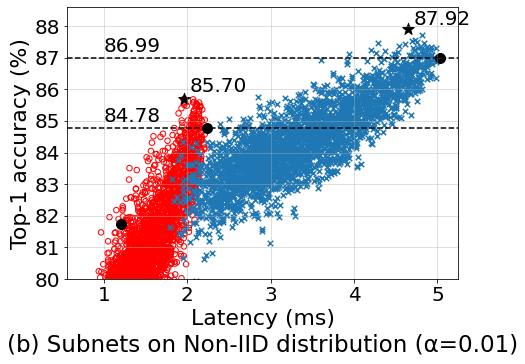

In [16]:
lat2s = [lat2s[i]/0.032 for i in range(len(lat2s))]
lat1s = [lat1s[i]/0.032 for i in range(len(lat1s))]
import copy
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,5))

print(lat1s[0], lat2s[0])
# plot subnets of effim
plt.scatter(lat1s[1:], acc1s[1:], marker='o', s=30, c='none',edgecolors='r', label='AdaptiveNet EfficientNetV2-S subnets')
plt.scatter(lat2s[1:], acc2s[1:], marker='x', s=30, label='AdaptiveNet EfficientNetV2-M subnets')
# plt.legend(['original DNN models', 'EfficientNetV2-S subnet', 'EfficientNetV2-M subnet'],prop={'family' : 'Times New Roman', 'size'   : 15})
'''mark the best points'''
maxpointidx = np.argmax(acc1s)
plt.annotate('85.70', (lat1s[maxpointidx]+0.002/0.032, acc1s[maxpointidx]+0.2), fontsize=20)
print(lat1s[maxpointidx])
plt.scatter(lat1s[maxpointidx], acc1s[maxpointidx],  c='black', marker='*', s=150, label='Best subnets')
maxpointidx = np.argmax(acc2s)
plt.annotate('87.92', (lat2s[maxpointidx]+0.002/0.032, acc2s[maxpointidx]+0.12), fontsize=20)
print(lat2s[maxpointidx])
plt.scatter(lat2s[maxpointidx], acc2s[maxpointidx],  c='black', marker='*', s=150)


plt.xlabel('Latency (ms)',fontdict={'size'   : 22})
plt.ylabel('Top-1 accuracy (%)',fontdict={'size'   : 22})
plt.grid(True, alpha=0.5)

plt.axhline(acc1s[0], ls="--",c='black')
plt.axhline(acc2s[0], ls="--",c='black')
plt.annotate('86.99',(1, acc2s[0]+0.2), fontsize=20 )
plt.annotate('84.78',(1, acc1s[0]+0.2), fontsize=20 )
plt.ylim(80,88.6)
plt.scatter([lat2s[0]]+[lat1s[0]]+[0.03875/0.032], [acc2s[0]]+[acc1s[0]]+[ 81.744],  c='black', s=100, marker='o', label='Original EfficientNetV2 models')
plt.tick_params(labelsize=12)
plt.yticks(size = 20)
plt.xticks(size = 20)
# plt.title('(c) subnet performance on alpha=0.01', y=-0.25,fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.title('(b) Subnets on Non-IID distribution (α=0.01)', y=-0.29,fontdict={'size'   : 23})
# plt.savefig('D:/scientific_work/project1/paper/figs/alpha001.PNG',bbox_inches='tight')
# plt.legend(bbox_to_anchor=(0,1.05),ncol=4, loc=3, borderaxespad=0, prop={'family':'Times New Roman','size':20})
plt.savefig('D:/scientific_work/project1/paper/figs/bbox.PNG',bbox_inches='tight')
plt.show()


In [17]:
acc1s, lat1s = [85.24385156667248, 83.15964986046636, 84.20175069130774, 85.34806166374966, 83.68070029814872, 81.45060437080411, 81.07544805567281, 80.2417673458403, 80.09587326781259, 82.28428508063662, 82.61775735121262, 82.59691537822869, 81.05460603816552, 82.95122967585269, 83.2430178955129, 82.3051270886032, 83.65985822657736, 81.90912874642389, 81.42976239782018, 83.28470196551012, 82.59691537822869, 83.8891204191576, 82.38849512364975, 81.49228840581871, 80.72113380257215, 84.49353894595059, 80.34597748744085, 80.34597741429535, 82.90954560585547, 82.5343892462008, 80.13755726784456, 83.84743640322445, 81.47144643283477, 82.78449345628835, 81.34639428326764, 81.86744472095002, 81.7632346779369, 81.8257607399995, 84.80616915449593, 81.63818257289313, 82.88870363287153, 82.6802833941938, 84.09754059423055, 82.992913720408, 80.97123797767706, 81.0337640747223, 83.01375564886858, 82.72196740376646, 84.78532718151199, 82.86786156130016, 84.18090867380045, 83.74322635067061, 83.76406832365456, 81.72155064292231, 84.70195907650017, 82.76365147376369, 82.88870362333081, 83.68070029814872, 79.67903292720742, 82.72196748327245, 82.36765313158436, 80.88786986312452, 82.034180895991, 80.76281783758675, 82.49270525570957, 82.36765313158436, 82.40933722066303, 82.4718632636442, 82.90954561539618, 79.86661107523236, 83.22217586846489, 83.65985828064143, 84.72280117351346, 83.01375573791529, 83.82659433165308, 82.40933723020375, 83.53480616605694, 80.90871196967854, 82.78449353579434, 82.99291367588465, 83.5556481485816, 84.68111704945217, 82.55523134321409, 81.8049186334455, 81.32555225621964, 84.78532713698864, 81.65902453633635, 82.61775740527669, 80.76281778352268, 80.76281782804602, 82.32596916017457, 81.63818251882905, 81.45060438034484, 82.70112538625916, 82.47186323820227, 80.47102954796127, 83.05543972840653, 84.20175069130774, 81.2421842052719, 82.57607336072138, 83.70154228067338, 81.74239266997031, 82.01333888802444, 80.82534389010863, 81.11713211612933, 81.95081282596183, 83.1388077984357, 83.28470187646342, 80.45018752091326, 83.36806999101596, 81.09629011770346, 83.01375571883386, 81.13797415271806, 81.97165480848649, 85.05627345363017, 83.36807002599859, 82.61775735121262, 84.97290534861835, 81.99249682599378, 81.03376402065823, 82.97207165837735, 85.26469358417977, 82.65944138622721, 81.4297624073609, 81.32555223077772, 82.28428511561926, 79.92913708323088, 80.82534389964935, 82.3468111236178, 83.22217590344752, 84.01417248921874, 79.84576903228314, 83.05543975384845, 82.82617749130293, 79.9499791102789, 81.34639428326764, 82.88870358834818, 84.55606494440839, 82.32596914109313, 82.95122967585269, 83.72238428863996, 84.61859103191291, 81.38807830874151, 82.09670687854762, 82.1592330201162, 82.59691529872269, 83.03459768227708, 83.49312213104236, 82.11754897556091, 81.49228839627798, 81.47144644237548, 82.38849520315573, 81.34639428326764, 84.59774897942299, 80.45018757497732, 80.88786988856644, 82.2426010265406, 83.88912038417496, 83.45143801652178, 80.32513541586948, 84.70195912102353, 83.47228007855243, 83.493122086519, 83.45143806104512, 82.51354723823424, 82.55523130823146, 84.7644851640047, 81.36723635483901, 81.3880782832996, 82.2009170551308, 80.74197582962017, 81.05460608268888, 83.82659433165308, 80.95039595062904, 82.11754898510162, 84.38932884887339, 81.17965819727335, 83.53480608655096, 83.84743639368372, 80.03334721529072, 81.78407666046155, 82.80533556284234, 81.65902458085971, 80.13755729328646, 83.03459775542258, 85.07711543615484, 83.8682784016503, 80.90871196967854, 81.55481445834059, 80.92955392358104, 82.11754898510162, 79.78324296067983, 81.5339724408333, 81.74239260636553, 82.28428507109591, 79.80408497818712, 81.65902451089443, 81.01292200315093, 80.22092538239708, 84.1392245942625, 79.55398075855886, 82.40933716659896, 81.5339724408333, 84.05585656875668, 83.34722797350865, 82.30512714266727, 80.86702788059986, 80.53355563546579, 82.13839098352747, 81.26302620369775, 84.74364315603812, 81.24218417664973, 84.13922463878585, 81.26302619415704, 82.45102117617164, 81.67986658882627, 81.1796581432093, 80.53355561002387, 83.43059599901449, 81.22134223228795, 81.45060433582148, 82.70112543078253, 80.09587325827188, 81.82576073045878, 83.9099624366649, 81.84660270344271, 83.57649012156554, 80.5960817070691, 83.32638591147801, 81.11713207160597, 83.20133389548094, 80.4085035208813, 84.49353890142723, 80.36681949540743, 82.24260104562204, 84.51438099844052, 80.82534384558528, 81.80491866842813, 83.34722800849129, 80.26260936334761, 82.70112547530587, 84.20175064678439, 81.78407665092084, 81.65902459040042, 84.03501450672603, 80.49187160045119, 83.7849103856852, 81.03376401111751, 81.76323463341355, 81.84660274796607, 83.47228003402907, 79.15798243546098, 82.24260101699988, 84.4310128934287, 81.34639431825028, 83.47228008809314, 81.61734056492655, 82.45102122069498, 82.53438931616608, 85.03543134707617, 84.57690705096239, 81.80491866842813, 80.63776573254297, 81.74239265088887, 83.82659433165308, 80.6586076959862, 83.36806999101596, 83.38891196399989, 80.34597747790013, 82.05502293257973, 83.74322635067061, 83.99333056075814, 83.05543976338916, 80.47102959248463, 81.32555231982442, 84.9103792420324, 81.22134223228795, 81.57565651083053, 80.45018752091326, 80.24176739036366, 79.92913712775425, 82.34681113315851, 81.90912878140652, 83.138807788895, 80.99207997610291, 81.01292204767428, 79.72071691769865, 83.0762817363731, 80.67944972303421, 81.65902453633635, 82.76365151828703, 80.49187160999192, 80.70029179460558, 81.09629011770346, 83.159649815943, 81.92997074484974, 81.01292204767428, 83.32638595600136, 81.38807836280559, 82.972071613854, 80.70029174054152, 81.03376406518157, 81.36723629123422, 83.51396411356701, 83.28470192098678, 81.346394327791, 81.40892032624882, 80.6377657420837, 84.13922463878585, 84.05585656875668, 83.40975401648983, 83.34722801803201, 83.70154227113267, 82.86786157084087, 81.51313041378529, 80.67944977709828, 83.03459771089923, 83.32638596554207, 82.65944144029129, 83.01375572837458, 84.99374736612566, 82.36765319518916, 81.5756564853886, 82.40933717613967, 81.57565652037124, 82.18007500264088, 80.32513546039284, 80.51271358297586, 84.18090868334116, 81.15881610662056, 80.82534389010863, 82.11754898510162, 81.70070863495573, 82.9720717029007, 83.05543972840653, 82.57607331619803, 83.30554392895334, 83.95164652574356, 83.15964985092563, 82.07586494054631, 82.05502292303902, 80.95039600469312, 84.5769069619157, 81.97165480848649, 83.09712380794447, 84.18090871832379, 81.84660274796607, 83.0971237538804, 81.97165480848649, 80.90871189653302, 81.20050020523993, 83.28470191144605, 80.88786988856644, 81.15881617976606, 81.7632346779369, 83.09712374433968, 81.55481451240466, 84.51438091893452, 81.57565652037124, 79.69987490019136, 84.03501450672603, 80.36681948586671, 80.88786994263052, 82.55523134321409, 83.76406831411383, 81.82576073045878, 81.82576068593542, 83.2013338509576, 80.26260938878951, 81.20050015117586, 80.1792413473825, 83.138807788895, 80.53355563546579, 79.42892871711989, 80.554397598909, 82.97207164883663, 82.88870358834818, 84.63943306850165, 81.17965815275001, 81.30471025779377, 81.8049186334455, 83.01375569339194, 80.99207997610291, 82.30512714266727, 81.28386819576313, 80.49187158455, 83.68070029814872, 81.2421842307138, 84.61859099693028, 80.53355559094243, 83.05543972840653, 78.80366818236033, 83.7640683681779, 81.97165486255057, 81.5339724408333, 83.70154226159195, 80.63776573254297, 83.47228011353506, 82.15923296605214, 82.86786157084087, 80.57523964503847, 80.59608164346432, 80.9712380126597, 81.24218424025453, 83.70154222660932, 84.61859099693028, 81.49228841535943, 80.15839927581113, 83.95164647167948, 82.13839095808557, 80.9087119505971, 83.5973321835962, 79.63734889219283, 83.7640683681779, 84.49353892686915, 82.43017920318769, 82.45102121115427, 83.1804918334503, 81.80491866842813, 82.26344305358862, 82.22175898359139, 81.22134223228795, 80.01250520732414, 80.70029174054152, 81.13797412727614, 82.43017915866433, 82.07586494054631, 83.55564819310496, 82.4718632636442, 80.82534388056791, 80.65860775005028, 83.59733222811954, 80.47102959248463, 82.05502287851567, 81.11713211612933, 84.45185490139528, 79.9499791102789, 82.36765314112509, 83.3889120530466, 82.28428510607854, 81.74239261590624, 83.34722801803201, 81.2213422036658, 80.11671529486061, 81.09629009862202, 83.68070020910201, 82.84701954379287, 81.70070854590902, 80.38766146839137, 83.51396411356701, 79.512296733085, 82.86786157084087, 81.26302621323846, 81.15881617022535, 81.4506043612634, 79.90829506572359, 80.24176739036366, 84.11838266580192, 82.6385993591792, 80.92955396810439, 84.24343473586305, 81.65902459994113, 83.68070029814872, 82.93038761382205, 82.45102121115427, 82.78449345628835, 82.15923301057549, 81.09629011770346, 81.42976235329682, 83.65985823611808, 80.22092533787374, 81.28386822120504, 81.88828678298066, 80.53355565454723, 79.76240094317252, 82.11754894057827, 80.47102953842055, 84.47269687437922, 83.05543971886581, 81.346394327791, 83.57649021061225, 81.6381825379105, 81.82576069547615, 84.86869520701782, 84.41017086638068, 84.43101283936463, 85.05627340910682, 79.61650688422625, 79.99166318981685, 82.40933723020375, 83.159649815943, 82.6177573416719, 82.57607332573875, 83.24301793049554, 80.88786990764788, 80.38766147793208, 81.7632346874776, 82.95122965041078, 81.8049187224922, 81.5756564758479, 83.34722797350865, 80.70029174054152, 84.88953722452511, 83.05543977292989, 82.3676531506658, 83.26385985895612, 80.03334716122664, 83.1179657713877, 83.5556481485816, 82.95122968539341, 82.61775735121262, 80.01250516280078, 83.28470196551012, 82.22175902811475, 81.82576068593542, 81.28386827526911, 81.40892032624882, 81.97165480848649, 83.03459772043995, 84.11838266580192, 83.84743639368372, 81.90912881002868, 82.24260103608133, 81.70070854590902, 82.72196742920838, 81.679866598367, 80.55439760844973, 82.90954556133211, 81.36723629123422, 80.74197576601539, 82.59691534324605, 82.95122964087005, 81.09629012724417, 83.55564819310496, 81.09629008272083, 81.99249687051713, 83.05543976338916, 80.07503120578195, 83.26385988439804, 83.32638595600136, 81.26302619415704, 81.36723633575758, 81.82576068593542, 83.72238433316332, 81.86744473049073, 82.45102125567762, 82.805335518319, 81.9924968355345, 84.41017082185733, 81.9299707734719, 79.90829506572359, 84.93122131360377, 82.88870359788889, 82.11754893103755, 81.55481445834059, 81.9091287559646, 82.57607336072138, 81.4089203898536, 82.61775740527669, 83.28470187646342, 83.99333050669408, 82.34681117768186, 82.38849515863238, 82.30512714266727, 81.84660270344271, 80.51271357343514, 82.3468111236178, 81.57565652037124, 83.82659436663572, 81.78407664138011, 83.05543968388318, 83.74322634112988, 85.05627341864754, 81.09629008272083, 82.45102121115427, 81.11713212567004, 80.88786989810716, 81.88828673845731, 82.15923295651142, 81.34639433733172, 82.1592330201162, 82.09670690398954, 80.67944975801684, 83.09712379840376, 81.34639429280837, 84.4310128934287, 80.65860771506765, 81.26302620369775, 83.32638593691992, 83.63901626313414, 80.51271362749921, 81.78407665092084, 81.42976239782018, 81.61734054584511, 84.45185491093599, 79.94997915480225, 80.82534382650384, 81.67986660790771, 83.18049178892694, 80.32513543495092, 82.30512709814393, 84.5352229269011, 83.68070025362537, 81.99249688005786, 83.86827841119103, 81.9299707734719, 81.51313045830864, 85.38974568922353, 83.9724884987275, 80.5335556450065, 84.66027512099157, 82.32596914109313, 83.49312214058307, 81.2421842052719, 83.80575235866914, 81.3047102927764, 80.49187159091048, 79.86661103070901, 81.22134216868317, 83.95164649076092, 84.76448517354541, 84.32680284087486, 81.20050020523993, 81.57565652037124, 81.20050016071659, 83.13880775391236, 84.11838257675521, 81.65902454587706, 83.95164644623758, 79.80408502271047, 80.03334717076736, 83.01375569339194, 81.59649854741926, 81.86744469232785, 81.84660274796607, 82.84701959785694, 82.70112546576516, 82.28428508063662, 82.34681111407707, 80.49187161953263, 80.38766146839137, 83.03459766637589, 84.18090867380045, 84.22259275333839, 82.78449352625361, 84.05585655921595, 80.95039600469312, 81.26302621323846, 82.03418086100837, 82.15923297559286, 81.36723635483901, 79.88745309273965, 84.30596073432086, 80.30429345242626, 80.34597748744085, 81.9091287559646, 81.22134217822388, 82.88870358834818, 82.13839100260891, 82.57607332573875, 83.59733219313691, 81.78407666046155, 83.09712371889776, 82.32596916017457, 79.61650682062147, 81.88828673845731, 84.61859099693028, 82.13839100260891, 80.80450186306062, 79.90829510070623, 81.32555226576035, 81.34639429280837, 80.01250519778341, 83.80575236820985, 83.20133389548094, 81.05460609222959, 79.69987492563328, 80.9295539776451, 81.55481451240466, 82.43017919364696, 81.42976235329682, 81.92997082753597, 83.03459771089923, 81.74239262544697, 79.42892866305581, 83.57649015654818, 82.65944138622721, 80.32513542541021, 80.65860774050955, 81.99249687051713, 82.53438933524751, 84.07669863078732, 83.47228008809314, 84.43101283936463, 79.72071690815794, 82.70112538625916, 82.76365143878105, 79.51229678714907, 85.05627340910682, 81.09629011770346, 82.7428094562564, 79.82492704021777, 81.99249687051713, 84.3684868313661, 81.9091287559646, 81.67986660790771, 81.09629007318011, 82.18007498355944, 81.84660271298344, 82.20091698198529, 82.53438933524751, 80.9712380126597, 84.57690700643904, 81.63818252836977, 80.51271362749921, 80.45018751137253, 80.20008332990716, 81.95081279097919, 83.43059607852047, 85.2021675411986, 84.45185485687192, 81.30471028323569, 83.40975407055389, 80.84618586309257, 81.20050021478066, 80.6169236355297, 80.40850354950345, 81.92997078301262, 82.55523129869074, 81.7632346874776, 81.92997078301262, 81.05460609222959, 81.17965813366857, 80.53355560048315, 82.86786156130016, 81.700708625415, 84.3684868313661, 82.22175901857402, 82.95122964087005, 81.97165477350386, 81.24218424979524, 81.74239260636553, 81.15881612570199, 82.13839094854484, 79.7624009972366, 81.2838682657284, 80.47102960202534, 80.45018752091326, 83.30554392895334, 82.30512707906249, 82.76365149284513, 82.6802834037345, 82.13839093900413, 83.6181742106442, 82.30512709814393, 84.78532713698864, 83.28470196551012, 83.6390162281515, 80.76281783758675, 82.51354731774022, 83.22217585892417, 79.97082117230954, 82.97207164883663, 82.32596916017457, 84.38932884887339, 83.47228008809314, 83.84743639368372, 82.28428511561926, 79.34556063755, 84.34764477887617, 80.97123802220041, 80.97123796813634, 84.93122126908042, 83.15964984138492, 84.57690700643904, 80.24176739036366, 83.18049187797365, 84.11838263081928, 82.86786152631753, 81.22134217822388, 82.5343893257068, 84.24343473586305, 85.24385152214911, 81.86744472095002, 82.40933717613967, 84.3268027963515, 82.51354728275759, 80.65860774050955, 83.01375569339194, 81.30471024825306, 82.18007502808278, 83.0971237538804, 79.99166318027612, 81.51313041378529, 81.63818258243384, 83.24301792095481, 82.51354731774022, 81.99249682599378, 80.47102959248463, 82.11754898510162, 83.99333047171145, 81.74239266997031, 82.3468111236178, 82.68028344825785, 83.5348061310743, 81.09629006363939, 84.7436431464974, 81.74239260636553, 80.74197582007945, 81.05460603816552, 82.72196744828982, 82.63859942278398, 81.13797414317733, 81.74239266997031, 81.8257607399995, 82.68028345779858, 83.53480608655096, 81.67986656338437, 81.78407670498491, 81.03376406518157, 81.53397240585066, 81.07544810019617, 81.45060442486819, 83.63901621861078, 81.74239260636553, 83.49312209605972, 82.2217590726381, 83.28470196551012, 81.8257607399995, 80.01250519778341, 82.18007501854207, 83.36806999101596, 83.78491034116185, 83.84743639368372, 82.95122964087005, 83.84743634916038, 80.8670279155825, 82.65944144029129, 83.93080450823626, 84.72280112899011, 81.65902453633635, 84.32680275182815, 80.86702787105915, 80.97123795859562, 85.11879941710535, 82.24260109014539, 81.45060438034484, 81.47144643283477, 81.78407667636274, 84.18090866425973, 83.51396411356701, 83.97248854325085, 83.20133384141687, 82.36765318564844, 82.65944138622721, 81.5964985028959, 84.72280113853083, 83.82659442069979, 85.18132546962724, 81.61734056492655, 82.18007498355944, 81.1379741081947, 82.82617750720414, 83.22217586846489, 81.65902459994113, 80.65860775005028, 84.28511871681357, 81.99249687051713, 83.03459766637589, 84.59774897942299, 82.97207165837735, 80.61692371503568, 80.86702792512322, 79.97082117230954, 81.9299707734719, 84.32680275182815, 82.20091703604936, 80.57523964503847, 81.86744471140929, 82.034180895991, 82.76365152782776, 81.38807831828224, 83.55564810405825, 84.70195906695946, 82.26344310765269, 82.84701954379287, 81.51313045830864, 82.49270530023293, 85.2230095587059, 82.63859942278398, 85.07711542661411, 83.5973321835962, 81.61734049178104, 82.53438928118345, 82.55523135275482, 85.43142972423813, 81.84660270344271, 82.93038757883942, 81.3255523102837, 84.47269696342592, 81.47144638831142, 82.2217590726381, 80.42934555747003, 82.74280946579711, 85.2646935937205, 84.7436431464974, 82.24260108060467, 81.55481450286395, 82.4927052652503, 82.78449345628835, 83.97248854325085, 81.78407665092084, 82.59691534324605, 79.3872446185005, 83.03459772043995, 83.55564810405825, 81.95081282596183, 82.32596911565122, 82.3468111236178, 85.30637761919436, 82.47186327318491, 82.03418091507244, 82.59691534324605, 81.40892038031288, 81.70070856181022, 80.8045018376187, 80.05418918827465, 81.32555231982442, 80.45018753999469, 80.88786988856644, 82.13839100260891, 82.82617757080892, 82.30512714266727, 80.90871191561446, 80.82534389010863, 84.95206333111106, 81.59649853787853, 82.40933717613967, 82.18007498355944, 81.84660270344271, 82.68028341327522, 84.09754055924792, 84.47269687437922, 79.17882449749163, 81.47144635332877, 84.43101288388799, 84.18090867380045, 81.78407666046155, 83.47228008809314, 82.72196743874909, 80.59608165300503, 80.80450186306062, 82.0758649310056, 85.07711542661411, 80.28345137131417, 81.28386823074577, 82.93038766788611, 80.5752396005151, 81.17965815275001, 83.47228005947099, 80.09587322328925, 81.90912879094724, 83.80575240319249, 82.36765318564844, 83.01375573791529, 81.55481443925916, 81.4506043612634, 81.82576069547615, 83.72238433316332, 83.5139641040263, 81.99249688005786, 83.95164649076092, 80.24176739036366, 80.72113380257215, 80.82534389010863, 84.26427674382963, 81.15881614478343, 81.86744471140929, 81.67986661744843, 81.8049187224922, 85.34806166374966, 82.4301792127284, 85.01458937409224, 80.4710295829439, 80.9503959951524, 81.36723635483901, 83.26385985895612, 84.9312212595397, 82.07586495008704, 82.45102125567762, 83.51396411356701, 81.72155064292231, 81.55481450286395, 80.2417673203984, 80.05418925187945, 81.72155063338158, 84.22259266429168, 82.90954558677403, 83.63901620907006, 83.88912042869832, 84.59774897942299, 80.86702793466394, 81.32555225621964, 81.34639433733172, 80.38766152245545, 82.55523126370811, 82.55523129869074, 83.74322631568798, 80.70029179460558, 81.67986661744843, 81.61734052040319, 83.3680699464926, 81.90912876550532, 80.0125051882427, 82.78449349127098, 84.68111713849888, 79.82492704975849, 79.59566478403273, 81.49228840581871, 80.38766146839137, 82.45102121115427, 83.26385990347947, 84.05585660373931, 80.53355560048315, 81.74239261590624, 84.36848678684274, 81.74239265088887, 81.88828678298066, 82.36765319518916, 82.47186327318491, 83.95164643669685, 81.55481451240466, 84.07669863078732, 84.16006666583387, 83.90996244620561, 83.138807788895, 83.45143805150441, 79.15798243546098, 84.49353889188652, 81.09629006363939, 81.40892032624882, 81.09629011770346, 81.86744471140929, 82.74280950077974, 82.05502293257973, 83.18049186843294, 82.68028341327522, 82.57607331619803, 83.49312209605972, 81.7423926604296, 82.3051270886032, 82.32596907112786, 83.53480612153359, 81.7632346779369, 81.09629007318011, 81.13797415271806, 79.34556064709071, 82.36765314112509, 84.32680284087486, 82.45102121115427, 80.32513541586948, 82.09670692307097, 80.47102959248463, 83.88912046368095, 81.5339724408333, 82.78449349127098, 81.53397248535666, 80.99207998564364, 83.76406832365456, 81.97165480848649, 82.13839100260891, 81.88828678298066, 82.53438931616608, 80.88786989810716, 80.63776568801963, 84.88953727858919, 83.47228007855243, 81.3880782832996, 82.20091701060744, 83.22217586846489, 82.47186322866156, 80.51271356389442, 82.0341808705491, 84.32680284087486, 82.26344308857125, 81.30471023871233, 82.24260100109868, 82.63859933373729, 81.45060438034484, 81.88828674799802, 80.51271360841777, 81.51313045830864, 80.1583993298752, 82.5760732812154, 83.74322634112988, 84.07669854174061, 81.67986660790771, 82.55523129869074, 81.42976233421538, 81.38807830874151, 82.55523129869074, 84.57690700643904, 81.42976234375611, 84.66027508600894, 81.7632346874776, 80.32513545085212, 81.1171320906874, 83.15964986046636, 81.97165480848649, 81.09629007318011, 82.9095456408381, 81.03376402065823, 80.32513547947427, 83.61817419156277, 79.74155891612452, 80.92955392358104, 81.65902459994113, 82.13839094854484, 80.15839928535185, 83.51396406904367, 85.24385152214911, 83.38891198944181, 81.90912876550532, 79.65819085563605, 80.80450186306062, 80.20008336488979, 84.80616920856001, 83.63901620907006, 82.40933722066303, 82.84701953425214, 80.80450187260134, 79.533138760133, 82.30512707906249, 82.38849520315573, 80.76281783758675, 81.34639433733172, 82.61775735121262, 81.28386823074577, 81.28386827526911, 84.55606498893175, 81.28386827526911, 81.09629007318011, 80.72113375804881, 82.05502288805638, 84.68111704945217, 84.5352230064071, 81.7423926604296, 84.03501455124938, 81.07544802069017, 81.09629006363939, 82.09670692307097, 80.34597748744085, 80.55439758300781, 83.34722800849129, 82.88870357880745, 81.13797415271806, 82.01333883396036, 83.63901626313414, 81.38807830874151, 81.59649849335518, 83.13880783341834, 82.34681117768186, 83.05543972840653, 81.7632345984309, 82.9720717029007, 83.5556481485816, 81.40892038031288, 80.28345142537825, 82.18007497401871, 82.15923301057549, 81.97165486255057, 80.55439765297308, 80.70029179460558, 81.99249688005786, 80.1583993298752, 81.61734055538582, 80.09587322328925, 79.78324300520318, 80.45018758451805, 81.03376402065823, 81.6173405363044, 82.97207164883663, 81.513130423326, 82.45102121115427, 81.15881617976606, 80.47102959248463, 81.45060437080411, 83.13880775391236, 80.88786994263052, 83.32638596554207, 81.78407669544418, 80.3668194604248, 81.63818250928834, 82.49270524616885, 83.32638592101873, 81.26302617825583, 84.5352229269011, 81.59649848381446, 83.38891204350588, 82.59691532416461, 82.53438928118345, 80.15839928535185, 83.74322635067061, 81.82576066049351, 84.91037929609648, 81.84660266846008, 81.01292200315093, 83.82659437617643, 82.76365152782776, 81.67986660790771, 81.05460604770624, 80.95039595062904, 81.88828673845731, 81.88828672891658, 82.34681116814114, 81.99249684507522, 82.40933717613967, 81.32555226576035, 80.99207997610291, 81.63818252836977, 83.22217585892417, 84.72280108446675, 81.13797415271806, 82.99291366634392, 80.72113380257215, 84.78532713698864, 81.26302625776182, 84.30596073432086, 83.76406833319527, 84.86869520701782, 82.2009170551308, 79.74155897018859, 82.07586494054631, 82.05502293257973, 85.05627336458348, 81.700708625415, 83.97248846374487, 83.63901617408743, 81.05460608268888, 84.70195911148281, 82.13839093900413, 80.88786992354908, 80.70029179460558, 84.07669857672325, 81.28386822120504, 82.3884951681731, 83.1388077984357, 83.09712376342112, 81.63818249338713, 82.65944138622721, 82.61775731622998, 78.94956231445211, 79.97082116276883, 82.05502286897494, 81.99249688005786, 82.57607332573875, 82.30512714266727, 80.22092533787374, 81.1796581432093, 82.24260105516275, 83.28470192098678, 83.01375570293266, 80.45018757497732, 84.05585656875668, 80.887869869485, 81.42976234375611, 82.2009169660841, 82.22175901857402, 83.18049185889221, 81.36723629123422, 82.18007499310015, 84.51438090939381, 81.8257607399995, 81.0337640747223, 79.97082111824548, 83.05543972840653, 85.03543140114024, 81.15881612570199, 79.63734883812876, 81.5756564853886, 80.1583993298752, 83.72238433316332, 79.94997913572081, 81.24218419573117, 84.80616920856001, 84.63943310348428, 82.3884951681731, 83.7849103856852, 81.95081280051991, 83.57649012156554, 82.45102126521833, 81.47144644237548, 81.92997073848926, 81.09629006363939, 81.9091287559646, 81.22134215914244, 80.84618585355186, 82.13839100260891, 83.70154222660932, 81.45060437080411, 82.34681117768186, 80.47102959248463, 80.24176735538103, 80.84618582810994, 82.61775735121262, 82.5343892462008, 82.76365151828703, 81.24218418619046, 81.15881616068462, 83.28470192098678, 82.7428094562564, 84.80616920856001, 82.76365143878105, 83.11796582545176, 83.03459775542258, 82.68028341327522, 81.22134223228795, 82.13839094854484, 83.30554394803478, 82.47186328272564, 80.9920800397077, 80.86702793466394, 83.76406833319527, 81.36723630077493, 81.86744476547337, 81.59649853787853, 82.01333888802444, 81.88828679252138, 82.93038762336276, 84.70195912102353, 82.4093371856804, 81.8049187224922, 82.57607332573875, 82.09670687854762, 80.8878699330898, 82.32596911565122, 81.95081282596183, 81.63818257289313, 79.92913708323088, 82.05502293257973, 80.34597747790013, 83.11796573640507, 81.4506043612634, 82.36765313158436, 81.5964985028959, 82.34681113315851, 82.5969153877694, 82.6802833941938, 85.22300950464182, 82.43017919364696, 82.11754896602018, 81.95081283550255, 84.0558565782974, 81.5756564758479, 83.09712377296184, 83.47228011353506, 81.24218424979524, 83.07628170139047, 81.45060442486819, 81.22134217822388, 81.700708625415, 83.95164643669685, 82.43017918410625, 83.65985823611808, 84.01417254328281, 83.57649017562962, 83.01375573791529, 81.70070857135094, 82.8678616058235, 84.11838257675521, 82.34681117768186, 82.45102121115427, 82.11754894057827, 82.26344305358862, 81.15881612570199, 82.95122964087005, 82.5969153877694, 84.20175064678439, 81.65902451089443, 82.05502293257973, 82.74280949123903, 80.67944972303421, 81.97165484346912, 80.38766145885066, 81.67986657292508, 82.40933723020375, 81.09629007318011, 79.86661107523236, 81.92997080845453, 83.0971237538804, 82.59691533370533, 82.13839096762628, 81.53397249489737, 82.34681116814114, 79.67903288268407, 81.28386822120504, 80.49187155592784, 80.36681945088408, 81.63818249338713, 82.51354731774022, 81.07544810019617, 81.09629006363939, 84.1600667008165, 81.01292205721501, 81.47144639785213, 81.28386827526911, 80.74197581053873, 80.59608165300503, 81.97165486255057, 82.24260104562204, 81.84660274796607, 83.43059604353783, 81.90912880048795, 83.15964977141965, 80.20008332990716, 82.4093371856804, 85.1604834966433, 79.82492704021777, 83.18049180482814, 83.32638594646065, 83.40975402603054, 84.16006665629315, 82.22175902811475, 80.8878699330898, 83.9724884987275, 83.74322630614725, 83.55564810405825, 84.76448517354541, 83.8891204191576, 81.9299707734719, 81.40892033578953, 83.70154226159195, 80.88786988856644, 83.65985819159472, 84.76448511948135, 85.09795739959806, 84.22259271835576, 80.15839928535185, 82.36765314112509, 82.07586494054631, 80.32513543495092, 81.74239261590624, 80.90871190607373, 81.30471030231713, 82.07586492146487, 84.09754060377126, 82.53438933524751, 81.57565651083053, 82.80533550877827, 83.84743634916038, 83.28470191144605, 84.68111713849888, 82.43017924771104, 81.51313047739008, 84.20175068176702, 80.82534389964935, 83.5764901660889, 83.2013338509576, 81.76323462387282, 84.9103792420324, 82.72196744828982, 81.0754480461321, 83.30554394803478, 81.346394327791, 83.90996240168226, 82.90954560585547, 82.972071613854, 81.80491867796884, 83.78491029663849, 83.90996240168226, 81.51313041378529, 81.70070861587429, 83.99333051623479, 83.51396411356701, 83.63901626313414, 83.43059604353783, 79.55398080308221, 83.11796578092842, 84.93122130406306, 81.40892033578953, 80.57523963549774, 82.51354722869351, 83.7640682791312, 81.74239266997031, 82.01333883396036, 84.01417248921874, 84.82701121652659, 80.2417673458403, 84.01417254328281, 80.99207997610291, 82.3051270886032, 84.03501450672603, 84.95206332157035, 83.5348061310743, 82.03418085146765, 80.70029173100079, 82.7636514833044, 81.28386827526911, 83.15964979686157, 81.95081280051991, 80.8670279155825, 82.53438933524751, 81.26302625776182, 81.86744472095002, 80.34597743337679, 81.55481445834059, 83.32638600052472, 81.3672362657923, 82.3051270886032, 81.67986660790771, 80.61692366097161, 81.76323465249497, 82.74280946579711, 81.09629007318011, 82.09670691353026, 81.49228841535943, 81.49228839627798, 83.88912047322167, 81.53397243129258, 80.32513546993356, 84.47269690936186, 84.618591006471, 82.28428507109591, 81.63818258243384, 81.97165477350386, 81.26302621323846, 82.59691534324605, 81.53397242175186, 83.63901617408743, 84.86869524200046, 83.15964986046636, 82.03418091507244, 84.68111705899288, 82.61775739573598, 81.84660271298344, 80.05418918827465, 84.20175064678439, 80.30429346196698, 83.4722800690117, 81.34639424828501, 81.92997082753597, 81.9299707734719, 83.13880776345307, 81.38807828966009, 81.03376402065823, 83.88912038417496, 81.61734051086248, 79.97082111824548, 82.30512713312656, 83.01375573791529, 83.74322633158917, 84.28511877087763, 85.36890362719289, 84.66027508600894, 80.51271358297586, 81.32555231982442, 84.09754058468982, 83.03459770135852, 81.90912880048795, 80.97123796813634, 80.63776573254297, 81.88828676389923, 79.512296733085, 84.59774903348706, 81.51313046784935, 82.07586488648224, 80.67944976755757, 84.13922464832658, 83.18049186843294, 82.09670692307097, 80.38766146839137, 80.1375573123679, 80.40850348589866, 82.61775735121262, 84.9729052945543, 82.05502288805638, 81.05460608268888, 83.59733213907283, 84.76448511948135, 82.53438933524751, 81.84660273842535, 79.72071696222201, 82.45102122069498, 82.80533555330163, 82.28428511561926, 80.47102954796127, 82.88870358834818, 82.05502293257973, 83.49312213104236, 81.40892032624882, 85.07711538209077, 84.9729052945543, 82.97207164883663, 81.53397248535666, 82.26344306312933, 84.32680275182815, 83.99333049715335, 79.84576905772506, 82.34681117768186, 81.24218419573117, 82.5760732812154, 85.28553555716371, 83.9933305257755, 84.70195907650017, 81.97165479894576, 83.53480608655096, 81.24218419573117, 83.57649012156554, 83.70154231565601, 81.70070854590902, 83.3680699464926, 82.70112543078253, 85.13964143461264, 81.03376406518157, 79.53313875059229, 81.80491870341076, 82.63859941324327, 81.53397243129258, 82.99291366634392, 83.65985819159472, 83.15964986046636, 81.1379741081947, 82.5969153877694, 81.42976239782018, 82.97207169335998, 84.57690701597976, 84.30596073432086, 82.40933717613967, 82.07586494054631, 82.78449350081169, 84.18090871832379, 81.45060442486819, 83.18049182390958, 82.49270521118622, 82.11754892149683, 81.2838682021236, 82.76365147376369, 81.30471024825306, 81.63818250928834, 79.92913708323088, 83.05543976338916, 83.28470192098678, 82.55523130823146, 82.84701958831621, 84.41017085683997, 82.24260109014539, 82.57607337026211, 82.80533550877827, 81.05460603816552, 81.05460603816552, 81.8257607399995, 82.13839093900413, 81.84660271298344, 82.05502284353304, 82.82617751674485, 80.49187160045119, 82.32596915063385, 81.07544810019617, 82.2217590726381, 81.28386822120504, 80.84618590761592, 81.97165480848649, 82.32596916017457, 84.99374735658493, 80.90871191561446, 81.26302621323846, 83.20133384141687, 80.30429339836219, 82.28428507109591, 82.65944144029129, 82.22175901857402, 82.76365147376369, 82.28428507109591, 82.28428503611327, 82.76365149284513, 84.49353898093322, 83.9933305257755, 81.61734056492655, 83.80575231414579, 80.3042934079029, 84.22259266429168, 81.42976235329682, 79.65819086517678, 80.47102954796127, 80.61692367051234, 82.57607336072138, 82.93038761382205, 82.95122968539341, 82.55523130823146, 83.51396415809036, 81.86744468596738, 82.26344306312933, 79.94997914526154, 80.95039594108833, 82.1383909930682, 82.99291367588465, 81.9299707734719, 81.82576072091805, 81.84660275750679, 81.22134223228795, 84.66027503194486, 81.01292204767428, 81.82576068593542, 81.26302625776182, 83.0762817363731, 80.01250520732414, 81.20050015117586, 82.1383909135622, 81.95081280051991, 81.80491870341076, 82.11754898510162, 83.57649017562962, 82.88870362333081, 82.80533555330163, 80.5127136179585, 81.03376402065823, 80.70029173100079, 83.68070023454393, 82.43017924771104, 82.18007503762351, 83.22217586846489, 84.11838266580192, 79.7624009972366, 83.159649815943, 80.82534388056791, 82.7011254212418, 81.5964985028959, 82.0341808800898, 81.61734050132176, 79.53313878557492, 81.05460603816552, 81.09629012724417, 80.32513547947427, 81.82576073045878, 82.13839100260891, 81.20050015117586, 83.03459772043995, 84.5769069619157, 79.78324300520318, 81.9299707734719, 82.38849515863238, 82.43017919364696, 80.82534389010863, 82.09670690398954, 82.07586490556368, 82.49270521118622, 81.80491866842813, 84.57690701597976, 82.7011254212418, 81.24218418619046, 81.51313040424456, 84.43101283936463, 82.36765314112509, 81.84660270344271, 82.82617757080892, 81.36723635483901, 83.07628172683239, 83.28470193052749, 81.13797415271806, 80.40850349543939, 81.26302621323846, 83.34722797350865, 80.34597747790013, 84.55606495394912, 81.80491867796884, 82.15923297559286, 81.72155064292231, 82.53438928118345, 81.47144638831142, 81.65902458085971, 81.846602693902, 83.97248845420414, 81.61734054584511, 79.42892871711989, 81.01292203813357, 80.38766152245545, 80.36681950494815, 84.0350145607901, 83.38891199898252, 82.13839095808557, 78.9704042588139, 81.53397245037402, 83.5348061310743, 81.34639425464549, 79.69987488110992, 83.1179657713877, 83.3680700355393, 80.36681951448887, 82.20091701060744, 82.3884951681731, 82.72196748327245, 83.34722796396794, 81.07544807475425, 80.32513541586948, 81.24218417664973, 81.09629012724417, 83.1804918334503, 83.09712376342112, 82.51354729865878, 81.30471023871233, 81.92997073848926, 83.38891199898252, 82.68028341327522, 80.887869869485, 83.5348061310743, 81.09629012724417, 80.4293455224874, 82.63859937826064, 84.45185491093599, 81.84660275750679, 82.05502293257973, 82.30512709814393, 81.05460607314815, 80.07503125984603, 80.3668194699655, 83.15964980640229, 82.09670691353026, 84.34764476933545, 81.3880783723463, 80.76281778352268, 80.01250515326007, 83.1179657713877, 82.59691531462389, 82.13839093900413, 79.57482283967094, 81.32555231982442, 79.88745308319893, 83.1388077984357, 80.1583993298752, 83.53480616605694, 81.45060442486819, 81.30471028323569, 81.36723630077493, 83.93080445417219, 84.72280117351346, 82.40933717613967, 83.74322630614725, 82.36765313158436, 82.74280951032046, 81.15881617022535, 83.28470191144605, 84.80616915449593, 83.32638591147801, 82.47186323820227, 82.8678616058235, 82.80533547379564, 83.01375569339194, 83.80575235866914, 84.07669859580469, 81.30471023871233, 83.20133389548094, 83.26385989393876, 82.05502292303902, 82.36765319518916, 83.95164648122021, 83.18049181436886, 82.51354731774022, 82.05502288805638, 79.67903292720742, 82.74280946579711, 81.09629007318011, 81.55481442335795, 81.49228840581871, 84.01417257826544, 83.49312206107709, 83.0137556743105, 81.47144638831142, 83.76406833319527, 83.68070020910201, 82.24260109014539, 82.01333889756515, 81.3880783723463, 80.82534383604455, 81.74239261590624, 84.43101283936463, 80.78365981057068, 80.78365980102997, 82.34681117768186, 82.78449350081169, 80.76281783758675, 81.67986660790771, 82.76365152782776, 81.4297624073609, 82.84701955333358, 80.47102959248463, 81.01292200315093, 79.72071691769865, 81.26302620369775, 83.59733213907283, 80.20008336488979, 80.65860770552692, 80.65860775005028, 82.49270521118622, 82.70112545622443, 81.99249679101115, 82.57607336072138, 78.90787824445488, 83.4305960880612, 80.99208003016699, 83.03459771089923, 81.97165486255057, 80.97123802220041, 80.13755729328646, 80.9503959951524, 84.07669863078732, 80.99207998564364, 81.07544808111473, 83.63901621861078, 83.11796573640507, 81.42976231831419, 83.09712377296184, 85.18132552369131, 80.28345137131417, 82.15923301057549, 82.09670696759433, 80.86702790604178, 81.76323463341355, 82.49270524616885, 82.53438933524751, 79.90829508480503, 82.65944139576793, 81.82576073045878, 82.26344310765269, 82.53438929072416, 82.36765313158436, 82.68028343871714, 84.59774903348706, 82.24260100109868, 80.15839933941592, 81.15881612570199, 82.80533549923756, 82.22175901857402, 80.92955393312175, 81.65902459040042, 81.45060442486819, 81.8257607399995, 80.01250516280078, 83.57649015654818, 82.40933723020375, 81.61734056492655, 81.13797416225877, 80.6169237245764, 82.2217590726381, 84.38932884887339, 81.6381825379105, 82.28428508063662, 80.95039595062904, 83.49312209605972, 82.7636514833044, 81.09629011770346, 84.11838261173784, 81.47144636922998, 81.57565652037124, 83.2013338509576, 82.74280951032046, 81.47144644237548, 82.2217590726381, 80.45018753045397, 83.3889120530466, 82.51354728275759, 80.47102954796127, 83.18049186843294, 82.70112545622443, 81.26302626730254, 80.80450187260134, 83.63901626313414, 84.24343468179897, 81.24218424979524, 80.49187155592784, 80.67944975801684, 81.09629007318011, 81.86744475593265, 83.57649015654818, 80.95039600469312, 83.72238428863996, 80.17924129331843, 79.32471858506005, 83.22217586846489, 80.47102955750199, 81.63818252836977, 81.3255523102837, 81.95081280051991, 81.07544806521354, 83.53480611199286, 80.40850354950345, 84.2017506563251, 81.90912881002868, 81.92997081799525, 83.84743634916038, 82.49270521118622, 84.63943305896093, 80.70029171191935, 81.20050021478066, 83.40975402603054, 81.42976238827946, 83.0971237538804, 81.47144643283477, 80.34597743337679, 81.95081283550255, 81.09629006363939, 80.95039594108833, 81.78407669544418, 83.09712380794447, 85.20216753165788, 80.74197576601539, 82.65944135124458, 82.24260109014539, 81.26302620369775, 84.24343468179897, 82.07586489602296, 82.05502286897494, 80.90871191561446, 80.45018758451805, 80.9087119505971, 81.2005001702573, 80.17924133784177, 82.2842850615552, 81.09629010816275, 79.07461437497253, 83.43059599901449, 80.55439761799045, 82.01333888802444, 81.63818257289313, 78.92872024288074, 84.59774903348706, 80.72113380257215, 85.07711543615484, 81.72155056341632, 83.01375572837458, 83.36806999101596, 81.22134216868317, 82.22175902811475, 83.34722796396794, 80.47102953842055, 82.30512714266727, 84.36848678684274, 81.42976235329682, 83.78491034116185, 82.82617757080892, 82.49270522708741, 80.70029179460558, 83.63901626313414, 83.34722795442723, 80.99207995066101, 83.07628175545454, 83.26385989393876, 82.7428094562564, 83.53480611199286, 81.45060437080411, 81.9091287559646, 81.3255523102837, 80.70029174054152, 82.68028336875187, 84.9520633660937, 80.5543976625138, 81.1171320906874, 81.3047102927764, 80.30429344288555, 80.2834513808549, 83.26385988439804, 82.09670690398954, 79.92913713729496, 82.0967069580536, 81.76323465249497, 82.93038764880468, 84.38932884887339, 80.80450187260134, 80.3042934079029, 83.9724884987275, 83.57649021061225, 82.11754889605491, 82.82617752628558, 80.0750312503053, 82.24260107106396, 83.38891200852325, 81.1171320906874, 82.51354726367614, 81.95081279097919, 81.45060441532748, 81.09629012724417, 83.38891196399989, 83.3680699464926, 84.68111710351623, 82.88870357880745, 82.84701959785694, 81.72155060793966, 83.24301784144883, 81.45060441532748, 84.68111704945217, 80.78365984555332, 84.20175068176702, 80.49187160999192, 82.55523129869074, 83.53480614061503, 82.65944139576793, 83.51396415809036, 82.86786161536423, 81.01292200315093, 83.3680700355393, 82.18007495493728, 82.55523129869074, 81.70070859043237, 80.82534383604455, 83.63901620907006, 81.90912880048795, 81.59649848381446, 80.90871196013781, 81.99249687051713, 81.95081283550255, 82.88870363287153, 80.97123796813634, 81.59649848381446, 84.4310128934287, 83.05543968388318, 81.4089203898536, 84.3684868313661, 84.01417257826544, 83.61817420110349, 82.0758649151044, 80.24176739990438, 81.86744476547337, 81.47144636922998, 83.49312207697828, 84.3476448138588, 82.53438933524751, 83.90996244620561, 82.90954561539618, 83.80575240319249, 84.47269687437922, 82.03418086100837, 82.65944137668649, 85.05627341864754, 84.26427669930627, 80.53355563546579, 83.36806997193452, 84.1392245942625, 82.45102121115427, 81.38807836280559, 82.53438929072416, 82.70112541170108, 84.66027503194486, 80.32513541586948, 83.32638600052472, 79.55398076809958, 84.66027503194486, 82.11754892149683, 81.30471024825306, 81.17965813366857, 81.74239262544697, 81.55481445834059, 81.55481445834059, 82.63859937826064, 80.78365985509404, 81.42976238827946, 84.55606494440839, 80.90871191561446, 83.01375572837458, 82.97207168381927, 83.32638595600136, 81.59649848381446, 79.8874530482163, 82.05502286897494, 84.55606498893175, 81.9091287559646, 82.53438929072416, 80.55439761799045, 81.01292204767428, 82.07586486104033, 82.59691534324605, 83.01375573791529, 83.72238428863996, 80.3668194604248, 84.5352230159478, 80.63776572300226, 80.01250520732414, 81.74239266997031, 83.47228003402907, 82.84701956287431, 81.05460603816552, 80.61692367051234, 83.45143806104512, 80.92955393312175, 82.59691537822869, 81.38807836280559, 81.61734051086248, 81.40892033578953, 82.11754893103755, 80.53355560048315, 80.30429344288555, 82.805335518319, 82.99291363136129, 83.3680699464926, 84.22259270881503, 83.61817424562685, 81.80491866842813, 84.84785318951052, 81.32555231982442, 80.95039594108833, 82.30512709814393, 82.3468111236178, 84.47269690936186, 83.3472279289853, 81.61734054584511, 82.07586490556368, 83.43059604353783, 83.90996245574632, 82.90954565037882, 80.70029173100079, 81.15881611616128, 82.63859936871992, 81.0337640747223, 82.93038766788611, 82.38849521269645, 80.92955389813912, 82.36765310614246, 81.57565652037124, 84.61859104145363, 82.93038757883942, 81.65902451089443, 83.0971237538804, 80.9503959951524, 84.22259266429168, 79.97082117230954, 81.88828673845731, 84.41017086638068, 82.47186328272564, 80.09587327735332, 81.26302623868038, 80.22092532833301, 85.43142967971477, 79.09545642746245, 84.66027507646822, 82.47186328272564, 82.95122968539341, 82.36765314112509, 80.59608164346432, 82.09670691353026, 80.17924133784177, 79.80408497818712, 80.88786990764788, 83.05543977292989, 81.51313043286672, 82.84701954379287, 82.28428508063662, 84.51438095391715, 80.4085035049801, 80.76281779306339, 81.01292200315093, 81.57565651083053, 83.01375570293266, 84.51438095391715, 82.4093371856804, 81.9299707734719, 81.67986657292508, 82.7428094562564, 82.84701953425214, 83.59733213907283, 81.20050021478066, 81.26302626730254, 83.95164648122021, 81.57565652037124, 82.43017919364696, 80.38766152245545, 82.24260108060467, 81.20050021478066, 82.93038761382205, 80.97123802220041, 82.03418091507244, 83.9308044637129, 81.30471022917162, 80.45018756543661, 84.03501455124938, 82.20091700106673, 83.03459770135852, 82.47186327318491, 81.61734050132176, 85.24385156667248, 83.0762817363731, 81.40892034533024, 84.61859105099435, 82.90954560585547, 81.80491866842813, 80.72113375804881, 82.45102121115427, 80.65860774050955, 82.09670691353026, 83.74322629660654, 81.2421842307138, 81.7632346874776, 82.49270523662814, 81.65902451089443, 83.30554393849407, 81.09629003819748, 81.4714463787707, 81.32555225621964, 81.22134216868317, 80.2417673458403, 82.2217590090333, 83.26385988439804, 83.76406835863719, 81.36723629123422, 82.97207163929592, 80.34597748744085, 82.38849515863238, 82.61775731622998, 79.63734883812876, 80.92955392358104, 82.90954557723332, 83.36807002599859, 82.61775731622998, 80.13755725830383, 82.38849512364975, 81.11713213521075, 81.3255523102837, 84.51438096345788, 81.53397245037402, 83.1388077984357, 84.88953726904846, 80.90871191561446, 84.61859104145363, 84.20175070084846, 85.03543134707617, 81.88828672891658, 81.5964985028959, 80.34597743337679, 83.68070025362537, 82.65944139576793, 81.55481450286395, 85.11879941710535, 81.22134217822388, 84.63943301443757, 80.70029172146008, 82.01333888802444, 80.38766151291472, 81.53397249489737, 81.2838682021236, 81.82576068593542, 82.01333889756515, 84.1392245942625, 79.69987489065065, 84.41017087592141, 84.2017507358311, 79.9708211277862, 83.90996244620561, 84.55606498893175, 83.43059599901449, 83.88912040961688, 83.05543971886581, 81.0546060286248, 81.61734051086248, 84.36848678684274, 82.45102121115427, 82.18007500264088, 83.99333049715335, 80.86702787105915, 79.86661103070901, 83.53480614061503, 80.55439760844973, 83.63901620907006, 83.9933305257755, 83.72238433316332, 83.34722801803201, 82.61775739573598, 81.22134215914244, 80.40850353996274, 83.95164652574356, 84.78532713698864, 81.59649851879709, 80.03334714532545, 83.88912047322167, 81.82576068593542, 81.20050014163515, 79.11629841952784, 80.99208003016699, 81.38807831828224, 83.38891200852325, 82.34681116814114, 80.32513542541021, 81.07544810973688, 79.59566480311418, 83.6390162281515, 83.74322629660654, 81.86744473049073, 81.32555230074298, 80.84618586309257, 80.26260937288832, 81.88828679252138, 84.63943306850165, 82.45102121115427, 81.4297624073609, 81.07544810019617, 81.61734047587984, 84.07669857672325, 83.22217584938345, 81.76323462387282, 80.97123796813634, 82.11754893103755, 82.51354731774022, 81.90912880048795, 80.8045018376187, 80.42934550340595, 83.3680699464926, 79.9499791102789, 81.84660270344271, 83.53480614061503, 82.24260103608133, 81.55481444879987, 80.47102953842055, 82.55523129869074, 82.01333883396036, 81.30471030231713, 83.26385989393876, 81.09629008272083, 83.13880784295907, 81.90912876550532, 81.17965818773264, 81.59649849335518, 81.42976235329682, 80.09587326781259, 83.13880775391236, 81.49228840581871, 80.49187160999192, 82.88870363287153, 81.3880783723463, 85.13964148867672, 83.30554392895334, 83.32638591147801, 84.20175069130774, 82.68028345779858, 83.05543972840653, 83.01375570293266, 83.20133380643423, 83.30554396393599, 82.5343893257068, 84.82701121652659, 82.61775736075334, 81.24218424025453, 82.26344310765269, 84.68111705899288, 80.13755724876312, 82.36765313158436, 82.32596907112786, 84.76448511948135, 81.07544810019617, 79.88745309273965, 83.03459771089923, 80.82534388056791, 81.30471024825306, 84.18090867380045, 82.70112546576516, 83.493122086519, 79.82492699569441, 82.63859937826064, 80.97123802220041, 83.93080441918956, 81.24218419573117, 83.09712371889776, 80.0750312503053, 81.26302626730254, 84.63943301443757, 83.0345976918178, 81.63818258243384, 84.4310128934287, 84.70195911148281, 82.6177573416719, 83.22217591298823, 81.67986656338437, 82.2009170551308, 81.45060438988556, 83.63901621861078, 83.24301788597218, 80.82534384558528, 80.63776567847891, 81.17965813366857, 84.22259271835576, 82.30512713312656, 82.28428512515998, 79.74155897018859, 81.88828679252138, 83.7849103856852, 80.90871192515517, 83.53480612153359, 80.63776572300226, 81.61734052040319, 80.74197576601539, 82.01333889756515, 80.2626094269524, 81.61734056492655, 81.86744471140929, 84.1392245942625, 81.92997082753597, 82.45102121115427, 81.59649853787853, 82.38849514909167, 81.84660274796607, 82.61775735121262, 82.09670687854762, 82.24260103608133, 82.76365151828703, 83.99333047171145, 82.90954565037882, 84.61859099693028, 82.90954559631474, 82.0967069580536, 81.99249681645307, 80.22092538239708, 83.28470187646342, 83.159649815943, 81.22134216868317, 81.11713213521075, 85.2646935937205, 81.70070861587429, 82.43017919364696, 82.2217590726381, 80.49187154638713, 81.9924968355345, 83.1804918334503, 85.07711538209077, 82.65944139576793, 83.18049187797365, 83.38891200852325, 83.5973321835962, 81.26302621323846, 82.51354727321687, 79.69987491609257, 84.22259270881503, 81.9091287559646, 81.74239266997031, 82.20091700106673, 79.74155897018859, 81.59649854741926, 81.57565651083053, 84.95206333111106, 80.45018752091326, 81.70070863495573, 80.59608165300503, 80.90871196013781, 85.22300951418255, 83.4722800435698, 82.88870362333081, 84.28511871681357, 82.36765319518916, 84.72280113853083, 80.92955393312175, 81.24218424979524, 81.84660270344271, 80.95039596016977, 81.32555226576035, 80.49187156546856, 83.11796581591105, 81.53397243129258, 81.01292205721501, 82.18007497401871, 81.07544810019617, 81.34639431825028, 84.28511877087763, 84.68111709397552, 80.42934555747003, 81.90912872098197, 83.01375568385122, 82.78449354533505, 80.88786988856644, 81.17965818773264, 80.30429344288555, 79.57482282058952, 83.15964986046636, 81.28386827526911, 83.72238429818069, 81.65902459040042, 83.97248854325085, 80.01250521686485, 83.18049187797365, 84.34764482339952, 82.05502287851567, 85.24385152214911, 81.65902453633635, 80.8045018376187, 83.40975406101317, 80.72113374850808, 83.53480608655096, 80.78365982011141, 83.82659433165308, 81.09629012724417, 81.63818255381169, 83.72238428863996, 82.26344310765269, 84.22259271835576, 81.17965813366857, 84.09754061331198, 82.63859937826064, 81.82576070501686, 79.512296733085, 82.32596907112786, 84.55606494440839, 84.80616920856001, 82.47186319367893, 81.9299707734719, 84.61859108597699, 82.6385993591792, 82.26344305358862, 81.03376406518157, 81.84660271298344, 79.80408498772783, 83.61817420110349, 80.80450184715941, 82.28428503611327, 81.97165486255057, 81.13797415271806, 82.01333887848371, 84.20175069130774, 80.72113375804881, 82.84701959785694, 80.34597742383606, 82.86786161536423, 83.24301784144883, 83.5764901819901, 81.78407670498491, 80.84618585355186, 84.36848687588945, 82.55523130823146, 81.3672363452983, 81.63818251882905, 81.4089203898536, 80.67944977709828, 82.43017923817033, 82.88870358834818, 84.18090862927708, 81.36723632621685, 81.5339724408333, 80.70029178506486, 81.40892038031288, 82.63859942278398, 79.51229674262571, 80.90871196013781, 83.53480608655096, 80.13755725830383, 81.2838682657284, 84.09754055924792, 84.51438090939381, 82.45102126521833, 81.95081283550255, 80.61692367051234, 81.86744477501408, 84.13922460380321, 81.45060441532748, 81.7632346874776, 81.61734054584511, 80.59608169752839, 82.43017919364696, 80.26260937288832, 83.7640683681779, 83.28470195596941, 82.51354725413543, 82.32596911565122, 81.67986655384364, 80.5335556450065, 81.92997081799525, 83.72238428863996, 83.51396412310773, 82.03418091507244, 80.78365984555332, 81.80491868750957, 80.6586076959862, 82.55523129869074, 84.53522297142446, 83.30554392895334, 84.55606494440839, 83.05543977292989, 80.74197582007945, 84.97290534861835, 82.18007498355944, 84.55606498893175, 81.36723630077493, 81.9091287559646, 84.0558565782974, 83.97248848918677, 83.24301787643147, 80.6586076959862, 83.78491034116185, 80.47102954796127, 81.28386824028648, 84.11838261173784, 80.40850348589866, 85.11879947116942, 81.0337640747223, 83.45143806104512, 81.13797411773541, 83.70154228067338, 81.9716548180272, 83.93080450823626, 83.32638595600136, 80.82534383604455, 84.03501459577274, 82.95122965041078, 80.28345141583753, 81.13797409865398, 80.30429338882148, 82.805335518319, 82.09670687854762, 84.70195911148281, 81.5756564758479, 82.78449354533505, 82.26344310765269, 82.47186328272564, 82.57607336072138, 84.68111709397552, 80.95039595062904, 84.26427675337034, 83.51396411356701, 81.67986661744843, 83.55564810405825, 80.51271358297586, 79.88745305775701, 80.90871192515517, 82.26344309811196, 80.45018752091326, 83.28470192098678, 82.7636514833044, 83.4722800690117, 81.61734055538582, 81.74239261590624, 81.45060435172269, 83.6181742106442, 81.55481451240466, 84.34764476933545, 81.97165486255057, 81.95081284504326, 81.90912872098197, 81.0754480461321, 82.53438928118345, 80.72113380257215, 82.84701959785694, 83.45143807058585, 81.01292200315093, 79.17882449749163, 84.09754061331198, 84.9312212595397, 83.20133388594023, 84.9312212595397, 82.40933722066303, 81.82576069547615, 80.84618591715665, 83.15964986046636, 82.72196742920838, 82.2009170551308, 79.55398082216365, 84.34764476933545, 84.41017086638068, 81.80491865888742, 83.59733222811954, 82.99291366634392, 82.2842850615552, 81.78407670498491, 83.86827841119103, 81.28386824028648, 82.18007503762351, 80.57523968956181, 83.68070023454393, 81.95081279097919, 83.45143807058585, 81.55481451240466, 82.84701955333358, 80.84618587263328, 82.82617758034964, 83.13880783341834, 83.4305960880612, 81.42976239782018, 80.84618585355186, 80.92955393312175, 83.22217586846489, 81.78407669544418, 82.0550229134983, 83.07628174591383, 85.36890362719289, 83.88912038417496, 82.36765319518916, 81.3880783723463, 82.26344310765269, 82.13839094854484, 80.99207999518435, 81.78407665092084, 83.20133380643423, 83.05543968388318, 82.74280944671567, 82.63859942278398, 82.03418091507244, 82.38849521269645, 80.13755725830383, 82.90954565037882, 80.5752396800211, 82.68028345779858, 82.74280944671567, 80.05418923279801, 83.68070024408465, 83.4305960880612, 81.26302620369775, 84.86869520701782, 83.76406835863719, 83.2013338509576, 81.3880783723463, 81.88828679252138, 81.22134214324124] , [0.07170519512496396, 0.048744101697422826, 0.06258001733333507, 0.06408847885227324, 0.06058436639616276, 0.0464006890641882, 0.03270779742168097, 0.03195283141392789, 0.04025336022072648, 0.05604265121106659, 0.03588421502907075, 0.04667024319998463, 0.03997058922119522, 0.04390003654327202, 0.06408950772243686, 0.0574503118016096, 0.05822218434234734, 0.043347799434828964, 0.034833125387771856, 0.05903109889454179, 0.05090967406319438, 0.05435287728625931, 0.058240489458411135, 0.04265618562996759, 0.03199531826119548, 0.06304910424653819, 0.04365525555998573, 0.032858491391503014, 0.05960851885350387, 0.049999937694869455, 0.04246068687104762, 0.05786209410809454, 0.050099347500090895, 0.047432716259819076, 0.047436494254349766, 0.05077931430372637, 0.03496718227639514, 0.041152974989297826, 0.06070145379019917, 0.04715030572292056, 0.05013410886924466, 0.05460404305344679, 0.04306509020331505, 0.059246689864482095, 0.038358900514204, 0.03476229119808115, 0.042753083834212474, 0.05102586835734686, 0.06414425596874558, 0.05857570806940149, 0.057288184482254575, 0.05815633963583706, 0.05720805495194112, 0.03750235028798052, 0.06550969617984471, 0.04410617969212156, 0.04370902476829939, 0.06205546333733131, 0.04249723235119568, 0.050695407077278445, 0.04934998656691836, 0.043507646708673464, 0.041113918803361835, 0.044859606572176254, 0.05526658500986494, 0.05254110794640302, 0.04517602353579409, 0.04849579575959971, 0.0513887315876642, 0.030437493950911845, 0.04618366788116951, 0.04924650902443744, 0.05710720836892444, 0.047388126017602714, 0.06388277106350743, 0.045013765518895084, 0.043769807481347976, 0.04533894130673366, 0.05674327867051984, 0.054699743196871764, 0.061133468852323666, 0.0663964432082576, 0.04983785662692836, 0.03775139982918176, 0.03984359596787167, 0.0653458688972292, 0.052640202346820854, 0.04295842966836444, 0.03942582484926837, 0.044037670904166715, 0.041708500125679705, 0.04582845284434523, 0.04785534855122859, 0.05214047282747689, 0.04643552025805726, 0.03609937511487061, 0.044441191216135795, 0.06530785411409801, 0.037661456047220425, 0.06106458020598181, 0.058313573853990455, 0.04990238182535756, 0.039642450657296685, 0.03932044115173951, 0.05379859765569617, 0.03308993078143485, 0.05676399572322306, 0.057268945386024825, 0.03084510915419635, 0.06465446546170232, 0.03131882956389044, 0.045250746723409, 0.02826463982220436, 0.047765955310291576, 0.05237736451312508, 0.057447568346770735, 0.05926782019594883, 0.06116594928077823, 0.0507151167443458, 0.05402625905109734, 0.049964186247060546, 0.06580904905727421, 0.054035483075023746, 0.040488572830849494, 0.045258138594549795, 0.06039061534389835, 0.028937884057418577, 0.04065913372254639, 0.04873048020841483, 0.0530296317925292, 0.07056978378486872, 0.04007028220442867, 0.040856587573494266, 0.06035484390354275, 0.04091517588074724, 0.054058126275321576, 0.06155701274418264, 0.06431697903944644, 0.03740035607310498, 0.044396614998541716, 0.05796979515066135, 0.07056736110596544, 0.030769707413579102, 0.05315897014173907, 0.05200739050090536, 0.05304197733930413, 0.053533608683656544, 0.059958871523937085, 0.04644079679840049, 0.04465156950252375, 0.04604546537387356, 0.048176715012933496, 0.03251968426758118, 0.06631335000669554, 0.03478661884503609, 0.033756893179443505, 0.046345909187880265, 0.05963236757452705, 0.05199877729403957, 0.03521480011253691, 0.06740784525722081, 0.05778245782673133, 0.042709492920934025, 0.050729950617192224, 0.05648787687060531, 0.04177544472065379, 0.061858295349961366, 0.043210038553937354, 0.03952719481925344, 0.045499917413475206, 0.03913540088190453, 0.03407083763198948, 0.05507486006792853, 0.027344567008848034, 0.044654148242649655, 0.0663054854759436, 0.041216439687564166, 0.06224696269172601, 0.06417813438348687, 0.04383450366081074, 0.057359385997691054, 0.04262416383650187, 0.049661963394795255, 0.03026361936920127, 0.046718069549197695, 0.06626211358549002, 0.05738286709457226, 0.03704777080216008, 0.04883910299690257, 0.04662654158170888, 0.048366160506151785, 0.0271949016107934, 0.05172066246911193, 0.04010842678991516, 0.05606170918079132, 0.03533788019784252, 0.040445958866792565, 0.037568602603726145, 0.03889906570520508, 0.06454171078076797, 0.032997276965011195, 0.05385362609605467, 0.03631608238506674, 0.054153479085547455, 0.043954438948362734, 0.034148121655957125, 0.0453051166033118, 0.04311659577791026, 0.039638457519092, 0.03599108653014831, 0.06396269947476918, 0.04927123562713737, 0.0633275613319292, 0.04080809311514652, 0.048999288950455785, 0.0390227801808726, 0.03873172391192039, 0.041366864205600325, 0.050265874970093535, 0.03875021970316823, 0.045840202195474286, 0.04259680000801707, 0.03642387622885769, 0.04498600721060856, 0.055917249006383556, 0.047886502906885245, 0.054627398525519726, 0.03304897351318665, 0.06074687417069722, 0.032873617394248, 0.05384465928966918, 0.03159540197876129, 0.06291206876685534, 0.03355952168585213, 0.04240024820883969, 0.06736246724898586, 0.03825369734638773, 0.055007244081461376, 0.05611830957243231, 0.038038425660401914, 0.04191074771188824, 0.06055027701529455, 0.048792607793223135, 0.04338983152625856, 0.06369859405393447, 0.03665475672267108, 0.062035667732152834, 0.03365958676917084, 0.04441308050191446, 0.038741223355557054, 0.05147007439700474, 0.037991306808624455, 0.046665252224823116, 0.06278988685416936, 0.03344166830872116, 0.06038264040654532, 0.046624032069505814, 0.0465462995560208, 0.04496403032906811, 0.06618987007045626, 0.06923414500096864, 0.044318291660542776, 0.04260469527357958, 0.04954365884258093, 0.05291560803247484, 0.03202341882994536, 0.06107210874259098, 0.05459591503883333, 0.0405380248426645, 0.0489604634247972, 0.04997596842177371, 0.06592817419909118, 0.039297742748141136, 0.0489485639803699, 0.050695957021510335, 0.06835359237966908, 0.030769691001787062, 0.04100441335885785, 0.0376961362526026, 0.03502788442246458, 0.036442104060300747, 0.04509898419672615, 0.038129357133848636, 0.040809500650112254, 0.03323448972499117, 0.04713967625280196, 0.03139781772866565, 0.05489360405894484, 0.03887029762411297, 0.04747514581501259, 0.04839443086235036, 0.03607360442379985, 0.026293828281502847, 0.03383995117025172, 0.059797817834178556, 0.03693330899645597, 0.04601861210131974, 0.05837379767092059, 0.03711743945621877, 0.049992800355703575, 0.038405124475720226, 0.04512585030031742, 0.05032216502966659, 0.059297958810875497, 0.0485758277143495, 0.03783005766934238, 0.047892018462600036, 0.045618386382006285, 0.06203610607619878, 0.06809946682038386, 0.05866291048529749, 0.06385527952144085, 0.06087846391938057, 0.04891918239665121, 0.04492622561687521, 0.04222441913189368, 0.03814720809086692, 0.06339081774963455, 0.03883489470308803, 0.06159709153396167, 0.062292087659967105, 0.04676529164606699, 0.057871943570496284, 0.04984444879620184, 0.0375703344953821, 0.04675131476716195, 0.03295094528245985, 0.03986736979144386, 0.054648595100947106, 0.052016998560765804, 0.032691317595289704, 0.05024987944076596, 0.05100160068803197, 0.06253951690969838, 0.046498368469734805, 0.056269494105638654, 0.047756411405618246, 0.0671551272329013, 0.04487200105593111, 0.04297902288663669, 0.05246517207655352, 0.02967463029042651, 0.05906565616068165, 0.05574135338708069, 0.061575540463825934, 0.06532753543352454, 0.050000012293924236, 0.057233886217444366, 0.05162487698436828, 0.042633853656926346, 0.04012922291761643, 0.05434469973787349, 0.03265801389166648, 0.048560010327564754, 0.04362838587563984, 0.058407503911043435, 0.056662114302118365, 0.05464019494898178, 0.043453487496501374, 0.03748629388582422, 0.06046885990529543, 0.03830324066744578, 0.04243111043459782, 0.04240071788448863, 0.059947935302505216, 0.03806295890235185, 0.05526151287093181, 0.059595658573250894, 0.03837037026807572, 0.040048572089108114, 0.043540596812776985, 0.05182135448288709, 0.04376095675109176, 0.0316278143728779, 0.030788506076989394, 0.06300204179164613, 0.051603608793848295, 0.06847237526102269, 0.03900781561048218, 0.04713279225202614, 0.041658217378790593, 0.05655108673850049, 0.03291317279705863, 0.054801230138174735, 0.040944149258438124, 0.039298985568393896, 0.063681173085868, 0.04572475001271884, 0.06593254779247527, 0.030069253620725402, 0.050190879048334344, 0.037113740835082405, 0.05965535303528826, 0.04304941425633818, 0.030898357362711383, 0.0657806787383422, 0.039102648614494306, 0.06178005049016806, 0.05146030609837461, 0.05708792302128072, 0.04907571985963289, 0.038967450957125206, 0.04064037802819166, 0.04767396273988956, 0.05220016699111805, 0.06252211115983908, 0.045594955714086116, 0.031883917105511216, 0.06612173010022827, 0.049882946086019384, 0.03252346852843245, 0.0466297314372916, 0.037209211810211064, 0.05617270571120242, 0.06494803542040467, 0.04567332112595196, 0.04064741958217119, 0.046198545916656376, 0.042527361417443336, 0.0528892393553809, 0.0510751729614296, 0.0396985234844222, 0.03220631064700245, 0.03957326421152814, 0.030800567252167475, 0.05422103032003506, 0.041389906958435585, 0.06622165553411644, 0.053261433435471094, 0.03737011689865246, 0.03969639741136075, 0.06627941579186127, 0.032711627038757546, 0.043270018282760225, 0.04777477411215238, 0.0660527519350207, 0.04150106521959746, 0.05477466869712323, 0.057417911641738, 0.054907160199180856, 0.04483927295861464, 0.06077797899258152, 0.04367471845337985, 0.04195026462158661, 0.0426702383015123, 0.057072645731652626, 0.0544328340451619, 0.04539524419734415, 0.04644890392527861, 0.05954851525298346, 0.03668198030493287, 0.05099169632072591, 0.03871549145599479, 0.03458840736608779, 0.045201814816203965, 0.04559061225872016, 0.02737058775595043, 0.06453143162781068, 0.0624221323130277, 0.04194548431415582, 0.06475329249910776, 0.04199584941840141, 0.059355470802965986, 0.046084222865194195, 0.04030012487619182, 0.05599544880834777, 0.057849618162171865, 0.04787435788236959, 0.047363092365193274, 0.061645039032039724, 0.0423672658779445, 0.031789118118668074, 0.04275166436339797, 0.047651335951383766, 0.029396555748988456, 0.04149333616072901, 0.03798401877936791, 0.06551394743077897, 0.05553122605191303, 0.055614422498566934, 0.06082874961728895, 0.036809932006912315, 0.039840151580314, 0.06783912775662725, 0.05868367826535794, 0.06202985049786048, 0.06626442884175439, 0.03629592900282152, 0.032293412503372594, 0.04811504009518963, 0.055629530895934975, 0.0373954262691684, 0.04408909621017895, 0.053966113115580416, 0.04127565671565088, 0.03201735392679112, 0.040720745380291794, 0.0539839020061851, 0.0535748285405776, 0.055655845861709456, 0.06103785584059466, 0.03175546051712896, 0.062755948461788, 0.051494912003098206, 0.05031761627770186, 0.0571227094557169, 0.027754550284527717, 0.05802342769350666, 0.06257932953004991, 0.059459705675051114, 0.05152082264199573, 0.041092572731428655, 0.04499825577861225, 0.04614923355427194, 0.05133660355855585, 0.03778505832590955, 0.04399563851434088, 0.048910182468285386, 0.04839112254346865, 0.04804839031568009, 0.05145932706037957, 0.046034210465279626, 0.0467388877582192, 0.039375074515503844, 0.04766734878769208, 0.03943249549674749, 0.029911824848237116, 0.054540964479888036, 0.04385154566567889, 0.040562340255374446, 0.05182514142930432, 0.04246285024363645, 0.04303128340366636, 0.060822012725849174, 0.04483353629130147, 0.040360152050013524, 0.048615137835468, 0.03733804109547105, 0.06229064939019079, 0.050056690268582185, 0.040362164732511696, 0.03273922600346304, 0.03959896090033653, 0.05511255616389765, 0.04255668391871063, 0.05286029462372704, 0.042503917918485755, 0.0388021845095447, 0.06311390158231925, 0.052290193428832094, 0.029571273598414334, 0.06356485257011481, 0.0498952322519467, 0.03492803925715937, 0.03720196824199118, 0.05593460611765912, 0.05004706191777884, 0.050095459397355366, 0.052686465696638, 0.06073935697314437, 0.04865705802831541, 0.03968940300398386, 0.04834292170700054, 0.053590157154355375, 0.04783565261038731, 0.03756711539696989, 0.043900606480050584, 0.04200436624328842, 0.047243516943481584, 0.0373369418037997, 0.05870205380292948, 0.04785197876272572, 0.06712599988276133, 0.04511482426162357, 0.041845225273294644, 0.039549047567966726, 0.04300435135451067, 0.05066883728113281, 0.03122828600552861, 0.037674484622941, 0.044452768094250195, 0.044468204727459305, 0.03467192518546972, 0.052457847941354455, 0.04628276407196464, 0.05839222483103802, 0.052354482297455714, 0.04591658058691681, 0.06046607915092918, 0.05545927794913625, 0.04283323604263859, 0.04673122971765091, 0.030270101430269893, 0.042314945681671025, 0.06045059387913634, 0.0331877665466003, 0.04537399659616329, 0.0407508159608805, 0.04947360406381466, 0.03861591812964523, 0.05215144306607777, 0.06731071639269852, 0.059740251832372394, 0.04268010387730986, 0.06734982181401068, 0.04461875009596422, 0.04931823482203097, 0.06852292029818845, 0.0633491756620634, 0.0410062419308888, 0.06707392138742536, 0.05632951799710193, 0.0468993506234638, 0.04834293543322662, 0.06691904509619569, 0.032693112746944114, 0.03109973124479024, 0.03159542107611931, 0.038946356134808555, 0.05117141469399233, 0.056709210177386955, 0.06469358908518384, 0.04565197027967927, 0.04011873160494731, 0.05438761896126261, 0.0647100826378012, 0.05178355663380724, 0.04416799903363548, 0.049865616128799764, 0.030855083943010123, 0.043120895667428216, 0.05305617413622268, 0.047848983759874085, 0.03913378715515136, 0.04044644167187515, 0.05297595061110017, 0.04615440655112713, 0.04586586039117041, 0.05113806473895515, 0.04934372233508972, 0.034330447116990265, 0.06486017175848703, 0.06061388613733092, 0.060365440251681036, 0.04330857465502914, 0.0613228060277144, 0.035148506618113036, 0.04017702957267904, 0.051709061719299995, 0.0453948413624483, 0.033494960679876645, 0.03396290533235285, 0.050064623132068296, 0.03744971259812986, 0.029478628137084812, 0.04255113225705334, 0.039677649773703944, 0.04824778523403353, 0.04666906393812654, 0.05555667745902928, 0.061123639084072375, 0.058838115018956805, 0.052109897360485394, 0.05069825407560538, 0.02882654108899705, 0.04343499021327242, 0.06367635100296652, 0.04095945012136752, 0.03229021876863902, 0.02602481842041016, 0.04013608036112874, 0.05173830305679569, 0.02601262296693346, 0.048636947913521966, 0.05759863799743271, 0.04784797249508739, 0.031690878026625686, 0.03630397197451251, 0.04481329458377538, 0.042356288477834375, 0.04629130029260589, 0.05129737937554847, 0.05012071744372161, 0.04534068573103082, 0.034433905263716945, 0.0513689634349379, 0.057618428828271666, 0.045210569761273856, 0.04250652739342223, 0.04149596204745753, 0.051348112700728525, 0.0650064020192668, 0.06153673880986487, 0.0599677750703241, 0.03204150760875028, 0.05367561484755802, 0.06600489007665757, 0.03005225816566744, 0.06910437487242965, 0.04755844580515454, 0.0630642821702253, 0.04148613257760248, 0.04912151592097085, 0.05296946974361644, 0.03781162096054593, 0.04723611343488824, 0.044042544012821656, 0.056669298787886874, 0.04308014071181658, 0.037907458366231696, 0.0492264165150209, 0.03505273754516143, 0.06597056585796486, 0.034911606577370725, 0.043955379493245496, 0.030291685323989737, 0.048898805515637835, 0.04316019803024502, 0.049450056424576574, 0.06703566251618694, 0.06943354946800108, 0.03559267297107376, 0.06596711460729417, 0.03537950348645187, 0.051459084464253416, 0.03590393364802468, 0.036807117832169514, 0.048008675569288416, 0.058400087869808874, 0.03951058966645013, 0.050876020042409875, 0.03415770106978052, 0.03408016878015855, 0.04118351733430903, 0.05376638787261236, 0.04897843940983129, 0.06157744691727009, 0.05631769941805003, 0.05673175132617783, 0.05512389163947074, 0.030803271915497858, 0.03459389338057689, 0.03471719935182038, 0.04526847832193961, 0.03203057466967681, 0.03983900573883248, 0.03448549379246106, 0.03321117990753976, 0.055375735661264344, 0.04060102195405541, 0.05414648975090628, 0.04225185845462193, 0.05323873503187272, 0.0653203643755859, 0.046226955922285505, 0.06623843226474575, 0.05109085099718, 0.05733155279195354, 0.03607532706517301, 0.04994397915349586, 0.05635343922840638, 0.037595611340710156, 0.06167816518991253, 0.04770916871940985, 0.06631749592376442, 0.05639208899869191, 0.06621083777598356, 0.04373223701018715, 0.02987275553286747, 0.06810487375987485, 0.03728639676663395, 0.047837282450536305, 0.06589857627811362, 0.04698109865486994, 0.06835908436208256, 0.037882743400984326, 0.05208366326008631, 0.06189110192548347, 0.05565107510295768, 0.029304632406509264, 0.05308513736844212, 0.06384918865781554, 0.06959548969292671, 0.04141384848068295, 0.04345362625074327, 0.06338709078085736, 0.05355797989645947, 0.03765913840378629, 0.047352317576115945, 0.043695016259395134, 0.0400796581120306, 0.05989023084485338, 0.04030909824729414, 0.039627003878616125, 0.043584648449817784, 0.059501659885067525, 0.05347957688667, 0.03832113101276498, 0.029758709691492878, 0.03770654729668876, 0.06444378310956705, 0.04201687590798388, 0.04116203758086967, 0.047977759930607065, 0.06328092737400785, 0.03301949345871564, 0.06832204622977668, 0.03616260945125575, 0.03773812627016529, 0.04857539235426577, 0.053246532125079134, 0.038034460869838055, 0.050043387168339996, 0.03966935495560399, 0.030114580304810637, 0.05799793958365544, 0.05680905325391861, 0.04869000216449457, 0.044666961973092424, 0.040349509152065074, 0.045655237121486544, 0.039088257860033324, 0.046109436748920006, 0.05664767490907365, 0.04335688082536261, 0.060881084434977153, 0.04689454226678841, 0.047204807792348466, 0.04824699209688304, 0.031028210147003053, 0.05204649801099105, 0.05728612883070087, 0.0625585157969717, 0.05842377068253423, 0.0587734212266638, 0.06010105045924945, 0.03643322468400747, 0.04835793640795578, 0.053711932054598434, 0.06937530013885308, 0.058625584400640106, 0.05747321729218407, 0.037436600471467935, 0.05221122495820735, 0.07063205818061685, 0.05221300429486214, 0.04949499101602987, 0.04849445983972656, 0.044438993527981745, 0.062844621374252, 0.059853550788010454, 0.06610282669974507, 0.03915861730133935, 0.04782921351837425, 0.043030454458969546, 0.036594114554241684, 0.0684229545808107, 0.06090133986872935, 0.06623864770681598, 0.04738365186469277, 0.040099771807578684, 0.043332386673317375, 0.055644752087073875, 0.0518888373846405, 0.044617333907508126, 0.02931829417900687, 0.061913129832777414, 0.039112104790679204, 0.05594657061246219, 0.06140289199217987, 0.04708644266570166, 0.040078444534607315, 0.042917922680010934, 0.04130078227409582, 0.04342447502890576, 0.05633561840940626, 0.05318566347391942, 0.04348546602251532, 0.0445570927835973, 0.03343239027507911, 0.05112822452683621, 0.047512109348263686, 0.06516247487933527, 0.0636270093977526, 0.04445923941305492, 0.04376856824184986, 0.046332446445660834, 0.04220462263152657, 0.069278648111489, 0.05889233510395761, 0.0697400265551628, 0.06224996246891714, 0.0521260895329214, 0.04217861382027292, 0.05760623158441766, 0.0675752401650325, 0.042141656254946216, 0.045238684354646036, 0.036543076566521907, 0.06111986019435305, 0.05782623613283541, 0.041327037560626466, 0.038040516522709504, 0.06342668049923322, 0.06679702551105293, 0.07044843708320017, 0.0382087681260664, 0.0357650170785763, 0.04759128878501538, 0.054834440742177554, 0.06061563235200541, 0.04714131922238459, 0.041188678693711685, 0.026619468373858438, 0.05154893305782083, 0.05599333138877667, 0.04110139541244029, 0.04780149221121892, 0.038426915456416154, 0.06547220329170085, 0.04780138299820271, 0.042786108835766994, 0.03791683874977695, 0.04373740821666502, 0.04115633493072547, 0.048133370276535845, 0.033107086475262504, 0.04045751843792624, 0.03560535063284061, 0.04489850490651231, 0.05426989896724161, 0.04274371419293113, 0.044682324305642965, 0.03817326524230804, 0.046138508298967, 0.06563237701100912, 0.030895220024863237, 0.049396559652011, 0.04131027783858164, 0.053743186074592296, 0.05401855356553021, 0.05639622745585531, 0.06139727796571274, 0.035721621913217635, 0.050438404381648164, 0.06531642196473848, 0.057705891147274535, 0.04400141606193608, 0.062063317424215565, 0.0466652131349184, 0.04491165134873945, 0.028462764766249104, 0.04616782095315906, 0.060855234072115905, 0.03722060815861289, 0.03286102865455446, 0.042435180260630805, 0.045128117813186736, 0.045556296096725374, 0.053241328393413355, 0.0324801422926004, 0.03433845099877654, 0.05817513859764357, 0.05369392324598024, 0.05438634451101062, 0.04491105634667847, 0.046175232518450335, 0.04757362372884164, 0.06375656139865536, 0.05977698530213854, 0.0490777050896789, 0.0423538831059118, 0.037884104087743654, 0.034505801743947816, 0.039231633364184476, 0.04962894913550461, 0.04869762917185604, 0.03524658468100843, 0.04711087415454086, 0.05339977529380139, 0.06646005591104863, 0.049125893095109584, 0.06959672893242484, 0.04551304863749517, 0.040556318022879546, 0.045840409580846606, 0.055271894970584726, 0.06624319914434669, 0.048672050647950445, 0.04190710071329778, 0.05331967142556278, 0.02863881376120862, 0.03848863573038534, 0.03603490511974196, 0.02674544290248981, 0.035035033697479206, 0.06814085109362168, 0.061754236531645544, 0.06385566982369549, 0.05879841907152694, 0.0620168278900643, 0.03409545621525808, 0.03991416607690842, 0.04060124366244624, 0.036534327290980176, 0.05139614315295548, 0.04413966482064601, 0.04559499241682107, 0.03807594092826223, 0.0556732632490213, 0.052834529303788236, 0.058393038259131454, 0.05057913669209009, 0.03749094856844676, 0.0489251732975431, 0.0606848274512643, 0.033539550922093014, 0.04025519863983268, 0.05301146364032997, 0.03487245013030509, 0.05518634746012012, 0.05237346208737101, 0.05030965685695224, 0.042532400732792366, 0.03146258343444747, 0.0632749618367946, 0.045767667744126876, 0.04753574382080154, 0.05832374946345974, 0.03695498837696595, 0.055303160031238696, 0.04368559947151117, 0.06939779384264512, 0.06860232323370828, 0.05827154086737221, 0.04361984159830066, 0.05359491209810755, 0.027118096811153708, 0.056828743823627945, 0.037411402701137964, 0.04105383851501311, 0.04872649751407781, 0.03920641560130782, 0.0542514488306153, 0.0380801897920267, 0.04654740600920141, 0.039779668457069435, 0.04230235992593968, 0.05323199366448966, 0.03217150392162337, 0.043891411102161236, 0.050117077905036625, 0.05959130616599836, 0.03708956626538789, 0.032980803703336746, 0.04688490944004178, 0.039292277621387386, 0.05815455522644653, 0.06484875303036879, 0.03637530359070053, 0.03935389852941558, 0.04915286035501912, 0.04172662202646496, 0.05279730527063783, 0.037830111380661835, 0.0432249240493297, 0.041033741529653306, 0.03700943971903661, 0.06446552097573598, 0.050868782740510585, 0.044965775350157694, 0.028609532737015785, 0.04955086660325452, 0.0401477002082987, 0.03690200514429352, 0.06778250259810008, 0.052050343144671024, 0.046227450066424425, 0.049677338259987, 0.05203632359510667, 0.04419538852419514, 0.03991966551922736, 0.04874404947808448, 0.06319695271001442, 0.0551406221186861, 0.032734825256023, 0.04438685177264732, 0.058680035742710766, 0.03652565709043653, 0.05155630583160361, 0.03839659989253153, 0.04197711043423496, 0.031564254187821446, 0.04327108803320587, 0.05142182551874536, 0.05302357763163884, 0.051937713193356314, 0.045019764178088666, 0.05176278109544508, 0.03098508682060003, 0.05442933505109613, 0.0628457791515823, 0.037772883760168185, 0.06448852075951568, 0.05309399227624543, 0.0381850020607959, 0.03812023307265567, 0.06387707050213677, 0.047456371620092294, 0.03940412875857012, 0.04223769239251395, 0.040766305111824185, 0.0462547542156654, 0.062447559550050206, 0.03443491533491877, 0.03554407974357748, 0.039057319841635546, 0.04301096321793461, 0.032007643517027506, 0.062203939029660184, 0.06900793410958875, 0.0476122457482788, 0.04774920155617112, 0.03672279404459966, 0.044068984305008184, 0.038426665400384516, 0.06081193678071709, 0.06531568343409609, 0.042634600542662875, 0.051332839887043714, 0.04169770981999899, 0.03754420244648996, 0.04089521048812005, 0.05260085164381655, 0.033536111607271074, 0.04795676686140116, 0.05158549763532693, 0.050771574800990246, 0.04009792324300106, 0.05503100119484529, 0.03981348450700094, 0.042861611732702525, 0.04590842332947388, 0.03550082661481912, 0.06685659524347069, 0.05964979868806496, 0.03561712087170501, 0.06369125768449042, 0.04244051827059519, 0.03177469036307591, 0.05456193695975485, 0.04537334310844334, 0.03741249692007358, 0.038005602971483976, 0.06364536941872075, 0.03632178563200338, 0.0495240383959831, 0.06182069384559374, 0.04602473250617074, 0.04160850307669896, 0.05774600246224146, 0.05341169890832245, 0.059291343665093144, 0.04536594914852901, 0.045831233897107714, 0.054915691048690166, 0.047993739048142615, 0.032828654156757675, 0.053432764189413416, 0.034706297147557484, 0.03922122739283403, 0.0381854427920116, 0.04382632551563248, 0.04854242434638909, 0.034954432104347045, 0.029226748009348692, 0.034726731022248734, 0.04405009403395861, 0.04487486506284252, 0.047547563891834545, 0.04158316506014597, 0.042189384133406956, 0.04486429198960935, 0.05072271331529295, 0.04364701803395983, 0.028930737169573686, 0.04719075840316218, 0.04465375227086684, 0.048489056480990174, 0.060529296478729816, 0.0491296409516221, 0.030499313889218213, 0.03750055871708073, 0.050061069531494445, 0.061079320084019215, 0.04958038455404537, 0.06511006516419604, 0.04325095225633758, 0.05074824111184131, 0.04150207409721441, 0.05930877388344241, 0.03624176292753637, 0.06114503976251366, 0.04222167328988507, 0.06847061890087677, 0.04543466890261079, 0.03168953554203573, 0.05924164070205785, 0.04905883421438358, 0.05182467384242892, 0.04623352541344633, 0.04260985096345407, 0.0410935332688581, 0.03747333006208322, 0.04366720274780808, 0.04415480813037169, 0.04738354295007278, 0.044451244781551436, 0.04077577889338601, 0.04986769475686238, 0.054473772216052076, 0.05917443978473152, 0.05085883033141326, 0.051042363401945304, 0.03169418395833766, 0.06956477547169329, 0.04184222400412244, 0.0648223196012953, 0.06635935554217932, 0.06235213243916575, 0.05583147829554703, 0.02893647980481125, 0.051210777034449186, 0.05095891660086353, 0.06756245329024943, 0.05018814245660851, 0.06820465805235135, 0.06022983110592571, 0.04009790205686948, 0.06025280671961167, 0.04030861723258886, 0.035442246662660284, 0.039033934231544457, 0.05519617663157897, 0.039537230182499696, 0.04078947199748662, 0.061929603989640515, 0.06211091281475501, 0.04118525191153094, 0.046874886012644286, 0.051085298440334034, 0.03856680509593521, 0.0317403037795734, 0.03854845641402338, 0.03495095161084687, 0.04993140682559437, 0.041216020142480034, 0.035139325563242195, 0.040941526654068, 0.05420113743768913, 0.06418662136875197, 0.04464801978110072, 0.04336350074548447, 0.05996704758034181, 0.03397157702487759, 0.05296135247126688, 0.040998403360607914, 0.04240333989206631, 0.0516811321315837, 0.04223442346193316, 0.051574179765130755, 0.06417826716980439, 0.04563197176507178, 0.03625226647445048, 0.02813164403053637, 0.046491619642446275, 0.060131877772649917, 0.027422386952425274, 0.03605771005079057, 0.049062827949380695, 0.03684642556611825, 0.06378590061011095, 0.03810654474289456, 0.040867024876447736, 0.061146029244376364, 0.05849813788345968, 0.05338405876493871, 0.061903070896229845, 0.05051740239349861, 0.057842271647256374, 0.06351863756048516, 0.044098498078251974, 0.047994940689717124, 0.05157116954407196, 0.032842385455574344, 0.03450792125229244, 0.03961583132737868, 0.048200467948770344, 0.05396232855633293, 0.04053005885719805, 0.036892696674237106, 0.0344598132170485, 0.03218525968893001, 0.04014772049924161, 0.04667833868941018, 0.05556629208360655, 0.04460197426052355, 0.03706704719791722, 0.042442977353837216, 0.056434010385124196, 0.03794234983613702, 0.06931309228546183, 0.038302077220587316, 0.060104323268981096, 0.04817456208421232, 0.05449934894958038, 0.043941227455759825, 0.060830706798090356, 0.048670721292794115, 0.05729689795025, 0.039015661640668546, 0.03661906167174758, 0.06324795220462194, 0.04228096103787571, 0.052143715200794194, 0.05355583950037951, 0.04783747342411656, 0.05167949841228385, 0.060084094989284846, 0.06745045355174957, 0.05167385215902506, 0.048833505083831295, 0.05718909933211956, 0.048777948183768675, 0.034555617500753956, 0.05238135257859403, 0.042312145829946725, 0.036286535788238865, 0.02777208971589319, 0.03882831745362549, 0.03490664693381222, 0.05717627814177129, 0.03367240855631153, 0.03956765346741944, 0.04266565762115212, 0.04917847200090506, 0.04758063395121816, 0.05158186943569829, 0.06853601034353016, 0.04936012994959597, 0.04757187811095963, 0.0379774433202827, 0.0547405948328584, 0.0438036703794859, 0.058469971667541566, 0.053999717304196324, 0.04192600471057342, 0.05620063768608846, 0.04896111243657385, 0.036712473712964114, 0.04599056285671955, 0.056197133917683204, 0.0382034689076105, 0.05536052491399313, 0.05658813203231563, 0.05906837574382299, 0.054453521556639406, 0.04002261370681552, 0.04848837524242186, 0.06336315104898733, 0.04222950798101508, 0.05347245416891889, 0.05399281838360954, 0.06085528241230341, 0.04843097186655515, 0.047391126988378725, 0.05297508615725329, 0.053527234940415475, 0.04254691144253345, 0.04987972698760719, 0.050880760961539755, 0.033951240128957574, 0.037329564852469854, 0.036365161700004034, 0.04516539287209063, 0.04476196595813813, 0.045516515404769274, 0.029907565242208733, 0.03361918332430537, 0.05614023423463441, 0.0416400044671585, 0.04639265922193085, 0.04491011162424863, 0.0445305578998093, 0.033848216148729765, 0.03996056818096748, 0.04280464789446663, 0.05013553579996465, 0.04739071251603031, 0.052226274273124006, 0.03472869745333293, 0.03835160174268357, 0.06384978216789543, 0.042848020680108866, 0.05041303891264303, 0.03623569533881616, 0.03871820507121175, 0.040178679106978504, 0.05441194750340621, 0.04391453263159836, 0.039847547330605665, 0.05976756165114153, 0.0507285947047724, 0.04748251202407856, 0.03602605617986304, 0.048142784677250056, 0.06623926717736695, 0.039910091774932134, 0.05988916437676612, 0.06119898771016261, 0.03719664336146042, 0.05197487098254608, 0.04615598566391888, 0.03483843057415214, 0.06027423126975049, 0.057367491930984275, 0.06069494009913133, 0.06816629504083245, 0.05714261128994937, 0.05857514410054728, 0.04412522304043156, 0.06303324478588652, 0.03235217775958351, 0.059331197165726705, 0.06495298432169928, 0.05607536558215699, 0.06392403269589918, 0.0353942203879804, 0.043433753659340255, 0.04763590110855199, 0.03182045449601843, 0.03598094941379132, 0.03763224096859203, 0.03887897468776965, 0.04869229444425008, 0.05843129504159633, 0.05234139911522703, 0.04659851501522135, 0.060117861803840184, 0.06090971972975176, 0.056201649846063836, 0.06638964604078157, 0.044199270957402496, 0.03965503313066962, 0.06423178333812422, 0.04415106504819867, 0.061560853700315554, 0.058867704286444014, 0.03506903475306658, 0.06537901743481843, 0.04705566787003575, 0.045439333730704794, 0.06057533692657127, 0.03462042647398756, 0.05549232174965258, 0.053098025996335896, 0.059709774537736994, 0.05378610440279276, 0.06191994908157367, 0.06406688063553488, 0.03671660083107118, 0.040048902712118944, 0.06508920876045847, 0.061238771386080894, 0.06300891534855428, 0.04831206723954412, 0.03402332698597627, 0.05552852019499777, 0.06665323613134581, 0.03644328481413993, 0.03493570058008607, 0.05393075644596944, 0.05850467425264017, 0.041037897293797414, 0.04509201246746191, 0.059237067779999354, 0.06906938075422496, 0.02737444452708296, 0.06567008325244966, 0.02834383925150273, 0.05302746483918575, 0.05966730708622366, 0.06527016010690244, 0.060015707051798754, 0.0548631622734595, 0.02741798710017389, 0.04789810305990473, 0.03815788918353142, 0.045156926774560874, 0.0424302316577324, 0.0456966172171773, 0.05459401485170978, 0.04072564057026696, 0.03667418171974535, 0.033799323928221894, 0.029705310792887164, 0.04647072325361534, 0.04017167425573394, 0.0409461106167866, 0.05102089319718494, 0.04572321834492594, 0.048828081434152, 0.049470743637657875, 0.035435256432830464, 0.048967215832840374, 0.04301035359445889, 0.03522290574743392, 0.05553418226325616, 0.03919397844689362, 0.038932837890892365, 0.05902209747419489, 0.06718154365339031, 0.03233586652705607, 0.046942303565625704, 0.037578320771791456, 0.03802109271922009, 0.05768185712219927, 0.038166203994178055, 0.061078247051215145, 0.06409271697377383, 0.06098625865836018, 0.05295274761949523, 0.06514726801121488, 0.05426278132222621, 0.033883504187210325, 0.033280938677256636, 0.06275996427810535, 0.045646317163307464, 0.057746854085050925, 0.047951458392662454, 0.04315638721213024, 0.04684182460675102, 0.05186708519545306, 0.030748607518526726, 0.043709310333481126, 0.057963249531198045, 0.03763517569540737, 0.036069820461344805, 0.04755412204393903, 0.051893285875475606, 0.06270872666331495, 0.06281068089309712, 0.06622353722067441, 0.06612025274054727, 0.03692241067134394, 0.03558763514770584, 0.047317523980170514, 0.05257163000047133, 0.0422166506847243, 0.04177846747435377, 0.04057314697284722, 0.042032493966094236, 0.03433461959132265, 0.060095756015133055, 0.03651946119134208, 0.030190511698716872, 0.03671398538821033, 0.06236766724473096, 0.04575439716907258, 0.05483986319827197, 0.03420242767906905, 0.041669338904274565, 0.04675120585254196, 0.053460443721098067, 0.06858271711012898, 0.038571517667424234, 0.044500266207622194, 0.06069465811470424, 0.06663996615308396, 0.05425854499110292, 0.04360143532591856, 0.026605988324658294, 0.04394343946693238, 0.05814150158544357, 0.039100718587748835, 0.04056854271918572, 0.0591991496772432, 0.04460215031429285, 0.05909610301890272, 0.03335730662483148, 0.06768225310591791, 0.06354098415494114, 0.05436415457456969, 0.03253131396182637, 0.04854231274620313, 0.06208753794692783, 0.06815500820384307, 0.03260150480926857, 0.05891101798963486, 0.04342406831485905, 0.051217147495331836, 0.06707517674031932, 0.06395284255246197, 0.062431918217034754, 0.036381684197054634, 0.06458565738233966, 0.0329001570523755, 0.06067636314411188, 0.06293687086379873, 0.049558178504208586, 0.055478301603295775, 0.06151904898680496, 0.07057028598570557, 0.03593230814450375, 0.03837635639462811, 0.04604400591796569, 0.04798224900332798, 0.03189316977547465, 0.04196576033724712, 0.06356936253057105, 0.04091542414640156, 0.03614990940977247, 0.046896001722696284, 0.040013126199027624, 0.04598119590100418, 0.06275253809139934, 0.06531868768723051, 0.047495852423848135, 0.04301713852768995, 0.04909675201874352, 0.06701019231010887, 0.04565578467854869, 0.051798352013541396, 0.047168828071431905, 0.04971691335694812, 0.04495590470162441, 0.05268529658025137, 0.0425020660715497, 0.03795139840308656, 0.028403808536457926, 0.042984248401226485, 0.05171921733622258, 0.0404920724217077, 0.041107424209652015, 0.07057216528509376, 0.04710052816083046, 0.04744665375042319, 0.046796140742391454, 0.031847793557617035, 0.04727896074478855, 0.04425087649473111, 0.03863089463588442, 0.0455472254484556, 0.049247046137631895, 0.051229403224844795, 0.02846381243537454, 0.0439847753999827, 0.03289877130033376, 0.043378287770124486, 0.0422730081818429, 0.035632674476232036, 0.04126705484784141, 0.040410748411328974, 0.06279981389958808, 0.04362541593807063, 0.0394490585756839, 0.05052962350905016, 0.0419115259292278, 0.056505478666780594, 0.043403091060652745, 0.05407434769058706, 0.05212960732594896, 0.04420199233092116, 0.05028433972813459, 0.04966179390574277, 0.0654867056463478, 0.061756188341315015, 0.04649512758839862, 0.04904492477302408, 0.03871966780947803, 0.061143397091327226, 0.04149663881008257, 0.03418373613990144, 0.03366139236469292, 0.0404595433546694, 0.04365193261968925, 0.055103412408554216, 0.06114721715972481, 0.057478369998096385, 0.05080688193682884, 0.05008279963936167, 0.05486386708532913, 0.03064497212444587, 0.029090518497853764, 0.05955965915818388, 0.04488379218253087, 0.04609970634660972, 0.047591444846238, 0.03936947749762123, 0.04343718103831343, 0.0651424504042567, 0.040080414844842364, 0.05494708561330325, 0.03348888115530766, 0.054196973616847104, 0.03686327152467043, 0.04410844690659467, 0.04566612112358007, 0.044211730193136914, 0.04457821058242282, 0.040480571933025414, 0.05335649023664758, 0.06405557141882905, 0.0532014065600456, 0.03960325870108097, 0.0344519477911079, 0.03861894834325072, 0.06405358589038683, 0.04521596834567072, 0.06206095352936746, 0.05770144295483567, 0.06679592263862698, 0.04267625963881854, 0.05228116664480655, 0.04130015027090366, 0.039369819161292154, 0.04384744570162776, 0.05629701459213847, 0.042956498746430316, 0.033735386271948206, 0.04782582522930579, 0.02974363501289759, 0.03805115643669577, 0.05031042045287704, 0.051991294412051935, 0.044877388301271665, 0.051064878590265116, 0.065069889694042, 0.03993191856317437, 0.04076176501334981, 0.03366160840355559, 0.04530786572767886, 0.04705671345038766, 0.042539188053193164, 0.045785870211891296, 0.048038405679791084, 0.0504568345257278, 0.04972389105413672, 0.04555760337056147, 0.0399461090937723, 0.049110320990016956, 0.0535203906263368, 0.05209106647028344, 0.04520174588667733, 0.04026946615665517, 0.043087456193525296, 0.051599481675741216, 0.05747983273636265, 0.03172200761539616, 0.04027324086882743, 0.04601149684347409, 0.052942121431735024, 0.03737495628853464, 0.059150934816152786, 0.051570315832488965, 0.040310337188396037, 0.04581037898535125, 0.047199313124369015, 0.04390201610378986, 0.03632214311067392, 0.0478356618606701, 0.05598086021719349, 0.03887066077231167, 0.02765587393721293, 0.03123147914346974, 0.03721810729990017, 0.03165768592318843, 0.06627591291864464, 0.04656855364764886, 0.03935983512219559, 0.0339445778365726, 0.0425488178959776, 0.06382201759328832, 0.03907554558430505, 0.03854326939254589, 0.05572687221856528, 0.05785871327893158, 0.044156926146735234, 0.04343666123209966, 0.056359565601181764, 0.04714374100609923, 0.04881937841002425, 0.04684131852676333, 0.041831353728254986, 0.03993385396105178, 0.038915973431774616, 0.04966973930187009, 0.05010455212694533, 0.038795216957827526, 0.03336389431816168, 0.04871534465699082, 0.053493612251234, 0.04731339656366722, 0.03467173600226677, 0.04745638683829946, 0.04363792798993585, 0.03384342181667667, 0.05150753565514938, 0.0674344052062912, 0.04194720934269872, 0.04891013741045631, 0.05577383500912014, 0.03550670889948724, 0.03767634601855605, 0.032964895305705164, 0.04995836125446649, 0.049818801044373404, 0.0588005188857211, 0.03928279936388228, 0.034910418960418514, 0.02697311474175865, 0.0437629005040633, 0.05668317779283201, 0.04571548839086883, 0.03558682201800866, 0.042162781215281005, 0.027289491720283138, 0.05341417171779054, 0.02957068187871176, 0.06255889296979271, 0.04556856823803038, 0.04331239173946452, 0.041592846823872556, 0.058804114261765655, 0.07054776453106515, 0.04464936137050204, 0.06024300082305793, 0.052316218353481554, 0.04638780431544526, 0.04275860028511591, 0.055637874054222436, 0.060822249354050964, 0.053962478351234945, 0.04834880339487622, 0.051376449599283947, 0.0587138774547171, 0.06025484028984519, 0.05645323963427872, 0.0568051576912776, 0.04408096491320709, 0.0600484082934555, 0.042335025956842555, 0.045228961710637436, 0.05621044447783086, 0.05625113050391587, 0.04495868008485872, 0.05288775214862465, 0.03523205606749419, 0.03887687457517926, 0.045759043496600975, 0.03493517391075926, 0.04469508432476631, 0.04465789132482268, 0.05868226685124136, 0.0596455951805258, 0.05639280932716492, 0.04340275118735913, 0.05863105280975227, 0.05893980367610392, 0.0423255999186758, 0.04330420643277698, 0.039752796385553804, 0.03703009410853379, 0.03966982373606427, 0.06065368473306018, 0.040374941760219524, 0.047323171427014164, 0.04760885924958765, 0.05699072284006206, 0.033820961533261175, 0.05488334967287371, 0.052964690629770515, 0.044815360679196774, 0.050969979939084774, 0.032706492833410844, 0.044977772370148654, 0.04011045856977135, 0.03457297580561441, 0.05537482913355057, 0.028404740427850333, 0.03476125964235155, 0.031236333751559108, 0.054693054645619486, 0.045047646022409904, 0.04625727984126428, 0.04121215441946093, 0.03659813991923804, 0.04393511182524832, 0.052916731792636146, 0.059826412248671135, 0.04399713497137993, 0.03837304240621823, 0.034427397242177256, 0.03976710448426209, 0.06468181854792322, 0.035763670416439276, 0.03789682829932069, 0.06241560996846949, 0.06102568067806087, 0.05057948372689296, 0.05356821637875743, 0.06547268400800989, 0.04099669802621548, 0.048973540042309055, 0.05629944681972078, 0.033443470920281056, 0.051087838090555227, 0.04989774982084768, 0.050945099065539526, 0.04452702578376321, 0.04898588499229153, 0.04486910004788853, 0.05905099416405746, 0.05311973939401486, 0.05087713634266571, 0.061125033788000695, 0.05476878879962486, 0.0531674565302117, 0.03593038975521082, 0.04153587015459922, 0.04570916268941905, 0.05188439426493734, 0.05084632663464218, 0.04539582427959417, 0.04162748465699159, 0.04397069796155182, 0.03750865599688361, 0.04242497809389804, 0.048060622471891745, 0.04003793008634832, 0.03648929452717079, 0.02597460340946279, 0.041138470545877354, 0.06000255583523211, 0.044787489278743195, 0.04512122665090165, 0.034515496338711815, 0.050239961944026246, 0.046806000051868434, 0.04018853841645548, 0.05898553558225475, 0.046704673050938915, 0.0469622740309886, 0.04545070143306957, 0.04371983178416837, 0.05432544363305924, 0.04496703398541006, 0.043880411919127116, 0.056350002599150434, 0.037824787096923516, 0.04693562844220329, 0.052274218488843636, 0.05595735047427525, 0.03416627250117563, 0.04281238650201408, 0.05094169913901853, 0.06190310103424798, 0.04469540659268298, 0.029051214643055868, 0.03339336571914233, 0.031189620718639687, 0.044767540297908096, 0.06544287631449026, 0.04828473712983209, 0.06148168858658237, 0.04497703204912894, 0.040767328909252096, 0.05695267612853545, 0.040571109821859075, 0.04740882665851387, 0.0383797763136958, 0.03821619998230056, 0.03612421331775651, 0.0601445279819646, 0.03506830308553722, 0.06498901864912394, 0.05197624509713528, 0.04641636351918398, 0.056753435779423524, 0.05827455168522344, 0.061434187489248185, 0.035463619590253195, 0.03871191070136498, 0.05456263819086985, 0.05427197222417228, 0.0528229019967128, 0.05630107486949247, 0.0347139274372774, 0.05153590299011918, 0.039309518358137494, 0.031731051408006195, 0.0347421172264968, 0.05290212320893517, 0.07056614424618374, 0.03702436728829585, 0.06075414131221842, 0.051101063309384236, 0.05455954650764322, 0.06554256422498796, 0.05272062997495726, 0.03853266707648323, 0.027787990355223082, 0.041412044078745734, 0.03928208739050339, 0.04467826611706252, 0.028914328361482586, 0.04205231374136647, 0.034021098861407875, 0.03777419461475892, 0.05597965976920385, 0.02847121355679814, 0.053882443710919166, 0.041517501181744514, 0.03486669466403011, 0.06042324884961335, 0.03568724338641305, 0.06753536458307872, 0.05483684730768502, 0.047995621928285444, 0.05806340443177874, 0.04876096406776704, 0.04855385381677124, 0.05522766519100107, 0.03684036275173755, 0.05278524290187489, 0.06236263121174035, 0.046614662726620695, 0.05924736185276761, 0.053463615672907625, 0.04960472771760371, 0.042944936489730655, 0.044411237308468764, 0.05373697615087556, 0.04727000915661025, 0.05488296832250563, 0.06057623927673799, 0.04993126687776759, 0.05764284688928101, 0.04424225702154471, 0.03388464793991833, 0.04519543033069902, 0.046466312360703865, 0.04285321187913342, 0.06759835333937549, 0.036092897231349064, 0.03997955722116559, 0.029784422792093326, 0.03572634552536679, 0.03670315658941735, 0.06017867674368046, 0.034646833644193756, 0.03264044014473581, 0.037877803153180054, 0.036709013212010616, 0.052393926398476606, 0.0619247669869281, 0.04561571663103354, 0.033559971667350606, 0.05517458050361414, 0.05733776271567028, 0.04617991883107209, 0.049981516204280145, 0.029425642218846398, 0.03777012657910324, 0.06213444553418212, 0.043230493017967705, 0.03536373563343951, 0.04796684907285381, 0.04795442653985436, 0.03688421953604725, 0.057540276769702504, 0.05949203809898101, 0.06319995994711101, 0.04567142004363976, 0.06336646444060477, 0.03692094196515328, 0.05110140169069675, 0.049570526139757064, 0.06148498407442668, 0.031224382982982114, 0.056183580164616935, 0.03652961471949112, 0.04195941882079771, 0.05831101122726038, 0.058375457947483944, 0.05429304347318761, 0.05328860002405502, 0.033148662915665456, 0.057819619495071965, 0.05659968623231738, 0.046151872272037896, 0.043780149894303746, 0.03341020988731718, 0.05339361520225324, 0.04473719817675995, 0.028657594819241978, 0.03454586471872724, 0.045770139956802534, 0.05282062970950397, 0.05763509545069612, 0.047485333360330624, 0.037441201144374804, 0.06286289754588255, 0.05072731100423763, 0.048003008428294316, 0.06459091452692865, 0.06147322427942994, 0.06059712910085207, 0.0432120336310586, 0.026002447059067974, 0.04138471188026017, 0.0412876313559254, 0.05699572336390261, 0.06707707752423532, 0.05923127740136672, 0.06550689155378092, 0.056111519864861736, 0.06492846033003215, 0.06835770786032362, 0.03846888219907376, 0.055787810396044066, 0.06638688527896199, 0.06593582686852754, 0.03349371069811462, 0.058938675439999304, 0.061586743749873954, 0.04169925730279151, 0.03123209652524716, 0.04957331465242503, 0.060824615039276386, 0.06621163956662442, 0.03323697596228913, 0.05666677017832579, 0.02601244184042844, 0.06635484617851554, 0.03911473754052077, 0.03884351387787818, 0.030769506592923615, 0.048648751871159135, 0.0371777566711655, 0.048368136485915, 0.045529781802276494, 0.04685194948886302, 0.05091276962557185, 0.06940118601086444, 0.039930996220460965, 0.05495392067709912, 0.06547458210635991, 0.057186352594922274, 0.04100238874051092, 0.03951664531932157, 0.04980925952686983, 0.06858536269100796, 0.03574203818253193, 0.044027785335822446, 0.036946138840294594, 0.0450752888513596, 0.053348119625907964, 0.04375554205329904, 0.04849089161773796, 0.05541705428733395, 0.03953159407471238, 0.06609561207595845, 0.03920531780161757, 0.028896019366267928, 0.04405470186837474, 0.06123625232519882, 0.04788665091140994, 0.027467602633116987, 0.04203509090838952, 0.04815230262145233, 0.038809175932959405, 0.04976996760792068, 0.04086245702712497, 0.03694516905258236, 0.03875035547344795, 0.04805233063775398, 0.036631419751163706, 0.03648681276581613, 0.05025148242525522, 0.05932674091658991, 0.05381182108414784, 0.05619952735375701, 0.0579446382606134, 0.03938562640260545, 0.05816415075366577, 0.0338897129173422, 0.0378286617718292, 0.04627020248632705, 0.06346798301190698, 0.06433967684625237, 0.05234947908804921, 0.041384776333843507, 0.05633760841379179, 0.05281355354156304, 0.06390614354416485, 0.058535571390755936, 0.0347332608267124, 0.05707137784611746, 0.05481808027427396, 0.03476741913710727, 0.061924248672695414, 0.06082048255003737, 0.04577236987174825, 0.05204518834998521, 0.05454506891988245, 0.06858629398560794, 0.053217598434085404, 0.04290520533154694, 0.05617841522445965, 0.049815474821718525, 0.06226243125333057, 0.029801513137148974, 0.04787531095989356, 0.06719616178577027, 0.059014935666539044, 0.03865502653491959, 0.03695656390900307, 0.03257300946232076, 0.06480914093227651, 0.03532659813519264, 0.06748374382754292, 0.04516199145358854, 0.05880559341182398, 0.049528528662288886, 0.03310881747172979, 0.0457530591604259, 0.028023381406285137, 0.03169385154494952, 0.047656450164183795, 0.05995902639157482, 0.0414200085722311, 0.05173206180147593, 0.057774799487766836, 0.061733847117990945, 0.039445634479069146, 0.02935724592626617, 0.04586778474838771, 0.03659796476065739, 0.052060971719600974, 0.06820977763628334, 0.03377013630204565, 0.04777467922215468, 0.04908838170640011, 0.048159476663353136, 0.0558800583936097, 0.05326633310138954, 0.03483173396620194, 0.050966169717762445, 0.06475662588327193, 0.04436484922903201, 0.05598673116280529, 0.03522556386095412, 0.04898445746477912, 0.036231482580994186, 0.04000935834996841, 0.04441008281349687, 0.039041714017770165, 0.052037868093936984, 0.04163900006548484, 0.04150486380346726, 0.05378716758852159, 0.05418191206768547, 0.060375418322853217, 0.04211773979798127, 0.04449091178454803, 0.07170519512496396, 0.048293358393395804, 0.03770744755808193, 0.06115831451511501, 0.06186788192529403, 0.05199851619734781, 0.03134235840416671, 0.04654083144530487, 0.031184512772160267, 0.04952351262184497, 0.056533409448081766, 0.03746093826389432, 0.0477280930076284, 0.053249620227551135, 0.03930582122898221, 0.06709959122057403, 0.041130265246643136, 0.03889193075320896, 0.03206297900709552, 0.047076511442735884, 0.04701150135045057, 0.04765657907135047, 0.057529815893447744, 0.051550505605895774, 0.041585431976222866, 0.05430904556723202, 0.03273389097746084, 0.04732906594592727, 0.05791419945909025, 0.03246200547200419, 0.032507987135790464, 0.05251278208850769, 0.05509535600903335, 0.050227740530078495, 0.04324120782940498, 0.04516984016934086, 0.03947545798758839, 0.03887873895475652, 0.06074108200168729, 0.044946516858173705, 0.04817947100041357, 0.06954375584522386, 0.04389200699941088, 0.057307972030735135, 0.06604198400905643, 0.07072930133089107, 0.051932608529235307, 0.03632193632209405, 0.0318698095290622, 0.061185125713801934, 0.045724069072546725, 0.0507113650086824, 0.06860282543454513, 0.04479369353293178, 0.06728045543532198, 0.04215303738514085, 0.0522845343445359, 0.03671265364588426, 0.04957889973445887, 0.03870083333852146, 0.040828935792658, 0.041004848122149135, 0.062260763815257955, 0.03224858802012418, 0.06742842355568208, 0.052873696791513984, 0.02851113509176968, 0.05889502663785434, 0.05546970301784471, 0.05116678925419928, 0.06732072579547371, 0.05152887665434683, 0.037675148256132385, 0.0464567615929175, 0.06333165502965975, 0.0391229228472083, 0.05359587203874456, 0.0606746933188695, 0.036460661022773524, 0.036072077231950245, 0.04728519991133478, 0.03650837129585734, 0.06087204332793311, 0.06335656037169494, 0.059825842013496326, 0.05475893396609118, 0.06055501674083952, 0.04114481623987381, 0.028480344779500375, 0.05994742773053644, 0.06829876893751315, 0.04231861714875145, 0.039547982293464366, 0.04676228142500817, 0.047690369459207134, 0.045057550389715956, 0.034969331922757904, 0.030762288985174798, 0.04244030163494011, 0.05622968238047575, 0.05207885042746763, 0.03880590819596348, 0.04073118536881123, 0.04648897465835972, 0.06499646960271614, 0.051858511376888176, 0.04064771559122058, 0.037590598881020856, 0.02859550214679131, 0.030105634982952933, 0.04334868059886412, 0.06557278698764844, 0.037375787620401196, 0.03894346825619961, 0.03995195109495083, 0.03902056250017187, 0.05652260302900522, 0.05549466028082207, 0.047807648125219995, 0.040762870571341765, 0.048912757329260446, 0.04552093226560514, 0.042591617462482856, 0.036022399632593564, 0.034264371451806365, 0.049185457456395375, 0.032659349513143414, 0.04146672966184843, 0.05875285963839076, 0.03305163311868794, 0.05747089964874993, 0.02865158034504877, 0.047835297518886516, 0.04162419603226032, 0.04879526710032821, 0.061624455064050246, 0.04071638581153, 0.048374397435385214, 0.04588400049412504, 0.04297120848644958, 0.054083334191123, 0.038291400305469875, 0.04171362060480034, 0.04462870936817459, 0.040409244494384454, 0.03702771529387472, 0.05894774012034468, 0.04522158088015675, 0.06721626712622422, 0.04807604866123319, 0.057755962032848066, 0.06069224379089507, 0.050544749213398917, 0.04684464594300309, 0.05183936746905234, 0.06210087834669741, 0.04935155374386134, 0.05805387276135039, 0.06813794650482445, 0.04541901921450122, 0.04336791133999973, 0.04911468503472206, 0.05908334508855292, 0.036500665810290205, 0.04805122269259227, 0.049357785450502095, 0.06856821684425556, 0.038358250607238686, 0.03759181305523658, 0.059669082543727596, 0.03923060777637925, 0.04683760707458954, 0.05938923910950241, 0.04908359692302604, 0.06269776627178933, 0.03369456596756458, 0.04578852832541149, 0.036528266266976785, 0.05476435880935535, 0.038526721531816646, 0.05902114857421799, 0.039406598285679814, 0.04833094617153735, 0.06305456221178267, 0.04071278148359888, 0.039750921263712664, 0.05610614664414349, 0.06627917140535779, 0.05612013665248216, 0.05750220439610106, 0.047305606035177646, 0.057819370334228966, 0.03741310863232284, 0.05841245818347, 0.05214707991656135, 0.035596242983439684, 0.031432725311966794, 0.05306404254612547, 0.06810226488173084, 0.04159429016638458, 0.05443615996942054, 0.031684018792736066, 0.03611319951330765, 0.052848369815621125, 0.04065327918872666, 0.05813758841742562, 0.037306457347655024, 0.05062252260716595, 0.029877692498313322, 0.034881157928772354, 0.038874266592223886, 0.045539957411745755, 0.041658829687832286, 0.060000126591612024, 0.047866213157567866, 0.05138669712224204, 0.040258492635695885, 0.044198146003656305, 0.05855636662326857, 0.0473924575371199, 0.05150400473268816, 0.044089412808567464, 0.04557121948843753, 0.06292993195811857, 0.04186923453148375, 0.06956945730837177, 0.057124632320953106, 0.035519323898048065, 0.03493351184381859, 0.03524552597122288, 0.05860512456547781, 0.037976136643239046, 0.04263511885689555, 0.03390523489186999, 0.0652233799348337, 0.044480566984422515, 0.053232218655238916, 0.053641618864706364, 0.03809904007798292, 0.04402386799025744, 0.0590572804772063, 0.06974279328490676, 0.05446064337920187, 0.05888313495172877, 0.05549443260450686, 0.044515668226869885, 0.04042874230013621, 0.04777867116677447, 0.032423282893041194, 0.06856288122146091, 0.0450428516903568, 0.038999648505964025, 0.052773551141216096, 0.02964669025884253, 0.050518994934120216, 0.04728762199344564, 0.06619141815004122, 0.05526410921643464, 0.048420666156334335, 0.03948735414965728, 0.035194266275112254, 0.06717363137924327, 0.06620798660010958, 0.054765196705938726, 0.06716582981009359, 0.0553365290836339, 0.06544049958860472, 0.042796629988058034, 0.04631889328938699, 0.04525457783246667, 0.0448368944423518, 0.043737955176934726, 0.03898372638210635, 0.05961510654683405, 0.03650712549164239, 0.03769596736034255, 0.046309110070945916, 0.043851985800102154, 0.04915506609987108, 0.06339597642347124, 0.06118795630033681, 0.027297262256226043, 0.038548452833268756, 0.051025803306971096, 0.04492426306494185, 0.03422009243684656, 0.04492898458831748, 0.041586456370443205, 0.028617550345028147, 0.05952962736910364, 0.03451341472668702, 0.054672759525170166, 0.03877904119718357, 0.06198586659676142, 0.03536082000398218, 0.05790370575925138, 0.06621293460621554, 0.05206664423172704, 0.06371071729552613, 0.04310306470295665, 0.04436215799353149, 0.05578089178130683, 0.04594361289720213, 0.0546495454929051, 0.039454198450558774, 0.05401520108400804, 0.037691998093835395, 0.045602320132774765, 0.061874777861918605, 0.053347904183837724, 0.06476706079905563, 0.04453954768270365, 0.06346794422039849, 0.05236685529668279, 0.03969769812048003, 0.02999285911588704, 0.045772201277884436, 0.060626046380053776, 0.057731200816186705, 0.05861947414126055, 0.04393539798722249, 0.06441528119790242, 0.055382364234876566, 0.05437723178887397, 0.03875119963635192, 0.04780621671855672, 0.034092895378905336, 0.05693654274015461, 0.03818737878668144, 0.04512620449662954, 0.03976940064316845, 0.04375634772309074, 0.033281885786856216, 0.06301074809813231, 0.032923915657740506, 0.0614527668314374, 0.028326090047595197, 0.05907282900899761, 0.05710067199974393, 0.055600937078234845, 0.04568679371524663, 0.030590260282475894, 0.051544167968597225, 0.04096076694388264, 0.04965925783627621, 0.03193471369068972, 0.027417576805372556, 0.04745184972378727, 0.06074058159122778, 0.06151342541165883, 0.06507816720516124, 0.0321853671115689, 0.04643142447155319, 0.03735061551214607, 0.04094745459335765, 0.056591633115154936, 0.03271639123279251, 0.03233465205444412, 0.06323869356673413, 0.031793658813934894, 0.03895044595338824, 0.06274813823914797, 0.05706810026204631, 0.05229488720135934, 0.04442583067396258, 0.039889531977036416, 0.044671688569203775, 0.059433943637470725, 0.040709861079802054, 0.043712558077930355, 0.0370235905629374, 0.04460719321039651, 0.03919046483141309, 0.03658660511499054, 0.05862202841289648, 0.048617134106174124, 0.03770362808647681, 0.0353666181409165, 0.051191425741241026, 0.051886816347048184, 0.036464779487390235, 0.0640063258971977, 0.05705841849831974, 0.0538479052437411, 0.03179554199247396, 0.04855811640676181, 0.029709650369102274, 0.052506667949977305, 0.06283361025536911, 0.05209964536158404, 0.06392556197652233, 0.05988805792358552, 0.0392634477722779, 0.06955311355065645, 0.04869529571342229, 0.06734716489407536, 0.028860774296842917, 0.04488800702912636, 0.05957009198519405, 0.06122119017924475, 0.057828156014109434, 0.043072829407654945, 0.0590319669291433, 0.039106145519786535, 0.05024597134548374, 0.050149192798122744, 0.034233420602371153, 0.06097303403632363, 0.034474875064606364, 0.04160792060727917, 0.04329092063951552, 0.05571663305070135, 0.04063900242162138, 0.057642894632676064, 0.05656888905693503, 0.03684750784920512, 0.060582922456858306, 0.05885362326725851, 0.03845229823240201, 0.03286771899618404, 0.039556760513439336, 0.04449180995716767, 0.04831707850564854, 0.06106451157485141, 0.05123203149874308, 0.05999623610170671, 0.04169577412372536, 0.05627649806169455, 0.03946847342728673, 0.06289076387360039, 0.044354949039273034, 0.06100841129527373, 0.059563475645826806, 0.05240731484003747, 0.052196858970632545, 0.036761485590355865, 0.0283956092051481, 0.036585003920878566, 0.041318937595257614, 0.038289297805709735, 0.048934765542403925, 0.053877987461782365, 0.04093421445471771, 0.04321469592212586, 0.04941501575656169, 0.034073969598705685, 0.05344910645514763, 0.042423209201110916, 0.05994500535002936, 0.04298658305324512, 0.04840404518853141, 0.050969384041835125, 0.03912721438163213, 0.056649050217247726, 0.036168068908481336, 0.044605259901292625, 0.06256462516116261, 0.04509459807070086, 0.02663200907176069, 0.06354401884448992, 0.07072688790227058, 0.04479264019427817, 0.0683649827601465, 0.054559846694239675, 0.04665430287395759, 0.04482648190628453, 0.06102022509998613, 0.057008047426149754, 0.05331354684316471, 0.040465953800645424, 0.06743118491429413, 0.06641899957525566, 0.04805003805960224, 0.061787488015930404, 0.0428668638045558, 0.05544713143263949, 0.04339644249449385, 0.05423163502326747, 0.0340001720361626, 0.04227956991470202, 0.030797958374023434, 0.0604276170718655, 0.044067695830133896, 0.053107024134324395, 0.048870908751505626, 0.06304976131501276, 0.04556919128933596, 0.05856203018350804, 0.05236453079013562, 0.040414785712174085, 0.030218750126519995, 0.035892580865470876, 0.04864762065109233, 0.04820169107487265, 0.05968127680361943, 0.044193545927541864, 0.05503654450140846, 0.06343907170062967, 0.06097461553628514, 0.05447745472379261, 0.03504830665970326, 0.06192596236218201, 0.030937262560160494, 0.04359050208844887, 0.03603392250099229, 0.05867824685737695, 0.061072700462293544, 0.03672715838770096, 0.04616511539464002, 0.0462819670556633, 0.04174936847185462, 0.031626502026306076, 0.060333706112170545, 0.03325561468532595, 0.05232186132438193, 0.052805740633357, 0.033088637532221056, 0.06168869171333552, 0.05785468970431255, 0.04631520123296744, 0.06615123909913256, 0.05587013224337963, 0.04953125928609033, 0.047831213369834986, 0.04610332529595557, 0.04668798792794887]
acc2s, lat2s = [86.4943726616335, 83.493122086519, 85.55648181974118, 84.45185494591863, 83.03459770135852, 85.20216757618124, 84.43101287434726, 83.90996244620561, 85.47311375925271, 85.49395582128336, 83.51396414854965, 85.84827008392475, 84.9937473375035, 84.5769069619157, 83.05543971886581, 83.84743643820708, 83.57649020107154, 84.55606494440839, 84.78532713698864, 84.72280108446675, 84.22259275333839, 84.34764485838215, 84.57690705096239, 83.70154226159195, 82.99291366634392, 83.68070024408465, 84.26427674382963, 83.1179657713877, 82.6802833941938, 85.91079608238255, 84.24343472632233, 83.28470196551012, 85.78574406638549, 83.9724884987275, 84.11838261173784, 83.8682784016503, 84.57690699689833, 82.82617751674485, 82.49270530023293, 83.24301792095481, 83.57649020107154, 85.38974573374689, 84.4726969538852, 84.43101291887062, 83.15964979686157, 82.76365143878105, 83.07628172683239, 84.32680275182815, 85.76490195983149, 85.11879946162871, 83.49312214058307, 84.84785327855722, 83.68070020910201, 82.78449353579434, 85.34806165420895, 85.7232180138636, 84.16006664675243, 82.95122968539341, 82.63859937826064, 82.63859942278398, 83.3680700355393, 84.3476448138588, 83.99333056075814, 85.24385161119582, 84.0975406387539, 84.0975406387539, 84.26427678835297, 84.972905383601, 85.05627336458348, 85.11879949661135, 82.95122963132934, 84.41017090136332, 83.38891199898252, 82.86786156130016, 84.20175068176702, 83.18049186843294, 84.95206331202964, 83.55564810405825, 83.80575235866914, 83.59733221857883, 85.22300953962446, 84.59774901440562, 85.26469354919713, 83.493122086519, 84.57690705096239, 82.80533555330163, 83.49312207697828, 84.45185491093599, 83.65985823611808, 84.16006664675243, 84.3476448138588, 85.16048354116664, 83.57649015654818, 83.51396415809036, 84.9312213485864, 82.88870363287153, 83.84743639368372, 83.86827842073174, 83.45143801652178, 84.74364313695668, 83.18049186843294, 84.36848682182537, 84.36848687588945, 83.51396415809036, 84.57690705096239, 82.59691534324605, 83.57649017562962, 83.95164643669685, 84.70195911148281, 83.3680700355393, 83.30554391941263, 82.88870357880745, 84.09754064829461, 85.66069196134173, 82.93038766788611, 84.6811170844348, 84.41017090136332, 82.53438927164272, 84.93122133904569, 83.45143809602776, 84.84785327855722, 83.84743639368372, 83.22217585892417, 83.59733217405548, 85.32721964624237, 84.05585660373931, 83.68070024408465, 86.16090032745272, 84.0350145607901, 85.93163818893655, 84.45185485687192, 83.24301788597218, 83.34722796396794, 84.20175069130774, 83.5139641040263, 83.65985822657736, 85.0771154170734, 85.28553560168706, 84.18090870878308, 83.6598582456588, 83.99333050669408, 82.59691534324605, 84.55606498893175, 82.3676531506658, 85.57732389131255, 83.07628170139047, 83.93080445417219, 85.88995410939862, 85.20216757618124, 82.07586494054631, 83.57649021061225, 83.43059604353783, 83.80575235866914, 85.16048345211995, 83.70154228067338, 84.26427678835297, 85.57732383724847, 82.26344306312933, 85.55648182928189, 84.76448519898733, 83.68070028860801, 85.5356398117746, 81.63818251882905, 82.61775739573598, 84.41017085683997, 84.1600667008165, 85.28553564621042, 83.01375572837458, 83.38891196399989, 83.57649021061225, 84.2017507358311, 85.61900788180378, 84.99374731206159, 85.55648187380525, 83.86827839210959, 83.68070028860801, 85.24385161119582, 82.3884951681731, 83.30554394803478, 84.30596077884421, 84.63943305896093, 82.78449349127098, 83.20133383187616, 82.78449353579434, 84.72280111944939, 85.32721963670166, 85.78574406638549, 84.49353898093322, 85.49395577676002, 84.38932880435004, 84.99374739156757, 85.57732383724847, 82.76365146422297, 83.20133388594023, 83.26385994800283, 84.30596081382684, 84.11838262127856, 83.05543977292989, 85.63984994383442, 84.49353898093322, 83.09712379840376, 83.80575240319249, 83.7849103856852, 83.07628179043718, 83.40975407055389, 82.88870356926674, 82.76365147376369, 84.53522296188373, 82.49270524616885, 83.7640682791312, 83.61817424562685, 85.74405998684755, 83.9099624366649, 83.34722795442723, 84.2642767342889, 83.30554398301742, 85.97332222395114, 85.51479783879066, 86.01500620490167, 82.86786152631753, 84.18090871832379, 83.1179657713877, 84.78532717197128, 82.53438927164272, 83.15964980640229, 83.30554392895334, 84.74364313695668, 83.68070024408465, 82.01333883396036, 83.65985828064143, 85.55648187380525, 86.82784494175023, 83.82659436663572, 84.05585660373931, 84.41017085683997, 83.138807788895, 83.8682784016503, 84.86869529606452, 83.05543971886581, 83.51396415809036, 82.5343892462008, 83.99333051623479, 84.3684868313661, 85.63984994383442, 83.32638600052472, 83.47228012307578, 83.72238427909924, 85.49395577676002, 83.138807788895, 83.01375572837458, 84.43101287434726, 83.34722796396794, 82.86786156130016, 84.86869529606452, 83.09712379840376, 83.20133384141687, 83.53480617559767, 85.28553564621042, 82.88870358834818, 83.38891198944181, 84.88953725950775, 83.11796582545176, 85.91079612690591, 83.80575235866914, 84.0766986212466, 84.51438098889979, 82.88870357880745, 84.53522295234302, 83.36806998147523, 83.01375568385122, 83.49312207697828, 84.59774897942299, 83.57649015654818, 85.41058775125418, 83.01375569339194, 84.32680278681079, 84.16006669127579, 84.88953731357182, 82.26344310765269, 82.7011254212418, 83.22217590344752, 83.97248854325085, 84.57690699689833, 83.84743643820708, 86.34847853908245, 81.72155059839895, 84.74364319102075, 85.45227174174542, 83.326385990984, 82.65944138622721, 81.61734050132176, 85.59816585475576, 84.80616920856001, 83.24301793049554, 85.05627339002538, 85.57732380226584, 84.84785322449315, 84.2851187517962, 82.53438931616608, 83.78491033162112, 84.05585661328003, 83.22217591298823, 84.43101292841133, 85.9316381444132, 82.84701959785694, 84.9312212595397, 81.38807832782295, 83.78491037614448, 84.28511876133692, 83.26385989393876, 86.1609003815168, 82.32596909656978, 81.846602693902, 82.84701958831621, 84.88953722452511, 84.55606498893175, 84.11838261173784, 84.86869525154117, 83.80575234912843, 82.63859938780135, 84.47269690936186, 83.01375569339194, 82.97207169335998, 82.76365146422297, 83.93080450823626, 83.15964982548373, 85.82742804733601, 86.20258441653138, 83.63901620907006, 83.8891204191576, 83.65985822657736, 84.41017085683997, 83.95164648122021, 84.82701126104993, 82.61775740527669, 83.07628178089647, 83.22217585892417, 83.97248848918677, 83.99333055121743, 83.07628179043718, 83.82659441115906, 84.28511879631955, 82.992913720408, 85.3480616987323, 84.55606502391439, 82.07586494054631, 84.43101292841133, 82.49270529069221, 83.74322630614725, 84.59774902394634, 85.20216752211716, 84.74364319102075, 83.99333056075814, 83.86827845571437, 83.7640682791312, 83.76406833319527, 84.09754064829461, 84.0766986212466, 82.90954559631474, 85.66069191681837, 82.38849521269645, 84.88953731357182, 83.18049186843294, 85.16048348710258, 85.16048353162593, 85.2646936191624, 86.16090033699344, 85.88995415392196, 84.24343477084568, 82.82617752628558, 83.68070029814872, 84.72280117351346, 84.09754064829461, 83.93080450823626, 82.32596915063385, 83.36806998147523, 82.32596909656978, 82.47186321912083, 84.01417248921874, 82.59691532416461, 82.9720717029007, 83.84743643820708, 83.80575231414579, 83.80575240319249, 84.5769069619157, 85.01458941861559, 86.4943726616335, 84.03501459577274, 82.0341808705491, 85.7440600313709, 85.2021675411986, 86.03584827647303, 82.49270524616885, 85.03543140114024, 84.47269696342592, 84.76448520852804, 83.63901626313414, 84.93122129452233, 83.26385994800283, 84.51438095391715, 83.05543976338916, 82.76365152782776, 84.63943305896093, 82.78449353579434, 84.03501459577274, 83.40975406101317, 82.7428094562564, 83.74322630614725, 83.20133389548094, 83.0971237538804, 86.22342643403867, 82.40933722066303, 83.70154227113267, 83.65985819159472, 84.11838263081928, 82.99291371086728, 84.38932883933268, 83.09712376342112, 83.93080449869554, 82.65944138622721, 84.99374731206159, 83.34722801803201, 82.9095456408381, 84.9103792420324, 83.32638594646065, 82.90954559631474, 82.88870363287153, 86.01500625896573, 85.59816590881984, 83.28470191144605, 85.80658603936944, 83.49312213104236, 86.24426840702262, 85.20216757618124, 84.28511876133692, 82.78449349127098, 84.16006664675243, 83.138807788895, 86.30679450406785, 83.74322635067061, 82.84701954379287, 83.80575235866914, 82.82617753582629, 83.28470196551012, 83.57649012156554, 85.70237599635631, 84.9103792420324, 85.59816586429649, 83.90996244620561, 84.45185485687192, 83.40975406101317, 85.07711538209077, 83.76406831411383, 82.99291363136129, 83.34722796396794, 83.70154229657459, 81.80491867796884, 84.09754060377126, 83.1804918334503, 84.30596082336757, 82.88870363287153, 84.11838266580192, 85.28553564621042, 84.16006666583387, 85.30637766371771, 84.84785322449315, 84.28511879631955, 84.11838262127856, 83.47228011353506, 83.40975402603054, 85.34806164466823, 82.82617757080892, 83.15964985092563, 85.05627345363017, 82.30512707906249, 83.53480617559767, 83.80575234912843, 85.18132555867395, 84.26427669930627, 84.18090866425973, 83.40975407055389, 84.41017090136332, 83.84743638414301, 86.34847853908245, 82.53438927164272, 84.2642767342889, 83.32638600052472, 83.97248853371013, 85.34806165420895, 84.78532717197128, 86.5360566966481, 85.36890366217553, 84.7644851640047, 84.13922463878585, 82.992913720408, 85.66069196134173, 84.74364310197404, 83.63901621861078, 83.38891200852325, 84.6811170844348, 83.99333055121743, 85.7232180138636, 84.38932884887339, 83.49312214058307, 84.43101292841133, 83.70154231565601, 84.26427678835297, 85.13964152365935, 83.34722795442723, 83.72238428863996, 83.74322634112988, 85.41058775125418, 83.43059602445639, 84.68111709397552, 83.97248854325085, 82.9095456408381, 83.40975401648983, 84.43101288388799, 81.76323462387282, 82.63859936871992, 84.3059607693035, 83.68070024408465, 84.7019591019421, 83.28470196551012, 83.26385990347947, 82.55523126370811, 83.82659436663572, 82.78449354533505, 86.03584823194967, 84.9312213485864, 83.68070029814872, 83.90996249072897, 83.01375568385122, 83.22217585892417, 84.59774897942299, 83.32638591147801, 82.95122963132934, 84.88953725950775, 83.13880777935427, 85.45227175128613, 83.8682784016503, 84.57690700643904, 83.11796573640507, 84.24343477084568, 84.84785322449315, 84.3476448138588, 84.11838261173784, 84.51438099844052, 84.63943309394357, 82.68028345779858, 84.51438094437644, 85.84827011890738, 83.22217591298823, 83.30554390987191, 85.43142967971477, 86.59858270464663, 84.61859103191291, 82.95122964087005, 83.05543976338916, 84.13922464832658, 84.80616919901928, 84.3059607693035, 82.82617752628558, 86.43184660911163, 83.59733221857883, 84.16006669127579, 82.97207169335998, 85.66069187229502, 84.09754055924792, 84.88953731357182, 84.9937474011083, 84.63943305896093, 83.93080445417219, 82.805335518319, 83.99333050669408, 83.26385988439804, 84.24343476130497, 85.7232180138636, 85.63984989931107, 85.80658602982871, 85.20216752211716, 83.7640683681779, 85.88995415392196, 82.45102126521833, 82.9720717029007, 84.72280111944939, 83.51396411356701, 83.24301787643147, 82.90954565037882, 85.53563985629795, 85.41058769719011, 83.95164647167948, 83.03459774588187, 83.78491034116185, 84.57690705096239, 83.8682784016503, 85.43142976876148, 82.20091700106673, 84.11838266580192, 81.90912880048795, 83.95164647167948, 84.68111713849888, 83.26385990347947, 84.82701125150922, 84.91037928655575, 82.26344309811196, 83.45143805150441, 83.05543976338916, 84.18090871832379, 84.78532718151199, 83.05543976338916, 83.11796579046913, 84.95206331202964, 84.55606497939102, 82.30512713312656, 85.7232179248169, 82.90954565037882, 83.55564813904088, 83.9308044637129, 83.61817419156277, 82.72196743874909, 83.82659441115906, 84.93122129452233, 84.63943305896093, 84.99374731206159, 83.05543972840653, 81.63818257289313, 83.15964985092563, 82.61775738619525, 85.53563984675723, 82.99291365680321, 83.8891204191576, 83.70154226159195, 84.61859099693028, 82.40933722066303, 83.30554391941263, 81.63818251882905, 84.3684868313661, 83.55564810405825, 83.7015423061153, 85.24385155713176, 84.05585661328003, 84.18090871832379, 83.57649020107154, 85.74405998684755, 83.61817424562685, 84.18090870878308, 82.57607331619803, 83.40975407055389, 84.68111709397552, 83.59733222811954, 83.45143805150441, 83.55564818356424, 84.43101291887062, 84.34764484884144, 84.3268027963515, 83.34722801803201, 84.88953731357182, 83.8891204191576, 83.82659442069979, 82.11754894057827, 83.15964980640229, 82.82617752628558, 84.97290533907764, 86.1192163465022, 84.9312212595397, 84.9520633660937, 84.01417256872472, 82.9303876583454, 85.32721963670166, 83.26385994800283, 84.01417256872472, 85.45227178626877, 84.03501458623201, 84.72280110990867, 84.41017085683997, 82.28428512515998, 86.09837432899491, 84.72280111944939, 85.11879950615206, 83.22217590344752, 83.5348061310743, 84.76448515446398, 84.05585661328003, 85.3689037162396, 83.05543971886581, 81.99249688005786, 84.11838262127856, 84.0975406387539, 83.38891199898252, 84.13922462924513, 81.51313046784935, 83.82659441115906, 84.32680284087486, 85.20216756664053, 83.84743634916038, 82.61775739573598, 84.5352230159478, 85.5356398117746, 84.3059607693035, 81.7423926604296, 83.55564819310496, 82.805335518319, 83.20133389548094, 83.82659442069979, 84.34764480431808, 84.03501450672603, 85.11879946162871, 84.13922463878585, 84.38932888385602, 82.43017915866433, 86.57774073166269, 83.70154226159195, 84.63943310348428, 82.5969153877694, 84.2017507358311, 82.45102120161354, 84.11838261173784, 84.9937474011083, 83.90996244620561, 82.90954556133211, 82.59691534324605, 84.51438093483573, 83.78491029663849, 86.09837428447156, 84.01417248921874, 85.28553564621042, 84.78532713698864, 82.78449349127098, 84.07669858626397, 86.24426845154598, 85.97332222395114, 82.5969153877694, 84.9937474011083, 82.86786156130016, 82.09670696759433, 84.63943310348428, 85.22300953962446, 84.16006669127579, 84.82701120698586, 84.26427669930627, 82.55523126370811, 83.53480617559767, 82.90954559631474, 83.26385994800283, 85.30637766371771, 83.03459770135852, 83.45143805150441, 85.26469357463905, 85.43142972423813, 85.18132555867395, 83.59733221857883, 84.24343477084568, 82.57607336072138, 83.57649020107154, 84.45185494591863, 84.16006669127579, 85.7649020488782, 84.2642767342889, 83.93080445417219, 85.41058769719011, 83.55564819310496, 83.34722796396794, 83.80575240319249, 84.99374734704422, 83.20133384141687, 85.51479783879066, 83.40975402603054, 83.4722800690117, 82.45102121115427, 85.05627336458348, 86.39016257409703, 84.49353892686915, 86.1192163465022, 82.84701959785694, 83.82659441115906, 83.13880775391236, 84.99374739156757, 84.61859107643626, 84.05585661328003, 84.5977490684697, 83.47228008809314, 82.95122964087005, 85.74405997730683, 85.36890368125697, 82.32596909656978, 84.72280111944939, 85.55648187380525, 83.9724884987275, 83.82659436663572, 84.61859107643626, 83.84743638414301, 84.91037927701504, 85.84827002986067, 84.30596077884421, 83.59733217405548, 83.57649020107154, 82.7428094562564, 84.99374736612566, 84.32680278681079, 84.2642767342889, 83.34722800849129, 83.59733217405548, 86.20258441653138, 84.97290532953693, 82.43017918410625, 83.93080447325363, 84.47269690936186, 82.18007498355944, 84.11838261173784, 83.45143810556849, 85.30637760965364, 82.2009170551308, 86.20258441653138, 85.51479779426731, 83.74322631568798, 85.41058769719011, 85.61900792632713, 84.41017085683997, 83.55564819310496, 83.90996249072897, 83.74322629660654, 84.09754059423055, 85.7649020488782, 82.61775731622998, 83.05543976338916, 84.3476448138588, 82.63859937826064, 83.55564818356424, 83.26385989393876, 85.03543139159953, 84.74364319102075, 83.40975401648983, 83.61817424562685, 85.80658599484607, 85.7649020488782, 83.493122086519, 84.30596078838494, 82.78449353579434, 82.88870354382482, 83.90996248118824, 83.30554392895334, 85.70237594229224, 84.72280117351346, 83.15964980640229, 84.03501455124938, 84.38932884887339, 83.18049186843294, 82.82617757080892, 84.30596073432086, 85.34806165420895, 82.95122968539341, 84.70195911148281, 83.47228011353506, 83.8891204191576, 82.45102126521833, 83.34722796396794, 82.82617757080892, 84.91037933107911, 85.45227178626877, 84.30596077884421, 83.05543973794725, 83.13880784295907, 82.7011254212418, 82.55523129869074, 83.30554391941263, 83.7640683681779, 83.5348061310743, 85.84827011890738, 84.32680283133413, 84.68111713849888, 84.01417248921874, 83.45143805150441, 83.47228012307578, 84.05585661328003, 84.09754058468982, 84.41017085683997, 82.13839093900413, 83.4305960880612, 84.84785326901651, 83.99333055121743, 83.326385990984, 85.47311380377607, 84.61859103191291, 86.1400582749628, 84.4726969538852, 83.95164643669685, 82.38849515863238, 84.63943305896093, 83.0762817363731, 83.51396406904367, 82.88870362333081, 84.4935389713925, 83.82659442069979, 84.13922468330921, 84.01417252420137, 84.5352229269011, 84.91037933107911, 82.40933722066303, 81.78407664138011, 82.80533550877827, 82.43017918410625, 83.7640683681779, 83.45143801652178, 83.47228012307578, 83.68070024408465, 83.43059603399712, 82.61775739573598, 85.24385155713176, 82.61775736075334, 83.80575235866914, 83.20133389548094, 82.74280946579711, 83.30554392895334, 86.43184660911163, 83.32638600052472, 83.61817415658014, 84.45185489185455, 84.09754059423055, 83.24301792095481, 82.99291366634392, 85.43142975922076, 83.5556481485816, 83.49312213104236, 83.88912046368095, 82.95122962178861, 84.84785318951052, 82.9512295963467, 85.05627340910682, 83.22217588436608, 83.68070029814872, 83.84743638414301, 83.24301788597218, 82.6385993591792, 84.78532721649462, 83.93080441918956, 84.78532722603535, 82.68028344825785, 85.20216756664053, 84.80616918947857, 84.24343477084568, 85.86911213641467, 83.68070020910201, 83.22217591298823, 82.70112546576516, 81.70070858089166, 85.28553559214635, 83.72238427909924, 85.34806168919158, 86.20258441653138, 83.01375572837458, 85.86911213641467, 83.78491029663849, 82.86786161536423, 83.80575234912843, 85.07711546159675, 84.41017086638068, 84.5560650334551, 84.78532722603535, 83.82659442069979, 83.80575236820985, 82.5135473081995, 85.32721962716093, 82.82617757080892, 83.49312214058307, 83.90996249072897, 85.63984989931107, 84.78532717197128, 83.8057523395877, 83.11796582545176, 85.7232180138636, 84.36848687588945, 84.72280111944939, 83.7640683681779, 83.82659437617643, 83.9099624366649, 82.24260103608133, 83.47228007855243, 82.8053355437609, 82.0967069580536, 83.05543971886581, 85.86911213641467, 84.51438095391715, 86.1400583640095, 84.59774901440562, 85.55648181974118, 84.16006664675243, 84.24343471678161, 82.8678616058235, 83.9099624366649, 84.78532717197128, 83.18049186843294, 83.97248850826821, 85.55648187380525, 83.3680700355393, 83.49312214058307, 83.78491034116185, 84.3059607693035, 82.97207164883663, 82.9303876583454, 83.49312214058307, 83.03459775542258, 83.84743643820708, 83.68070024408465, 84.13922468330921, 82.70112547530587, 84.36848687588945, 83.57649014700746, 83.0762817363731, 85.16048353162593, 83.53480616605694, 82.59691529872269, 85.7232180138636, 85.09795742503998, 85.51479783879066, 84.55606502391439, 82.59691537822869, 85.0354313820588, 83.38891199898252, 83.70154226159195, 82.7428094562564, 85.70237596137368, 83.22217590344752, 82.63859936871992, 85.8482700648433, 83.65985822657736, 84.63943310348428, 84.41017091090404, 84.38932884887339, 82.55523130823146, 86.18174230997738, 82.0550229134983, 85.28553563666969, 82.7428094562564, 83.84743634916038, 82.6802834037345, 84.91037933107911, 82.38849514909167, 85.11879950615206, 85.09795748864477, 84.13922462924513, 85.30637766371771, 86.07753225742354, 86.43184660911163, 85.88995409985789, 84.38932883933268, 84.45185494591863, 84.2642767342889, 82.55523131777217, 83.84743640322445, 85.97332216988707, 82.63859936871992, 82.86786156130016, 84.93122133904569, 84.80616919901928, 83.53480608655096, 83.43059607852047, 83.86827844617366, 82.38849512364975, 84.82701120698586, 83.76406830457312, 83.55564818356424, 84.61859108597699, 84.03501454170866, 84.01417252420137, 84.74364319102075, 83.9308044637129, 83.22217586846489, 85.09795748864477, 81.90912880048795, 85.22300959368853, 83.34722800849129, 83.99333056075814, 82.45102120161354, 84.2851187517962, 83.32638600052472, 85.68153397884902, 83.53480612153359, 81.72155058885824, 83.07628179043718, 84.78532722603535, 83.88912047322167, 83.97248854325085, 86.03584822240896, 83.49312214058307, 84.2851187517962, 86.43184660911163, 86.41100459160432, 84.72280117351346, 83.49312214058307, 84.84785327855722, 83.63901621861078, 84.95206327704699, 84.68111713849888, 83.2013338509576, 84.76448517354541, 82.84701958831621, 83.97248854325085, 84.74364310197404, 83.78491033162112, 83.20133389548094, 85.78574401232142, 84.49353892686915, 84.6394330494202, 85.34806165420895, 83.70154231565601, 84.68111713849888, 84.5352230159478, 84.11838266580192, 83.53480616605694, 85.0145893550108, 84.28511874225548, 82.51354731774022, 83.80575234912843, 84.57690700643904, 84.05585655921595, 84.47269690936186, 84.41017091090404, 84.68111709397552, 85.18132546962724, 83.63901617408743, 84.41017090136332, 84.13922461970442, 83.4305960880612, 84.36848678684274, 83.86827845571437, 82.84701958831621, 83.68070024408465, 83.90996242712417, 83.7849103856852, 84.43101286480655, 82.95122962178861, 84.97290537406028, 84.72280111944939, 85.95248017146122, 84.74364319102075, 83.01375568385122, 84.80616915449593, 83.84743634916038, 86.39016248505033, 83.5556481485816, 85.51479774974395, 83.03459766637589, 84.74364318148004, 86.03584827647303, 82.61775739573598, 83.61817419156277, 85.8691120823506, 86.30679450406785, 83.5348061310743, 85.53563985629795, 83.07628179043718, 82.86786155175945, 83.43059603399712, 83.63901621861078, 84.32680275182815, 83.38891199898252, 82.55523128915002, 85.36890362719289, 83.55564812950017, 83.93080450823626, 82.82617752628558, 82.90954558677403, 83.24301787643147, 83.18049184299102, 84.59774901440562, 83.97248854325085, 85.0771154170734, 83.05543977292989, 86.22342643403867, 85.13964152365935, 84.66027512099157, 82.63859933373729, 84.57690701597976, 84.22259269927432, 84.36848686634873, 84.45185494591863, 85.51479783879066, 86.05669023991625, 83.30554392895334, 82.90954559631474, 83.80575239365177, 83.3055439734767, 83.30554392895334, 85.16048348710258, 83.493122086519, 86.05669024945696, 83.01375568385122, 83.95164652574356, 83.15964986046636, 83.57649014700746, 83.61817424562685, 83.88912046368095, 85.05627339956611, 84.38932884887339, 86.07753231148762, 84.03501450672603, 86.01500625896573, 82.68028345779858, 83.68070029814872, 83.55564818356424, 83.22217584938345, 84.61859107643626, 82.78449350081169, 85.34806164466823, 83.57649020107154, 84.5977490684697, 83.1804918334503, 85.51479783879066, 83.22217586846489, 83.3889120530466, 83.05543971886581, 84.3268027963515, 85.05627339956611, 82.36765319518916, 84.76448520852804, 85.63984994383442, 83.53480611199286, 82.55523134321409, 84.95206332157035, 83.55564810405825, 82.80533556284234, 84.88953722452511, 83.326385990984, 85.3689037162396, 84.80616918947857, 83.80575235866914, 83.7640683681779, 85.95248020644385, 85.1604834966433, 82.4301792127284, 84.68111713849888, 84.70195911148281, 84.9937474011083, 85.07711543615484, 85.41058775125418, 83.28470196551012, 84.24343476130497, 85.3689037162396, 82.72196742920838, 84.01417253374208, 83.86827844617366, 82.40933717613967, 83.49312213104236, 85.47311375925271, 83.88912047322167, 86.03584824149038, 83.74322630614725, 84.9312213485864, 83.40975406101317, 84.55606497939102, 82.93038761382205, 84.1392246737685, 84.74364319102075, 86.59858274916998, 85.45227173220471, 84.99374739156757, 85.13964146959528, 82.36765319518916, 85.0771154170734, 81.88828674799802, 84.45185490139528, 84.76448520852804, 85.78574406638549, 81.34639428326764, 82.78449349127098, 83.84743643820708, 85.139641479136, 84.30596082336757, 82.61775735121262, 83.28470192098678, 81.4506043612634, 84.38932884887339, 85.18132551415059, 85.78574401232142, 84.30596082336757, 84.34764480431808, 83.84743638414301, 83.05543968388318, 85.41058769719011, 83.6598582456588, 85.72321796934025, 83.76406833319527, 83.72238426955852, 83.2638599384621, 83.36806997193452, 84.72280116397275, 84.41017085683997, 83.05543972840653, 83.68070028860801, 84.68111709397552, 83.78491033162112, 84.16006669127579, 85.91079608238255, 83.3680700355393, 82.1383909930682, 83.28470191144605, 85.38974568922353, 84.72280108446675, 82.70112547530587, 85.26469362870313, 84.49353898093322, 83.57649021061225, 85.43142973377884, 84.80616918947857, 83.84743638414301, 83.45143805150441, 84.30596081382684, 83.80575235866914, 83.51396411356701, 83.28470196551012, 82.972071613854, 83.15964980640229, 82.3051270886032, 84.5977490684697, 82.45102126521833, 84.9520633660937, 83.30554392895334, 86.14005830994543, 84.66027512099157, 83.95164652574356, 84.70195915600617, 83.86827841119103, 85.68153397884902, 84.80616923400191, 84.63943310348428, 83.95164649076092, 85.80658599484607, 83.61817419156277, 83.78491034116185, 85.66069196134173, 82.47186328272564, 85.24385155713176, 83.65985828064143, 84.68111713849888, 81.74239261590624, 84.22259275333839, 85.80658603936944, 84.01417256872472, 83.57649021061225, 83.63901620907006, 83.34722796396794, 84.9103792420324, 84.34764484884144, 84.49353898093322, 83.7640682791312, 83.65985819159472, 83.99333056075814, 83.40975401648983, 84.3476448138588, 85.01458936455151, 85.03543143612288, 84.32680284087486, 83.88912042869832, 84.09754060377126, 85.0771154170734, 83.84743638414301, 85.16048345211995, 86.03584827647303, 83.72238424411661, 83.05543971886581, 86.47353064412621, 85.01458937409224, 85.5356398117746, 84.86869524200046, 86.30679450406785, 84.80616918947857, 84.97290532953693, 83.07628179043718, 84.45185494591863, 86.59858270464663, 85.88995410939862, 84.93122130406306, 84.74364319102075, 83.22217590344752, 86.03584827647303, 83.22217591298823, 84.57690705096239, 84.13922468330921, 85.03543143612288, 84.28511876133692, 82.95122968539341, 84.07669863078732, 84.8686952865238, 83.20133389548094, 84.28511880586026, 83.1804918334503, 82.59691534324605, 84.99374734704422, 84.03501450672603, 82.97207164883663, 85.76490203933747, 85.80658607435207, 85.59816590881984, 85.07711547113747, 85.38974573374689, 83.40975401648983, 83.68070029814872, 83.26385985895612, 84.6394330494202, 86.1192163465022, 86.1609003815168, 85.11879949661135, 85.139641479136, 83.53480614061503, 84.82701126104993, 84.49353898093322, 84.41017082185733, 82.99291366634392, 85.63984994383442, 84.41017091090404, 86.41100459160432, 84.80616924354264, 84.18090867380045, 84.57690705096239, 84.20175068176702, 85.59816590881984, 83.7640683681779, 85.68153393432566, 83.99333049715335, 83.63901620907006, 83.63901626313414, 85.3480616987323, 85.84827011890738, 84.03501454170866, 83.4305960880612, 82.53438929072416, 85.0771154170734, 84.74364313695668, 85.09795748864477, 84.59774905892897, 83.13880777935427, 84.24343476130497, 83.3889120530466, 84.84785318951052, 85.41058771627155, 84.70195915600617, 84.24343477084568, 83.22217585892417, 84.07669854174061, 84.24343477084568, 83.8891204191576, 84.05585661328003, 83.57649015654818, 85.24385160165511, 83.61817419156277, 82.72196749281316, 84.66027507646822, 84.09754064829461, 84.72280111944939, 83.95164643669685, 83.01375568385122, 84.43101287434726, 83.63901621861078, 85.74406002183018, 85.91079608238255, 84.24343472632233, 82.11754892149683, 83.90996244620561, 85.66069196134173, 84.18090867380045, 84.47269696342592, 85.3272195921783, 85.3272195921783, 83.32638595600136, 83.20133384141687, 85.41058769719011, 84.11838266580192, 83.59733213907283, 83.05543975384845, 81.65902453633635, 84.57690700643904, 83.24301787643147, 85.22300959368853, 83.84743642866637, 83.11796578092842, 83.65985828064143, 83.5764901660889, 82.36765318564844, 85.57732381180655, 83.63901626313414, 83.05543971886581, 85.57732389131255, 84.34764485838215, 84.16006665629315, 82.61775740527669, 85.68153397884902, 83.99333056075814, 86.24426836249927, 84.49353898093322, 83.49312214058307, 83.24301793049554, 82.84701955333358, 82.99291371086728, 82.82617758034964, 83.30554392895334, 82.1800749485768, 82.95122968539341, 85.70237599635631, 83.47228003402907, 82.86786157084087, 84.28511876133692, 83.34722796396794, 84.18090868334116, 86.47353064412621, 83.97248848918677, 86.22342643403867, 83.26385989393876, 85.13964152365935, 82.32596915063385, 81.30471028323569, 83.01375568385122, 85.20216752211716, 83.51396409448557, 83.61817419156277, 83.20133389548094, 83.7640683681779, 84.82701121652659, 84.84785326901651, 85.41058769719011, 85.45227178626877, 83.63901620907006, 86.2651104149892, 84.2851187517962, 83.61817423608612, 86.07753226696427, 85.70237599635631, 86.74447687172105, 83.88912042869832, 83.45143810556849, 84.53522296188373, 84.66027507646822, 83.5348061310743, 84.26427677881226, 83.05543972840653, 85.61900792632713, 85.05627344408946, 82.95122963132934, 83.11796582545176, 84.41017082185733, 82.2009170551308, 83.84743639368372, 85.86911213641467, 83.80575231414579, 86.18174239902409, 82.59691534324605, 82.49270530023293, 83.26385989393876, 84.20175072629037, 83.63901617408743, 82.51354731774022, 84.1600667008165, 83.3889120530466, 83.28470195596941, 84.86869529606452, 82.61775736075334, 83.13880783341834, 84.72280117351346, 83.01375573791529, 83.34722798304938, 83.61817420110349, 85.22300959368853, 83.7640682791312, 82.80533547379564, 85.16048354116664, 84.07669858626397, 85.01458941861559, 83.80575234912843, 82.86786155175945, 83.5556481485816, 83.22217590344752, 82.5343893257068, 83.13880783341834, 82.84701954379287, 83.84743638414301, 83.57649012156554, 85.1604834966433, 82.90954560585547, 85.3272195921783, 83.5348061310743, 84.95206327704699, 84.26427678835297, 83.65985823611808, 83.63901626313414, 85.16048348710258, 84.47269687437922, 84.32680278681079, 84.01417256872472, 83.0137556743105, 85.26469362870313, 82.11754893103755, 85.473113749712, 82.03418086100837, 82.57607331619803, 85.68153393432566, 82.22175903765546, 85.8482700648433, 85.05627339956611, 83.90996245574632, 83.4097539815072, 84.74364318148004, 83.70154227113267, 84.18090870878308, 83.88912042869832, 84.34764484884144, 85.7649020488782, 83.01375564886858, 83.43059603399712, 84.49353898093322, 83.97248848918677, 83.47228007855243, 84.57690704142168, 83.24301787643147, 82.22175906309738, 85.70237594229224, 86.5360566966481, 84.80616923400191, 81.55481450286395, 83.95164652574356, 84.38932888385602, 82.34681116814114, 83.40975406101317, 83.63901621861078, 83.15964986046636, 84.20175064678439, 83.68070025362537, 83.11796582545176, 86.20258441653138, 84.80616915449593, 83.7015423061153, 83.57649021061225, 86.51521462507674, 85.30637761919436, 83.76406831411383, 84.68111713849888, 85.36890367171624, 83.65985823611808, 83.74322629660654, 83.11796582545176, 83.97248848918677, 83.51396414854965, 84.11838265626119, 83.72238428863996, 82.22175902811475, 85.22300959368853, 86.49437261711016, 82.40933722066303, 83.99333055121743, 82.97207163929592, 85.03543143612288, 85.82742810140007, 85.74405997730683, 83.22217590344752, 84.5977490684697, 85.07711542661411, 84.8686952865238, 83.5139641040263, 83.63901621861078, 82.36765318564844, 83.8891204191576, 82.36765319518916, 84.05585660373931, 83.34722801803201, 84.95206332157035, 83.93080450823626, 83.86827845571437, 86.34847853908245, 83.63901626313414, 85.41058766220748, 84.6811170844348, 85.18132546962724, 83.26385989393876, 83.86827844617366, 84.6811170844348, 83.68070024408465, 85.7232180138636, 84.11838257675521, 83.61817419156277, 83.43059603399712, 84.61859108597699, 84.3268027963515, 84.76448520852804, 86.1400583640095, 86.24426845154598, 83.493122086519, 85.13964151411864, 83.57649021061225, 85.7857440027807, 82.59691537822869, 84.49353892686915, 84.07669863078732, 82.93038766788611, 85.61900792632713, 83.45143805150441, 84.38932883933268, 84.03501459577274, 84.70195915600617, 82.49270529069221, 85.36890366217553, 85.30637760965364, 86.1400583640095, 82.38849515863238, 85.26469358417977, 84.30596073432086, 84.9312213485864, 84.91037929609648, 85.34806164466823, 85.34806163512751, 83.05543968388318, 85.59816581977313, 82.63859941324327, 84.13922468330921, 83.09712379840376, 84.34764485838215, 84.72280108446675, 83.68070029814872, 83.70154231565601, 84.66027512099157, 83.24301787643147, 85.88995415392196, 85.84827010936665, 84.66027512099157, 83.95164652574356, 83.93080445417219, 84.63943309394357, 85.22300953962446, 82.74280944671567, 83.28470191144605, 83.61817424562685, 83.53480612153359, 83.326385990984, 82.99291365680321, 83.3680699464926, 83.36806999101596, 84.24343476130497, 83.5764901660889, 84.43101283936463, 82.13839093900413, 85.74406002183018, 86.18174234496001, 84.34764479477737, 85.70237599635631, 85.38974573374689, 86.39016257409703, 81.82576067639471, 83.93080450823626, 83.99333051623479, 84.76448512902206, 82.4093372111223, 82.07586488648224, 85.53563976725125, 82.2842850615552, 81.88828679252138, 84.16006666583387, 86.39016257409703, 85.38974567968282, 82.88870354382482, 86.30679450406785, 84.24343471678161, 83.30554392895334, 82.88870357880745, 84.45185493637791, 83.326385990984, 85.24385161119582, 83.20133388594023, 83.90996249072897, 85.28553555716371, 83.63901621861078, 84.16006664675243, 82.38849515863238, 83.97248854325085, 85.78574406638549, 84.32680275182815, 84.63943310348428, 82.82617757080892, 83.15964986046636, 83.53480608655096, 82.76365152782776, 85.66069196134173, 85.32721963670166, 82.88870362333081, 83.2221758780056, 83.99333056075814, 83.47228011353506, 83.47228012307578, 83.80575234912843, 84.43101283936463, 83.3680699464926, 86.49437260756943, 82.76365147376369, 82.74280951032046, 85.07711538209077, 84.68111709397552, 84.36848678684274, 84.30596077884421, 83.24301787643147, 82.99291366634392, 83.15964986046636, 83.18049182390958, 83.95164652574356, 83.76406832365456, 84.24343471678161, 84.72280112899011, 82.99291366634392, 82.93038761382205, 82.59691533370533, 86.34847853908245, 82.59691537822869, 84.32680278681079, 84.9312213485864, 85.36890370669887, 84.07669854174061, 84.57690705096239, 86.32763652157516, 84.26427674382963, 84.05585660373931, 83.88912043823903, 84.34764485838215, 83.49312209605972, 84.97290532953693, 83.26385994800283, 83.32638591147801, 85.82742810140007, 82.55523135275482, 83.70154231565601, 85.1604834966433, 85.82742805687673, 83.84743643820708, 85.97332221441043, 83.55564810405825, 82.88870356926674, 82.61775736075334, 84.05585656875668, 84.18090867380045, 83.09712380794447, 84.76448520852804, 82.80533556284234, 83.86827844617366, 83.0971237538804, 84.49353889188652, 83.01375564886858, 82.84701958831621, 83.90996249072897, 84.18090867380045, 83.82659442069979, 84.57690699689833, 83.70154226159195, 82.30512713312656, 84.16006665629315, 85.97332222395114, 82.20091701060744, 84.57690700643904, 85.55648187380525, 83.80575240319249, 83.61817424562685, 82.95122963132934, 85.22300953962446, 82.32596910611049, 83.72238427909924, 82.61775736075334, 84.20175069130774, 83.70154226159195, 84.9312213485864, 85.16048345211995, 82.84701955333358, 83.82659441115906, 83.65985827110072, 83.80575231414579, 85.47311380377607, 85.7649020488782, 85.13964146959528, 82.65944137668649, 84.01417257826544, 83.326385990984, 84.76448515446398, 83.15964986046636, 84.84785322449315, 83.84743639368372, 84.59774905892897, 84.16006669127579, 83.74322629660654, 84.68111707489408, 83.9724884987275, 83.51396415809036, 83.47228003402907, 86.26511046905327, 83.55564817402352, 81.61734056492655, 84.93122129452233, 82.38849521269645, 85.82742810140007, 83.68070029814872, 83.07628178089647, 86.05669024945696, 84.28511879631955, 84.57690700643904, 85.82742804733601, 83.26385994800283, 84.68111712895815, 84.76448520852804, 84.7436431464974, 84.09754064829461, 84.41017091090404, 83.1388077984357, 83.93080445417219, 86.28595248656056, 82.78449354533505, 85.47311375925271, 83.3680700355393, 85.3689037162396, 85.8691120823506, 82.57607331619803, 85.20216748713453, 83.97248853371013, 83.95164647167948, 84.95206331202964, 84.78532718151199, 81.26302625776182, 85.55648186426453, 82.97207165837735, 83.9308044637129, 82.82617753582629, 84.07669857672325, 84.57690700643904, 83.55564813904088, 85.95248015237978, 84.41017082185733, 84.53522296188373, 82.3884951681731, 82.05502286897494, 84.34764480431808, 85.18132554913322, 84.05585656875668, 83.68070029814872, 84.11838261173784, 85.57732389131255, 86.43184660911163, 83.34722797350865, 84.72280111944939, 85.09795743458069, 84.72280116397275, 83.74322634112988, 84.0975406387539, 85.0979574441214, 84.30596082336757, 83.72238427909924, 86.03584827647303, 84.80616923400191, 83.61817419156277, 85.8691120823506, 82.55523135275482, 84.30596077884421, 85.61900783728042, 84.51438094437644, 86.34847853908245, 82.65944137668649, 82.95122964087005, 84.34764485838215, 82.28428509017735, 86.05669023991625, 85.76490200435484, 85.09795743458069, 83.95164647167948, 83.57649021061225, 85.30637766371771, 83.47228005947099, 85.03543143612288, 82.93038761382205, 83.15964982548373, 82.34681111407707, 83.84743643820708, 84.07669863078732, 83.7015423061153, 85.63984994383442, 84.91037933107911, 83.61817419156277, 82.93038766788611, 84.18090862927708, 84.68111707489408, 82.47186322866156, 86.41100459160432, 85.11879950615206, 83.63901621861078, 83.34722796396794, 82.82617757080892, 82.8678616058235, 85.36890366217553, 83.57649015654818, 84.53522297142446, 85.28553563666969, 82.74280950077974, 84.49353898093322, 82.65944139576793, 82.53438928118345, 84.7019591019421, 83.28470196551012, 84.57690704142168, 82.4301792286296, 83.01375568385122, 83.93080450823626, 82.82617751674485, 85.38974573374689, 83.61817419156277, 82.86786156130016, 83.95164648122021, 83.78491034116185, 83.84743638414301, 82.5343893257068, 85.26469362870313, 83.138807788895, 85.38974573374689, 83.32638595600136, 83.68070020910201, 82.76365151828703, 84.47269696342592, 85.28553559214635, 83.61817420110349, 84.05585654967524, 83.2221758780056, 83.90996244620561, 84.78532722603535, 84.03501458623201, 83.15964980640229, 82.55523135275482, 85.66069190727765, 86.05669023991625, 83.86827845571437, 84.28511880586026, 84.97290532953693, 83.93080445417219, 85.36890362719289, 84.38932883933268, 83.55564819310496, 85.24385156667248, 84.9937474011083, 85.09795748864477, 83.57649015654818, 84.13922462924513, 84.55606498893175, 82.43017924771104, 83.9724884987275, 82.84701953425214, 82.86786156130016, 85.327219681225, 83.20133388594023, 84.22259274379766, 83.88912047322167, 85.41058770673084, 85.26469358417977, 83.68070026316609, 83.97248848918677, 83.99333051623479, 82.57607331619803, 83.22217585892417, 83.43059604353783, 83.68070025362537, 83.45143809602776, 84.24343472632233, 82.53438928118345, 82.82617749130293, 83.82659442069979, 84.97290532953693, 85.55648186426453, 83.09712380794447, 83.90996240168226, 83.11796582545176, 83.63901620907006, 85.5981658738372, 83.7849103856852, 84.11838261173784, 83.82659442069979, 83.61817424562685, 83.59733217405548, 83.8891204191576, 85.88995406487525, 83.82659442069979, 83.74322630614725, 84.34764480431808, 83.30554398301742, 83.59733217405548, 84.9729052945543, 85.41058769719011, 84.32680283133413, 83.24301792095481, 82.82617757080892, 84.72280117351346, 86.30679450406785, 82.43017919364696, 84.20175069130774, 84.57690700643904, 83.97248848918677, 86.1192163465022, 84.45185489185455, 82.49270529069221, 85.76490200435484, 83.63901626313414, 83.68070029814872, 85.26469357463905, 86.30679445000379, 84.5977490048649, 83.88912046368095, 86.18174239902409, 86.05669024945696, 82.84701953425214, 82.99291371086728, 83.86827842073174, 83.493122086519, 84.53522295234302, 84.88953731357182, 85.05627340910682, 83.72238433316332, 84.70195915600617, 84.51438090939381, 84.57690705096239, 82.51354727321687, 83.40975407055389, 83.72238433316332, 83.22217585892417, 82.84701955333358, 83.93080450823626, 85.20216757618124, 84.86869520701782, 82.97207163929592, 84.51438095391715, 85.28553563666969, 83.32638593691992, 85.473113749712, 85.01458937409224, 86.01500620490167, 84.99374731206159, 85.78574406638549, 84.07669857672325, 83.72238424411661, 83.80575240319249, 85.38974569876426, 82.78449348173027, 85.11879946162871, 82.84701959785694, 83.05543976338916, 83.68070020910201, 84.82701126104993, 84.32680284087486, 83.22217585892417, 84.4935389713925, 82.72196748327245, 84.88953725950775, 82.45102121115427, 84.03501450672603, 85.30637761919436, 86.22342643403867, 83.38891201806396, 84.76448515446398, 83.95164647167948, 86.22342643403867, 83.95164647167948, 84.61859099693028, 85.55648181974118, 86.01500625896573, 84.57690699689833, 83.80575239365177, 84.32680283133413, 84.22259269927432, 82.43017923817033, 83.95164652574356, 84.63943310348428, 84.2017507358311, 83.45143805150441, 85.38974573374689, 82.47186321912083, 83.38891199898252, 84.43101287434726, 85.05627339956611, 83.74322635067061, 84.09754059423055, 82.93038761382205, 84.66027512099157, 83.61817419156277, 85.13964152365935, 83.76406831411383, 82.80533556284234, 84.6811170844348, 83.57649012156554, 83.22217585892417, 84.59774905892897, 83.70154226159195, 83.1804918334503, 81.90912880048795, 83.40975401648983, 83.99333056075814, 83.53480611199286, 84.51438094437644, 85.68153388980231, 82.65944143075056, 82.9095456408381, 83.36807002599859, 83.30554398301742, 84.41017091090404, 83.86827841119103, 83.1804918334503, 84.34764480431808, 83.05543971886581, 84.13922468330921, 82.49270529069221, 84.2017507358311, 84.53522297142446, 82.99291371086728, 84.09754059423055, 86.47353064412621, 83.03459766637589, 83.07628179043718, 82.43017919364696, 82.59691533370533, 82.07586495008704, 84.88953722452511, 85.03543143612288, 83.7849103856852, 84.74364313695668, 83.84743642866637, 83.18049181436886, 83.07628179043718, 83.1388077984357, 83.1179657713877, 84.82701120698586, 82.43017924771104, 82.59691537822869, 84.36848687588945, 83.18049187797365, 85.13964143461264, 82.65944138622721, 85.38974564470018, 83.11796578092842, 84.61859103191291, 83.11796578092842, 84.47269696342592, 83.70154227113267, 83.55564813904088, 85.70237599635631, 83.5348061310743, 84.38932884887339, 84.16006669127579, 83.05543976338916, 84.32680284087486, 83.80575234912843, 85.51479782924994, 82.63859942278398, 85.45227173220471, 84.6811170844348, 86.09837432899491, 85.7232179248169, 84.51438099844052, 82.32596915063385, 83.47228012307578, 83.47228008809314, 84.13922462924513, 82.76365147376369, 84.09754055924792, 83.82659442069979, 85.05627340910682, 83.47228011353506, 84.61859103191291, 83.55564819310496, 85.5356398117746, 83.72238432362259, 85.53563980223389, 83.13880783341834, 83.76406831411383, 83.80575240319249, 83.53480611199286, 83.4305960880612, 84.61859108597699, 84.51438099844052, 83.34722800849129, 84.76448515446398, 83.86827844617366, 83.09712371889776, 83.63901621861078, 83.72238433316332, 83.93080449869554, 83.36806998147523, 83.82659436663572, 83.65985828064143, 85.86911209189131, 84.9520633660937, 83.76406831411383, 84.30596082336757, 83.78491034116185, 82.80533555330163, 83.22217590344752, 84.18090867380045, 85.32721963670166, 85.74405998684755, 83.38891200852325, 83.57649021061225, 84.01417252420137, 84.07669858626397, 83.99333049715335, 84.59774901440562, 82.6177573416719, 82.805335518319, 83.49312213104236, 85.16048354116664, 82.03418090553173, 84.11838266580192, 84.36848681228466, 84.84785327855722, 83.1804918334503, 86.22342643403867, 83.09712380794447, 84.34764480431808, 84.22259269927432, 83.63901617408743, 85.03543143612288, 82.93038761382205, 85.7649020488782, 84.20175072629037, 83.84743638414301, 85.82742804733601, 83.38891199898252, 86.14005830994543, 83.24301793049554, 82.53438928118345, 83.78491033162112, 84.2017507358311, 83.45143810556849, 83.11796582545176, 83.53480608655096, 84.45185489185455, 83.76406835863719, 85.59816590881984, 85.18132555867395, 86.03584823194967, 85.95248020644385, 82.51354731774022, 82.55523134321409, 84.22259266429168, 86.28595248656056, 84.01417252420137, 83.97248848918677, 83.65985821703664, 84.16006664675243, 84.24343477084568, 83.88912047322167, 84.88953725950775, 85.91079617142925, 83.97248848918677, 84.7019591019421, 85.97332222395114, 82.95122963132934, 84.4726969538852, 84.34764484884144, 84.5977490684697, 83.36806998147523, 83.53480608655096, 84.6811170844348, 86.36932055658974, 83.05543971886581, 85.03543143612288, 83.7640683681779, 83.95164652574356, 85.13964152365935, 82.9095456408381, 84.76448514492326, 82.30512713312656, 83.70154231565601, 83.01375573791529, 84.03501458623201, 84.05585655921595, 85.20216752211716, 83.99333056075814, 86.07753231148762, 82.74280951032046, 82.88870363287153, 83.8891204191576, 84.57690699689833, 84.72280111944939, 85.57732384678918, 83.95164652574356, 84.45185489185455, 84.3268027963515, 83.0554397093251, 82.2217590726381, 84.53522298096517, 83.15964980640229, 83.99333051623479, 84.51438099844052, 84.55606494440839, 84.43101288388799, 82.76365146422297, 82.65944138622721, 85.09795748864477, 82.9303876583454, 83.26385989393876, 84.68111709397552, 82.22175901857402, 84.66027512099157, 85.20216752211716, 85.43142976876148, 82.55523126370811, 83.59733217405548, 83.80575234912843, 84.68111713849888, 82.65944138622721, 83.24301793049554, 82.76365151828703, 84.55606498893175, 84.82701120698586, 82.90954559631474, 85.91079617142925, 82.61775736075334, 82.78449350081169, 85.03543134707617, 83.43059604353783, 83.49312214058307, 84.61859107643626, 82.82617752628558, 84.61859103191291, 86.07753231148762, 83.8682784016503, 83.0971237538804, 82.40933723020375, 83.36807002599859, 82.15923297559286, 84.3476448138588, 83.40975407055389, 84.22259275333839, 83.80575240319249, 82.63859941324327, 83.61817415658014, 85.45227173220471, 82.26344309811196, 82.61775735121262, 83.59733217405548, 83.65985828064143, 84.63943301443757, 83.18049187797365, 83.40975407055389, 85.03543143612288, 83.99333051623479, 82.47186327318491, 82.36765318564844, 82.99291371086728, 82.76365152782776, 83.5348061310743, 82.80533556284234, 84.72280110990867, 84.26427675337034, 83.72238424411661, 85.49395577676002, 83.01375568385122, 83.80575234912843, 85.3480616987323, 82.80533556284234, 84.88953731357182, 82.6385993591792, 83.65985822657736, 85.82742810140007, 83.11796581591105, 84.26427678835297, 83.84743643820708, 83.05543968388318, 86.03584827647303, 83.70154226159195, 84.68111712895815, 82.74280950077974, 85.38974567968282, 84.20175068176702, 84.16006664675243, 84.61859103191291, 82.78449353579434, 83.40975401648983, 83.82659441115906, 84.57690700643904, 83.68070028860801, 83.80575240319249, 84.51438094437644, 83.93080450823626, 84.45185490139528, 83.09712380794447, 85.88995415392196, 82.76365151828703, 83.43059603399712, 83.86827839210959, 85.91079617142925, 82.57607331619803, 84.2642767342889, 82.45102121115427, 83.24301793049554, 84.32680284087486, 84.22259269927432, 82.49270529069221, 84.57690699689833, 85.84827011890738, 84.38932889339675, 84.2851187517962, 84.57690699689833, 83.57649020107154, 83.34722796396794, 83.59733217405548, 83.93080450823626, 82.95122967585269, 83.0971237538804, 83.57649021061225, 82.90954565037882, 83.76406831411383, 83.72238427909924, 83.09712379840376, 85.66069191681837, 83.826594357095, 83.68070024408465, 83.45143805150441, 85.91079617142925, 83.65985823611808, 83.30554392895334, 83.55564818356424, 84.22259269927432, 84.86869520701782, 84.26427678835297, 82.88870357880745, 84.53522296188373, 84.76448520852804, 83.05543969342389, 83.24301787643147, 84.11838266580192, 84.57690699689833, 82.59691534324605, 83.86827839210959, 83.82659436663572, 83.55564813904088, 82.70112546576516, 83.38891196399989, 85.88995415392196, 84.38932884887339, 83.2430179114141, 83.8682784016503, 83.72238432362259, 85.20216757618124, 83.76406830457312, 83.99333047171145, 84.63943305896093, 85.80658603936944, 82.43017919364696, 84.91037927701504, 83.45143810556849, 84.20175064678439, 83.74322635067061, 85.45227173220471, 85.3480616987323, 84.61859107643626, 82.90954556133211, 82.11754894057827, 84.24343477084568, 83.15964980640229, 83.1388077984357, 86.20258441653138, 84.68111712895815, 83.18049182390958, 82.24260109014539, 83.8682784016503, 83.90996244620561, 83.36807000055667, 82.47186319367893, 82.1383909930682, 83.15964980640229, 82.28428511561926, 83.51396415809036, 83.99333055121743, 82.95122964087005, 84.91037927701504, 86.41100459160432, 83.36806998147523, 85.0771154170734, 83.0971237538804, 83.11796581591105, 83.84743634916038, 82.61775739573598, 83.88912038417496, 83.68070024408465, 83.68070029814872, 82.38849515863238, 83.20133389548094, 85.57732389131255, 85.24385161119582, 83.59733217405548, 85.24385161119582, 81.90912880048795, 85.05627344408946, 83.38891199898252, 86.66110880169187, 83.76406835863719, 83.68070029814872, 83.99333055121743, 83.28470195596941, 84.49353893640986, 82.26344310765269, 84.72280111944939, 84.49353892686915, 83.22217586846489, 82.6802834037345, 83.7849103856852, 85.59816586429649, 83.72238428863996, 83.93080450823626, 84.9520633660937, 82.09670696759433, 82.68028344825785, 82.9303876583454, 83.90996248118824, 83.93080445417219, 83.7640683681779, 83.90996249072897, 83.43059605307856, 85.30637761919436, 84.11838266580192, 82.63859936871992, 84.82701120698586, 83.9099624366649, 84.24343476130497, 85.86911213641467, 85.84827011890738, 83.01375569339194, 83.99333051623479, 82.2009170551308, 82.51354726367614, 82.97207163929592, 84.07669863078732, 82.24260104562204, 83.03459771089923, 83.74322629660654, 84.45185493637791, 84.51438094437644, 82.86786157084087, 84.86869520701782, 83.74322634112988, 85.61900787226305, 82.84701958831621, 83.18049185889221, 84.93122129452233, 83.01375573791529, 82.86786161536423, 83.18049181436886, 83.74322630614725, 84.38932884887339, 83.01375569339194, 83.18049184299102, 84.03501454170866, 84.18090871832379, 84.70195914646544, 84.26427669930627, 83.97248845420414, 82.7428094562564, 83.2013338509576, 85.20216753165788, 83.61817419156277, 84.36848687588945, 82.86786161536423, 83.01375568385122, 84.13922463878585, 83.40975402603054, 83.326385990984, 85.55648178475855, 85.0771154170734, 83.99333051623479, 82.57607332573875, 83.82659442069979, 83.5139641040263, 84.66027507646822, 83.15964980640229, 82.55523135275482, 82.03418086100837, 83.65985827110072, 82.49270524616885, 83.4305960880612, 84.07669857672325, 83.1804918334503, 82.9303876583454, 85.55648181974118, 86.22342643403867, 85.13964152365935, 84.5352230064071, 84.11838262127856, 86.07753226696427, 86.18174235450074, 83.93080450823626, 82.59691534324605, 82.88870357880745, 83.76406830457312, 83.15964980640229, 85.0771154170734, 84.34764485838215, 83.95164647167948, 82.70112546576516, 82.90954556133211, 82.49270530023293, 82.76365147376369, 82.6385993591792, 84.03501454170866, 83.32638591147801, 83.15964986046636, 83.32638595600136, 82.9095456408381, 83.76406835863719, 84.93122133904569, 83.99333050669408, 83.88912046368095, 84.22259269927432, 83.78491033162112, 86.20258441653138, 83.0137556743105, 83.72238427909924, 83.9099624366649, 84.80616919901928, 83.55564818356424, 83.76406835863719, 85.20216748713453, 84.22259270881503, 85.45227178626877, 84.3059607693035, 83.99333055121743, 82.15923297559286, 83.59733222811954, 83.49312213104236, 85.11879949661135, 85.01458941861559, 83.40975401648983, 83.61817423608612, 86.05669029398032, 84.53522296188373, 82.74280946579711, 85.7440600313709, 86.1400583640095, 83.13880784295907, 83.88912045414024, 82.20091701060744, 85.55648187380525, 83.55564818356424, 83.72238427909924, 85.07711547113747, 84.5560650334551, 83.5139641040263, 85.93163818893655, 83.95164647167948, 85.24385155713176, 86.03584824149038, 83.5556481485816, 84.4726969538852, 84.1600667008165, 84.47269690936186, 85.74405997730683, 83.51396411356701, 84.68111713849888, 85.57732389131255, 85.36890367171624, 83.4305960880612, 83.40975401648983, 84.78532713698864, 82.95122968539341, 82.5135473081995, 83.38891199898252, 84.09754059423055, 83.24301788597218, 85.13964143461264, 82.55523134321409, 84.07669858626397, 83.24301787643147, 85.91079617142925, 84.972905383601, 83.5139641040263, 83.84743642866637, 83.5139641040263, 83.18049186843294, 83.43059603399712, 82.55523134321409, 84.2017507358311, 86.24426845154598, 83.09712380794447, 81.61734050132176, 82.86786161536423, 83.9724884987275, 82.63859936871992, 85.28553564621042, 83.76406831411383, 84.80616924354264, 86.05669029398032, 83.5973321835962, 86.39016257409703, 84.7019591019421, 85.51479779426731, 83.72238433316332, 83.76406831411383, 83.159649815943, 85.13964146959528, 83.34722797350865, 84.99374734704422, 83.80575235866914, 83.09712379840376, 83.11796578092842, 82.88870363287153, 83.45143807058585, 83.93080448915482, 83.01375573791529, 85.01458932956888, 83.68070020910201] , [0.16110801338701883, 0.1104591841691725, 0.1340264211757311, 0.12522469533698277, 0.08320666374044215, 0.12404522221437532, 0.09295661547903125, 0.08841049387696685, 0.15149977060969688, 0.1560333342068783, 0.09567944666321794, 0.14819459175138502, 0.130329694258555, 0.11858811605260126, 0.07544675100133177, 0.09302792620748394, 0.09063387871982158, 0.1107007556027256, 0.13432393981160148, 0.12553276317438883, 0.11082489618819406, 0.1105893255026081, 0.11376843524068703, 0.1258938026070147, 0.0811429402705874, 0.09939796873863706, 0.09740626438985923, 0.11489231177653479, 0.0882253867663788, 0.14304979453247987, 0.11230306124060563, 0.07672622684244818, 0.1418054623060739, 0.09723623643380977, 0.10679818333612663, 0.10003637073932214, 0.10172107759793202, 0.08713449852935067, 0.07426704214571116, 0.09245594064046504, 0.13122440786922673, 0.1526234463248891, 0.12972228010843628, 0.13157420044995669, 0.09051208472222053, 0.06545530839616873, 0.07536212404320326, 0.09965757165892104, 0.145561815054157, 0.12228771503338673, 0.11621543254064527, 0.12126996251608761, 0.08231941988232437, 0.07960220033743505, 0.13659336540069383, 0.13702310161089265, 0.12388033890754015, 0.10053695337345664, 0.08232604666555927, 0.09271387015475198, 0.11559157138771944, 0.09793981592705907, 0.1081551840069595, 0.14118678757783315, 0.0748343166332221, 0.11474886047974395, 0.10300512606271063, 0.12374018966331052, 0.10223504449608029, 0.13866771774387476, 0.09585527782893745, 0.10932007928067662, 0.08077221400149924, 0.105740017825283, 0.10571471084193677, 0.0626250136928057, 0.13149128956848447, 0.09215913159080383, 0.10091229344488534, 0.10524384130972046, 0.14261977305549553, 0.13702466520708098, 0.11664298240174635, 0.07304485211235114, 0.12078004336924066, 0.11495150642490506, 0.07636266297780828, 0.09309686707316411, 0.09639574827927075, 0.09674281650251976, 0.13287229890071403, 0.13674182199566468, 0.1179265223993676, 0.08639442159774456, 0.12450577529410693, 0.08647526429502178, 0.09904282800247133, 0.11404281414495092, 0.09922457487323558, 0.1233033766883783, 0.08797947217585596, 0.12931288676208186, 0.11045232970962236, 0.10155841227019383, 0.11552814219860316, 0.10574856777215033, 0.10164734150501009, 0.10073301938358922, 0.11319411502164951, 0.09731223108771449, 0.09890507070233436, 0.09991738584372818, 0.10530177642764972, 0.15128118523369738, 0.09717119560671393, 0.1048167697777587, 0.12236813370963653, 0.08446447929840661, 0.12438591281523241, 0.09913829688882649, 0.12459803313874776, 0.10422863142660471, 0.09411719743540052, 0.08366281547594129, 0.13931529423471384, 0.11183993986461578, 0.09606303082538935, 0.14062634337977858, 0.08712968241437355, 0.1372637119102239, 0.12251024968334671, 0.07985576521022449, 0.10254397111780501, 0.11144135771167743, 0.10379944695101509, 0.10549057380428004, 0.13705380061391892, 0.12996900484469412, 0.11004720462278668, 0.09866671657681612, 0.09537544924863738, 0.095566277211539, 0.08038502163224584, 0.07683333735889726, 0.14614663255378804, 0.09472363612827878, 0.10169264401900156, 0.141723639675613, 0.12767917880128707, 0.08274810096349228, 0.0833483643466152, 0.08241493472169724, 0.09643739663316249, 0.10447354251064257, 0.09093021719864522, 0.14443169606940465, 0.14017968720876525, 0.07962180198507104, 0.15313077987508572, 0.12489209873357013, 0.10574479455195913, 0.14007158362969882, 0.060290027470403684, 0.08184853334152353, 0.11337635036702451, 0.09908126561304502, 0.13210172826268043, 0.08708534252658504, 0.10127777480362951, 0.10303304998089878, 0.08588894437042732, 0.14106551159606853, 0.13636131817766364, 0.11354814303831402, 0.11585018691491424, 0.10912351286008447, 0.12860590316476447, 0.09796018385618589, 0.08651834077321842, 0.10417442745499975, 0.1301186738235034, 0.07135414748973631, 0.09018488073528035, 0.09077055731762634, 0.14312022141133135, 0.13901039655874006, 0.13580184645288723, 0.1084474016339967, 0.14848981243797174, 0.09952538004506363, 0.1332948918038226, 0.15750370813400785, 0.08225258808112117, 0.07332373500914689, 0.08812286289821429, 0.11018418758473493, 0.09482787070196771, 0.09179253214142649, 0.14268014487695035, 0.10257441558885633, 0.09587443009186744, 0.10287685627036161, 0.10505542200109987, 0.10994729500389815, 0.08970391586217771, 0.08521826485071672, 0.08783747496384106, 0.12412035957594236, 0.08501200741611525, 0.10552743140687333, 0.09933493850526583, 0.15000623606322552, 0.08765688885436933, 0.08949212884723914, 0.11053191794919427, 0.06744093143000024, 0.1435069190396534, 0.13411533161158554, 0.14051590007595782, 0.11226799103136503, 0.12662519978939812, 0.07538198111800289, 0.12412254831220983, 0.08266266982755315, 0.075807141422181, 0.07966747958311003, 0.13088208504105084, 0.08096145389972254, 0.07581479886595688, 0.08899916188140981, 0.14106486288268813, 0.15419761409449187, 0.09341314647612493, 0.11559644121401598, 0.10107563165609768, 0.09689406310213967, 0.10818807890776254, 0.1453124328011714, 0.07785942676816328, 0.09084923544872986, 0.07714620072194124, 0.06995372241071528, 0.09173342701192193, 0.15156978092742648, 0.09145369010514698, 0.09800094746528788, 0.10655049567526957, 0.12403593522884668, 0.07026808312598698, 0.0897776164459496, 0.10649737368835525, 0.09110025530016616, 0.08311133032597051, 0.11781698502646816, 0.1044781175214746, 0.07598912790510917, 0.0902292164455218, 0.1436284110602807, 0.0920059245280241, 0.10139739528317027, 0.12599886403662683, 0.09875343708281821, 0.14252655198785924, 0.09164278199884561, 0.12328749365442535, 0.1264396614962734, 0.08440954276408362, 0.124958987230055, 0.10467762195124045, 0.09812122232773723, 0.09536303566752448, 0.10500087039789954, 0.09299234007118043, 0.14860180232939638, 0.08146913000877867, 0.10538230222814222, 0.11884436678975928, 0.11539279922227534, 0.08016836837176536, 0.1008957691574574, 0.10203338773438567, 0.11235189646743562, 0.09532810063177115, 0.12479045244868613, 0.15624336695044447, 0.0732705873601577, 0.11389261969039972, 0.14053481929144065, 0.08292418337882834, 0.07407360918381636, 0.06474217127202003, 0.13308756700594518, 0.10195982113051623, 0.06512138273599599, 0.13895146658781618, 0.13390095242869118, 0.1131425718491307, 0.1251375376805197, 0.08173085810693541, 0.09354948490223987, 0.12325185738755703, 0.10284319329769054, 0.14605534330327458, 0.1410313318011459, 0.08520962419139876, 0.12566585385605447, 0.07804669546096286, 0.10399444500107936, 0.0896110600315137, 0.08852904788842039, 0.14648241632721745, 0.08579142848600885, 0.0803633458324905, 0.07223173285903263, 0.11371298397288604, 0.11818164281164749, 0.09322344824130901, 0.12296545639801976, 0.09702083494546863, 0.08565582739695143, 0.10621338553064605, 0.10461893338285787, 0.08501764024154414, 0.0780980801850893, 0.11746419445892446, 0.08942928272433515, 0.15094221787100584, 0.14710513014668064, 0.0811040723726657, 0.09761832264696105, 0.09885095207204805, 0.12396897511726922, 0.09850100253490691, 0.1350155995694806, 0.06690915326153084, 0.06958196070674663, 0.08192945302502533, 0.11847568632514958, 0.10816822093777421, 0.10745356676724738, 0.12140044312602438, 0.1157163899293978, 0.09484226533557953, 0.1450906823364754, 0.11810220436697756, 0.07337714793237488, 0.1004649082919086, 0.07668630620266527, 0.09701487597297218, 0.13052416892165083, 0.1181992252120685, 0.11003297559907647, 0.08676086349391816, 0.10448091140527449, 0.09189177573995387, 0.08022766149088793, 0.1374694429738948, 0.1012593440627574, 0.07769267699297737, 0.14286289077825626, 0.0638813542782589, 0.11112875246136296, 0.07126984966263754, 0.12800629744690856, 0.13214918340699686, 0.1264960365987689, 0.1499333524883017, 0.1504289775676512, 0.10465730683824445, 0.09262765453515273, 0.10881460115817075, 0.11798891197605633, 0.10803213316448339, 0.09036584252559199, 0.07898616760931862, 0.10157134058478479, 0.08048035952266076, 0.07651467705250384, 0.09361798831906276, 0.08413816184663356, 0.09163314917209897, 0.12152081735441472, 0.11315554104400367, 0.08040201261136051, 0.10287655668055756, 0.12920508993432872, 0.16110801338701883, 0.09192101081112894, 0.08191064063538898, 0.1577306706854638, 0.11186100932325378, 0.14512210644231416, 0.08136817242236849, 0.13248189519135012, 0.12202208510626837, 0.14383777927546681, 0.11968798899978807, 0.08761664564827357, 0.07986155290329115, 0.13140315197883767, 0.08481813252941986, 0.0742254439223842, 0.10725079788284397, 0.08301653671025931, 0.1242440400344409, 0.09786469766285003, 0.08998447216497045, 0.0938728216741798, 0.08816235981536596, 0.10786169849438719, 0.15581968579632466, 0.08131946968345978, 0.08585943686350414, 0.08135996145360609, 0.10825986289261874, 0.09431122927850716, 0.12348711565230153, 0.0784323961475167, 0.0785885847853182, 0.09752322526389876, 0.12652345443696933, 0.08879297158595766, 0.09743082717303489, 0.10929728210792972, 0.09923719673490945, 0.08962806742242042, 0.08026281972701318, 0.14974421225441562, 0.14126433747283204, 0.08924575204097285, 0.14339674936516558, 0.1079797004728353, 0.1525180417396249, 0.12320737158401734, 0.10145757821981839, 0.08128990369087763, 0.13076687426083672, 0.08387402091664874, 0.15412308486441945, 0.09980581311021786, 0.07328007128719095, 0.12121804217074779, 0.08693640103775808, 0.09396356784357447, 0.09370718044094804, 0.13683877450802143, 0.11349474891404784, 0.15204329604052183, 0.12739027068671654, 0.12129140437320711, 0.0919617926224003, 0.13317783544299297, 0.10471226157473679, 0.08073659921915867, 0.09450837011182113, 0.10062804031133352, 0.0716297620527437, 0.09303713322282582, 0.08623697730865286, 0.11845965737544549, 0.09592588374552051, 0.11053873510921701, 0.12684928013177324, 0.10631755594914787, 0.13317194181926853, 0.13665724934564807, 0.11842687437322469, 0.11621462120132539, 0.11892259464096812, 0.08817891394241581, 0.14930680069666774, 0.07003452243733317, 0.09934398945938511, 0.11278250847053767, 0.08211326479762607, 0.07276004306664305, 0.10393518977827662, 0.12724279133936336, 0.1020062265169337, 0.10058978710962327, 0.10051469003154573, 0.12390897748467318, 0.10216473548373531, 0.15444340962492328, 0.07085432218520604, 0.09187711195295235, 0.0843425569904313, 0.1023941269804151, 0.13790742476681742, 0.12259422912167965, 0.1549524950593225, 0.14238652866683402, 0.13717958267698893, 0.07901081036268098, 0.10175280547112188, 0.15150184118106155, 0.11157848718616928, 0.07693282952147519, 0.10198762718219781, 0.1423247281242819, 0.09551045056129429, 0.15940828705311422, 0.10179292364920187, 0.09154847297859428, 0.11556208984126733, 0.09685194387901411, 0.08838532326069283, 0.1337762848754997, 0.07702577516940122, 0.10170055122041284, 0.10878768343203356, 0.11622914712927367, 0.08940866802153509, 0.14728364001525954, 0.09764317427767683, 0.07299508797809091, 0.08725030848917285, 0.10555824350206662, 0.07786258946969003, 0.07994377448949708, 0.0951253714340649, 0.10736436688706034, 0.11944384926997674, 0.09502300332872679, 0.08143153268195809, 0.09093099929513558, 0.08884220248617426, 0.07439960377088028, 0.13979101897181198, 0.13577603905908156, 0.10615599140506213, 0.10583925635107466, 0.09839783830845611, 0.09847585698391527, 0.09629960083991325, 0.10726983138407872, 0.08694922372008741, 0.13704788878802507, 0.11429961333435973, 0.12736742517378208, 0.0998579238323455, 0.09364961652791542, 0.0862532178212764, 0.13094894518989492, 0.10186589196865194, 0.11407233657168506, 0.0994891872692466, 0.11713284813567004, 0.12233401836829726, 0.06466000011477514, 0.12351103956917199, 0.15656973363759372, 0.07946605765923986, 0.08744902574971261, 0.1371196092144867, 0.15545758317796995, 0.11747648331041777, 0.08839382964171216, 0.09198728162744015, 0.09223588357431271, 0.1220254901055251, 0.11621773974021174, 0.10757791802044656, 0.15893955224744966, 0.09853997785546752, 0.10323203042690386, 0.09374028959023636, 0.13683509766980909, 0.12248456731755683, 0.1431722623087438, 0.14190146830562358, 0.11587646547634996, 0.13567207930831046, 0.07534827666825737, 0.11804554519128141, 0.09788137651951949, 0.11327213548748599, 0.15164209963830746, 0.14896061274226524, 0.14390240025908238, 0.13318255786155728, 0.09978563167872803, 0.14472626416346002, 0.10647381560524952, 0.08568137817000865, 0.12703318052805107, 0.07421841997378162, 0.09996753669948837, 0.09942537613296985, 0.15772369298827513, 0.15134581308042597, 0.1270944200857112, 0.07740135634497498, 0.10215466640171629, 0.11188484282606978, 0.11336802958845343, 0.1284882783591374, 0.06321138762711584, 0.12617055704357924, 0.07312156888510617, 0.11117142222551288, 0.11871000225463404, 0.09595256484345589, 0.10355345149511687, 0.12768857350785084, 0.06490003689657314, 0.11472641690651673, 0.09033660297847361, 0.11224470627919604, 0.11651458310543818, 0.08990882961860437, 0.07993283379212189, 0.12735542546822518, 0.1107777009469845, 0.081750212682502, 0.15222239136248267, 0.08928587618697717, 0.0825264710508688, 0.0990998706173091, 0.11001397999416156, 0.0743991257401372, 0.11626133214547127, 0.13165721756048282, 0.09116887479311832, 0.12812775694234796, 0.08495556517447038, 0.07139438651828503, 0.11841368287316846, 0.08932235512476837, 0.14225147543323496, 0.09159749947740078, 0.09697464649310247, 0.09270521636600039, 0.12200413030736586, 0.10088887501121015, 0.07717269502384344, 0.08641671328729623, 0.10359202577115893, 0.09932982459086202, 0.08875059932283821, 0.13004596928631107, 0.10602421456194938, 0.1053715163984048, 0.1046869029688447, 0.13644102667091185, 0.09192831077623426, 0.12057493863923378, 0.08240018081903756, 0.10089812320523028, 0.1293212123149924, 0.1209509474165896, 0.08702534101483818, 0.10784652027230386, 0.1290127550705204, 0.11303794637639471, 0.10624278949408118, 0.07651924520022281, 0.11591626556406032, 0.10055355673588262, 0.09829136158557646, 0.0864885160711143, 0.07746404372109043, 0.07430422947612662, 0.11055679673396601, 0.15941611189716898, 0.1238007664829679, 0.12571325857140986, 0.11173358130663891, 0.09472111288984965, 0.14599162317784467, 0.09549817125848, 0.1025248134837431, 0.14914452059844854, 0.11318945138714041, 0.13287633262080448, 0.12984150431779803, 0.05840644341088057, 0.1543390959762363, 0.1298852295093751, 0.12140185245136742, 0.09576442334171528, 0.07861585402220153, 0.12760600787080417, 0.11154853596406822, 0.1450978635398855, 0.07529437616560725, 0.07603770233364367, 0.10201624964593496, 0.1073209439708533, 0.11303027013365703, 0.08510141677044808, 0.06751292011466284, 0.0775575345389088, 0.11021931359406856, 0.13548412221543327, 0.09417539544039882, 0.06513207397413195, 0.12076140404941142, 0.14254449514930922, 0.11317326607781746, 0.08020805298013892, 0.08813004201285085, 0.09087154116290383, 0.10249376207478203, 0.08463096051699526, 0.13342281873891587, 0.10605295966653261, 0.12148344859909799, 0.11878506740431609, 0.11048063169582019, 0.07707802315378964, 0.15224626156803361, 0.11748877454908081, 0.11287618220523836, 0.09421270272609437, 0.10664656970915715, 0.09755255373309045, 0.12063274395480769, 0.14163997385170635, 0.12056682673801616, 0.08349743444421265, 0.07273388654926095, 0.11307249051310093, 0.09765763127609843, 0.14675411891579176, 0.10964026558533477, 0.1299237199360796, 0.12745124049419454, 0.08562064021639292, 0.10645651399567069, 0.15135883897058056, 0.14516463416986378, 0.07424215052990203, 0.145383471093876, 0.07502494884820397, 0.07826868732820019, 0.11338526763963758, 0.1427652233085584, 0.1028811519823325, 0.11225924086063464, 0.1317794427406206, 0.08806867235443917, 0.12558433350096354, 0.07770313369168506, 0.09405446947739927, 0.11295276887724187, 0.09238938425897207, 0.08398709189757536, 0.13032166710186363, 0.12368037763316278, 0.12582775767664137, 0.09757911666612301, 0.09289145648703256, 0.0856667663039493, 0.11489818719808986, 0.12933367483308522, 0.1095172075813494, 0.12422295147844487, 0.09972210551084056, 0.08286834658311215, 0.13841710192091916, 0.10092539811164176, 0.12459792989365598, 0.10495813797054361, 0.143539215656037, 0.10835415908183264, 0.1513465593693701, 0.0824534027686853, 0.08700999539247593, 0.09593610351763018, 0.11067797514016693, 0.1588397202115781, 0.11867316971732314, 0.14797034251674987, 0.06776773019487478, 0.11140481252992555, 0.07479994079198349, 0.1213874196230395, 0.09896747012609831, 0.09897535823015156, 0.11196127612241664, 0.095527121659662, 0.07157855099521683, 0.14500492385988387, 0.13919823638190312, 0.06382818723351547, 0.13064254986329726, 0.13843002605796303, 0.0915367749516149, 0.11020106248772038, 0.12350901912837207, 0.11158558543543044, 0.1226262592702395, 0.13755536556840686, 0.10033143655827108, 0.07443317961185536, 0.07804503995873902, 0.08280196446501116, 0.12476799962517612, 0.10153042479361102, 0.10700811701214805, 0.09285565013431936, 0.10634682145673727, 0.15239543371713798, 0.12697393574911595, 0.07289060275157791, 0.10041462166586866, 0.1076209345210031, 0.06847036138493964, 0.10806960456809947, 0.08843335460810843, 0.15071236087622417, 0.08816391147570557, 0.15703972558652954, 0.14432920114567335, 0.11458543454004318, 0.130267017027911, 0.14646286779410844, 0.11040031149032266, 0.08823539706434265, 0.1023937671145748, 0.10506771413495154, 0.09571234753194528, 0.13571483411538288, 0.07054665360194123, 0.08413342271788098, 0.11843418030625437, 0.08234746882852835, 0.09978108859629142, 0.07623125823478076, 0.12972202647165007, 0.12710352863030078, 0.10193562716506747, 0.09215134225589906, 0.12939515430130558, 0.1383053122533576, 0.11416596942610373, 0.12417027738425547, 0.08458646456798415, 0.07316206125204493, 0.12699554948245773, 0.08838261591179646, 0.15160185553702304, 0.14797803934882667, 0.09733994702373787, 0.0973990617019214, 0.11776623439430745, 0.09450161113906114, 0.08508027211596286, 0.1230643422194804, 0.14450077419734564, 0.08453506044810347, 0.11034254914380433, 0.0909529036663948, 0.10193745931785306, 0.06815850391555042, 0.08724561978938133, 0.09201980233938435, 0.14517018732350223, 0.13479696346612385, 0.08960979005720499, 0.08663066457001228, 0.09497238309571383, 0.08612146455146492, 0.0697267685127497, 0.08180768677827263, 0.09135419824096526, 0.10469596556041655, 0.1544423926906084, 0.08800248866982392, 0.13321381576070196, 0.10315265583902485, 0.08931441689015031, 0.1044562776037987, 0.10389400901126028, 0.0748736016890582, 0.1174914872691091, 0.08505912537270405, 0.07894562123266419, 0.13502745813362585, 0.09861745852254361, 0.09380603552759816, 0.13692609658080135, 0.1151948002014351, 0.141067933081387, 0.1161442047663415, 0.07700043088652762, 0.08027538668378274, 0.10000340929616229, 0.10535268968574991, 0.0752120113492161, 0.10281073853131081, 0.12666606992595034, 0.10863425227369324, 0.11854194162485746, 0.10986155711664572, 0.11135799565512186, 0.14297363247829617, 0.07859611302353116, 0.06843763298922696, 0.07492299879596888, 0.06730318934807045, 0.08186059033915456, 0.0930343891711945, 0.07374884965870347, 0.09606293235463702, 0.10125056136683916, 0.07036998066048748, 0.1259033133897077, 0.08882916376498226, 0.10105713705843469, 0.07739014231666307, 0.08845878960343266, 0.08318387283401585, 0.15724094758493282, 0.09143083981787309, 0.08682820644784481, 0.12213620644188641, 0.09241590690851507, 0.08912053484194568, 0.09975811805534125, 0.130024624706359, 0.0923944268566795, 0.10576744730093603, 0.10237098307126155, 0.11965839137720673, 0.13279891610891556, 0.07771711086898632, 0.14285110114363764, 0.07638014839945807, 0.08638850171515278, 0.10277236059998093, 0.06716056759276885, 0.08198633211873502, 0.08723246170970167, 0.09115881227581611, 0.12992317118543256, 0.07010866434911316, 0.11143403208449724, 0.131036896580301, 0.12154196111371128, 0.15197530377642232, 0.0877050467217819, 0.0788306142570677, 0.0747673123590042, 0.07133572241839241, 0.12488585091353355, 0.11171515235614418, 0.13478253272656945, 0.15326066249899928, 0.10800373718347657, 0.15135516451953795, 0.07469251785469296, 0.08467272822937469, 0.10159708800095042, 0.09636430209211172, 0.1053494658129982, 0.12467846971877075, 0.1136326309438044, 0.12296438336521573, 0.10208633128036097, 0.061306946268666514, 0.13446804966884798, 0.07454963500269961, 0.08163523375615009, 0.11405851217324799, 0.13388867790021644, 0.12570635278771006, 0.09420942454523082, 0.09272157713230023, 0.14797012558269856, 0.08753184920109257, 0.12275549765671595, 0.103052064981568, 0.09432631678813984, 0.09197921925999496, 0.08202248580464731, 0.08307752412311424, 0.0923993629269367, 0.07055457781193702, 0.10194226439217004, 0.1387368653981348, 0.11220767172764479, 0.15278455551634443, 0.10892147444962558, 0.12335152261994208, 0.10419389184037493, 0.12790176865454755, 0.07768700358566265, 0.09162056819070713, 0.12577304255231297, 0.07349482644932143, 0.11557768939881206, 0.1434853217181037, 0.07825449172486648, 0.08812228788869997, 0.0959824829435766, 0.10764711670046007, 0.08612929924259494, 0.0665715958209748, 0.09991220986291073, 0.09058979783995129, 0.10307897942534673, 0.10621377941365534, 0.1210488306267539, 0.0677244499120605, 0.12497294322122472, 0.0858508227614497, 0.06939809044848695, 0.10260768169455596, 0.10240789199800453, 0.10978471024313914, 0.14083090711744015, 0.1242962244604347, 0.1360744057370067, 0.1279104836145241, 0.06822341404510232, 0.13211467925538406, 0.08660204986457683, 0.08632502388745285, 0.10479396604029495, 0.14696186385554572, 0.08327742661343647, 0.08163888344030652, 0.1340575665795012, 0.0969623874812311, 0.12819399553186747, 0.09870938902653201, 0.11407265734762063, 0.06971171770585197, 0.15410272409680192, 0.07926348631313357, 0.10907357625280958, 0.09907271506938528, 0.10812787896252991, 0.06790741125543664, 0.12221701691237198, 0.07725324111527884, 0.13295181373481604, 0.12247237395285364, 0.12014696356352039, 0.1367107100122712, 0.15714778589814415, 0.15955159631330468, 0.13740061967632494, 0.11926631336665718, 0.12577144583414432, 0.12241407807389544, 0.07402523139839028, 0.08693738813245101, 0.1357237806308254, 0.09045667552828636, 0.09303332061433375, 0.12973333568835582, 0.11604824382462098, 0.08242063856542634, 0.09657630783147897, 0.10614260684265212, 0.0700633343826695, 0.11873051042998388, 0.07745375293068056, 0.09407160159792563, 0.12460459606519177, 0.10267949641422275, 0.09601590809446103, 0.12852685740951897, 0.09401100120496693, 0.09236728891413264, 0.12076521874667705, 0.0641159265300956, 0.1299244614506842, 0.08721881903456208, 0.09564973982762037, 0.08781723236112632, 0.11826238166704041, 0.11193504858673439, 0.14417560557101633, 0.11299930884035417, 0.0817808394736432, 0.08870527860667739, 0.11589011829696101, 0.11247980669234064, 0.10860404323725883, 0.14347307404528867, 0.09712505579293146, 0.09692255098918202, 0.15785197262769943, 0.15467419164798432, 0.12125307448366854, 0.12466102637098786, 0.13012895208127204, 0.10876460099250114, 0.11055678390292857, 0.12615738523767345, 0.1198919305813327, 0.13685094310583842, 0.09339636735832589, 0.09681717504995485, 0.1417015601457732, 0.12221192776485433, 0.08672685468002911, 0.12682417217870526, 0.11943244993761272, 0.12492140482304537, 0.11972572776641652, 0.09594911001203059, 0.13985102704827568, 0.1444958951207663, 0.10923527746236368, 0.10708476962971596, 0.1141658846815775, 0.09645912644263352, 0.06386860291262594, 0.12271495038487285, 0.12016791813961404, 0.10127906357690002, 0.11900393088559182, 0.13425420521197834, 0.11118111682027687, 0.1344663956586052, 0.08119606285429418, 0.10693920001816541, 0.11374732251459724, 0.09815052125570327, 0.12100768178813298, 0.10766359801883245, 0.08866669239478656, 0.0899578635773163, 0.08994324067059685, 0.07822133692095666, 0.12977465491121784, 0.06724327108886871, 0.12640673138471656, 0.12261050753062297, 0.14142816027950436, 0.12930484110482487, 0.08486437827386008, 0.1389106671711679, 0.10605949126137361, 0.14379018149775763, 0.09287484268073891, 0.15221892161124634, 0.07917661541543707, 0.12960789707933404, 0.15157102374767925, 0.085079358725136, 0.08837266648666132, 0.13426707742808008, 0.1563934354817912, 0.10898659823087041, 0.14632502724142635, 0.10073675052991346, 0.10256403378759962, 0.07763392695497363, 0.08232347389335776, 0.09723143225468146, 0.09427951334116605, 0.08735103511690943, 0.1331343671705606, 0.10345102162176138, 0.08790203149387325, 0.10166943565626464, 0.08295480837959222, 0.08624898357892666, 0.09307406423088906, 0.10933684258347608, 0.0961020243481193, 0.13170943510845692, 0.10115593694178422, 0.14710375603209147, 0.1324157658148468, 0.11394036606942601, 0.06952657836847222, 0.13885394055792624, 0.11804881292827732, 0.1288920597677983, 0.12762510433364116, 0.13769108452397086, 0.13132738470285196, 0.07884268826328321, 0.07691935842416166, 0.0877088408297084, 0.08609975234737087, 0.07490429472416005, 0.12803282069324398, 0.10979586757616941, 0.14700151235797673, 0.09893156649621763, 0.10331588811957938, 0.10222032729615554, 0.10339236169941583, 0.07547664821371718, 0.12384366153626326, 0.11230332382927849, 0.09636572782924688, 0.14957465248203392, 0.10944715220579067, 0.15273158720348293, 0.08258663101100802, 0.10224117176404432, 0.11036341867697552, 0.09564279584920451, 0.1094496548548807, 0.07018841103707744, 0.13878955650090868, 0.08498440636263623, 0.13093220307322703, 0.09313630132710979, 0.14633687566010012, 0.12276683730983613, 0.07969898634470152, 0.09179882412410344, 0.1223140872912353, 0.12339348876580722, 0.08084851510832097, 0.11880869322336358, 0.14345773021330369, 0.10813257094467983, 0.07729072206757395, 0.14093505754339525, 0.09566203703420781, 0.09280939096204927, 0.1253539954914766, 0.094570456219555, 0.13977801277580784, 0.10593590837843872, 0.0916920206573639, 0.09827182827067463, 0.14159206335475952, 0.13306929531025793, 0.08285755299507302, 0.12882446198350042, 0.11629843532815293, 0.10843756858338702, 0.13725823842837598, 0.12423163719559188, 0.07941246092394087, 0.11384011538365903, 0.12324397167067352, 0.0845131805453342, 0.11121753040929609, 0.09149320582126048, 0.0710504902468456, 0.07668377789150044, 0.14635861352626903, 0.11394902343893226, 0.14708682144986224, 0.10724846114205179, 0.11194291311748632, 0.103626564238337, 0.13783305607391086, 0.0814495104573695, 0.10529010316755653, 0.1122434363048873, 0.15431834699513766, 0.13223194538875568, 0.12872245135683288, 0.135233012546735, 0.06382895441019491, 0.13462514632634429, 0.07549967634513771, 0.1277149177164548, 0.13750475518246913, 0.13125816782066907, 0.08461570142953657, 0.10687397358862122, 0.10563059026219221, 0.12947873508228971, 0.13491208144511388, 0.07437974669608069, 0.0834521328254098, 0.06627626562297569, 0.10837339937164726, 0.1334434385144516, 0.13251455376234753, 0.10179550835725215, 0.13012539072239648, 0.11254057597755934, 0.09409630134496581, 0.1242510078845543, 0.08263407392107948, 0.15204299436194424, 0.09274589493217995, 0.10514855742902121, 0.09434503458617476, 0.1049946166099386, 0.13991666138545142, 0.11344153114194713, 0.09477969463238577, 0.09656075601732923, 0.1365433813484201, 0.10254858581533419, 0.09747980413806899, 0.13995522133847496, 0.11019605331038951, 0.08159937578089096, 0.09039735525510786, 0.12846147969309166, 0.13123243621950303, 0.07916720519226993, 0.14774587425928984, 0.12209549027778328, 0.10825630063855451, 0.14607192040683326, 0.12399639564103564, 0.10071582549504551, 0.0924757350520586, 0.1309787985380361, 0.10774553702381884, 0.09504441445103574, 0.11997613292164139, 0.07576847046576393, 0.10636358117878211, 0.06742855664039583, 0.11707727929975867, 0.07318743746331398, 0.11218140390847291, 0.09362638936621673, 0.1497910998491232, 0.13062377417639587, 0.0848562541383975, 0.1281384562371818, 0.11415421022789947, 0.11395742120372786, 0.12686018890075298, 0.11380590246675605, 0.10517559481204228, 0.15092884613963325, 0.08885964464037227, 0.1106998517605778, 0.14536312852842784, 0.0731449207764245, 0.13178051457983977, 0.09928368298670227, 0.12364800701451688, 0.0705744360803215, 0.12487676892620747, 0.13928375703670798, 0.1149984572796111, 0.09996591789999948, 0.10291501249330064, 0.0997266196488439, 0.1200365638255476, 0.09485486183357476, 0.11365449980591354, 0.09040724529939542, 0.08686849083261883, 0.11799922663816372, 0.10291788276653265, 0.10296781161550585, 0.1358289745483589, 0.12862095635883197, 0.12200136208564077, 0.09775470046137687, 0.10203892835538286, 0.13189930223553287, 0.07867504001708144, 0.12257588670608842, 0.15140235916395506, 0.07971495203440718, 0.09447114398989719, 0.15786032324589236, 0.142644866685545, 0.14502303531680147, 0.13382976881702788, 0.15495192154178927, 0.10700405434762426, 0.12171872775157784, 0.08226467223280812, 0.10131018779453856, 0.14913111634188805, 0.15441681386830658, 0.14631495010270934, 0.1411764048813878, 0.09306678783908504, 0.13529714117658895, 0.10548005742632847, 0.09199985246336055, 0.1057487292045049, 0.11582271596218675, 0.1066163454545156, 0.07417320727705208, 0.11803099479484318, 0.126489344466762, 0.08945810660552024, 0.12284472081180804, 0.06942989262233538, 0.06920391507679889, 0.12459044701166827, 0.10561968835632553, 0.0863952159284799, 0.12691418966453272, 0.1368523028974091, 0.15440001028201752, 0.1172930510978078, 0.14350001027199139, 0.1018443585038931, 0.0919096055108406, 0.0764825633530026, 0.11803092049418458, 0.1565141110903629, 0.15328647526393696, 0.13144533595394278, 0.1304653687530823, 0.08951152818223856, 0.14009417669943183, 0.12106175207823176, 0.12820964611516572, 0.07795108334442255, 0.1496576660118055, 0.12180914956428229, 0.15431407067892097, 0.12249338044988943, 0.12104230559662969, 0.1220014656291288, 0.11631227942074043, 0.1532588742104579, 0.10253265891713705, 0.13300562143624195, 0.11560209045123696, 0.09146107481477853, 0.09453254557670432, 0.13292675173476576, 0.15391699065254985, 0.09133969260395988, 0.09187513985233998, 0.07510117565436714, 0.13186708678292094, 0.13061948950508506, 0.12146797824711614, 0.11132816826745175, 0.08438643376728769, 0.10232998432593886, 0.0921364060331495, 0.08533148801371511, 0.13061788323823736, 0.10279178082271571, 0.0950380317559081, 0.07667390754136334, 0.10706243437431626, 0.10854709760119229, 0.09766504493016323, 0.0904933761744684, 0.08014272121672934, 0.1516257522998375, 0.09846132747521237, 0.06847849626266614, 0.13724004192853598, 0.11489220017634878, 0.136054041985427, 0.09068234274175496, 0.09641356133996917, 0.12763214409724338, 0.10123792518214678, 0.13147074797275812, 0.14878974122010422, 0.10548930263638644, 0.07629853375116187, 0.10925854102840113, 0.14944675568495883, 0.1078924532975064, 0.11792345667661204, 0.1415523101152556, 0.14760966891788865, 0.08133726454198882, 0.09448046708136833, 0.14326083704885167, 0.09602445804132836, 0.11547290726806102, 0.08904103433086218, 0.06281934721448991, 0.1219506779958369, 0.11154955349517554, 0.1301715955865547, 0.10332840703455765, 0.10367217201166071, 0.08903535972996256, 0.09424724716119683, 0.07435875541725208, 0.1428025607322721, 0.09774836222728592, 0.09376868616803566, 0.1421821553059603, 0.13905987960376187, 0.12217961682545228, 0.0859870409338883, 0.13494388153018877, 0.10545743988810552, 0.15263875434932778, 0.12110720558071013, 0.09345623071262325, 0.07534884212909262, 0.07781712104740071, 0.08506348673184314, 0.09369872956162548, 0.0920463819826052, 0.07538916023263943, 0.06775582896007017, 0.14199870877033177, 0.09870737962639226, 0.08079086674915834, 0.11062317049697282, 0.0765034128936271, 0.11017074364147734, 0.15055463042515832, 0.10167251719401982, 0.15147437052673035, 0.09008981617580217, 0.13044549705686792, 0.07994503849588142, 0.0667492164688206, 0.08107120641629598, 0.14640126568504208, 0.11162779656459153, 0.11318194343987036, 0.07979764448984691, 0.10602374667667774, 0.11439076144346157, 0.09617761497354328, 0.12846263388966736, 0.14678674734877104, 0.10245006433565712, 0.14203991221546078, 0.12130320892763671, 0.1043379029284729, 0.14216961043051093, 0.13396267717860363, 0.15826734404390833, 0.07919682340419039, 0.0907438660742195, 0.13402022826059884, 0.12026175837940503, 0.09624840440380113, 0.12440042919450166, 0.09018793541737581, 0.13410027185280116, 0.12011054967610496, 0.08331156910883172, 0.07706567701022227, 0.10509364357281087, 0.08729975423466727, 0.12028428311640386, 0.14089788990713026, 0.11097777471673653, 0.15657589044678347, 0.07487665816153095, 0.10743871349864668, 0.08910203606673564, 0.09251317303529816, 0.10260235800761007, 0.08396525317348437, 0.0922729843698246, 0.11747508054979151, 0.08860469073318272, 0.09541403337175466, 0.08615017474369054, 0.09131073623485347, 0.12218743391120537, 0.07795846805405407, 0.0943346253324659, 0.10435164765511941, 0.14410326746438115, 0.096563802941123, 0.10141591972045516, 0.11334641287114948, 0.0972100273986931, 0.13860935472576724, 0.10602760374620648, 0.07343597197264098, 0.12420186381763745, 0.07713705666820157, 0.06963975348967934, 0.08990093226426833, 0.0808981667472066, 0.10177638623234028, 0.10559505783720816, 0.13948875852162307, 0.0804435269853499, 0.12693888642761075, 0.08262769779066867, 0.10453573633941152, 0.11729704423601245, 0.08446179283724559, 0.1115357822112655, 0.1282562747019551, 0.12033849783027277, 0.10601575413394776, 0.09829784931617327, 0.09268276264730174, 0.10745240690114351, 0.0881758691073956, 0.1539155872951312, 0.07794299919405329, 0.07751599509963704, 0.14420412508805788, 0.058221972779427957, 0.1594172228262929, 0.12377742085797017, 0.10566678363480167, 0.08425519612614295, 0.11189716450114719, 0.09571409762577059, 0.12866927864256128, 0.11698430321541833, 0.11864096560376755, 0.1514593889477554, 0.07755599839517262, 0.07854358186113072, 0.12814893531560595, 0.09084401858763043, 0.08892907338387078, 0.12321662335879213, 0.0834839388784091, 0.0795472381410372, 0.14076925965214845, 0.15326155947803405, 0.12453391674313882, 0.07757288523400684, 0.10290394975187182, 0.1120699812682609, 0.08674293555067537, 0.0984277892321609, 0.09195193957924393, 0.10519380175574998, 0.08666632828933277, 0.08666113709030818, 0.06446662444495438, 0.15278866294030102, 0.11845887110140801, 0.11977937224511057, 0.10321585019031662, 0.1498362907629287, 0.13606294821738, 0.10918802821143846, 0.11780751900320803, 0.13954180262712418, 0.07900142192243786, 0.10573428354513958, 0.07969422453783631, 0.08738108839051742, 0.07464084846057342, 0.11117897463381958, 0.10332766760872661, 0.09223335705352517, 0.13584666228264533, 0.15133724910893634, 0.09484476887985824, 0.1200733157958793, 0.09305108623003328, 0.12126498616234078, 0.15534640313388406, 0.1462728123790182, 0.09469228602470234, 0.13485998862675935, 0.14437456691966336, 0.12702464758976822, 0.10757292794047368, 0.10243665500636093, 0.07060916432749494, 0.10540297034386549, 0.08955721085301331, 0.111157572165001, 0.0999225316865274, 0.12727703200711474, 0.10299856582183262, 0.10290536594032793, 0.1514955500935732, 0.10439333897806674, 0.14946642477014033, 0.12817620932682877, 0.1335621318769395, 0.10242463918740818, 0.10282847162182249, 0.14091639673903822, 0.09814702345522236, 0.15067120368250914, 0.08596455648037904, 0.10296441407615459, 0.08902516979747482, 0.1378533234435118, 0.112590125564938, 0.10710725020407434, 0.15101980983987165, 0.1496378113241756, 0.08193166056025464, 0.124144897890628, 0.08749026380880305, 0.146201717391032, 0.07672484556634972, 0.09617643183253434, 0.08982536968808898, 0.10049305481367624, 0.14488229375607675, 0.0850426774747082, 0.1284391721885404, 0.09865457781862107, 0.11804995489060804, 0.0645447230906003, 0.13181746438686476, 0.12951486101735366, 0.15099236932355858, 0.1006466345733337, 0.15223278032524865, 0.10435394858836529, 0.1291174667797637, 0.11976876963065174, 0.14134316241487538, 0.1465762634301215, 0.07669229292601011, 0.14775696684034056, 0.0776207685768977, 0.11709360485530462, 0.09906564099021789, 0.13962450045369595, 0.11717960413764501, 0.10365863228321671, 0.10757850496580958, 0.13577256005756244, 0.09649921567628023, 0.14516180835766845, 0.14959900012153554, 0.12701685198854293, 0.09995987149741084, 0.11574156502161513, 0.11975223310897883, 0.12192747321385464, 0.07787666094019657, 0.0869959421241388, 0.10460278776023203, 0.07315881947552007, 0.09112027321052789, 0.10229495768254628, 0.08877968340552644, 0.0932983409179764, 0.0967607975602896, 0.07844840331429682, 0.11734321120385083, 0.06552644157887103, 0.1279029204639535, 0.1402443171442674, 0.12510622398128196, 0.1483759498118757, 0.14966040290192753, 0.15665403862620175, 0.08502331663282106, 0.11720105494665116, 0.11872636839206581, 0.1316258534322841, 0.08153791511163246, 0.05889264334725199, 0.15157752311572859, 0.08192534291550274, 0.08660464322611747, 0.10078735226236088, 0.15068336094126977, 0.14104107264732388, 0.07286532053511789, 0.14599876081540678, 0.12096241239612182, 0.09753338535676462, 0.08328038043760985, 0.11120053346225703, 0.09023704695910476, 0.11741464755711178, 0.09480629367136091, 0.09814148313262137, 0.13238568508878662, 0.09840590127269376, 0.1175549063127539, 0.07752779875887798, 0.11003197627013851, 0.14259516790005677, 0.09486089301795622, 0.1206662732459726, 0.06649149851745301, 0.0744293813263818, 0.0799521937388204, 0.08685139869718586, 0.13821374489756785, 0.14247055614695825, 0.09375024826565433, 0.07842348872197882, 0.08513025288587817, 0.10470756332626628, 0.10116069964383807, 0.11095697023394106, 0.13261096229839683, 0.09628435159952976, 0.1594162476674487, 0.0938674412919523, 0.07300599973103282, 0.13499479001394943, 0.10702996677689916, 0.11121464461946068, 0.12703329541059544, 0.11003517686798514, 0.09758450033070896, 0.10236790242869503, 0.09070954603307388, 0.08556350539712343, 0.10768032939323643, 0.11456107765025876, 0.10144685893243781, 0.08824752746744358, 0.089763272539695, 0.09431646792253054, 0.15501174252382355, 0.09053040893564235, 0.1287259342375028, 0.13940250530410017, 0.12381864489243828, 0.11520554634447537, 0.12819592705059404, 0.15241689616359666, 0.09599142020873642, 0.10761678681355692, 0.09918287758236383, 0.10823876061039663, 0.09865292888111409, 0.13411697547635681, 0.07818755190423195, 0.08374292501370809, 0.15582168236542704, 0.10734552823855668, 0.09922522358661598, 0.126601816864873, 0.1427453238614957, 0.09177883784374097, 0.14387952580171473, 0.10011655487614371, 0.09354199217317696, 0.07931566685997647, 0.1055159992509252, 0.1250179533069214, 0.10068425129590852, 0.11020233216363287, 0.08588051199167036, 0.1039855453338432, 0.09339013236932668, 0.1212774943350552, 0.07925530995833263, 0.09387997512674151, 0.10571827279760483, 0.08177481634595965, 0.07924468556094977, 0.11991783942985296, 0.10191129563896167, 0.07186751789384252, 0.08659921301172131, 0.14851560073441944, 0.08264371152216564, 0.10774470897431068, 0.14250654273098787, 0.10476791067923116, 0.08333728698377167, 0.07254759719285261, 0.12989795103538612, 0.08625121916340052, 0.1156983303934224, 0.08358108803387429, 0.11171740315882521, 0.09234112702561857, 0.12540315984933634, 0.14277767866514202, 0.08409432982921004, 0.10643138754203708, 0.10650307484651834, 0.08323685696187694, 0.12762931589787826, 0.1494798364866063, 0.13850934544254145, 0.09272738034197027, 0.11811615289824176, 0.08963933247648578, 0.12239480883964758, 0.10104132892193272, 0.12485347134300102, 0.09653830796815875, 0.12030729602961723, 0.08695365072639473, 0.09523751798350459, 0.1142436646400614, 0.09457728233146427, 0.10449241905546607, 0.10002293544955485, 0.1469410689214293, 0.08586783194273374, 0.08388887448364564, 0.12440318100443466, 0.09543643875026583, 0.1467592131360451, 0.09890086868677629, 0.08801786801095898, 0.14826123198221558, 0.09083881933190795, 0.13211976661252434, 0.1469053968470147, 0.11035810185314267, 0.1368389063991503, 0.13142540726405058, 0.1293896855937972, 0.09856905865579729, 0.11666585506873672, 0.09195085073144026, 0.1083744849370925, 0.1561576965007376, 0.08289979754461066, 0.11229052054270336, 0.12371256354454907, 0.1313749287692417, 0.1497388572358667, 0.08910044979243463, 0.13091445685328168, 0.10208588368603227, 0.10373737158554518, 0.13699292659162723, 0.116361711738405, 0.06757961525039768, 0.14192988248879973, 0.07164402449683047, 0.11637927295269446, 0.07492848033451466, 0.09925681867348833, 0.1190467644692661, 0.10175245396037574, 0.1520629812390992, 0.12380805779458282, 0.12025404155478159, 0.07012689725329192, 0.07476341798994807, 0.13321930475915325, 0.11059255265771818, 0.11820535904474935, 0.10919619650954147, 0.09389719616934117, 0.14971771496855119, 0.15784728183913438, 0.08447605170057773, 0.12129157296707092, 0.1415031138290004, 0.1114238349905002, 0.10678506673352142, 0.10333955839966355, 0.13680559583241408, 0.11999806653573007, 0.09038160739464215, 0.15594598677041982, 0.1273656926853337, 0.10443060985942358, 0.13591040926373493, 0.07780161130711791, 0.08356190085858665, 0.11016294953223314, 0.12285540130768008, 0.15326190531925205, 0.07249905916865688, 0.08719946028144844, 0.10141647205185682, 0.07955975824960032, 0.1459606905305788, 0.14935751701326333, 0.14113590236897758, 0.11563307800340711, 0.09706575581069582, 0.15261368309899473, 0.08905030997733449, 0.1473896193116418, 0.08573839989711106, 0.08415191880752507, 0.07989995351273368, 0.08189949046386792, 0.11066001944607577, 0.10090012454867214, 0.15448694623008982, 0.1282257019205296, 0.07518518314194471, 0.09099149017668187, 0.11159205168149948, 0.1191721633915907, 0.09389932283919505, 0.15501965390278188, 0.14589914034245455, 0.07866405157631119, 0.08075510963182127, 0.08848946712193112, 0.09381046462267897, 0.12573198144218048, 0.08783350450374904, 0.12219564010562821, 0.12963932595951233, 0.08914276834423461, 0.10799888705133046, 0.11087751090153589, 0.09932941340087202, 0.12569075860129722, 0.09725674281878223, 0.11965780890778695, 0.07542227475305971, 0.07661629737691678, 0.10379903844659108, 0.08933641615140722, 0.14995451624014497, 0.08257365196905984, 0.09723413930518157, 0.09973491685411359, 0.11383193574649968, 0.11342334806993695, 0.07305581399585788, 0.14288494404922883, 0.08824983615899117, 0.11726262154656741, 0.08657610729728384, 0.09902149207600965, 0.09359207529299544, 0.10268314520319055, 0.1281472598208354, 0.12065413806853215, 0.11690104112159623, 0.10789048239047892, 0.10169736076803769, 0.1294397919885208, 0.09688899364877253, 0.08885654669082507, 0.0894685349565871, 0.14614974273758027, 0.1318569398194887, 0.09869753404314141, 0.11906774918337784, 0.1333114157928543, 0.12061088941571706, 0.11351781673216552, 0.12745890808344185, 0.08913881250555732, 0.13421606390885027, 0.11619378777409672, 0.12594109184303326, 0.0928036235599255, 0.11915262858470774, 0.11249865876867415, 0.08508149464527268, 0.10474679795314136, 0.07947050256932035, 0.08608926013951304, 0.1359891697521949, 0.09032131226101565, 0.1140370270486767, 0.12832346308664025, 0.1499000198402452, 0.1169179948011835, 0.08444508443935043, 0.09311132705554795, 0.09605370892750306, 0.0852913659564843, 0.07602630061410992, 0.09937003377978881, 0.09048670821255524, 0.1117889194822729, 0.11098511377174651, 0.07708430648297629, 0.09465349004026943, 0.09998956967951807, 0.1171407654825528, 0.12845394190619971, 0.08757194977379562, 0.09876699262626179, 0.08014058977253592, 0.09978568897080212, 0.14105505668773818, 0.0789012929823282, 0.11902689575701392, 0.09320761682990196, 0.09378816636841046, 0.11946256318886078, 0.08572838959914723, 0.14033802877528792, 0.09250374132760324, 0.1067701060422818, 0.12017049717813617, 0.08919055679712784, 0.10019568209355705, 0.12249238500010234, 0.15177730923152535, 0.09543026582768024, 0.08599866227303933, 0.0696210273365503, 0.1357215369896536, 0.15487753613869448, 0.08486278125729517, 0.12895275713952817, 0.1221529595992144, 0.1127556656418515, 0.14049654012925927, 0.11163339716322873, 0.07506954863909934, 0.15773024666443636, 0.11420289088548792, 0.08148460095755297, 0.13258167829024178, 0.14495866080846295, 0.11450024749221131, 0.08661803047409344, 0.1477830496538565, 0.1528201177809504, 0.08211157766540299, 0.10692045954201786, 0.09956174141474448, 0.11160232456813617, 0.1272938955710438, 0.13214745539449177, 0.12484277354014828, 0.09729892709228362, 0.13401723624170941, 0.13601107412345415, 0.12559510739485222, 0.08098597162506903, 0.09478007240199925, 0.09841162958491281, 0.09334904649230806, 0.08328258051293365, 0.09553740976450587, 0.1330000223295858, 0.13999295920991478, 0.08515753286502538, 0.11695488403377602, 0.13749745730613733, 0.10793290060661609, 0.13243255179575894, 0.12639251071610047, 0.14290627997569053, 0.12803743210841476, 0.15413196901505222, 0.126826206047335, 0.08399570629802602, 0.10488982015616898, 0.14581333979199612, 0.0810189593270962, 0.11927752351581825, 0.07789890011201364, 0.07773452497393972, 0.07894766285959563, 0.09580579925985894, 0.10670596398459804, 0.08466490905484805, 0.11988667433193237, 0.09541087246060519, 0.12428424952176395, 0.0872472705172657, 0.10824791779356993, 0.14831971734277294, 0.1530077561866655, 0.08048621883082001, 0.12321120269307505, 0.12259249931879723, 0.14845422361610228, 0.11580214273646121, 0.11798970391962196, 0.14775124837519674, 0.14972636189418975, 0.11500851591776248, 0.11458648966907409, 0.14980463898077476, 0.1067370977509156, 0.07481989693432786, 0.11043349494026958, 0.12916641778432678, 0.10490773676035547, 0.08612502083760477, 0.1416129018547239, 0.07832140558503, 0.08357772779405041, 0.12593433824140524, 0.1314970644305137, 0.10269690664002536, 0.11291259191510672, 0.07174618163604166, 0.12376838780762403, 0.08396561095055112, 0.15264265200074234, 0.11396037025356173, 0.07578918960724067, 0.1252890826763587, 0.0793808001899003, 0.09893378895125789, 0.10914137038181958, 0.1007874787823578, 0.07027727671349901, 0.06627300057154574, 0.09449807693424153, 0.11346155621381813, 0.08400181625900938, 0.11372641418991754, 0.1393706506125172, 0.07717189890273075, 0.08838455399523987, 0.08232881757285031, 0.09813557429068975, 0.11446564307946883, 0.10000567501865427, 0.06268913486275415, 0.11067358453819835, 0.07708836944589627, 0.09531785758475636, 0.08381097427148546, 0.11172573259088663, 0.10181255185410136, 0.08357577956513557, 0.10402530096051689, 0.14244881499843093, 0.08270477801001862, 0.09060057203223619, 0.07606367503895481, 0.06611397836324719, 0.07092835279519626, 0.13667446680749307, 0.1117640842633492, 0.10352787207602261, 0.13171704152647926, 0.11015063651064608, 0.08029999810554207, 0.06580947307830162, 0.07188040801371742, 0.07910518413491183, 0.11554149035667445, 0.0754275274217054, 0.06771167407793754, 0.1167258926864261, 0.092559836236049, 0.1249976728078868, 0.09155929372068938, 0.1385911997030017, 0.06923595716120753, 0.12299157949502534, 0.08093850663367738, 0.12434056017067609, 0.08782429032689787, 0.07598789612551657, 0.14692542460445165, 0.0809939823699684, 0.12673509523776053, 0.11703661953254095, 0.07760601049669097, 0.10703408912066673, 0.10944609916553329, 0.12201366466336017, 0.07164998764687397, 0.1318453119156208, 0.12656671442884077, 0.1538295510116596, 0.13916058176300847, 0.11369266587592781, 0.0741760635256618, 0.08685068015909017, 0.09270277250096554, 0.11450233895131134, 0.0875358259275052, 0.1216172637867838, 0.10695803060997112, 0.12950378037215168, 0.11254028892039655, 0.12578885367277715, 0.07882032943458221, 0.14599246435678645, 0.09171316113430208, 0.15264124565936144, 0.10203758616918915, 0.09774329545948471, 0.10070078155126082, 0.09819692783570556, 0.1214292025536261, 0.12107480034810278, 0.10747328807176726, 0.0958544354564108, 0.1260891912577298, 0.10075064385787713, 0.09781353046956735, 0.1038334029487734, 0.08932902547385127, 0.09983185504345182, 0.09603565923860281, 0.10709879753437446, 0.09633520846074455, 0.15603444841836062, 0.15128261813234173, 0.09260528675456517, 0.10347297373641567, 0.10788619294482862, 0.09473279510182943, 0.09691017709476626, 0.115950502651057, 0.14573730813696026, 0.14796915460140142, 0.08673017762032555, 0.09214134001463314, 0.10447233848189831, 0.10313792461447782, 0.08382628289271653, 0.1103328593233798, 0.07422791583666366, 0.08169853582847701, 0.08385207148756044, 0.1320208139503106, 0.07162943620407237, 0.10628049245316332, 0.12423347949384893, 0.13491562818257463, 0.07858205348887341, 0.15339569932080627, 0.08268187162425551, 0.12784736535426816, 0.09226218690263462, 0.08815785075009838, 0.1315753683727584, 0.07781491888330339, 0.1560050444549255, 0.11981345864201663, 0.08759452971409498, 0.13705773138731378, 0.10644600955356794, 0.14908432184680084, 0.07445063549227947, 0.07476247625148044, 0.10246592707866717, 0.1255168303082672, 0.08090838204337301, 0.09787578875191966, 0.098261334869232, 0.10161291732358393, 0.09984242960866607, 0.1451719362237426, 0.14866106531050083, 0.14422783296606562, 0.12356874760757847, 0.08740842476655007, 0.06801688059399812, 0.11983371885010832, 0.15459563944008528, 0.09499137870062874, 0.11203048285912809, 0.11008077061668653, 0.09448588804548165, 0.08780218722375673, 0.1004221886955901, 0.13550339324005845, 0.13840004111708923, 0.08660887717007096, 0.13631638865894602, 0.14790183551917235, 0.09115696072727628, 0.1299173288858578, 0.1286300452092711, 0.10788868007731525, 0.10293766613746615, 0.10445078681497014, 0.12250562066279899, 0.1498698576520172, 0.08661571014509332, 0.13883100105018276, 0.10634649143051891, 0.09963660902612946, 0.1426432932422814, 0.08099595864812784, 0.13590638330194613, 0.07973853995713483, 0.10085728440028106, 0.09616766584680436, 0.12319964312194133, 0.11055922329202014, 0.11589566727305231, 0.13045946110473555, 0.1478368519841505, 0.08027099667860657, 0.08550421197960463, 0.09159740936174263, 0.1169770247348408, 0.12550326342576731, 0.1360116195917428, 0.11521498342330225, 0.0827364497847193, 0.12034043979286697, 0.09159639332261639, 0.06985430872634295, 0.10878599063028231, 0.07536095045087335, 0.10796827159924557, 0.09768717071141707, 0.1270686252245467, 0.11608909307343786, 0.061071199230915016, 0.07551394595073371, 0.11754748877953823, 0.0756180728033875, 0.09490367080153748, 0.12515035141096242, 0.07214089717077225, 0.12265558624745009, 0.1525509766255213, 0.14056146010588644, 0.07492691673832633, 0.08550230582455669, 0.11212990519699075, 0.1276317719971581, 0.10249510545456067, 0.07913269119358182, 0.08214634380889627, 0.1268817244542853, 0.12139754331156663, 0.07244302035870034, 0.14433287082237647, 0.11346051421422085, 0.09941968392669331, 0.12034958265302176, 0.10612914618920623, 0.10182711448478456, 0.09702392782228011, 0.06525944320669161, 0.10480665354913703, 0.14779706980021334, 0.09644792435017036, 0.09743172176489992, 0.06552265373726512, 0.10280958791548975, 0.07004113549434199, 0.09858683710253431, 0.08940355828467837, 0.10880231439545096, 0.07852920483289583, 0.07437323210982417, 0.09442104087753198, 0.13412149319511477, 0.07643027747229433, 0.09113900562997754, 0.10277607861687152, 0.1046488756530723, 0.12725303766873658, 0.08721957218661923, 0.0957790856367357, 0.14667719714483413, 0.11232345662218456, 0.06947613329403989, 0.07038617223613104, 0.09628839665867657, 0.07466694858107012, 0.11422288402896354, 0.10256732569468932, 0.1270549730007281, 0.10710705863370165, 0.08383522403702717, 0.13678481193895778, 0.10641231345891652, 0.08411699481243186, 0.12245790263141348, 0.07127151292316307, 0.14182446596768677, 0.07200468854701265, 0.0880872597533263, 0.15657460197190917, 0.09983811778329935, 0.12961550528773375, 0.10930906398424667, 0.07675630398775371, 0.14416067979213437, 0.10571259133359215, 0.11484949102389795, 0.07967912360037373, 0.14252841726262513, 0.08760803781253972, 0.10717656197625493, 0.11458822126233378, 0.06332552835848812, 0.10392931167115554, 0.11820680686320469, 0.11229425825374444, 0.12440296377198716, 0.10331096398517098, 0.13553144904937547, 0.10100984812081233, 0.12299933481276107, 0.09176595757094133, 0.12885623222895345, 0.10217366439380095, 0.0896672575882588, 0.10142503065221449, 0.15508867324666775, 0.12046571040481738, 0.12631560326816138, 0.06301677122581587, 0.08820019973831271, 0.11864289503372061, 0.10133638549059894, 0.10034534540283815, 0.11673352834727795, 0.14776102234335506, 0.12231042149368301, 0.12234904112595042, 0.10461538575020837, 0.10443859374866317, 0.09054095187085741, 0.11871490669489201, 0.12099029334525441, 0.06755996048823465, 0.07699398493140153, 0.09290964642215581, 0.08724329379085308, 0.09097007786078803, 0.10817497901534553, 0.0736000141005343, 0.15370378685236274, 0.0957747753033501, 0.11964252475504579, 0.08398533135988238, 0.14363127715596566, 0.11055051101760958, 0.08257379519924503, 0.0848152834423194, 0.11809615527882292, 0.12248723497975601, 0.10923381114334275, 0.07894079377863077, 0.12384355321843572, 0.1346689792389565, 0.07175480409319022, 0.09143865660522994, 0.1000652674291847, 0.11199485017301442, 0.09040692004751649, 0.11350836115277299, 0.10981609048473373, 0.07836737501457128, 0.0711520825220139, 0.08722166722647387, 0.1479654756744155, 0.10531410019150064, 0.07681836144945053, 0.10992205724847479, 0.10829492176280299, 0.14640085718061802, 0.08476120420033405, 0.11068301266513868, 0.10874336323839548, 0.13784020296175575, 0.09906842472854628, 0.13670935738220977, 0.10716411766033149, 0.12089542125133756, 0.09896582954368545, 0.13469285600922426, 0.13722415501543214, 0.09531377015334642, 0.09758199708482646, 0.08407060494261778, 0.1209930773819791, 0.11822059276852948, 0.07217779535525135, 0.14901504051103454, 0.12149260846783727, 0.0787558003570022, 0.0652629595077381, 0.1024695388665038, 0.113619330230732, 0.08549404651560683, 0.07245268123469156, 0.07243111822870708, 0.08552349971441811, 0.09057477030795866, 0.10259504909061816, 0.11789672932726272, 0.10074728182767598, 0.11544716731180087, 0.153095539281604, 0.09380333146106017, 0.13269669302413997, 0.06830233238516224, 0.08988578418020313, 0.08990949026783357, 0.08949387386832874, 0.0955523149540487, 0.09722755668458712, 0.09077217641551144, 0.07513350927188191, 0.09441546325540363, 0.15243140359097931, 0.1391779594636232, 0.08935705383071613, 0.12489290768572026, 0.08106939664322682, 0.12878537148199926, 0.09387058817847947, 0.14932305642749846, 0.08506344286759893, 0.07264704847514854, 0.12691261472928803, 0.09171861969633899, 0.12622713475710756, 0.07447434635424942, 0.09648892249870061, 0.10133233565711255, 0.08738414396780153, 0.09102340932184824, 0.11522899790013086, 0.1465350713240488, 0.0925700324348574, 0.09329732517724641, 0.1396593596968095, 0.07705675347128857, 0.1085333346723764, 0.07961310075132061, 0.09796837602598642, 0.1325355525010816, 0.08864667508121725, 0.09731766010852569, 0.06966935081386445, 0.13486232387557046, 0.1179678332671355, 0.10015312631676283, 0.11534075683288192, 0.09105907065399894, 0.08999082442368372, 0.13479899852833846, 0.1373463351377408, 0.09152708453439803, 0.10749528852660903, 0.06660652309842642, 0.0805958143909822, 0.09067631245256215, 0.10075372479883987, 0.08197154330371768, 0.08327732157796734, 0.12155222295968789, 0.1181853098027846, 0.10986525603617829, 0.09029841781110132, 0.11589356208772618, 0.07754415415404586, 0.14356102454050607, 0.06912909461201656, 0.0960130097719844, 0.12359482713873599, 0.08520801285181535, 0.08645459856646831, 0.10044883577635651, 0.11471273782703842, 0.1089755232551966, 0.08846600064646466, 0.0895610222679205, 0.11183772099033014, 0.10633527292626371, 0.1365882040412912, 0.11620710400377257, 0.11459286281552274, 0.07188080309031158, 0.08139169559311656, 0.15287519396470395, 0.11049950048234192, 0.1350670508359639, 0.07594743300140726, 0.09323367040058846, 0.08055198983346415, 0.08304399871110019, 0.10066172476853237, 0.14258874701021307, 0.12238793617792806, 0.11239975564023279, 0.08651118642546804, 0.08419291456888554, 0.11252852464945652, 0.12784569403704468, 0.08076524048185767, 0.08779658990747788, 0.08052392298348705, 0.08242191122530099, 0.09127453540233856, 0.103606193325248, 0.10855153057542398, 0.09329479865645886, 0.07892665218501276, 0.1471605241224076, 0.147014006804465, 0.14591297279758947, 0.09955728934315473, 0.09916844684280951, 0.1486655406569957, 0.13845008067105974, 0.09294042509697253, 0.07048091214052278, 0.09399105520809395, 0.0895209751081407, 0.09419103050709367, 0.11267716087895129, 0.11466180099563691, 0.11748044481862321, 0.0732349842152697, 0.09103537321985884, 0.07666723211954472, 0.09266923843546117, 0.08331960103986262, 0.107066059888379, 0.09927507664294954, 0.09038344700733324, 0.09262861656456325, 0.08006407382043643, 0.09104773159767122, 0.1260688579425644, 0.09869671971985931, 0.11668272072143934, 0.10823427959437362, 0.0917075366639673, 0.14991295173559077, 0.08563212548686806, 0.10932442213925014, 0.10988329945875794, 0.1347077722394272, 0.10500814082177916, 0.08711399781390634, 0.12895060301722214, 0.0970366791879131, 0.13618138645110053, 0.098825818158509, 0.11581860913502255, 0.0658694951793876, 0.09944268967839742, 0.09202430603352, 0.13904212562551482, 0.13539814799837532, 0.0971881686820554, 0.10505153449515674, 0.15750924099670333, 0.10347012345573034, 0.07575301354161192, 0.13806934052325304, 0.1529698401726829, 0.07078776162616604, 0.09503740840620631, 0.06865794786971263, 0.1461460145752182, 0.09308334196613488, 0.10272600444893959, 0.1272396256538744, 0.10973581145791445, 0.09322502347494992, 0.15433690157044064, 0.12167665955420577, 0.1432957347850775, 0.13762569845244937, 0.11408928249297064, 0.11026032039608911, 0.0989199982715936, 0.1364866329522544, 0.13201173972128627, 0.10742883330143435, 0.12123474161675633, 0.12834872322178004, 0.14777222891176148, 0.08321097705778996, 0.11393162276180874, 0.10720268417807186, 0.07423498514149156, 0.07836566550263178, 0.09847460282460621, 0.1118805104113639, 0.09203561883098042, 0.1309058245490579, 0.06698759625641366, 0.11639662558802669, 0.07332966802117225, 0.14757413798488572, 0.12823847148833192, 0.10805118486788753, 0.10031404871218493, 0.09967444626351021, 0.09362526888841385, 0.09834339263591357, 0.07939257162234958, 0.09480271888465545, 0.15488343453675843, 0.08339040688191249, 0.07709769611812207, 0.06943509754758603, 0.09650056412879454, 0.10523159184652811, 0.1352990694129571, 0.10197113213759935, 0.1323701126852978, 0.1369258268306192, 0.09674622209856895, 0.15779978402415862, 0.11149367134323405, 0.1410574802618301, 0.1061703009957515, 0.1154723940265641, 0.08448756024595791, 0.13383276173110592, 0.08468530354123836, 0.13641743636101442, 0.09781339738485362, 0.09967480642774672, 0.07813748310743196, 0.09639374126630075, 0.11012100516929198, 0.11823264081427387, 0.088748171272803, 0.13598493610663764, 0.09540806843133384]


2.2407873476551234 5.034625418344338
2.1117262551572655
4.81867544045287


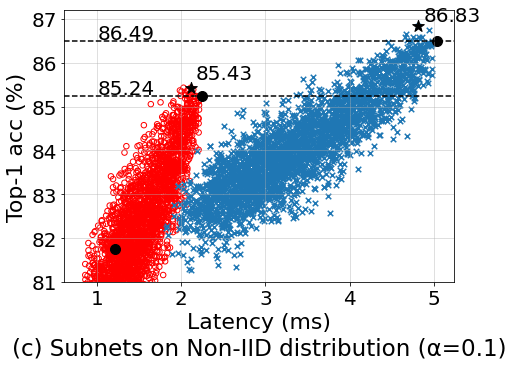

In [18]:
lat2s = [lat2s[i]/0.032 for i in range(len(lat2s))]
lat1s = [lat1s[i]/0.032 for i in range(len(lat1s))]
import copy
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,5))

print(lat1s[0], lat2s[0])
# plot subnets of effim
plt.scatter(lat1s[1:], acc1s[1:], marker='o', s=30, c='none',edgecolors='r')
plt.scatter(lat2s[1:], acc2s[1:], marker='x', s=30)
# plt.legend(['original DNN models', 'EfficientNetV2-S subnet', 'EfficientNetV2-M subnet'],prop={'family' : 'Times New Roman', 'size'   : 15})
'''mark the best points'''
maxpointidx = np.argmax(acc1s)
plt.annotate('85.43', (lat1s[maxpointidx]+0.002/0.032, acc1s[maxpointidx]+0.2), fontsize=20)
print(lat1s[maxpointidx])
plt.scatter(lat1s[maxpointidx], acc1s[maxpointidx],  c='black', marker='*', s=150)
maxpointidx = np.argmax(acc2s)
plt.annotate('86.83', (lat2s[maxpointidx]+0.002/0.032, acc2s[maxpointidx]+0.12), fontsize=20)
print(lat2s[maxpointidx])
plt.scatter(lat2s[maxpointidx], acc2s[maxpointidx],  c='black', marker='*', s=150)


plt.xlabel('Latency (ms)',fontdict={'size'   : 22})
plt.ylabel('Top-1 acc (%)',fontdict={'size'   : 22})
plt.grid(True, alpha=0.5)

plt.axhline(acc1s[0], ls="--",c='black')
plt.axhline(acc2s[0], ls="--",c='black')
plt.annotate('86.49',(1, acc2s[0]+0.05), fontsize=20 )
plt.annotate('85.24',(1, acc1s[0]+0.05), fontsize=20 )
plt.ylim(81,87.2)
plt.scatter([lat2s[0]]+[lat1s[0]]+[0.03875/0.032], [acc2s[0]]+[acc1s[0]]+[ 81.744],  c='black', s=100, marker='o')
plt.tick_params(labelsize=12)
plt.yticks(size = 20)
plt.xticks(size = 20)
# plt.title('(c) subnet performance on alpha=0.01', y=-0.25,fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.title('(c) Subnets on Non-IID distribution (α=0.1)', y=-0.29,fontdict={'size'   : 23})
plt.savefig('D:/scientific_work/project1/paper/figs/alpha01.PNG',bbox_inches='tight')
plt.show()


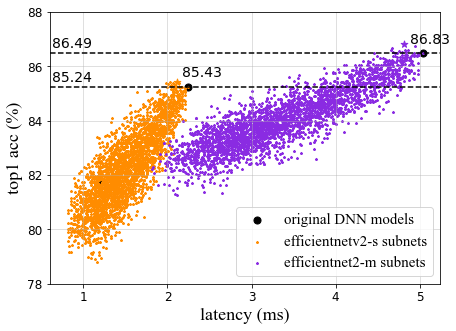

In [149]:
import copy
import matplotlib.pyplot as plt
import numpy as np
lat2s = [lat2s[i]/0.032 for i in range(len(lat2s))]
lat1s = [lat1s[i]/0.032 for i in range(len(lat1s))]
plt.figure(figsize=(7,5))
plt.scatter([lat2s[0]]+[lat1s[0]]+[0.03875/0.032], [acc2s[0]]+[acc1s[0]]+[ 81.744],  c='black', s=50, marker='o')
# plot subnets of effim
plt.scatter(lat1s[1:], acc1s[1:], c='darkorange', marker='*', s=5)
plt.scatter(lat2s[1:], acc2s[1:], c='blueviolet', marker='*', s=5)
plt.legend(['original DNN models', 'efficientnetv2-s subnets', 'efficientnet2-m subnets'], prop={'family' : 'Times New Roman', 'size'   : 15})
'''mark the best points'''
maxpointidx = np.argmax(acc1s)
plt.annotate(str(round(acc1s[maxpointidx],2)), (lat1s[maxpointidx]+0.002/0.032, acc1s[maxpointidx]+0.2), fontsize=14)
plt.scatter(lat1s[maxpointidx], acc1s[maxpointidx],  c='darkorange', marker='*', s=50)
maxpointidx = np.argmax(acc2s)
plt.annotate(str(round(acc2s[maxpointidx],2)), (lat2s[maxpointidx]+0.002/0.032, acc2s[maxpointidx]), fontsize=14)
plt.scatter(lat2s[maxpointidx], acc2s[maxpointidx],  c='blueviolet', marker='*', s=50)


plt.xlabel('latency (ms)',fontdict={'family' : 'Times New Roman', 'size'   : 18})
plt.ylabel('top1 acc (%)',fontdict={'family' : 'Times New Roman', 'size'   : 18})
plt.grid(True, alpha=0.5)

plt.axhline(acc1s[0], ls="--",c='black')
plt.axhline(acc2s[0], ls="--",c='black')
plt.annotate(str(round(acc2s[0],2)),(0.02/0.032, acc2s[0]+0.2), fontsize=14 )
plt.annotate(str(round(acc1s[0],2)),(0.02/0.032, acc1s[0]+0.2), fontsize=14 )
plt.ylim(78,88)
# plt.xlim(0.02, 0.18)
plt.tick_params(labelsize=12)
# plt.title('(b) subnet performance on alpha=0.1', y=-0.25,fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.savefig('D:/scientific_work/project1/paper/figs/alpha01.PNG')
plt.show()

In [ ]:
[81.41276596004406, 81.06808510898021, 80.08936170342628, 79.15319149001101, 79.22553191554293, 77.84468085106383, 78.12765957446808, 75.85531915153341, 75.50000000129862, 73.65106383108585] , [0.16174145419188224, 0.15310402109165386, 0.1437453886475226, 0.1356900027303985, 0.1265200942453712, 0.11397629073171905, 0.11071617916376902, 0.0967451273792922, 0.09170269002818096, 0.08476627234256628]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ratios = []
'''Jetson Nano'''
#mbv2 bs = 1
ouraccs, ourlats = get_ours([(72.40000012207031, 0.0414144604427175), [(71.7000001220703, [0, -2, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0379153385496976, 71.7000001220703), 71.34042553191489, 0.0379153385496976], [(71.10000012207031, [0, -2, -2, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.036571331191481204, 71.10000012207031), 71.08936170212766, 0.036571331191481204], [(70.7, [0, -2, 0, 1, 99, -2, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0], 0.03460247235788139, 70.7), 70.09148936170213, 0.03460247235788139], [(69.26666678873698, [0, -2, 1, 99, 0, 0, 0, -2, -2, 1, 99, 0, 0, 0, 0, 0, 0], 0.03185391963872694, 69.26666678873698), 69.01914893617021, 0.03185391963872694], [(67.86666678873698, [0, 0, 2, 99, 99, 1, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0], 0.030155149617589506, 67.86666678873698), 68.25744680851064, 0.030155149617589506], [(67.40000012207031, [0, -2, -1, 0, 1, 99, 1, 99, 1, 99, 1, 99, 0, 0, -2, 0, 0], 0.02837994582670972, 67.40000012207031), 67.05106383011189, 0.02837994582670972], [(65.53333335367839, [0, -2, 2, 99, 99, 2, 99, 99, -2, 1, 99, -1, 0, -2, 0, 0, 0], 0.026079801090976643, 65.53333335367839), 65.74680851096295, 0.026079801090976643], [(64.26666678873698, [0, -2, 2, 99, 99, -2, 0, 1, 99, 2, 99, 99, -2, 0, 1, 99, 0], 0.0245313118573717, 64.26666678873698), 64.57872340425531, 0.0245313118573717], [(62.76666678873698, [0, -2, 1, 99, 1, 99, 2, 99, 99, -2, 1, 99, 2, 99, 99, -2, 0], 0.0224569548939105, 62.76666678873698), 62.785106382978725, 0.0224569548939105], [(59.033333374023435, [0, -2, 2, 99, 99, 1, 99, 1, 99, 2, 99, 99, 2, 99, 99, 1, 99], 0.020128587134798665, 59.033333374023435), 58.902127660223776, 0.020128587134798665]])  # TODO
slim_lats, slim_accs = [0.0407654, 0.0391327, 0.03797, 0.036725], [70.5, 68.9, 64.4, 59.7]
lego_acc, lego_lats = [72.62978723534117, 70.97021276141227, 44.0021276615224, 36.1595744739289] , [0.04139548799265986, 0.03987615881954946, 0.03897489991076415, 0.03825378736923371]
ratios.append(get_ratio(lego_lats, lego_acc, ourlats, ouraccs))

#resnet50 bs=1
ouraccs, ourlats = [80.07659574208361, 78.99787, 78.01702127529713, 77.13404255513942, 76.82127660158847, 75.31489361442404, 73.9404255390573, 
                    72.88297872080702, 71.16595744226333, 69.04893616761552, 67.35531915607858] , [0.09802801951915525, 0.0892646272844295, 0.08323883053451078, 0.07932889660863972, 0.0767433699158123, 0.07074933626181305, 0.0683757708622859, 0.0619522975041316, 0.056059509615435654, 0.0536243987322651, 0.04869463451729969]
legoaccs, legolats = [80.07659574208361, 79.40638298067134, 77.2978723378283, 76.10638297417823, 70.59787233912691, 64.3978723384776, 46.81489362091714] , [0.10075669443801288, 0.0942637783117378, 0.08919333367234328, 0.08531000259074759, 0.07956142598606916, 0.07456082784487995, 0.0700065591308441]
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [0.09761952872228141, 0.08497167837740195, 0.07370117216399222, 0.0623439827350655]
skiplats, skipaccs = [0.09802801951915525, 0.08963994756590164, 0.0846621296477557, 0.08035603813503099, 0.07536617728778751, 0.07292690404681458, 0.06620729328397923, 0.05989849846498623, 0.0587743309429258, 0.05340741629584577, 0.04899738544604451] , [75.93333333333334, 74.8, 74.03333333333333, 72.66666666666667, 69.8, 66.3, 64.8, 58.233333333333334, 49.46666666666667, 46.4, 34.4]

#resnet101 bs=1
ouraccs, ourlats = [81.95531914114444, 81.41276596004406, 81.06808510898021, 80.08936170342628, 79.22553191554293, 78.12765957446808, 75.85531915153341, 75.50000000129862, 73.65106383108585] , [0.17033889558580192, 0.16174145419188224, 0.15310402109165386, 0.1437453886475226, 0.1265200942453712, 0.11071617916376902, 0.0967451273792922, 0.09170269002818096, 0.08476627234256628]

#[81.95531914114444, 81.2340425596846, 80.54468084586935, 80.2957446834483, 79.30425532564203, 78.08510639206906, 77.2553191508841, 76.2127659574468, 75.5127659632906, 73.76595744421127] , [0.17033889558580192, 0.16180343820591167, 0.1480754047933251, 0.14419917145160713, 0.12261310249868065, 0.11362079177239931, 0.10718449679288, 0.10129272576534387, 0.09143223907008316, 0.08433648552557435]
legoaccs, legolats = [81.95531914114444, 80.6574468065627, 79.97659574078499, 78.81276596134266, 77.52340425921501, 75.05106383368309, 67.7851063881732, 31.50638298099599] , [0.1750111892969921, 0.16358724266591698, 0.1548388245129826, 0.14669994874434034, 0.13931810735452055, 0.13037390419931122, 0.12217626908812859, 0.11341304008406822]

# legoaccs, legolats = [81.95531914114444, 81.20851063699925, 80.37659574727809, 78.81063831085855, 78.69574468734416, 76.63829786844457, 74.70425532304479, 72.44893617410862, 64.87659574403155, 65.05744681175719, 42.77659574597947] , [0.3132486463797213, 0.2962714277132593, 0.2795389902712119, 0.26450685298804083, 0.24950894683298439, 0.23480900610336153, 0.21769886546664768, 0.19981025686167708, 0.1876307400790128, 0.17213430067505497, 0.15574587956823482]
skipaccs, skiplats = [75.56666666666666, 74.4, 72.033333333, 67.0, 62.83333, 54.13333] , [0.17033889558580192, 0.12284042859318278, 0.11432069479817092, 0.10989605055914983, 0.10101233347497804, 0.09000359400354252]

'''xiaomi'''
#mbv2 bs = 1
ouraccs, ourlats = get_ours([(72.3999999593099, 14.92), [(71.80000012207032, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0], 14.1, 71.80000012207032), 71.8000000006493, 14.1], [(71.23333329264322, [0, -2, 0, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13.3, 71.23333329264322), 70.92340426246156, 13.3], [(70.7666665242513, [0, -2, 0, 0, -2, 0, 0, 0, 0, 0, 0, -2, -2, 0, 0, 0, 0], 12.57, 70.7666665242513), 70.10212766411964, 12.57], [(69.86666662597656, [0, -2, 1, 99, 0, -1, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0], 11.9, 69.86666662597656), 69.65106383108585, 11.9], [(68.16666664632162, [0, -2, -1, 0, 1, 99, 0, 0, 1, 99, 0, 1, 99, 0, 0, 0, 0], 10.64, 68.16666664632162), 68.57872340685256, 10.64], [(67.86666689046224, [0, -2, 1, 99, 0, 1, 99, -2, 0, -1, 1, 99, 0, 0, 0, 0, 0], 10.360000000000001, 67.86666689046224), 67.70638297677547, 10.360000000000001], ]
                            +[[(67.73333325195313, [0, -2, 1, 99, 2, 99, 99, 1, 99, 1, 99, -2, 0, 0, 0, 0, 0], 9.530000000000001, 67.73333325195313), 67.58297872340425, 9.530000000000001], [(65.76666678873698, [0, -2, 1, 99, 2, 99, 99, 1, 99, 0, 2, 99, 99, 0, 0, 0, 0], 8.83, 65.76666678873698), 65.86808511222677, 8.83], [(64.43333327229817, [0, -1, 1, 99, 1, 99, 1, 99, -1, 2, 99, 99, -2, 1, 99, 0, 0], 7.879999999999999, 64.43333327229817), 63.57872340685256, 7.879999999999999], [(62.43333337402344, [0, -1, 1, 99, 1, 99, 1, 99, 1, 99, 2, 99, 99, 1, 99, -2, 0], 7.4399999999999995, 62.43333337402344), 62.14042553451213, 7.4399999999999995]])  # TODO
# prunedaccs, prunedlats = get_ours()  # TODO
lego_acc, lego_lats = [72.62978723534117, 72.02127659964054, 70.97021276141227, 44.0021276615224, 44.0021276615224, 44.0021276615224, 44.0021276615224] ,[14.790000000000001, 13.840000000000002, 12.81, 10.139999999999999, 10.139999999999999, 10.139999999999999, 10.139999999999999]
lim_lats, slim_accs = [7.41, 8.59, 12.2, 14.36], [70.5, 68.9, 64.4, 59.7]
slim_lats.reverse()

#resnet50 bs=1
ouraccs, ourlats = [80.07659574208361, 79.58936170147835, 78.99787233588036, 77.79361702647108, 77.13829787428836, 76.62765957187085, 75.42553192203603, 73.70425532369411, 72.57659574208361, 71.12127660093917, 68.47021277050261] , [91.91999999999999, 87.03999999999999, 80.05, 76.73, 69.69, 64.7, 60.25, 57.95, 52.0, 48.82, 42.84]

legoaccs, legolats = [80.07659574208361, 79.45531914633892, 78.87872340815117, 76.68723403995595, 74.53404254864631, 73.02127659379676, 66.40425531914893, 56.94468084781728, 35.04680851323554] , [89.68, 82.03, 78.62, 75.53000000000002, 67.01, 62.51, 57.529999999999994, 49.31999999999999, 44.48]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [53.54, 64.62, 76.11, 89.65]
slimv1_acc.reverse()
skiplats, skipaccs = [93.91999999999999, 85.69999999999999, 82.78, 78.34, 74.58, 69.67, 64.87, 59.0, 55.160000000000004, 50.44, 45.64] , [75.93333333333334, 74.63333333333334, 75.23333333333333, 73.63333333333334, 73.03333333333333, 71.03333333333333, 67.2, 59.63333333333333, 50.2, 49.7, 34.53333333333333]

#resnet101 bs=1
ouraccs, ourlats =  [81.96666670735677, 81.4361702153632, 81.04893617021277, 79.97446808575569, 79.73191489491565, 79.38936170342627, 78.91276595809612, 77.92978723469186, 77.58085106447909, 76.0085106395965, 75.44680851128761],[213.93, 200.42999999999998, 190.42, 174.62, 165.56, 158.8, 146.02999999999997, 135.51000000000002, 128.06, 113.18000000000002, 106.57000000000001]
legoaccs, legolats = [81.95531914114444, 80.83617021925906,78.28723403995595, 76.72553191684155, 73.51063829787235, 72.80851064414166, 69.61914893941676, 67.06595744810713] , [207.17999999999998, 196.82, 151.26, 143.17, 131.68, 123.03999999999999, 112.69999999999999, 103.5]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
skipaccs, skiplats =[75.56666666666666, 74.8, 73.0, 72.4, 62.433, 61.2667, 50.2] , [213.93, 171.12, 152.59, 135.12, 122.49000000000001, 116.91999999999999, 100.95]

'''3090'''
#mbv2 bs = 32
ouraccs, ourlats = get_ours([(72.40000012207031, 0.01088502111661718), [(71.86666666666666, [0, 0, -2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0], 0.010066835393893706, 71.86666666666666), 71.51063829917096, 0.010066835393893706], 
                             [(71.0333334350586, [0, 0, 0, -1, 0, -1, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0], 0.00970991024833746, 71.0333334350586), 70.30425531914894, 0.00970991024833746], 
#                              [(70.40000010172525, [0, 1, 99, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.009002531276029698, 70.40000010172525), 69.47021276660676, 0.009002531276029698], 
                             [(70.46666666666667, [0, -2, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.00846786522895135, 70.46666666666667), 70.2808510644791, 0.00846786522895135], 
                             [(69.50000012207032, [0, -2, 1, 99, 0, -2, 0, 0, 0, -2, 0, 0, 0, 0, -2, 0, 0], 0.008022115884048022, 69.50000012207032), 68.974468086405, 0.008022115884048022], 
                             [(68.80000012207032, [0, -2, 2, 99, 99, -2, 0, 1, 99, 0, 0, -2, 0, 0, 0, 0, 0], 0.007257031857295983, 68.80000012207032), 68.79787234075019, 0.007257031857295983], 
                             [(67.63333333333334, [0, -2, 2, 99, 99, 0, -2, 1, 99, 0, 1, 99, 0, 0, 0, 0, 0], 0.007026862740069067, 67.63333333333334), 67.31063829787234, 0.007026862740069067], 
                             [(66.46666668701172, [0, -1, 2, 99, 99, -1, 0, 1, 99, 1, 99, -2, 0, 0, 0, 0, 0], 0.006176193008136391, 66.46666668701172), 66.68297872405357, 0.006176193008136391], 
                             [(64.2000001220703, [0, -2, 2, 99, 99, -2, 1, 99, -2, 1, 99, 2, 99, 99, -2, -2, 0], 0.005760986008244252, 64.2000001220703), 63.9702127662821, 0.005760986008244252], 
                             [(63.366666687011715, [0, -1, 2, 99, 99, 1, 99, 1, 99, -1, 2, 99, 99, 0, 0, -2, 0], 0.005201143376967485, 63.366666687011715), 63.10638297904806, 0.005201143376967485]])  # TODO
slim_lats, slim_accs = [0.005034876507660218, 0.0063497, 0.00995109471987721, 0.01144876049513801], [70.5, 68.9, 64.4, 59.7]
slim_lats.reverse()
lego_acc, lego_lats = [72.63829787234043, 70.974468086405, 70.974468086405, 44.01276595744681, 44.01276595744681,  36.14255319213867] , [0.011013847417914974, 0.009598421960957209, 0.009598421960957209, 0.008303660475118586, 0.008303660475118586, 0.007235261167542955]

# resnet50
ouraccs, ourlats = get_ours([(80.03333357747395, 0.02365760361596252), [(79.09999993896484, [0, 0, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.022429195005395385, 79.09999993896484), 79.17446808250914, 0.022429195005395385], [(79.43333321126302, [0, 1, 99, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.020512275612249838, 79.43333321126302), 78.99148935715695, 0.020512275612249838], [(78.56666670735677, [1, 99, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.019141950655043198, 78.56666670735677), 78.40638297417823, 0.019141950655043198], [(77.93333327229817, [1, 99, 1, 99, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.01791440709511538, 77.93333327229817), 77.87021276725606, 0.01791440709511538], [(77.30000014241537, [2, 99, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0173386853090365, 77.30000014241537), 77.5765957414343, 0.0173386853090365], [(76.26666687011719, [0, 2, 99, 99, 0, 1, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0], 0.01604756932980725, 76.26666687011719), 75.76382978658474, 0.01604756932980725], [(74.90000014241537, [1, 99, 1, 99, 1, 99, 2, 99, 99, 0, 0, 0, 0, 0, 0, 0], 0.015194695046607483, 74.90000014241537), 73.93829787948283, 0.015194695046607483], [(72.40000006103516, [2, 99, 99, 1, 99, 2, 99, 99, 0, 0, 1, 99, 0, 0, 1, 99], 0.013701116039099473, 72.40000006103516), 72.17234042293468, 0.013701116039099473], [(71.30000006103515, [1, 99, 2, 99, 99, 2, 99, 99, 1, 99, 0, 1, 99, 0, 0, 0], 0.012974105579533773, 71.30000006103515), 70.82340426051363, 0.012974105579533773], [(68.16666672770182, [2, 99, 99, 1, 99, 2, 99, 99, 0, 1, 99, 1, 99, 2, 99, 99], 0.011797388742802587, 68.16666672770182), 67.93191489361702, 0.011797388742802587]])  # TODO
legoaccs, legolats = [80.07659574208361, 63.470212767256065, 75.96595744875644, 57.66170213025681, 52.87872340100877, 42.47234042228536] , [0.02490761283043777, 0.02349519341699173, 0.022392669816190217, 0.02112284530238604, 0.01975998025065817, 0.01863962687896996]
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [0.0263957, 0.021965, 0.0180176, 0.01332]
skiplats, skipaccs = [ 0.02365760361596252, 0.020774318518417795, 0.020776338064029006, 0.019546586968871914, 0.018569838568027384, 0.016452322316557653, 0.016451482331200744, 0.015222312810274774, 0.013742147906402472, 0.012472869457679338, 0.011560256848198005] , [75.93333333333334, 75.23333333333333, 74.83333333333333, 74.03333333333333, 72.8, 70.6, 70.86666666666666, 67.7, 58.266666666666666, 50.56666666666667, 38.0]

# resnet 101
ouraccs, ourlats = [81.95531914114444, 81.29574467565658, 80.8914893539104, 80.3702127685547, 79.81914894915641, 79.10425531135722, 79.02340424752742, 77.89574467305934, 76.37234042358398, 75.62978724053565, 74.00425532044756] , [0.04077928116981021, 0.03785974630277059, 0.035943912475070325, 0.033988489227390416, 0.0305093776001053, 0.029801400044981916, 0.028477365591648377, 0.025883904088274557, 0.024363410935384012, 0.02224808879131369, 0.02020963381169287]
#[81.95531914114444, 81.29574467565658, 80.8914893539104, 80.3702127685547, 79.81914894915641, 79.10425531135722, 79.02340424752742, 77.89574467305934, 76.37234042358398, 75.62978724053565, 74.00425532044756] , [0.04077928116981021, 0.03785974630277059, 0.035943912475070325, 0.033988489227390416, 0.0305093776001053, 0.029801400044981916, 0.028477365591648377, 0.025883904088274557, 0.024363410935384012, 0.02224808879131369, 0.02020963381169287]

legoaccs, legolats = [81.95531914114444, 79.45319149845204, 66.30212766606758, 65.19999999610414, 55.038297871041806] , [0.04239349401041921, 0.0402633681315206, 0.03727840541748887, 0.03564915728658549, 0.033679537540383275]
skipaccs, skiplats = [75.56666666666666, 74.467, 73.367, 71.0, 64.8, 59.8, 51.467] , [0.04077928116981021, 0.030707334248682445, 0.030021445772077927, 0.02708020884641569, 0.025571936510680463, 0.023859539974914478, 0.022318143868476192]


In [424]:
0.37600468436876933333333333333333*10+0.183586920764711167*50

12.93939288192325

In [425]:
0.25054666666666666666666666666667*600

150.32799999999997

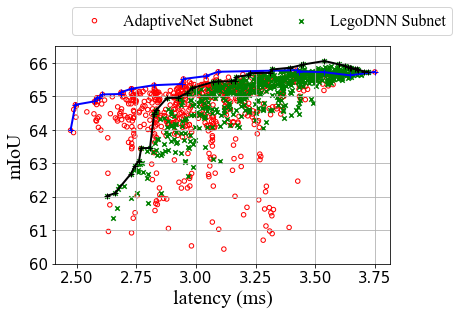

In [222]:
AXSIZE=20
TITLESIZE=20
labloc=-0.33
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":15})
s_ours = plt.scatter(ourlats[0:], ouraccs[0:], label='Sub DNN', s=20, marker='o',c='none',edgecolors='r')
# plt.scatter(ourlats[0], ouraccs[0],  c='g', marker='*', s=200, label='original DNN')
l_ours = linex, liney = get_extreme_points(ourlats, ouraccs, 50)
s_lego = plt.plot(linex, liney, marker='+', linewidth=2.0, color='b', label='trade-off')

s_lego = plt.scatter(legolats[0:], legoaccs[0:],  c='green', label='Sub DNN', s=20, marker='x')
# plt.scatter(ourlats[0], ouraccs[0],  c='g', marker='*', s=200, label='original DNN')
linex, liney = get_extreme_points(legolats, legoaccs, 50)
plt.plot(linex, liney, marker='+', linewidth=2.0, color='black', label='trade-off')
plt.xlabel('latency (ms)',fontdict={'family' : 'Times New Roman', 'size'   : AXSIZE})
plt.ylabel('mIoU',fontdict={'family' : 'Times New Roman', 'size'   : AXSIZE})
plt.ylim(60, 66.5)
plt.legend(bbox_to_anchor=(0.05,1.05),ncol=2, loc=3, borderaxespad=0,handles=[s_ours, s_lego], labels=['AdaptiveNet Subnet','LegoDNN Subnet'], prop={'family':'Times New Roman','size':16})
plt.grid()
plt.savefig("D:/scientific_work/project1/paper/figs/segmentation.PNG",bbox_inches='tight')  # savefig一定要在show之前
# plt.title("(a)Semantic Segmentation", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : TITLESIZE})


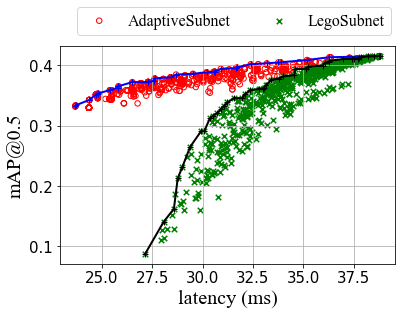

In [230]:
AXSIZE=20
TITLESIZE=20
labloc=-0.33

import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":15})
s_ours=plt.scatter(ourdetectlats[0:], ourdetectaccs[0:],  s=30,c='none',edgecolors='r')
# print(c1)
# plt.scatter(lats[0], accs[0],  c='g', marker='*', s=200, label='original DNN')
linex, liney = get_extreme_points(ourdetectlats, ourdetectaccs, 50)
plt.plot(linex, liney, marker='+', linewidth=2.0, color='b')

s_lego=plt.scatter(legodetectlats[0:], legodetectaccs[0:],  c='green', s=30, marker='x')
# plt.scatter(lats[0], accs[0],  c='g', marker='*', s=200, label='original DNN'
linex, liney = get_extreme_points(legodetectlats, legodetectaccs, 50)
plt.plot(linex, liney, marker='+', linewidth=2.0, color='black')
plt.xlabel('latency (ms)',fontdict={'family' : 'Times New Roman', 'size'   : AXSIZE})
plt.ylabel('mAP@0.5',fontdict={'family' : 'Times New Roman', 'size'   : AXSIZE})
plt.grid()
# plt.title("(b)Object Detection", y=labloc,fontdict={'family' : 'Times New Roman', 'size'   : TITLESIZE})
# plt.ylim(0.2, 0.43)
label_list = ['AdaptiveSubnet','LegoSubnet']

plt.legend(bbox_to_anchor=(0.05,1.05),ncol=2, loc=3, borderaxespad=0,handles=[s_ours, s_lego], labels=['AdaptiveSubnet','LegoSubnet'], prop={'family':'Times New Roman','size':16})

plt.savefig('D:/scientific_work/project1/paper/figs/detection.PNG',bbox_inches='tight')
plt.show()


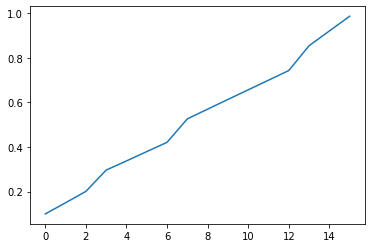

In [3]:
# lats = [0.003832263175887291, [0.005697158852008858, 0.005768513438677547, 0.005935271581013997], [0.0048128571173157355, 0.004808404228904031, 0.006011991789846709], [0.0047856653579557784, 0.005995331388531309, 0.006010125381777985], [0.008829020490550031, 0.008819199571705828, 0.008831965802895903], [0.004032753934763899, 0.004025016168151239, 0.004031337872900144], [0.004142262718894265, 0.004018790794141365, 0.0062322833321311255], [0.004038194213250671, 0.006206510042903399, 0.006221479839748806], [0.010374753162114307, 0.01030173927846581, 0.010300542369033352], [0.004232625768642233, 0.0042090680864122175, 0.00421348244252831], [0.004282469701285314, 0.004210363734852184, 0.004281643665198124], [0.004320924932306463, 0.0042396771787392975, 0.004220333966341886], [0.0044577964628585666, 0.004427437830452967, 0.004208087921142578], [0.004303284365721423, 0.0042128442513822304, 0.00426378876271874], [0.004370821846856011, 0.004258594127616497, 0.004235640920773901], [0.004278344337386314, 0.004223715175281872, 0.004253433208272915], [0.004357027285026781, 0.004262302861069188, 0.004355765352345476], [0.004235178533226552, 0.004268041764846956, 0.004222212415752989], [0.004225451536852904, 0.00431420345499058, 0.004254863719747524], [0.004310516395954171, 0.004264944731587112, 0.004228736415053859], [0.004257565796977341, 0.004227883888013435, 0.004232864187221334], [0.004258095616042012, 0.004300307745885367, 0.004242372031163687], [0.00429343454765551, 0.004224972291426225, 0.004253828164302941], [0.004301401099773368, 0.004321837666058781, 0.00431420345499058], [0.0042987857202086786, 0.0042603280809190534, 0.004321820808179451], [0.0043217365187827985, 0.004252267606330641, 0.004219327310119012], [0.004212247000800239, 0.004249331927058672, 0.004222190741336707], [0.0042215140178950145, 0.004234600548792367, 0.0042198836201369164], [0.004218640953603417, 0.004211312592631638, 0.004344745115800338], [0.004238665705979473, 0.004226397986363883, 0.006369374015114524], [0.00425969229804145, 0.006371486066567777, 0.0064072584865069145], [0.0110205038629397, 0.010929683242181335, 0.010915021703700827], [0.006592594011865481, 0.006522506174415049], [0.0066064969457761205], 0.0013181513006036932]
lats = lats = [0.003638958053844031, [0.006113355375053891, 0.005743234851288556, 0.005781271784600605], [0.004910601421343443, 0.005286875377131944, 0.006455895892752453], [0.004999541119986952, 0.006436379856887869, 0.006102952670094162], [0.009373506176033148, 0.008862508180548116, 0.008866496708082117], [0.004035964857375741, 0.004172042859437872, 0.0040947458018427306], [0.004105430781641931, 0.004049013290915601, 0.006207328177614754], [0.004083707579800915, 0.006216889639761934, 0.006211243345585954], [0.010310401087221891, 0.010276270550628968, 0.010252549098088192], [0.004282641171611671, 0.004232876276890171, 0.004240252102497828], [0.004262510350715357, 0.004288678185198219, 0.004234122592071227], [0.004236986007180102, 0.004247698098122077, 0.0042633173059061615], [0.004238602309721369, 0.004316083563610064, 0.0063535337862761125], [0.0042528300779719015, 0.006390615450498651, 0.006383929364258629], [0.010920461603630346, 0.01082674396476618, 0.010998056086409452], [0.006491082169140462, 0.006471979179509906], [0.006481839661614153], 0.001289599715267934]
latency = lats[0]
sofars = []
for i in range(1, len(lats) - 1):
    latency += lats[i][0]
    sofars.append(latency)
latency += lats[-1]
sofars = [sofars[i] / latency for i in range(len(sofars))]
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(sofars))], sofars)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:304: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


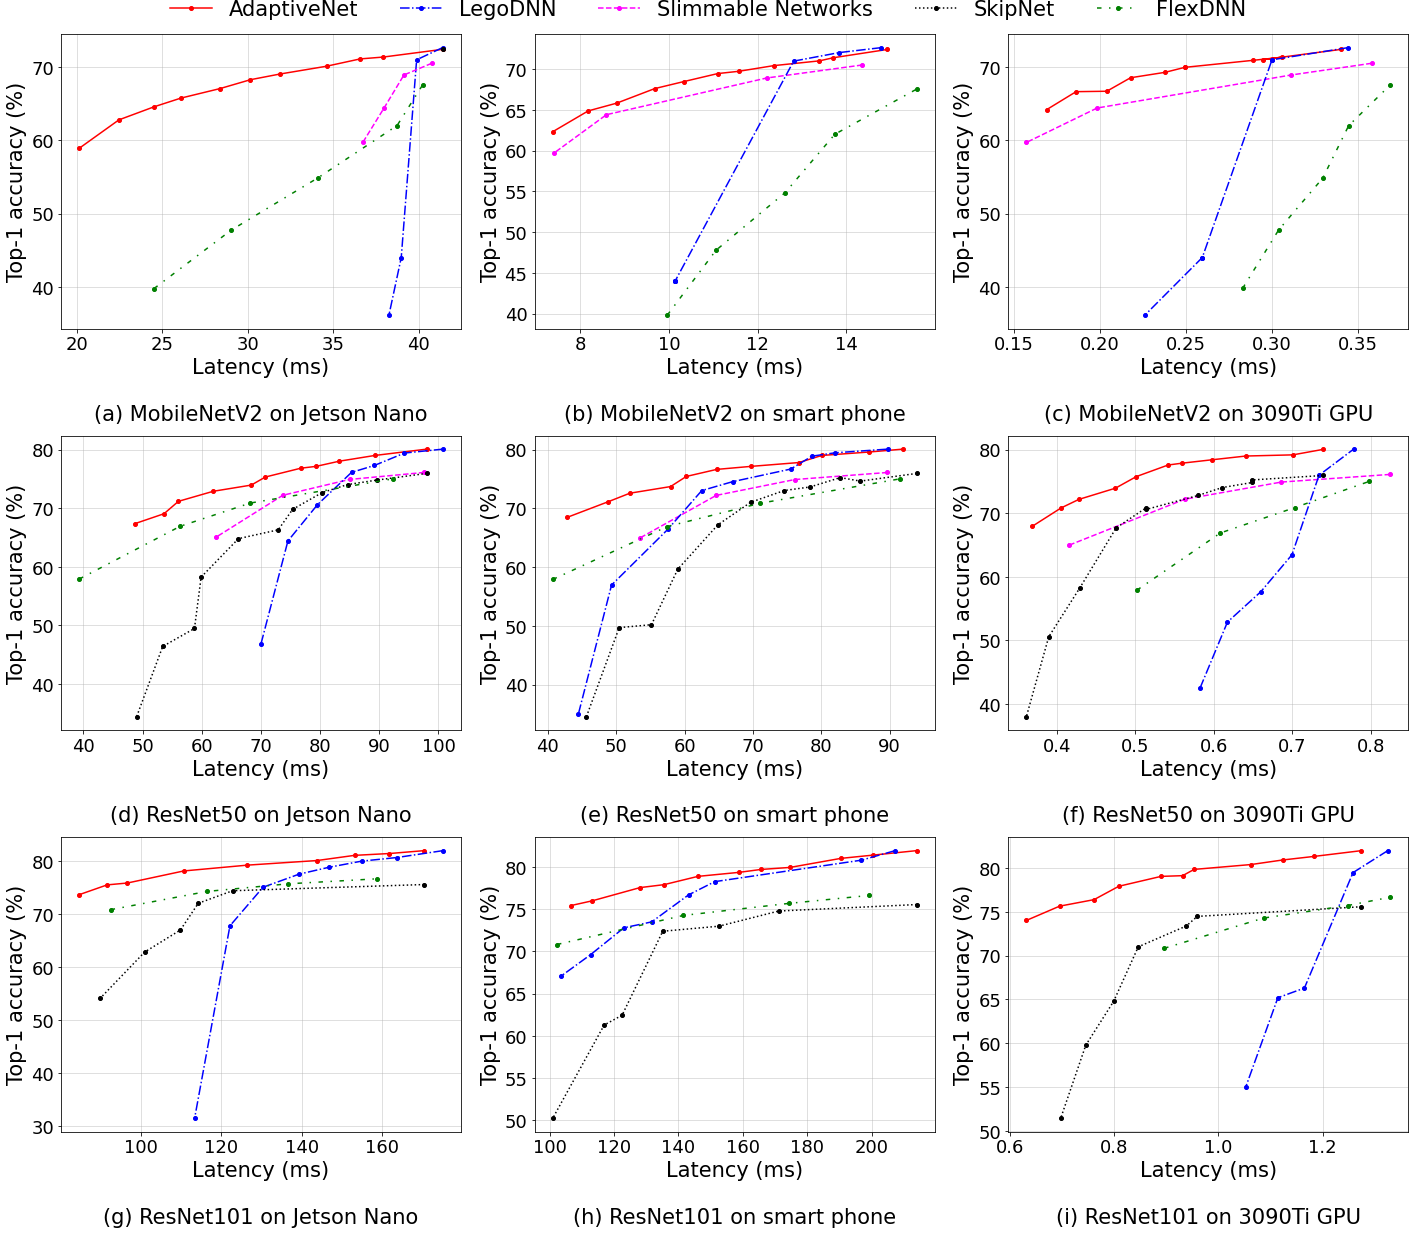

0.17846066492001295


In [41]:
import copy


def get_extreme_points(xs, ys, iter_num=60):
    xandy = []
    for i in range(len(xs)):
        xandy.append([xs[i], ys[i]])
    xandy.sort(key=lambda x: x[0])
    for i in range(len(xandy)):
        xs[i] = xandy[i][0]
        ys[i] = xandy[i][1]

    extreme_idxs = [0]
    for idx in range(1, len(xs) - 1):
        if ys[idx] >= ys[idx - 1] and ys[idx] >= ys[idx + 1]:
            extreme_idxs.append(idx)
    for _ in range(iter_num):
        cp_extreme_idxs = copy.deepcopy(extreme_idxs)
        for idx in range(1, len(extreme_idxs) - 1):
            if ys[extreme_idxs[idx]] <= ys[extreme_idxs[idx - 1]] and ys[extreme_idxs[idx]] <= ys[
                extreme_idxs[idx + 1]]:
                cp_extreme_idxs[idx] = -1
        while -1 in cp_extreme_idxs:
            cp_extreme_idxs.remove(-1)
        extreme_idxs = cp_extreme_idxs
    extreme_idxs.append(len(xs) - 1)
    extreme_idxs.sort()
    new_xs = [xs[i] for i in extreme_idxs]
    new_ys = [ys[i] for i in extreme_idxs]
    xs = new_xs
    ys = new_ys
    return xs, ys


def get_ours(ourinfos, raw=False):
    ouraccs, ourlats = [], []
    if raw:
        for info in ourinfos:
            ouraccs.append(info[-2])
            ourlats.append(info[-1])
    else:
        for info in ourinfos:
            ouraccs.append(info[-2])
            ourlats.append(info[-1])
    return ouraccs, ourlats


def filter_slim(legoaccs, legolats):
    legoaccnew, legolatnew = [], []
    for i in range(len(legolats)):
        if 8 < legolats[i] <= 15.5:
            legoaccnew.append(legoaccs[i])
            legolatnew.append(legolats[i])
    return legoaccnew, legolatnew


import numpy as np


def get_ratio(lego_lats, lego_acc, ourlats, ouraccs):
    for legoidx in range(len(lego_lats)):
        baseline_acc, baseline_lat = lego_acc[legoidx], lego_lats[legoidx]
        our_chosen = -1
        for ouridx in range(len(ourlats) - 1):
            if ourlats[ouridx] < baseline_lat:
                our_chosen = ouridx
                break
            if ourlats[ouridx] > baseline_lat and ourlats[ouridx + 1] < baseline_lat:
                our_chosen = ouridx + 1
                break
        ratios.append((ouraccs[our_chosen] - baseline_acc) / baseline_acc)
    return np.mean(ratios)
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(20, 17))
plt.rcParams.update({"font.size":18})
# x=plt.title("validation_acc",fontsize=20)
ratios = []
'''Jetson Nano'''
#mbv2 bs = 1
ouraccs, ourlats = get_ours([(72.40000012207031, 0.0414144604427175), [(71.7000001220703, [0, -2, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0379153385496976, 71.7000001220703), 71.34042553191489, 0.0379153385496976], [(71.10000012207031, [0, -2, -2, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.036571331191481204, 71.10000012207031), 71.08936170212766, 0.036571331191481204], [(70.7, [0, -2, 0, 1, 99, -2, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0], 0.03460247235788139, 70.7), 70.09148936170213, 0.03460247235788139], [(69.26666678873698, [0, -2, 1, 99, 0, 0, 0, -2, -2, 1, 99, 0, 0, 0, 0, 0, 0], 0.03185391963872694, 69.26666678873698), 69.01914893617021, 0.03185391963872694], [(67.86666678873698, [0, 0, 2, 99, 99, 1, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0], 0.030155149617589506, 67.86666678873698), 68.25744680851064, 0.030155149617589506], [(67.40000012207031, [0, -2, -1, 0, 1, 99, 1, 99, 1, 99, 1, 99, 0, 0, -2, 0, 0], 0.02837994582670972, 67.40000012207031), 67.05106383011189, 0.02837994582670972], [(65.53333335367839, [0, -2, 2, 99, 99, 2, 99, 99, -2, 1, 99, -1, 0, -2, 0, 0, 0], 0.026079801090976643, 65.53333335367839), 65.74680851096295, 0.026079801090976643], [(64.26666678873698, [0, -2, 2, 99, 99, -2, 0, 1, 99, 2, 99, 99, -2, 0, 1, 99, 0], 0.0245313118573717, 64.26666678873698), 64.57872340425531, 0.0245313118573717], [(62.76666678873698, [0, -2, 1, 99, 1, 99, 2, 99, 99, -2, 1, 99, 2, 99, 99, -2, 0], 0.0224569548939105, 62.76666678873698), 62.785106382978725, 0.0224569548939105], [(59.033333374023435, [0, -2, 2, 99, 99, 1, 99, 1, 99, 2, 99, 99, 2, 99, 99, 1, 99], 0.020128587134798665, 59.033333374023435), 58.902127660223776, 0.020128587134798665]])  # TODO
#slim_acc, slim_lats = [71.5, 71.5, 71.3, 71.2, 70.9, 71, 70.6, 70.2, 70, 69.9, 69.7, 69.4, 68.9, 68.6, 68.4, 68.4, 67.6, 67.6, 65.7, 65.5, 65.2, 65.1, 64.2, 64.3, 63.3, 63.4, 62.4],
# [0.03439845536884509, 0.03630047573481586, 0.03543383137026526, 0.03678289272432638, 0.03497498794307088, 0.0354123025908506, 0.03579670863043993, 0.03557809910977394, 0.03897522326400107, 0.03900843096854992, 0.03908709057590419, 0.038389682172235096, 0.03902970041547502, 0.038485942329081674, 0.038651091114321454, 0.03860936368019659, 0.04070346397266054, 0.04134154020993034, 0.0418558927406942, 0.04108760709451852, 0.04148189465802415, 0.04085927439811534, 0.04163335379502528, 0.04074104328203321, 0.04052731327544479, 0.04308344786029711, 0.04269244975613472]
# slim_acc.reverse()
# slim_lats, slim_acc = get_extreme_points(slim_lats, slim_acc)
# slim_acc, slim_lats = slim_acc[:-1], slim_lats[:-1]
slim_lats, slim_accs = [0.0407654, 0.0391327, 0.03797, 0.036725], [70.5, 68.9, 64.4, 59.7]
lego_acc, lego_lats = [72.62978723534117, 70.97021276141227, 44.0021276615224, 36.1595744739289] , [0.04139548799265986, 0.03987615881954946, 0.03897489991076415, 0.03825378736923371]
ratios.append(get_ratio(lego_lats, lego_acc, ourlats, ouraccs))
#ax[0, 0].plot(prunedlats, prunedaccs,marker='o', linestyle=':', markersize=4, c='r')
flex_lats, flex_accs = [40.2218, 38.7308, 34.0771, 29.0311, 24.5094],[39.796, 47.766, 54.846, 62.004, 67.528]
flex_lats.reverse()
for i in range(len(slim_lats)):
    slim_lats[i] *= 1000.
for i in range(len(lego_lats)):
    lego_lats[i] *= 1000.
for i in range(len(ourlats)):
    ourlats[i] *= 1000.
c1=ax[0, 0].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c2=ax[0, 0].plot(lego_lats, lego_acc, linestyle='-.', marker='o', markersize=4, c='b')
c3=ax[0, 0].plot(slim_lats, slim_accs, linestyle='--', marker='o', markersize=4, c='magenta')
c4=ax[0, 0].plot([ourlats[0]], [ouraccs[0]], linestyle=':', marker='o', markersize=4, c='black')
flex = ax[0, 0].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[0, 0].grid(True, alpha=0.5)

#resnet50 bs=1
ouraccs, ourlats = [80.07659574208361, 78.99787, 78.01702127529713, 77.13404255513942, 76.82127660158847, 75.31489361442404, 73.9404255390573,
                    72.88297872080702, 71.16595744226333, 69.04893616761552, 67.35531915607858] , [0.09802801951915525, 0.0892646272844295, 0.08323883053451078, 0.07932889660863972, 0.0767433699158123, 0.07074933626181305, 0.0683757708622859, 0.0619522975041316, 0.056059509615435654, 0.0536243987322651, 0.04869463451729969]
legoaccs, legolats = [80.07659574208361, 79.40638298067134, 77.2978723378283, 76.10638297417823, 70.59787233912691, 64.3978723384776, 46.81489362091714] , [0.10075669443801288, 0.0942637783117378, 0.08919333367234328, 0.08531000259074759, 0.07956142598606916, 0.07456082784487995, 0.0700065591308441]
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [0.09761952872228141, 0.08497167837740195, 0.07370117216399222, 0.0623439827350655]
skiplats, skipaccs = [0.09802801951915525, 0.08963994756590164, 0.0846621296477557, 0.08035603813503099, 0.07536617728778751, 0.07292690404681458, 0.06620729328397923, 0.05989849846498623, 0.0587743309429258, 0.05340741629584577, 0.04899738544604451] , [75.93333333333334, 74.8, 74.03333333333333, 72.66666666666667, 69.8, 66.3, 64.8, 58.233333333333334, 49.46666666666667, 46.4, 34.4]
flex_lats, flex_accs = [92.34983, 68.204947, 56.35515, 39.2858], [57.898, 66.904, 70.874, 75.01]
flex_lats.reverse()
for i in range(len(skiplats)):
    skiplats[i] *= 1000.
for i in range(len(slimv1_lats)):
    slimv1_lats[i] *= 1000.
for i in range(len(legolats)):
    legolats[i] *= 1000.
for i in range(len(ourlats)):
    ourlats[i] *= 1000.

c1=ax[1, 0].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[1, 0].plot(slimv1_lats, slimv1_acc, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[1, 0].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
c4=ax[1, 0].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
flex = ax[1, 0].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[1, 0].grid(True, alpha=0.5)


#resnet101 bs=1
ouraccs, ourlats = [81.95531914114444, 81.41276596004406, 81.06808510898021, 80.08936170342628, 79.22553191554293, 78.12765957446808, 75.85531915153341, 75.50000000129862, 73.65106383108585] , [0.17033889558580192, 0.16174145419188224, 0.15310402109165386, 0.1437453886475226, 0.1265200942453712, 0.11071617916376902, 0.0967451273792922, 0.09170269002818096, 0.08476627234256628]

#[81.95531914114444, 81.2340425596846, 80.54468084586935, 80.2957446834483, 79.30425532564203, 78.08510639206906, 77.2553191508841, 76.2127659574468, 75.5127659632906, 73.76595744421127] , [0.17033889558580192, 0.16180343820591167, 0.1480754047933251, 0.14419917145160713, 0.12261310249868065, 0.11362079177239931, 0.10718449679288, 0.10129272576534387, 0.09143223907008316, 0.08433648552557435]
legoaccs, legolats = [81.95531914114444, 80.6574468065627, 79.97659574078499, 78.81276596134266, 77.52340425921501, 75.05106383368309, 67.7851063881732, 31.50638298099599] , [0.1750111892969921, 0.16358724266591698, 0.1548388245129826, 0.14669994874434034, 0.13931810735452055, 0.13037390419931122, 0.12217626908812859, 0.11341304008406822]

# legoaccs, legolats = [81.95531914114444, 81.20851063699925, 80.37659574727809, 78.81063831085855, 78.69574468734416, 76.63829786844457, 74.70425532304479, 72.44893617410862, 64.87659574403155, 65.05744681175719, 42.77659574597947] , [0.3132486463797213, 0.2962714277132593, 0.2795389902712119, 0.26450685298804083, 0.24950894683298439, 0.23480900610336153, 0.21769886546664768, 0.19981025686167708, 0.1876307400790128, 0.17213430067505497, 0.15574587956823482]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
skipaccs, skiplats = [75.56666666666666, 74.4, 72.033333333, 67.0, 62.83333, 54.13333] , [0.17033889558580192, 0.12284042859318278, 0.11432069479817092, 0.10989605055914983, 0.10101233347497804, 0.09000359400354252]
flex_lats, flex_accs = [158.6169, 136.6224, 116.5523, 92.574], [70.826, 74.276, 75.702, 76.646]
flex_lats.reverse()
for i in range(len(skiplats)):
    skiplats[i] *= 1000.
for i in range(len(legolats)):
    legolats[i] *= 1000.
for i in range(len(ourlats)):
    ourlats[i] *= 1000.
c1=ax[2, 0].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c2=ax[2, 0].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
c4=ax[2, 0].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
flex = ax[2, 0].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[2, 0].grid(True, alpha=0.5)

'''xiaomi'''
#mbv2 bs = 1
# ouraccs, ourlats = get_ours([(72.3999999593099, 14.92), [(71.80000012207032, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0], 14.1, 71.80000012207032), 71.8000000006493, 14.1], [(71.23333329264322, [0, -2, 0, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13.3, 71.23333329264322), 70.92340426246156, 13.3], [(70.7666665242513, [0, -2, 0, 0, -2, 0, 0, 0, 0, 0, 0, -2, -2, 0, 0, 0, 0], 12.57, 70.7666665242513), 70.10212766411964, 12.57], [(69.86666662597656, [0, -2, 1, 99, 0, -1, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0], 11.9, 69.86666662597656), 69.65106383108585, 11.9], [(68.16666664632162, [0, -2, -1, 0, 1, 99, 0, 0, 1, 99, 0, 1, 99, 0, 0, 0, 0], 10.64, 68.16666664632162), 68.57872340685256, 10.64], [(67.86666689046224, [0, -2, 1, 99, 0, 1, 99, -2, 0, -1, 1, 99, 0, 0, 0, 0, 0], 10.360000000000001, 67.86666689046224), 67.70638297677547, 10.360000000000001], ]
#                             +[[(67.73333325195313, [0, -2, 1, 99, 2, 99, 99, 1, 99, 1, 99, -2, 0, 0, 0, 0, 0], 9.530000000000001, 67.73333325195313), 67.58297872340425, 9.530000000000001], [(65.76666678873698, [0, -2, 1, 99, 2, 99, 99, 1, 99, 0, 2, 99, 99, 0, 0, 0, 0], 8.83, 65.76666678873698), 65.86808511222677, 8.83], [(64.43333327229817, [0, -1, 1, 99, 1, 99, 1, 99, -1, 2, 99, 99, -2, 1, 99, 0, 0], 7.879999999999999, 64.43333327229817), 63.57872340685256, 7.879999999999999], [(62.43333337402344, [0, -1, 1, 99, 1, 99, 1, 99, 1, 99, 2, 99, 99, 1, 99, -2, 0], 7.4399999999999995, 62.43333337402344), 62.14042553451213, 7.4399999999999995]])  # TODO
ouraccs, ourlats = get_ours([(72.3999999593099, 14.92), [(71.80000016276041, [0, -2, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 13.7, 71.80000016276041), 71.38297872275494, 13.7], [(71.83333319091797, [0, -2, 0, -2, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 13.39, 71.83333319091797), 71.00212766476895, 13.39], [(71.1666665242513, [0, -2, -1, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 12.360000000000001, 71.1666665242513), 70.41702127594644, 12.360000000000001], [(70.23333339436849, [0, -2, 1, 99, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0], 11.569999999999999, 70.23333339436849), 69.72127659249813, 11.569999999999999], [(69.49999995930989, [0, -2, 1, 99, 0, 0, 0, 0, 1, 99, 0, -2, 0, 0, 0, 0, 0], 11.1, 69.49999995930989), 69.44468085820624, 11.1], [(68.76666689046223, [0, -2, 1, 99, 1, 99, 0, 0, -1, 0, 1, 99, 0, 0, 0, 0, 0], 10.34, 68.76666689046223), 68.4702127627109, 10.34], [(67.76666668701172, [0, -2, 1, 99, 1, 99, 0, 1, 99, 2, 99, 99, 0, 0, 0, 0, 0], 9.68, 67.76666668701172), 67.60425531785032, 9.68], [(66.3000000813802, [0, -1, 1, 99, 2, 99, 99, 1, 99, -2, -2, -1, 0, 0, 0, 0, 0], 8.819999999999999, 66.3000000813802), 65.81276596004405, 8.819999999999999], [(64.93333341471354, [0, -1, 1, 99, 1, 99, 1, 99, 1, 99, 1, 99, 1, 99, 0, 0, 0], 8.18, 64.93333341471354), 64.86595744875645, 8.18], [(62.63333341471354, [0, -1, 2, 99, 99, 1, 99, 1, 99, 2, 99, 99, 1, 99, -2, -2, 0], 7.38, 62.63333341471354), 62.31063829787234, 7.38]]
)
# prunedaccs, prunedlats = get_ours()  # TODO
lego_acc, lego_lats = [72.62978723534117, 72.02127659964054, 70.97021276141227, 44.0021276615224, 44.0021276615224, 44.0021276615224, 44.0021276615224] ,[14.790000000000001, 13.840000000000002, 12.81, 10.139999999999999, 10.139999999999999, 10.139999999999999, 10.139999999999999]
ratios.append(get_ratio(lego_lats, lego_acc, ourlats, ouraccs))
# slim_lats, slim_acc = [8.92, 6.37, 6.36, 6.77, 6.7, 7.32, 6.52, 7.15, 6.73, 10.28, 10.43, 10.9, 11.1, 11.17, 11.51, 11.71, 12.41, 12.83, 13.67, 14.45, 14.67, 15.61, 15.34, 16.3, 19.75, 16.82, 17.29], [71.5, 71.5, 71.3, 71.2, 70.9, 71, 70.6, 70.2, 70, 69.9, 69.7, 69.4, 68.9, 68.6, 68.4, 68.4, 67.6, 67.6, 65.7, 65.5, 65.2, 65.1, 64.2, 64.3, 63.3, 63.4, 62.4]
# slim_acc, slim_lats = filter_slim(slim_acc, slim_lats)
# slim_lats.reverse()
# slim_lats, slim_acc = get_extreme_points(slim_lats, slim_acc)
slim_lats, slim_accs = [7.41, 8.59, 12.2, 14.36], [70.5, 68.9, 64.4, 59.7]
slim_lats.reverse()
flex_lats, flex_accs = [9.959999999999999, 11.06, 12.620000000000001, 13.74, 15.58], [39.796, 47.766, 54.846, 62.004, 67.528]
c1=ax[0, 1].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[0, 1].plot(slim_lats, slim_accs, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[0, 1].plot(lego_lats, lego_acc, linestyle='-.', marker='o', markersize=4, c='b')
flex = ax[0, 1].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[0, 1].grid(True, alpha=0.5)


#resnet50 bs=1
ouraccs, ourlats = [80.07659574208361, 79.58936170147835, 78.99787233588036, 77.79361702647108, 77.13829787428836, 76.62765957187085, 75.42553192203603, 73.70425532369411, 72.57659574208361, 71.12127660093917, 68.47021277050261] , [91.91999999999999, 87.03999999999999, 80.05, 76.73, 69.69, 64.7, 60.25, 57.95, 52.0, 48.82, 42.84]

legoaccs, legolats = [80.07659574208361, 79.45531914633892, 78.87872340815117, 76.68723403995595, 74.53404254864631, 73.02127659379676, 66.40425531914893, 56.94468084781728, 35.04680851323554] , [89.68, 82.03, 78.62, 75.53000000000002, 67.01, 62.51, 57.529999999999994, 49.31999999999999, 44.48]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [53.54, 64.62, 76.11, 89.65]
slimv1_acc.reverse()
skiplats, skipaccs = [93.91999999999999, 85.69999999999999, 82.78, 78.34, 74.58, 69.67, 64.87, 59.0, 55.160000000000004, 50.44, 45.64] , [75.93333333333334, 74.63333333333334, 75.23333333333333, 73.63333333333334, 73.03333333333333, 71.03333333333333, 67.2, 59.63333333333333, 50.2, 49.7, 34.53333333333333]
flex_lats, flex_accs = [40.72, 57.46, 71.1, 91.46], [57.898, 66.904, 70.874, 75.01]
c1=ax[1, 1].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[1, 1].plot(slimv1_lats, slimv1_acc, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[1, 1].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
c4=ax[1, 1].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
flex = ax[1, 1].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[1, 1].grid(True, alpha=0.5)


#resnet101 bs=1
ouraccs, ourlats =  [81.96666670735677, 81.4361702153632, 81.04893617021277, 79.97446808575569, 79.73191489491565, 79.38936170342627, 78.91276595809612, 77.92978723469186, 77.58085106447909, 76.0085106395965, 75.44680851128761],[213.93, 200.42999999999998, 190.42, 174.62, 165.56, 158.8, 146.02999999999997, 135.51000000000002, 128.06, 113.18000000000002, 106.57000000000001]
legoaccs, legolats = [81.95531914114444, 80.83617021925906,78.28723403995595, 76.72553191684155, 73.51063829787235, 72.80851064414166, 69.61914893941676, 67.06595744810713] , [207.17999999999998, 196.82, 151.26, 143.17, 131.68, 123.03999999999999, 112.69999999999999, 103.5]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
skipaccs, skiplats =[75.56666666666666, 74.8, 73.0, 72.4, 62.433, 61.2667, 50.2] , [213.93, 171.12, 152.59, 135.12, 122.49000000000001, 116.91999999999999, 100.95]
flex_accs, flex_lats = [70.826, 74.276, 75.702, 76.646], [102.26, 141.49, 174.20000000000002, 199.13000000000002]
ax[2, 1].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
ax[2, 1].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
ax[2, 1].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
ax[2, 1].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[2, 1].grid(True, alpha=0.5)



'''3090'''
#mbv2 bs = 32
# ouraccs, ourlats = get_ours([(72.40000012207031, 0.01088502111661718), [(71.86666666666666, [0, 0, -2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0], 0.010066835393893706, 71.86666666666666), 71.51063829917096, 0.010066835393893706],
#                              [(71.0333334350586, [0, 0, 0, -1, 0, -1, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0], 0.00970991024833746, 71.0333334350586), 70.30425531914894, 0.00970991024833746],
# #                              [(70.40000010172525, [0, 1, 99, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.009002531276029698, 70.40000010172525), 69.47021276660676, 0.009002531276029698],
#                              [(70.46666666666667, [0, -2, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.00846786522895135, 70.46666666666667), 70.2808510644791, 0.00846786522895135],
#                              [(69.50000012207032, [0, -2, 1, 99, 0, -2, 0, 0, 0, -2, 0, 0, 0, 0, -2, 0, 0], 0.008022115884048022, 69.50000012207032), 68.974468086405, 0.008022115884048022],
#                              [(68.80000012207032, [0, -2, 2, 99, 99, -2, 0, 1, 99, 0, 0, -2, 0, 0, 0, 0, 0], 0.007257031857295983, 68.80000012207032), 68.79787234075019, 0.007257031857295983],
#                              [(67.63333333333334, [0, -2, 2, 99, 99, 0, -2, 1, 99, 0, 1, 99, 0, 0, 0, 0, 0], 0.007026862740069067, 67.63333333333334), 67.31063829787234, 0.007026862740069067],
#                              [(66.46666668701172, [0, -1, 2, 99, 99, -1, 0, 1, 99, 1, 99, -2, 0, 0, 0, 0, 0], 0.006176193008136391, 66.46666668701172), 66.68297872405357, 0.006176193008136391],
#                              [(64.2000001220703, [0, -2, 2, 99, 99, -2, 1, 99, -2, 1, 99, 2, 99, 99, -2, -2, 0], 0.005760986008244252, 64.2000001220703), 63.9702127662821, 0.005760986008244252],
#                              [(63.366666687011715, [0, -1, 2, 99, 99, 1, 99, 1, 99, -1, 2, 99, 99, 0, 0, -2, 0], 0.005201143376967485, 63.366666687011715), 63.10638297904806, 0.005201143376967485]])  # TODO
ouraccs, ourlats = get_ours([(72.3999999593099, 0.01088502111661718), [(71.83333319091797, [0, -2, 0, -2, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.009440293150938795, 71.83333319091797), 71.00212766476895, 0.009440293150938795], [(71.66666672770182, [0, -2, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.00978286663193876, 71.66666672770182), 71.3255319200881, 0.00978286663193876], [(71.43333319091796, [0, -2, 0, -2, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.009242287266985496, 71.43333319091796), 70.89999999935068, 0.009242287266985496], [(70.90000026448568, [0, -2, 1, 99, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.0079789474998159, 70.90000026448568), 69.94680851388485, 0.0079789474998159], [(70.90000026448568, [0, -2, 1, 99, 0, -1, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], 0.0079789474998159, 70.90000026448568), 69.94680851388485, 0.0079789474998159], [(69.60000002034505, [0, -2, -1, -2, 1, 99, 0, 1, 99, -2, 0, 0, 0, 0, 0, 0, 0], 0.007614397137275475, 69.60000002034505), 69.27021276595745, 0.007614397137275475], [(68.30000018310547, [0, -2, 2, 99, 99, -2, -2, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0], 0.006970659215399558, 68.30000018310547), 68.52765957252015, 0.006970659215399558], [(67.33333345540365, [0, -1, -1, 1, 99, -1, 0, 1, 99, -2, 0, 1, 99, 0, 0, 0, 0], 0.006528713228705528, 67.33333345540365), 66.68723404125457, 0.006528713228705528], [(66.00000028483073, [0, -1, 1, 99, -1, 1, 99, -2, -1, 1, 99, 0, -1, 0, 0, 0, 0], 0.005958965036537828, 66.00000028483073), 66.62978723793842, 0.005958965036537828], [(64.36666678873698, [0, -1, 1, 99, 2, 99, 99, -2, 0, 2, 99, 99, 1, 99, 0, 0, 0], 0.005415939419379967, 64.36666678873698), 64.19574468669485, 0.005415939419379967]])
# slim_acc, slim_lats = [71.5, 71.5, 71.3, 71.2, 70.9, 71, 70.6, 70.2, 70, 69.9, 69.7, 69.4, 68.9, 68.6, 68.4, 68.4, 67.6, 67.6, 65.7, 65.5, 65.2, 65.1, 64.2, 64.3, 63.3, 63.4, 62.4],[0.005034876507660218, 0.005983511341056696, 0.005984557512213155, 0.0061911938581179615, 0.006203154656400649, 0.006342328113058339, 0.006349799625052258, 0.0064190063986889895, 0.0065527759666825615, 0.008491075955904447, 0.008504457697023118, 0.008683746873734388, 0.008684770718067386, 0.008744827481017863, 0.008921941387214789, 0.009111280824029724, 0.00995109471987721, 0.009979212961866704, 0.010041189831634828, 0.010311794121528549, 0.010927059179963077, 0.011077105799646282, 0.011079006769186677, 0.01118931004833617, 0.011320889195470906, 0.011445823720466333, 0.01144876049513801]
# slim_acc.reverse()
# slim_lats, slim_acc = get_extreme_points(slim_lats, slim_acc)
slim_lats, slim_accs = [0.005034876507660218, 0.0063497, 0.00995109471987721, 0.01144876049513801], [70.5, 68.9, 64.4, 59.7]
slim_lats.reverse()
# slim_acc, slim_lats = slim_acc[:-1], slim_lats[:-1]
lego_acc, lego_lats = [72.63829787234043, 70.974468086405, 70.974468086405, 44.01276595744681, 44.01276595744681,  36.14255319213867] , [0.011013847417914974, 0.009598421960957209, 0.009598421960957209, 0.008303660475118586, 0.008303660475118586, 0.007235261167542955]
# prunedaccs, prunedlats = get_ours()  # TODO
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
# ax[0, 2].plot(prunedlats, prunedaccs,marker='o', linestyle=':', markersize=4, c='r')
for i in range(len(slim_lats)):
    slim_lats[i] /= 0.032
for i in range(len(lego_lats)):
    lego_lats[i] /= 0.032
for i in range(len(ourlats)):
    ourlats[i] /= 0.032
flex_lats, flex_accs = [0.3685279469937086, 0.34447692334651947, 0.32942519523203373, 0.3037923388183117, 0.282860342413187], [39.796, 47.766, 54.846, 62.004, 67.528]
flex_lats.reverse()
ax[0, 2].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
ax[0, 2].plot(slim_lats, slim_accs, linestyle='--', marker='o', markersize=4, c='magenta')
ax[0, 2].plot(lego_lats, lego_acc, linestyle='-.', marker='o', markersize=4, c='b')
ax[0, 2].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[0, 2].grid(True, alpha=0.5)

# resnet50
ouraccs, ourlats = get_ours([(80.03333357747395, 0.02365760361596252), [(79.09999993896484, [0, 0, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.022429195005395385, 79.09999993896484), 79.17446808250914, 0.022429195005395385], [(79.43333321126302, [0, 1, 99, 0, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.020512275612249838, 79.43333321126302), 78.99148935715695, 0.020512275612249838], [(78.56666670735677, [1, 99, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.019141950655043198, 78.56666670735677), 78.40638297417823, 0.019141950655043198], [(77.93333327229817, [1, 99, 1, 99, 0, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.01791440709511538, 77.93333327229817), 77.87021276725606, 0.01791440709511538], [(77.30000014241537, [2, 99, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0173386853090365, 77.30000014241537), 77.5765957414343, 0.0173386853090365], [(76.26666687011719, [0, 2, 99, 99, 0, 1, 99, 1, 99, 1, 99, 0, 0, 0, 0, 0], 0.01604756932980725, 76.26666687011719), 75.76382978658474, 0.01604756932980725], [(74.90000014241537, [1, 99, 1, 99, 1, 99, 2, 99, 99, 0, 0, 0, 0, 0, 0, 0], 0.015194695046607483, 74.90000014241537), 73.93829787948283, 0.015194695046607483], [(72.40000006103516, [2, 99, 99, 1, 99, 2, 99, 99, 0, 0, 1, 99, 0, 0, 1, 99], 0.013701116039099473, 72.40000006103516), 72.17234042293468, 0.013701116039099473], [(71.30000006103515, [1, 99, 2, 99, 99, 2, 99, 99, 1, 99, 0, 1, 99, 0, 0, 0], 0.012974105579533773, 71.30000006103515), 70.82340426051363, 0.012974105579533773], [(68.16666672770182, [2, 99, 99, 1, 99, 2, 99, 99, 0, 1, 99, 1, 99, 2, 99, 99], 0.011797388742802587, 68.16666672770182), 67.93191489361702, 0.011797388742802587]])  # TODO
legoaccs, legolats = [80.07659574208361, 63.470212767256065, 75.96595744875644, 57.66170213025681, 52.87872340100877, 42.47234042228536] , [0.02490761283043777, 0.02349519341699173, 0.022392669816190217, 0.02112284530238604, 0.01975998025065817, 0.01863962687896996]
legoaccs = np.sort(legoaccs)
legolats = np.sort(legolats)
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
slimv1_acc, slimv1_lats = [76.1, 74.9, 72.2, 65], [0.0263957, 0.021965, 0.0180176, 0.01332]
skiplats, skipaccs = [ 0.02365760361596252, 0.020774318518417795, 0.020776338064029006, 0.019546586968871914, 0.018569838568027384, 0.016452322316557653, 0.016451482331200744, 0.015222312810274774, 0.013742147906402472, 0.012472869457679338, 0.011560256848198005] , [75.93333333333334, 75.23333333333333, 74.83333333333333, 74.03333333333333, 72.8, 70.6, 70.86666666666666, 67.7, 58.266666666666666, 50.56666666666667, 38.0]
flex_lats, flex_accs = [0.7983916159719229, 0.7030840497463942, 0.6086760852485895, 0.5020716693252325], [57.898, 66.904, 70.874, 75.01]
flex_lats.reverse()
for i in range(len(slimv1_lats)):
    slimv1_lats[i] /= 0.032
for i in range(len(legolats)):
    legolats[i] /= 0.032
for i in range(len(ourlats)):
    ourlats[i] /= 0.032
for i in range(len(skiplats)):
    skiplats[i] /= 0.032
c1=ax[1, 2].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
c3=ax[1, 2].plot(slimv1_lats, slimv1_acc, linestyle='--', marker='o', markersize=4, c='magenta')
c2=ax[1, 2].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
skip=ax[1, 2].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
flex = ax[1, 2].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[1, 2].grid(True, alpha=0.5)

# resnet 101
ouraccs, ourlats = [81.95531914114444, 81.29574467565658, 80.8914893539104, 80.3702127685547, 79.81914894915641, 79.10425531135722, 79.02340424752742, 77.89574467305934, 76.37234042358398, 75.62978724053565, 74.00425532044756] , [0.04077928116981021, 0.03785974630277059, 0.035943912475070325, 0.033988489227390416, 0.0305093776001053, 0.029801400044981916, 0.028477365591648377, 0.025883904088274557, 0.024363410935384012, 0.02224808879131369, 0.02020963381169287]
#[81.95531914114444, 81.29574467565658, 80.8914893539104, 80.3702127685547, 79.81914894915641, 79.10425531135722, 79.02340424752742, 77.89574467305934, 76.37234042358398, 75.62978724053565, 74.00425532044756] , [0.04077928116981021, 0.03785974630277059, 0.035943912475070325, 0.033988489227390416, 0.0305093776001053, 0.029801400044981916, 0.028477365591648377, 0.025883904088274557, 0.024363410935384012, 0.02224808879131369, 0.02020963381169287]

legoaccs, legolats = [81.95531914114444, 79.45319149845204, 66.30212766606758, 65.19999999610414, 55.038297871041806] , [0.04239349401041921, 0.0402633681315206, 0.03727840541748887, 0.03564915728658549, 0.033679537540383275]
ratios.append(get_ratio(legolats, legoaccs, ourlats, ouraccs))
skipaccs, skiplats = [75.56666666666666, 74.467, 73.367, 71.0, 64.8, 59.8, 51.467] , [0.04077928116981021, 0.030707334248682445, 0.030021445772077927, 0.02708020884641569, 0.025571936510680463, 0.023859539974914478, 0.022318143868476192]
flex_lats, flex_accs = [1.329392809420824, 1.2477924395352602, 1.0865945927798748, 0.8958137594163418], [70.826, 74.276, 75.702, 76.646]
flex_lats.reverse()
for i in range(len(skiplats)):
    skiplats[i] /= 0.032
for i in range(len(legolats)):
    legolats[i] /= 0.032
for i in range(len(ourlats)):
    ourlats[i] /= 0.032
ax[2, 2].plot(ourlats, ouraccs, marker='o', markersize=4, c='r')
ax[2, 2].plot(legolats, legoaccs, linestyle='-.', marker='o', markersize=4, c='b')
skip,=ax[2, 2].plot(skiplats, skipaccs, linestyle=':', marker='o', markersize=4, c='black')
flex = ax[2, 2].plot(flex_lats, flex_accs, linestyle=(0, (3, 5, 1, 5)), marker='o', markersize=4, c='g')
ax[2, 2].grid(True, alpha=0.5)
fontsize=21
labloc = -0.33

label_list = ['AdaptiveNet', 'LegoDNN', 'Slimmable Networks', 'SkipNet', 'FlexDNN']

fig.legend([c1, c2, c3, skip, flex],
           labels= ['AdaptiveNet', 'LegoDNN', 'Slimmable Networks', 'SkipNet', 'FlexDNN'],
           loc='upper center',
           borderaxespad=-0.40,ncol=5, frameon=False, prop={'size':fontsize})
# plt.legend()
for i in range(3):
    for j in range(3):
        ax[i, j].set_xlabel('Latency (ms)',fontdict={ 'size'   : fontsize})
        ax[i, j].set_ylabel('Top-1 accuracy (%)',fontdict={ 'size'   : fontsize})

ax[0, 0].set_title("(a) MobileNetV2 on Jetson Nano", y=labloc,fontdict={'size'   : fontsize})
ax[0, 1].set_title("(b) MobileNetV2 on smart phone", y=labloc,fontdict={'size'   : fontsize})
ax[1, 0].set_title("(d) ResNet50 on Jetson Nano", y=labloc,fontdict={'size'   : fontsize})
ax[1, 1].set_title("(e) ResNet50 on smart phone", y=labloc,fontdict={ 'size'   : fontsize})
ax[2, 0].set_title("(g) ResNet101 on Jetson Nano", y=labloc,fontdict={ 'size'   : fontsize})
ax[2, 1].set_title("(h) ResNet101 on smart phone", y=labloc,fontdict={ 'size'   : fontsize})
ax[0, 2].set_title("(c) MobileNetV2 on 3090Ti GPU", y=labloc,fontdict={'size'   : fontsize})
ax[1, 2].set_title("(f) ResNet50 on 3090Ti GPU", y=labloc,fontdict={'size'   : fontsize})
ax[2, 2].set_title("(i) ResNet101 on 3090Ti GPU", y=labloc,fontdict={ 'size'   : fontsize})

fig.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

plt.savefig("D:/scientific_work/project1/paper/figs/tradeoff.pdf")  # savefig一定要在show之前
plt.show()
print(np.mean(ratios))

In [3]:
nano50 = [92.34983, 68.204947, 56.35515, 39.2858]
nano101 = [158.6169, 136.6224, 116.5523, 92.574]
nanomb = [40.2218, 38.7308, 34.0771, 29.0311, 24.5094]

In [ ]:
mobilenetv2:32.88/14.20
resnet50:381.66/102.48
resnet101:503.82/178.71  })#

In [8]:
503.82/178.71

2.8192042974651668

In [9]:
32.88/14.20

2.3154929577464793

In [7]:
381.66/102.48

3.7242388758782203